In [1]:
# !mkdir ./mmdetection/checkpoints
# !mim download mmdet --config yolox_tiny_8x8_300e_coco --dest ./mmdetection/checkpoints

In [2]:
from mmdet.apis import DetInferencer

# Choose to use a config
model_name = "yolox_tiny_8x8_300e_coco"
# Setup a checkpoint file to load
checkpoint = "./mmdetection/checkpoints/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth"

# Set the device to be used for evaluation
device = "cpu"

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# Use the detector to do inference
img = "./mmdetection/demo/demo.jpg"
result = inferencer(img, out_dir="./mmdetection/output")

Loads checkpoint by local backend from path: ./mmdetection/checkpoints/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


05/14 01:00:51 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

/home/ghost/anaconda3/envs/uts-dl-torch/lib/python3.11/site-packages/torch/functional.py:512: UserWarning: 
torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at
/opt/conda/conda-bld/pytorch_1712608959866/work/aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

/home/ghost/anaconda3/envs/uts-dl-torch/lib/python3.11/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


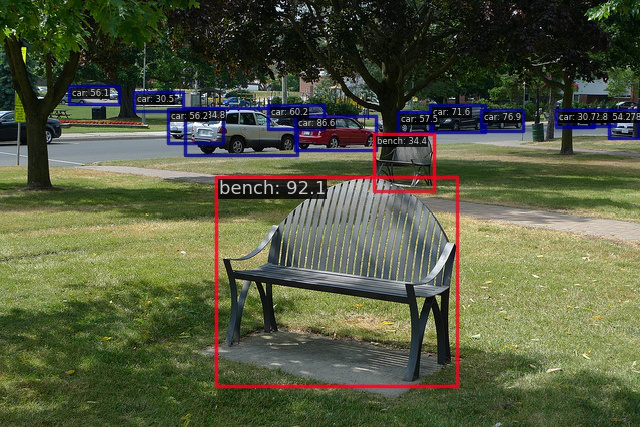

In [3]:
from PIL import Image

Image.open("./mmdetection/output/vis/demo.jpg")

In [4]:
# make sure coco-dataset annotation correction
TRAIN_DATA_DIR = "./dataset/Object_Detection/coco/train"
TRAIN_ANNOTATION_FILE_DIR = (
    "./dataset/Object_Detection/coco/train/train_annotations.json"
)
# OUTPUT_TFRECORD_TRAIN = "./dataset/Object_Detection/coco_tfrecords/train"

VALID_DATA_DIR = "./dataset/Object_Detection/coco/valid"
VALID_ANNOTATION_FILE_DIR = (
    "./dataset/Object_Detection/coco/valid/valid_annotations.json"
)

TEST_DATA_DIR = "./dataset/Object_Detection/coco/test"
TEST_ANNOTATION_FILE_DIR = "./dataset/Object_Detection/coco/test/test_annotations.json"

# Train Command

In [5]:

!python ./mmdetection/tools/train.py ./mmdetection/yolox_nano_8xb8-300e_coco_pod.py \
    --work-dir ./mmdetection/output/yolox_nano \
    ;

05/14 01:00:53 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 1556011767
    GCC: gcc (Ubuntu 12.3.0-9ubuntu2) 12.3.0
    PyTorch: 2.3.0
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.6 (Git Hash 86e6af5974177e513fd3fee58425e1063e7f1361)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=11 -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUS

05/14 01:00:53 - mmengine - INFO - Config:
auto_scale_lr = dict(base_batch_size=64, enable=False)
backend_args = None
base_lr = 8e-05
custom_hooks = [
    dict(num_last_epochs=15, priority=48, type='YOLOXModeSwitchHook'),
    dict(priority=48, type='SyncNormHook'),
    dict(
        ema_type='ExpMomentumEMA',
        momentum=0.0001,
        priority=49,
        type='EMAHook',
        update_buffers=True),
]
data_root = 'data/coco/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(
        interval=10, max_keep_ckpts=2, save_best='auto',
        type='CheckpointHook'),
    early_stopping=dict(
        min_delta=0.005,
        monitor='coco/bbox_mAP',
        patience=10,
        type='EarlyStoppingHook'),
    logger=dict(interval=5, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mm

05/14 01:00:54 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/14 01:00:54 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
(LOWEST      ) EarlyStoppingHook                  
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(48          ) YOLOXModeSwitchHook                
(NORMAL      ) IterTimerHook    

05/14 01:00:54 - mmengine - INFO - image shape: height=800, width=1333 in Mosaic.__init__
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


05/14 01:00:54 - mmengine - INFO - paramwise_options -- backbone.stem.conv.bn.weight:weight_decay=0.0
05/14 01:00:54 - mmengine - INFO - paramwise_options -- backbone.stem.conv.bn.bias:weight_decay=0.0
05/14 01:00:54 - mmengine - INFO - paramwise_options -- backbone.stage1.0.depthwise_conv.bn.weight:weight_decay=0.0
05/14 01:00:54 - mmengine - INFO - paramwise_options -- backbone.stage1.0.depthwise_conv.bn.bias:weight_decay=0.0
05/14 01:00:54 - mmengine - INFO - paramwise_options -- backbone.stage1.0.pointwise_conv.bn.weight:weight_decay=0.0
05/14 01:00:54 - mmengine - INFO - paramwise_options -- backbone.stage1.0.pointwise_conv.bn.bias:weight_decay=0.0
05/14 01:00:54 - mmengine - INFO - paramwise_options -- backbone.stage1.1.main_conv.bn.weight:weight_decay=0.0
05/14 01:00:54 - mmengine - INFO - paramwise_options -- backbone.stage1.1.main_conv.bn.bias:weight_decay=0.0
05/14 01:00:54 - mmengine - INFO - paramwise_options -- backbone.stage1.1.short_conv.bn.weight:weight_decay=0.0
05/14 

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Loads checkpoint by local backend from path: ./mmdetection/checkpoints/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


The model and loaded state dict do not match exactly

size mismatch for backbone.stem.conv.conv.weight: copying a param with shape torch.Size([24, 12, 3, 3]) from checkpoint, the shape in current model is torch.Size([16, 12, 3, 3]).
size mismatch for backbone.stem.conv.bn.weight: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([16]).
size mismatch for backbone.stem.conv.bn.bias: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([16]).
size mismatch for backbone.stem.conv.bn.running_mean: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([16]).
size mismatch for backbone.stem.conv.bn.running_var: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([16]).
size mismatch for backbone.stage1.1.main_conv.conv.weight: copying a param with shape torch.Size([24, 48, 1, 1]) from checkpoint, 

/home/ghost/anaconda3/envs/uts-dl-torch/lib/python3.11/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1712608959866/work/aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


05/14 01:01:36 - mmengine - INFO - Epoch(train)   [1][  5/133]  base_lr: 4.5226e-09 lr: 4.5226e-09  eta: 1 day, 12:24:39  time: 8.2156  data_time: 0.3014  loss: 103.5570  loss_cls: 2.9239  loss_bbox: 3.8367  loss_obj: 96.7963


05/14 01:02:12 - mmengine - INFO - Epoch(train)   [1][ 10/133]  base_lr: 1.8090e-08 lr: 1.8090e-08  eta: 1 day, 10:07:39  time: 7.7028  data_time: 0.1710  loss: 101.8977  loss_cls: 2.8895  loss_bbox: 3.8686  loss_obj: 95.1396


05/14 01:02:17 - mmengine - INFO - Epoch(train)   [1][ 15/133]  base_lr: 4.0703e-08 lr: 4.0703e-08  eta: 1 day, 0:13:55  time: 5.4710  data_time: 0.1209  loss: 78.7498  loss_cls: 2.8793  loss_bbox: 3.8961  loss_obj: 71.9744


05/14 01:02:22 - mmengine - INFO - Epoch(train)   [1][ 20/133]  base_lr: 7.2361e-08 lr: 7.2361e-08  eta: 19:10:30  time: 4.3307  data_time: 0.0924  loss: 65.4471  loss_cls: 2.8460  loss_bbox: 3.8990  loss_obj: 58.7020


05/14 01:02:25 - mmengine - INFO - Epoch(train)   [1][ 25/133]  base_lr: 1.1306e-07 lr: 1.1306e-07  eta: 15:59:52  time: 3.6142  data_time: 0.0755  loss: 56.3450  loss_cls: 2.8249  loss_bbox: 3.9142  loss_obj: 49.6060


05/14 01:02:29 - mmengine - INFO - Epoch(train)   [1][ 30/133]  base_lr: 1.6281e-07 lr: 1.6281e-07  eta: 13:49:27  time: 3.1241  data_time: 0.0643  loss: 50.6282  loss_cls: 2.8279  loss_bbox: 3.9233  loss_obj: 43.8771


05/14 01:02:37 - mmengine - INFO - Epoch(train)   [1][ 35/133]  base_lr: 2.2161e-07 lr: 2.2161e-07  eta: 12:51:31  time: 2.9068  data_time: 0.0563  loss: 49.5108  loss_cls: 2.8204  loss_bbox: 3.9187  loss_obj: 42.7717


05/14 01:02:45 - mmengine - INFO - Epoch(train)   [1][ 40/133]  base_lr: 2.8945e-07 lr: 2.8945e-07  eta: 12:09:44  time: 2.7503  data_time: 0.0505  loss: 47.7312  loss_cls: 2.8221  loss_bbox: 3.9155  loss_obj: 40.9936


05/14 01:02:48 - mmengine - INFO - Epoch(train)   [1][ 45/133]  base_lr: 3.6633e-07 lr: 3.6633e-07  eta: 11:08:37  time: 2.5207  data_time: 0.0458  loss: 44.9226  loss_cls: 2.8213  loss_bbox: 3.9194  loss_obj: 38.1819


05/14 01:02:52 - mmengine - INFO - Epoch(train)   [1][ 50/133]  base_lr: 4.5226e-07 lr: 4.5226e-07  eta: 10:21:07  time: 2.3424  data_time: 0.0421  loss: 42.5076  loss_cls: 2.8208  loss_bbox: 3.9250  loss_obj: 35.7619


05/14 01:02:56 - mmengine - INFO - Epoch(train)   [1][ 55/133]  base_lr: 5.4723e-07 lr: 5.4723e-07  eta: 9:41:08  time: 1.5900  data_time: 0.0128  loss: 34.2218  loss_cls: 2.8010  loss_bbox: 3.9392  loss_obj: 27.4817


05/14 01:02:59 - mmengine - INFO - Epoch(train)   [1][ 60/133]  base_lr: 6.5125e-07 lr: 6.5125e-07  eta: 9:09:34  time: 0.9481  data_time: 0.0096  loss: 26.3725  loss_cls: 2.7909  loss_bbox: 3.9439  loss_obj: 19.6377


05/14 01:03:02 - mmengine - INFO - Epoch(train)   [1][ 65/133]  base_lr: 7.6432e-07 lr: 7.6432e-07  eta: 8:36:32  time: 0.8934  data_time: 0.0084  loss: 24.7987  loss_cls: 2.7746  loss_bbox: 3.9506  loss_obj: 18.0735


05/14 01:03:05 - mmengine - INFO - Epoch(train)   [1][ 70/133]  base_lr: 8.8643e-07 lr: 8.8643e-07  eta: 8:10:12  time: 0.8591  data_time: 0.0087  loss: 23.8623  loss_cls: 2.7770  loss_bbox: 3.9610  loss_obj: 17.1243


05/14 01:03:10 - mmengine - INFO - Epoch(train)   [1][ 75/133]  base_lr: 1.0176e-06 lr: 1.0176e-06  eta: 7:55:56  time: 0.8894  data_time: 0.0087  loss: 24.6090  loss_cls: 2.7832  loss_bbox: 3.9579  loss_obj: 17.8680


05/14 01:03:17 - mmengine - INFO - Epoch(train)   [1][ 80/133]  base_lr: 1.1578e-06 lr: 1.1578e-06  eta: 7:48:27  time: 0.9575  data_time: 0.0087  loss: 25.1207  loss_cls: 2.7791  loss_bbox: 3.9584  loss_obj: 18.3832


05/14 01:03:21 - mmengine - INFO - Epoch(train)   [1][ 85/133]  base_lr: 1.3070e-06 lr: 1.3070e-06  eta: 7:34:03  time: 0.8827  data_time: 0.0089  loss: 22.5712  loss_cls: 2.7788  loss_bbox: 3.9709  loss_obj: 15.8215


05/14 01:03:25 - mmengine - INFO - Epoch(train)   [1][ 90/133]  base_lr: 1.4653e-06 lr: 1.4653e-06  eta: 7:19:28  time: 0.7905  data_time: 0.0088  loss: 21.0023  loss_cls: 2.7750  loss_bbox: 3.9758  loss_obj: 14.2515


05/14 01:03:28 - mmengine - INFO - Epoch(train)   [1][ 95/133]  base_lr: 1.6327e-06 lr: 1.6327e-06  eta: 7:06:26  time: 0.7956  data_time: 0.0088  loss: 21.0419  loss_cls: 2.7761  loss_bbox: 3.9791  loss_obj: 14.2867


05/14 01:03:32 - mmengine - INFO - Epoch(train)   [1][100/133]  base_lr: 1.8090e-06 lr: 1.8090e-06  eta: 6:55:18  time: 0.7999  data_time: 0.0086  loss: 21.4545  loss_cls: 2.7741  loss_bbox: 3.9761  loss_obj: 14.7042


05/14 01:03:35 - mmengine - INFO - Epoch(train)   [1][105/133]  base_lr: 1.9945e-06 lr: 1.9945e-06  eta: 6:42:26  time: 0.7867  data_time: 0.0086  loss: 21.0509  loss_cls: 2.7802  loss_bbox: 3.9781  loss_obj: 14.2927


05/14 01:03:38 - mmengine - INFO - Epoch(train)   [1][110/133]  base_lr: 2.1889e-06 lr: 2.1889e-06  eta: 6:30:22  time: 0.7624  data_time: 0.0084  loss: 20.5943  loss_cls: 2.7802  loss_bbox: 3.9837  loss_obj: 13.8304


05/14 01:03:45 - mmengine - INFO - Epoch(train)   [1][115/133]  base_lr: 2.3924e-06 lr: 2.3924e-06  eta: 6:29:27  time: 0.8572  data_time: 0.0082  loss: 22.0795  loss_cls: 2.7878  loss_bbox: 3.9770  loss_obj: 15.3146


05/14 01:03:52 - mmengine - INFO - Epoch(train)   [1][120/133]  base_lr: 2.6050e-06 lr: 2.6050e-06  eta: 6:28:59  time: 0.9450  data_time: 0.0080  loss: 23.4120  loss_cls: 2.7911  loss_bbox: 3.9681  loss_obj: 16.6527


05/14 01:03:59 - mmengine - INFO - Epoch(train)   [1][125/133]  base_lr: 2.8266e-06 lr: 2.8266e-06  eta: 6:29:34  time: 0.9937  data_time: 0.0079  loss: 24.0566  loss_cls: 2.7944  loss_bbox: 3.9648  loss_obj: 17.2975


05/14 01:04:06 - mmengine - INFO - Epoch(train)   [1][130/133]  base_lr: 3.0573e-06 lr: 3.0573e-06  eta: 6:27:45  time: 0.9892  data_time: 0.0079  loss: 24.5391  loss_cls: 2.8027  loss_bbox: 3.9566  loss_obj: 17.7798


05/14 01:04:08 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:04:13 - mmengine - INFO - Epoch(train)   [2][  5/133]  base_lr: 3.4451e-06 lr: 3.4451e-06  eta: 6:18:50  time: 1.0034  data_time: 0.0265  loss: 25.4567  loss_cls: 2.8104  loss_bbox: 3.9483  loss_obj: 18.6980


05/14 01:04:18 - mmengine - INFO - Epoch(train)   [2][ 10/133]  base_lr: 3.6993e-06 lr: 3.6993e-06  eta: 6:14:15  time: 1.0248  data_time: 0.0264  loss: 25.9347  loss_cls: 2.8098  loss_bbox: 3.9443  loss_obj: 19.1806


05/14 01:04:23 - mmengine - INFO - Epoch(train)   [2][ 15/133]  base_lr: 3.9625e-06 lr: 3.9625e-06  eta: 6:10:48  time: 1.0575  data_time: 0.0265  loss: 26.2533  loss_cls: 2.8107  loss_bbox: 3.9406  loss_obj: 19.5021


05/14 01:04:27 - mmengine - INFO - Epoch(train)   [2][ 20/133]  base_lr: 4.2348e-06 lr: 4.2348e-06  eta: 6:04:19  time: 1.0549  data_time: 0.0266  loss: 26.5048  loss_cls: 2.8053  loss_bbox: 3.9445  loss_obj: 19.7550


05/14 01:04:29 - mmengine - INFO - Epoch(train)   [2][ 25/133]  base_lr: 4.5161e-06 lr: 4.5161e-06  eta: 5:56:34  time: 1.0484  data_time: 0.0268  loss: 26.5610  loss_cls: 2.8009  loss_bbox: 3.9501  loss_obj: 19.8100


05/14 01:04:31 - mmengine - INFO - Epoch(train)   [2][ 30/133]  base_lr: 4.8064e-06 lr: 4.8064e-06  eta: 5:49:38  time: 0.9885  data_time: 0.0269  loss: 25.9050  loss_cls: 2.7994  loss_bbox: 3.9552  loss_obj: 19.1504


05/14 01:04:34 - mmengine - INFO - Epoch(train)   [2][ 35/133]  base_lr: 5.1058e-06 lr: 5.1058e-06  eta: 5:43:10  time: 0.9002  data_time: 0.0270  loss: 24.6610  loss_cls: 2.7980  loss_bbox: 3.9654  loss_obj: 17.8977


05/14 01:04:38 - mmengine - INFO - Epoch(train)   [2][ 40/133]  base_lr: 5.4143e-06 lr: 5.4143e-06  eta: 5:39:02  time: 0.8335  data_time: 0.0271  loss: 23.5639  loss_cls: 2.7885  loss_bbox: 3.9737  loss_obj: 16.8017


05/14 01:04:43 - mmengine - INFO - Epoch(train)   [2][ 45/133]  base_lr: 5.7317e-06 lr: 5.7317e-06  eta: 5:36:13  time: 0.7827  data_time: 0.0271  loss: 22.9914  loss_cls: 2.7824  loss_bbox: 3.9742  loss_obj: 16.2347


05/14 01:04:47 - mmengine - INFO - Epoch(train)   [2][ 50/133]  base_lr: 6.0583e-06 lr: 6.0583e-06  eta: 5:34:03  time: 0.7976  data_time: 0.0272  loss: 23.1015  loss_cls: 2.7798  loss_bbox: 3.9718  loss_obj: 16.3499


05/14 01:04:53 - mmengine - INFO - Epoch(train)   [2][ 55/133]  base_lr: 6.3938e-06 lr: 6.3938e-06  eta: 5:32:11  time: 0.7866  data_time: 0.0082  loss: 23.2341  loss_cls: 2.7850  loss_bbox: 3.9722  loss_obj: 16.4769


05/14 01:04:57 - mmengine - INFO - Epoch(train)   [2][ 60/133]  base_lr: 6.7385e-06 lr: 6.7385e-06  eta: 5:29:59  time: 0.7870  data_time: 0.0082  loss: 23.3045  loss_cls: 2.7797  loss_bbox: 3.9716  loss_obj: 16.5532


05/14 01:05:02 - mmengine - INFO - Epoch(train)   [2][ 65/133]  base_lr: 7.0921e-06 lr: 7.0921e-06  eta: 5:27:35  time: 0.7732  data_time: 0.0081  loss: 23.2361  loss_cls: 2.7759  loss_bbox: 3.9708  loss_obj: 16.4895


05/14 01:05:08 - mmengine - INFO - Epoch(train)   [2][ 70/133]  base_lr: 7.4548e-06 lr: 7.4548e-06  eta: 5:27:30  time: 0.8315  data_time: 0.0081  loss: 24.5785  loss_cls: 2.7797  loss_bbox: 3.9634  loss_obj: 17.8354


05/14 01:05:16 - mmengine - INFO - Epoch(train)   [2][ 75/133]  base_lr: 7.8266e-06 lr: 7.8266e-06  eta: 5:29:16  time: 0.9391  data_time: 0.0079  loss: 25.7488  loss_cls: 2.7891  loss_bbox: 3.9440  loss_obj: 19.0157


05/14 01:05:20 - mmengine - INFO - Epoch(train)   [2][ 80/133]  base_lr: 8.2074e-06 lr: 8.2074e-06  eta: 5:27:06  time: 0.9802  data_time: 0.0078  loss: 26.4717  loss_cls: 2.7955  loss_bbox: 3.9329  loss_obj: 19.7433


05/14 01:05:23 - mmengine - INFO - Epoch(train)   [2][ 85/133]  base_lr: 8.5973e-06 lr: 8.5973e-06  eta: 5:22:18  time: 0.9752  data_time: 0.0079  loss: 26.2298  loss_cls: 2.7952  loss_bbox: 3.9262  loss_obj: 19.5084


05/14 01:05:26 - mmengine - INFO - Epoch(train)   [2][ 90/133]  base_lr: 8.9961e-06 lr: 8.9961e-06  eta: 5:19:13  time: 0.9697  data_time: 0.0081  loss: 25.8244  loss_cls: 2.7926  loss_bbox: 3.9209  loss_obj: 19.1109


05/14 01:05:30 - mmengine - INFO - Epoch(train)   [2][ 95/133]  base_lr: 9.4041e-06 lr: 9.4041e-06  eta: 5:16:43  time: 0.9576  data_time: 0.0082  loss: 25.5176  loss_cls: 2.7923  loss_bbox: 3.9232  loss_obj: 18.8021


05/14 01:05:35 - mmengine - INFO - Epoch(train)   [2][100/133]  base_lr: 9.8211e-06 lr: 9.8211e-06  eta: 5:15:19  time: 0.9562  data_time: 0.0081  loss: 25.4626  loss_cls: 2.7855  loss_bbox: 3.9247  loss_obj: 18.7524


05/14 01:05:41 - mmengine - INFO - Epoch(train)   [2][105/133]  base_lr: 1.0247e-05 lr: 1.0247e-05  eta: 5:14:29  time: 0.9613  data_time: 0.0081  loss: 25.4639  loss_cls: 2.7755  loss_bbox: 3.9192  loss_obj: 18.7692


05/14 01:05:45 - mmengine - INFO - Epoch(train)   [2][110/133]  base_lr: 1.0682e-05 lr: 1.0682e-05  eta: 5:12:19  time: 0.9473  data_time: 0.0083  loss: 24.8149  loss_cls: 2.7836  loss_bbox: 3.9221  loss_obj: 18.1093


05/14 01:05:47 - mmengine - INFO - Epoch(train)   [2][115/133]  base_lr: 1.1126e-05 lr: 1.1126e-05  eta: 5:08:41  time: 0.9089  data_time: 0.0084  loss: 23.7659  loss_cls: 2.7732  loss_bbox: 3.9260  loss_obj: 17.0667


05/14 01:05:52 - mmengine - INFO - Epoch(train)   [2][120/133]  base_lr: 1.1579e-05 lr: 1.1579e-05  eta: 5:07:13  time: 0.8754  data_time: 0.0086  loss: 22.4324  loss_cls: 2.7746  loss_bbox: 3.9261  loss_obj: 15.7318


05/14 01:05:57 - mmengine - INFO - Epoch(train)   [2][125/133]  base_lr: 1.2042e-05 lr: 1.2042e-05  eta: 5:06:37  time: 0.8284  data_time: 0.0086  loss: 21.9970  loss_cls: 2.7773  loss_bbox: 3.9286  loss_obj: 15.2911


05/14 01:06:02 - mmengine - INFO - Epoch(train)   [2][130/133]  base_lr: 1.2513e-05 lr: 1.2513e-05  eta: 5:05:07  time: 0.8252  data_time: 0.0085  loss: 22.3491  loss_cls: 2.7786  loss_bbox: 3.9310  loss_obj: 15.6394


05/14 01:06:03 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:06:10 - mmengine - INFO - Epoch(train)   [3][  5/133]  base_lr: 1.3286e-05 lr: 1.3286e-05  eta: 5:03:51  time: 0.9030  data_time: 0.0283  loss: 23.2664  loss_cls: 2.7896  loss_bbox: 3.9251  loss_obj: 16.5516


05/14 01:06:13 - mmengine - INFO - Epoch(train)   [3][ 10/133]  base_lr: 1.3780e-05 lr: 1.3780e-05  eta: 5:00:57  time: 0.8772  data_time: 0.0282  loss: 23.1513  loss_cls: 2.7888  loss_bbox: 3.9302  loss_obj: 16.4323


05/14 01:06:17 - mmengine - INFO - Epoch(train)   [3][ 15/133]  base_lr: 1.4284e-05 lr: 1.4284e-05  eta: 4:59:21  time: 0.8795  data_time: 0.0284  loss: 23.1239  loss_cls: 2.7822  loss_bbox: 3.9295  loss_obj: 16.4122


05/14 01:06:24 - mmengine - INFO - Epoch(train)   [3][ 20/133]  base_lr: 1.4797e-05 lr: 1.4797e-05  eta: 5:00:50  time: 0.9157  data_time: 0.0283  loss: 23.4805  loss_cls: 2.7835  loss_bbox: 3.9284  loss_obj: 16.7687


05/14 01:06:31 - mmengine - INFO - Epoch(train)   [3][ 25/133]  base_lr: 1.5319e-05 lr: 1.5319e-05  eta: 5:01:31  time: 0.9505  data_time: 0.0282  loss: 24.1059  loss_cls: 2.7842  loss_bbox: 3.9284  loss_obj: 17.3933


05/14 01:06:35 - mmengine - INFO - Epoch(train)   [3][ 30/133]  base_lr: 1.5850e-05 lr: 1.5850e-05  eta: 4:59:57  time: 0.9757  data_time: 0.0281  loss: 24.7054  loss_cls: 2.7889  loss_bbox: 3.9227  loss_obj: 17.9938


05/14 01:06:39 - mmengine - INFO - Epoch(train)   [3][ 35/133]  base_lr: 1.6390e-05 lr: 1.6390e-05  eta: 4:58:34  time: 0.9963  data_time: 0.0281  loss: 25.1503  loss_cls: 2.7761  loss_bbox: 3.9190  loss_obj: 18.4551


05/14 01:06:44 - mmengine - INFO - Epoch(train)   [3][ 40/133]  base_lr: 1.6939e-05 lr: 1.6939e-05  eta: 4:57:32  time: 0.9746  data_time: 0.0281  loss: 25.3167  loss_cls: 2.7693  loss_bbox: 3.9191  loss_obj: 18.6283


05/14 01:06:48 - mmengine - INFO - Epoch(train)   [3][ 45/133]  base_lr: 1.7497e-05 lr: 1.7497e-05  eta: 4:56:11  time: 0.9628  data_time: 0.0281  loss: 25.2566  loss_cls: 2.7624  loss_bbox: 3.9212  loss_obj: 18.5731


05/14 01:06:51 - mmengine - INFO - Epoch(train)   [3][ 50/133]  base_lr: 1.8064e-05 lr: 1.8064e-05  eta: 4:53:45  time: 0.9513  data_time: 0.0283  loss: 24.6181  loss_cls: 2.7491  loss_bbox: 3.9324  loss_obj: 17.9365


05/14 01:06:54 - mmengine - INFO - Epoch(train)   [3][ 55/133]  base_lr: 1.8640e-05 lr: 1.8640e-05  eta: 4:51:41  time: 0.8864  data_time: 0.0082  loss: 24.5196  loss_cls: 2.7397  loss_bbox: 3.9316  loss_obj: 17.8483


05/14 01:06:58 - mmengine - INFO - Epoch(train)   [3][ 60/133]  base_lr: 1.9226e-05 lr: 1.9226e-05  eta: 4:50:25  time: 0.9119  data_time: 0.0083  loss: 24.9356  loss_cls: 2.7407  loss_bbox: 3.9242  loss_obj: 18.2707


05/14 01:07:03 - mmengine - INFO - Epoch(train)   [3][ 65/133]  base_lr: 1.9820e-05 lr: 1.9820e-05  eta: 4:49:18  time: 0.9143  data_time: 0.0082  loss: 24.4537  loss_cls: 2.7492  loss_bbox: 3.9183  loss_obj: 17.7862


05/14 01:07:07 - mmengine - INFO - Epoch(train)   [3][ 70/133]  base_lr: 2.0423e-05 lr: 2.0423e-05  eta: 4:48:30  time: 0.8577  data_time: 0.0082  loss: 23.7366  loss_cls: 2.7495  loss_bbox: 3.9226  loss_obj: 17.0645


05/14 01:07:12 - mmengine - INFO - Epoch(train)   [3][ 75/133]  base_lr: 2.1036e-05 lr: 2.1036e-05  eta: 4:47:41  time: 0.8174  data_time: 0.0082  loss: 23.3569  loss_cls: 2.7415  loss_bbox: 3.9199  loss_obj: 16.6955


05/14 01:07:16 - mmengine - INFO - Epoch(train)   [3][ 80/133]  base_lr: 2.1657e-05 lr: 2.1657e-05  eta: 4:46:55  time: 0.8276  data_time: 0.0082  loss: 23.4664  loss_cls: 2.7412  loss_bbox: 3.9150  loss_obj: 16.8103


05/14 01:07:21 - mmengine - INFO - Epoch(train)   [3][ 85/133]  base_lr: 2.2287e-05 lr: 2.2287e-05  eta: 4:45:52  time: 0.8270  data_time: 0.0080  loss: 23.2922  loss_cls: 2.7463  loss_bbox: 3.9146  loss_obj: 16.6313


05/14 01:07:23 - mmengine - INFO - Epoch(train)   [3][ 90/133]  base_lr: 2.2927e-05 lr: 2.2927e-05  eta: 4:43:39  time: 0.7864  data_time: 0.0080  loss: 22.4774  loss_cls: 2.7370  loss_bbox: 3.9171  loss_obj: 15.8233


05/14 01:07:26 - mmengine - INFO - Epoch(train)   [3][ 95/133]  base_lr: 2.3576e-05 lr: 2.3576e-05  eta: 4:41:39  time: 0.7584  data_time: 0.0080  loss: 21.7343  loss_cls: 2.7362  loss_bbox: 3.9159  loss_obj: 15.0822


05/14 01:07:29 - mmengine - INFO - Epoch(train)   [3][100/133]  base_lr: 2.4233e-05 lr: 2.4233e-05  eta: 4:40:03  time: 0.7672  data_time: 0.0080  loss: 21.6912  loss_cls: 2.7292  loss_bbox: 3.9040  loss_obj: 15.0579


05/14 01:07:33 - mmengine - INFO - Epoch(train)   [3][105/133]  base_lr: 2.4900e-05 lr: 2.4900e-05  eta: 4:38:41  time: 0.7744  data_time: 0.0080  loss: 21.4783  loss_cls: 2.7280  loss_bbox: 3.9058  loss_obj: 14.8444


05/14 01:07:38 - mmengine - INFO - Epoch(train)   [3][110/133]  base_lr: 2.5575e-05 lr: 2.5575e-05  eta: 4:38:07  time: 0.7855  data_time: 0.0080  loss: 21.5300  loss_cls: 2.7211  loss_bbox: 3.9016  loss_obj: 14.9073


05/14 01:07:42 - mmengine - INFO - Epoch(train)   [3][115/133]  base_lr: 2.6260e-05 lr: 2.6260e-05  eta: 4:37:16  time: 0.7851  data_time: 0.0080  loss: 21.8548  loss_cls: 2.7171  loss_bbox: 3.8999  loss_obj: 15.2378


05/14 01:07:44 - mmengine - INFO - Epoch(train)   [3][120/133]  base_lr: 2.6954e-05 lr: 2.6954e-05  eta: 4:35:20  time: 0.7440  data_time: 0.0082  loss: 21.2061  loss_cls: 2.7118  loss_bbox: 3.9053  loss_obj: 14.5890


05/14 01:07:47 - mmengine - INFO - Epoch(train)   [3][125/133]  base_lr: 2.7657e-05 lr: 2.7657e-05  eta: 4:33:28  time: 0.7048  data_time: 0.0084  loss: 20.2188  loss_cls: 2.7137  loss_bbox: 3.9035  loss_obj: 13.6016


05/14 01:07:49 - mmengine - INFO - Epoch(train)   [3][130/133]  base_lr: 2.8369e-05 lr: 2.8369e-05  eta: 4:31:16  time: 0.6527  data_time: 0.0084  loss: 19.4761  loss_cls: 2.7076  loss_bbox: 3.9089  loss_obj: 12.8596


05/14 01:07:50 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:07:56 - mmengine - INFO - Epoch(train)   [4][  5/133]  base_lr: 2.9526e-05 lr: 2.9526e-05  eta: 4:30:26  time: 0.6839  data_time: 0.0285  loss: 19.6605  loss_cls: 2.6891  loss_bbox: 3.9094  loss_obj: 13.0620


05/14 01:08:02 - mmengine - INFO - Epoch(train)   [4][ 10/133]  base_lr: 3.0262e-05 lr: 3.0262e-05  eta: 4:30:20  time: 0.7348  data_time: 0.0283  loss: 20.9043  loss_cls: 2.6851  loss_bbox: 3.9023  loss_obj: 14.3170


05/14 01:08:06 - mmengine - INFO - Epoch(train)   [4][ 15/133]  base_lr: 3.1006e-05 lr: 3.1006e-05  eta: 4:29:56  time: 0.7650  data_time: 0.0283  loss: 21.3651  loss_cls: 2.6858  loss_bbox: 3.8989  loss_obj: 14.7804


05/14 01:08:11 - mmengine - INFO - Epoch(train)   [4][ 20/133]  base_lr: 3.1760e-05 lr: 3.1760e-05  eta: 4:29:30  time: 0.7925  data_time: 0.0281  loss: 21.9079  loss_cls: 2.6809  loss_bbox: 3.8912  loss_obj: 15.3359


05/14 01:08:15 - mmengine - INFO - Epoch(train)   [4][ 25/133]  base_lr: 3.2522e-05 lr: 3.2522e-05  eta: 4:28:49  time: 0.7883  data_time: 0.0281  loss: 22.0594  loss_cls: 2.6845  loss_bbox: 3.8857  loss_obj: 15.4893


05/14 01:08:19 - mmengine - INFO - Epoch(train)   [4][ 30/133]  base_lr: 3.3294e-05 lr: 3.3294e-05  eta: 4:28:07  time: 0.7789  data_time: 0.0281  loss: 21.3603  loss_cls: 2.6785  loss_bbox: 3.8856  loss_obj: 14.7962


05/14 01:08:23 - mmengine - INFO - Epoch(train)   [4][ 35/133]  base_lr: 3.4074e-05 lr: 3.4074e-05  eta: 4:26:59  time: 0.7886  data_time: 0.0280  loss: 21.5276  loss_cls: 2.6704  loss_bbox: 3.8809  loss_obj: 14.9764


05/14 01:08:26 - mmengine - INFO - Epoch(train)   [4][ 40/133]  base_lr: 3.4864e-05 lr: 3.4864e-05  eta: 4:25:48  time: 0.8008  data_time: 0.0280  loss: 21.7683  loss_cls: 2.6634  loss_bbox: 3.8753  loss_obj: 15.2295


05/14 01:08:29 - mmengine - INFO - Epoch(train)   [4][ 45/133]  base_lr: 3.5663e-05 lr: 3.5663e-05  eta: 4:24:36  time: 0.8199  data_time: 0.0280  loss: 22.0692  loss_cls: 2.6543  loss_bbox: 3.8703  loss_obj: 15.5446


05/14 01:08:33 - mmengine - INFO - Epoch(train)   [4][ 50/133]  base_lr: 3.6470e-05 lr: 3.6470e-05  eta: 4:23:33  time: 0.8544  data_time: 0.0283  loss: 22.5909  loss_cls: 2.6641  loss_bbox: 3.8618  loss_obj: 16.0650


05/14 01:08:36 - mmengine - INFO - Epoch(train)   [4][ 55/133]  base_lr: 3.7287e-05 lr: 3.7287e-05  eta: 4:22:17  time: 0.7874  data_time: 0.0083  loss: 21.6617  loss_cls: 2.6608  loss_bbox: 3.8648  loss_obj: 15.1361


05/14 01:08:38 - mmengine - INFO - Epoch(train)   [4][ 60/133]  base_lr: 3.8113e-05 lr: 3.8113e-05  eta: 4:20:51  time: 0.7374  data_time: 0.0085  loss: 20.5129  loss_cls: 2.6471  loss_bbox: 3.8687  loss_obj: 13.9971


05/14 01:08:43 - mmengine - INFO - Epoch(train)   [4][ 65/133]  base_lr: 3.8948e-05 lr: 3.8948e-05  eta: 4:20:25  time: 0.7312  data_time: 0.0086  loss: 20.2560  loss_cls: 2.6377  loss_bbox: 3.8658  loss_obj: 13.7526


05/14 01:08:47 - mmengine - INFO - Epoch(train)   [4][ 70/133]  base_lr: 3.9792e-05 lr: 3.9792e-05  eta: 4:19:50  time: 0.7213  data_time: 0.0087  loss: 19.9557  loss_cls: 2.6397  loss_bbox: 3.8618  loss_obj: 13.4543


05/14 01:08:51 - mmengine - INFO - Epoch(train)   [4][ 75/133]  base_lr: 4.0645e-05 lr: 4.0645e-05  eta: 4:19:01  time: 0.7096  data_time: 0.0089  loss: 19.7353  loss_cls: 2.6224  loss_bbox: 3.8651  loss_obj: 13.2477


05/14 01:08:54 - mmengine - INFO - Epoch(train)   [4][ 80/133]  base_lr: 4.1507e-05 lr: 4.1507e-05  eta: 4:17:51  time: 0.6867  data_time: 0.0091  loss: 19.5481  loss_cls: 2.6128  loss_bbox: 3.8693  loss_obj: 13.0660


05/14 01:08:56 - mmengine - INFO - Epoch(train)   [4][ 85/133]  base_lr: 4.2378e-05 lr: 4.2378e-05  eta: 4:16:26  time: 0.6683  data_time: 0.0092  loss: 19.3885  loss_cls: 2.6023  loss_bbox: 3.8745  loss_obj: 12.9116


05/14 01:08:59 - mmengine - INFO - Epoch(train)   [4][ 90/133]  base_lr: 4.3258e-05 lr: 4.3258e-05  eta: 4:15:16  time: 0.6608  data_time: 0.0093  loss: 19.1789  loss_cls: 2.5825  loss_bbox: 3.8835  loss_obj: 12.7128


05/14 01:09:01 - mmengine - INFO - Epoch(train)   [4][ 95/133]  base_lr: 4.4147e-05 lr: 4.4147e-05  eta: 4:13:49  time: 0.6429  data_time: 0.0093  loss: 18.9848  loss_cls: 2.5774  loss_bbox: 3.8867  loss_obj: 12.5207


05/14 01:09:04 - mmengine - INFO - Epoch(train)   [4][100/133]  base_lr: 4.5045e-05 lr: 4.5045e-05  eta: 4:12:25  time: 0.6214  data_time: 0.0094  loss: 18.4035  loss_cls: 2.5622  loss_bbox: 3.9019  loss_obj: 11.9395


05/14 01:09:07 - mmengine - INFO - Epoch(train)   [4][105/133]  base_lr: 4.5952e-05 lr: 4.5952e-05  eta: 4:11:35  time: 0.6291  data_time: 0.0096  loss: 18.5563  loss_cls: 2.5459  loss_bbox: 3.9000  loss_obj: 12.1104


05/14 01:09:10 - mmengine - INFO - Epoch(train)   [4][110/133]  base_lr: 4.6869e-05 lr: 4.6869e-05  eta: 4:10:30  time: 0.6338  data_time: 0.0096  loss: 18.5734  loss_cls: 2.5490  loss_bbox: 3.8957  loss_obj: 12.1286


05/14 01:09:13 - mmengine - INFO - Epoch(train)   [4][115/133]  base_lr: 4.7794e-05 lr: 4.7794e-05  eta: 4:09:26  time: 0.6033  data_time: 0.0095  loss: 18.0986  loss_cls: 2.5336  loss_bbox: 3.9003  loss_obj: 11.6647


05/14 01:09:16 - mmengine - INFO - Epoch(train)   [4][120/133]  base_lr: 4.8728e-05 lr: 4.8728e-05  eta: 4:08:26  time: 0.5804  data_time: 0.0097  loss: 17.6950  loss_cls: 2.5191  loss_bbox: 3.9065  loss_obj: 11.2694


05/14 01:09:19 - mmengine - INFO - Epoch(train)   [4][125/133]  base_lr: 4.9672e-05 lr: 4.9672e-05  eta: 4:07:17  time: 0.5598  data_time: 0.0096  loss: 17.2683  loss_cls: 2.5080  loss_bbox: 3.9102  loss_obj: 10.8500


05/14 01:09:21 - mmengine - INFO - Epoch(train)   [4][130/133]  base_lr: 5.0624e-05 lr: 5.0624e-05  eta: 4:05:57  time: 0.5442  data_time: 0.0093  loss: 16.8677  loss_cls: 2.4923  loss_bbox: 3.9194  loss_obj: 10.4561


05/14 01:09:22 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:09:28 - mmengine - INFO - Epoch(train)   [5][  5/133]  base_lr: 5.2167e-05 lr: 5.2167e-05  eta: 4:05:44  time: 0.6074  data_time: 0.0289  loss: 17.4138  loss_cls: 2.4868  loss_bbox: 3.9017  loss_obj: 11.0254


05/14 01:09:34 - mmengine - INFO - Epoch(train)   [5][ 10/133]  base_lr: 5.3143e-05 lr: 5.3143e-05  eta: 4:05:49  time: 0.6599  data_time: 0.0288  loss: 17.8845  loss_cls: 2.4836  loss_bbox: 3.8848  loss_obj: 11.5161


05/14 01:09:39 - mmengine - INFO - Epoch(train)   [5][ 15/133]  base_lr: 5.4128e-05 lr: 5.4128e-05  eta: 4:05:52  time: 0.7133  data_time: 0.0286  loss: 18.1209  loss_cls: 2.4928  loss_bbox: 3.8636  loss_obj: 11.7644


05/14 01:09:42 - mmengine - INFO - Epoch(train)   [5][ 20/133]  base_lr: 5.5122e-05 lr: 5.5122e-05  eta: 4:05:20  time: 0.7299  data_time: 0.0283  loss: 18.5092  loss_cls: 2.4785  loss_bbox: 3.8566  loss_obj: 12.1741


05/14 01:09:45 - mmengine - INFO - Epoch(train)   [5][ 25/133]  base_lr: 5.6125e-05 lr: 5.6125e-05  eta: 4:04:10  time: 0.7161  data_time: 0.0281  loss: 18.3365  loss_cls: 2.4651  loss_bbox: 3.8602  loss_obj: 12.0113


05/14 01:09:49 - mmengine - INFO - Epoch(train)   [5][ 30/133]  base_lr: 5.7137e-05 lr: 5.7137e-05  eta: 4:04:03  time: 0.7529  data_time: 0.0283  loss: 18.7130  loss_cls: 2.4558  loss_bbox: 3.8584  loss_obj: 12.3988


05/14 01:09:57 - mmengine - INFO - Epoch(train)   [5][ 35/133]  base_lr: 5.8158e-05 lr: 5.8158e-05  eta: 4:05:02  time: 0.8312  data_time: 0.0281  loss: 19.3501  loss_cls: 2.4521  loss_bbox: 3.8400  loss_obj: 13.0581


05/14 01:10:02 - mmengine - INFO - Epoch(train)   [5][ 40/133]  base_lr: 5.9189e-05 lr: 5.9189e-05  eta: 4:05:13  time: 0.8856  data_time: 0.0280  loss: 20.5092  loss_cls: 2.4508  loss_bbox: 3.8308  loss_obj: 14.2276


05/14 01:10:06 - mmengine - INFO - Epoch(train)   [5][ 45/133]  base_lr: 6.0228e-05 lr: 6.0228e-05  eta: 4:04:39  time: 0.9130  data_time: 0.0281  loss: 20.6337  loss_cls: 2.4527  loss_bbox: 3.8056  loss_obj: 14.3754


05/14 01:10:11 - mmengine - INFO - Epoch(train)   [5][ 50/133]  base_lr: 6.1276e-05 lr: 6.1276e-05  eta: 4:04:42  time: 0.9661  data_time: 0.0282  loss: 21.5037  loss_cls: 2.4498  loss_bbox: 3.7965  loss_obj: 15.2574


05/14 01:10:18 - mmengine - INFO - Epoch(train)   [5][ 55/133]  base_lr: 6.2334e-05 lr: 6.2334e-05  eta: 4:05:51  time: 0.9981  data_time: 0.0083  loss: 22.0769  loss_cls: 2.4484  loss_bbox: 3.7845  loss_obj: 15.8440


05/14 01:10:26 - mmengine - INFO - Epoch(train)   [5][ 60/133]  base_lr: 6.3400e-05 lr: 6.3400e-05  eta: 4:06:57  time: 1.0460  data_time: 0.0083  loss: 22.2616  loss_cls: 2.4392  loss_bbox: 3.7740  loss_obj: 16.0484


05/14 01:10:33 - mmengine - INFO - Epoch(train)   [5][ 65/133]  base_lr: 6.4476e-05 lr: 6.4476e-05  eta: 4:07:48  time: 1.0846  data_time: 0.0083  loss: 23.1073  loss_cls: 2.4276  loss_bbox: 3.7653  loss_obj: 16.9144


05/14 01:10:39 - mmengine - INFO - Epoch(train)   [5][ 70/133]  base_lr: 6.5560e-05 lr: 6.5560e-05  eta: 4:08:08  time: 1.1243  data_time: 0.0083  loss: 23.6984  loss_cls: 2.4304  loss_bbox: 3.7479  loss_obj: 17.5201


05/14 01:10:43 - mmengine - INFO - Epoch(train)   [5][ 75/133]  base_lr: 6.6654e-05 lr: 6.6654e-05  eta: 4:07:49  time: 1.1615  data_time: 0.0083  loss: 24.4687  loss_cls: 2.4218  loss_bbox: 3.7301  loss_obj: 18.3168


05/14 01:10:49 - mmengine - INFO - Epoch(train)   [5][ 80/133]  base_lr: 6.7756e-05 lr: 6.7756e-05  eta: 4:08:04  time: 1.1815  data_time: 0.0082  loss: 24.4566  loss_cls: 2.4234  loss_bbox: 3.7112  loss_obj: 18.3220


05/14 01:10:55 - mmengine - INFO - Epoch(train)   [5][ 85/133]  base_lr: 6.8868e-05 lr: 6.8868e-05  eta: 4:08:47  time: 1.1748  data_time: 0.0081  loss: 24.5391  loss_cls: 2.4096  loss_bbox: 3.7068  loss_obj: 18.4226


05/14 01:11:00 - mmengine - INFO - Epoch(train)   [5][ 90/133]  base_lr: 6.9989e-05 lr: 6.9989e-05  eta: 4:08:50  time: 1.1711  data_time: 0.0082  loss: 23.9909  loss_cls: 2.3873  loss_bbox: 3.7042  loss_obj: 17.8994


05/14 01:11:03 - mmengine - INFO - Epoch(train)   [5][ 95/133]  base_lr: 7.1118e-05 lr: 7.1118e-05  eta: 4:07:55  time: 1.1542  data_time: 0.0081  loss: 23.8093  loss_cls: 2.3631  loss_bbox: 3.7147  loss_obj: 17.7316


05/14 01:11:07 - mmengine - INFO - Epoch(train)   [5][100/133]  base_lr: 7.2257e-05 lr: 7.2257e-05  eta: 4:07:18  time: 1.1228  data_time: 0.0083  loss: 22.6834  loss_cls: 2.3498  loss_bbox: 3.7128  loss_obj: 16.6208


05/14 01:11:11 - mmengine - INFO - Epoch(train)   [5][105/133]  base_lr: 7.3405e-05 lr: 7.3405e-05  eta: 4:06:46  time: 1.0448  data_time: 0.0084  loss: 22.0629  loss_cls: 2.3217  loss_bbox: 3.7178  loss_obj: 16.0234


05/14 01:11:15 - mmengine - INFO - Epoch(train)   [5][110/133]  base_lr: 7.4562e-05 lr: 7.4562e-05  eta: 4:06:42  time: 0.9922  data_time: 0.0085  loss: 21.5498  loss_cls: 2.3030  loss_bbox: 3.7189  loss_obj: 15.5279


05/14 01:11:21 - mmengine - INFO - Epoch(train)   [5][115/133]  base_lr: 7.5728e-05 lr: 7.5728e-05  eta: 4:06:55  time: 0.9636  data_time: 0.0087  loss: 20.7218  loss_cls: 2.2793  loss_bbox: 3.7146  loss_obj: 14.7279


05/14 01:11:25 - mmengine - INFO - Epoch(train)   [5][120/133]  base_lr: 7.6903e-05 lr: 7.6903e-05  eta: 4:06:41  time: 0.9365  data_time: 0.0087  loss: 19.8435  loss_cls: 2.2561  loss_bbox: 3.7190  loss_obj: 13.8684


05/14 01:11:29 - mmengine - INFO - Epoch(train)   [5][125/133]  base_lr: 7.8087e-05 lr: 7.8087e-05  eta: 4:05:57  time: 0.9138  data_time: 0.0090  loss: 19.1513  loss_cls: 2.2389  loss_bbox: 3.7280  loss_obj: 13.1844


05/14 01:11:31 - mmengine - INFO - Epoch(train)   [5][130/133]  base_lr: 7.9280e-05 lr: 7.9280e-05  eta: 4:05:02  time: 0.8539  data_time: 0.0090  loss: 18.7669  loss_cls: 2.1996  loss_bbox: 3.7452  loss_obj: 12.8222


05/14 01:11:32 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:11:38 - mmengine - INFO - Epoch(train)   [6][  5/133]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 4:04:29  time: 0.7662  data_time: 0.0290  loss: 17.5375  loss_cls: 2.1614  loss_bbox: 3.7546  loss_obj: 11.6215


05/14 01:11:44 - mmengine - INFO - Epoch(train)   [6][ 10/133]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 4:04:50  time: 0.8343  data_time: 0.0288  loss: 18.2124  loss_cls: 2.1498  loss_bbox: 3.7285  loss_obj: 12.3341


05/14 01:11:50 - mmengine - INFO - Epoch(train)   [6][ 15/133]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 4:05:17  time: 0.8941  data_time: 0.0287  loss: 19.3474  loss_cls: 2.1294  loss_bbox: 3.7146  loss_obj: 13.5034


05/14 01:11:57 - mmengine - INFO - Epoch(train)   [6][ 20/133]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 4:06:03  time: 0.9602  data_time: 0.0288  loss: 19.6190  loss_cls: 2.1227  loss_bbox: 3.7061  loss_obj: 13.7902


05/14 01:12:04 - mmengine - INFO - Epoch(train)   [6][ 25/133]  base_lr: 8.0000e-05 lr: 8.0000e-05  eta: 4:06:41  time: 1.0126  data_time: 0.0287  loss: 20.0955  loss_cls: 2.1057  loss_bbox: 3.6895  loss_obj: 14.3004


05/14 01:12:07 - mmengine - INFO - Epoch(train)   [6][ 30/133]  base_lr: 8.0001e-05 lr: 8.0001e-05  eta: 4:06:06  time: 0.9756  data_time: 0.0286  loss: 19.7109  loss_cls: 2.0942  loss_bbox: 3.6962  loss_obj: 13.9205


05/14 01:12:11 - mmengine - INFO - Epoch(train)   [6][ 35/133]  base_lr: 8.0001e-05 lr: 8.0001e-05  eta: 4:05:26  time: 0.9248  data_time: 0.0287  loss: 19.5859  loss_cls: 2.0716  loss_bbox: 3.7024  loss_obj: 13.8119


05/14 01:12:16 - mmengine - INFO - Epoch(train)   [6][ 40/133]  base_lr: 8.0001e-05 lr: 8.0001e-05  eta: 4:05:28  time: 0.9701  data_time: 0.0286  loss: 20.1114  loss_cls: 2.0625  loss_bbox: 3.6839  loss_obj: 14.3650


05/14 01:12:21 - mmengine - INFO - Epoch(train)   [6][ 45/133]  base_lr: 8.0001e-05 lr: 8.0001e-05  eta: 4:05:28  time: 1.0118  data_time: 0.0285  loss: 20.5298  loss_cls: 2.0511  loss_bbox: 3.6738  loss_obj: 14.8050


05/14 01:12:27 - mmengine - INFO - Epoch(train)   [6][ 50/133]  base_lr: 8.0002e-05 lr: 8.0002e-05  eta: 4:05:49  time: 1.0865  data_time: 0.0286  loss: 20.7725  loss_cls: 2.0605  loss_bbox: 3.6438  loss_obj: 15.0682


05/14 01:12:33 - mmengine - INFO - Epoch(train)   [6][ 55/133]  base_lr: 8.0002e-05 lr: 8.0002e-05  eta: 4:06:15  time: 1.1048  data_time: 0.0084  loss: 21.1006  loss_cls: 2.0579  loss_bbox: 3.6306  loss_obj: 15.4120


05/14 01:12:39 - mmengine - INFO - Epoch(train)   [6][ 60/133]  base_lr: 8.0003e-05 lr: 8.0003e-05  eta: 4:06:24  time: 1.0962  data_time: 0.0085  loss: 20.7554  loss_cls: 2.0459  loss_bbox: 3.6267  loss_obj: 15.0828


05/14 01:12:44 - mmengine - INFO - Epoch(train)   [6][ 65/133]  base_lr: 8.0003e-05 lr: 8.0003e-05  eta: 4:06:29  time: 1.0783  data_time: 0.0086  loss: 20.1031  loss_cls: 2.0474  loss_bbox: 3.6176  loss_obj: 14.4382


05/14 01:12:48 - mmengine - INFO - Epoch(train)   [6][ 70/133]  base_lr: 8.0003e-05 lr: 8.0003e-05  eta: 4:06:10  time: 1.0202  data_time: 0.0085  loss: 19.4487  loss_cls: 2.0144  loss_bbox: 3.6312  loss_obj: 13.8031


05/14 01:12:52 - mmengine - INFO - Epoch(train)   [6][ 75/133]  base_lr: 8.0004e-05 lr: 8.0004e-05  eta: 4:05:42  time: 0.9583  data_time: 0.0086  loss: 18.8793  loss_cls: 1.9995  loss_bbox: 3.6396  loss_obj: 13.2402


05/14 01:12:56 - mmengine - INFO - Epoch(train)   [6][ 80/133]  base_lr: 8.0005e-05 lr: 8.0005e-05  eta: 4:05:34  time: 0.9833  data_time: 0.0085  loss: 18.7770  loss_cls: 1.9865  loss_bbox: 3.6315  loss_obj: 13.1590


05/14 01:13:01 - mmengine - INFO - Epoch(train)   [6][ 85/133]  base_lr: 8.0005e-05 lr: 8.0005e-05  eta: 4:05:17  time: 1.0041  data_time: 0.0085  loss: 18.6033  loss_cls: 1.9820  loss_bbox: 3.6251  loss_obj: 12.9961


05/14 01:13:04 - mmengine - INFO - Epoch(train)   [6][ 90/133]  base_lr: 8.0006e-05 lr: 8.0006e-05  eta: 4:04:49  time: 0.9747  data_time: 0.0084  loss: 17.9561  loss_cls: 1.9750  loss_bbox: 3.6320  loss_obj: 12.3491


05/14 01:13:08 - mmengine - INFO - Epoch(train)   [6][ 95/133]  base_lr: 8.0006e-05 lr: 8.0006e-05  eta: 4:04:14  time: 0.9401  data_time: 0.0085  loss: 17.5845  loss_cls: 1.9621  loss_bbox: 3.6220  loss_obj: 12.0003


05/14 01:13:12 - mmengine - INFO - Epoch(train)   [6][100/133]  base_lr: 8.0007e-05 lr: 8.0007e-05  eta: 4:04:03  time: 0.9095  data_time: 0.0085  loss: 17.1303  loss_cls: 1.9532  loss_bbox: 3.6236  loss_obj: 11.5536


05/14 01:13:17 - mmengine - INFO - Epoch(train)   [6][105/133]  base_lr: 8.0008e-05 lr: 8.0008e-05  eta: 4:03:49  time: 0.8702  data_time: 0.0085  loss: 16.6764  loss_cls: 1.9352  loss_bbox: 3.6350  loss_obj: 11.1062


05/14 01:13:21 - mmengine - INFO - Epoch(train)   [6][110/133]  base_lr: 8.0009e-05 lr: 8.0009e-05  eta: 4:03:28  time: 0.8398  data_time: 0.0086  loss: 16.5063  loss_cls: 1.9212  loss_bbox: 3.6488  loss_obj: 10.9363


05/14 01:13:25 - mmengine - INFO - Epoch(train)   [6][115/133]  base_lr: 8.0009e-05 lr: 8.0009e-05  eta: 4:03:06  time: 0.8122  data_time: 0.0086  loss: 15.9622  loss_cls: 1.9083  loss_bbox: 3.6556  loss_obj: 10.3984


05/14 01:13:28 - mmengine - INFO - Epoch(train)   [6][120/133]  base_lr: 8.0010e-05 lr: 8.0010e-05  eta: 4:02:27  time: 0.7894  data_time: 0.0085  loss: 15.8519  loss_cls: 1.9018  loss_bbox: 3.6618  loss_obj: 10.2883


05/14 01:13:31 - mmengine - INFO - Epoch(train)   [6][125/133]  base_lr: 8.0011e-05 lr: 8.0011e-05  eta: 4:01:53  time: 0.7810  data_time: 0.0087  loss: 15.6735  loss_cls: 1.8902  loss_bbox: 3.6662  loss_obj: 10.1171


05/14 01:13:34 - mmengine - INFO - Epoch(train)   [6][130/133]  base_lr: 8.0012e-05 lr: 8.0012e-05  eta: 4:01:14  time: 0.7466  data_time: 0.0086  loss: 15.7050  loss_cls: 1.8798  loss_bbox: 3.6688  loss_obj: 10.1563


05/14 01:13:35 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:13:42 - mmengine - INFO - Epoch(train)   [7][  5/133]  base_lr: 8.0014e-05 lr: 8.0014e-05  eta: 4:01:14  time: 0.7806  data_time: 0.0308  loss: 15.6523  loss_cls: 1.8651  loss_bbox: 3.6677  loss_obj: 10.1196


05/14 01:13:48 - mmengine - INFO - Epoch(train)   [7][ 10/133]  base_lr: 8.0015e-05 lr: 8.0015e-05  eta: 4:01:27  time: 0.8223  data_time: 0.0306  loss: 15.9046  loss_cls: 1.8555  loss_bbox: 3.6522  loss_obj: 10.3969


05/14 01:13:52 - mmengine - INFO - Epoch(train)   [7][ 15/133]  base_lr: 8.0016e-05 lr: 8.0016e-05  eta: 4:01:10  time: 0.8283  data_time: 0.0306  loss: 15.8180  loss_cls: 1.8443  loss_bbox: 3.6577  loss_obj: 10.3160


05/14 01:13:55 - mmengine - INFO - Epoch(train)   [7][ 20/133]  base_lr: 8.0017e-05 lr: 8.0017e-05  eta: 4:00:46  time: 0.8102  data_time: 0.0307  loss: 15.6738  loss_cls: 1.8372  loss_bbox: 3.6629  loss_obj: 10.1737


05/14 01:13:59 - mmengine - INFO - Epoch(train)   [7][ 25/133]  base_lr: 8.0018e-05 lr: 8.0018e-05  eta: 4:00:18  time: 0.8032  data_time: 0.0307  loss: 15.5458  loss_cls: 1.8249  loss_bbox: 3.6591  loss_obj: 10.0618


05/14 01:14:03 - mmengine - INFO - Epoch(train)   [7][ 30/133]  base_lr: 8.0019e-05 lr: 8.0019e-05  eta: 4:00:04  time: 0.8037  data_time: 0.0308  loss: 15.5647  loss_cls: 1.8188  loss_bbox: 3.6495  loss_obj: 10.0964


05/14 01:14:08 - mmengine - INFO - Epoch(train)   [7][ 35/133]  base_lr: 8.0020e-05 lr: 8.0020e-05  eta: 3:59:57  time: 0.8327  data_time: 0.0308  loss: 15.7790  loss_cls: 1.8207  loss_bbox: 3.6360  loss_obj: 10.3223


05/14 01:14:14 - mmengine - INFO - Epoch(train)   [7][ 40/133]  base_lr: 8.0021e-05 lr: 8.0021e-05  eta: 4:00:09  time: 0.8767  data_time: 0.0306  loss: 16.3158  loss_cls: 1.8212  loss_bbox: 3.6110  loss_obj: 10.8835


05/14 01:14:18 - mmengine - INFO - Epoch(train)   [7][ 45/133]  base_lr: 8.0023e-05 lr: 8.0023e-05  eta: 3:59:55  time: 0.9030  data_time: 0.0307  loss: 16.4451  loss_cls: 1.8181  loss_bbox: 3.6091  loss_obj: 11.0179


05/14 01:14:21 - mmengine - INFO - Epoch(train)   [7][ 50/133]  base_lr: 8.0024e-05 lr: 8.0024e-05  eta: 3:59:28  time: 0.9211  data_time: 0.0309  loss: 16.4993  loss_cls: 1.8119  loss_bbox: 3.6073  loss_obj: 11.0801


05/14 01:14:25 - mmengine - INFO - Epoch(train)   [7][ 55/133]  base_lr: 8.0025e-05 lr: 8.0025e-05  eta: 3:58:58  time: 0.8551  data_time: 0.0086  loss: 16.2463  loss_cls: 1.8038  loss_bbox: 3.6146  loss_obj: 10.8279


05/14 01:14:28 - mmengine - INFO - Epoch(train)   [7][ 60/133]  base_lr: 8.0027e-05 lr: 8.0027e-05  eta: 3:58:37  time: 0.8168  data_time: 0.0089  loss: 15.8604  loss_cls: 1.7941  loss_bbox: 3.6225  loss_obj: 10.4437


05/14 01:14:34 - mmengine - INFO - Epoch(train)   [7][ 65/133]  base_lr: 8.0028e-05 lr: 8.0028e-05  eta: 3:58:54  time: 0.8541  data_time: 0.0089  loss: 16.1246  loss_cls: 1.7957  loss_bbox: 3.6088  loss_obj: 10.7201


05/14 01:14:42 - mmengine - INFO - Epoch(train)   [7][ 70/133]  base_lr: 8.0029e-05 lr: 8.0029e-05  eta: 3:59:38  time: 0.9308  data_time: 0.0090  loss: 16.6429  loss_cls: 1.7956  loss_bbox: 3.5852  loss_obj: 11.2621


05/14 01:14:49 - mmengine - INFO - Epoch(train)   [7][ 75/133]  base_lr: 8.0031e-05 lr: 8.0031e-05  eta: 4:00:11  time: 0.9995  data_time: 0.0090  loss: 16.9891  loss_cls: 1.8096  loss_bbox: 3.5676  loss_obj: 11.6119


05/14 01:14:55 - mmengine - INFO - Epoch(train)   [7][ 80/133]  base_lr: 8.0032e-05 lr: 8.0032e-05  eta: 4:00:24  time: 1.0308  data_time: 0.0089  loss: 17.3975  loss_cls: 1.8127  loss_bbox: 3.5547  loss_obj: 12.0301


05/14 01:15:01 - mmengine - INFO - Epoch(train)   [7][ 85/133]  base_lr: 8.0034e-05 lr: 8.0034e-05  eta: 4:00:38  time: 1.0546  data_time: 0.0089  loss: 17.4357  loss_cls: 1.8083  loss_bbox: 3.5428  loss_obj: 12.0847


05/14 01:15:07 - mmengine - INFO - Epoch(train)   [7][ 90/133]  base_lr: 8.0036e-05 lr: 8.0036e-05  eta: 4:01:01  time: 1.0696  data_time: 0.0089  loss: 17.3626  loss_cls: 1.8102  loss_bbox: 3.5378  loss_obj: 12.0145


05/14 01:15:12 - mmengine - INFO - Epoch(train)   [7][ 95/133]  base_lr: 8.0037e-05 lr: 8.0037e-05  eta: 4:00:53  time: 1.0781  data_time: 0.0090  loss: 17.2420  loss_cls: 1.7998  loss_bbox: 3.5431  loss_obj: 11.8991


05/14 01:15:14 - mmengine - INFO - Epoch(train)   [7][100/133]  base_lr: 8.0039e-05 lr: 8.0039e-05  eta: 4:00:13  time: 1.0615  data_time: 0.0089  loss: 16.9274  loss_cls: 1.7943  loss_bbox: 3.5569  loss_obj: 11.5762


05/14 01:15:18 - mmengine - INFO - Epoch(train)   [7][105/133]  base_lr: 8.0041e-05 lr: 8.0041e-05  eta: 3:59:47  time: 1.0647  data_time: 0.0089  loss: 16.8650  loss_cls: 1.7809  loss_bbox: 3.5595  loss_obj: 11.5245


05/14 01:15:21 - mmengine - INFO - Epoch(train)   [7][110/133]  base_lr: 8.0042e-05 lr: 8.0042e-05  eta: 3:59:20  time: 1.0576  data_time: 0.0088  loss: 16.7992  loss_cls: 1.7759  loss_bbox: 3.5798  loss_obj: 11.4436


05/14 01:15:24 - mmengine - INFO - Epoch(train)   [7][115/133]  base_lr: 8.0044e-05 lr: 8.0044e-05  eta: 3:58:46  time: 0.9973  data_time: 0.0087  loss: 16.3195  loss_cls: 1.7608  loss_bbox: 3.5955  loss_obj: 10.9631


05/14 01:15:28 - mmengine - INFO - Epoch(train)   [7][120/133]  base_lr: 8.0046e-05 lr: 8.0046e-05  eta: 3:58:18  time: 0.9126  data_time: 0.0086  loss: 15.6815  loss_cls: 1.7499  loss_bbox: 3.6154  loss_obj: 10.3162


05/14 01:15:30 - mmengine - INFO - Epoch(train)   [7][125/133]  base_lr: 8.0048e-05 lr: 8.0048e-05  eta: 3:57:41  time: 0.8297  data_time: 0.0087  loss: 15.1278  loss_cls: 1.7273  loss_bbox: 3.6397  loss_obj: 9.7609


05/14 01:15:32 - mmengine - INFO - Epoch(train)   [7][130/133]  base_lr: 8.0050e-05 lr: 8.0050e-05  eta: 3:56:53  time: 0.7547  data_time: 0.0086  loss: 14.5264  loss_cls: 1.6976  loss_bbox: 3.6652  loss_obj: 9.1637


05/14 01:15:33 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:15:41 - mmengine - INFO - Epoch(train)   [8][  5/133]  base_lr: 8.0053e-05 lr: 8.0053e-05  eta: 3:57:07  time: 0.7357  data_time: 0.0301  loss: 14.3461  loss_cls: 1.6867  loss_bbox: 3.6684  loss_obj: 8.9910


05/14 01:15:47 - mmengine - INFO - Epoch(train)   [8][ 10/133]  base_lr: 8.0055e-05 lr: 8.0055e-05  eta: 3:57:18  time: 0.7351  data_time: 0.0300  loss: 14.4705  loss_cls: 1.6843  loss_bbox: 3.6609  loss_obj: 9.1254


05/14 01:15:50 - mmengine - INFO - Epoch(train)   [8][ 15/133]  base_lr: 8.0057e-05 lr: 8.0057e-05  eta: 3:56:50  time: 0.7416  data_time: 0.0300  loss: 14.4595  loss_cls: 1.6831  loss_bbox: 3.6491  loss_obj: 9.1273


05/14 01:15:55 - mmengine - INFO - Epoch(train)   [8][ 20/133]  base_lr: 8.0059e-05 lr: 8.0059e-05  eta: 3:56:37  time: 0.7625  data_time: 0.0302  loss: 14.5211  loss_cls: 1.6855  loss_bbox: 3.6405  loss_obj: 9.1952


05/14 01:16:01 - mmengine - INFO - Epoch(train)   [8][ 25/133]  base_lr: 8.0061e-05 lr: 8.0061e-05  eta: 3:56:58  time: 0.8166  data_time: 0.0302  loss: 15.0319  loss_cls: 1.6890  loss_bbox: 3.6181  loss_obj: 9.7248


05/14 01:16:06 - mmengine - INFO - Epoch(train)   [8][ 30/133]  base_lr: 8.0063e-05 lr: 8.0063e-05  eta: 3:57:05  time: 0.8676  data_time: 0.0302  loss: 15.4126  loss_cls: 1.6814  loss_bbox: 3.6014  loss_obj: 10.1298


05/14 01:16:10 - mmengine - INFO - Epoch(train)   [8][ 35/133]  base_lr: 8.0065e-05 lr: 8.0065e-05  eta: 3:56:44  time: 0.8797  data_time: 0.0303  loss: 15.3613  loss_cls: 1.6797  loss_bbox: 3.5908  loss_obj: 10.0908


05/14 01:16:14 - mmengine - INFO - Epoch(train)   [8][ 40/133]  base_lr: 8.0067e-05 lr: 8.0067e-05  eta: 3:56:26  time: 0.8922  data_time: 0.0302  loss: 15.4375  loss_cls: 1.6772  loss_bbox: 3.5922  loss_obj: 10.1681


05/14 01:16:20 - mmengine - INFO - Epoch(train)   [8][ 45/133]  base_lr: 8.0069e-05 lr: 8.0069e-05  eta: 3:56:37  time: 0.9621  data_time: 0.0304  loss: 15.7091  loss_cls: 1.6970  loss_bbox: 3.5715  loss_obj: 10.4406


05/14 01:16:25 - mmengine - INFO - Epoch(train)   [8][ 50/133]  base_lr: 8.0072e-05 lr: 8.0072e-05  eta: 3:56:36  time: 1.0264  data_time: 0.0304  loss: 15.8479  loss_cls: 1.6987  loss_bbox: 3.5621  loss_obj: 10.5871


05/14 01:16:29 - mmengine - INFO - Epoch(train)   [8][ 55/133]  base_lr: 8.0074e-05 lr: 8.0074e-05  eta: 3:56:22  time: 0.9499  data_time: 0.0088  loss: 15.5710  loss_cls: 1.6908  loss_bbox: 3.5734  loss_obj: 10.3068


05/14 01:16:33 - mmengine - INFO - Epoch(train)   [8][ 60/133]  base_lr: 8.0076e-05 lr: 8.0076e-05  eta: 3:56:10  time: 0.9209  data_time: 0.0088  loss: 15.0683  loss_cls: 1.6970  loss_bbox: 3.5737  loss_obj: 9.7976


05/14 01:16:39 - mmengine - INFO - Epoch(train)   [8][ 65/133]  base_lr: 8.0079e-05 lr: 8.0079e-05  eta: 3:56:29  time: 0.9815  data_time: 0.0087  loss: 15.3487  loss_cls: 1.7014  loss_bbox: 3.5484  loss_obj: 10.0988


05/14 01:16:45 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:16:45 - mmengine - INFO - Epoch(train)   [8][ 70/133]  base_lr: 8.0081e-05 lr: 8.0081e-05  eta: 3:56:39  time: 1.0120  data_time: 0.0084  loss: 15.7751  loss_cls: 1.7043  loss_bbox: 3.5216  loss_obj: 10.5493


05/14 01:16:48 - mmengine - INFO - Epoch(train)   [8][ 75/133]  base_lr: 8.0083e-05 lr: 8.0083e-05  eta: 3:56:07  time: 0.9425  data_time: 0.0083  loss: 15.1972  loss_cls: 1.6945  loss_bbox: 3.5344  loss_obj: 9.9684


05/14 01:16:52 - mmengine - INFO - Epoch(train)   [8][ 80/133]  base_lr: 8.0086e-05 lr: 8.0086e-05  eta: 3:55:51  time: 0.9122  data_time: 0.0085  loss: 14.9097  loss_cls: 1.6983  loss_bbox: 3.5352  loss_obj: 9.6762


05/14 01:16:58 - mmengine - INFO - Epoch(train)   [8][ 85/133]  base_lr: 8.0088e-05 lr: 8.0088e-05  eta: 3:56:04  time: 0.9577  data_time: 0.0084  loss: 15.1146  loss_cls: 1.7031  loss_bbox: 3.5183  loss_obj: 9.8931


05/14 01:17:04 - mmengine - INFO - Epoch(train)   [8][ 90/133]  base_lr: 8.0091e-05 lr: 8.0091e-05  eta: 3:56:23  time: 1.0071  data_time: 0.0085  loss: 15.2356  loss_cls: 1.7132  loss_bbox: 3.4859  loss_obj: 10.0365


05/14 01:17:09 - mmengine - INFO - Epoch(train)   [8][ 95/133]  base_lr: 8.0093e-05 lr: 8.0093e-05  eta: 3:56:21  time: 0.9909  data_time: 0.0083  loss: 15.1700  loss_cls: 1.7070  loss_bbox: 3.4800  loss_obj: 9.9830


05/14 01:17:15 - mmengine - INFO - Epoch(train)   [8][100/133]  base_lr: 8.0096e-05 lr: 8.0096e-05  eta: 3:56:23  time: 0.9958  data_time: 0.0084  loss: 15.0915  loss_cls: 1.7062  loss_bbox: 3.4744  loss_obj: 9.9110


05/14 01:17:21 - mmengine - INFO - Epoch(train)   [8][105/133]  base_lr: 8.0099e-05 lr: 8.0099e-05  eta: 3:56:42  time: 1.0416  data_time: 0.0084  loss: 15.3245  loss_cls: 1.7078  loss_bbox: 3.4587  loss_obj: 10.1581


05/14 01:17:27 - mmengine - INFO - Epoch(train)   [8][110/133]  base_lr: 8.0101e-05 lr: 8.0101e-05  eta: 3:56:54  time: 1.0740  data_time: 0.0084  loss: 15.3901  loss_cls: 1.6953  loss_bbox: 3.4555  loss_obj: 10.2393


05/14 01:17:31 - mmengine - INFO - Epoch(train)   [8][115/133]  base_lr: 8.0104e-05 lr: 8.0104e-05  eta: 3:56:42  time: 1.0327  data_time: 0.0084  loss: 15.3778  loss_cls: 1.6846  loss_bbox: 3.4593  loss_obj: 10.2338


05/14 01:17:36 - mmengine - INFO - Epoch(train)   [8][120/133]  base_lr: 8.0107e-05 lr: 8.0107e-05  eta: 3:56:38  time: 1.0149  data_time: 0.0085  loss: 15.0133  loss_cls: 1.6812  loss_bbox: 3.4637  loss_obj: 9.8684


05/14 01:17:41 - mmengine - INFO - Epoch(train)   [8][125/133]  base_lr: 8.0110e-05 lr: 8.0110e-05  eta: 3:56:31  time: 1.0488  data_time: 0.0084  loss: 15.3233  loss_cls: 1.6919  loss_bbox: 3.4434  loss_obj: 10.1879


05/14 01:17:45 - mmengine - INFO - Epoch(train)   [8][130/133]  base_lr: 8.0113e-05 lr: 8.0113e-05  eta: 3:56:15  time: 1.0483  data_time: 0.0082  loss: 15.3213  loss_cls: 1.6876  loss_bbox: 3.4412  loss_obj: 10.1925


05/14 01:17:45 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:17:49 - mmengine - INFO - Epoch(train)   [9][  5/133]  base_lr: 8.0117e-05 lr: 8.0117e-05  eta: 3:55:25  time: 0.9419  data_time: 0.0273  loss: 14.7448  loss_cls: 1.6629  loss_bbox: 3.4953  loss_obj: 9.5865


05/14 01:17:53 - mmengine - INFO - Epoch(train)   [9][ 10/133]  base_lr: 8.0120e-05 lr: 8.0120e-05  eta: 3:55:13  time: 0.9216  data_time: 0.0276  loss: 14.5568  loss_cls: 1.6550  loss_bbox: 3.5149  loss_obj: 9.3869


05/14 01:17:57 - mmengine - INFO - Epoch(train)   [9][ 15/133]  base_lr: 8.0123e-05 lr: 8.0123e-05  eta: 3:54:54  time: 0.8911  data_time: 0.0276  loss: 14.3493  loss_cls: 1.6525  loss_bbox: 3.5227  loss_obj: 9.1741


05/14 01:18:00 - mmengine - INFO - Epoch(train)   [9][ 20/133]  base_lr: 8.0126e-05 lr: 8.0126e-05  eta: 3:54:30  time: 0.8378  data_time: 0.0276  loss: 14.0468  loss_cls: 1.6426  loss_bbox: 3.5419  loss_obj: 8.8623


05/14 01:18:03 - mmengine - INFO - Epoch(train)   [9][ 25/133]  base_lr: 8.0129e-05 lr: 8.0129e-05  eta: 3:53:57  time: 0.7699  data_time: 0.0277  loss: 13.6159  loss_cls: 1.6323  loss_bbox: 3.5726  loss_obj: 8.4111


05/14 01:18:06 - mmengine - INFO - Epoch(train)   [9][ 30/133]  base_lr: 8.0132e-05 lr: 8.0132e-05  eta: 3:53:30  time: 0.7319  data_time: 0.0278  loss: 13.2859  loss_cls: 1.6301  loss_bbox: 3.5868  loss_obj: 8.0690


05/14 01:18:09 - mmengine - INFO - Epoch(train)   [9][ 35/133]  base_lr: 8.0135e-05 lr: 8.0135e-05  eta: 3:53:07  time: 0.7117  data_time: 0.0281  loss: 13.2280  loss_cls: 1.6234  loss_bbox: 3.5915  loss_obj: 8.0131


05/14 01:18:12 - mmengine - INFO - Epoch(train)   [9][ 40/133]  base_lr: 8.0138e-05 lr: 8.0138e-05  eta: 3:52:39  time: 0.6721  data_time: 0.0282  loss: 13.0321  loss_cls: 1.6133  loss_bbox: 3.6071  loss_obj: 7.8117


05/14 01:18:15 - mmengine - INFO - Epoch(train)   [9][ 45/133]  base_lr: 8.0142e-05 lr: 8.0142e-05  eta: 3:52:10  time: 0.6430  data_time: 0.0284  loss: 12.7213  loss_cls: 1.6050  loss_bbox: 3.6182  loss_obj: 7.4980


05/14 01:18:18 - mmengine - INFO - Epoch(train)   [9][ 50/133]  base_lr: 8.0145e-05 lr: 8.0145e-05  eta: 3:51:42  time: 0.6578  data_time: 0.0285  loss: 12.6420  loss_cls: 1.6057  loss_bbox: 3.6059  loss_obj: 7.4303


05/14 01:18:21 - mmengine - INFO - Epoch(train)   [9][ 55/133]  base_lr: 8.0148e-05 lr: 8.0148e-05  eta: 3:51:14  time: 0.6414  data_time: 0.0093  loss: 12.7501  loss_cls: 1.6159  loss_bbox: 3.5847  loss_obj: 7.5495


05/14 01:18:28 - mmengine - INFO - Epoch(train)   [9][ 60/133]  base_lr: 8.0151e-05 lr: 8.0151e-05  eta: 3:51:34  time: 0.6878  data_time: 0.0088  loss: 13.3869  loss_cls: 1.6196  loss_bbox: 3.5737  loss_obj: 8.1936


05/14 01:18:35 - mmengine - INFO - Epoch(train)   [9][ 65/133]  base_lr: 8.0155e-05 lr: 8.0155e-05  eta: 3:52:04  time: 0.7604  data_time: 0.0088  loss: 13.6932  loss_cls: 1.6269  loss_bbox: 3.5631  loss_obj: 8.5031


05/14 01:18:42 - mmengine - INFO - Epoch(train)   [9][ 70/133]  base_lr: 8.0158e-05 lr: 8.0158e-05  eta: 3:52:32  time: 0.8379  data_time: 0.0087  loss: 14.2342  loss_cls: 1.6336  loss_bbox: 3.5347  loss_obj: 9.0659


05/14 01:18:50 - mmengine - INFO - Epoch(train)   [9][ 75/133]  base_lr: 8.0161e-05 lr: 8.0161e-05  eta: 3:53:03  time: 0.9325  data_time: 0.0085  loss: 14.7253  loss_cls: 1.6450  loss_bbox: 3.4996  loss_obj: 9.5807


05/14 01:18:54 - mmengine - INFO - Epoch(train)   [9][ 80/133]  base_lr: 8.0165e-05 lr: 8.0165e-05  eta: 3:52:53  time: 0.9579  data_time: 0.0085  loss: 14.9173  loss_cls: 1.6466  loss_bbox: 3.4808  loss_obj: 9.7899


05/14 01:18:58 - mmengine - INFO - Epoch(train)   [9][ 85/133]  base_lr: 8.0168e-05 lr: 8.0168e-05  eta: 3:52:35  time: 0.9642  data_time: 0.0083  loss: 14.9636  loss_cls: 1.6430  loss_bbox: 3.4740  loss_obj: 9.8466


05/14 01:19:01 - mmengine - INFO - Epoch(train)   [9][ 90/133]  base_lr: 8.0172e-05 lr: 8.0172e-05  eta: 3:52:17  time: 0.9787  data_time: 0.0082  loss: 15.0683  loss_cls: 1.6381  loss_bbox: 3.4699  loss_obj: 9.9604


05/14 01:19:05 - mmengine - INFO - Epoch(train)   [9][ 95/133]  base_lr: 8.0175e-05 lr: 8.0175e-05  eta: 3:51:59  time: 0.9945  data_time: 0.0081  loss: 15.1243  loss_cls: 1.6419  loss_bbox: 3.4591  loss_obj: 10.0233


05/14 01:19:12 - mmengine - INFO - Epoch(train)   [9][100/133]  base_lr: 8.0179e-05 lr: 8.0179e-05  eta: 3:52:20  time: 1.0703  data_time: 0.0080  loss: 15.3765  loss_cls: 1.6458  loss_bbox: 3.4404  loss_obj: 10.2904


05/14 01:19:19 - mmengine - INFO - Epoch(train)   [9][105/133]  base_lr: 8.0182e-05 lr: 8.0182e-05  eta: 3:52:49  time: 1.1590  data_time: 0.0079  loss: 15.7948  loss_cls: 1.6485  loss_bbox: 3.4257  loss_obj: 10.7205


05/14 01:19:26 - mmengine - INFO - Epoch(train)   [9][110/133]  base_lr: 8.0186e-05 lr: 8.0186e-05  eta: 3:53:17  time: 1.1742  data_time: 0.0079  loss: 15.6881  loss_cls: 1.6397  loss_bbox: 3.4039  loss_obj: 10.6445


05/14 01:19:34 - mmengine - INFO - Epoch(train)   [9][115/133]  base_lr: 8.0190e-05 lr: 8.0190e-05  eta: 3:53:44  time: 1.1731  data_time: 0.0079  loss: 15.9809  loss_cls: 1.6377  loss_bbox: 3.3992  loss_obj: 10.9439


05/14 01:19:40 - mmengine - INFO - Epoch(train)   [9][120/133]  base_lr: 8.0194e-05 lr: 8.0194e-05  eta: 3:53:57  time: 1.1523  data_time: 0.0079  loss: 15.6898  loss_cls: 1.6291  loss_bbox: 3.3999  loss_obj: 10.6608


05/14 01:19:46 - mmengine - INFO - Epoch(train)   [9][125/133]  base_lr: 8.0197e-05 lr: 8.0197e-05  eta: 3:54:04  time: 1.1185  data_time: 0.0080  loss: 15.5169  loss_cls: 1.6259  loss_bbox: 3.3978  loss_obj: 10.4932


05/14 01:19:49 - mmengine - INFO - Epoch(train)   [9][130/133]  base_lr: 8.0201e-05 lr: 8.0201e-05  eta: 3:53:48  time: 1.1088  data_time: 0.0078  loss: 15.5163  loss_cls: 1.6205  loss_bbox: 3.4029  loss_obj: 10.4929


05/14 01:19:51 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:19:57 - mmengine - INFO - Epoch(train)  [10][  5/133]  base_lr: 8.0207e-05 lr: 8.0207e-05  eta: 3:53:44  time: 1.1481  data_time: 0.0277  loss: 16.1050  loss_cls: 1.6142  loss_bbox: 3.3962  loss_obj: 11.0946


05/14 01:20:02 - mmengine - INFO - Epoch(train)  [10][ 10/133]  base_lr: 8.0211e-05 lr: 8.0211e-05  eta: 3:53:44  time: 1.1772  data_time: 0.0277  loss: 16.2436  loss_cls: 1.6123  loss_bbox: 3.3873  loss_obj: 11.2441


05/14 01:20:08 - mmengine - INFO - Epoch(train)  [10][ 15/133]  base_lr: 8.0215e-05 lr: 8.0215e-05  eta: 3:53:48  time: 1.1822  data_time: 0.0276  loss: 16.3113  loss_cls: 1.6059  loss_bbox: 3.3798  loss_obj: 11.3256


05/14 01:20:14 - mmengine - INFO - Epoch(train)  [10][ 20/133]  base_lr: 8.0219e-05 lr: 8.0219e-05  eta: 3:53:58  time: 1.1546  data_time: 0.0276  loss: 16.0958  loss_cls: 1.5999  loss_bbox: 3.3867  loss_obj: 11.1092


05/14 01:20:19 - mmengine - INFO - Epoch(train)  [10][ 25/133]  base_lr: 8.0223e-05 lr: 8.0223e-05  eta: 3:54:01  time: 1.1160  data_time: 0.0277  loss: 15.8261  loss_cls: 1.5954  loss_bbox: 3.3959  loss_obj: 10.8348


05/14 01:20:24 - mmengine - INFO - Epoch(train)  [10][ 30/133]  base_lr: 8.0227e-05 lr: 8.0227e-05  eta: 3:53:56  time: 1.0651  data_time: 0.0276  loss: 15.2972  loss_cls: 1.5824  loss_bbox: 3.4149  loss_obj: 10.3000


05/14 01:20:29 - mmengine - INFO - Epoch(train)  [10][ 35/133]  base_lr: 8.0231e-05 lr: 8.0231e-05  eta: 3:53:56  time: 1.0351  data_time: 0.0277  loss: 14.8309  loss_cls: 1.5850  loss_bbox: 3.4195  loss_obj: 9.8264


05/14 01:20:35 - mmengine - INFO - Epoch(train)  [10][ 40/133]  base_lr: 8.0235e-05 lr: 8.0235e-05  eta: 3:54:04  time: 1.0339  data_time: 0.0277  loss: 14.7644  loss_cls: 1.5806  loss_bbox: 3.4222  loss_obj: 9.7616


05/14 01:20:40 - mmengine - INFO - Epoch(train)  [10][ 45/133]  base_lr: 8.0239e-05 lr: 8.0239e-05  eta: 3:53:58  time: 1.0325  data_time: 0.0278  loss: 14.6560  loss_cls: 1.5892  loss_bbox: 3.4251  loss_obj: 9.6416


05/14 01:20:43 - mmengine - INFO - Epoch(train)  [10][ 50/133]  base_lr: 8.0243e-05 lr: 8.0243e-05  eta: 3:53:31  time: 1.0328  data_time: 0.0280  loss: 13.9720  loss_cls: 1.5949  loss_bbox: 3.4401  loss_obj: 8.9370


05/14 01:20:47 - mmengine - INFO - Epoch(train)  [10][ 55/133]  base_lr: 8.0248e-05 lr: 8.0248e-05  eta: 3:53:17  time: 0.9853  data_time: 0.0079  loss: 13.9627  loss_cls: 1.5879  loss_bbox: 3.4527  loss_obj: 8.9221


05/14 01:20:52 - mmengine - INFO - Epoch(train)  [10][ 60/133]  base_lr: 8.0252e-05 lr: 8.0252e-05  eta: 3:53:18  time: 0.9871  data_time: 0.0079  loss: 13.8830  loss_cls: 1.5790  loss_bbox: 3.4606  loss_obj: 8.8434


05/14 01:20:58 - mmengine - INFO - Epoch(train)  [10][ 65/133]  base_lr: 8.0256e-05 lr: 8.0256e-05  eta: 3:53:28  time: 0.9988  data_time: 0.0079  loss: 14.0168  loss_cls: 1.5810  loss_bbox: 3.4589  loss_obj: 8.9770


05/14 01:21:05 - mmengine - INFO - Epoch(train)  [10][ 70/133]  base_lr: 8.0260e-05 lr: 8.0260e-05  eta: 3:53:53  time: 1.0268  data_time: 0.0080  loss: 14.1867  loss_cls: 1.5868  loss_bbox: 3.4502  loss_obj: 9.1498


05/14 01:21:13 - mmengine - INFO - Epoch(train)  [10][ 75/133]  base_lr: 8.0265e-05 lr: 8.0265e-05  eta: 3:54:19  time: 1.0671  data_time: 0.0079  loss: 14.2600  loss_cls: 1.5894  loss_bbox: 3.4501  loss_obj: 9.2204


05/14 01:21:20 - mmengine - INFO - Epoch(train)  [10][ 80/133]  base_lr: 8.0269e-05 lr: 8.0269e-05  eta: 3:54:45  time: 1.1207  data_time: 0.0078  loss: 14.5781  loss_cls: 1.5934  loss_bbox: 3.4326  loss_obj: 9.5521


05/14 01:21:26 - mmengine - INFO - Epoch(train)  [10][ 85/133]  base_lr: 8.0274e-05 lr: 8.0274e-05  eta: 3:54:52  time: 1.1336  data_time: 0.0078  loss: 14.7268  loss_cls: 1.5899  loss_bbox: 3.4325  loss_obj: 9.7044


05/14 01:21:30 - mmengine - INFO - Epoch(train)  [10][ 90/133]  base_lr: 8.0278e-05 lr: 8.0278e-05  eta: 3:54:34  time: 1.0908  data_time: 0.0077  loss: 14.6461  loss_cls: 1.5779  loss_bbox: 3.4508  loss_obj: 9.6175


05/14 01:21:34 - mmengine - INFO - Epoch(train)  [10][ 95/133]  base_lr: 8.0283e-05 lr: 8.0283e-05  eta: 3:54:23  time: 1.0818  data_time: 0.0078  loss: 14.6085  loss_cls: 1.5702  loss_bbox: 3.4582  loss_obj: 9.5801


05/14 01:21:38 - mmengine - INFO - Epoch(train)  [10][100/133]  base_lr: 8.0287e-05 lr: 8.0287e-05  eta: 3:54:16  time: 1.1165  data_time: 0.0078  loss: 14.7470  loss_cls: 1.5685  loss_bbox: 3.4443  loss_obj: 9.7343


05/14 01:21:43 - mmengine - INFO - Epoch(train)  [10][105/133]  base_lr: 8.0292e-05 lr: 8.0292e-05  eta: 3:54:14  time: 1.1377  data_time: 0.0078  loss: 14.8037  loss_cls: 1.5722  loss_bbox: 3.4330  loss_obj: 9.7985


05/14 01:21:49 - mmengine - INFO - Epoch(train)  [10][110/133]  base_lr: 8.0296e-05 lr: 8.0296e-05  eta: 3:54:14  time: 1.1371  data_time: 0.0077  loss: 14.6647  loss_cls: 1.5778  loss_bbox: 3.4242  loss_obj: 9.6627


05/14 01:21:55 - mmengine - INFO - Epoch(train)  [10][115/133]  base_lr: 8.0301e-05 lr: 8.0301e-05  eta: 3:54:22  time: 1.1341  data_time: 0.0078  loss: 14.4657  loss_cls: 1.5772  loss_bbox: 3.4270  loss_obj: 9.4615


05/14 01:22:01 - mmengine - INFO - Epoch(train)  [10][120/133]  base_lr: 8.0306e-05 lr: 8.0306e-05  eta: 3:54:37  time: 1.1188  data_time: 0.0079  loss: 14.2160  loss_cls: 1.5624  loss_bbox: 3.4236  loss_obj: 9.2300


05/14 01:22:07 - mmengine - INFO - Epoch(train)  [10][125/133]  base_lr: 8.0310e-05 lr: 8.0310e-05  eta: 3:54:40  time: 1.0807  data_time: 0.0080  loss: 14.1247  loss_cls: 1.5509  loss_bbox: 3.4291  loss_obj: 9.1447


05/14 01:22:10 - mmengine - INFO - Epoch(train)  [10][130/133]  base_lr: 8.0315e-05 lr: 8.0315e-05  eta: 3:54:20  time: 1.0012  data_time: 0.0079  loss: 13.7693  loss_cls: 1.5463  loss_bbox: 3.4492  loss_obj: 8.7738


05/14 01:22:12 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 01:22:12 - mmengine - INFO - Saving checkpoint at 10 epochs


05/14 01:22:14 - mmengine - INFO - Epoch(val)  [10][ 5/29]    eta: 0:00:06  time: 0.2889  data_time: 0.0880  


05/14 01:22:14 - mmengine - INFO - Epoch(val)  [10][10/29]    eta: 0:00:04  time: 0.2330  data_time: 0.0456  


05/14 01:22:15 - mmengine - INFO - Epoch(val)  [10][15/29]    eta: 0:00:02  time: 0.2135  data_time: 0.0315  


05/14 01:22:16 - mmengine - INFO - Epoch(val)  [10][20/29]    eta: 0:00:01  time: 0.2044  data_time: 0.0244  


05/14 01:22:17 - mmengine - INFO - Epoch(val)  [10][25/29]    eta: 0:00:00  time: 0.1980  data_time: 0.0202  


05/14 01:22:20 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...


DONE (t=0.40s)
creating index...


index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=6.95s).
Accumulating evaluation results...


DONE (t=1.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.007
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.002
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.088
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.132
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.148
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.148
05/14 01:22:29 

05/14 01:22:29 - mmengine - INFO - Epoch(val) [10][29/29]    coco/bbox_mAP: 0.0010  coco/bbox_mAP_50: 0.0070  coco/bbox_mAP_75: 0.0000  coco/bbox_mAP_s: 0.0000  coco/bbox_mAP_m: 0.0000  coco/bbox_mAP_l: 0.0020  data_time: 0.0178  time: 0.1912


05/14 01:22:29 - mmengine - INFO - The best checkpoint with 0.0010 coco/bbox_mAP at 10 epoch is saved to best_coco_bbox_mAP_epoch_10.pth.


05/14 01:22:38 - mmengine - INFO - Epoch(train)  [11][  5/133]  base_lr: 8.0323e-05 lr: 8.0323e-05  eta: 3:54:29  time: 1.0235  data_time: 0.0258  loss: 13.7949  loss_cls: 1.5377  loss_bbox: 3.4240  loss_obj: 8.8332


05/14 01:22:43 - mmengine - INFO - Epoch(train)  [11][ 10/133]  base_lr: 8.0328e-05 lr: 8.0328e-05  eta: 3:54:35  time: 1.0660  data_time: 0.0257  loss: 13.8887  loss_cls: 1.5451  loss_bbox: 3.3984  loss_obj: 8.9451


05/14 01:22:51 - mmengine - INFO - Epoch(train)  [11][ 15/133]  base_lr: 8.0332e-05 lr: 8.0332e-05  eta: 3:55:00  time: 1.1226  data_time: 0.0254  loss: 13.9095  loss_cls: 1.5448  loss_bbox: 3.3912  loss_obj: 8.9735


05/14 01:22:58 - mmengine - INFO - Epoch(train)  [11][ 20/133]  base_lr: 8.0337e-05 lr: 8.0337e-05  eta: 3:55:24  time: 1.1775  data_time: 0.0253  loss: 13.9997  loss_cls: 1.5414  loss_bbox: 3.3878  loss_obj: 9.0706


05/14 01:23:04 - mmengine - INFO - Epoch(train)  [11][ 25/133]  base_lr: 8.0342e-05 lr: 8.0342e-05  eta: 3:55:30  time: 1.1893  data_time: 0.0252  loss: 14.0944  loss_cls: 1.5447  loss_bbox: 3.3732  loss_obj: 9.1765


05/14 01:23:10 - mmengine - INFO - Epoch(train)  [11][ 30/133]  base_lr: 8.0347e-05 lr: 8.0347e-05  eta: 3:55:36  time: 1.2014  data_time: 0.0251  loss: 14.2063  loss_cls: 1.5394  loss_bbox: 3.3686  loss_obj: 9.2982


05/14 01:23:14 - mmengine - INFO - Epoch(train)  [11][ 35/133]  base_lr: 8.0352e-05 lr: 8.0352e-05  eta: 3:55:18  time: 1.1404  data_time: 0.0249  loss: 13.9822  loss_cls: 1.5373  loss_bbox: 3.3812  loss_obj: 9.0637


05/14 01:23:17 - mmengine - INFO - Epoch(train)  [11][ 40/133]  base_lr: 8.0357e-05 lr: 8.0357e-05  eta: 3:55:02  time: 1.0820  data_time: 0.0248  loss: 13.8609  loss_cls: 1.5362  loss_bbox: 3.4053  loss_obj: 8.9194


05/14 01:23:25 - mmengine - INFO - Epoch(train)  [11][ 45/133]  base_lr: 8.0362e-05 lr: 8.0362e-05  eta: 3:55:26  time: 1.1609  data_time: 0.0247  loss: 13.9949  loss_cls: 1.5398  loss_bbox: 3.3738  loss_obj: 9.0813


05/14 01:23:32 - mmengine - INFO - Epoch(train)  [11][ 50/133]  base_lr: 8.0368e-05 lr: 8.0368e-05  eta: 3:55:48  time: 1.2506  data_time: 0.0247  loss: 14.3822  loss_cls: 1.5400  loss_bbox: 3.3667  loss_obj: 9.4756


05/14 01:23:37 - mmengine - INFO - Epoch(train)  [11][ 55/133]  base_lr: 8.0373e-05 lr: 8.0373e-05  eta: 3:55:41  time: 1.1901  data_time: 0.0068  loss: 14.2307  loss_cls: 1.5487  loss_bbox: 3.3791  loss_obj: 9.3029


05/14 01:23:42 - mmengine - INFO - Epoch(train)  [11][ 60/133]  base_lr: 8.0378e-05 lr: 8.0378e-05  eta: 3:55:34  time: 1.1666  data_time: 0.0069  loss: 14.1090  loss_cls: 1.5435  loss_bbox: 3.3827  loss_obj: 9.1828


05/14 01:23:46 - mmengine - INFO - Epoch(train)  [11][ 65/133]  base_lr: 8.0383e-05 lr: 8.0383e-05  eta: 3:55:23  time: 1.1009  data_time: 0.0069  loss: 13.7817  loss_cls: 1.5404  loss_bbox: 3.3949  loss_obj: 8.8464


05/14 01:23:50 - mmengine - INFO - Epoch(train)  [11][ 70/133]  base_lr: 8.0388e-05 lr: 8.0388e-05  eta: 3:55:11  time: 1.0343  data_time: 0.0069  loss: 13.5776  loss_cls: 1.5429  loss_bbox: 3.4000  loss_obj: 8.6346


05/14 01:23:53 - mmengine - INFO - Epoch(train)  [11][ 75/133]  base_lr: 8.0394e-05 lr: 8.0394e-05  eta: 3:54:49  time: 0.9826  data_time: 0.0069  loss: 13.3211  loss_cls: 1.5386  loss_bbox: 3.4219  loss_obj: 8.3607


05/14 01:23:57 - mmengine - INFO - Epoch(train)  [11][ 80/133]  base_lr: 8.0399e-05 lr: 8.0399e-05  eta: 3:54:29  time: 0.9322  data_time: 0.0070  loss: 12.9731  loss_cls: 1.5363  loss_bbox: 3.4406  loss_obj: 7.9962


05/14 01:24:00 - mmengine - INFO - Epoch(train)  [11][ 85/133]  base_lr: 8.0405e-05 lr: 8.0405e-05  eta: 3:54:08  time: 0.9251  data_time: 0.0070  loss: 12.9195  loss_cls: 1.5333  loss_bbox: 3.4428  loss_obj: 7.9435


05/14 01:24:03 - mmengine - INFO - Epoch(train)  [11][ 90/133]  base_lr: 8.0410e-05 lr: 8.0410e-05  eta: 3:53:48  time: 0.9171  data_time: 0.0070  loss: 12.7276  loss_cls: 1.5320  loss_bbox: 3.4409  loss_obj: 7.7547


05/14 01:24:09 - mmengine - INFO - Epoch(train)  [11][ 95/133]  base_lr: 8.0415e-05 lr: 8.0415e-05  eta: 3:53:54  time: 0.8841  data_time: 0.0071  loss: 12.7283  loss_cls: 1.5329  loss_bbox: 3.4479  loss_obj: 7.7474


05/14 01:24:15 - mmengine - INFO - Epoch(train)  [11][100/133]  base_lr: 8.0421e-05 lr: 8.0421e-05  eta: 3:54:00  time: 0.8547  data_time: 0.0071  loss: 12.3373  loss_cls: 1.5299  loss_bbox: 3.4555  loss_obj: 7.3519


05/14 01:24:18 - mmengine - INFO - Epoch(train)  [11][105/133]  base_lr: 8.0426e-05 lr: 8.0426e-05  eta: 3:53:32  time: 0.8124  data_time: 0.0071  loss: 12.1532  loss_cls: 1.5223  loss_bbox: 3.4824  loss_obj: 7.1485


05/14 01:24:20 - mmengine - INFO - Epoch(train)  [11][110/133]  base_lr: 8.0432e-05 lr: 8.0432e-05  eta: 3:53:06  time: 0.7727  data_time: 0.0072  loss: 11.9161  loss_cls: 1.5143  loss_bbox: 3.5166  loss_obj: 6.8851


05/14 01:24:23 - mmengine - INFO - Epoch(train)  [11][115/133]  base_lr: 8.0438e-05 lr: 8.0438e-05  eta: 3:52:43  time: 0.7468  data_time: 0.0074  loss: 11.8954  loss_cls: 1.5074  loss_bbox: 3.5224  loss_obj: 6.8657


05/14 01:24:26 - mmengine - INFO - Epoch(train)  [11][120/133]  base_lr: 8.0443e-05 lr: 8.0443e-05  eta: 3:52:19  time: 0.7225  data_time: 0.0075  loss: 11.9214  loss_cls: 1.4975  loss_bbox: 3.5410  loss_obj: 6.8829


05/14 01:24:32 - mmengine - INFO - Epoch(train)  [11][125/133]  base_lr: 8.0449e-05 lr: 8.0449e-05  eta: 3:52:24  time: 0.7728  data_time: 0.0076  loss: 12.0965  loss_cls: 1.4978  loss_bbox: 3.5292  loss_obj: 7.0694


05/14 01:24:37 - mmengine - INFO - Epoch(train)  [11][130/133]  base_lr: 8.0455e-05 lr: 8.0455e-05  eta: 3:52:22  time: 0.8083  data_time: 0.0076  loss: 12.3164  loss_cls: 1.5033  loss_bbox: 3.5191  loss_obj: 7.2940


05/14 01:24:38 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:24:43 - mmengine - INFO - Epoch(train)  [12][  5/133]  base_lr: 8.0464e-05 lr: 8.0464e-05  eta: 3:51:59  time: 0.8261  data_time: 0.0272  loss: 12.3566  loss_cls: 1.4983  loss_bbox: 3.5300  loss_obj: 7.3283


05/14 01:24:47 - mmengine - INFO - Epoch(train)  [12][ 10/133]  base_lr: 8.0470e-05 lr: 8.0470e-05  eta: 3:51:45  time: 0.8036  data_time: 0.0272  loss: 12.3239  loss_cls: 1.4931  loss_bbox: 3.5387  loss_obj: 7.2920


05/14 01:24:51 - mmengine - INFO - Epoch(train)  [12][ 15/133]  base_lr: 8.0475e-05 lr: 8.0475e-05  eta: 3:51:33  time: 0.7698  data_time: 0.0273  loss: 12.0460  loss_cls: 1.4861  loss_bbox: 3.5492  loss_obj: 7.0107


05/14 01:24:54 - mmengine - INFO - Epoch(train)  [12][ 20/133]  base_lr: 8.0481e-05 lr: 8.0481e-05  eta: 3:51:11  time: 0.7529  data_time: 0.0273  loss: 11.9700  loss_cls: 1.4893  loss_bbox: 3.5545  loss_obj: 6.9262


05/14 01:24:57 - mmengine - INFO - Epoch(train)  [12][ 25/133]  base_lr: 8.0487e-05 lr: 8.0487e-05  eta: 3:50:42  time: 0.7466  data_time: 0.0273  loss: 11.8977  loss_cls: 1.4851  loss_bbox: 3.5595  loss_obj: 6.8531


05/14 01:24:59 - mmengine - INFO - Epoch(train)  [12][ 30/133]  base_lr: 8.0493e-05 lr: 8.0493e-05  eta: 3:50:19  time: 0.7460  data_time: 0.0272  loss: 11.8066  loss_cls: 1.4922  loss_bbox: 3.5612  loss_obj: 6.7533


05/14 01:25:02 - mmengine - INFO - Epoch(train)  [12][ 35/133]  base_lr: 8.0499e-05 lr: 8.0499e-05  eta: 3:49:56  time: 0.7451  data_time: 0.0271  loss: 11.8207  loss_cls: 1.4918  loss_bbox: 3.5595  loss_obj: 6.7694


05/14 01:25:06 - mmengine - INFO - Epoch(train)  [12][ 40/133]  base_lr: 8.0505e-05 lr: 8.0505e-05  eta: 3:49:36  time: 0.7149  data_time: 0.0270  loss: 11.4862  loss_cls: 1.4870  loss_bbox: 3.5627  loss_obj: 6.4364


05/14 01:25:09 - mmengine - INFO - Epoch(train)  [12][ 45/133]  base_lr: 8.0511e-05 lr: 8.0511e-05  eta: 3:49:17  time: 0.6747  data_time: 0.0270  loss: 11.2744  loss_cls: 1.4746  loss_bbox: 3.5790  loss_obj: 6.2207


05/14 01:25:13 - mmengine - INFO - Epoch(train)  [12][ 50/133]  base_lr: 8.0517e-05 lr: 8.0517e-05  eta: 3:49:11  time: 0.7017  data_time: 0.0271  loss: 11.1701  loss_cls: 1.4757  loss_bbox: 3.5782  loss_obj: 6.1162


05/14 01:25:19 - mmengine - INFO - Epoch(train)  [12][ 55/133]  base_lr: 8.0523e-05 lr: 8.0523e-05  eta: 3:49:10  time: 0.7070  data_time: 0.0074  loss: 11.2910  loss_cls: 1.4799  loss_bbox: 3.5589  loss_obj: 6.2521


05/14 01:25:25 - mmengine - INFO - Epoch(train)  [12][ 60/133]  base_lr: 8.0530e-05 lr: 8.0530e-05  eta: 3:49:23  time: 0.7619  data_time: 0.0073  loss: 11.5475  loss_cls: 1.4845  loss_bbox: 3.5507  loss_obj: 6.5123


05/14 01:25:33 - mmengine - INFO - Epoch(train)  [12][ 65/133]  base_lr: 8.0536e-05 lr: 8.0536e-05  eta: 3:49:42  time: 0.8253  data_time: 0.0073  loss: 11.9247  loss_cls: 1.4949  loss_bbox: 3.5436  loss_obj: 6.8862


05/14 01:25:37 - mmengine - INFO - Epoch(train)  [12][ 70/133]  base_lr: 8.0542e-05 lr: 8.0542e-05  eta: 3:49:34  time: 0.8526  data_time: 0.0072  loss: 12.0447  loss_cls: 1.4897  loss_bbox: 3.5272  loss_obj: 7.0277


05/14 01:25:40 - mmengine - INFO - Epoch(train)  [12][ 75/133]  base_lr: 8.0548e-05 lr: 8.0548e-05  eta: 3:49:09  time: 0.8586  data_time: 0.0072  loss: 12.0551  loss_cls: 1.4902  loss_bbox: 3.5180  loss_obj: 7.0468


05/14 01:25:45 - mmengine - INFO - Epoch(train)  [12][ 80/133]  base_lr: 8.0555e-05 lr: 8.0555e-05  eta: 3:49:08  time: 0.9055  data_time: 0.0073  loss: 12.1780  loss_cls: 1.4877  loss_bbox: 3.5038  loss_obj: 7.1865


05/14 01:25:51 - mmengine - INFO - Epoch(train)  [12][ 85/133]  base_lr: 8.0561e-05 lr: 8.0561e-05  eta: 3:49:20  time: 0.9792  data_time: 0.0073  loss: 12.4419  loss_cls: 1.4940  loss_bbox: 3.4849  loss_obj: 7.4630


05/14 01:25:55 - mmengine - INFO - Epoch(train)  [12][ 90/133]  base_lr: 8.0567e-05 lr: 8.0567e-05  eta: 3:49:09  time: 0.9965  data_time: 0.0072  loss: 12.5208  loss_cls: 1.4930  loss_bbox: 3.4868  loss_obj: 7.5411


05/14 01:25:58 - mmengine - INFO - Epoch(train)  [12][ 95/133]  base_lr: 8.0574e-05 lr: 8.0574e-05  eta: 3:48:44  time: 0.9838  data_time: 0.0073  loss: 12.4551  loss_cls: 1.4945  loss_bbox: 3.4858  loss_obj: 7.4748


05/14 01:26:01 - mmengine - INFO - Epoch(train)  [12][100/133]  base_lr: 8.0580e-05 lr: 8.0580e-05  eta: 3:48:24  time: 0.9534  data_time: 0.0074  loss: 12.4712  loss_cls: 1.4859  loss_bbox: 3.4978  loss_obj: 7.4875


05/14 01:26:04 - mmengine - INFO - Epoch(train)  [12][105/133]  base_lr: 8.0587e-05 lr: 8.0587e-05  eta: 3:48:05  time: 0.9144  data_time: 0.0076  loss: 12.3442  loss_cls: 1.4756  loss_bbox: 3.5019  loss_obj: 7.3667


05/14 01:26:08 - mmengine - INFO - Epoch(train)  [12][110/133]  base_lr: 8.0593e-05 lr: 8.0593e-05  eta: 3:47:48  time: 0.8503  data_time: 0.0077  loss: 12.0084  loss_cls: 1.4705  loss_bbox: 3.5134  loss_obj: 7.0245


05/14 01:26:11 - mmengine - INFO - Epoch(train)  [12][115/133]  base_lr: 8.0600e-05 lr: 8.0600e-05  eta: 3:47:29  time: 0.7687  data_time: 0.0077  loss: 11.5764  loss_cls: 1.4633  loss_bbox: 3.5308  loss_obj: 6.5823


05/14 01:26:16 - mmengine - INFO - Epoch(train)  [12][120/133]  base_lr: 8.0606e-05 lr: 8.0606e-05  eta: 3:47:29  time: 0.7861  data_time: 0.0077  loss: 11.7429  loss_cls: 1.4706  loss_bbox: 3.5278  loss_obj: 6.7444


05/14 01:26:23 - mmengine - INFO - Epoch(train)  [12][125/133]  base_lr: 8.0613e-05 lr: 8.0613e-05  eta: 3:47:41  time: 0.8643  data_time: 0.0076  loss: 12.0766  loss_cls: 1.4807  loss_bbox: 3.5064  loss_obj: 7.0895


05/14 01:26:29 - mmengine - INFO - Epoch(train)  [12][130/133]  base_lr: 8.0620e-05 lr: 8.0620e-05  eta: 3:47:46  time: 0.8774  data_time: 0.0075  loss: 12.3316  loss_cls: 1.4837  loss_bbox: 3.4853  loss_obj: 7.3625


05/14 01:26:31 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:26:39 - mmengine - INFO - Epoch(train)  [13][  5/133]  base_lr: 8.0630e-05 lr: 8.0630e-05  eta: 3:48:04  time: 0.8948  data_time: 0.0274  loss: 12.3229  loss_cls: 1.4904  loss_bbox: 3.4749  loss_obj: 7.3577


05/14 01:26:44 - mmengine - INFO - Epoch(train)  [13][ 10/133]  base_lr: 8.0637e-05 lr: 8.0637e-05  eta: 3:48:04  time: 0.9478  data_time: 0.0272  loss: 12.5116  loss_cls: 1.4863  loss_bbox: 3.4604  loss_obj: 7.5650


05/14 01:26:49 - mmengine - INFO - Epoch(train)  [13][ 15/133]  base_lr: 8.0644e-05 lr: 8.0644e-05  eta: 3:48:01  time: 0.9923  data_time: 0.0271  loss: 12.6923  loss_cls: 1.4941  loss_bbox: 3.4372  loss_obj: 7.7610


05/14 01:26:54 - mmengine - INFO - Epoch(train)  [13][ 20/133]  base_lr: 8.0651e-05 lr: 8.0651e-05  eta: 3:47:51  time: 1.0091  data_time: 0.0270  loss: 12.6819  loss_cls: 1.5064  loss_bbox: 3.4231  loss_obj: 7.7523


05/14 01:26:58 - mmengine - INFO - Epoch(train)  [13][ 25/133]  base_lr: 8.0657e-05 lr: 8.0657e-05  eta: 3:47:43  time: 1.0293  data_time: 0.0268  loss: 12.8355  loss_cls: 1.5044  loss_bbox: 3.4007  loss_obj: 7.9304


05/14 01:27:03 - mmengine - INFO - Epoch(train)  [13][ 30/133]  base_lr: 8.0664e-05 lr: 8.0664e-05  eta: 3:47:41  time: 1.0673  data_time: 0.0269  loss: 12.9495  loss_cls: 1.5034  loss_bbox: 3.3860  loss_obj: 8.0601


05/14 01:27:08 - mmengine - INFO - Epoch(train)  [13][ 35/133]  base_lr: 8.0671e-05 lr: 8.0671e-05  eta: 3:47:36  time: 1.0819  data_time: 0.0269  loss: 12.8850  loss_cls: 1.5024  loss_bbox: 3.3680  loss_obj: 8.0146


05/14 01:27:10 - mmengine - INFO - Epoch(train)  [13][ 40/133]  base_lr: 8.0678e-05 lr: 8.0678e-05  eta: 3:47:12  time: 1.0020  data_time: 0.0269  loss: 12.5101  loss_cls: 1.4980  loss_bbox: 3.4043  loss_obj: 7.6078


05/14 01:27:13 - mmengine - INFO - Epoch(train)  [13][ 45/133]  base_lr: 8.0685e-05 lr: 8.0685e-05  eta: 3:46:49  time: 0.9334  data_time: 0.0270  loss: 12.1713  loss_cls: 1.4910  loss_bbox: 3.4295  loss_obj: 7.2507


05/14 01:27:15 - mmengine - INFO - Epoch(train)  [13][ 50/133]  base_lr: 8.0692e-05 lr: 8.0692e-05  eta: 3:46:23  time: 0.8827  data_time: 0.0272  loss: 11.7181  loss_cls: 1.4669  loss_bbox: 3.4624  loss_obj: 6.7889


05/14 01:27:18 - mmengine - INFO - Epoch(train)  [13][ 55/133]  base_lr: 8.0699e-05 lr: 8.0699e-05  eta: 3:46:01  time: 0.7776  data_time: 0.0072  loss: 11.4978  loss_cls: 1.4653  loss_bbox: 3.4927  loss_obj: 6.5398


05/14 01:27:21 - mmengine - INFO - Epoch(train)  [13][ 60/133]  base_lr: 8.0707e-05 lr: 8.0707e-05  eta: 3:45:44  time: 0.7397  data_time: 0.0074  loss: 11.2834  loss_cls: 1.4702  loss_bbox: 3.4960  loss_obj: 6.3172


05/14 01:27:25 - mmengine - INFO - Epoch(train)  [13][ 65/133]  base_lr: 8.0714e-05 lr: 8.0714e-05  eta: 3:45:32  time: 0.7164  data_time: 0.0075  loss: 11.1629  loss_cls: 1.4753  loss_bbox: 3.5029  loss_obj: 6.1847


05/14 01:27:31 - mmengine - INFO - Epoch(train)  [13][ 70/133]  base_lr: 8.0721e-05 lr: 8.0721e-05  eta: 3:45:37  time: 0.7508  data_time: 0.0075  loss: 11.3470  loss_cls: 1.4777  loss_bbox: 3.4995  loss_obj: 6.3698


05/14 01:27:37 - mmengine - INFO - Epoch(train)  [13][ 75/133]  base_lr: 8.0728e-05 lr: 8.0728e-05  eta: 3:45:41  time: 0.7792  data_time: 0.0075  loss: 11.2967  loss_cls: 1.4838  loss_bbox: 3.5079  loss_obj: 6.3050


05/14 01:27:42 - mmengine - INFO - Epoch(train)  [13][ 80/133]  base_lr: 8.0735e-05 lr: 8.0735e-05  eta: 3:45:41  time: 0.7823  data_time: 0.0074  loss: 11.1866  loss_cls: 1.4786  loss_bbox: 3.5020  loss_obj: 6.2060


05/14 01:27:47 - mmengine - INFO - Epoch(train)  [13][ 85/133]  base_lr: 8.0743e-05 lr: 8.0743e-05  eta: 3:45:39  time: 0.7894  data_time: 0.0074  loss: 11.1931  loss_cls: 1.4762  loss_bbox: 3.5104  loss_obj: 6.2065


05/14 01:27:51 - mmengine - INFO - Epoch(train)  [13][ 90/133]  base_lr: 8.0750e-05 lr: 8.0750e-05  eta: 3:45:25  time: 0.8101  data_time: 0.0074  loss: 11.3096  loss_cls: 1.4731  loss_bbox: 3.4799  loss_obj: 6.3566


05/14 01:27:55 - mmengine - INFO - Epoch(train)  [13][ 95/133]  base_lr: 8.0757e-05 lr: 8.0757e-05  eta: 3:45:13  time: 0.8357  data_time: 0.0073  loss: 11.3992  loss_cls: 1.4667  loss_bbox: 3.4544  loss_obj: 6.4781


05/14 01:27:59 - mmengine - INFO - Epoch(train)  [13][100/133]  base_lr: 8.0765e-05 lr: 8.0765e-05  eta: 3:45:07  time: 0.8810  data_time: 0.0072  loss: 11.5738  loss_cls: 1.4692  loss_bbox: 3.4264  loss_obj: 6.6783


05/14 01:28:04 - mmengine - INFO - Epoch(train)  [13][105/133]  base_lr: 8.0772e-05 lr: 8.0772e-05  eta: 3:45:05  time: 0.9282  data_time: 0.0072  loss: 11.8204  loss_cls: 1.4732  loss_bbox: 3.4032  loss_obj: 6.9439


05/14 01:28:11 - mmengine - INFO - Epoch(train)  [13][110/133]  base_lr: 8.0780e-05 lr: 8.0780e-05  eta: 3:45:16  time: 0.9942  data_time: 0.0071  loss: 12.0640  loss_cls: 1.4823  loss_bbox: 3.3885  loss_obj: 7.1932


05/14 01:28:17 - mmengine - INFO - Epoch(train)  [13][115/133]  base_lr: 8.0787e-05 lr: 8.0787e-05  eta: 3:45:23  time: 1.0399  data_time: 0.0069  loss: 12.1780  loss_cls: 1.4730  loss_bbox: 3.3755  loss_obj: 7.3295


05/14 01:28:22 - mmengine - INFO - Epoch(train)  [13][120/133]  base_lr: 8.0795e-05 lr: 8.0795e-05  eta: 3:45:18  time: 1.0159  data_time: 0.0069  loss: 12.0456  loss_cls: 1.4590  loss_bbox: 3.3733  loss_obj: 7.2133


05/14 01:28:27 - mmengine - INFO - Epoch(train)  [13][125/133]  base_lr: 8.0802e-05 lr: 8.0802e-05  eta: 3:45:16  time: 1.0015  data_time: 0.0069  loss: 11.9949  loss_cls: 1.4577  loss_bbox: 3.3727  loss_obj: 7.1645


05/14 01:28:33 - mmengine - INFO - Epoch(train)  [13][130/133]  base_lr: 8.0810e-05 lr: 8.0810e-05  eta: 3:45:21  time: 1.0147  data_time: 0.0069  loss: 12.1321  loss_cls: 1.4570  loss_bbox: 3.3702  loss_obj: 7.3050


05/14 01:28:35 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:28:40 - mmengine - INFO - Epoch(train)  [14][  5/133]  base_lr: 8.0822e-05 lr: 8.0822e-05  eta: 3:45:13  time: 1.0210  data_time: 0.0263  loss: 12.1078  loss_cls: 1.4638  loss_bbox: 3.3589  loss_obj: 7.2851


05/14 01:28:43 - mmengine - INFO - Epoch(train)  [14][ 10/133]  base_lr: 8.0830e-05 lr: 8.0830e-05  eta: 3:44:51  time: 1.0011  data_time: 0.0263  loss: 12.0786  loss_cls: 1.4682  loss_bbox: 3.3931  loss_obj: 7.2173


05/14 01:28:48 - mmengine - INFO - Epoch(train)  [14][ 15/133]  base_lr: 8.0838e-05 lr: 8.0838e-05  eta: 3:44:52  time: 1.0200  data_time: 0.0263  loss: 12.0400  loss_cls: 1.4651  loss_bbox: 3.3936  loss_obj: 7.1813


05/14 01:28:54 - mmengine - INFO - Epoch(train)  [14][ 20/133]  base_lr: 8.0845e-05 lr: 8.0845e-05  eta: 3:44:56  time: 1.0454  data_time: 0.0264  loss: 11.9785  loss_cls: 1.4698  loss_bbox: 3.3944  loss_obj: 7.1143


05/14 01:28:58 - mmengine - INFO - Epoch(train)  [14][ 25/133]  base_lr: 8.0853e-05 lr: 8.0853e-05  eta: 3:44:46  time: 1.0017  data_time: 0.0264  loss: 11.7702  loss_cls: 1.4652  loss_bbox: 3.3922  loss_obj: 6.9128


05/14 01:29:02 - mmengine - INFO - Epoch(train)  [14][ 30/133]  base_lr: 8.0861e-05 lr: 8.0861e-05  eta: 3:44:33  time: 0.9433  data_time: 0.0265  loss: 11.5424  loss_cls: 1.4614  loss_bbox: 3.4086  loss_obj: 6.6724


05/14 01:29:08 - mmengine - INFO - Epoch(train)  [14][ 35/133]  base_lr: 8.0869e-05 lr: 8.0869e-05  eta: 3:44:34  time: 0.9534  data_time: 0.0265  loss: 11.5079  loss_cls: 1.4652  loss_bbox: 3.4140  loss_obj: 6.6287


05/14 01:29:14 - mmengine - INFO - Epoch(train)  [14][ 40/133]  base_lr: 8.0877e-05 lr: 8.0877e-05  eta: 3:44:39  time: 0.9777  data_time: 0.0265  loss: 11.5935  loss_cls: 1.4714  loss_bbox: 3.4090  loss_obj: 6.7131


05/14 01:29:18 - mmengine - INFO - Epoch(train)  [14][ 45/133]  base_lr: 8.0885e-05 lr: 8.0885e-05  eta: 3:44:35  time: 0.9590  data_time: 0.0266  loss: 11.5176  loss_cls: 1.4665  loss_bbox: 3.4042  loss_obj: 6.6469


05/14 01:29:23 - mmengine - INFO - Epoch(train)  [14][ 50/133]  base_lr: 8.0893e-05 lr: 8.0893e-05  eta: 3:44:30  time: 0.9537  data_time: 0.0267  loss: 11.4117  loss_cls: 1.4566  loss_bbox: 3.4108  loss_obj: 6.5442


05/14 01:29:27 - mmengine - INFO - Epoch(train)  [14][ 55/133]  base_lr: 8.0901e-05 lr: 8.0901e-05  eta: 3:44:16  time: 0.9259  data_time: 0.0072  loss: 11.3299  loss_cls: 1.4557  loss_bbox: 3.4169  loss_obj: 6.4573


05/14 01:29:30 - mmengine - INFO - Epoch(train)  [14][ 60/133]  base_lr: 8.0909e-05 lr: 8.0909e-05  eta: 3:44:00  time: 0.9390  data_time: 0.0073  loss: 11.3603  loss_cls: 1.4571  loss_bbox: 3.3802  loss_obj: 6.5230


05/14 01:29:34 - mmengine - INFO - Epoch(train)  [14][ 65/133]  base_lr: 8.0917e-05 lr: 8.0917e-05  eta: 3:43:46  time: 0.9029  data_time: 0.0072  loss: 11.3133  loss_cls: 1.4529  loss_bbox: 3.3882  loss_obj: 6.4721


05/14 01:29:37 - mmengine - INFO - Epoch(train)  [14][ 70/133]  base_lr: 8.0925e-05 lr: 8.0925e-05  eta: 3:43:33  time: 0.8586  data_time: 0.0073  loss: 11.2438  loss_cls: 1.4499  loss_bbox: 3.4027  loss_obj: 6.3911


05/14 01:29:41 - mmengine - INFO - Epoch(train)  [14][ 75/133]  base_lr: 8.0933e-05 lr: 8.0933e-05  eta: 3:43:23  time: 0.8581  data_time: 0.0073  loss: 11.3385  loss_cls: 1.4397  loss_bbox: 3.4095  loss_obj: 6.4893


05/14 01:29:46 - mmengine - INFO - Epoch(train)  [14][ 80/133]  base_lr: 8.0942e-05 lr: 8.0942e-05  eta: 3:43:14  time: 0.8687  data_time: 0.0072  loss: 11.3371  loss_cls: 1.4312  loss_bbox: 3.4004  loss_obj: 6.5055


05/14 01:29:52 - mmengine - INFO - Epoch(train)  [14][ 85/133]  base_lr: 8.0950e-05 lr: 8.0950e-05  eta: 3:43:25  time: 0.8942  data_time: 0.0072  loss: 11.4590  loss_cls: 1.4343  loss_bbox: 3.4015  loss_obj: 6.6231


05/14 01:30:00 - mmengine - INFO - Epoch(train)  [14][ 90/133]  base_lr: 8.0958e-05 lr: 8.0958e-05  eta: 3:43:40  time: 0.9202  data_time: 0.0071  loss: 11.6505  loss_cls: 1.4366  loss_bbox: 3.3995  loss_obj: 6.8144


05/14 01:30:04 - mmengine - INFO - Epoch(train)  [14][ 95/133]  base_lr: 8.0966e-05 lr: 8.0966e-05  eta: 3:43:29  time: 0.9026  data_time: 0.0071  loss: 11.5655  loss_cls: 1.4348  loss_bbox: 3.4166  loss_obj: 6.7141


05/14 01:30:07 - mmengine - INFO - Epoch(train)  [14][100/133]  base_lr: 8.0975e-05 lr: 8.0975e-05  eta: 3:43:13  time: 0.8756  data_time: 0.0071  loss: 11.4114  loss_cls: 1.4382  loss_bbox: 3.4378  loss_obj: 6.5353


05/14 01:30:10 - mmengine - INFO - Epoch(train)  [14][105/133]  base_lr: 8.0983e-05 lr: 8.0983e-05  eta: 3:42:55  time: 0.8634  data_time: 0.0072  loss: 11.4341  loss_cls: 1.4311  loss_bbox: 3.4385  loss_obj: 6.5645


05/14 01:30:13 - mmengine - INFO - Epoch(train)  [14][110/133]  base_lr: 8.0992e-05 lr: 8.0992e-05  eta: 3:42:36  time: 0.8554  data_time: 0.0072  loss: 11.4080  loss_cls: 1.4233  loss_bbox: 3.4451  loss_obj: 6.5396


05/14 01:30:16 - mmengine - INFO - Epoch(train)  [14][115/133]  base_lr: 8.1000e-05 lr: 8.1000e-05  eta: 3:42:23  time: 0.8550  data_time: 0.0072  loss: 11.3601  loss_cls: 1.4336  loss_bbox: 3.4393  loss_obj: 6.4872


05/14 01:30:20 - mmengine - INFO - Epoch(train)  [14][120/133]  base_lr: 8.1009e-05 lr: 8.1009e-05  eta: 3:42:10  time: 0.8552  data_time: 0.0072  loss: 11.3719  loss_cls: 1.4292  loss_bbox: 3.4387  loss_obj: 6.5039


05/14 01:30:23 - mmengine - INFO - Epoch(train)  [14][125/133]  base_lr: 8.1017e-05 lr: 8.1017e-05  eta: 3:41:49  time: 0.8248  data_time: 0.0073  loss: 11.1859  loss_cls: 1.4277  loss_bbox: 3.4513  loss_obj: 6.3070


05/14 01:30:24 - mmengine - INFO - Epoch(train)  [14][130/133]  base_lr: 8.1026e-05 lr: 8.1026e-05  eta: 3:41:22  time: 0.7766  data_time: 0.0072  loss: 11.0736  loss_cls: 1.4264  loss_bbox: 3.4712  loss_obj: 6.1760


05/14 01:30:26 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:30:31 - mmengine - INFO - Epoch(train)  [15][  5/133]  base_lr: 8.1039e-05 lr: 8.1039e-05  eta: 3:41:06  time: 0.6815  data_time: 0.0258  loss: 10.6131  loss_cls: 1.4230  loss_bbox: 3.4952  loss_obj: 5.6948


05/14 01:30:36 - mmengine - INFO - Epoch(train)  [15][ 10/133]  base_lr: 8.1048e-05 lr: 8.1048e-05  eta: 3:41:05  time: 0.6733  data_time: 0.0258  loss: 10.6459  loss_cls: 1.4177  loss_bbox: 3.5035  loss_obj: 5.7247


05/14 01:30:43 - mmengine - INFO - Epoch(train)  [15][ 15/133]  base_lr: 8.1057e-05 lr: 8.1057e-05  eta: 3:41:20  time: 0.7540  data_time: 0.0257  loss: 10.8405  loss_cls: 1.4163  loss_bbox: 3.4857  loss_obj: 5.9385


05/14 01:30:51 - mmengine - INFO - Epoch(train)  [15][ 20/133]  base_lr: 8.1066e-05 lr: 8.1066e-05  eta: 3:41:34  time: 0.8381  data_time: 0.0257  loss: 11.0349  loss_cls: 1.4306  loss_bbox: 3.4691  loss_obj: 6.1352


05/14 01:30:58 - mmengine - INFO - Epoch(train)  [15][ 25/133]  base_lr: 8.1074e-05 lr: 8.1074e-05  eta: 3:41:49  time: 0.9264  data_time: 0.0256  loss: 11.3905  loss_cls: 1.4378  loss_bbox: 3.4598  loss_obj: 6.4929


05/14 01:31:03 - mmengine - INFO - Epoch(train)  [15][ 30/133]  base_lr: 8.1083e-05 lr: 8.1083e-05  eta: 3:41:49  time: 0.9680  data_time: 0.0254  loss: 11.4921  loss_cls: 1.4453  loss_bbox: 3.4503  loss_obj: 6.5965


05/14 01:31:06 - mmengine - INFO - Epoch(train)  [15][ 35/133]  base_lr: 8.1092e-05 lr: 8.1092e-05  eta: 3:41:29  time: 0.9462  data_time: 0.0255  loss: 11.4070  loss_cls: 1.4328  loss_bbox: 3.4723  loss_obj: 6.5019


05/14 01:31:09 - mmengine - INFO - Epoch(train)  [15][ 40/133]  base_lr: 8.1101e-05 lr: 8.1101e-05  eta: 3:41:15  time: 0.9545  data_time: 0.0256  loss: 11.4349  loss_cls: 1.4359  loss_bbox: 3.4691  loss_obj: 6.5299


05/14 01:31:14 - mmengine - INFO - Epoch(train)  [15][ 45/133]  base_lr: 8.1110e-05 lr: 8.1110e-05  eta: 3:41:10  time: 1.0080  data_time: 0.0257  loss: 11.5321  loss_cls: 1.4382  loss_bbox: 3.4413  loss_obj: 6.6526


05/14 01:31:18 - mmengine - INFO - Epoch(train)  [15][ 50/133]  base_lr: 8.1119e-05 lr: 8.1119e-05  eta: 3:41:01  time: 1.0558  data_time: 0.0258  loss: 11.6301  loss_cls: 1.4290  loss_bbox: 3.4285  loss_obj: 6.7725


05/14 01:31:22 - mmengine - INFO - Epoch(train)  [15][ 55/133]  base_lr: 8.1128e-05 lr: 8.1128e-05  eta: 3:40:49  time: 1.0237  data_time: 0.0072  loss: 11.6433  loss_cls: 1.4283  loss_bbox: 3.4262  loss_obj: 6.7888


05/14 01:31:25 - mmengine - INFO - Epoch(train)  [15][ 60/133]  base_lr: 8.1137e-05 lr: 8.1137e-05  eta: 3:40:33  time: 0.9836  data_time: 0.0073  loss: 11.4096  loss_cls: 1.4280  loss_bbox: 3.4366  loss_obj: 6.5451


05/14 01:31:28 - mmengine - INFO - Epoch(train)  [15][ 65/133]  base_lr: 8.1146e-05 lr: 8.1146e-05  eta: 3:40:11  time: 0.8841  data_time: 0.0075  loss: 11.1209  loss_cls: 1.4231  loss_bbox: 3.4594  loss_obj: 6.2384


05/14 01:31:32 - mmengine - INFO - Epoch(train)  [15][ 70/133]  base_lr: 8.1155e-05 lr: 8.1155e-05  eta: 3:40:05  time: 0.8291  data_time: 0.0075  loss: 10.9127  loss_cls: 1.4136  loss_bbox: 3.4689  loss_obj: 6.0303


05/14 01:31:39 - mmengine - INFO - Epoch(train)  [15][ 75/133]  base_lr: 8.1164e-05 lr: 8.1164e-05  eta: 3:40:20  time: 0.8293  data_time: 0.0075  loss: 10.8591  loss_cls: 1.4086  loss_bbox: 3.4729  loss_obj: 5.9776


05/14 01:31:46 - mmengine - INFO - Epoch(train)  [15][ 80/133]  base_lr: 8.1173e-05 lr: 8.1173e-05  eta: 3:40:32  time: 0.8624  data_time: 0.0075  loss: 10.9910  loss_cls: 1.4012  loss_bbox: 3.4755  loss_obj: 6.1143


05/14 01:31:53 - mmengine - INFO - Epoch(train)  [15][ 85/133]  base_lr: 8.1182e-05 lr: 8.1182e-05  eta: 3:40:40  time: 0.9400  data_time: 0.0073  loss: 11.2394  loss_cls: 1.4089  loss_bbox: 3.4417  loss_obj: 6.3888


05/14 01:31:59 - mmengine - INFO - Epoch(train)  [15][ 90/133]  base_lr: 8.1192e-05 lr: 8.1192e-05  eta: 3:40:47  time: 0.9989  data_time: 0.0073  loss: 11.4299  loss_cls: 1.4127  loss_bbox: 3.4140  loss_obj: 6.6032


05/14 01:32:06 - mmengine - INFO - Epoch(train)  [15][ 95/133]  base_lr: 8.1201e-05 lr: 8.1201e-05  eta: 3:40:55  time: 1.0355  data_time: 0.0073  loss: 11.5297  loss_cls: 1.4144  loss_bbox: 3.3969  loss_obj: 6.7183


05/14 01:32:11 - mmengine - INFO - Epoch(train)  [15][100/133]  base_lr: 8.1210e-05 lr: 8.1210e-05  eta: 3:40:52  time: 1.0488  data_time: 0.0072  loss: 11.5676  loss_cls: 1.4109  loss_bbox: 3.3971  loss_obj: 6.7596


05/14 01:32:13 - mmengine - INFO - Epoch(train)  [15][105/133]  base_lr: 8.1220e-05 lr: 8.1220e-05  eta: 3:40:32  time: 1.0277  data_time: 0.0071  loss: 11.5133  loss_cls: 1.3985  loss_bbox: 3.4098  loss_obj: 6.7050


05/14 01:32:17 - mmengine - INFO - Epoch(train)  [15][110/133]  base_lr: 8.1229e-05 lr: 8.1229e-05  eta: 3:40:18  time: 1.0331  data_time: 0.0072  loss: 11.4652  loss_cls: 1.3924  loss_bbox: 3.3987  loss_obj: 6.6741


05/14 01:32:21 - mmengine - INFO - Epoch(train)  [15][115/133]  base_lr: 8.1238e-05 lr: 8.1238e-05  eta: 3:40:09  time: 1.0686  data_time: 0.0071  loss: 11.5354  loss_cls: 1.3925  loss_bbox: 3.3750  loss_obj: 6.7678


05/14 01:32:26 - mmengine - INFO - Epoch(train)  [15][120/133]  base_lr: 8.1248e-05 lr: 8.1248e-05  eta: 3:40:08  time: 1.0824  data_time: 0.0070  loss: 11.5667  loss_cls: 1.3949  loss_bbox: 3.3685  loss_obj: 6.8033


05/14 01:32:33 - mmengine - INFO - Epoch(train)  [15][125/133]  base_lr: 8.1257e-05 lr: 8.1257e-05  eta: 3:40:16  time: 1.0658  data_time: 0.0071  loss: 11.4533  loss_cls: 1.4003  loss_bbox: 3.3632  loss_obj: 6.6898


05/14 01:32:37 - mmengine - INFO - Epoch(train)  [15][130/133]  base_lr: 8.1267e-05 lr: 8.1267e-05  eta: 3:40:09  time: 1.0127  data_time: 0.0071  loss: 11.2035  loss_cls: 1.4008  loss_bbox: 3.3619  loss_obj: 6.4408


05/14 01:32:38 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:32:42 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 01:32:42 - mmengine - INFO - Epoch(train)  [16][  5/133]  base_lr: 8.1282e-05 lr: 8.1282e-05  eta: 3:39:43  time: 0.9057  data_time: 0.0263  loss: 10.7609  loss_cls: 1.3937  loss_bbox: 3.4235  loss_obj: 5.9437


05/14 01:32:47 - mmengine - INFO - Epoch(train)  [16][ 10/133]  base_lr: 8.1292e-05 lr: 8.1292e-05  eta: 3:39:39  time: 0.8724  data_time: 0.0264  loss: 10.6080  loss_cls: 1.3897  loss_bbox: 3.4363  loss_obj: 5.7819


05/14 01:32:52 - mmengine - INFO - Epoch(train)  [16][ 15/133]  base_lr: 8.1302e-05 lr: 8.1302e-05  eta: 3:39:34  time: 0.8348  data_time: 0.0264  loss: 10.4631  loss_cls: 1.3921  loss_bbox: 3.4418  loss_obj: 5.6291


05/14 01:32:56 - mmengine - INFO - Epoch(train)  [16][ 20/133]  base_lr: 8.1311e-05 lr: 8.1311e-05  eta: 3:39:25  time: 0.8675  data_time: 0.0264  loss: 10.5548  loss_cls: 1.4047  loss_bbox: 3.4207  loss_obj: 5.7294


05/14 01:33:00 - mmengine - INFO - Epoch(train)  [16][ 25/133]  base_lr: 8.1321e-05 lr: 8.1321e-05  eta: 3:39:17  time: 0.8977  data_time: 0.0264  loss: 10.6091  loss_cls: 1.4078  loss_bbox: 3.4049  loss_obj: 5.7964


05/14 01:33:05 - mmengine - INFO - Epoch(train)  [16][ 30/133]  base_lr: 8.1331e-05 lr: 8.1331e-05  eta: 3:39:16  time: 0.9169  data_time: 0.0264  loss: 10.6993  loss_cls: 1.4132  loss_bbox: 3.4067  loss_obj: 5.8794


05/14 01:33:10 - mmengine - INFO - Epoch(train)  [16][ 35/133]  base_lr: 8.1340e-05 lr: 8.1340e-05  eta: 3:39:14  time: 0.9369  data_time: 0.0264  loss: 10.8030  loss_cls: 1.4059  loss_bbox: 3.3988  loss_obj: 5.9982


05/14 01:33:14 - mmengine - INFO - Epoch(train)  [16][ 40/133]  base_lr: 8.1350e-05 lr: 8.1350e-05  eta: 3:39:06  time: 0.8849  data_time: 0.0264  loss: 10.6308  loss_cls: 1.3987  loss_bbox: 3.4053  loss_obj: 5.8269


05/14 01:33:19 - mmengine - INFO - Epoch(train)  [16][ 45/133]  base_lr: 8.1360e-05 lr: 8.1360e-05  eta: 3:38:57  time: 0.8478  data_time: 0.0264  loss: 10.4447  loss_cls: 1.3844  loss_bbox: 3.4105  loss_obj: 5.6498


05/14 01:33:22 - mmengine - INFO - Epoch(train)  [16][ 50/133]  base_lr: 8.1370e-05 lr: 8.1370e-05  eta: 3:38:43  time: 0.8804  data_time: 0.0265  loss: 10.4481  loss_cls: 1.3845  loss_bbox: 3.4071  loss_obj: 5.6565


05/14 01:33:25 - mmengine - INFO - Epoch(train)  [16][ 55/133]  base_lr: 8.1380e-05 lr: 8.1380e-05  eta: 3:38:29  time: 0.8657  data_time: 0.0073  loss: 10.4602  loss_cls: 1.3949  loss_bbox: 3.3768  loss_obj: 5.6885


05/14 01:33:28 - mmengine - INFO - Epoch(train)  [16][ 60/133]  base_lr: 8.1390e-05 lr: 8.1390e-05  eta: 3:38:08  time: 0.8156  data_time: 0.0072  loss: 10.3726  loss_cls: 1.3940  loss_bbox: 3.4090  loss_obj: 5.5696


05/14 01:33:30 - mmengine - INFO - Epoch(train)  [16][ 65/133]  base_lr: 8.1400e-05 lr: 8.1400e-05  eta: 3:37:48  time: 0.7698  data_time: 0.0073  loss: 10.2452  loss_cls: 1.3900  loss_bbox: 3.4395  loss_obj: 5.4158


05/14 01:33:32 - mmengine - INFO - Epoch(train)  [16][ 70/133]  base_lr: 8.1410e-05 lr: 8.1410e-05  eta: 3:37:28  time: 0.7347  data_time: 0.0073  loss: 10.1201  loss_cls: 1.3916  loss_bbox: 3.4654  loss_obj: 5.2632


05/14 01:33:35 - mmengine - INFO - Epoch(train)  [16][ 75/133]  base_lr: 8.1420e-05 lr: 8.1420e-05  eta: 3:37:07  time: 0.6995  data_time: 0.0073  loss: 9.9739  loss_cls: 1.3854  loss_bbox: 3.4971  loss_obj: 5.0914


05/14 01:33:40 - mmengine - INFO - Epoch(train)  [16][ 80/133]  base_lr: 8.1430e-05 lr: 8.1430e-05  eta: 3:37:07  time: 0.7005  data_time: 0.0074  loss: 9.9836  loss_cls: 1.3844  loss_bbox: 3.4991  loss_obj: 5.1001


05/14 01:33:45 - mmengine - INFO - Epoch(train)  [16][ 85/133]  base_lr: 8.1440e-05 lr: 8.1440e-05  eta: 3:37:06  time: 0.7008  data_time: 0.0073  loss: 9.9734  loss_cls: 1.3879  loss_bbox: 3.5008  loss_obj: 5.0846


05/14 01:33:48 - mmengine - INFO - Epoch(train)  [16][ 90/133]  base_lr: 8.1451e-05 lr: 8.1451e-05  eta: 3:36:47  time: 0.6686  data_time: 0.0074  loss: 9.9289  loss_cls: 1.3837  loss_bbox: 3.5249  loss_obj: 5.0202


05/14 01:33:51 - mmengine - INFO - Epoch(train)  [16][ 95/133]  base_lr: 8.1461e-05 lr: 8.1461e-05  eta: 3:36:29  time: 0.6383  data_time: 0.0075  loss: 9.8790  loss_cls: 1.3857  loss_bbox: 3.5506  loss_obj: 4.9426


05/14 01:33:53 - mmengine - INFO - Epoch(train)  [16][100/133]  base_lr: 8.1471e-05 lr: 8.1471e-05  eta: 3:36:10  time: 0.6231  data_time: 0.0076  loss: 9.8918  loss_cls: 1.3778  loss_bbox: 3.5571  loss_obj: 4.9569


05/14 01:33:56 - mmengine - INFO - Epoch(train)  [16][105/133]  base_lr: 8.1481e-05 lr: 8.1481e-05  eta: 3:35:52  time: 0.6101  data_time: 0.0076  loss: 9.8363  loss_cls: 1.3684  loss_bbox: 3.5902  loss_obj: 4.8777


05/14 01:34:01 - mmengine - INFO - Epoch(train)  [16][110/133]  base_lr: 8.1492e-05 lr: 8.1492e-05  eta: 3:35:48  time: 0.6573  data_time: 0.0075  loss: 9.9908  loss_cls: 1.3753  loss_bbox: 3.5609  loss_obj: 5.0546


05/14 01:34:05 - mmengine - INFO - Epoch(train)  [16][115/133]  base_lr: 8.1502e-05 lr: 8.1502e-05  eta: 3:35:43  time: 0.7034  data_time: 0.0075  loss: 10.0858  loss_cls: 1.3808  loss_bbox: 3.5317  loss_obj: 5.1733


05/14 01:34:13 - mmengine - INFO - Epoch(train)  [16][120/133]  base_lr: 8.1513e-05 lr: 8.1513e-05  eta: 3:35:56  time: 0.8037  data_time: 0.0074  loss: 10.4410  loss_cls: 1.3885  loss_bbox: 3.4956  loss_obj: 5.5569


05/14 01:34:20 - mmengine - INFO - Epoch(train)  [16][125/133]  base_lr: 8.1523e-05 lr: 8.1523e-05  eta: 3:36:09  time: 0.9027  data_time: 0.0073  loss: 10.6628  loss_cls: 1.4023  loss_bbox: 3.4591  loss_obj: 5.8014


05/14 01:34:25 - mmengine - INFO - Epoch(train)  [16][130/133]  base_lr: 8.1533e-05 lr: 8.1533e-05  eta: 3:36:08  time: 0.9013  data_time: 0.0072  loss: 10.5937  loss_cls: 1.3965  loss_bbox: 3.4580  loss_obj: 5.7392


05/14 01:34:27 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:34:34 - mmengine - INFO - Epoch(train)  [17][  5/133]  base_lr: 8.1550e-05 lr: 8.1550e-05  eta: 3:36:10  time: 0.9479  data_time: 0.0269  loss: 10.8182  loss_cls: 1.4034  loss_bbox: 3.4346  loss_obj: 5.9803


05/14 01:34:39 - mmengine - INFO - Epoch(train)  [17][ 10/133]  base_lr: 8.1561e-05 lr: 8.1561e-05  eta: 3:36:05  time: 0.9869  data_time: 0.0267  loss: 10.9230  loss_cls: 1.4073  loss_bbox: 3.4048  loss_obj: 6.1110


05/14 01:34:44 - mmengine - INFO - Epoch(train)  [17][ 15/133]  base_lr: 8.1572e-05 lr: 8.1572e-05  eta: 3:36:03  time: 1.0360  data_time: 0.0266  loss: 11.0003  loss_cls: 1.4086  loss_bbox: 3.3776  loss_obj: 6.2141


05/14 01:34:49 - mmengine - INFO - Epoch(train)  [17][ 20/133]  base_lr: 8.1582e-05 lr: 8.1582e-05  eta: 3:36:02  time: 1.0892  data_time: 0.0265  loss: 11.0710  loss_cls: 1.4114  loss_bbox: 3.3380  loss_obj: 6.3216


05/14 01:34:55 - mmengine - INFO - Epoch(train)  [17][ 25/133]  base_lr: 8.1593e-05 lr: 8.1593e-05  eta: 3:36:06  time: 1.1306  data_time: 0.0265  loss: 11.1835  loss_cls: 1.4110  loss_bbox: 3.3059  loss_obj: 6.4667


05/14 01:35:02 - mmengine - INFO - Epoch(train)  [17][ 30/133]  base_lr: 8.1604e-05 lr: 8.1604e-05  eta: 3:36:13  time: 1.1679  data_time: 0.0265  loss: 11.2251  loss_cls: 1.4090  loss_bbox: 3.2925  loss_obj: 6.5236


05/14 01:35:08 - mmengine - INFO - Epoch(train)  [17][ 35/133]  base_lr: 8.1614e-05 lr: 8.1614e-05  eta: 3:36:18  time: 1.1645  data_time: 0.0265  loss: 11.1820  loss_cls: 1.4046  loss_bbox: 3.2829  loss_obj: 6.4944


05/14 01:35:14 - mmengine - INFO - Epoch(train)  [17][ 40/133]  base_lr: 8.1625e-05 lr: 8.1625e-05  eta: 3:36:21  time: 1.1344  data_time: 0.0266  loss: 11.0402  loss_cls: 1.4004  loss_bbox: 3.2833  loss_obj: 6.3565


05/14 01:35:19 - mmengine - INFO - Epoch(train)  [17][ 45/133]  base_lr: 8.1636e-05 lr: 8.1636e-05  eta: 3:36:21  time: 1.1255  data_time: 0.0267  loss: 10.9674  loss_cls: 1.4017  loss_bbox: 3.2759  loss_obj: 6.2898


05/14 01:35:25 - mmengine - INFO - Epoch(train)  [17][ 50/133]  base_lr: 8.1647e-05 lr: 8.1647e-05  eta: 3:36:20  time: 1.1427  data_time: 0.0267  loss: 10.8181  loss_cls: 1.3906  loss_bbox: 3.2774  loss_obj: 6.1501


05/14 01:35:29 - mmengine - INFO - Epoch(train)  [17][ 55/133]  base_lr: 8.1658e-05 lr: 8.1658e-05  eta: 3:36:15  time: 1.1002  data_time: 0.0070  loss: 10.7386  loss_cls: 1.3849  loss_bbox: 3.2814  loss_obj: 6.0723


05/14 01:35:33 - mmengine - INFO - Epoch(train)  [17][ 60/133]  base_lr: 8.1669e-05 lr: 8.1669e-05  eta: 3:36:07  time: 1.0913  data_time: 0.0071  loss: 10.7272  loss_cls: 1.3774  loss_bbox: 3.2872  loss_obj: 6.0626


05/14 01:35:37 - mmengine - INFO - Epoch(train)  [17][ 65/133]  base_lr: 8.1680e-05 lr: 8.1680e-05  eta: 3:35:53  time: 1.0552  data_time: 0.0070  loss: 10.6146  loss_cls: 1.3772  loss_bbox: 3.3076  loss_obj: 5.9297


05/14 01:35:39 - mmengine - INFO - Epoch(train)  [17][ 70/133]  base_lr: 8.1691e-05 lr: 8.1691e-05  eta: 3:35:35  time: 1.0026  data_time: 0.0071  loss: 10.4917  loss_cls: 1.3801  loss_bbox: 3.3307  loss_obj: 5.7809


05/14 01:35:42 - mmengine - INFO - Epoch(train)  [17][ 75/133]  base_lr: 8.1702e-05 lr: 8.1702e-05  eta: 3:35:18  time: 0.9338  data_time: 0.0071  loss: 10.3088  loss_cls: 1.3754  loss_bbox: 3.3636  loss_obj: 5.5697


05/14 01:35:45 - mmengine - INFO - Epoch(train)  [17][ 80/133]  base_lr: 8.1713e-05 lr: 8.1713e-05  eta: 3:35:00  time: 0.8570  data_time: 0.0072  loss: 10.1197  loss_cls: 1.3626  loss_bbox: 3.4061  loss_obj: 5.3510


05/14 01:35:49 - mmengine - INFO - Epoch(train)  [17][ 85/133]  base_lr: 8.1724e-05 lr: 8.1724e-05  eta: 3:34:56  time: 0.8284  data_time: 0.0073  loss: 10.0294  loss_cls: 1.3635  loss_bbox: 3.4262  loss_obj: 5.2396


05/14 01:35:55 - mmengine - INFO - Epoch(train)  [17][ 90/133]  base_lr: 8.1735e-05 lr: 8.1735e-05  eta: 3:34:58  time: 0.8279  data_time: 0.0072  loss: 10.0866  loss_cls: 1.3571  loss_bbox: 3.4260  loss_obj: 5.3035


05/14 01:36:02 - mmengine - INFO - Epoch(train)  [17][ 95/133]  base_lr: 8.1746e-05 lr: 8.1746e-05  eta: 3:35:07  time: 0.8544  data_time: 0.0072  loss: 10.1982  loss_cls: 1.3537  loss_bbox: 3.4295  loss_obj: 5.4150


05/14 01:36:10 - mmengine - INFO - Epoch(train)  [17][100/133]  base_lr: 8.1757e-05 lr: 8.1757e-05  eta: 3:35:19  time: 0.8984  data_time: 0.0072  loss: 10.1976  loss_cls: 1.3673  loss_bbox: 3.4205  loss_obj: 5.4098


05/14 01:36:14 - mmengine - INFO - Epoch(train)  [17][105/133]  base_lr: 8.1769e-05 lr: 8.1769e-05  eta: 3:35:14  time: 0.8980  data_time: 0.0072  loss: 10.2833  loss_cls: 1.3681  loss_bbox: 3.4225  loss_obj: 5.4928


05/14 01:36:17 - mmengine - INFO - Epoch(train)  [17][110/133]  base_lr: 8.1780e-05 lr: 8.1780e-05  eta: 3:34:58  time: 0.8726  data_time: 0.0072  loss: 10.2027  loss_cls: 1.3691  loss_bbox: 3.4290  loss_obj: 5.4046


05/14 01:36:21 - mmengine - INFO - Epoch(train)  [17][115/133]  base_lr: 8.1791e-05 lr: 8.1791e-05  eta: 3:34:50  time: 0.8878  data_time: 0.0073  loss: 10.2251  loss_cls: 1.3679  loss_bbox: 3.4177  loss_obj: 5.4395


05/14 01:36:26 - mmengine - INFO - Epoch(train)  [17][120/133]  base_lr: 8.1803e-05 lr: 8.1803e-05  eta: 3:34:45  time: 0.9299  data_time: 0.0072  loss: 10.2570  loss_cls: 1.3711  loss_bbox: 3.3981  loss_obj: 5.4878


05/14 01:36:32 - mmengine - INFO - Epoch(train)  [17][125/133]  base_lr: 8.1814e-05 lr: 8.1814e-05  eta: 3:34:50  time: 1.0008  data_time: 0.0072  loss: 10.3887  loss_cls: 1.3769  loss_bbox: 3.3645  loss_obj: 5.6473


05/14 01:36:39 - mmengine - INFO - Epoch(train)  [17][130/133]  base_lr: 8.1825e-05 lr: 8.1825e-05  eta: 3:34:56  time: 1.0776  data_time: 0.0071  loss: 10.6398  loss_cls: 1.3934  loss_bbox: 3.3221  loss_obj: 5.9243


05/14 01:36:41 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:36:47 - mmengine - INFO - Epoch(train)  [18][  5/133]  base_lr: 8.1844e-05 lr: 8.1844e-05  eta: 3:34:54  time: 1.0837  data_time: 0.0261  loss: 10.5893  loss_cls: 1.3969  loss_bbox: 3.3160  loss_obj: 5.8764


05/14 01:36:51 - mmengine - INFO - Epoch(train)  [18][ 10/133]  base_lr: 8.1855e-05 lr: 8.1855e-05  eta: 3:34:45  time: 1.0385  data_time: 0.0260  loss: 10.4116  loss_cls: 1.3948  loss_bbox: 3.3191  loss_obj: 5.6976


05/14 01:36:54 - mmengine - INFO - Epoch(train)  [18][ 15/133]  base_lr: 8.1867e-05 lr: 8.1867e-05  eta: 3:34:32  time: 0.9573  data_time: 0.0261  loss: 10.1993  loss_cls: 1.3935  loss_bbox: 3.3327  loss_obj: 5.4731


05/14 01:36:58 - mmengine - INFO - Epoch(train)  [18][ 20/133]  base_lr: 8.1878e-05 lr: 8.1878e-05  eta: 3:34:24  time: 0.9095  data_time: 0.0261  loss: 10.0802  loss_cls: 1.3893  loss_bbox: 3.3443  loss_obj: 5.3466


05/14 01:37:05 - mmengine - INFO - Epoch(train)  [18][ 25/133]  base_lr: 8.1890e-05 lr: 8.1890e-05  eta: 3:34:31  time: 0.9839  data_time: 0.0260  loss: 10.1416  loss_cls: 1.3952  loss_bbox: 3.3166  loss_obj: 5.4298


05/14 01:37:11 - mmengine - INFO - Epoch(train)  [18][ 30/133]  base_lr: 8.1902e-05 lr: 8.1902e-05  eta: 3:34:31  time: 1.0289  data_time: 0.0260  loss: 10.3104  loss_cls: 1.3987  loss_bbox: 3.2958  loss_obj: 5.6159


05/14 01:37:13 - mmengine - INFO - Epoch(train)  [18][ 35/133]  base_lr: 8.1913e-05 lr: 8.1913e-05  eta: 3:34:13  time: 0.9825  data_time: 0.0260  loss: 10.2537  loss_cls: 1.3885  loss_bbox: 3.3416  loss_obj: 5.5236


05/14 01:37:16 - mmengine - INFO - Epoch(train)  [18][ 40/133]  base_lr: 8.1925e-05 lr: 8.1925e-05  eta: 3:33:59  time: 0.9412  data_time: 0.0260  loss: 10.1755  loss_cls: 1.3809  loss_bbox: 3.3714  loss_obj: 5.4232


05/14 01:37:22 - mmengine - INFO - Epoch(train)  [18][ 45/133]  base_lr: 8.1937e-05 lr: 8.1937e-05  eta: 3:34:02  time: 0.9253  data_time: 0.0260  loss: 10.0509  loss_cls: 1.3695  loss_bbox: 3.3668  loss_obj: 5.3147


05/14 01:37:28 - mmengine - INFO - Epoch(train)  [18][ 50/133]  base_lr: 8.1949e-05 lr: 8.1949e-05  eta: 3:34:04  time: 0.9348  data_time: 0.0261  loss: 9.9822  loss_cls: 1.3670  loss_bbox: 3.3744  loss_obj: 5.2408


05/14 01:37:33 - mmengine - INFO - Epoch(train)  [18][ 55/133]  base_lr: 8.1961e-05 lr: 8.1961e-05  eta: 3:34:02  time: 0.9235  data_time: 0.0069  loss: 10.0059  loss_cls: 1.3562  loss_bbox: 3.3585  loss_obj: 5.2912


05/14 01:37:38 - mmengine - INFO - Epoch(train)  [18][ 60/133]  base_lr: 8.1972e-05 lr: 8.1972e-05  eta: 3:33:57  time: 0.9362  data_time: 0.0071  loss: 10.0171  loss_cls: 1.3492  loss_bbox: 3.3625  loss_obj: 5.3055


05/14 01:37:40 - mmengine - INFO - Epoch(train)  [18][ 65/133]  base_lr: 8.1984e-05 lr: 8.1984e-05  eta: 3:33:38  time: 0.9166  data_time: 0.0072  loss: 10.0086  loss_cls: 1.3390  loss_bbox: 3.3912  loss_obj: 5.2784


05/14 01:37:43 - mmengine - INFO - Epoch(train)  [18][ 70/133]  base_lr: 8.1996e-05 lr: 8.1996e-05  eta: 3:33:20  time: 0.8830  data_time: 0.0072  loss: 9.9337  loss_cls: 1.3290  loss_bbox: 3.4202  loss_obj: 5.1845


05/14 01:37:45 - mmengine - INFO - Epoch(train)  [18][ 75/133]  base_lr: 8.2008e-05 lr: 8.2008e-05  eta: 3:33:02  time: 0.7986  data_time: 0.0073  loss: 9.8083  loss_cls: 1.3222  loss_bbox: 3.4556  loss_obj: 5.0304


05/14 01:37:48 - mmengine - INFO - Epoch(train)  [18][ 80/133]  base_lr: 8.2020e-05 lr: 8.2020e-05  eta: 3:32:48  time: 0.7468  data_time: 0.0073  loss: 9.6113  loss_cls: 1.3259  loss_bbox: 3.4898  loss_obj: 4.7956


05/14 01:37:53 - mmengine - INFO - Epoch(train)  [18][ 85/133]  base_lr: 8.2032e-05 lr: 8.2032e-05  eta: 3:32:43  time: 0.7943  data_time: 0.0073  loss: 9.6987  loss_cls: 1.3368  loss_bbox: 3.4525  loss_obj: 4.9095


05/14 01:37:57 - mmengine - INFO - Epoch(train)  [18][ 90/133]  base_lr: 8.2045e-05 lr: 8.2045e-05  eta: 3:32:36  time: 0.8139  data_time: 0.0072  loss: 9.7323  loss_cls: 1.3362  loss_bbox: 3.4292  loss_obj: 4.9668


05/14 01:38:00 - mmengine - INFO - Epoch(train)  [18][ 95/133]  base_lr: 8.2057e-05 lr: 8.2057e-05  eta: 3:32:19  time: 0.7465  data_time: 0.0073  loss: 9.5916  loss_cls: 1.3354  loss_bbox: 3.4484  loss_obj: 4.8078


05/14 01:38:03 - mmengine - INFO - Epoch(train)  [18][100/133]  base_lr: 8.2069e-05 lr: 8.2069e-05  eta: 3:32:06  time: 0.6951  data_time: 0.0074  loss: 9.4783  loss_cls: 1.3276  loss_bbox: 3.4672  loss_obj: 4.6835


05/14 01:38:08 - mmengine - INFO - Epoch(train)  [18][105/133]  base_lr: 8.2081e-05 lr: 8.2081e-05  eta: 3:32:05  time: 0.6962  data_time: 0.0073  loss: 9.4833  loss_cls: 1.3399  loss_bbox: 3.4720  loss_obj: 4.6714


05/14 01:38:14 - mmengine - INFO - Epoch(train)  [18][110/133]  base_lr: 8.2093e-05 lr: 8.2093e-05  eta: 3:32:04  time: 0.7129  data_time: 0.0073  loss: 9.4291  loss_cls: 1.3439  loss_bbox: 3.4632  loss_obj: 4.6220


05/14 01:38:19 - mmengine - INFO - Epoch(train)  [18][115/133]  base_lr: 8.2106e-05 lr: 8.2106e-05  eta: 3:32:06  time: 0.7828  data_time: 0.0071  loss: 9.5133  loss_cls: 1.3523  loss_bbox: 3.4202  loss_obj: 4.7408


05/14 01:38:25 - mmengine - INFO - Epoch(train)  [18][120/133]  base_lr: 8.2118e-05 lr: 8.2118e-05  eta: 3:32:05  time: 0.8408  data_time: 0.0071  loss: 9.5927  loss_cls: 1.3586  loss_bbox: 3.3819  loss_obj: 4.8522


05/14 01:38:28 - mmengine - INFO - Epoch(train)  [18][125/133]  base_lr: 8.2130e-05 lr: 8.2130e-05  eta: 3:31:50  time: 0.8497  data_time: 0.0071  loss: 9.6054  loss_cls: 1.3575  loss_bbox: 3.3729  loss_obj: 4.8750


05/14 01:38:31 - mmengine - INFO - Epoch(train)  [18][130/133]  base_lr: 8.2143e-05 lr: 8.2143e-05  eta: 3:31:36  time: 0.8493  data_time: 0.0070  loss: 9.6642  loss_cls: 1.3562  loss_bbox: 3.3495  loss_obj: 4.9585


05/14 01:38:33 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:38:41 - mmengine - INFO - Epoch(train)  [19][  5/133]  base_lr: 8.2162e-05 lr: 8.2162e-05  eta: 3:31:47  time: 0.9141  data_time: 0.0265  loss: 9.8734  loss_cls: 1.3604  loss_bbox: 3.3485  loss_obj: 5.1645


05/14 01:38:46 - mmengine - INFO - Epoch(train)  [19][ 10/133]  base_lr: 8.2175e-05 lr: 8.2175e-05  eta: 3:31:44  time: 0.9543  data_time: 0.0263  loss: 10.0042  loss_cls: 1.3648  loss_bbox: 3.3240  loss_obj: 5.3154


05/14 01:38:51 - mmengine - INFO - Epoch(train)  [19][ 15/133]  base_lr: 8.2187e-05 lr: 8.2187e-05  eta: 3:31:39  time: 0.9952  data_time: 0.0262  loss: 10.0925  loss_cls: 1.3691  loss_bbox: 3.3081  loss_obj: 5.4153


05/14 01:38:55 - mmengine - INFO - Epoch(train)  [19][ 20/133]  base_lr: 8.2200e-05 lr: 8.2200e-05  eta: 3:31:32  time: 0.9835  data_time: 0.0263  loss: 10.1170  loss_cls: 1.3587  loss_bbox: 3.3048  loss_obj: 5.4535


05/14 01:38:59 - mmengine - INFO - Epoch(train)  [19][ 25/133]  base_lr: 8.2213e-05 lr: 8.2213e-05  eta: 3:31:24  time: 0.9623  data_time: 0.0264  loss: 10.0663  loss_cls: 1.3597  loss_bbox: 3.3047  loss_obj: 5.4019


05/14 01:39:03 - mmengine - INFO - Epoch(train)  [19][ 30/133]  base_lr: 8.2225e-05 lr: 8.2225e-05  eta: 3:31:15  time: 0.9222  data_time: 0.0264  loss: 10.0279  loss_cls: 1.3608  loss_bbox: 3.3147  loss_obj: 5.3524


05/14 01:39:07 - mmengine - INFO - Epoch(train)  [19][ 35/133]  base_lr: 8.2238e-05 lr: 8.2238e-05  eta: 3:31:04  time: 0.8778  data_time: 0.0264  loss: 10.0367  loss_cls: 1.3660  loss_bbox: 3.3204  loss_obj: 5.3502


05/14 01:39:10 - mmengine - INFO - Epoch(train)  [19][ 40/133]  base_lr: 8.2251e-05 lr: 8.2251e-05  eta: 3:30:53  time: 0.8767  data_time: 0.0264  loss: 10.0391  loss_cls: 1.3707  loss_bbox: 3.3244  loss_obj: 5.3440


05/14 01:39:14 - mmengine - INFO - Epoch(train)  [19][ 45/133]  base_lr: 8.2263e-05 lr: 8.2263e-05  eta: 3:30:40  time: 0.8935  data_time: 0.0263  loss: 10.0097  loss_cls: 1.3724  loss_bbox: 3.3178  loss_obj: 5.3194


05/14 01:39:16 - mmengine - INFO - Epoch(train)  [19][ 50/133]  base_lr: 8.2276e-05 lr: 8.2276e-05  eta: 3:30:25  time: 0.8657  data_time: 0.0265  loss: 9.7652  loss_cls: 1.3670  loss_bbox: 3.3380  loss_obj: 5.0603


05/14 01:39:19 - mmengine - INFO - Epoch(train)  [19][ 55/133]  base_lr: 8.2289e-05 lr: 8.2289e-05  eta: 3:30:09  time: 0.7545  data_time: 0.0071  loss: 9.6431  loss_cls: 1.3629  loss_bbox: 3.3705  loss_obj: 4.9097


05/14 01:39:23 - mmengine - INFO - Epoch(train)  [19][ 60/133]  base_lr: 8.2302e-05 lr: 8.2302e-05  eta: 3:30:01  time: 0.7331  data_time: 0.0073  loss: 9.5174  loss_cls: 1.3605  loss_bbox: 3.3797  loss_obj: 4.7772


05/14 01:39:27 - mmengine - INFO - Epoch(train)  [19][ 65/133]  base_lr: 8.2315e-05 lr: 8.2315e-05  eta: 3:29:53  time: 0.7231  data_time: 0.0073  loss: 9.4445  loss_cls: 1.3652  loss_bbox: 3.3819  loss_obj: 4.6975


05/14 01:39:32 - mmengine - INFO - Epoch(train)  [19][ 70/133]  base_lr: 8.2327e-05 lr: 8.2327e-05  eta: 3:29:48  time: 0.7302  data_time: 0.0074  loss: 9.4176  loss_cls: 1.3738  loss_bbox: 3.3859  loss_obj: 4.6580


05/14 01:39:36 - mmengine - INFO - Epoch(train)  [19][ 75/133]  base_lr: 8.2340e-05 lr: 8.2340e-05  eta: 3:29:44  time: 0.7409  data_time: 0.0073  loss: 9.3730  loss_cls: 1.3720  loss_bbox: 3.3778  loss_obj: 4.6233


05/14 01:39:42 - mmengine - INFO - Epoch(train)  [19][ 80/133]  base_lr: 8.2353e-05 lr: 8.2353e-05  eta: 3:29:42  time: 0.7677  data_time: 0.0073  loss: 9.4431  loss_cls: 1.3666  loss_bbox: 3.3672  loss_obj: 4.7093


05/14 01:39:47 - mmengine - INFO - Epoch(train)  [19][ 85/133]  base_lr: 8.2366e-05 lr: 8.2366e-05  eta: 3:29:40  time: 0.7973  data_time: 0.0073  loss: 9.4539  loss_cls: 1.3573  loss_bbox: 3.3544  loss_obj: 4.7423


05/14 01:39:50 - mmengine - INFO - Epoch(train)  [19][ 90/133]  base_lr: 8.2379e-05 lr: 8.2379e-05  eta: 3:29:26  time: 0.7883  data_time: 0.0074  loss: 9.4184  loss_cls: 1.3535  loss_bbox: 3.3685  loss_obj: 4.6964


05/14 01:39:52 - mmengine - INFO - Epoch(train)  [19][ 95/133]  base_lr: 8.2392e-05 lr: 8.2392e-05  eta: 3:29:09  time: 0.7698  data_time: 0.0076  loss: 9.4064  loss_cls: 1.3474  loss_bbox: 3.4023  loss_obj: 4.6566


05/14 01:39:54 - mmengine - INFO - Epoch(train)  [19][100/133]  base_lr: 8.2406e-05 lr: 8.2406e-05  eta: 3:28:52  time: 0.7618  data_time: 0.0076  loss: 9.3470  loss_cls: 1.3471  loss_bbox: 3.4019  loss_obj: 4.5980


05/14 01:39:57 - mmengine - INFO - Epoch(train)  [19][105/133]  base_lr: 8.2419e-05 lr: 8.2419e-05  eta: 3:28:35  time: 0.7577  data_time: 0.0076  loss: 9.3314  loss_cls: 1.3411  loss_bbox: 3.4096  loss_obj: 4.5808


05/14 01:40:02 - mmengine - INFO - Epoch(train)  [19][110/133]  base_lr: 8.2432e-05 lr: 8.2432e-05  eta: 3:28:31  time: 0.7748  data_time: 0.0076  loss: 9.3419  loss_cls: 1.3346  loss_bbox: 3.4117  loss_obj: 4.5956


05/14 01:40:07 - mmengine - INFO - Epoch(train)  [19][115/133]  base_lr: 8.2445e-05 lr: 8.2445e-05  eta: 3:28:30  time: 0.7964  data_time: 0.0076  loss: 9.4681  loss_cls: 1.3325  loss_bbox: 3.4111  loss_obj: 4.7244


05/14 01:40:10 - mmengine - INFO - Epoch(train)  [19][120/133]  base_lr: 8.2458e-05 lr: 8.2458e-05  eta: 3:28:18  time: 0.7705  data_time: 0.0075  loss: 9.3925  loss_cls: 1.3227  loss_bbox: 3.4138  loss_obj: 4.6560


05/14 01:40:13 - mmengine - INFO - Epoch(train)  [19][125/133]  base_lr: 8.2472e-05 lr: 8.2472e-05  eta: 3:28:04  time: 0.7344  data_time: 0.0076  loss: 9.3673  loss_cls: 1.3245  loss_bbox: 3.4367  loss_obj: 4.6062


05/14 01:40:15 - mmengine - INFO - Epoch(train)  [19][130/133]  base_lr: 8.2485e-05 lr: 8.2485e-05  eta: 3:27:47  time: 0.6788  data_time: 0.0075  loss: 9.2697  loss_cls: 1.3271  loss_bbox: 3.4558  loss_obj: 4.4868


05/14 01:40:17 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:40:22 - mmengine - INFO - Epoch(train)  [20][  5/133]  base_lr: 8.2506e-05 lr: 8.2506e-05  eta: 3:27:36  time: 0.6677  data_time: 0.0268  loss: 9.1710  loss_cls: 1.3308  loss_bbox: 3.4675  loss_obj: 4.3727


05/14 01:40:27 - mmengine - INFO - Epoch(train)  [20][ 10/133]  base_lr: 8.2520e-05 lr: 8.2520e-05  eta: 3:27:34  time: 0.7226  data_time: 0.0267  loss: 9.2768  loss_cls: 1.3439  loss_bbox: 3.4231  loss_obj: 4.5098


05/14 01:40:32 - mmengine - INFO - Epoch(train)  [20][ 15/133]  base_lr: 8.2533e-05 lr: 8.2533e-05  eta: 3:27:30  time: 0.7703  data_time: 0.0265  loss: 9.3631  loss_cls: 1.3537  loss_bbox: 3.3845  loss_obj: 4.6249


05/14 01:40:36 - mmengine - INFO - Epoch(train)  [20][ 20/133]  base_lr: 8.2547e-05 lr: 8.2547e-05  eta: 3:27:23  time: 0.8044  data_time: 0.0265  loss: 9.3983  loss_cls: 1.3532  loss_bbox: 3.3502  loss_obj: 4.6949


05/14 01:40:41 - mmengine - INFO - Epoch(train)  [20][ 25/133]  base_lr: 8.2560e-05 lr: 8.2560e-05  eta: 3:27:21  time: 0.8363  data_time: 0.0264  loss: 9.4189  loss_cls: 1.3540  loss_bbox: 3.3266  loss_obj: 4.7383


05/14 01:40:48 - mmengine - INFO - Epoch(train)  [20][ 30/133]  base_lr: 8.2574e-05 lr: 8.2574e-05  eta: 3:27:26  time: 0.8633  data_time: 0.0263  loss: 9.4237  loss_cls: 1.3542  loss_bbox: 3.3141  loss_obj: 4.7555


05/14 01:40:53 - mmengine - INFO - Epoch(train)  [20][ 35/133]  base_lr: 8.2587e-05 lr: 8.2587e-05  eta: 3:27:23  time: 0.8756  data_time: 0.0263  loss: 9.4304  loss_cls: 1.3501  loss_bbox: 3.3113  loss_obj: 4.7690


05/14 01:40:56 - mmengine - INFO - Epoch(train)  [20][ 40/133]  base_lr: 8.2601e-05 lr: 8.2601e-05  eta: 3:27:08  time: 0.8698  data_time: 0.0263  loss: 9.4089  loss_cls: 1.3460  loss_bbox: 3.3153  loss_obj: 4.7477


05/14 01:40:59 - mmengine - INFO - Epoch(train)  [20][ 45/133]  base_lr: 8.2615e-05 lr: 8.2615e-05  eta: 3:26:58  time: 0.8908  data_time: 0.0264  loss: 9.4200  loss_cls: 1.3433  loss_bbox: 3.3222  loss_obj: 4.7545


05/14 01:41:04 - mmengine - INFO - Epoch(train)  [20][ 50/133]  base_lr: 8.2629e-05 lr: 8.2629e-05  eta: 3:26:54  time: 0.9451  data_time: 0.0266  loss: 9.4686  loss_cls: 1.3403  loss_bbox: 3.3130  loss_obj: 4.8153


05/14 01:41:08 - mmengine - INFO - Epoch(train)  [20][ 55/133]  base_lr: 8.2642e-05 lr: 8.2642e-05  eta: 3:26:46  time: 0.9131  data_time: 0.0073  loss: 9.5316  loss_cls: 1.3444  loss_bbox: 3.3132  loss_obj: 4.8740


05/14 01:41:11 - mmengine - INFO - Epoch(train)  [20][ 60/133]  base_lr: 8.2656e-05 lr: 8.2656e-05  eta: 3:26:33  time: 0.8704  data_time: 0.0074  loss: 9.3981  loss_cls: 1.3355  loss_bbox: 3.3268  loss_obj: 4.7359


05/14 01:41:14 - mmengine - INFO - Epoch(train)  [20][ 65/133]  base_lr: 8.2670e-05 lr: 8.2670e-05  eta: 3:26:20  time: 0.8380  data_time: 0.0075  loss: 9.3163  loss_cls: 1.3306  loss_bbox: 3.3503  loss_obj: 4.6354


05/14 01:41:17 - mmengine - INFO - Epoch(train)  [20][ 70/133]  base_lr: 8.2684e-05 lr: 8.2684e-05  eta: 3:26:08  time: 0.8192  data_time: 0.0076  loss: 9.2919  loss_cls: 1.3330  loss_bbox: 3.3420  loss_obj: 4.6170


05/14 01:41:20 - mmengine - INFO - Epoch(train)  [20][ 75/133]  base_lr: 8.2698e-05 lr: 8.2698e-05  eta: 3:25:55  time: 0.7736  data_time: 0.0076  loss: 9.2359  loss_cls: 1.3323  loss_bbox: 3.3703  loss_obj: 4.5333


05/14 01:41:22 - mmengine - INFO - Epoch(train)  [20][ 80/133]  base_lr: 8.2712e-05 lr: 8.2712e-05  eta: 3:25:39  time: 0.6896  data_time: 0.0077  loss: 9.0878  loss_cls: 1.3285  loss_bbox: 3.3974  loss_obj: 4.3619


05/14 01:41:26 - mmengine - INFO - Epoch(train)  [20][ 85/133]  base_lr: 8.2725e-05 lr: 8.2725e-05  eta: 3:25:27  time: 0.6555  data_time: 0.0079  loss: 9.0322  loss_cls: 1.3291  loss_bbox: 3.4215  loss_obj: 4.2817


05/14 01:41:30 - mmengine - INFO - Epoch(train)  [20][ 90/133]  base_lr: 8.2739e-05 lr: 8.2739e-05  eta: 3:25:20  time: 0.6852  data_time: 0.0078  loss: 9.0563  loss_cls: 1.3362  loss_bbox: 3.4005  loss_obj: 4.3195


05/14 01:41:33 - mmengine - INFO - Epoch(train)  [20][ 95/133]  base_lr: 8.2753e-05 lr: 8.2753e-05  eta: 3:25:09  time: 0.6802  data_time: 0.0077  loss: 9.0486  loss_cls: 1.3353  loss_bbox: 3.3887  loss_obj: 4.3246


05/14 01:41:35 - mmengine - INFO - Epoch(train)  [20][100/133]  base_lr: 8.2768e-05 lr: 8.2768e-05  eta: 3:24:53  time: 0.6334  data_time: 0.0078  loss: 8.9558  loss_cls: 1.3320  loss_bbox: 3.4101  loss_obj: 4.2136


05/14 01:41:38 - mmengine - INFO - Epoch(train)  [20][105/133]  base_lr: 8.2782e-05 lr: 8.2782e-05  eta: 3:24:38  time: 0.6069  data_time: 0.0077  loss: 8.8726  loss_cls: 1.3236  loss_bbox: 3.4262  loss_obj: 4.1228


05/14 01:41:41 - mmengine - INFO - Epoch(train)  [20][110/133]  base_lr: 8.2796e-05 lr: 8.2796e-05  eta: 3:24:25  time: 0.6045  data_time: 0.0077  loss: 8.9011  loss_cls: 1.3277  loss_bbox: 3.4243  loss_obj: 4.1491


05/14 01:41:44 - mmengine - INFO - Epoch(train)  [20][115/133]  base_lr: 8.2810e-05 lr: 8.2810e-05  eta: 3:24:11  time: 0.5979  data_time: 0.0076  loss: 8.9322  loss_cls: 1.3354  loss_bbox: 3.4188  loss_obj: 4.1781


05/14 01:41:46 - mmengine - INFO - Epoch(train)  [20][120/133]  base_lr: 8.2824e-05 lr: 8.2824e-05  eta: 3:23:57  time: 0.5873  data_time: 0.0077  loss: 8.9096  loss_cls: 1.3377  loss_bbox: 3.4384  loss_obj: 4.1334


05/14 01:41:49 - mmengine - INFO - Epoch(train)  [20][125/133]  base_lr: 8.2838e-05 lr: 8.2838e-05  eta: 3:23:43  time: 0.5837  data_time: 0.0076  loss: 8.9303  loss_cls: 1.3427  loss_bbox: 3.4320  loss_obj: 4.1556


05/14 01:41:52 - mmengine - INFO - Epoch(train)  [20][130/133]  base_lr: 8.2853e-05 lr: 8.2853e-05  eta: 3:23:27  time: 0.5826  data_time: 0.0075  loss: 8.9397  loss_cls: 1.3442  loss_bbox: 3.4306  loss_obj: 4.1649


05/14 01:41:53 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 01:41:53 - mmengine - INFO - Saving checkpoint at 20 epochs


05/14 01:41:54 - mmengine - INFO - Epoch(val)  [20][ 5/29]    eta: 0:00:04  time: 0.1903  data_time: 0.0188  


05/14 01:41:55 - mmengine - INFO - Epoch(val)  [20][10/29]    eta: 0:00:03  time: 0.1854  data_time: 0.0168  


05/14 01:41:56 - mmengine - INFO - Epoch(val)  [20][15/29]    eta: 0:00:02  time: 0.1813  data_time: 0.0152  


05/14 01:41:56 - mmengine - INFO - Epoch(val)  [20][20/29]    eta: 0:00:01  time: 0.1784  data_time: 0.0140  


05/14 01:41:57 - mmengine - INFO - Epoch(val)  [20][25/29]    eta: 0:00:00  time: 0.1642  data_time: 0.0053  


05/14 01:41:59 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...


DONE (t=0.19s)
creating index...


index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=5.24s).
Accumulating evaluation results...


DONE (t=0.67s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.054
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.162
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.027
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.212
05/14 01:42:05 

05/14 01:42:05 - mmengine - INFO - Epoch(val) [20][29/29]    coco/bbox_mAP: 0.0140  coco/bbox_mAP_50: 0.0540  coco/bbox_mAP_75: 0.0020  coco/bbox_mAP_s: 0.0000  coco/bbox_mAP_m: 0.0030  coco/bbox_mAP_l: 0.0160  data_time: 0.0067  time: 0.1494
05/14 01:42:05 - mmengine - INFO - The previous best checkpoint /home/ghost/git_src/uts-deep-learning-tutoral-assignment/assignment-2/mmdetection/output/yolox_nano/best_coco_bbox_mAP_epoch_10.pth is removed


05/14 01:42:06 - mmengine - INFO - The best checkpoint with 0.0140 coco/bbox_mAP at 20 epoch is saved to best_coco_bbox_mAP_epoch_20.pth.


05/14 01:42:12 - mmengine - INFO - Epoch(train)  [21][  5/133]  base_lr: 8.2876e-05 lr: 8.2876e-05  eta: 3:23:20  time: 0.6150  data_time: 0.0269  loss: 9.0315  loss_cls: 1.3513  loss_bbox: 3.4145  loss_obj: 4.2658


05/14 01:42:17 - mmengine - INFO - Epoch(train)  [21][ 10/133]  base_lr: 8.2890e-05 lr: 8.2890e-05  eta: 3:23:15  time: 0.6259  data_time: 0.0269  loss: 9.0493  loss_cls: 1.3503  loss_bbox: 3.4112  loss_obj: 4.2878


05/14 01:42:22 - mmengine - INFO - Epoch(train)  [21][ 15/133]  base_lr: 8.2904e-05 lr: 8.2904e-05  eta: 3:23:14  time: 0.6854  data_time: 0.0268  loss: 9.1329  loss_cls: 1.3583  loss_bbox: 3.3784  loss_obj: 4.3962


05/14 01:42:28 - mmengine - INFO - Epoch(train)  [21][ 20/133]  base_lr: 8.2919e-05 lr: 8.2919e-05  eta: 3:23:13  time: 0.7433  data_time: 0.0267  loss: 9.2453  loss_cls: 1.3674  loss_bbox: 3.3468  loss_obj: 4.5311


05/14 01:42:33 - mmengine - INFO - Epoch(train)  [21][ 25/133]  base_lr: 8.2933e-05 lr: 8.2933e-05  eta: 3:23:14  time: 0.8015  data_time: 0.0267  loss: 9.3480  loss_cls: 1.3668  loss_bbox: 3.3157  loss_obj: 4.6655


05/14 01:42:39 - mmengine - INFO - Epoch(train)  [21][ 30/133]  base_lr: 8.2948e-05 lr: 8.2948e-05  eta: 3:23:17  time: 0.8619  data_time: 0.0266  loss: 9.3628  loss_cls: 1.3584  loss_bbox: 3.2915  loss_obj: 4.7129


05/14 01:42:43 - mmengine - INFO - Epoch(train)  [21][ 35/133]  base_lr: 8.2962e-05 lr: 8.2962e-05  eta: 3:23:05  time: 0.8729  data_time: 0.0265  loss: 9.3767  loss_cls: 1.3602  loss_bbox: 3.2753  loss_obj: 4.7412


05/14 01:42:46 - mmengine - INFO - Epoch(train)  [21][ 40/133]  base_lr: 8.2977e-05 lr: 8.2977e-05  eta: 3:22:55  time: 0.8867  data_time: 0.0265  loss: 9.3643  loss_cls: 1.3583  loss_bbox: 3.2619  loss_obj: 4.7440


05/14 01:42:51 - mmengine - INFO - Epoch(train)  [21][ 45/133]  base_lr: 8.2992e-05 lr: 8.2992e-05  eta: 3:22:51  time: 0.9309  data_time: 0.0265  loss: 9.4064  loss_cls: 1.3634  loss_bbox: 3.2477  loss_obj: 4.7953


05/14 01:42:55 - mmengine - INFO - Epoch(train)  [21][ 50/133]  base_lr: 8.3006e-05 lr: 8.3006e-05  eta: 3:22:47  time: 0.9864  data_time: 0.0266  loss: 9.3908  loss_cls: 1.3524  loss_bbox: 3.2239  loss_obj: 4.8145


05/14 01:43:01 - mmengine - INFO - Epoch(train)  [21][ 55/133]  base_lr: 8.3021e-05 lr: 8.3021e-05  eta: 3:22:49  time: 0.9792  data_time: 0.0070  loss: 9.3758  loss_cls: 1.3521  loss_bbox: 3.2183  loss_obj: 4.8055


05/14 01:43:07 - mmengine - INFO - Epoch(train)  [21][ 60/133]  base_lr: 8.3036e-05 lr: 8.3036e-05  eta: 3:22:51  time: 1.0038  data_time: 0.0071  loss: 9.3742  loss_cls: 1.3544  loss_bbox: 3.2022  loss_obj: 4.8177


05/14 01:43:11 - mmengine - INFO - Epoch(train)  [21][ 65/133]  base_lr: 8.3050e-05 lr: 8.3050e-05  eta: 3:22:42  time: 0.9729  data_time: 0.0071  loss: 9.2851  loss_cls: 1.3478  loss_bbox: 3.2122  loss_obj: 4.7251


05/14 01:43:15 - mmengine - INFO - Epoch(train)  [21][ 70/133]  base_lr: 8.3065e-05 lr: 8.3065e-05  eta: 3:22:33  time: 0.9416  data_time: 0.0072  loss: 9.1973  loss_cls: 1.3377  loss_bbox: 3.2150  loss_obj: 4.6447


05/14 01:43:22 - mmengine - INFO - Epoch(train)  [21][ 75/133]  base_lr: 8.3080e-05 lr: 8.3080e-05  eta: 3:22:42  time: 0.9751  data_time: 0.0072  loss: 9.1562  loss_cls: 1.3367  loss_bbox: 3.2100  loss_obj: 4.6095


05/14 01:43:30 - mmengine - INFO - Epoch(train)  [21][ 80/133]  base_lr: 8.3095e-05 lr: 8.3095e-05  eta: 3:22:51  time: 1.0031  data_time: 0.0072  loss: 9.2478  loss_cls: 1.3454  loss_bbox: 3.2004  loss_obj: 4.7020


05/14 01:43:33 - mmengine - INFO - Epoch(train)  [21][ 85/133]  base_lr: 8.3110e-05 lr: 8.3110e-05  eta: 3:22:42  time: 1.0116  data_time: 0.0072  loss: 9.2571  loss_cls: 1.3406  loss_bbox: 3.2110  loss_obj: 4.7054


05/14 01:43:37 - mmengine - INFO - Epoch(train)  [21][ 90/133]  base_lr: 8.3125e-05 lr: 8.3125e-05  eta: 3:22:33  time: 1.0181  data_time: 0.0072  loss: 9.2513  loss_cls: 1.3395  loss_bbox: 3.1976  loss_obj: 4.7142


05/14 01:43:39 - mmengine - INFO - Epoch(train)  [21][ 95/133]  base_lr: 8.3140e-05 lr: 8.3140e-05  eta: 3:22:17  time: 0.9706  data_time: 0.0072  loss: 9.1740  loss_cls: 1.3342  loss_bbox: 3.2348  loss_obj: 4.6051


05/14 01:43:42 - mmengine - INFO - Epoch(train)  [21][100/133]  base_lr: 8.3155e-05 lr: 8.3155e-05  eta: 3:22:02  time: 0.9236  data_time: 0.0073  loss: 9.1494  loss_cls: 1.3400  loss_bbox: 3.2640  loss_obj: 4.5454


05/14 01:43:45 - mmengine - INFO - Epoch(train)  [21][105/133]  base_lr: 8.3170e-05 lr: 8.3170e-05  eta: 3:21:54  time: 0.8815  data_time: 0.0075  loss: 9.0437  loss_cls: 1.3418  loss_bbox: 3.2689  loss_obj: 4.4330


05/14 01:43:49 - mmengine - INFO - Epoch(train)  [21][110/133]  base_lr: 8.3185e-05 lr: 8.3185e-05  eta: 3:21:45  time: 0.8368  data_time: 0.0074  loss: 8.9867  loss_cls: 1.3407  loss_bbox: 3.2884  loss_obj: 4.3577


05/14 01:43:51 - mmengine - INFO - Epoch(train)  [21][115/133]  base_lr: 8.3200e-05 lr: 8.3200e-05  eta: 3:21:30  time: 0.8097  data_time: 0.0074  loss: 8.9553  loss_cls: 1.3342  loss_bbox: 3.3152  loss_obj: 4.3059


05/14 01:43:54 - mmengine - INFO - Epoch(train)  [21][120/133]  base_lr: 8.3215e-05 lr: 8.3215e-05  eta: 3:21:15  time: 0.7837  data_time: 0.0074  loss: 8.9090  loss_cls: 1.3379  loss_bbox: 3.3311  loss_obj: 4.2400


05/14 01:44:00 - mmengine - INFO - Epoch(train)  [21][125/133]  base_lr: 8.3230e-05 lr: 8.3230e-05  eta: 3:21:16  time: 0.7516  data_time: 0.0075  loss: 8.8863  loss_cls: 1.3413  loss_bbox: 3.3432  loss_obj: 4.2017


05/14 01:44:05 - mmengine - INFO - Epoch(train)  [21][130/133]  base_lr: 8.3246e-05 lr: 8.3246e-05  eta: 3:21:15  time: 0.7077  data_time: 0.0074  loss: 8.7962  loss_cls: 1.3381  loss_bbox: 3.3515  loss_obj: 4.1066


05/14 01:44:06 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:44:10 - mmengine - INFO - Epoch(train)  [22][  5/133]  base_lr: 8.3270e-05 lr: 8.3270e-05  eta: 3:20:59  time: 0.6998  data_time: 0.0265  loss: 8.7909  loss_cls: 1.3242  loss_bbox: 3.3379  loss_obj: 4.1288


05/14 01:44:13 - mmengine - INFO - Epoch(train)  [22][ 10/133]  base_lr: 8.3285e-05 lr: 8.3285e-05  eta: 3:20:46  time: 0.6982  data_time: 0.0265  loss: 8.7725  loss_cls: 1.3217  loss_bbox: 3.3357  loss_obj: 4.1151


05/14 01:44:16 - mmengine - INFO - Epoch(train)  [22][ 15/133]  base_lr: 8.3301e-05 lr: 8.3301e-05  eta: 3:20:32  time: 0.7032  data_time: 0.0265  loss: 8.7460  loss_cls: 1.3165  loss_bbox: 3.3242  loss_obj: 4.1053


05/14 01:44:20 - mmengine - INFO - Epoch(train)  [22][ 20/133]  base_lr: 8.3316e-05 lr: 8.3316e-05  eta: 3:20:26  time: 0.7251  data_time: 0.0264  loss: 8.7813  loss_cls: 1.3138  loss_bbox: 3.3295  loss_obj: 4.1380


05/14 01:44:26 - mmengine - INFO - Epoch(train)  [22][ 25/133]  base_lr: 8.3331e-05 lr: 8.3331e-05  eta: 3:20:25  time: 0.7580  data_time: 0.0263  loss: 8.8458  loss_cls: 1.3122  loss_bbox: 3.3223  loss_obj: 4.2113


05/14 01:44:30 - mmengine - INFO - Epoch(train)  [22][ 30/133]  base_lr: 8.3347e-05 lr: 8.3347e-05  eta: 3:20:22  time: 0.8000  data_time: 0.0263  loss: 8.8774  loss_cls: 1.3229  loss_bbox: 3.2918  loss_obj: 4.2628


05/14 01:44:35 - mmengine - INFO - Epoch(train)  [22][ 35/133]  base_lr: 8.3362e-05 lr: 8.3362e-05  eta: 3:20:19  time: 0.8474  data_time: 0.0262  loss: 8.8788  loss_cls: 1.3230  loss_bbox: 3.2587  loss_obj: 4.2971


05/14 01:44:41 - mmengine - INFO - Epoch(train)  [22][ 40/133]  base_lr: 8.3378e-05 lr: 8.3378e-05  eta: 3:20:18  time: 0.8642  data_time: 0.0261  loss: 8.8863  loss_cls: 1.3176  loss_bbox: 3.2374  loss_obj: 4.3313


05/14 01:44:47 - mmengine - INFO - Epoch(train)  [22][ 45/133]  base_lr: 8.3393e-05 lr: 8.3393e-05  eta: 3:20:20  time: 0.8761  data_time: 0.0261  loss: 8.8506  loss_cls: 1.3185  loss_bbox: 3.2307  loss_obj: 4.3013


05/14 01:44:53 - mmengine - INFO - Epoch(train)  [22][ 50/133]  base_lr: 8.3409e-05 lr: 8.3409e-05  eta: 3:20:25  time: 0.9475  data_time: 0.0262  loss: 8.9361  loss_cls: 1.3272  loss_bbox: 3.2300  loss_obj: 4.3789


05/14 01:45:01 - mmengine - INFO - Epoch(train)  [22][ 55/133]  base_lr: 8.3425e-05 lr: 8.3425e-05  eta: 3:20:34  time: 1.0077  data_time: 0.0069  loss: 9.0148  loss_cls: 1.3374  loss_bbox: 3.2036  loss_obj: 4.4738


05/14 01:45:08 - mmengine - INFO - Epoch(train)  [22][ 60/133]  base_lr: 8.3440e-05 lr: 8.3440e-05  eta: 3:20:42  time: 1.0976  data_time: 0.0068  loss: 9.1473  loss_cls: 1.3477  loss_bbox: 3.1608  loss_obj: 4.6388


05/14 01:45:15 - mmengine - INFO - Epoch(train)  [22][ 65/133]  base_lr: 8.3456e-05 lr: 8.3456e-05  eta: 3:20:50  time: 1.1920  data_time: 0.0068  loss: 9.2631  loss_cls: 1.3435  loss_bbox: 3.1252  loss_obj: 4.7945


05/14 01:45:21 - mmengine - INFO - Epoch(train)  [22][ 70/133]  base_lr: 8.3472e-05 lr: 8.3472e-05  eta: 3:20:50  time: 1.2179  data_time: 0.0067  loss: 9.3926  loss_cls: 1.3426  loss_bbox: 3.1011  loss_obj: 4.9489


05/14 01:45:26 - mmengine - INFO - Epoch(train)  [22][ 75/133]  base_lr: 8.3488e-05 lr: 8.3488e-05  eta: 3:20:46  time: 1.2045  data_time: 0.0067  loss: 9.3730  loss_cls: 1.3467  loss_bbox: 3.0982  loss_obj: 4.9281


05/14 01:45:31 - mmengine - INFO - Epoch(train)  [22][ 80/133]  base_lr: 8.3503e-05 lr: 8.3503e-05  eta: 3:20:44  time: 1.2127  data_time: 0.0067  loss: 9.4400  loss_cls: 1.3368  loss_bbox: 3.0960  loss_obj: 5.0073


05/14 01:45:37 - mmengine - INFO - Epoch(train)  [22][ 85/133]  base_lr: 8.3519e-05 lr: 8.3519e-05  eta: 3:20:45  time: 1.2342  data_time: 0.0069  loss: 9.5500  loss_cls: 1.3342  loss_bbox: 3.0939  loss_obj: 5.1220


05/14 01:45:42 - mmengine - INFO - Epoch(train)  [22][ 90/133]  base_lr: 8.3535e-05 lr: 8.3535e-05  eta: 3:20:43  time: 1.2285  data_time: 0.0069  loss: 9.5400  loss_cls: 1.3356  loss_bbox: 3.0921  loss_obj: 5.1123


05/14 01:45:47 - mmengine - INFO - Epoch(train)  [22][ 95/133]  base_lr: 8.3551e-05 lr: 8.3551e-05  eta: 3:20:39  time: 1.2024  data_time: 0.0069  loss: 9.5360  loss_cls: 1.3333  loss_bbox: 3.0935  loss_obj: 5.1093


05/14 01:45:53 - mmengine - INFO - Epoch(train)  [22][100/133]  base_lr: 8.3567e-05 lr: 8.3567e-05  eta: 3:20:42  time: 1.1937  data_time: 0.0070  loss: 9.4756  loss_cls: 1.3365  loss_bbox: 3.0829  loss_obj: 5.0562


05/14 01:46:00 - mmengine - INFO - Epoch(train)  [22][105/133]  base_lr: 8.3583e-05 lr: 8.3583e-05  eta: 3:20:50  time: 1.1925  data_time: 0.0070  loss: 9.4650  loss_cls: 1.3278  loss_bbox: 3.0810  loss_obj: 5.0562


05/14 01:46:07 - mmengine - INFO - Epoch(train)  [22][110/133]  base_lr: 8.3599e-05 lr: 8.3599e-05  eta: 3:20:55  time: 1.1836  data_time: 0.0071  loss: 9.4758  loss_cls: 1.3187  loss_bbox: 3.0877  loss_obj: 5.0694


05/14 01:46:14 - mmengine - INFO - Epoch(train)  [22][115/133]  base_lr: 8.3615e-05 lr: 8.3615e-05  eta: 3:20:59  time: 1.1669  data_time: 0.0072  loss: 9.4568  loss_cls: 1.3223  loss_bbox: 3.0822  loss_obj: 5.0522


05/14 01:46:18 - mmengine - INFO - Epoch(train)  [22][120/133]  base_lr: 8.3631e-05 lr: 8.3631e-05  eta: 3:20:52  time: 1.1326  data_time: 0.0072  loss: 9.3263  loss_cls: 1.3225  loss_bbox: 3.1074  loss_obj: 4.8964


05/14 01:46:20 - mmengine - INFO - Epoch(train)  [22][125/133]  base_lr: 8.3647e-05 lr: 8.3647e-05  eta: 3:20:37  time: 1.0855  data_time: 0.0072  loss: 9.2882  loss_cls: 1.3172  loss_bbox: 3.1452  loss_obj: 4.8258


05/14 01:46:22 - mmengine - INFO - Epoch(train)  [22][130/133]  base_lr: 8.3663e-05 lr: 8.3663e-05  eta: 3:20:22  time: 1.0266  data_time: 0.0072  loss: 9.1782  loss_cls: 1.3247  loss_bbox: 3.1618  loss_obj: 4.6917


05/14 01:46:24 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:46:29 - mmengine - INFO - Epoch(train)  [23][  5/133]  base_lr: 8.3689e-05 lr: 8.3689e-05  eta: 3:20:11  time: 0.9757  data_time: 0.0261  loss: 9.0249  loss_cls: 1.3302  loss_bbox: 3.1829  loss_obj: 4.5119


05/14 01:46:34 - mmengine - INFO - Epoch(train)  [23][ 10/133]  base_lr: 8.3706e-05 lr: 8.3706e-05  eta: 3:20:09  time: 0.9864  data_time: 0.0260  loss: 9.0813  loss_cls: 1.3326  loss_bbox: 3.1845  loss_obj: 4.5641


05/14 01:46:40 - mmengine - INFO - Epoch(train)  [23][ 15/133]  base_lr: 8.3722e-05 lr: 8.3722e-05  eta: 3:20:10  time: 0.9963  data_time: 0.0260  loss: 9.0492  loss_cls: 1.3314  loss_bbox: 3.1810  loss_obj: 4.5368


05/14 01:46:47 - mmengine - INFO - Epoch(train)  [23][ 20/133]  base_lr: 8.3738e-05 lr: 8.3738e-05  eta: 3:20:17  time: 0.9960  data_time: 0.0261  loss: 9.0380  loss_cls: 1.3312  loss_bbox: 3.1961  loss_obj: 4.5107


05/14 01:46:54 - mmengine - INFO - Epoch(train)  [23][ 25/133]  base_lr: 8.3755e-05 lr: 8.3755e-05  eta: 3:20:20  time: 0.9797  data_time: 0.0261  loss: 8.9618  loss_cls: 1.3306  loss_bbox: 3.1938  loss_obj: 4.4374


05/14 01:46:57 - mmengine - INFO - Epoch(train)  [23][ 30/133]  base_lr: 8.3771e-05 lr: 8.3771e-05  eta: 3:20:08  time: 0.9073  data_time: 0.0262  loss: 8.8609  loss_cls: 1.3324  loss_bbox: 3.2224  loss_obj: 4.3061


05/14 01:47:00 - mmengine - INFO - Epoch(train)  [23][ 35/133]  base_lr: 8.3787e-05 lr: 8.3787e-05  eta: 3:20:00  time: 0.8707  data_time: 0.0262  loss: 8.8046  loss_cls: 1.3356  loss_bbox: 3.2397  loss_obj: 4.2293


05/14 01:47:07 - mmengine - INFO - Epoch(train)  [23][ 40/133]  base_lr: 8.3804e-05 lr: 8.3804e-05  eta: 3:20:04  time: 0.9569  data_time: 0.0262  loss: 8.8485  loss_cls: 1.3333  loss_bbox: 3.1955  loss_obj: 4.3198


05/14 01:47:13 - mmengine - INFO - Epoch(train)  [23][ 45/133]  base_lr: 8.3820e-05 lr: 8.3820e-05  eta: 3:20:04  time: 1.0259  data_time: 0.0262  loss: 8.9433  loss_cls: 1.3360  loss_bbox: 3.1621  loss_obj: 4.4452


05/14 01:47:16 - mmengine - INFO - Epoch(train)  [23][ 50/133]  base_lr: 8.3837e-05 lr: 8.3837e-05  eta: 3:19:52  time: 1.0375  data_time: 0.0264  loss: 8.9031  loss_cls: 1.3365  loss_bbox: 3.1534  loss_obj: 4.4132


05/14 01:47:18 - mmengine - INFO - Epoch(train)  [23][ 55/133]  base_lr: 8.3854e-05 lr: 8.3854e-05  eta: 3:19:39  time: 0.9889  data_time: 0.0074  loss: 8.8778  loss_cls: 1.3419  loss_bbox: 3.1621  loss_obj: 4.3738


05/14 01:47:21 - mmengine - INFO - Epoch(train)  [23][ 60/133]  base_lr: 8.3870e-05 lr: 8.3870e-05  eta: 3:19:26  time: 0.9374  data_time: 0.0076  loss: 8.7606  loss_cls: 1.3440  loss_bbox: 3.1913  loss_obj: 4.2253


05/14 01:47:24 - mmengine - INFO - Epoch(train)  [23][ 65/133]  base_lr: 8.3887e-05 lr: 8.3887e-05  eta: 3:19:14  time: 0.8799  data_time: 0.0076  loss: 8.7081  loss_cls: 1.3404  loss_bbox: 3.2300  loss_obj: 4.1377


05/14 01:47:27 - mmengine - INFO - Epoch(train)  [23][ 70/133]  base_lr: 8.3904e-05 lr: 8.3904e-05  eta: 3:19:04  time: 0.7988  data_time: 0.0076  loss: 8.6178  loss_cls: 1.3401  loss_bbox: 3.2489  loss_obj: 4.0289


05/14 01:47:30 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:47:31 - mmengine - INFO - Epoch(train)  [23][ 75/133]  base_lr: 8.3920e-05 lr: 8.3920e-05  eta: 3:18:54  time: 0.7395  data_time: 0.0077  loss: 8.5522  loss_cls: 1.3410  loss_bbox: 3.2779  loss_obj: 3.9332


05/14 01:47:34 - mmengine - INFO - Epoch(train)  [23][ 80/133]  base_lr: 8.3937e-05 lr: 8.3937e-05  eta: 3:18:45  time: 0.7540  data_time: 0.0076  loss: 8.5687  loss_cls: 1.3482  loss_bbox: 3.2619  loss_obj: 3.9585


05/14 01:47:38 - mmengine - INFO - Epoch(train)  [23][ 85/133]  base_lr: 8.3954e-05 lr: 8.3954e-05  eta: 3:18:36  time: 0.7498  data_time: 0.0075  loss: 8.5488  loss_cls: 1.3483  loss_bbox: 3.2428  loss_obj: 3.9576


05/14 01:47:41 - mmengine - INFO - Epoch(train)  [23][ 90/133]  base_lr: 8.3971e-05 lr: 8.3971e-05  eta: 3:18:26  time: 0.6844  data_time: 0.0075  loss: 8.4606  loss_cls: 1.3490  loss_bbox: 3.2556  loss_obj: 3.8560


05/14 01:47:45 - mmengine - INFO - Epoch(train)  [23][ 95/133]  base_lr: 8.3987e-05 lr: 8.3987e-05  eta: 3:18:18  time: 0.6481  data_time: 0.0075  loss: 8.3805  loss_cls: 1.3436  loss_bbox: 3.2615  loss_obj: 3.7754


05/14 01:47:51 - mmengine - INFO - Epoch(train)  [23][100/133]  base_lr: 8.4004e-05 lr: 8.4004e-05  eta: 3:18:19  time: 0.7082  data_time: 0.0074  loss: 8.4772  loss_cls: 1.3366  loss_bbox: 3.2533  loss_obj: 3.8873


05/14 01:47:57 - mmengine - INFO - Epoch(train)  [23][105/133]  base_lr: 8.4021e-05 lr: 8.4021e-05  eta: 3:18:21  time: 0.7724  data_time: 0.0073  loss: 8.5610  loss_cls: 1.3291  loss_bbox: 3.2320  loss_obj: 3.9999


05/14 01:48:03 - mmengine - INFO - Epoch(train)  [23][110/133]  base_lr: 8.4038e-05 lr: 8.4038e-05  eta: 3:18:24  time: 0.8484  data_time: 0.0072  loss: 8.7059  loss_cls: 1.3205  loss_bbox: 3.1942  loss_obj: 4.1911


05/14 01:48:10 - mmengine - INFO - Epoch(train)  [23][115/133]  base_lr: 8.4055e-05 lr: 8.4055e-05  eta: 3:18:26  time: 0.9119  data_time: 0.0070  loss: 8.7778  loss_cls: 1.3252  loss_bbox: 3.1524  loss_obj: 4.3002


05/14 01:48:14 - mmengine - INFO - Epoch(train)  [23][120/133]  base_lr: 8.4072e-05 lr: 8.4072e-05  eta: 3:18:19  time: 0.9292  data_time: 0.0070  loss: 8.7926  loss_cls: 1.3213  loss_bbox: 3.1362  loss_obj: 4.3350


05/14 01:48:17 - mmengine - INFO - Epoch(train)  [23][125/133]  base_lr: 8.4089e-05 lr: 8.4089e-05  eta: 3:18:11  time: 0.9358  data_time: 0.0070  loss: 8.8001  loss_cls: 1.3196  loss_bbox: 3.1148  loss_obj: 4.3658


05/14 01:48:19 - mmengine - INFO - Epoch(train)  [23][130/133]  base_lr: 8.4106e-05 lr: 8.4106e-05  eta: 3:17:55  time: 0.8986  data_time: 0.0069  loss: 8.7852  loss_cls: 1.3178  loss_bbox: 3.1431  loss_obj: 4.3243


05/14 01:48:20 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:48:28 - mmengine - INFO - Epoch(train)  [24][  5/133]  base_lr: 8.4134e-05 lr: 8.4134e-05  eta: 3:17:54  time: 0.9637  data_time: 0.0261  loss: 9.5489  loss_cls: 1.3145  loss_bbox: 3.1900  loss_obj: 5.0444


05/14 01:48:35 - mmengine - INFO - Epoch(train)  [24][ 10/133]  base_lr: 8.4151e-05 lr: 8.4151e-05  eta: 3:18:01  time: 1.0459  data_time: 0.0260  loss: 9.5934  loss_cls: 1.3131  loss_bbox: 3.1790  loss_obj: 5.1013


05/14 01:48:42 - mmengine - INFO - Epoch(train)  [24][ 15/133]  base_lr: 8.4168e-05 lr: 8.4168e-05  eta: 3:18:02  time: 1.0602  data_time: 0.0260  loss: 9.6105  loss_cls: 1.3208  loss_bbox: 3.1684  loss_obj: 5.1212


05/14 01:48:47 - mmengine - INFO - Epoch(train)  [24][ 20/133]  base_lr: 8.4186e-05 lr: 8.4186e-05  eta: 3:18:03  time: 1.0597  data_time: 0.0261  loss: 9.6029  loss_cls: 1.3238  loss_bbox: 3.1594  loss_obj: 5.1197


05/14 01:48:51 - mmengine - INFO - Epoch(train)  [24][ 25/133]  base_lr: 8.4203e-05 lr: 8.4203e-05  eta: 3:17:53  time: 0.9962  data_time: 0.0261  loss: 9.4840  loss_cls: 1.3205  loss_bbox: 3.1900  loss_obj: 4.9735


05/14 01:48:53 - mmengine - INFO - Epoch(train)  [24][ 30/133]  base_lr: 8.4220e-05 lr: 8.4220e-05  eta: 3:17:40  time: 0.9175  data_time: 0.0262  loss: 9.4285  loss_cls: 1.3293  loss_bbox: 3.2210  loss_obj: 4.8781


05/14 01:48:56 - mmengine - INFO - Epoch(train)  [24][ 35/133]  base_lr: 8.4238e-05 lr: 8.4238e-05  eta: 3:17:28  time: 0.8841  data_time: 0.0264  loss: 9.4090  loss_cls: 1.3325  loss_bbox: 3.2470  loss_obj: 4.8295


05/14 01:48:59 - mmengine - INFO - Epoch(train)  [24][ 40/133]  base_lr: 8.4255e-05 lr: 8.4255e-05  eta: 3:17:16  time: 0.8598  data_time: 0.0264  loss: 9.4027  loss_cls: 1.3338  loss_bbox: 3.2723  loss_obj: 4.7966


05/14 01:49:03 - mmengine - INFO - Epoch(train)  [24][ 45/133]  base_lr: 8.4273e-05 lr: 8.4273e-05  eta: 3:17:09  time: 0.8931  data_time: 0.0265  loss: 9.3831  loss_cls: 1.3268  loss_bbox: 3.2534  loss_obj: 4.8029


05/14 01:49:07 - mmengine - INFO - Epoch(train)  [24][ 50/133]  base_lr: 8.4290e-05 lr: 8.4290e-05  eta: 3:17:03  time: 0.9444  data_time: 0.0267  loss: 8.7306  loss_cls: 1.3318  loss_bbox: 3.1896  loss_obj: 4.2092


05/14 01:49:10 - mmengine - INFO - Epoch(train)  [24][ 55/133]  base_lr: 8.4308e-05 lr: 8.4308e-05  eta: 3:16:51  time: 0.8415  data_time: 0.0074  loss: 8.6065  loss_cls: 1.3285  loss_bbox: 3.1972  loss_obj: 4.0807


05/14 01:49:13 - mmengine - INFO - Epoch(train)  [24][ 60/133]  base_lr: 8.4325e-05 lr: 8.4325e-05  eta: 3:16:38  time: 0.7469  data_time: 0.0076  loss: 8.5259  loss_cls: 1.3242  loss_bbox: 3.2198  loss_obj: 3.9819


05/14 01:49:16 - mmengine - INFO - Epoch(train)  [24][ 65/133]  base_lr: 8.4343e-05 lr: 8.4343e-05  eta: 3:16:27  time: 0.6818  data_time: 0.0077  loss: 8.4506  loss_cls: 1.3255  loss_bbox: 3.2448  loss_obj: 3.8803


05/14 01:49:19 - mmengine - INFO - Epoch(train)  [24][ 70/133]  base_lr: 8.4360e-05 lr: 8.4360e-05  eta: 3:16:16  time: 0.6233  data_time: 0.0078  loss: 8.3608  loss_cls: 1.3259  loss_bbox: 3.2775  loss_obj: 3.7573


05/14 01:49:25 - mmengine - INFO - Epoch(train)  [24][ 75/133]  base_lr: 8.4378e-05 lr: 8.4378e-05  eta: 3:16:17  time: 0.6807  data_time: 0.0077  loss: 8.3522  loss_cls: 1.3268  loss_bbox: 3.2554  loss_obj: 3.7700


05/14 01:49:31 - mmengine - INFO - Epoch(train)  [24][ 80/133]  base_lr: 8.4396e-05 lr: 8.4396e-05  eta: 3:16:21  time: 0.7593  data_time: 0.0076  loss: 8.4573  loss_cls: 1.3260  loss_bbox: 3.2362  loss_obj: 3.8951


05/14 01:49:36 - mmengine - INFO - Epoch(train)  [24][ 85/133]  base_lr: 8.4413e-05 lr: 8.4413e-05  eta: 3:16:18  time: 0.8016  data_time: 0.0075  loss: 8.4821  loss_cls: 1.3390  loss_bbox: 3.2082  loss_obj: 3.9349


05/14 01:49:41 - mmengine - INFO - Epoch(train)  [24][ 90/133]  base_lr: 8.4431e-05 lr: 8.4431e-05  eta: 3:16:13  time: 0.8364  data_time: 0.0074  loss: 8.5277  loss_cls: 1.3387  loss_bbox: 3.1822  loss_obj: 4.0068


05/14 01:49:45 - mmengine - INFO - Epoch(train)  [24][ 95/133]  base_lr: 8.4449e-05 lr: 8.4449e-05  eta: 3:16:07  time: 0.8407  data_time: 0.0074  loss: 8.5230  loss_cls: 1.3373  loss_bbox: 3.1700  loss_obj: 4.0158


05/14 01:49:49 - mmengine - INFO - Epoch(train)  [24][100/133]  base_lr: 8.4467e-05 lr: 8.4467e-05  eta: 3:16:01  time: 0.8427  data_time: 0.0073  loss: 8.4718  loss_cls: 1.3411  loss_bbox: 3.1679  loss_obj: 3.9627


05/14 01:49:54 - mmengine - INFO - Epoch(train)  [24][105/133]  base_lr: 8.4485e-05 lr: 8.4485e-05  eta: 3:15:58  time: 0.8864  data_time: 0.0073  loss: 8.5552  loss_cls: 1.3423  loss_bbox: 3.1450  loss_obj: 4.0679


05/14 01:50:00 - mmengine - INFO - Epoch(train)  [24][110/133]  base_lr: 8.4503e-05 lr: 8.4503e-05  eta: 3:15:56  time: 0.9374  data_time: 0.0072  loss: 8.6010  loss_cls: 1.3463  loss_bbox: 3.1092  loss_obj: 4.1454


05/14 01:50:03 - mmengine - INFO - Epoch(train)  [24][115/133]  base_lr: 8.4521e-05 lr: 8.4521e-05  eta: 3:15:48  time: 0.9536  data_time: 0.0072  loss: 8.5784  loss_cls: 1.3404  loss_bbox: 3.0993  loss_obj: 4.1387


05/14 01:50:07 - mmengine - INFO - Epoch(train)  [24][120/133]  base_lr: 8.4538e-05 lr: 8.4538e-05  eta: 3:15:41  time: 0.9725  data_time: 0.0073  loss: 8.5647  loss_cls: 1.3359  loss_bbox: 3.0889  loss_obj: 4.1398


05/14 01:50:10 - mmengine - INFO - Epoch(train)  [24][125/133]  base_lr: 8.4556e-05 lr: 8.4556e-05  eta: 3:15:28  time: 0.9007  data_time: 0.0075  loss: 8.5499  loss_cls: 1.3349  loss_bbox: 3.1216  loss_obj: 4.0934


05/14 01:50:12 - mmengine - INFO - Epoch(train)  [24][130/133]  base_lr: 8.4575e-05 lr: 8.4575e-05  eta: 3:15:12  time: 0.8070  data_time: 0.0075  loss: 8.3942  loss_cls: 1.3239  loss_bbox: 3.1537  loss_obj: 3.9165


05/14 01:50:13 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:50:20 - mmengine - INFO - Epoch(train)  [25][  5/133]  base_lr: 8.4603e-05 lr: 8.4603e-05  eta: 3:15:08  time: 0.8129  data_time: 0.0284  loss: 8.6039  loss_cls: 1.3340  loss_bbox: 3.1684  loss_obj: 4.1016


05/14 01:50:24 - mmengine - INFO - Epoch(train)  [25][ 10/133]  base_lr: 8.4622e-05 lr: 8.4622e-05  eta: 3:15:02  time: 0.8099  data_time: 0.0283  loss: 8.5725  loss_cls: 1.3381  loss_bbox: 3.1783  loss_obj: 4.0561


05/14 01:50:27 - mmengine - INFO - Epoch(train)  [25][ 15/133]  base_lr: 8.4640e-05 lr: 8.4640e-05  eta: 3:14:51  time: 0.7839  data_time: 0.0283  loss: 8.6039  loss_cls: 1.3340  loss_bbox: 3.1940  loss_obj: 4.0759


05/14 01:50:32 - mmengine - INFO - Epoch(train)  [25][ 20/133]  base_lr: 8.4658e-05 lr: 8.4658e-05  eta: 3:14:49  time: 0.7965  data_time: 0.0284  loss: 8.5974  loss_cls: 1.3390  loss_bbox: 3.1920  loss_obj: 4.0664


05/14 01:50:40 - mmengine - INFO - Epoch(train)  [25][ 25/133]  base_lr: 8.4676e-05 lr: 8.4676e-05  eta: 3:14:57  time: 0.8468  data_time: 0.0285  loss: 8.6164  loss_cls: 1.3370  loss_bbox: 3.1950  loss_obj: 4.0843


05/14 01:50:46 - mmengine - INFO - Epoch(train)  [25][ 30/133]  base_lr: 8.4695e-05 lr: 8.4695e-05  eta: 3:14:58  time: 0.8778  data_time: 0.0285  loss: 8.6197  loss_cls: 1.3299  loss_bbox: 3.1919  loss_obj: 4.0979


05/14 01:50:49 - mmengine - INFO - Epoch(train)  [25][ 35/133]  base_lr: 8.4713e-05 lr: 8.4713e-05  eta: 3:14:48  time: 0.8693  data_time: 0.0285  loss: 8.6185  loss_cls: 1.3332  loss_bbox: 3.1914  loss_obj: 4.0940


05/14 01:50:52 - mmengine - INFO - Epoch(train)  [25][ 40/133]  base_lr: 8.4731e-05 lr: 8.4731e-05  eta: 3:14:38  time: 0.8724  data_time: 0.0284  loss: 8.6155  loss_cls: 1.3323  loss_bbox: 3.1675  loss_obj: 4.1156


05/14 01:50:56 - mmengine - INFO - Epoch(train)  [25][ 45/133]  base_lr: 8.4750e-05 lr: 8.4750e-05  eta: 3:14:29  time: 0.8986  data_time: 0.0285  loss: 8.6056  loss_cls: 1.3363  loss_bbox: 3.1469  loss_obj: 4.1224


05/14 01:50:59 - mmengine - INFO - Epoch(train)  [25][ 50/133]  base_lr: 8.4768e-05 lr: 8.4768e-05  eta: 3:14:19  time: 0.9177  data_time: 0.0286  loss: 8.3229  loss_cls: 1.3117  loss_bbox: 3.1280  loss_obj: 3.8832


05/14 01:51:03 - mmengine - INFO - Epoch(train)  [25][ 55/133]  base_lr: 8.4786e-05 lr: 8.4786e-05  eta: 3:14:13  time: 0.8711  data_time: 0.0079  loss: 8.3657  loss_cls: 1.3044  loss_bbox: 3.1477  loss_obj: 3.9136


05/14 01:51:08 - mmengine - INFO - Epoch(train)  [25][ 60/133]  base_lr: 8.4805e-05 lr: 8.4805e-05  eta: 3:14:10  time: 0.8853  data_time: 0.0079  loss: 8.4062  loss_cls: 1.3065  loss_bbox: 3.1579  loss_obj: 3.9417


05/14 01:51:15 - mmengine - INFO - Epoch(train)  [25][ 65/133]  base_lr: 8.4823e-05 lr: 8.4823e-05  eta: 3:14:15  time: 0.9662  data_time: 0.0079  loss: 8.4201  loss_cls: 1.3059  loss_bbox: 3.1300  loss_obj: 3.9842


05/14 01:51:22 - mmengine - INFO - Epoch(train)  [25][ 70/133]  base_lr: 8.4842e-05 lr: 8.4842e-05  eta: 3:14:18  time: 0.9922  data_time: 0.0079  loss: 8.4726  loss_cls: 1.3063  loss_bbox: 3.1312  loss_obj: 4.0351


05/14 01:51:27 - mmengine - INFO - Epoch(train)  [25][ 75/133]  base_lr: 8.4861e-05 lr: 8.4861e-05  eta: 3:14:17  time: 0.9506  data_time: 0.0078  loss: 8.4145  loss_cls: 1.3073  loss_bbox: 3.1321  loss_obj: 3.9751


05/14 01:51:33 - mmengine - INFO - Epoch(train)  [25][ 80/133]  base_lr: 8.4879e-05 lr: 8.4879e-05  eta: 3:14:16  time: 0.9389  data_time: 0.0077  loss: 8.3907  loss_cls: 1.3095  loss_bbox: 3.1340  loss_obj: 3.9472


05/14 01:51:39 - mmengine - INFO - Epoch(train)  [25][ 85/133]  base_lr: 8.4898e-05 lr: 8.4898e-05  eta: 3:14:16  time: 0.9864  data_time: 0.0077  loss: 8.4173  loss_cls: 1.3091  loss_bbox: 3.1138  loss_obj: 3.9944


05/14 01:51:43 - mmengine - INFO - Epoch(train)  [25][ 90/133]  base_lr: 8.4917e-05 lr: 8.4917e-05  eta: 3:14:11  time: 1.0144  data_time: 0.0077  loss: 8.4308  loss_cls: 1.3048  loss_bbox: 3.1033  loss_obj: 4.0227


05/14 01:51:47 - mmengine - INFO - Epoch(train)  [25][ 95/133]  base_lr: 8.4935e-05 lr: 8.4935e-05  eta: 3:14:03  time: 1.0220  data_time: 0.0075  loss: 8.4235  loss_cls: 1.3079  loss_bbox: 3.0939  loss_obj: 4.0217


05/14 01:51:51 - mmengine - INFO - Epoch(train)  [25][100/133]  base_lr: 8.4954e-05 lr: 8.4954e-05  eta: 3:13:57  time: 1.0402  data_time: 0.0075  loss: 8.4242  loss_cls: 1.3160  loss_bbox: 3.0712  loss_obj: 4.0370


05/14 01:51:57 - mmengine - INFO - Epoch(train)  [25][105/133]  base_lr: 8.4973e-05 lr: 8.4973e-05  eta: 3:13:56  time: 1.0690  data_time: 0.0075  loss: 8.3742  loss_cls: 1.3177  loss_bbox: 3.0471  loss_obj: 4.0094


05/14 01:52:01 - mmengine - INFO - Epoch(train)  [25][110/133]  base_lr: 8.4992e-05 lr: 8.4992e-05  eta: 3:13:52  time: 1.0644  data_time: 0.0075  loss: 8.3185  loss_cls: 1.3091  loss_bbox: 3.0380  loss_obj: 3.9714


05/14 01:52:04 - mmengine - INFO - Epoch(train)  [25][115/133]  base_lr: 8.5011e-05 lr: 8.5011e-05  eta: 3:13:41  time: 0.9837  data_time: 0.0076  loss: 8.2904  loss_cls: 1.3055  loss_bbox: 3.0691  loss_obj: 3.9158


05/14 01:52:10 - mmengine - INFO - Epoch(train)  [25][120/133]  base_lr: 8.5030e-05 lr: 8.5030e-05  eta: 3:13:40  time: 0.9582  data_time: 0.0076  loss: 8.2062  loss_cls: 1.3048  loss_bbox: 3.0757  loss_obj: 3.8256


05/14 01:52:17 - mmengine - INFO - Epoch(train)  [25][125/133]  base_lr: 8.5049e-05 lr: 8.5049e-05  eta: 3:13:45  time: 0.9923  data_time: 0.0075  loss: 8.1990  loss_cls: 1.3002  loss_bbox: 3.0682  loss_obj: 3.8306


05/14 01:52:23 - mmengine - INFO - Epoch(train)  [25][130/133]  base_lr: 8.5068e-05 lr: 8.5068e-05  eta: 3:13:44  time: 0.9953  data_time: 0.0075  loss: 8.2800  loss_cls: 1.3047  loss_bbox: 3.0682  loss_obj: 3.9071


05/14 01:52:24 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:52:30 - mmengine - INFO - Epoch(train)  [26][  5/133]  base_lr: 8.5098e-05 lr: 8.5098e-05  eta: 3:13:36  time: 0.9596  data_time: 0.0267  loss: 8.2366  loss_cls: 1.3034  loss_bbox: 3.0937  loss_obj: 3.8395


05/14 01:52:34 - mmengine - INFO - Epoch(train)  [26][ 10/133]  base_lr: 8.5117e-05 lr: 8.5117e-05  eta: 3:13:30  time: 0.9681  data_time: 0.0266  loss: 8.2252  loss_cls: 1.3049  loss_bbox: 3.0815  loss_obj: 3.8388


05/14 01:52:39 - mmengine - INFO - Epoch(train)  [26][ 15/133]  base_lr: 8.5136e-05 lr: 8.5136e-05  eta: 3:13:26  time: 0.9963  data_time: 0.0266  loss: 8.2131  loss_cls: 1.3045  loss_bbox: 3.0735  loss_obj: 3.8351


05/14 01:52:46 - mmengine - INFO - Epoch(train)  [26][ 20/133]  base_lr: 8.5155e-05 lr: 8.5155e-05  eta: 3:13:33  time: 1.0357  data_time: 0.0266  loss: 8.2819  loss_cls: 1.3039  loss_bbox: 3.0660  loss_obj: 3.9120


05/14 01:52:54 - mmengine - INFO - Epoch(train)  [26][ 25/133]  base_lr: 8.5175e-05 lr: 8.5175e-05  eta: 3:13:41  time: 1.0818  data_time: 0.0266  loss: 8.3300  loss_cls: 1.3116  loss_bbox: 3.0638  loss_obj: 3.9545


05/14 01:52:58 - mmengine - INFO - Epoch(train)  [26][ 30/133]  base_lr: 8.5194e-05 lr: 8.5194e-05  eta: 3:13:31  time: 1.0847  data_time: 0.0265  loss: 8.3019  loss_cls: 1.3156  loss_bbox: 3.0404  loss_obj: 3.9458


05/14 01:53:01 - mmengine - INFO - Epoch(train)  [26][ 35/133]  base_lr: 8.5213e-05 lr: 8.5213e-05  eta: 3:13:23  time: 1.0971  data_time: 0.0265  loss: 8.3097  loss_cls: 1.3192  loss_bbox: 3.0421  loss_obj: 3.9484


05/14 01:53:04 - mmengine - INFO - Epoch(train)  [26][ 40/133]  base_lr: 8.5232e-05 lr: 8.5232e-05  eta: 3:13:12  time: 0.9958  data_time: 0.0266  loss: 8.2255  loss_cls: 1.3169  loss_bbox: 3.0604  loss_obj: 3.8482


05/14 01:53:07 - mmengine - INFO - Epoch(train)  [26][ 45/133]  base_lr: 8.5252e-05 lr: 8.5252e-05  eta: 3:13:00  time: 0.9067  data_time: 0.0268  loss: 8.0985  loss_cls: 1.3226  loss_bbox: 3.0931  loss_obj: 3.6829


05/14 01:53:14 - mmengine - INFO - Epoch(train)  [26][ 50/133]  base_lr: 8.5271e-05 lr: 8.5271e-05  eta: 3:13:05  time: 0.9993  data_time: 0.0269  loss: 8.1384  loss_cls: 1.3226  loss_bbox: 3.0729  loss_obj: 3.7429


05/14 01:53:21 - mmengine - INFO - Epoch(train)  [26][ 55/133]  base_lr: 8.5290e-05 lr: 8.5290e-05  eta: 3:13:10  time: 1.0251  data_time: 0.0076  loss: 8.2301  loss_cls: 1.3272  loss_bbox: 3.0653  loss_obj: 3.8375


05/14 01:53:24 - mmengine - INFO - Epoch(train)  [26][ 60/133]  base_lr: 8.5310e-05 lr: 8.5310e-05  eta: 3:12:58  time: 0.9916  data_time: 0.0077  loss: 8.2000  loss_cls: 1.3236  loss_bbox: 3.0855  loss_obj: 3.7910


05/14 01:53:26 - mmengine - INFO - Epoch(train)  [26][ 65/133]  base_lr: 8.5329e-05 lr: 8.5329e-05  eta: 3:12:46  time: 0.9504  data_time: 0.0078  loss: 8.2014  loss_cls: 1.3178  loss_bbox: 3.1040  loss_obj: 3.7797


05/14 01:53:34 - mmengine - INFO - Epoch(train)  [26][ 70/133]  base_lr: 8.5349e-05 lr: 8.5349e-05  eta: 3:12:52  time: 0.9451  data_time: 0.0078  loss: 8.1409  loss_cls: 1.3194  loss_bbox: 3.1087  loss_obj: 3.7128


05/14 01:53:41 - mmengine - INFO - Epoch(train)  [26][ 75/133]  base_lr: 8.5368e-05 lr: 8.5368e-05  eta: 3:12:57  time: 0.9368  data_time: 0.0077  loss: 8.1741  loss_cls: 1.3116  loss_bbox: 3.1050  loss_obj: 3.7575


05/14 01:53:46 - mmengine - INFO - Epoch(train)  [26][ 80/133]  base_lr: 8.5388e-05 lr: 8.5388e-05  eta: 3:12:55  time: 0.9752  data_time: 0.0076  loss: 8.2054  loss_cls: 1.3050  loss_bbox: 3.0947  loss_obj: 3.8057


05/14 01:53:52 - mmengine - INFO - Epoch(train)  [26][ 85/133]  base_lr: 8.5407e-05 lr: 8.5407e-05  eta: 3:12:53  time: 1.0087  data_time: 0.0076  loss: 8.2204  loss_cls: 1.3023  loss_bbox: 3.0740  loss_obj: 3.8440


05/14 01:53:56 - mmengine - INFO - Epoch(train)  [26][ 90/133]  base_lr: 8.5427e-05 lr: 8.5427e-05  eta: 3:12:49  time: 1.0444  data_time: 0.0075  loss: 8.2520  loss_cls: 1.3031  loss_bbox: 3.0579  loss_obj: 3.8910


05/14 01:54:01 - mmengine - INFO - Epoch(train)  [26][ 95/133]  base_lr: 8.5447e-05 lr: 8.5447e-05  eta: 3:12:44  time: 1.0851  data_time: 0.0074  loss: 8.2758  loss_cls: 1.2964  loss_bbox: 3.0429  loss_obj: 3.9365


05/14 01:54:07 - mmengine - INFO - Epoch(train)  [26][100/133]  base_lr: 8.5466e-05 lr: 8.5466e-05  eta: 3:12:45  time: 1.0600  data_time: 0.0074  loss: 8.2078  loss_cls: 1.2928  loss_bbox: 3.0340  loss_obj: 3.8810


05/14 01:54:13 - mmengine - INFO - Epoch(train)  [26][105/133]  base_lr: 8.5486e-05 lr: 8.5486e-05  eta: 3:12:45  time: 1.0365  data_time: 0.0073  loss: 8.1056  loss_cls: 1.2934  loss_bbox: 3.0149  loss_obj: 3.7973


05/14 01:54:17 - mmengine - INFO - Epoch(train)  [26][110/133]  base_lr: 8.5506e-05 lr: 8.5506e-05  eta: 3:12:40  time: 1.0770  data_time: 0.0072  loss: 8.1525  loss_cls: 1.2889  loss_bbox: 2.9911  loss_obj: 3.8724


05/14 01:54:22 - mmengine - INFO - Epoch(train)  [26][115/133]  base_lr: 8.5526e-05 lr: 8.5526e-05  eta: 3:12:36  time: 1.1182  data_time: 0.0071  loss: 8.2213  loss_cls: 1.2889  loss_bbox: 2.9784  loss_obj: 3.9541


05/14 01:54:28 - mmengine - INFO - Epoch(train)  [26][120/133]  base_lr: 8.5546e-05 lr: 8.5546e-05  eta: 3:12:36  time: 1.0889  data_time: 0.0071  loss: 8.1974  loss_cls: 1.2912  loss_bbox: 2.9789  loss_obj: 3.9273


05/14 01:54:34 - mmengine - INFO - Epoch(train)  [26][125/133]  base_lr: 8.5566e-05 lr: 8.5566e-05  eta: 3:12:36  time: 1.0582  data_time: 0.0071  loss: 8.1203  loss_cls: 1.2934  loss_bbox: 2.9764  loss_obj: 3.8504


05/14 01:54:41 - mmengine - INFO - Epoch(train)  [26][130/133]  base_lr: 8.5585e-05 lr: 8.5585e-05  eta: 3:12:39  time: 1.0855  data_time: 0.0070  loss: 8.1667  loss_cls: 1.2902  loss_bbox: 2.9695  loss_obj: 3.9070


05/14 01:54:43 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:54:52 - mmengine - INFO - Epoch(train)  [27][  5/133]  base_lr: 8.5617e-05 lr: 8.5617e-05  eta: 3:12:44  time: 1.1440  data_time: 0.0262  loss: 8.4797  loss_cls: 1.2835  loss_bbox: 2.9747  loss_obj: 4.2214


05/14 01:54:58 - mmengine - INFO - Epoch(train)  [27][ 10/133]  base_lr: 8.5637e-05 lr: 8.5637e-05  eta: 3:12:44  time: 1.1684  data_time: 0.0259  loss: 8.4733  loss_cls: 1.2833  loss_bbox: 2.9566  loss_obj: 4.2334


05/14 01:55:02 - mmengine - INFO - Epoch(train)  [27][ 15/133]  base_lr: 8.5657e-05 lr: 8.5657e-05  eta: 3:12:38  time: 1.1404  data_time: 0.0259  loss: 8.4678  loss_cls: 1.2818  loss_bbox: 2.9622  loss_obj: 4.2238


05/14 01:55:04 - mmengine - INFO - Epoch(train)  [27][ 20/133]  base_lr: 8.5678e-05 lr: 8.5678e-05  eta: 3:12:27  time: 1.0800  data_time: 0.0259  loss: 8.4910  loss_cls: 1.2766  loss_bbox: 2.9955  loss_obj: 4.2189


05/14 01:55:10 - mmengine - INFO - Epoch(train)  [27][ 25/133]  base_lr: 8.5698e-05 lr: 8.5698e-05  eta: 3:12:25  time: 1.0834  data_time: 0.0260  loss: 8.4811  loss_cls: 1.2756  loss_bbox: 3.0075  loss_obj: 4.1980


05/14 01:55:16 - mmengine - INFO - Epoch(train)  [27][ 30/133]  base_lr: 8.5718e-05 lr: 8.5718e-05  eta: 3:12:27  time: 1.1224  data_time: 0.0259  loss: 8.4746  loss_cls: 1.2820  loss_bbox: 2.9968  loss_obj: 4.1958


05/14 01:55:21 - mmengine - INFO - Epoch(train)  [27][ 35/133]  base_lr: 8.5738e-05 lr: 8.5738e-05  eta: 3:12:21  time: 1.0974  data_time: 0.0259  loss: 8.4708  loss_cls: 1.2804  loss_bbox: 3.0041  loss_obj: 4.1863


05/14 01:55:24 - mmengine - INFO - Epoch(train)  [27][ 40/133]  base_lr: 8.5758e-05 lr: 8.5758e-05  eta: 3:12:10  time: 1.0372  data_time: 0.0259  loss: 8.4418  loss_cls: 1.2758  loss_bbox: 3.0261  loss_obj: 4.1398


05/14 01:55:29 - mmengine - INFO - Epoch(train)  [27][ 45/133]  base_lr: 8.5778e-05 lr: 8.5778e-05  eta: 3:12:09  time: 1.0254  data_time: 0.0261  loss: 8.4664  loss_cls: 1.2722  loss_bbox: 3.0436  loss_obj: 4.1507


05/14 01:55:37 - mmengine - INFO - Epoch(train)  [27][ 50/133]  base_lr: 8.5799e-05 lr: 8.5799e-05  eta: 3:12:15  time: 1.0624  data_time: 0.0262  loss: 8.1864  loss_cls: 1.2838  loss_bbox: 3.0121  loss_obj: 3.8904


05/14 01:55:42 - mmengine - INFO - Epoch(train)  [27][ 55/133]  base_lr: 8.5819e-05 lr: 8.5819e-05  eta: 3:12:13  time: 1.0100  data_time: 0.0070  loss: 8.1122  loss_cls: 1.2856  loss_bbox: 3.0237  loss_obj: 3.8030


05/14 01:55:46 - mmengine - INFO - Epoch(train)  [27][ 60/133]  base_lr: 8.5839e-05 lr: 8.5839e-05  eta: 3:12:07  time: 0.9741  data_time: 0.0071  loss: 8.1033  loss_cls: 1.2902  loss_bbox: 3.0382  loss_obj: 3.7749


05/14 01:55:52 - mmengine - INFO - Epoch(train)  [27][ 65/133]  base_lr: 8.5860e-05 lr: 8.5860e-05  eta: 3:12:05  time: 1.0051  data_time: 0.0071  loss: 8.1161  loss_cls: 1.2843  loss_bbox: 3.0216  loss_obj: 3.8102


05/14 01:55:58 - mmengine - INFO - Epoch(train)  [27][ 70/133]  base_lr: 8.5880e-05 lr: 8.5880e-05  eta: 3:12:07  time: 1.0773  data_time: 0.0070  loss: 8.1450  loss_cls: 1.2868  loss_bbox: 2.9894  loss_obj: 3.8688


05/14 01:56:02 - mmengine - INFO - Epoch(train)  [27][ 75/133]  base_lr: 8.5901e-05 lr: 8.5901e-05  eta: 3:12:01  time: 1.0538  data_time: 0.0070  loss: 8.1500  loss_cls: 1.2927  loss_bbox: 2.9900  loss_obj: 3.8674


05/14 01:56:05 - mmengine - INFO - Epoch(train)  [27][ 80/133]  base_lr: 8.5921e-05 lr: 8.5921e-05  eta: 3:11:49  time: 0.9753  data_time: 0.0072  loss: 8.0935  loss_cls: 1.2919  loss_bbox: 3.0207  loss_obj: 3.7809


05/14 01:56:08 - mmengine - INFO - Epoch(train)  [27][ 85/133]  base_lr: 8.5942e-05 lr: 8.5942e-05  eta: 3:11:38  time: 0.9440  data_time: 0.0073  loss: 8.0565  loss_cls: 1.2914  loss_bbox: 3.0443  loss_obj: 3.7209


05/14 01:56:11 - mmengine - INFO - Epoch(train)  [27][ 90/133]  base_lr: 8.5962e-05 lr: 8.5962e-05  eta: 3:11:27  time: 0.9397  data_time: 0.0073  loss: 8.0327  loss_cls: 1.2888  loss_bbox: 3.0660  loss_obj: 3.6779


05/14 01:56:14 - mmengine - INFO - Epoch(train)  [27][ 95/133]  base_lr: 8.5983e-05 lr: 8.5983e-05  eta: 3:11:17  time: 0.8886  data_time: 0.0072  loss: 7.9918  loss_cls: 1.2959  loss_bbox: 3.0878  loss_obj: 3.6081


05/14 01:56:17 - mmengine - INFO - Epoch(train)  [27][100/133]  base_lr: 8.6004e-05 lr: 8.6004e-05  eta: 3:11:07  time: 0.8056  data_time: 0.0073  loss: 7.9348  loss_cls: 1.2853  loss_bbox: 3.1155  loss_obj: 3.5340


05/14 01:56:20 - mmengine - INFO - Epoch(train)  [27][105/133]  base_lr: 8.6024e-05 lr: 8.6024e-05  eta: 3:10:58  time: 0.7627  data_time: 0.0074  loss: 7.9286  loss_cls: 1.2860  loss_bbox: 3.1322  loss_obj: 3.5104


05/14 01:56:24 - mmengine - INFO - Epoch(train)  [27][110/133]  base_lr: 8.6045e-05 lr: 8.6045e-05  eta: 3:10:50  time: 0.7527  data_time: 0.0074  loss: 7.9134  loss_cls: 1.2798  loss_bbox: 3.1381  loss_obj: 3.4955


05/14 01:56:30 - mmengine - INFO - Epoch(train)  [27][115/133]  base_lr: 8.6066e-05 lr: 8.6066e-05  eta: 3:10:52  time: 0.7685  data_time: 0.0076  loss: 7.8962  loss_cls: 1.2853  loss_bbox: 3.1507  loss_obj: 3.4602


05/14 01:56:38 - mmengine - INFO - Epoch(train)  [27][120/133]  base_lr: 8.6087e-05 lr: 8.6087e-05  eta: 3:10:58  time: 0.7959  data_time: 0.0077  loss: 7.8404  loss_cls: 1.2869  loss_bbox: 3.1484  loss_obj: 3.4052


05/14 01:56:45 - mmengine - INFO - Epoch(train)  [27][125/133]  base_lr: 8.6107e-05 lr: 8.6107e-05  eta: 3:11:01  time: 0.8500  data_time: 0.0077  loss: 7.8442  loss_cls: 1.2791  loss_bbox: 3.1298  loss_obj: 3.4352


05/14 01:56:50 - mmengine - INFO - Epoch(train)  [27][130/133]  base_lr: 8.6128e-05 lr: 8.6128e-05  eta: 3:10:58  time: 0.8994  data_time: 0.0075  loss: 7.8907  loss_cls: 1.2789  loss_bbox: 3.0955  loss_obj: 3.5163


05/14 01:56:52 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:57:01 - mmengine - INFO - Epoch(train)  [28][  5/133]  base_lr: 8.6162e-05 lr: 8.6162e-05  eta: 3:11:01  time: 1.0220  data_time: 0.0270  loss: 8.3109  loss_cls: 1.2774  loss_bbox: 3.0347  loss_obj: 3.9987


05/14 01:57:07 - mmengine - INFO - Epoch(train)  [28][ 10/133]  base_lr: 8.6183e-05 lr: 8.6183e-05  eta: 3:11:04  time: 1.1026  data_time: 0.0269  loss: 8.3602  loss_cls: 1.2756  loss_bbox: 2.9940  loss_obj: 4.0906


05/14 01:57:14 - mmengine - INFO - Epoch(train)  [28][ 15/133]  base_lr: 8.6204e-05 lr: 8.6204e-05  eta: 3:11:06  time: 1.1638  data_time: 0.0270  loss: 8.3459  loss_cls: 1.2813  loss_bbox: 2.9558  loss_obj: 4.1087


05/14 01:57:20 - mmengine - INFO - Epoch(train)  [28][ 20/133]  base_lr: 8.6225e-05 lr: 8.6225e-05  eta: 3:11:05  time: 1.2144  data_time: 0.0270  loss: 8.3296  loss_cls: 1.2800  loss_bbox: 2.9286  loss_obj: 4.1210


05/14 01:57:25 - mmengine - INFO - Epoch(train)  [28][ 25/133]  base_lr: 8.6246e-05 lr: 8.6246e-05  eta: 3:11:02  time: 1.2493  data_time: 0.0270  loss: 8.3684  loss_cls: 1.2835  loss_bbox: 2.9001  loss_obj: 4.1847


05/14 01:57:29 - mmengine - INFO - Epoch(train)  [28][ 30/133]  base_lr: 8.6267e-05 lr: 8.6267e-05  eta: 3:10:57  time: 1.2409  data_time: 0.0267  loss: 8.4070  loss_cls: 1.2785  loss_bbox: 2.9013  loss_obj: 4.2272


05/14 01:57:32 - mmengine - INFO - Epoch(train)  [28][ 35/133]  base_lr: 8.6288e-05 lr: 8.6288e-05  eta: 3:10:45  time: 1.1294  data_time: 0.0268  loss: 8.4476  loss_cls: 1.2835  loss_bbox: 2.9620  loss_obj: 4.2022


05/14 01:57:34 - mmengine - INFO - Epoch(train)  [28][ 40/133]  base_lr: 8.6309e-05 lr: 8.6309e-05  eta: 3:10:32  time: 1.0258  data_time: 0.0269  loss: 8.4238  loss_cls: 1.2819  loss_bbox: 2.9935  loss_obj: 4.1484


05/14 01:57:36 - mmengine - INFO - Epoch(train)  [28][ 45/133]  base_lr: 8.6330e-05 lr: 8.6330e-05  eta: 3:10:20  time: 0.9666  data_time: 0.0270  loss: 8.3960  loss_cls: 1.2778  loss_bbox: 3.0326  loss_obj: 4.0856


05/14 01:57:39 - mmengine - INFO - Epoch(train)  [28][ 50/133]  base_lr: 8.6351e-05 lr: 8.6351e-05  eta: 3:10:10  time: 0.9416  data_time: 0.0271  loss: 8.0032  loss_cls: 1.2846  loss_bbox: 3.0551  loss_obj: 3.6635


05/14 01:57:44 - mmengine - INFO - Epoch(train)  [28][ 55/133]  base_lr: 8.6373e-05 lr: 8.6373e-05  eta: 3:10:06  time: 0.8714  data_time: 0.0076  loss: 7.9846  loss_cls: 1.2836  loss_bbox: 3.0760  loss_obj: 3.6250


05/14 01:57:49 - mmengine - INFO - Epoch(train)  [28][ 60/133]  base_lr: 8.6394e-05 lr: 8.6394e-05  eta: 3:10:02  time: 0.8309  data_time: 0.0077  loss: 7.9387  loss_cls: 1.2842  loss_bbox: 3.0850  loss_obj: 3.5695


05/14 01:57:54 - mmengine - INFO - Epoch(train)  [28][ 65/133]  base_lr: 8.6415e-05 lr: 8.6415e-05  eta: 3:09:59  time: 0.8098  data_time: 0.0076  loss: 7.9378  loss_cls: 1.2790  loss_bbox: 3.1083  loss_obj: 3.5505


05/14 01:57:59 - mmengine - INFO - Epoch(train)  [28][ 70/133]  base_lr: 8.6437e-05 lr: 8.6437e-05  eta: 3:09:55  time: 0.7901  data_time: 0.0076  loss: 7.9292  loss_cls: 1.2801  loss_bbox: 3.1125  loss_obj: 3.5366


05/14 01:58:02 - mmengine - INFO - Epoch(train)  [28][ 75/133]  base_lr: 8.6458e-05 lr: 8.6458e-05  eta: 3:09:46  time: 0.7537  data_time: 0.0075  loss: 7.8994  loss_cls: 1.2810  loss_bbox: 3.1321  loss_obj: 3.4863


05/14 01:58:07 - mmengine - INFO - Epoch(train)  [28][ 80/133]  base_lr: 8.6479e-05 lr: 8.6479e-05  eta: 3:09:40  time: 0.7452  data_time: 0.0076  loss: 7.8288  loss_cls: 1.2831  loss_bbox: 3.1203  loss_obj: 3.4253


05/14 01:58:14 - mmengine - INFO - Epoch(train)  [28][ 85/133]  base_lr: 8.6501e-05 lr: 8.6501e-05  eta: 3:09:44  time: 0.8450  data_time: 0.0074  loss: 7.8539  loss_cls: 1.2759  loss_bbox: 3.0628  loss_obj: 3.5153


05/14 01:58:21 - mmengine - INFO - Epoch(train)  [28][ 90/133]  base_lr: 8.6522e-05 lr: 8.6522e-05  eta: 3:09:46  time: 0.9305  data_time: 0.0072  loss: 7.8335  loss_cls: 1.2761  loss_bbox: 3.0165  loss_obj: 3.5409


05/14 01:58:25 - mmengine - INFO - Epoch(train)  [28][ 95/133]  base_lr: 8.6544e-05 lr: 8.6544e-05  eta: 3:09:40  time: 0.9655  data_time: 0.0072  loss: 7.8260  loss_cls: 1.2814  loss_bbox: 2.9764  loss_obj: 3.5682


05/14 01:58:29 - mmengine - INFO - Epoch(train)  [28][100/133]  base_lr: 8.6566e-05 lr: 8.6566e-05  eta: 3:09:36  time: 0.9989  data_time: 0.0071  loss: 7.8199  loss_cls: 1.2753  loss_bbox: 2.9466  loss_obj: 3.5980


05/14 01:58:36 - mmengine - INFO - Epoch(train)  [28][105/133]  base_lr: 8.6587e-05 lr: 8.6587e-05  eta: 3:09:38  time: 1.0383  data_time: 0.0071  loss: 7.7462  loss_cls: 1.2763  loss_bbox: 2.9119  loss_obj: 3.5580


05/14 01:58:42 - mmengine - INFO - Epoch(train)  [28][110/133]  base_lr: 8.6609e-05 lr: 8.6609e-05  eta: 3:09:37  time: 1.0537  data_time: 0.0070  loss: 7.7734  loss_cls: 1.2722  loss_bbox: 2.9044  loss_obj: 3.5968


05/14 01:58:44 - mmengine - INFO - Epoch(train)  [28][115/133]  base_lr: 8.6630e-05 lr: 8.6630e-05  eta: 3:09:24  time: 0.9950  data_time: 0.0070  loss: 7.7644  loss_cls: 1.2701  loss_bbox: 2.9440  loss_obj: 3.5503


05/14 01:58:47 - mmengine - INFO - Epoch(train)  [28][120/133]  base_lr: 8.6652e-05 lr: 8.6652e-05  eta: 3:09:14  time: 0.9582  data_time: 0.0071  loss: 7.8020  loss_cls: 1.2764  loss_bbox: 2.9808  loss_obj: 3.5448


05/14 01:58:52 - mmengine - INFO - Epoch(train)  [28][125/133]  base_lr: 8.6674e-05 lr: 8.6674e-05  eta: 3:09:09  time: 0.9841  data_time: 0.0071  loss: 7.8107  loss_cls: 1.2732  loss_bbox: 2.9770  loss_obj: 3.5605


05/14 01:58:55 - mmengine - INFO - Epoch(train)  [28][130/133]  base_lr: 8.6696e-05 lr: 8.6696e-05  eta: 3:09:02  time: 0.9772  data_time: 0.0070  loss: 7.8308  loss_cls: 1.2747  loss_bbox: 2.9765  loss_obj: 3.5796


05/14 01:58:57 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 01:59:02 - mmengine - INFO - Epoch(train)  [29][  5/133]  base_lr: 8.6731e-05 lr: 8.6731e-05  eta: 3:08:52  time: 0.8764  data_time: 0.0260  loss: 7.7286  loss_cls: 1.2740  loss_bbox: 3.0111  loss_obj: 3.4436


05/14 01:59:08 - mmengine - INFO - Epoch(train)  [29][ 10/133]  base_lr: 8.6753e-05 lr: 8.6753e-05  eta: 3:08:51  time: 0.8919  data_time: 0.0260  loss: 7.6888  loss_cls: 1.2731  loss_bbox: 2.9962  loss_obj: 3.4194


05/14 01:59:13 - mmengine - INFO - Epoch(train)  [29][ 15/133]  base_lr: 8.6774e-05 lr: 8.6774e-05  eta: 3:08:50  time: 0.9257  data_time: 0.0260  loss: 7.7702  loss_cls: 1.2688  loss_bbox: 2.9980  loss_obj: 3.5034


05/14 01:59:17 - mmengine - INFO - Epoch(train)  [29][ 20/133]  base_lr: 8.6796e-05 lr: 8.6796e-05  eta: 3:08:43  time: 0.8830  data_time: 0.0260  loss: 7.7756  loss_cls: 1.2741  loss_bbox: 3.0211  loss_obj: 3.4803


05/14 01:59:21 - mmengine - INFO - Epoch(train)  [29][ 25/133]  base_lr: 8.6818e-05 lr: 8.6818e-05  eta: 3:08:36  time: 0.8242  data_time: 0.0260  loss: 7.7679  loss_cls: 1.2741  loss_bbox: 3.0428  loss_obj: 3.4509


05/14 01:59:24 - mmengine - INFO - Epoch(train)  [29][ 30/133]  base_lr: 8.6840e-05 lr: 8.6840e-05  eta: 3:08:26  time: 0.8236  data_time: 0.0261  loss: 7.7176  loss_cls: 1.2783  loss_bbox: 3.0312  loss_obj: 3.4081


05/14 01:59:27 - mmengine - INFO - Epoch(train)  [29][ 35/133]  base_lr: 8.6862e-05 lr: 8.6862e-05  eta: 3:08:16  time: 0.8337  data_time: 0.0260  loss: 7.7209  loss_cls: 1.2768  loss_bbox: 3.0154  loss_obj: 3.4287


05/14 01:59:32 - mmengine - INFO - Epoch(train)  [29][ 40/133]  base_lr: 8.6884e-05 lr: 8.6884e-05  eta: 3:08:12  time: 0.8476  data_time: 0.0260  loss: 7.6711  loss_cls: 1.2742  loss_bbox: 3.0042  loss_obj: 3.3926


05/14 01:59:37 - mmengine - INFO - Epoch(train)  [29][ 45/133]  base_lr: 8.6907e-05 lr: 8.6907e-05  eta: 3:08:10  time: 0.8697  data_time: 0.0261  loss: 7.6935  loss_cls: 1.2713  loss_bbox: 3.0000  loss_obj: 3.4222


05/14 01:59:44 - mmengine - INFO - Epoch(train)  [29][ 50/133]  base_lr: 8.6929e-05 lr: 8.6929e-05  eta: 3:08:13  time: 0.9514  data_time: 0.0262  loss: 7.7212  loss_cls: 1.2623  loss_bbox: 2.9815  loss_obj: 3.4773


05/14 01:59:52 - mmengine - INFO - Epoch(train)  [29][ 55/133]  base_lr: 8.6951e-05 lr: 8.6951e-05  eta: 3:08:17  time: 0.9927  data_time: 0.0072  loss: 7.7520  loss_cls: 1.2593  loss_bbox: 2.9589  loss_obj: 3.5339


05/14 01:59:59 - mmengine - INFO - Epoch(train)  [29][ 60/133]  base_lr: 8.6973e-05 lr: 8.6973e-05  eta: 3:08:21  time: 1.0286  data_time: 0.0071  loss: 7.8004  loss_cls: 1.2599  loss_bbox: 2.9605  loss_obj: 3.5800


05/14 02:00:06 - mmengine - INFO - Epoch(train)  [29][ 65/133]  base_lr: 8.6995e-05 lr: 8.6995e-05  eta: 3:08:25  time: 1.0580  data_time: 0.0070  loss: 7.7940  loss_cls: 1.2597  loss_bbox: 2.9438  loss_obj: 3.5904


05/14 02:00:10 - mmengine - INFO - Epoch(train)  [29][ 70/133]  base_lr: 8.7018e-05 lr: 8.7018e-05  eta: 3:08:16  time: 1.0479  data_time: 0.0071  loss: 7.7940  loss_cls: 1.2593  loss_bbox: 2.9505  loss_obj: 3.5842


05/14 02:00:13 - mmengine - INFO - Epoch(train)  [29][ 75/133]  base_lr: 8.7040e-05 lr: 8.7040e-05  eta: 3:08:05  time: 1.0272  data_time: 0.0072  loss: 7.7701  loss_cls: 1.2612  loss_bbox: 2.9628  loss_obj: 3.5461


05/14 02:00:18 - mmengine - INFO - Epoch(train)  [29][ 80/133]  base_lr: 8.7062e-05 lr: 8.7062e-05  eta: 3:08:05  time: 1.0849  data_time: 0.0072  loss: 7.7907  loss_cls: 1.2628  loss_bbox: 2.9439  loss_obj: 3.5841


05/14 02:00:25 - mmengine - INFO - Epoch(train)  [29][ 85/133]  base_lr: 8.7085e-05 lr: 8.7085e-05  eta: 3:08:06  time: 1.1578  data_time: 0.0072  loss: 7.8220  loss_cls: 1.2606  loss_bbox: 2.9107  loss_obj: 3.6507


05/14 02:00:28 - mmengine - INFO - Epoch(train)  [29][ 90/133]  base_lr: 8.7107e-05 lr: 8.7107e-05  eta: 3:07:57  time: 1.1234  data_time: 0.0072  loss: 7.8317  loss_cls: 1.2616  loss_bbox: 2.9269  loss_obj: 3.6432


05/14 02:00:31 - mmengine - INFO - Epoch(train)  [29][ 95/133]  base_lr: 8.7130e-05 lr: 8.7130e-05  eta: 3:07:46  time: 1.0717  data_time: 0.0073  loss: 7.7704  loss_cls: 1.2730  loss_bbox: 2.9452  loss_obj: 3.5522


05/14 02:00:37 - mmengine - INFO - Epoch(train)  [29][100/133]  base_lr: 8.7152e-05 lr: 8.7152e-05  eta: 3:07:46  time: 1.0527  data_time: 0.0074  loss: 7.7434  loss_cls: 1.2787  loss_bbox: 2.9573  loss_obj: 3.5073


05/14 02:00:44 - mmengine - INFO - Epoch(train)  [29][105/133]  base_lr: 8.7175e-05 lr: 8.7175e-05  eta: 3:07:48  time: 1.0373  data_time: 0.0074  loss: 7.7451  loss_cls: 1.2743  loss_bbox: 2.9602  loss_obj: 3.5106


05/14 02:00:47 - mmengine - INFO - Epoch(train)  [29][110/133]  base_lr: 8.7197e-05 lr: 8.7197e-05  eta: 3:07:39  time: 0.9564  data_time: 0.0075  loss: 7.7252  loss_cls: 1.2779  loss_bbox: 2.9937  loss_obj: 3.4536


05/14 02:00:50 - mmengine - INFO - Epoch(train)  [29][115/133]  base_lr: 8.7220e-05 lr: 8.7220e-05  eta: 3:07:28  time: 0.8641  data_time: 0.0076  loss: 7.6365  loss_cls: 1.2836  loss_bbox: 3.0215  loss_obj: 3.3313


05/14 02:00:56 - mmengine - INFO - Epoch(train)  [29][120/133]  base_lr: 8.7243e-05 lr: 8.7243e-05  eta: 3:07:29  time: 0.9218  data_time: 0.0076  loss: 7.7165  loss_cls: 1.2839  loss_bbox: 3.0011  loss_obj: 3.4316


05/14 02:01:03 - mmengine - INFO - Epoch(train)  [29][125/133]  base_lr: 8.7265e-05 lr: 8.7265e-05  eta: 3:07:32  time: 1.0133  data_time: 0.0075  loss: 7.7411  loss_cls: 1.2737  loss_bbox: 2.9596  loss_obj: 3.5078


05/14 02:01:09 - mmengine - INFO - Epoch(train)  [29][130/133]  base_lr: 8.7288e-05 lr: 8.7288e-05  eta: 3:07:30  time: 1.0043  data_time: 0.0073  loss: 7.7735  loss_cls: 1.2700  loss_bbox: 2.9526  loss_obj: 3.5509


05/14 02:01:11 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:01:18 - mmengine - INFO - Epoch(train)  [30][  5/133]  base_lr: 8.7324e-05 lr: 8.7324e-05  eta: 3:07:28  time: 1.0100  data_time: 0.0261  loss: 7.7721  loss_cls: 1.2709  loss_bbox: 2.9513  loss_obj: 3.5498


05/14 02:01:22 - mmengine - INFO - Epoch(train)  [30][ 10/133]  base_lr: 8.7347e-05 lr: 8.7347e-05  eta: 3:07:22  time: 1.0400  data_time: 0.0258  loss: 7.7672  loss_cls: 1.2608  loss_bbox: 2.9254  loss_obj: 3.5810


05/14 02:01:27 - mmengine - INFO - Epoch(train)  [30][ 15/133]  base_lr: 8.7370e-05 lr: 8.7370e-05  eta: 3:07:19  time: 1.0574  data_time: 0.0258  loss: 7.8041  loss_cls: 1.2592  loss_bbox: 2.9260  loss_obj: 3.6188


05/14 02:01:34 - mmengine - INFO - Epoch(train)  [30][ 20/133]  base_lr: 8.7393e-05 lr: 8.7393e-05  eta: 3:07:20  time: 1.0563  data_time: 0.0258  loss: 7.7457  loss_cls: 1.2648  loss_bbox: 2.9087  loss_obj: 3.5723


05/14 02:01:39 - mmengine - INFO - Epoch(train)  [30][ 25/133]  base_lr: 8.7416e-05 lr: 8.7416e-05  eta: 3:07:17  time: 1.0584  data_time: 0.0258  loss: 7.8164  loss_cls: 1.2648  loss_bbox: 2.9127  loss_obj: 3.6389


05/14 02:01:42 - mmengine - INFO - Epoch(train)  [30][ 30/133]  base_lr: 8.7439e-05 lr: 8.7439e-05  eta: 3:07:07  time: 1.0633  data_time: 0.0260  loss: 7.8117  loss_cls: 1.2596  loss_bbox: 2.9065  loss_obj: 3.6457


05/14 02:01:46 - mmengine - INFO - Epoch(train)  [30][ 35/133]  base_lr: 8.7462e-05 lr: 8.7462e-05  eta: 3:07:03  time: 1.0675  data_time: 0.0260  loss: 7.7810  loss_cls: 1.2567  loss_bbox: 2.9000  loss_obj: 3.6242


05/14 02:01:54 - mmengine - INFO - Epoch(train)  [30][ 40/133]  base_lr: 8.7485e-05 lr: 8.7485e-05  eta: 3:07:06  time: 1.0688  data_time: 0.0259  loss: 7.7312  loss_cls: 1.2525  loss_bbox: 2.8979  loss_obj: 3.5808


05/14 02:02:00 - mmengine - INFO - Epoch(train)  [30][ 45/133]  base_lr: 8.7508e-05 lr: 8.7508e-05  eta: 3:07:06  time: 1.0626  data_time: 0.0260  loss: 7.6990  loss_cls: 1.2520  loss_bbox: 2.9055  loss_obj: 3.5416


05/14 02:02:03 - mmengine - INFO - Epoch(train)  [30][ 50/133]  base_lr: 8.7531e-05 lr: 8.7531e-05  eta: 3:06:58  time: 1.0490  data_time: 0.0261  loss: 7.6081  loss_cls: 1.2437  loss_bbox: 2.9054  loss_obj: 3.4590


05/14 02:02:07 - mmengine - INFO - Epoch(train)  [30][ 55/133]  base_lr: 8.7554e-05 lr: 8.7554e-05  eta: 3:06:49  time: 0.9783  data_time: 0.0074  loss: 7.5986  loss_cls: 1.2530  loss_bbox: 2.9171  loss_obj: 3.4284


05/14 02:02:09 - mmengine - INFO - Epoch(train)  [30][ 60/133]  base_lr: 8.7577e-05 lr: 8.7577e-05  eta: 3:06:38  time: 0.9478  data_time: 0.0076  loss: 7.5857  loss_cls: 1.2603  loss_bbox: 2.9392  loss_obj: 3.3862


05/14 02:02:12 - mmengine - INFO - Epoch(train)  [30][ 65/133]  base_lr: 8.7600e-05 lr: 8.7600e-05  eta: 3:06:27  time: 0.8939  data_time: 0.0077  loss: 7.5437  loss_cls: 1.2579  loss_bbox: 2.9582  loss_obj: 3.3275


05/14 02:02:14 - mmengine - INFO - Epoch(train)  [30][ 70/133]  base_lr: 8.7623e-05 lr: 8.7623e-05  eta: 3:06:16  time: 0.8110  data_time: 0.0078  loss: 7.5134  loss_cls: 1.2575  loss_bbox: 2.9956  loss_obj: 3.2602


05/14 02:02:17 - mmengine - INFO - Epoch(train)  [30][ 75/133]  base_lr: 8.7647e-05 lr: 8.7647e-05  eta: 3:06:06  time: 0.7707  data_time: 0.0078  loss: 7.4541  loss_cls: 1.2662  loss_bbox: 3.0081  loss_obj: 3.1797


05/14 02:02:21 - mmengine - INFO - Epoch(train)  [30][ 80/133]  base_lr: 8.7670e-05 lr: 8.7670e-05  eta: 3:05:59  time: 0.7876  data_time: 0.0077  loss: 7.4013  loss_cls: 1.2682  loss_bbox: 2.9935  loss_obj: 3.1396


05/14 02:02:25 - mmengine - INFO - Epoch(train)  [30][ 85/133]  base_lr: 8.7693e-05 lr: 8.7693e-05  eta: 3:05:52  time: 0.7730  data_time: 0.0076  loss: 7.4108  loss_cls: 1.2636  loss_bbox: 2.9959  loss_obj: 3.1513


05/14 02:02:30 - mmengine - INFO - Epoch(train)  [30][ 90/133]  base_lr: 8.7717e-05 lr: 8.7717e-05  eta: 3:05:48  time: 0.7187  data_time: 0.0077  loss: 7.3922  loss_cls: 1.2715  loss_bbox: 3.0105  loss_obj: 3.1101


05/14 02:02:33 - mmengine - INFO - Epoch(train)  [30][ 95/133]  base_lr: 8.7740e-05 lr: 8.7740e-05  eta: 3:05:40  time: 0.6741  data_time: 0.0077  loss: 7.4019  loss_cls: 1.2773  loss_bbox: 3.0335  loss_obj: 3.0910


05/14 02:02:36 - mmengine - INFO - Epoch(train)  [30][100/133]  base_lr: 8.7764e-05 lr: 8.7764e-05  eta: 3:05:28  time: 0.6470  data_time: 0.0078  loss: 7.4103  loss_cls: 1.2849  loss_bbox: 3.0584  loss_obj: 3.0671


05/14 02:02:39 - mmengine - INFO - Epoch(train)  [30][105/133]  base_lr: 8.7787e-05 lr: 8.7787e-05  eta: 3:05:20  time: 0.6479  data_time: 0.0078  loss: 7.3895  loss_cls: 1.2767  loss_bbox: 3.0672  loss_obj: 3.0457


05/14 02:02:43 - mmengine - INFO - Epoch(train)  [30][110/133]  base_lr: 8.7810e-05 lr: 8.7810e-05  eta: 3:05:14  time: 0.6788  data_time: 0.0076  loss: 7.3626  loss_cls: 1.2726  loss_bbox: 3.0360  loss_obj: 3.0541


05/14 02:02:47 - mmengine - INFO - Epoch(train)  [30][115/133]  base_lr: 8.7834e-05 lr: 8.7834e-05  eta: 3:05:07  time: 0.7078  data_time: 0.0075  loss: 7.3493  loss_cls: 1.2708  loss_bbox: 3.0110  loss_obj: 3.0675


05/14 02:02:51 - mmengine - INFO - Epoch(train)  [30][120/133]  base_lr: 8.7858e-05 lr: 8.7858e-05  eta: 3:05:00  time: 0.7339  data_time: 0.0074  loss: 7.3519  loss_cls: 1.2687  loss_bbox: 2.9947  loss_obj: 3.0885


05/14 02:02:56 - mmengine - INFO - Epoch(train)  [30][125/133]  base_lr: 8.7881e-05 lr: 8.7881e-05  eta: 3:04:56  time: 0.7748  data_time: 0.0075  loss: 7.3755  loss_cls: 1.2560  loss_bbox: 2.9774  loss_obj: 3.1420


05/14 02:03:03 - mmengine - INFO - Epoch(train)  [30][130/133]  base_lr: 8.7905e-05 lr: 8.7905e-05  eta: 3:04:57  time: 0.8305  data_time: 0.0077  loss: 7.4594  loss_cls: 1.2494  loss_bbox: 2.9578  loss_obj: 3.2522


05/14 02:03:05 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 02:03:05 - mmengine - INFO - Saving checkpoint at 30 epochs


05/14 02:03:07 - mmengine - INFO - Epoch(val)  [30][ 5/29]    eta: 0:00:04  time: 0.1594  data_time: 0.0074  


05/14 02:03:08 - mmengine - INFO - Epoch(val)  [30][10/29]    eta: 0:00:03  time: 0.1561  data_time: 0.0073  


05/14 02:03:08 - mmengine - INFO - Epoch(val)  [30][15/29]    eta: 0:00:02  time: 0.1529  data_time: 0.0073  


05/14 02:03:09 - mmengine - INFO - Epoch(val)  [30][20/29]    eta: 0:00:01  time: 0.1498  data_time: 0.0073  


05/14 02:03:10 - mmengine - INFO - Epoch(val)  [30][25/29]    eta: 0:00:00  time: 0.1469  data_time: 0.0053  


05/14 02:03:11 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...


DONE (t=0.14s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=2.65s).
Accumulating evaluation results...


DONE (t=0.42s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.068
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.206
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.312
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.329
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.330
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.330
05/14 02:03:14 

05/14 02:03:14 - mmengine - INFO - Epoch(val) [30][29/29]    coco/bbox_mAP: 0.0680  coco/bbox_mAP_50: 0.2060  coco/bbox_mAP_75: 0.0200  coco/bbox_mAP_s: 0.0000  coco/bbox_mAP_m: 0.0520  coco/bbox_mAP_l: 0.0680  data_time: 0.0066  time: 0.1406
05/14 02:03:14 - mmengine - INFO - The previous best checkpoint /home/ghost/git_src/uts-deep-learning-tutoral-assignment/assignment-2/mmdetection/output/yolox_nano/best_coco_bbox_mAP_epoch_20.pth is removed


05/14 02:03:15 - mmengine - INFO - The best checkpoint with 0.0680 coco/bbox_mAP at 30 epoch is saved to best_coco_bbox_mAP_epoch_30.pth.


05/14 02:03:19 - mmengine - INFO - Epoch(train)  [31][  5/133]  base_lr: 8.7943e-05 lr: 8.7943e-05  eta: 3:04:49  time: 0.8333  data_time: 0.0272  loss: 7.3694  loss_cls: 1.2456  loss_bbox: 2.9551  loss_obj: 3.1687


05/14 02:03:22 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 02:03:22 - mmengine - INFO - Epoch(train)  [31][ 10/133]  base_lr: 8.7966e-05 lr: 8.7966e-05  eta: 3:04:39  time: 0.7951  data_time: 0.0273  loss: 7.3794  loss_cls: 1.2464  loss_bbox: 2.9955  loss_obj: 3.1375


05/14 02:03:24 - mmengine - INFO - Epoch(train)  [31][ 15/133]  base_lr: 8.7990e-05 lr: 8.7990e-05  eta: 3:04:27  time: 0.7965  data_time: 0.0274  loss: 7.3489  loss_cls: 1.2474  loss_bbox: 2.9805  loss_obj: 3.1210


05/14 02:03:27 - mmengine - INFO - Epoch(train)  [31][ 20/133]  base_lr: 8.8014e-05 lr: 8.8014e-05  eta: 3:04:16  time: 0.7957  data_time: 0.0273  loss: 7.3698  loss_cls: 1.2526  loss_bbox: 2.9790  loss_obj: 3.1382


05/14 02:03:30 - mmengine - INFO - Epoch(train)  [31][ 25/133]  base_lr: 8.8038e-05 lr: 8.8038e-05  eta: 3:04:08  time: 0.7778  data_time: 0.0273  loss: 7.3856  loss_cls: 1.2596  loss_bbox: 2.9891  loss_obj: 3.1370


05/14 02:03:34 - mmengine - INFO - Epoch(train)  [31][ 30/133]  base_lr: 8.8062e-05 lr: 8.8062e-05  eta: 3:03:59  time: 0.7609  data_time: 0.0273  loss: 7.4195  loss_cls: 1.2608  loss_bbox: 3.0065  loss_obj: 3.1521


05/14 02:03:39 - mmengine - INFO - Epoch(train)  [31][ 35/133]  base_lr: 8.8086e-05 lr: 8.8086e-05  eta: 3:03:56  time: 0.7910  data_time: 0.0274  loss: 7.4388  loss_cls: 1.2606  loss_bbox: 3.0003  loss_obj: 3.1779


05/14 02:03:44 - mmengine - INFO - Epoch(train)  [31][ 40/133]  base_lr: 8.8109e-05 lr: 8.8109e-05  eta: 3:03:53  time: 0.8172  data_time: 0.0272  loss: 7.4698  loss_cls: 1.2599  loss_bbox: 2.9923  loss_obj: 3.2176


05/14 02:03:51 - mmengine - INFO - Epoch(train)  [31][ 45/133]  base_lr: 8.8133e-05 lr: 8.8133e-05  eta: 3:03:55  time: 0.8173  data_time: 0.0270  loss: 7.4776  loss_cls: 1.2649  loss_bbox: 3.0027  loss_obj: 3.2101


05/14 02:03:58 - mmengine - INFO - Epoch(train)  [31][ 50/133]  base_lr: 8.8157e-05 lr: 8.8157e-05  eta: 3:03:57  time: 0.8462  data_time: 0.0272  loss: 7.4627  loss_cls: 1.2621  loss_bbox: 3.0032  loss_obj: 3.1973


05/14 02:04:00 - mmengine - INFO - Epoch(train)  [31][ 55/133]  base_lr: 8.8181e-05 lr: 8.8181e-05  eta: 3:03:46  time: 0.8139  data_time: 0.0076  loss: 7.4694  loss_cls: 1.2649  loss_bbox: 3.0016  loss_obj: 3.2030


05/14 02:04:03 - mmengine - INFO - Epoch(train)  [31][ 60/133]  base_lr: 8.8206e-05 lr: 8.8206e-05  eta: 3:03:35  time: 0.8123  data_time: 0.0075  loss: 7.4518  loss_cls: 1.2589  loss_bbox: 2.9815  loss_obj: 3.2114


05/14 02:04:06 - mmengine - INFO - Epoch(train)  [31][ 65/133]  base_lr: 8.8230e-05 lr: 8.8230e-05  eta: 3:03:27  time: 0.8320  data_time: 0.0075  loss: 7.4451  loss_cls: 1.2585  loss_bbox: 2.9729  loss_obj: 3.2136


05/14 02:04:09 - mmengine - INFO - Epoch(train)  [31][ 70/133]  base_lr: 8.8254e-05 lr: 8.8254e-05  eta: 3:03:18  time: 0.8489  data_time: 0.0076  loss: 7.4475  loss_cls: 1.2504  loss_bbox: 2.9600  loss_obj: 3.2371


05/14 02:04:17 - mmengine - INFO - Epoch(train)  [31][ 75/133]  base_lr: 8.8278e-05 lr: 8.8278e-05  eta: 3:03:22  time: 0.9297  data_time: 0.0075  loss: 7.5394  loss_cls: 1.2463  loss_bbox: 2.9503  loss_obj: 3.3428


05/14 02:04:24 - mmengine - INFO - Epoch(train)  [31][ 80/133]  base_lr: 8.8302e-05 lr: 8.8302e-05  eta: 3:03:26  time: 1.0105  data_time: 0.0075  loss: 7.5564  loss_cls: 1.2372  loss_bbox: 2.9289  loss_obj: 3.3903


05/14 02:04:27 - mmengine - INFO - Epoch(train)  [31][ 85/133]  base_lr: 8.8326e-05 lr: 8.8326e-05  eta: 3:03:17  time: 0.9705  data_time: 0.0075  loss: 7.5380  loss_cls: 1.2362  loss_bbox: 2.9472  loss_obj: 3.3547


05/14 02:04:31 - mmengine - INFO - Epoch(train)  [31][ 90/133]  base_lr: 8.8351e-05 lr: 8.8351e-05  eta: 3:03:08  time: 0.9374  data_time: 0.0075  loss: 7.5269  loss_cls: 1.2375  loss_bbox: 2.9534  loss_obj: 3.3360


05/14 02:04:36 - mmengine - INFO - Epoch(train)  [31][ 95/133]  base_lr: 8.8375e-05 lr: 8.8375e-05  eta: 3:03:06  time: 0.9082  data_time: 0.0076  loss: 7.4914  loss_cls: 1.2341  loss_bbox: 2.9583  loss_obj: 3.2990


05/14 02:04:41 - mmengine - INFO - Epoch(train)  [31][100/133]  base_lr: 8.8399e-05 lr: 8.8399e-05  eta: 3:03:03  time: 0.8753  data_time: 0.0075  loss: 7.4643  loss_cls: 1.2447  loss_bbox: 2.9662  loss_obj: 3.2534


05/14 02:04:44 - mmengine - INFO - Epoch(train)  [31][105/133]  base_lr: 8.8424e-05 lr: 8.8424e-05  eta: 3:02:53  time: 0.8823  data_time: 0.0075  loss: 7.4385  loss_cls: 1.2481  loss_bbox: 2.9510  loss_obj: 3.2394


05/14 02:04:47 - mmengine - INFO - Epoch(train)  [31][110/133]  base_lr: 8.8448e-05 lr: 8.8448e-05  eta: 3:02:44  time: 0.8884  data_time: 0.0075  loss: 7.3976  loss_cls: 1.2483  loss_bbox: 2.9365  loss_obj: 3.2127


05/14 02:04:53 - mmengine - INFO - Epoch(train)  [31][115/133]  base_lr: 8.8473e-05 lr: 8.8473e-05  eta: 3:02:43  time: 0.9410  data_time: 0.0074  loss: 7.4955  loss_cls: 1.2394  loss_bbox: 2.9208  loss_obj: 3.3354


05/14 02:04:59 - mmengine - INFO - Epoch(train)  [31][120/133]  base_lr: 8.8497e-05 lr: 8.8497e-05  eta: 3:02:42  time: 0.9939  data_time: 0.0073  loss: 7.4932  loss_cls: 1.2393  loss_bbox: 2.8934  loss_obj: 3.3605


05/14 02:05:04 - mmengine - INFO - Epoch(train)  [31][125/133]  base_lr: 8.8522e-05 lr: 8.8522e-05  eta: 3:02:38  time: 0.9365  data_time: 0.0074  loss: 7.4430  loss_cls: 1.2447  loss_bbox: 2.9012  loss_obj: 3.2971


05/14 02:05:08 - mmengine - INFO - Epoch(train)  [31][130/133]  base_lr: 8.8546e-05 lr: 8.8546e-05  eta: 3:02:31  time: 0.8689  data_time: 0.0073  loss: 7.4189  loss_cls: 1.2449  loss_bbox: 2.9044  loss_obj: 3.2696


05/14 02:05:10 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:05:18 - mmengine - INFO - Epoch(train)  [32][  5/133]  base_lr: 8.8586e-05 lr: 8.8586e-05  eta: 3:02:33  time: 0.9800  data_time: 0.0265  loss: 7.6186  loss_cls: 1.2423  loss_bbox: 2.8886  loss_obj: 3.4877


05/14 02:05:25 - mmengine - INFO - Epoch(train)  [32][ 10/133]  base_lr: 8.8610e-05 lr: 8.8610e-05  eta: 3:02:36  time: 1.0297  data_time: 0.0264  loss: 7.6297  loss_cls: 1.2381  loss_bbox: 2.8640  loss_obj: 3.5276


05/14 02:05:33 - mmengine - INFO - Epoch(train)  [32][ 15/133]  base_lr: 8.8635e-05 lr: 8.8635e-05  eta: 3:02:39  time: 1.0709  data_time: 0.0264  loss: 7.6317  loss_cls: 1.2341  loss_bbox: 2.8497  loss_obj: 3.5480


05/14 02:05:40 - mmengine - INFO - Epoch(train)  [32][ 20/133]  base_lr: 8.8660e-05 lr: 8.8660e-05  eta: 3:02:41  time: 1.1322  data_time: 0.0264  loss: 7.6914  loss_cls: 1.2280  loss_bbox: 2.8425  loss_obj: 3.6210


05/14 02:05:46 - mmengine - INFO - Epoch(train)  [32][ 25/133]  base_lr: 8.8684e-05 lr: 8.8684e-05  eta: 3:02:41  time: 1.2044  data_time: 0.0264  loss: 7.6982  loss_cls: 1.2203  loss_bbox: 2.8146  loss_obj: 3.6633


05/14 02:05:52 - mmengine - INFO - Epoch(train)  [32][ 30/133]  base_lr: 8.8709e-05 lr: 8.8709e-05  eta: 3:02:41  time: 1.2327  data_time: 0.0263  loss: 7.6335  loss_cls: 1.2246  loss_bbox: 2.7999  loss_obj: 3.6090


05/14 02:05:58 - mmengine - INFO - Epoch(train)  [32][ 35/133]  base_lr: 8.8734e-05 lr: 8.8734e-05  eta: 3:02:40  time: 1.2326  data_time: 0.0264  loss: 7.6149  loss_cls: 1.2219  loss_bbox: 2.7948  loss_obj: 3.5983


05/14 02:06:03 - mmengine - INFO - Epoch(train)  [32][ 40/133]  base_lr: 8.8759e-05 lr: 8.8759e-05  eta: 3:02:37  time: 1.2314  data_time: 0.0263  loss: 7.6625  loss_cls: 1.2153  loss_bbox: 2.8042  loss_obj: 3.6430


05/14 02:06:08 - mmengine - INFO - Epoch(train)  [32][ 45/133]  base_lr: 8.8784e-05 lr: 8.8784e-05  eta: 3:02:32  time: 1.2412  data_time: 0.0263  loss: 7.6133  loss_cls: 1.2202  loss_bbox: 2.7912  loss_obj: 3.6019


05/14 02:06:13 - mmengine - INFO - Epoch(train)  [32][ 50/133]  base_lr: 8.8809e-05 lr: 8.8809e-05  eta: 3:02:28  time: 1.2519  data_time: 0.0264  loss: 7.4193  loss_cls: 1.2293  loss_bbox: 2.7777  loss_obj: 3.4123


05/14 02:06:17 - mmengine - INFO - Epoch(train)  [32][ 55/133]  base_lr: 8.8834e-05 lr: 8.8834e-05  eta: 3:02:23  time: 1.1815  data_time: 0.0071  loss: 7.3827  loss_cls: 1.2217  loss_bbox: 2.7827  loss_obj: 3.3784


05/14 02:06:21 - mmengine - INFO - Epoch(train)  [32][ 60/133]  base_lr: 8.8859e-05 lr: 8.8859e-05  eta: 3:02:16  time: 1.1176  data_time: 0.0072  loss: 7.3346  loss_cls: 1.2303  loss_bbox: 2.7969  loss_obj: 3.3075


05/14 02:06:25 - mmengine - INFO - Epoch(train)  [32][ 65/133]  base_lr: 8.8884e-05 lr: 8.8884e-05  eta: 3:02:08  time: 1.0374  data_time: 0.0073  loss: 7.2702  loss_cls: 1.2295  loss_bbox: 2.8168  loss_obj: 3.2239


05/14 02:06:28 - mmengine - INFO - Epoch(train)  [32][ 70/133]  base_lr: 8.8909e-05 lr: 8.8909e-05  eta: 3:02:00  time: 0.9717  data_time: 0.0073  loss: 7.2524  loss_cls: 1.2327  loss_bbox: 2.8475  loss_obj: 3.1723


05/14 02:06:32 - mmengine - INFO - Epoch(train)  [32][ 75/133]  base_lr: 8.8934e-05 lr: 8.8934e-05  eta: 3:01:53  time: 0.9145  data_time: 0.0072  loss: 7.2203  loss_cls: 1.2400  loss_bbox: 2.8555  loss_obj: 3.1249


05/14 02:06:37 - mmengine - INFO - Epoch(train)  [32][ 80/133]  base_lr: 8.8959e-05 lr: 8.8959e-05  eta: 3:01:48  time: 0.8840  data_time: 0.0073  loss: 7.2305  loss_cls: 1.2443  loss_bbox: 2.8606  loss_obj: 3.1256


05/14 02:06:42 - mmengine - INFO - Epoch(train)  [32][ 85/133]  base_lr: 8.8984e-05 lr: 8.8984e-05  eta: 3:01:46  time: 0.8717  data_time: 0.0073  loss: 7.1686  loss_cls: 1.2469  loss_bbox: 2.8530  loss_obj: 3.0687


05/14 02:06:45 - mmengine - INFO - Epoch(train)  [32][ 90/133]  base_lr: 8.9009e-05 lr: 8.9009e-05  eta: 3:01:38  time: 0.8374  data_time: 0.0074  loss: 7.1500  loss_cls: 1.2469  loss_bbox: 2.8648  loss_obj: 3.0383


05/14 02:06:48 - mmengine - INFO - Epoch(train)  [32][ 95/133]  base_lr: 8.9034e-05 lr: 8.9034e-05  eta: 3:01:27  time: 0.7914  data_time: 0.0074  loss: 7.1835  loss_cls: 1.2489  loss_bbox: 2.9056  loss_obj: 3.0290


05/14 02:06:52 - mmengine - INFO - Epoch(train)  [32][100/133]  base_lr: 8.9060e-05 lr: 8.9060e-05  eta: 3:01:22  time: 0.7908  data_time: 0.0076  loss: 7.1932  loss_cls: 1.2404  loss_bbox: 2.9214  loss_obj: 3.0313


05/14 02:06:58 - mmengine - INFO - Epoch(train)  [32][105/133]  base_lr: 8.9085e-05 lr: 8.9085e-05  eta: 3:01:21  time: 0.8146  data_time: 0.0076  loss: 7.2216  loss_cls: 1.2396  loss_bbox: 2.9178  loss_obj: 3.0642


05/14 02:07:03 - mmengine - INFO - Epoch(train)  [32][110/133]  base_lr: 8.9110e-05 lr: 8.9110e-05  eta: 3:01:17  time: 0.8343  data_time: 0.0075  loss: 7.2139  loss_cls: 1.2343  loss_bbox: 2.9073  loss_obj: 3.0722


05/14 02:07:07 - mmengine - INFO - Epoch(train)  [32][115/133]  base_lr: 8.9136e-05 lr: 8.9136e-05  eta: 3:01:11  time: 0.8512  data_time: 0.0075  loss: 7.2065  loss_cls: 1.2362  loss_bbox: 2.8954  loss_obj: 3.0750


05/14 02:07:13 - mmengine - INFO - Epoch(train)  [32][120/133]  base_lr: 8.9161e-05 lr: 8.9161e-05  eta: 3:01:10  time: 0.9018  data_time: 0.0074  loss: 7.2270  loss_cls: 1.2257  loss_bbox: 2.8697  loss_obj: 3.1316


05/14 02:07:21 - mmengine - INFO - Epoch(train)  [32][125/133]  base_lr: 8.9187e-05 lr: 8.9187e-05  eta: 3:01:13  time: 0.9738  data_time: 0.0074  loss: 7.2451  loss_cls: 1.2199  loss_bbox: 2.8587  loss_obj: 3.1665


05/14 02:07:26 - mmengine - INFO - Epoch(train)  [32][130/133]  base_lr: 8.9212e-05 lr: 8.9212e-05  eta: 3:01:10  time: 0.9879  data_time: 0.0073  loss: 7.2404  loss_cls: 1.2101  loss_bbox: 2.8541  loss_obj: 3.1762


05/14 02:07:28 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:07:35 - mmengine - INFO - Epoch(train)  [33][  5/133]  base_lr: 8.9253e-05 lr: 8.9253e-05  eta: 3:01:08  time: 1.0178  data_time: 0.0271  loss: 7.2806  loss_cls: 1.2071  loss_bbox: 2.8411  loss_obj: 3.2324


05/14 02:07:43 - mmengine - INFO - Epoch(train)  [33][ 10/133]  base_lr: 8.9278e-05 lr: 8.9278e-05  eta: 3:01:11  time: 1.1185  data_time: 0.0270  loss: 7.2665  loss_cls: 1.1874  loss_bbox: 2.7915  loss_obj: 3.2877


05/14 02:07:49 - mmengine - INFO - Epoch(train)  [33][ 15/133]  base_lr: 8.9304e-05 lr: 8.9304e-05  eta: 3:01:11  time: 1.1827  data_time: 0.0269  loss: 7.3534  loss_cls: 1.1855  loss_bbox: 2.7701  loss_obj: 3.3977


05/14 02:07:53 - mmengine - INFO - Epoch(train)  [33][ 20/133]  base_lr: 8.9330e-05 lr: 8.9330e-05  eta: 3:01:04  time: 1.1385  data_time: 0.0269  loss: 7.3119  loss_cls: 1.1878  loss_bbox: 2.7658  loss_obj: 3.3583


05/14 02:07:57 - mmengine - INFO - Epoch(train)  [33][ 25/133]  base_lr: 8.9355e-05 lr: 8.9355e-05  eta: 3:00:58  time: 1.1122  data_time: 0.0269  loss: 7.3487  loss_cls: 1.1964  loss_bbox: 2.7890  loss_obj: 3.3634


05/14 02:08:03 - mmengine - INFO - Epoch(train)  [33][ 30/133]  base_lr: 8.9381e-05 lr: 8.9381e-05  eta: 3:00:56  time: 1.1443  data_time: 0.0268  loss: 7.3564  loss_cls: 1.1908  loss_bbox: 2.7726  loss_obj: 3.3931


05/14 02:08:09 - mmengine - INFO - Epoch(train)  [33][ 35/133]  base_lr: 8.9407e-05 lr: 8.9407e-05  eta: 3:00:55  time: 1.1619  data_time: 0.0267  loss: 7.3945  loss_cls: 1.1831  loss_bbox: 2.7719  loss_obj: 3.4395


05/14 02:08:14 - mmengine - INFO - Epoch(train)  [33][ 40/133]  base_lr: 8.9433e-05 lr: 8.9433e-05  eta: 3:00:52  time: 1.1202  data_time: 0.0268  loss: 7.3677  loss_cls: 1.1903  loss_bbox: 2.7792  loss_obj: 3.3982


05/14 02:08:19 - mmengine - INFO - Epoch(train)  [33][ 45/133]  base_lr: 8.9458e-05 lr: 8.9458e-05  eta: 3:00:50  time: 1.1040  data_time: 0.0269  loss: 7.3627  loss_cls: 1.1906  loss_bbox: 2.7781  loss_obj: 3.3941


05/14 02:08:26 - mmengine - INFO - Epoch(train)  [33][ 50/133]  base_lr: 8.9484e-05 lr: 8.9484e-05  eta: 3:00:50  time: 1.1579  data_time: 0.0270  loss: 7.3538  loss_cls: 1.1927  loss_bbox: 2.7783  loss_obj: 3.3828


05/14 02:08:32 - mmengine - INFO - Epoch(train)  [33][ 55/133]  base_lr: 8.9510e-05 lr: 8.9510e-05  eta: 3:00:49  time: 1.1347  data_time: 0.0070  loss: 7.4272  loss_cls: 1.1884  loss_bbox: 2.7874  loss_obj: 3.4514


05/14 02:08:37 - mmengine - INFO - Epoch(train)  [33][ 60/133]  base_lr: 8.9536e-05 lr: 8.9536e-05  eta: 3:00:45  time: 1.0804  data_time: 0.0071  loss: 7.4020  loss_cls: 1.2001  loss_bbox: 2.7876  loss_obj: 3.4144


05/14 02:08:41 - mmengine - INFO - Epoch(train)  [33][ 65/133]  base_lr: 8.9562e-05 lr: 8.9562e-05  eta: 3:00:39  time: 1.0391  data_time: 0.0072  loss: 7.2714  loss_cls: 1.1989  loss_bbox: 2.7877  loss_obj: 3.2848


05/14 02:08:44 - mmengine - INFO - Epoch(train)  [33][ 70/133]  base_lr: 8.9588e-05 lr: 8.9588e-05  eta: 3:00:30  time: 1.0235  data_time: 0.0072  loss: 7.2815  loss_cls: 1.2057  loss_bbox: 2.8088  loss_obj: 3.2670


05/14 02:08:48 - mmengine - INFO - Epoch(train)  [33][ 75/133]  base_lr: 8.9614e-05 lr: 8.9614e-05  eta: 3:00:24  time: 1.0189  data_time: 0.0073  loss: 7.2565  loss_cls: 1.2053  loss_bbox: 2.8068  loss_obj: 3.2444


05/14 02:08:55 - mmengine - INFO - Epoch(train)  [33][ 80/133]  base_lr: 8.9640e-05 lr: 8.9640e-05  eta: 3:00:26  time: 1.0503  data_time: 0.0073  loss: 7.3124  loss_cls: 1.2095  loss_bbox: 2.8171  loss_obj: 3.2858


05/14 02:09:03 - mmengine - INFO - Epoch(train)  [33][ 85/133]  base_lr: 8.9666e-05 lr: 8.9666e-05  eta: 3:00:29  time: 1.0826  data_time: 0.0073  loss: 7.3251  loss_cls: 1.2113  loss_bbox: 2.8156  loss_obj: 3.2982


05/14 02:09:10 - mmengine - INFO - Epoch(train)  [33][ 90/133]  base_lr: 8.9692e-05 lr: 8.9692e-05  eta: 3:00:31  time: 1.1251  data_time: 0.0072  loss: 7.2958  loss_cls: 1.2048  loss_bbox: 2.8002  loss_obj: 3.2908


05/14 02:09:17 - mmengine - INFO - Epoch(train)  [33][ 95/133]  base_lr: 8.9718e-05 lr: 8.9718e-05  eta: 3:00:32  time: 1.1474  data_time: 0.0071  loss: 7.3112  loss_cls: 1.2016  loss_bbox: 2.8047  loss_obj: 3.3050


05/14 02:09:21 - mmengine - INFO - Epoch(train)  [33][100/133]  base_lr: 8.9745e-05 lr: 8.9745e-05  eta: 3:00:26  time: 1.0996  data_time: 0.0072  loss: 7.2419  loss_cls: 1.2099  loss_bbox: 2.7995  loss_obj: 3.2325


05/14 02:09:25 - mmengine - INFO - Epoch(train)  [33][105/133]  base_lr: 8.9771e-05 lr: 8.9771e-05  eta: 3:00:19  time: 1.0546  data_time: 0.0073  loss: 7.2146  loss_cls: 1.2206  loss_bbox: 2.8096  loss_obj: 3.1843


05/14 02:09:28 - mmengine - INFO - Epoch(train)  [33][110/133]  base_lr: 8.9797e-05 lr: 8.9797e-05  eta: 3:00:10  time: 1.0208  data_time: 0.0075  loss: 7.2274  loss_cls: 1.2198  loss_bbox: 2.8469  loss_obj: 3.1607


05/14 02:09:31 - mmengine - INFO - Epoch(train)  [33][115/133]  base_lr: 8.9823e-05 lr: 8.9823e-05  eta: 3:00:03  time: 1.0064  data_time: 0.0076  loss: 7.2147  loss_cls: 1.2256  loss_bbox: 2.8513  loss_obj: 3.1377


05/14 02:09:37 - mmengine - INFO - Epoch(train)  [33][120/133]  base_lr: 8.9850e-05 lr: 8.9850e-05  eta: 3:00:01  time: 1.0647  data_time: 0.0075  loss: 7.2234  loss_cls: 1.2087  loss_bbox: 2.8218  loss_obj: 3.1928


05/14 02:09:43 - mmengine - INFO - Epoch(train)  [33][125/133]  base_lr: 8.9876e-05 lr: 8.9876e-05  eta: 2:59:58  time: 1.0930  data_time: 0.0075  loss: 7.2321  loss_cls: 1.2057  loss_bbox: 2.8134  loss_obj: 3.2130


05/14 02:09:46 - mmengine - INFO - Epoch(train)  [33][130/133]  base_lr: 8.9902e-05 lr: 8.9902e-05  eta: 2:59:50  time: 1.0072  data_time: 0.0074  loss: 7.1454  loss_cls: 1.2130  loss_bbox: 2.8115  loss_obj: 3.1210


05/14 02:09:47 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:09:54 - mmengine - INFO - Epoch(train)  [34][  5/133]  base_lr: 8.9945e-05 lr: 8.9945e-05  eta: 2:59:45  time: 0.9402  data_time: 0.0270  loss: 7.1119  loss_cls: 1.2254  loss_bbox: 2.8380  loss_obj: 3.0486


05/14 02:10:00 - mmengine - INFO - Epoch(train)  [34][ 10/133]  base_lr: 8.9971e-05 lr: 8.9971e-05  eta: 2:59:43  time: 0.9117  data_time: 0.0270  loss: 7.0608  loss_cls: 1.2236  loss_bbox: 2.8348  loss_obj: 3.0024


05/14 02:10:07 - mmengine - INFO - Epoch(train)  [34][ 15/133]  base_lr: 8.9998e-05 lr: 8.9998e-05  eta: 2:59:45  time: 0.9580  data_time: 0.0270  loss: 7.0838  loss_cls: 1.2157  loss_bbox: 2.8225  loss_obj: 3.0456


05/14 02:10:14 - mmengine - INFO - Epoch(train)  [34][ 20/133]  base_lr: 9.0024e-05 lr: 9.0024e-05  eta: 2:59:47  time: 1.0216  data_time: 0.0269  loss: 7.0768  loss_cls: 1.2049  loss_bbox: 2.8145  loss_obj: 3.0574


05/14 02:10:19 - mmengine - INFO - Epoch(train)  [34][ 25/133]  base_lr: 9.0051e-05 lr: 9.0051e-05  eta: 2:59:43  time: 1.0539  data_time: 0.0268  loss: 7.0390  loss_cls: 1.2008  loss_bbox: 2.7876  loss_obj: 3.0506


05/14 02:10:23 - mmengine - INFO - Epoch(train)  [34][ 30/133]  base_lr: 9.0077e-05 lr: 9.0077e-05  eta: 2:59:37  time: 1.0771  data_time: 0.0267  loss: 7.0928  loss_cls: 1.1981  loss_bbox: 2.7826  loss_obj: 3.1120


05/14 02:10:28 - mmengine - INFO - Epoch(train)  [34][ 35/133]  base_lr: 9.0104e-05 lr: 9.0104e-05  eta: 2:59:31  time: 1.0528  data_time: 0.0266  loss: 7.0705  loss_cls: 1.1970  loss_bbox: 2.7814  loss_obj: 3.0921


05/14 02:10:32 - mmengine - INFO - Epoch(train)  [34][ 40/133]  base_lr: 9.0131e-05 lr: 9.0131e-05  eta: 2:59:25  time: 1.0173  data_time: 0.0267  loss: 7.0058  loss_cls: 1.1930  loss_bbox: 2.7755  loss_obj: 3.0372


05/14 02:10:36 - mmengine - INFO - Epoch(train)  [34][ 45/133]  base_lr: 9.0157e-05 lr: 9.0157e-05  eta: 2:59:19  time: 1.0264  data_time: 0.0267  loss: 7.0427  loss_cls: 1.1939  loss_bbox: 2.7859  loss_obj: 3.0629


05/14 02:10:40 - mmengine - INFO - Epoch(train)  [34][ 50/133]  base_lr: 9.0184e-05 lr: 9.0184e-05  eta: 2:59:13  time: 1.0589  data_time: 0.0268  loss: 7.0362  loss_cls: 1.1898  loss_bbox: 2.7729  loss_obj: 3.0734


05/14 02:10:45 - mmengine - INFO - Epoch(train)  [34][ 55/133]  base_lr: 9.0211e-05 lr: 9.0211e-05  eta: 2:59:09  time: 1.0190  data_time: 0.0073  loss: 7.0813  loss_cls: 1.1850  loss_bbox: 2.7812  loss_obj: 3.1150


05/14 02:10:50 - mmengine - INFO - Epoch(train)  [34][ 60/133]  base_lr: 9.0238e-05 lr: 9.0238e-05  eta: 2:59:06  time: 1.0043  data_time: 0.0074  loss: 7.1200  loss_cls: 1.1835  loss_bbox: 2.7889  loss_obj: 3.1475


05/14 02:10:57 - mmengine - INFO - Epoch(train)  [34][ 65/133]  base_lr: 9.0265e-05 lr: 9.0265e-05  eta: 2:59:07  time: 1.0036  data_time: 0.0074  loss: 7.0387  loss_cls: 1.1835  loss_bbox: 2.7843  loss_obj: 3.0709


05/14 02:11:05 - mmengine - INFO - Epoch(train)  [34][ 70/133]  base_lr: 9.0292e-05 lr: 9.0292e-05  eta: 2:59:10  time: 1.0029  data_time: 0.0073  loss: 7.0690  loss_cls: 1.1775  loss_bbox: 2.7844  loss_obj: 3.1071


05/14 02:11:12 - mmengine - INFO - Epoch(train)  [34][ 75/133]  base_lr: 9.0319e-05 lr: 9.0319e-05  eta: 2:59:12  time: 1.0540  data_time: 0.0072  loss: 7.0931  loss_cls: 1.1706  loss_bbox: 2.7674  loss_obj: 3.1551


05/14 02:11:19 - mmengine - INFO - Epoch(train)  [34][ 80/133]  base_lr: 9.0345e-05 lr: 9.0345e-05  eta: 2:59:14  time: 1.1186  data_time: 0.0071  loss: 7.0721  loss_cls: 1.1660  loss_bbox: 2.7506  loss_obj: 3.1555


05/14 02:11:25 - mmengine - INFO - Epoch(train)  [34][ 85/133]  base_lr: 9.0372e-05 lr: 9.0372e-05  eta: 2:59:12  time: 1.1482  data_time: 0.0070  loss: 7.1360  loss_cls: 1.1744  loss_bbox: 2.7555  loss_obj: 3.2062


05/14 02:11:30 - mmengine - INFO - Epoch(train)  [34][ 90/133]  base_lr: 9.0399e-05 lr: 9.0399e-05  eta: 2:59:09  time: 1.1712  data_time: 0.0069  loss: 7.1745  loss_cls: 1.1797  loss_bbox: 2.7637  loss_obj: 3.2311


05/14 02:11:33 - mmengine - INFO - Epoch(train)  [34][ 95/133]  base_lr: 9.0427e-05 lr: 9.0427e-05  eta: 2:59:00  time: 1.1509  data_time: 0.0069  loss: 7.1470  loss_cls: 1.1779  loss_bbox: 2.7666  loss_obj: 3.2025


05/14 02:11:36 - mmengine - INFO - Epoch(train)  [34][100/133]  base_lr: 9.0454e-05 lr: 9.0454e-05  eta: 2:58:50  time: 1.1200  data_time: 0.0070  loss: 7.1499  loss_cls: 1.1829  loss_bbox: 2.7857  loss_obj: 3.1812


05/14 02:11:40 - mmengine - INFO - Epoch(train)  [34][105/133]  base_lr: 9.0481e-05 lr: 9.0481e-05  eta: 2:58:43  time: 1.0968  data_time: 0.0069  loss: 7.1323  loss_cls: 1.1876  loss_bbox: 2.7975  loss_obj: 3.1471


05/14 02:11:44 - mmengine - INFO - Epoch(train)  [34][110/133]  base_lr: 9.0508e-05 lr: 9.0508e-05  eta: 2:58:37  time: 1.0756  data_time: 0.0069  loss: 7.0848  loss_cls: 1.1910  loss_bbox: 2.7994  loss_obj: 3.0944


05/14 02:11:48 - mmengine - INFO - Epoch(train)  [34][115/133]  base_lr: 9.0535e-05 lr: 9.0535e-05  eta: 2:58:31  time: 1.0122  data_time: 0.0070  loss: 7.0824  loss_cls: 1.1949  loss_bbox: 2.8144  loss_obj: 3.0732


05/14 02:11:52 - mmengine - INFO - Epoch(train)  [34][120/133]  base_lr: 9.0562e-05 lr: 9.0562e-05  eta: 2:58:23  time: 0.9391  data_time: 0.0070  loss: 7.0592  loss_cls: 1.2064  loss_bbox: 2.8320  loss_obj: 3.0208


05/14 02:11:54 - mmengine - INFO - Epoch(train)  [34][125/133]  base_lr: 9.0590e-05 lr: 9.0590e-05  eta: 2:58:14  time: 0.8487  data_time: 0.0071  loss: 7.0353  loss_cls: 1.2201  loss_bbox: 2.8587  loss_obj: 2.9565


05/14 02:11:56 - mmengine - INFO - Epoch(train)  [34][130/133]  base_lr: 9.0617e-05 lr: 9.0617e-05  eta: 2:58:03  time: 0.7430  data_time: 0.0071  loss: 7.0257  loss_cls: 1.2318  loss_bbox: 2.9015  loss_obj: 2.8924


05/14 02:11:58 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:12:07 - mmengine - INFO - Epoch(train)  [35][  5/133]  base_lr: 9.0661e-05 lr: 9.0661e-05  eta: 2:58:04  time: 0.7854  data_time: 0.0262  loss: 7.0913  loss_cls: 1.2119  loss_bbox: 2.9174  loss_obj: 2.9620


05/14 02:12:13 - mmengine - INFO - Epoch(train)  [35][ 10/133]  base_lr: 9.0688e-05 lr: 9.0688e-05  eta: 2:58:01  time: 0.8065  data_time: 0.0261  loss: 7.1312  loss_cls: 1.2156  loss_bbox: 2.9091  loss_obj: 3.0064


05/14 02:12:15 - mmengine - INFO - Epoch(train)  [35][ 15/133]  base_lr: 9.0716e-05 lr: 9.0716e-05  eta: 2:57:50  time: 0.8002  data_time: 0.0262  loss: 7.1644  loss_cls: 1.2238  loss_bbox: 2.9125  loss_obj: 3.0281


05/14 02:12:19 - mmengine - INFO - Epoch(train)  [35][ 20/133]  base_lr: 9.0743e-05 lr: 9.0743e-05  eta: 2:57:44  time: 0.8122  data_time: 0.0262  loss: 7.1326  loss_cls: 1.2140  loss_bbox: 2.9061  loss_obj: 3.0125


05/14 02:12:25 - mmengine - INFO - Epoch(train)  [35][ 25/133]  base_lr: 9.0770e-05 lr: 9.0770e-05  eta: 2:57:42  time: 0.8473  data_time: 0.0262  loss: 7.1396  loss_cls: 1.2063  loss_bbox: 2.8950  loss_obj: 3.0383


05/14 02:12:29 - mmengine - INFO - Epoch(train)  [35][ 30/133]  base_lr: 9.0798e-05 lr: 9.0798e-05  eta: 2:57:37  time: 0.8563  data_time: 0.0261  loss: 7.1619  loss_cls: 1.2051  loss_bbox: 2.8993  loss_obj: 3.0576


05/14 02:12:32 - mmengine - INFO - Epoch(train)  [35][ 35/133]  base_lr: 9.0826e-05 lr: 9.0826e-05  eta: 2:57:27  time: 0.8350  data_time: 0.0262  loss: 7.1504  loss_cls: 1.2073  loss_bbox: 2.9328  loss_obj: 3.0102


05/14 02:12:35 - mmengine - INFO - Epoch(train)  [35][ 40/133]  base_lr: 9.0853e-05 lr: 9.0853e-05  eta: 2:57:19  time: 0.8369  data_time: 0.0262  loss: 7.1524  loss_cls: 1.2154  loss_bbox: 2.9297  loss_obj: 3.0072


05/14 02:12:39 - mmengine - INFO - Epoch(train)  [35][ 45/133]  base_lr: 9.0881e-05 lr: 9.0881e-05  eta: 2:57:13  time: 0.8741  data_time: 0.0263  loss: 7.1238  loss_cls: 1.1971  loss_bbox: 2.8916  loss_obj: 3.0351


05/14 02:12:43 - mmengine - INFO - Epoch(train)  [35][ 50/133]  base_lr: 9.0908e-05 lr: 9.0908e-05  eta: 2:57:06  time: 0.8945  data_time: 0.0264  loss: 7.0443  loss_cls: 1.2000  loss_bbox: 2.8806  loss_obj: 2.9637


05/14 02:12:46 - mmengine - INFO - Epoch(train)  [35][ 55/133]  base_lr: 9.0936e-05 lr: 9.0936e-05  eta: 2:56:57  time: 0.7714  data_time: 0.0074  loss: 6.9727  loss_cls: 1.2081  loss_bbox: 2.8846  loss_obj: 2.8800


05/14 02:12:49 - mmengine - INFO - Epoch(train)  [35][ 60/133]  base_lr: 9.0964e-05 lr: 9.0964e-05  eta: 2:56:48  time: 0.7216  data_time: 0.0075  loss: 6.9619  loss_cls: 1.2160  loss_bbox: 2.9203  loss_obj: 2.8255


05/14 02:12:51 - mmengine - INFO - Epoch(train)  [35][ 65/133]  base_lr: 9.0992e-05 lr: 9.0992e-05  eta: 2:56:37  time: 0.7221  data_time: 0.0075  loss: 6.9378  loss_cls: 1.2115  loss_bbox: 2.9334  loss_obj: 2.7929


05/14 02:12:54 - mmengine - INFO - Epoch(train)  [35][ 70/133]  base_lr: 9.1019e-05 lr: 9.1019e-05  eta: 2:56:28  time: 0.6966  data_time: 0.0075  loss: 6.9471  loss_cls: 1.2212  loss_bbox: 2.9513  loss_obj: 2.7746


05/14 02:12:57 - mmengine - INFO - Epoch(train)  [35][ 75/133]  base_lr: 9.1047e-05 lr: 9.1047e-05  eta: 2:56:19  time: 0.6380  data_time: 0.0076  loss: 6.9738  loss_cls: 1.2343  loss_bbox: 2.9852  loss_obj: 2.7543


05/14 02:13:00 - mmengine - INFO - Epoch(train)  [35][ 80/133]  base_lr: 9.1075e-05 lr: 9.1075e-05  eta: 2:56:12  time: 0.6227  data_time: 0.0078  loss: 7.0042  loss_cls: 1.2428  loss_bbox: 2.9921  loss_obj: 2.7694


05/14 02:13:05 - mmengine - INFO - Epoch(train)  [35][ 85/133]  base_lr: 9.1103e-05 lr: 9.1103e-05  eta: 2:56:07  time: 0.6650  data_time: 0.0077  loss: 6.9941  loss_cls: 1.2332  loss_bbox: 2.9585  loss_obj: 2.8025


05/14 02:13:11 - mmengine - INFO - Epoch(train)  [35][ 90/133]  base_lr: 9.1131e-05 lr: 9.1131e-05  eta: 2:56:05  time: 0.7076  data_time: 0.0077  loss: 6.9742  loss_cls: 1.2236  loss_bbox: 2.9353  loss_obj: 2.8153


05/14 02:13:17 - mmengine - INFO - Epoch(train)  [35][ 95/133]  base_lr: 9.1159e-05 lr: 9.1159e-05  eta: 2:56:05  time: 0.7558  data_time: 0.0077  loss: 7.0235  loss_cls: 1.2175  loss_bbox: 2.9313  loss_obj: 2.8746


05/14 02:13:23 - mmengine - INFO - Epoch(train)  [35][100/133]  base_lr: 9.1187e-05 lr: 9.1187e-05  eta: 2:56:03  time: 0.7963  data_time: 0.0077  loss: 7.0455  loss_cls: 1.2130  loss_bbox: 2.9153  loss_obj: 2.9172


05/14 02:13:28 - mmengine - INFO - Epoch(train)  [35][105/133]  base_lr: 9.1215e-05 lr: 9.1215e-05  eta: 2:55:58  time: 0.8328  data_time: 0.0077  loss: 7.0299  loss_cls: 1.2096  loss_bbox: 2.8995  loss_obj: 2.9207


05/14 02:13:33 - mmengine - INFO - Epoch(train)  [35][110/133]  base_lr: 9.1243e-05 lr: 9.1243e-05  eta: 2:55:56  time: 0.8951  data_time: 0.0076  loss: 7.0143  loss_cls: 1.1932  loss_bbox: 2.8608  loss_obj: 2.9603


05/14 02:13:41 - mmengine - INFO - Epoch(train)  [35][115/133]  base_lr: 9.1271e-05 lr: 9.1271e-05  eta: 2:55:58  time: 0.9945  data_time: 0.0075  loss: 7.0507  loss_cls: 1.1771  loss_bbox: 2.8114  loss_obj: 3.0622


05/14 02:13:47 - mmengine - INFO - Epoch(train)  [35][120/133]  base_lr: 9.1299e-05 lr: 9.1299e-05  eta: 2:55:56  time: 1.0560  data_time: 0.0074  loss: 7.0207  loss_cls: 1.1739  loss_bbox: 2.7593  loss_obj: 3.0875


05/14 02:13:50 - mmengine - INFO - Epoch(train)  [35][125/133]  base_lr: 9.1328e-05 lr: 9.1328e-05  eta: 2:55:48  time: 1.0628  data_time: 0.0074  loss: 6.9931  loss_cls: 1.1716  loss_bbox: 2.7413  loss_obj: 3.0802


05/14 02:13:54 - mmengine - INFO - Epoch(train)  [35][130/133]  base_lr: 9.1356e-05 lr: 9.1356e-05  eta: 2:55:42  time: 1.0665  data_time: 0.0071  loss: 6.9892  loss_cls: 1.1607  loss_bbox: 2.7410  loss_obj: 3.0875


05/14 02:13:56 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:14:04 - mmengine - INFO - Epoch(train)  [36][  5/133]  base_lr: 9.1401e-05 lr: 9.1401e-05  eta: 2:55:42  time: 1.1319  data_time: 0.0273  loss: 7.0606  loss_cls: 1.1475  loss_bbox: 2.7379  loss_obj: 3.1751


05/14 02:14:09 - mmengine - INFO - Epoch(train)  [36][ 10/133]  base_lr: 9.1429e-05 lr: 9.1429e-05  eta: 2:55:36  time: 1.0821  data_time: 0.0272  loss: 7.0452  loss_cls: 1.1560  loss_bbox: 2.7560  loss_obj: 3.1331


05/14 02:14:13 - mmengine - INFO - Epoch(train)  [36][ 15/133]  base_lr: 9.1458e-05 lr: 9.1458e-05  eta: 2:55:30  time: 1.0339  data_time: 0.0272  loss: 7.0103  loss_cls: 1.1597  loss_bbox: 2.7645  loss_obj: 3.0860


05/14 02:14:15 - mmengine - INFO - Epoch(train)  [36][ 20/133]  base_lr: 9.1486e-05 lr: 9.1486e-05  eta: 2:55:21  time: 0.9935  data_time: 0.0273  loss: 7.0169  loss_cls: 1.1632  loss_bbox: 2.7933  loss_obj: 3.0605


05/14 02:14:18 - mmengine - INFO - Epoch(train)  [36][ 25/133]  base_lr: 9.1514e-05 lr: 9.1514e-05  eta: 2:55:11  time: 0.9531  data_time: 0.0273  loss: 7.0359  loss_cls: 1.1700  loss_bbox: 2.8185  loss_obj: 3.0474


05/14 02:14:21 - mmengine - INFO - Epoch(train)  [36][ 30/133]  base_lr: 9.1543e-05 lr: 9.1543e-05  eta: 2:55:03  time: 0.8651  data_time: 0.0274  loss: 6.9939  loss_cls: 1.1856  loss_bbox: 2.8534  loss_obj: 2.9549


05/14 02:14:24 - mmengine - INFO - Epoch(train)  [36][ 35/133]  base_lr: 9.1571e-05 lr: 9.1571e-05  eta: 2:54:54  time: 0.7757  data_time: 0.0276  loss: 6.9521  loss_cls: 1.1859  loss_bbox: 2.8764  loss_obj: 2.8898


05/14 02:14:27 - mmengine - INFO - Epoch(train)  [36][ 40/133]  base_lr: 9.1600e-05 lr: 9.1600e-05  eta: 2:54:46  time: 0.7771  data_time: 0.0275  loss: 6.9411  loss_cls: 1.1791  loss_bbox: 2.8713  loss_obj: 2.8907


05/14 02:14:31 - mmengine - INFO - Epoch(train)  [36][ 45/133]  base_lr: 9.1628e-05 lr: 9.1628e-05  eta: 2:54:38  time: 0.7851  data_time: 0.0276  loss: 6.9387  loss_cls: 1.1870  loss_bbox: 2.8718  loss_obj: 2.8800


05/14 02:14:34 - mmengine - INFO - Epoch(train)  [36][ 50/133]  base_lr: 9.1657e-05 lr: 9.1657e-05  eta: 2:54:30  time: 0.7506  data_time: 0.0280  loss: 6.8564  loss_cls: 1.2000  loss_bbox: 2.8878  loss_obj: 2.7685


05/14 02:14:36 - mmengine - INFO - Epoch(train)  [36][ 55/133]  base_lr: 9.1686e-05 lr: 9.1686e-05  eta: 2:54:21  time: 0.6397  data_time: 0.0079  loss: 6.8141  loss_cls: 1.2116  loss_bbox: 2.9172  loss_obj: 2.6854


05/14 02:14:39 - mmengine - INFO - Epoch(train)  [36][ 60/133]  base_lr: 9.1714e-05 lr: 9.1714e-05  eta: 2:54:11  time: 0.6102  data_time: 0.0081  loss: 6.7903  loss_cls: 1.2109  loss_bbox: 2.9188  loss_obj: 2.6606


05/14 02:14:42 - mmengine - INFO - Epoch(train)  [36][ 65/133]  base_lr: 9.1743e-05 lr: 9.1743e-05  eta: 2:54:03  time: 0.5912  data_time: 0.0083  loss: 6.7685  loss_cls: 1.2195  loss_bbox: 2.9288  loss_obj: 2.6203


05/14 02:14:47 - mmengine - INFO - Epoch(train)  [36][ 70/133]  base_lr: 9.1772e-05 lr: 9.1772e-05  eta: 2:53:59  time: 0.6341  data_time: 0.0083  loss: 6.8154  loss_cls: 1.2241  loss_bbox: 2.9195  loss_obj: 2.6718


05/14 02:14:52 - mmengine - INFO - Epoch(train)  [36][ 75/133]  base_lr: 9.1800e-05 lr: 9.1800e-05  eta: 2:53:54  time: 0.6752  data_time: 0.0083  loss: 6.8103  loss_cls: 1.2196  loss_bbox: 2.9010  loss_obj: 2.6896


05/14 02:14:57 - mmengine - INFO - Epoch(train)  [36][ 80/133]  base_lr: 9.1829e-05 lr: 9.1829e-05  eta: 2:53:50  time: 0.7082  data_time: 0.0081  loss: 6.8063  loss_cls: 1.2084  loss_bbox: 2.8748  loss_obj: 2.7231


05/14 02:15:01 - mmengine - INFO - Epoch(train)  [36][ 85/133]  base_lr: 9.1858e-05 lr: 9.1858e-05  eta: 2:53:45  time: 0.7443  data_time: 0.0080  loss: 6.7894  loss_cls: 1.2062  loss_bbox: 2.8522  loss_obj: 2.7311


05/14 02:15:05 - mmengine - INFO - Epoch(train)  [36][ 90/133]  base_lr: 9.1887e-05 lr: 9.1887e-05  eta: 2:53:37  time: 0.7426  data_time: 0.0081  loss: 6.7909  loss_cls: 1.2049  loss_bbox: 2.8681  loss_obj: 2.7180


05/14 02:15:08 - mmengine - INFO - Epoch(train)  [36][ 95/133]  base_lr: 9.1916e-05 lr: 9.1916e-05  eta: 2:53:29  time: 0.7415  data_time: 0.0081  loss: 6.7876  loss_cls: 1.2065  loss_bbox: 2.8549  loss_obj: 2.7261


05/14 02:15:12 - mmengine - INFO - Epoch(train)  [36][100/133]  base_lr: 9.1945e-05 lr: 9.1945e-05  eta: 2:53:25  time: 0.7742  data_time: 0.0079  loss: 6.8104  loss_cls: 1.2027  loss_bbox: 2.8324  loss_obj: 2.7753


05/14 02:15:17 - mmengine - INFO - Epoch(train)  [36][105/133]  base_lr: 9.1973e-05 lr: 9.1973e-05  eta: 2:53:20  time: 0.8131  data_time: 0.0077  loss: 6.8200  loss_cls: 1.1930  loss_bbox: 2.8102  loss_obj: 2.8169


05/14 02:15:20 - mmengine - INFO - Epoch(train)  [36][110/133]  base_lr: 9.2002e-05 lr: 9.2002e-05  eta: 2:53:11  time: 0.8169  data_time: 0.0077  loss: 6.8527  loss_cls: 1.1985  loss_bbox: 2.8290  loss_obj: 2.8252


05/14 02:15:23 - mmengine - INFO - Epoch(train)  [36][115/133]  base_lr: 9.2031e-05 lr: 9.2031e-05  eta: 2:53:03  time: 0.8125  data_time: 0.0077  loss: 6.8447  loss_cls: 1.1896  loss_bbox: 2.8199  loss_obj: 2.8352


05/14 02:15:26 - mmengine - INFO - Epoch(train)  [36][120/133]  base_lr: 9.2061e-05 lr: 9.2061e-05  eta: 2:52:55  time: 0.7841  data_time: 0.0077  loss: 6.7785  loss_cls: 1.1898  loss_bbox: 2.8158  loss_obj: 2.7728


05/14 02:15:30 - mmengine - INFO - Epoch(train)  [36][125/133]  base_lr: 9.2090e-05 lr: 9.2090e-05  eta: 2:52:47  time: 0.7544  data_time: 0.0078  loss: 6.7863  loss_cls: 1.1963  loss_bbox: 2.8210  loss_obj: 2.7690


05/14 02:15:32 - mmengine - INFO - Epoch(train)  [36][130/133]  base_lr: 9.2119e-05 lr: 9.2119e-05  eta: 2:52:37  time: 0.7070  data_time: 0.0077  loss: 6.8015  loss_cls: 1.2034  loss_bbox: 2.8389  loss_obj: 2.7593


05/14 02:15:33 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:15:38 - mmengine - INFO - Epoch(train)  [37][  5/133]  base_lr: 9.2165e-05 lr: 9.2165e-05  eta: 2:52:26  time: 0.6881  data_time: 0.0273  loss: 6.8296  loss_cls: 1.2166  loss_bbox: 2.8478  loss_obj: 2.7652


05/14 02:15:41 - mmengine - INFO - Epoch(train)  [37][ 10/133]  base_lr: 9.2195e-05 lr: 9.2195e-05  eta: 2:52:18  time: 0.6887  data_time: 0.0272  loss: 6.7908  loss_cls: 1.2124  loss_bbox: 2.8419  loss_obj: 2.7365


05/14 02:15:47 - mmengine - INFO - Epoch(train)  [37][ 15/133]  base_lr: 9.2224e-05 lr: 9.2224e-05  eta: 2:52:16  time: 0.7212  data_time: 0.0272  loss: 6.8005  loss_cls: 1.2065  loss_bbox: 2.8379  loss_obj: 2.7562


05/14 02:15:54 - mmengine - INFO - Epoch(train)  [37][ 20/133]  base_lr: 9.2253e-05 lr: 9.2253e-05  eta: 2:52:18  time: 0.7765  data_time: 0.0272  loss: 6.8134  loss_cls: 1.2033  loss_bbox: 2.8308  loss_obj: 2.7793


05/14 02:15:58 - mmengine - INFO - Epoch(train)  [37][ 25/133]  base_lr: 9.2282e-05 lr: 9.2282e-05  eta: 2:52:12  time: 0.7897  data_time: 0.0272  loss: 6.8381  loss_cls: 1.2035  loss_bbox: 2.8273  loss_obj: 2.8072


05/14 02:16:01 - mmengine - INFO - Epoch(train)  [37][ 30/133]  base_lr: 9.2312e-05 lr: 9.2312e-05  eta: 2:52:03  time: 0.7779  data_time: 0.0271  loss: 6.8859  loss_cls: 1.2042  loss_bbox: 2.8610  loss_obj: 2.8207


05/14 02:16:04 - mmengine - INFO - Epoch(train)  [37][ 35/133]  base_lr: 9.2341e-05 lr: 9.2341e-05  eta: 2:51:55  time: 0.7796  data_time: 0.0271  loss: 6.8931  loss_cls: 1.2024  loss_bbox: 2.8668  loss_obj: 2.8238


05/14 02:16:08 - mmengine - INFO - Epoch(train)  [37][ 40/133]  base_lr: 9.2371e-05 lr: 9.2371e-05  eta: 2:51:48  time: 0.7876  data_time: 0.0270  loss: 6.9037  loss_cls: 1.2024  loss_bbox: 2.8710  loss_obj: 2.8303


05/14 02:16:11 - mmengine - INFO - Epoch(train)  [37][ 45/133]  base_lr: 9.2400e-05 lr: 9.2400e-05  eta: 2:51:40  time: 0.7954  data_time: 0.0270  loss: 6.8556  loss_cls: 1.2027  loss_bbox: 2.8567  loss_obj: 2.7962


05/14 02:16:13 - mmengine - INFO - Epoch(train)  [37][ 50/133]  base_lr: 9.2429e-05 lr: 9.2429e-05  eta: 2:51:31  time: 0.8092  data_time: 0.0272  loss: 6.8581  loss_cls: 1.2049  loss_bbox: 2.8684  loss_obj: 2.7848


05/14 02:16:17 - mmengine - INFO - Epoch(train)  [37][ 55/133]  base_lr: 9.2459e-05 lr: 9.2459e-05  eta: 2:51:23  time: 0.7817  data_time: 0.0075  loss: 6.9047  loss_cls: 1.1971  loss_bbox: 2.8900  loss_obj: 2.8176


05/14 02:16:20 - mmengine - INFO - Epoch(train)  [37][ 60/133]  base_lr: 9.2489e-05 lr: 9.2489e-05  eta: 2:51:16  time: 0.7903  data_time: 0.0075  loss: 6.9181  loss_cls: 1.1982  loss_bbox: 2.8949  loss_obj: 2.8250


05/14 02:16:24 - mmengine - INFO - Epoch(train)  [37][ 65/133]  base_lr: 9.2518e-05 lr: 9.2518e-05  eta: 2:51:10  time: 0.7483  data_time: 0.0076  loss: 6.8972  loss_cls: 1.2057  loss_bbox: 2.9048  loss_obj: 2.7867


05/14 02:16:28 - mmengine - INFO - Epoch(train)  [37][ 70/133]  base_lr: 9.2548e-05 lr: 9.2548e-05  eta: 2:51:03  time: 0.6744  data_time: 0.0076  loss: 6.8180  loss_cls: 1.2147  loss_bbox: 2.9070  loss_obj: 2.6963


05/14 02:16:33 - mmengine - INFO - Epoch(train)  [37][ 75/133]  base_lr: 9.2577e-05 lr: 9.2577e-05  eta: 2:50:58  time: 0.6836  data_time: 0.0076  loss: 6.7969  loss_cls: 1.2078  loss_bbox: 2.8916  loss_obj: 2.6974


05/14 02:16:38 - mmengine - INFO - Epoch(train)  [37][ 80/133]  base_lr: 9.2607e-05 lr: 9.2607e-05  eta: 2:50:55  time: 0.7426  data_time: 0.0075  loss: 6.7483  loss_cls: 1.1981  loss_bbox: 2.8530  loss_obj: 2.6972


05/14 02:16:42 - mmengine - INFO - Epoch(train)  [37][ 85/133]  base_lr: 9.2637e-05 lr: 9.2637e-05  eta: 2:50:50  time: 0.7616  data_time: 0.0074  loss: 6.7325  loss_cls: 1.1946  loss_bbox: 2.8215  loss_obj: 2.7163


05/14 02:16:46 - mmengine - INFO - Epoch(train)  [37][ 90/133]  base_lr: 9.2667e-05 lr: 9.2667e-05  eta: 2:50:43  time: 0.7614  data_time: 0.0074  loss: 6.7296  loss_cls: 1.1954  loss_bbox: 2.8222  loss_obj: 2.7119


05/14 02:16:50 - mmengine - INFO - Epoch(train)  [37][ 95/133]  base_lr: 9.2696e-05 lr: 9.2696e-05  eta: 2:50:37  time: 0.7814  data_time: 0.0073  loss: 6.7561  loss_cls: 1.1863  loss_bbox: 2.8170  loss_obj: 2.7528


05/14 02:16:54 - mmengine - INFO - Epoch(train)  [37][100/133]  base_lr: 9.2726e-05 lr: 9.2726e-05  eta: 2:50:31  time: 0.8108  data_time: 0.0072  loss: 6.7420  loss_cls: 1.1774  loss_bbox: 2.7860  loss_obj: 2.7785


05/14 02:17:00 - mmengine - INFO - Epoch(train)  [37][105/133]  base_lr: 9.2756e-05 lr: 9.2756e-05  eta: 2:50:30  time: 0.8688  data_time: 0.0071  loss: 6.7327  loss_cls: 1.1701  loss_bbox: 2.7641  loss_obj: 2.7985


05/14 02:17:08 - mmengine - INFO - Epoch(train)  [37][110/133]  base_lr: 9.2786e-05 lr: 9.2786e-05  eta: 2:50:32  time: 0.9427  data_time: 0.0071  loss: 6.8089  loss_cls: 1.1633  loss_bbox: 2.7526  loss_obj: 2.8930


05/14 02:17:13 - mmengine - INFO - Epoch(train)  [37][115/133]  base_lr: 9.2816e-05 lr: 9.2816e-05  eta: 2:50:30  time: 0.9832  data_time: 0.0070  loss: 6.8075  loss_cls: 1.1508  loss_bbox: 2.7403  loss_obj: 2.9164


05/14 02:17:18 - mmengine - INFO - Epoch(train)  [37][120/133]  base_lr: 9.2846e-05 lr: 9.2846e-05  eta: 2:50:26  time: 1.0049  data_time: 0.0069  loss: 6.8371  loss_cls: 1.1485  loss_bbox: 2.7395  loss_obj: 2.9492


05/14 02:17:22 - mmengine - INFO - Epoch(train)  [37][125/133]  base_lr: 9.2876e-05 lr: 9.2876e-05  eta: 2:50:20  time: 0.9906  data_time: 0.0070  loss: 6.8160  loss_cls: 1.1558  loss_bbox: 2.7383  loss_obj: 2.9219


05/14 02:17:24 - mmengine - INFO - Epoch(train)  [37][130/133]  base_lr: 9.2906e-05 lr: 9.2906e-05  eta: 2:50:10  time: 0.9306  data_time: 0.0071  loss: 6.8131  loss_cls: 1.1604  loss_bbox: 2.7511  loss_obj: 2.9016


05/14 02:17:26 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:17:33 - mmengine - INFO - Epoch(train)  [38][  5/133]  base_lr: 9.2954e-05 lr: 9.2954e-05  eta: 2:50:05  time: 0.9678  data_time: 0.0282  loss: 6.8813  loss_cls: 1.1575  loss_bbox: 2.7691  loss_obj: 2.9547


05/14 02:17:38 - mmengine - INFO - Epoch(train)  [38][ 10/133]  base_lr: 9.2984e-05 lr: 9.2984e-05  eta: 2:50:02  time: 1.0062  data_time: 0.0283  loss: 6.8549  loss_cls: 1.1554  loss_bbox: 2.7599  loss_obj: 2.9396


05/14 02:17:44 - mmengine - INFO - Epoch(train)  [38][ 15/133]  base_lr: 9.3014e-05 lr: 9.3014e-05  eta: 2:50:00  time: 1.0369  data_time: 0.0284  loss: 6.8452  loss_cls: 1.1618  loss_bbox: 2.7589  loss_obj: 2.9245


05/14 02:17:49 - mmengine - INFO - Epoch(train)  [38][ 20/133]  base_lr: 9.3044e-05 lr: 9.3044e-05  eta: 2:49:57  time: 1.0454  data_time: 0.0284  loss: 6.8020  loss_cls: 1.1547  loss_bbox: 2.7397  loss_obj: 2.9076


05/14 02:17:54 - mmengine - INFO - Epoch(train)  [38][ 25/133]  base_lr: 9.3074e-05 lr: 9.3074e-05  eta: 2:49:52  time: 0.9902  data_time: 0.0284  loss: 6.7468  loss_cls: 1.1604  loss_bbox: 2.7347  loss_obj: 2.8518


05/14 02:17:58 - mmengine - INFO - Epoch(train)  [38][ 30/133]  base_lr: 9.3105e-05 lr: 9.3105e-05  eta: 2:49:47  time: 0.9384  data_time: 0.0284  loss: 6.7464  loss_cls: 1.1694  loss_bbox: 2.7524  loss_obj: 2.8247


05/14 02:18:01 - mmengine - INFO - Epoch(train)  [38][ 35/133]  base_lr: 9.3135e-05 lr: 9.3135e-05  eta: 2:49:38  time: 0.8977  data_time: 0.0285  loss: 6.7500  loss_cls: 1.1737  loss_bbox: 2.7797  loss_obj: 2.7965


05/14 02:18:04 - mmengine - INFO - Epoch(train)  [38][ 40/133]  base_lr: 9.3165e-05 lr: 9.3165e-05  eta: 2:49:29  time: 0.8549  data_time: 0.0285  loss: 6.8079  loss_cls: 1.1786  loss_bbox: 2.8106  loss_obj: 2.8187


05/14 02:18:07 - mmengine - INFO - Epoch(train)  [38][ 45/133]  base_lr: 9.3196e-05 lr: 9.3196e-05  eta: 2:49:21  time: 0.8634  data_time: 0.0284  loss: 6.7971  loss_cls: 1.1822  loss_bbox: 2.8076  loss_obj: 2.8072


05/14 02:18:10 - mmengine - INFO - Epoch(train)  [38][ 50/133]  base_lr: 9.3226e-05 lr: 9.3226e-05  eta: 2:49:14  time: 0.8946  data_time: 0.0286  loss: 6.7436  loss_cls: 1.1803  loss_bbox: 2.7904  loss_obj: 2.7729


05/14 02:18:16 - mmengine - INFO - Epoch(train)  [38][ 55/133]  base_lr: 9.3256e-05 lr: 9.3256e-05  eta: 2:49:12  time: 0.8679  data_time: 0.0075  loss: 6.7313  loss_cls: 1.1780  loss_bbox: 2.7780  loss_obj: 2.7753


05/14 02:18:22 - mmengine - INFO - Epoch(train)  [38][ 60/133]  base_lr: 9.3287e-05 lr: 9.3287e-05  eta: 2:49:11  time: 0.8772  data_time: 0.0074  loss: 6.6995  loss_cls: 1.1704  loss_bbox: 2.7609  loss_obj: 2.7681


05/14 02:18:30 - mmengine - INFO - Epoch(train)  [38][ 65/133]  base_lr: 9.3317e-05 lr: 9.3317e-05  eta: 2:49:12  time: 0.9102  data_time: 0.0073  loss: 6.7355  loss_cls: 1.1614  loss_bbox: 2.7517  loss_obj: 2.8224


05/14 02:18:36 - mmengine - INFO - Epoch(train)  [38][ 70/133]  base_lr: 9.3348e-05 lr: 9.3348e-05  eta: 2:49:11  time: 0.9310  data_time: 0.0073  loss: 6.7507  loss_cls: 1.1570  loss_bbox: 2.7548  loss_obj: 2.8388


05/14 02:18:39 - mmengine - INFO - Epoch(train)  [38][ 75/133]  base_lr: 9.3378e-05 lr: 9.3378e-05  eta: 2:49:03  time: 0.8944  data_time: 0.0073  loss: 6.7509  loss_cls: 1.1658  loss_bbox: 2.7819  loss_obj: 2.8032


05/14 02:18:41 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:18:42 - mmengine - INFO - Epoch(train)  [38][ 80/133]  base_lr: 9.3409e-05 lr: 9.3409e-05  eta: 2:48:55  time: 0.8752  data_time: 0.0074  loss: 6.7021  loss_cls: 1.1638  loss_bbox: 2.7824  loss_obj: 2.7559


05/14 02:18:46 - mmengine - INFO - Epoch(train)  [38][ 85/133]  base_lr: 9.3440e-05 lr: 9.3440e-05  eta: 2:48:49  time: 0.9057  data_time: 0.0073  loss: 6.7260  loss_cls: 1.1678  loss_bbox: 2.7679  loss_obj: 2.7903


05/14 02:18:50 - mmengine - INFO - Epoch(train)  [38][ 90/133]  base_lr: 9.3470e-05 lr: 9.3470e-05  eta: 2:48:43  time: 0.9291  data_time: 0.0073  loss: 6.6795  loss_cls: 1.1634  loss_bbox: 2.7452  loss_obj: 2.7708


05/14 02:18:53 - mmengine - INFO - Epoch(train)  [38][ 95/133]  base_lr: 9.3501e-05 lr: 9.3501e-05  eta: 2:48:35  time: 0.9287  data_time: 0.0073  loss: 6.7112  loss_cls: 1.1681  loss_bbox: 2.7504  loss_obj: 2.7927


05/14 02:18:56 - mmengine - INFO - Epoch(train)  [38][100/133]  base_lr: 9.3532e-05 lr: 9.3532e-05  eta: 2:48:26  time: 0.9127  data_time: 0.0073  loss: 6.7275  loss_cls: 1.1716  loss_bbox: 2.7556  loss_obj: 2.8003


05/14 02:18:59 - mmengine - INFO - Epoch(train)  [38][105/133]  base_lr: 9.3562e-05 lr: 9.3562e-05  eta: 2:48:17  time: 0.8477  data_time: 0.0074  loss: 6.6771  loss_cls: 1.1878  loss_bbox: 2.7753  loss_obj: 2.7140


05/14 02:19:01 - mmengine - INFO - Epoch(train)  [38][110/133]  base_lr: 9.3593e-05 lr: 9.3593e-05  eta: 2:48:08  time: 0.7759  data_time: 0.0075  loss: 6.6946  loss_cls: 1.1992  loss_bbox: 2.8159  loss_obj: 2.6795


05/14 02:19:04 - mmengine - INFO - Epoch(train)  [38][115/133]  base_lr: 9.3624e-05 lr: 9.3624e-05  eta: 2:48:00  time: 0.6845  data_time: 0.0076  loss: 6.6383  loss_cls: 1.2145  loss_bbox: 2.8435  loss_obj: 2.5803


05/14 02:19:07 - mmengine - INFO - Epoch(train)  [38][120/133]  base_lr: 9.3655e-05 lr: 9.3655e-05  eta: 2:47:53  time: 0.6257  data_time: 0.0078  loss: 6.6339  loss_cls: 1.2229  loss_bbox: 2.8674  loss_obj: 2.5436


05/14 02:19:13 - mmengine - INFO - Epoch(train)  [38][125/133]  base_lr: 9.3686e-05 lr: 9.3686e-05  eta: 2:47:51  time: 0.6858  data_time: 0.0078  loss: 6.6606  loss_cls: 1.2089  loss_bbox: 2.8538  loss_obj: 2.5980


05/14 02:19:18 - mmengine - INFO - Epoch(train)  [38][130/133]  base_lr: 9.3717e-05 lr: 9.3717e-05  eta: 2:47:47  time: 0.7185  data_time: 0.0078  loss: 6.7185  loss_cls: 1.2083  loss_bbox: 2.8593  loss_obj: 2.6509


05/14 02:19:19 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:19:23 - mmengine - INFO - Epoch(train)  [39][  5/133]  base_lr: 9.3766e-05 lr: 9.3766e-05  eta: 2:47:33  time: 0.6768  data_time: 0.0281  loss: 6.7342  loss_cls: 1.2084  loss_bbox: 2.8966  loss_obj: 2.6292


05/14 02:19:29 - mmengine - INFO - Epoch(train)  [39][ 10/133]  base_lr: 9.3797e-05 lr: 9.3797e-05  eta: 2:47:33  time: 0.7484  data_time: 0.0279  loss: 6.7263  loss_cls: 1.1961  loss_bbox: 2.8847  loss_obj: 2.6456


05/14 02:19:37 - mmengine - INFO - Epoch(train)  [39][ 15/133]  base_lr: 9.3828e-05 lr: 9.3828e-05  eta: 2:47:34  time: 0.8364  data_time: 0.0279  loss: 6.7164  loss_cls: 1.1785  loss_bbox: 2.8525  loss_obj: 2.6854


05/14 02:19:42 - mmengine - INFO - Epoch(train)  [39][ 20/133]  base_lr: 9.3859e-05 lr: 9.3859e-05  eta: 2:47:32  time: 0.8955  data_time: 0.0279  loss: 6.7492  loss_cls: 1.1642  loss_bbox: 2.8377  loss_obj: 2.7473


05/14 02:19:48 - mmengine - INFO - Epoch(train)  [39][ 25/133]  base_lr: 9.3890e-05 lr: 9.3890e-05  eta: 2:47:29  time: 0.9485  data_time: 0.0278  loss: 6.7602  loss_cls: 1.1561  loss_bbox: 2.8180  loss_obj: 2.7861


05/14 02:19:54 - mmengine - INFO - Epoch(train)  [39][ 30/133]  base_lr: 9.3922e-05 lr: 9.3922e-05  eta: 2:47:29  time: 1.0344  data_time: 0.0277  loss: 6.7644  loss_cls: 1.1435  loss_bbox: 2.7779  loss_obj: 2.8430


05/14 02:20:02 - mmengine - INFO - Epoch(train)  [39][ 35/133]  base_lr: 9.3953e-05 lr: 9.3953e-05  eta: 2:47:30  time: 1.1266  data_time: 0.0275  loss: 6.8132  loss_cls: 1.1355  loss_bbox: 2.7591  loss_obj: 2.9185


05/14 02:20:09 - mmengine - INFO - Epoch(train)  [39][ 40/133]  base_lr: 9.3984e-05 lr: 9.3984e-05  eta: 2:47:31  time: 1.1639  data_time: 0.0274  loss: 6.8123  loss_cls: 1.1328  loss_bbox: 2.7417  loss_obj: 2.9378


05/14 02:20:16 - mmengine - INFO - Epoch(train)  [39][ 45/133]  base_lr: 9.4015e-05 lr: 9.4015e-05  eta: 2:47:32  time: 1.1954  data_time: 0.0274  loss: 6.7959  loss_cls: 1.1275  loss_bbox: 2.7296  loss_obj: 2.9388


05/14 02:20:24 - mmengine - INFO - Epoch(train)  [39][ 50/133]  base_lr: 9.4047e-05 lr: 9.4047e-05  eta: 2:47:34  time: 1.2982  data_time: 0.0274  loss: 6.8211  loss_cls: 1.1124  loss_bbox: 2.6901  loss_obj: 3.0185


05/14 02:20:31 - mmengine - INFO - Epoch(train)  [39][ 55/133]  base_lr: 9.4078e-05 lr: 9.4078e-05  eta: 2:47:35  time: 1.3784  data_time: 0.0071  loss: 6.8246  loss_cls: 1.1022  loss_bbox: 2.6604  loss_obj: 3.0621


05/14 02:20:39 - mmengine - INFO - Epoch(train)  [39][ 60/133]  base_lr: 9.4109e-05 lr: 9.4109e-05  eta: 2:47:38  time: 1.4033  data_time: 0.0072  loss: 6.8075  loss_cls: 1.0972  loss_bbox: 2.6413  loss_obj: 3.0690


05/14 02:20:47 - mmengine - INFO - Epoch(train)  [39][ 65/133]  base_lr: 9.4141e-05 lr: 9.4141e-05  eta: 2:47:40  time: 1.4128  data_time: 0.0072  loss: 6.8236  loss_cls: 1.0955  loss_bbox: 2.6436  loss_obj: 3.0845


05/14 02:20:55 - mmengine - INFO - Epoch(train)  [39][ 70/133]  base_lr: 9.4172e-05 lr: 9.4172e-05  eta: 2:47:41  time: 1.4468  data_time: 0.0071  loss: 6.8054  loss_cls: 1.0903  loss_bbox: 2.6345  loss_obj: 3.0806


05/14 02:21:02 - mmengine - INFO - Epoch(train)  [39][ 75/133]  base_lr: 9.4203e-05 lr: 9.4203e-05  eta: 2:47:42  time: 1.4888  data_time: 0.0070  loss: 6.7738  loss_cls: 1.0870  loss_bbox: 2.6135  loss_obj: 3.0733


05/14 02:21:07 - mmengine - INFO - Epoch(train)  [39][ 80/133]  base_lr: 9.4235e-05 lr: 9.4235e-05  eta: 2:47:38  time: 1.4521  data_time: 0.0070  loss: 6.7916  loss_cls: 1.0931  loss_bbox: 2.6287  loss_obj: 3.0698


05/14 02:21:12 - mmengine - INFO - Epoch(train)  [39][ 85/133]  base_lr: 9.4266e-05 lr: 9.4266e-05  eta: 2:47:34  time: 1.3988  data_time: 0.0071  loss: 6.7603  loss_cls: 1.0934  loss_bbox: 2.6246  loss_obj: 3.0423


05/14 02:21:19 - mmengine - INFO - Epoch(train)  [39][ 90/133]  base_lr: 9.4298e-05 lr: 9.4298e-05  eta: 2:47:34  time: 1.3905  data_time: 0.0072  loss: 6.7512  loss_cls: 1.0880  loss_bbox: 2.6216  loss_obj: 3.0416


05/14 02:21:26 - mmengine - INFO - Epoch(train)  [39][ 95/133]  base_lr: 9.4330e-05 lr: 9.4330e-05  eta: 2:47:35  time: 1.3918  data_time: 0.0071  loss: 6.7297  loss_cls: 1.0863  loss_bbox: 2.6171  loss_obj: 3.0263


05/14 02:21:31 - mmengine - INFO - Epoch(train)  [39][100/133]  base_lr: 9.4361e-05 lr: 9.4361e-05  eta: 2:47:31  time: 1.3403  data_time: 0.0072  loss: 6.6716  loss_cls: 1.0948  loss_bbox: 2.6198  loss_obj: 2.9570


05/14 02:21:35 - mmengine - INFO - Epoch(train)  [39][105/133]  base_lr: 9.4393e-05 lr: 9.4393e-05  eta: 2:47:25  time: 1.2691  data_time: 0.0072  loss: 6.6413  loss_cls: 1.1021  loss_bbox: 2.6264  loss_obj: 2.9128


05/14 02:21:40 - mmengine - INFO - Epoch(train)  [39][110/133]  base_lr: 9.4424e-05 lr: 9.4424e-05  eta: 2:47:20  time: 1.2031  data_time: 0.0072  loss: 6.5828  loss_cls: 1.1055  loss_bbox: 2.6258  loss_obj: 2.8516


05/14 02:21:44 - mmengine - INFO - Epoch(train)  [39][115/133]  base_lr: 9.4456e-05 lr: 9.4456e-05  eta: 2:47:16  time: 1.1407  data_time: 0.0072  loss: 6.5728  loss_cls: 1.1117  loss_bbox: 2.6373  loss_obj: 2.8238


05/14 02:21:47 - mmengine - INFO - Epoch(train)  [39][120/133]  base_lr: 9.4488e-05 lr: 9.4488e-05  eta: 2:47:07  time: 1.0497  data_time: 0.0072  loss: 6.5624  loss_cls: 1.1324  loss_bbox: 2.6711  loss_obj: 2.7589


05/14 02:21:49 - mmengine - INFO - Epoch(train)  [39][125/133]  base_lr: 9.4520e-05 lr: 9.4520e-05  eta: 2:46:58  time: 0.9495  data_time: 0.0074  loss: 6.6209  loss_cls: 1.1470  loss_bbox: 2.7203  loss_obj: 2.7537


05/14 02:21:56 - mmengine - INFO - Epoch(train)  [39][130/133]  base_lr: 9.4552e-05 lr: 9.4552e-05  eta: 2:46:56  time: 0.9687  data_time: 0.0074  loss: 6.6446  loss_cls: 1.1436  loss_bbox: 2.7279  loss_obj: 2.7732


05/14 02:21:59 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:22:06 - mmengine - INFO - Epoch(train)  [40][  5/133]  base_lr: 9.4602e-05 lr: 9.4602e-05  eta: 2:46:54  time: 1.0000  data_time: 0.0293  loss: 6.8240  loss_cls: 1.1659  loss_bbox: 2.7222  loss_obj: 2.9359


05/14 02:22:08 - mmengine - INFO - Epoch(train)  [40][ 10/133]  base_lr: 9.4634e-05 lr: 9.4634e-05  eta: 2:46:46  time: 0.9087  data_time: 0.0293  loss: 6.8572  loss_cls: 1.1871  loss_bbox: 2.7716  loss_obj: 2.8986


05/14 02:22:11 - mmengine - INFO - Epoch(train)  [40][ 15/133]  base_lr: 9.4666e-05 lr: 9.4666e-05  eta: 2:46:38  time: 0.8461  data_time: 0.0295  loss: 6.8703  loss_cls: 1.1955  loss_bbox: 2.7923  loss_obj: 2.8824


05/14 02:22:15 - mmengine - INFO - Epoch(train)  [40][ 20/133]  base_lr: 9.4698e-05 lr: 9.4698e-05  eta: 2:46:31  time: 0.8328  data_time: 0.0295  loss: 6.9014  loss_cls: 1.2090  loss_bbox: 2.8071  loss_obj: 2.8853


05/14 02:22:19 - mmengine - INFO - Epoch(train)  [40][ 25/133]  base_lr: 9.4730e-05 lr: 9.4730e-05  eta: 2:46:24  time: 0.8180  data_time: 0.0297  loss: 6.9555  loss_cls: 1.2147  loss_bbox: 2.8271  loss_obj: 2.9137


05/14 02:22:21 - mmengine - INFO - Epoch(train)  [40][ 30/133]  base_lr: 9.4762e-05 lr: 9.4762e-05  eta: 2:46:16  time: 0.7815  data_time: 0.0297  loss: 6.9821  loss_cls: 1.2185  loss_bbox: 2.8472  loss_obj: 2.9164


05/14 02:22:25 - mmengine - INFO - Epoch(train)  [40][ 35/133]  base_lr: 9.4794e-05 lr: 9.4794e-05  eta: 2:46:08  time: 0.7749  data_time: 0.0301  loss: 6.9887  loss_cls: 1.2195  loss_bbox: 2.8559  loss_obj: 2.9132


05/14 02:22:28 - mmengine - INFO - Epoch(train)  [40][ 40/133]  base_lr: 9.4826e-05 lr: 9.4826e-05  eta: 2:46:00  time: 0.7813  data_time: 0.0302  loss: 6.9809  loss_cls: 1.2198  loss_bbox: 2.8501  loss_obj: 2.9111


05/14 02:22:31 - mmengine - INFO - Epoch(train)  [40][ 45/133]  base_lr: 9.4859e-05 lr: 9.4859e-05  eta: 2:45:52  time: 0.7529  data_time: 0.0301  loss: 6.9598  loss_cls: 1.2220  loss_bbox: 2.8330  loss_obj: 2.9048


05/14 02:22:34 - mmengine - INFO - Epoch(train)  [40][ 50/133]  base_lr: 9.4891e-05 lr: 9.4891e-05  eta: 2:45:46  time: 0.7186  data_time: 0.0303  loss: 6.7080  loss_cls: 1.2086  loss_bbox: 2.8384  loss_obj: 2.6610


05/14 02:22:40 - mmengine - INFO - Epoch(train)  [40][ 55/133]  base_lr: 9.4923e-05 lr: 9.4923e-05  eta: 2:45:42  time: 0.6803  data_time: 0.0083  loss: 6.7417  loss_cls: 1.2157  loss_bbox: 2.8525  loss_obj: 2.6735


05/14 02:22:47 - mmengine - INFO - Epoch(train)  [40][ 60/133]  base_lr: 9.4955e-05 lr: 9.4955e-05  eta: 2:45:44  time: 0.7786  data_time: 0.0084  loss: 6.7423  loss_cls: 1.1913  loss_bbox: 2.8124  loss_obj: 2.7386


05/14 02:22:54 - mmengine - INFO - Epoch(train)  [40][ 65/133]  base_lr: 9.4988e-05 lr: 9.4988e-05  eta: 2:45:42  time: 0.8423  data_time: 0.0083  loss: 6.7473  loss_cls: 1.1799  loss_bbox: 2.7970  loss_obj: 2.7703


05/14 02:22:58 - mmengine - INFO - Epoch(train)  [40][ 70/133]  base_lr: 9.5020e-05 lr: 9.5020e-05  eta: 2:45:37  time: 0.8598  data_time: 0.0083  loss: 6.7369  loss_cls: 1.1751  loss_bbox: 2.7949  loss_obj: 2.7669


05/14 02:23:02 - mmengine - INFO - Epoch(train)  [40][ 75/133]  base_lr: 9.5052e-05 lr: 9.5052e-05  eta: 2:45:32  time: 0.8736  data_time: 0.0082  loss: 6.6676  loss_cls: 1.1670  loss_bbox: 2.7696  loss_obj: 2.7310


05/14 02:23:07 - mmengine - INFO - Epoch(train)  [40][ 80/133]  base_lr: 9.5085e-05 lr: 9.5085e-05  eta: 2:45:28  time: 0.9152  data_time: 0.0081  loss: 6.6669  loss_cls: 1.1627  loss_bbox: 2.7539  loss_obj: 2.7503


05/14 02:23:11 - mmengine - INFO - Epoch(train)  [40][ 85/133]  base_lr: 9.5117e-05 lr: 9.5117e-05  eta: 2:45:22  time: 0.9322  data_time: 0.0078  loss: 6.6402  loss_cls: 1.1592  loss_bbox: 2.7341  loss_obj: 2.7469


05/14 02:23:15 - mmengine - INFO - Epoch(train)  [40][ 90/133]  base_lr: 9.5149e-05 lr: 9.5149e-05  eta: 2:45:15  time: 0.9404  data_time: 0.0078  loss: 6.6364  loss_cls: 1.1557  loss_bbox: 2.7376  loss_obj: 2.7430


05/14 02:23:18 - mmengine - INFO - Epoch(train)  [40][ 95/133]  base_lr: 9.5182e-05 lr: 9.5182e-05  eta: 2:45:08  time: 0.9496  data_time: 0.0080  loss: 6.5943  loss_cls: 1.1491  loss_bbox: 2.7326  loss_obj: 2.7126


05/14 02:23:21 - mmengine - INFO - Epoch(train)  [40][100/133]  base_lr: 9.5214e-05 lr: 9.5214e-05  eta: 2:45:00  time: 0.9375  data_time: 0.0079  loss: 6.6050  loss_cls: 1.1563  loss_bbox: 2.7359  loss_obj: 2.7128


05/14 02:23:25 - mmengine - INFO - Epoch(train)  [40][105/133]  base_lr: 9.5247e-05 lr: 9.5247e-05  eta: 2:44:53  time: 0.8991  data_time: 0.0079  loss: 6.5929  loss_cls: 1.1521  loss_bbox: 2.7435  loss_obj: 2.6973


05/14 02:23:28 - mmengine - INFO - Epoch(train)  [40][110/133]  base_lr: 9.5279e-05 lr: 9.5279e-05  eta: 2:44:46  time: 0.8091  data_time: 0.0079  loss: 6.5621  loss_cls: 1.1707  loss_bbox: 2.7547  loss_obj: 2.6366


05/14 02:23:31 - mmengine - INFO - Epoch(train)  [40][115/133]  base_lr: 9.5312e-05 lr: 9.5312e-05  eta: 2:44:39  time: 0.7551  data_time: 0.0079  loss: 6.5140  loss_cls: 1.1814  loss_bbox: 2.7503  loss_obj: 2.5822


05/14 02:23:35 - mmengine - INFO - Epoch(train)  [40][120/133]  base_lr: 9.5345e-05 lr: 9.5345e-05  eta: 2:44:32  time: 0.7420  data_time: 0.0079  loss: 6.4847  loss_cls: 1.1769  loss_bbox: 2.7382  loss_obj: 2.5697


05/14 02:23:38 - mmengine - INFO - Epoch(train)  [40][125/133]  base_lr: 9.5377e-05 lr: 9.5377e-05  eta: 2:44:24  time: 0.7158  data_time: 0.0079  loss: 6.5405  loss_cls: 1.1827  loss_bbox: 2.7695  loss_obj: 2.5883


05/14 02:23:40 - mmengine - INFO - Epoch(train)  [40][130/133]  base_lr: 9.5410e-05 lr: 9.5410e-05  eta: 2:44:14  time: 0.6521  data_time: 0.0078  loss: 6.5558  loss_cls: 1.1925  loss_bbox: 2.8045  loss_obj: 2.5588


05/14 02:23:41 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 02:23:41 - mmengine - INFO - Saving checkpoint at 40 epochs


05/14 02:23:42 - mmengine - INFO - Epoch(val)  [40][ 5/29]    eta: 0:00:04  time: 0.1459  data_time: 0.0072  


05/14 02:23:43 - mmengine - INFO - Epoch(val)  [40][10/29]    eta: 0:00:02  time: 0.1452  data_time: 0.0072  


05/14 02:23:43 - mmengine - INFO - Epoch(val)  [40][15/29]    eta: 0:00:02  time: 0.1443  data_time: 0.0072  


05/14 02:23:44 - mmengine - INFO - Epoch(val)  [40][20/29]    eta: 0:00:01  time: 0.1437  data_time: 0.0072  


05/14 02:23:45 - mmengine - INFO - Epoch(val)  [40][25/29]    eta: 0:00:00  time: 0.1417  data_time: 0.0052  


05/14 02:23:46 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...


DONE (t=0.13s)
creating index...


index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=2.11s).
Accumulating evaluation results...


DONE (t=0.35s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.280
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.082
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.402
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.421
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.424
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.425
05/14 02:23:49 

05/14 02:23:49 - mmengine - INFO - The best checkpoint with 0.1230 coco/bbox_mAP at 40 epoch is saved to best_coco_bbox_mAP_epoch_40.pth.


05/14 02:23:56 - mmengine - INFO - Epoch(train)  [41][  5/133]  base_lr: 9.5462e-05 lr: 9.5462e-05  eta: 2:44:07  time: 0.6847  data_time: 0.0259  loss: 6.6581  loss_cls: 1.1848  loss_bbox: 2.8220  loss_obj: 2.6513


05/14 02:24:02 - mmengine - INFO - Epoch(train)  [41][ 10/133]  base_lr: 9.5495e-05 lr: 9.5495e-05  eta: 2:44:04  time: 0.7212  data_time: 0.0257  loss: 6.6314  loss_cls: 1.1867  loss_bbox: 2.7977  loss_obj: 2.6470


05/14 02:24:08 - mmengine - INFO - Epoch(train)  [41][ 15/133]  base_lr: 9.5528e-05 lr: 9.5528e-05  eta: 2:44:03  time: 0.7872  data_time: 0.0256  loss: 6.6466  loss_cls: 1.1787  loss_bbox: 2.7714  loss_obj: 2.6965


05/14 02:24:15 - mmengine - INFO - Epoch(train)  [41][ 20/133]  base_lr: 9.5561e-05 lr: 9.5561e-05  eta: 2:44:02  time: 0.8540  data_time: 0.0257  loss: 6.6579  loss_cls: 1.1600  loss_bbox: 2.7637  loss_obj: 2.7342


05/14 02:24:18 - mmengine - INFO - Epoch(train)  [41][ 25/133]  base_lr: 9.5594e-05 lr: 9.5594e-05  eta: 2:43:54  time: 0.8459  data_time: 0.0257  loss: 6.7110  loss_cls: 1.1673  loss_bbox: 2.7815  loss_obj: 2.7623


05/14 02:24:21 - mmengine - INFO - Epoch(train)  [41][ 30/133]  base_lr: 9.5627e-05 lr: 9.5627e-05  eta: 2:43:46  time: 0.8394  data_time: 0.0257  loss: 6.7100  loss_cls: 1.1714  loss_bbox: 2.7800  loss_obj: 2.7586


05/14 02:24:27 - mmengine - INFO - Epoch(train)  [41][ 35/133]  base_lr: 9.5660e-05 lr: 9.5660e-05  eta: 2:43:46  time: 0.8991  data_time: 0.0257  loss: 6.7182  loss_cls: 1.1678  loss_bbox: 2.7666  loss_obj: 2.7838


05/14 02:24:34 - mmengine - INFO - Epoch(train)  [41][ 40/133]  base_lr: 9.5693e-05 lr: 9.5693e-05  eta: 2:43:45  time: 0.9585  data_time: 0.0257  loss: 6.6906  loss_cls: 1.1592  loss_bbox: 2.7343  loss_obj: 2.7971


05/14 02:24:39 - mmengine - INFO - Epoch(train)  [41][ 45/133]  base_lr: 9.5726e-05 lr: 9.5726e-05  eta: 2:43:42  time: 1.0268  data_time: 0.0257  loss: 6.6340  loss_cls: 1.1456  loss_bbox: 2.6872  loss_obj: 2.8012


05/14 02:24:45 - mmengine - INFO - Epoch(train)  [41][ 50/133]  base_lr: 9.5759e-05 lr: 9.5759e-05  eta: 2:43:38  time: 1.1027  data_time: 0.0258  loss: 6.5130  loss_cls: 1.1273  loss_bbox: 2.6270  loss_obj: 2.7587


05/14 02:24:51 - mmengine - INFO - Epoch(train)  [41][ 55/133]  base_lr: 9.5792e-05 lr: 9.5792e-05  eta: 2:43:36  time: 1.0857  data_time: 0.0074  loss: 6.4866  loss_cls: 1.1260  loss_bbox: 2.6184  loss_obj: 2.7423


05/14 02:24:57 - mmengine - INFO - Epoch(train)  [41][ 60/133]  base_lr: 9.5825e-05 lr: 9.5825e-05  eta: 2:43:34  time: 1.0973  data_time: 0.0074  loss: 6.4914  loss_cls: 1.1156  loss_bbox: 2.6167  loss_obj: 2.7592


05/14 02:24:59 - mmengine - INFO - Epoch(train)  [41][ 65/133]  base_lr: 9.5858e-05 lr: 9.5858e-05  eta: 2:43:26  time: 1.0218  data_time: 0.0075  loss: 6.4848  loss_cls: 1.1170  loss_bbox: 2.6502  loss_obj: 2.7176


05/14 02:25:02 - mmengine - INFO - Epoch(train)  [41][ 70/133]  base_lr: 9.5891e-05 lr: 9.5891e-05  eta: 2:43:18  time: 0.9494  data_time: 0.0075  loss: 6.4565  loss_cls: 1.1310  loss_bbox: 2.6603  loss_obj: 2.6651


05/14 02:25:05 - mmengine - INFO - Epoch(train)  [41][ 75/133]  base_lr: 9.5925e-05 lr: 9.5925e-05  eta: 2:43:10  time: 0.9523  data_time: 0.0076  loss: 6.4235  loss_cls: 1.1162  loss_bbox: 2.6574  loss_obj: 2.6499


05/14 02:25:08 - mmengine - INFO - Epoch(train)  [41][ 80/133]  base_lr: 9.5958e-05 lr: 9.5958e-05  eta: 2:43:02  time: 0.9532  data_time: 0.0078  loss: 6.4257  loss_cls: 1.1140  loss_bbox: 2.6605  loss_obj: 2.6512


05/14 02:25:13 - mmengine - INFO - Epoch(train)  [41][ 85/133]  base_lr: 9.5991e-05 lr: 9.5991e-05  eta: 2:42:58  time: 0.9145  data_time: 0.0077  loss: 6.4676  loss_cls: 1.1176  loss_bbox: 2.6820  loss_obj: 2.6680


05/14 02:25:18 - mmengine - INFO - Epoch(train)  [41][ 90/133]  base_lr: 9.6024e-05 lr: 9.6024e-05  eta: 2:42:53  time: 0.8741  data_time: 0.0077  loss: 6.5004  loss_cls: 1.1112  loss_bbox: 2.6949  loss_obj: 2.6943


05/14 02:25:21 - mmengine - INFO - Epoch(train)  [41][ 95/133]  base_lr: 9.6058e-05 lr: 9.6058e-05  eta: 2:42:45  time: 0.8249  data_time: 0.0078  loss: 6.5153  loss_cls: 1.1235  loss_bbox: 2.7207  loss_obj: 2.6711


05/14 02:25:24 - mmengine - INFO - Epoch(train)  [41][100/133]  base_lr: 9.6091e-05 lr: 9.6091e-05  eta: 2:42:37  time: 0.7780  data_time: 0.0079  loss: 6.5575  loss_cls: 1.1386  loss_bbox: 2.7528  loss_obj: 2.6662


05/14 02:25:32 - mmengine - INFO - Epoch(train)  [41][105/133]  base_lr: 9.6125e-05 lr: 9.6125e-05  eta: 2:42:39  time: 0.8174  data_time: 0.0079  loss: 6.5751  loss_cls: 1.1307  loss_bbox: 2.7494  loss_obj: 2.6950


05/14 02:25:39 - mmengine - INFO - Epoch(train)  [41][110/133]  base_lr: 9.6158e-05 lr: 9.6158e-05  eta: 2:42:40  time: 0.8460  data_time: 0.0079  loss: 6.5970  loss_cls: 1.1345  loss_bbox: 2.7435  loss_obj: 2.7191


05/14 02:25:42 - mmengine - INFO - Epoch(train)  [41][115/133]  base_lr: 9.6192e-05 lr: 9.6192e-05  eta: 2:42:32  time: 0.8455  data_time: 0.0079  loss: 6.5763  loss_cls: 1.1412  loss_bbox: 2.7300  loss_obj: 2.7051


05/14 02:25:45 - mmengine - INFO - Epoch(train)  [41][120/133]  base_lr: 9.6225e-05 lr: 9.6225e-05  eta: 2:42:24  time: 0.8439  data_time: 0.0079  loss: 6.5537  loss_cls: 1.1353  loss_bbox: 2.7196  loss_obj: 2.6988


05/14 02:25:51 - mmengine - INFO - Epoch(train)  [41][125/133]  base_lr: 9.6259e-05 lr: 9.6259e-05  eta: 2:42:23  time: 0.9161  data_time: 0.0078  loss: 6.5812  loss_cls: 1.1350  loss_bbox: 2.6976  loss_obj: 2.7486


05/14 02:25:57 - mmengine - INFO - Epoch(train)  [41][130/133]  base_lr: 9.6292e-05 lr: 9.6292e-05  eta: 2:42:21  time: 0.9740  data_time: 0.0074  loss: 6.6081  loss_cls: 1.1246  loss_bbox: 2.6843  loss_obj: 2.7992


05/14 02:25:59 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:26:06 - mmengine - INFO - Epoch(train)  [42][  5/133]  base_lr: 9.6346e-05 lr: 9.6346e-05  eta: 2:42:16  time: 1.0018  data_time: 0.0269  loss: 6.6274  loss_cls: 1.1307  loss_bbox: 2.6874  loss_obj: 2.8093


05/14 02:26:10 - mmengine - INFO - Epoch(train)  [42][ 10/133]  base_lr: 9.6380e-05 lr: 9.6380e-05  eta: 2:42:10  time: 1.0042  data_time: 0.0269  loss: 6.6266  loss_cls: 1.1316  loss_bbox: 2.6881  loss_obj: 2.8069


05/14 02:26:12 - mmengine - INFO - Epoch(train)  [42][ 15/133]  base_lr: 9.6413e-05 lr: 9.6413e-05  eta: 2:42:01  time: 0.9974  data_time: 0.0268  loss: 6.6354  loss_cls: 1.1274  loss_bbox: 2.6920  loss_obj: 2.8161


05/14 02:26:15 - mmengine - INFO - Epoch(train)  [42][ 20/133]  base_lr: 9.6447e-05 lr: 9.6447e-05  eta: 2:41:53  time: 0.9321  data_time: 0.0268  loss: 6.5702  loss_cls: 1.1296  loss_bbox: 2.6873  loss_obj: 2.7532


05/14 02:26:18 - mmengine - INFO - Epoch(train)  [42][ 25/133]  base_lr: 9.6481e-05 lr: 9.6481e-05  eta: 2:41:45  time: 0.8438  data_time: 0.0269  loss: 6.5829  loss_cls: 1.1490  loss_bbox: 2.7183  loss_obj: 2.7156


05/14 02:26:21 - mmengine - INFO - Epoch(train)  [42][ 30/133]  base_lr: 9.6515e-05 lr: 9.6515e-05  eta: 2:41:38  time: 0.8167  data_time: 0.0270  loss: 6.5377  loss_cls: 1.1488  loss_bbox: 2.7175  loss_obj: 2.6714


05/14 02:26:25 - mmengine - INFO - Epoch(train)  [42][ 35/133]  base_lr: 9.6549e-05 lr: 9.6549e-05  eta: 2:41:31  time: 0.8235  data_time: 0.0269  loss: 6.5447  loss_cls: 1.1491  loss_bbox: 2.7253  loss_obj: 2.6702


05/14 02:26:28 - mmengine - INFO - Epoch(train)  [42][ 40/133]  base_lr: 9.6583e-05 lr: 9.6583e-05  eta: 2:41:23  time: 0.7762  data_time: 0.0271  loss: 6.5456  loss_cls: 1.1508  loss_bbox: 2.7453  loss_obj: 2.6494


05/14 02:26:30 - mmengine - INFO - Epoch(train)  [42][ 45/133]  base_lr: 9.6616e-05 lr: 9.6616e-05  eta: 2:41:15  time: 0.7097  data_time: 0.0272  loss: 6.5255  loss_cls: 1.1625  loss_bbox: 2.7776  loss_obj: 2.5854


05/14 02:26:33 - mmengine - INFO - Epoch(train)  [42][ 50/133]  base_lr: 9.6650e-05 lr: 9.6650e-05  eta: 2:41:07  time: 0.6840  data_time: 0.0274  loss: 6.4865  loss_cls: 1.1740  loss_bbox: 2.7930  loss_obj: 2.5195


05/14 02:26:37 - mmengine - INFO - Epoch(train)  [42][ 55/133]  base_lr: 9.6684e-05 lr: 9.6684e-05  eta: 2:41:00  time: 0.6113  data_time: 0.0080  loss: 6.4560  loss_cls: 1.1822  loss_bbox: 2.7952  loss_obj: 2.4785


05/14 02:26:40 - mmengine - INFO - Epoch(train)  [42][ 60/133]  base_lr: 9.6718e-05 lr: 9.6718e-05  eta: 2:40:53  time: 0.6034  data_time: 0.0080  loss: 6.4389  loss_cls: 1.1774  loss_bbox: 2.7920  loss_obj: 2.4696


05/14 02:26:43 - mmengine - INFO - Epoch(train)  [42][ 65/133]  base_lr: 9.6752e-05 lr: 9.6752e-05  eta: 2:40:46  time: 0.6166  data_time: 0.0079  loss: 6.4396  loss_cls: 1.1814  loss_bbox: 2.7812  loss_obj: 2.4770


05/14 02:26:48 - mmengine - INFO - Epoch(train)  [42][ 70/133]  base_lr: 9.6786e-05 lr: 9.6786e-05  eta: 2:40:42  time: 0.6593  data_time: 0.0079  loss: 6.4774  loss_cls: 1.1861  loss_bbox: 2.7799  loss_obj: 2.5114


05/14 02:26:54 - mmengine - INFO - Epoch(train)  [42][ 75/133]  base_lr: 9.6821e-05 lr: 9.6821e-05  eta: 2:40:39  time: 0.7176  data_time: 0.0078  loss: 6.5025  loss_cls: 1.1721  loss_bbox: 2.7617  loss_obj: 2.5686


05/14 02:27:00 - mmengine - INFO - Epoch(train)  [42][ 80/133]  base_lr: 9.6855e-05 lr: 9.6855e-05  eta: 2:40:38  time: 0.7796  data_time: 0.0077  loss: 6.5318  loss_cls: 1.1644  loss_bbox: 2.7508  loss_obj: 2.6166


05/14 02:27:07 - mmengine - INFO - Epoch(train)  [42][ 85/133]  base_lr: 9.6889e-05 lr: 9.6889e-05  eta: 2:40:37  time: 0.8450  data_time: 0.0078  loss: 6.5735  loss_cls: 1.1545  loss_bbox: 2.7393  loss_obj: 2.6797


05/14 02:27:11 - mmengine - INFO - Epoch(train)  [42][ 90/133]  base_lr: 9.6923e-05 lr: 9.6923e-05  eta: 2:40:31  time: 0.8687  data_time: 0.0076  loss: 6.5491  loss_cls: 1.1540  loss_bbox: 2.7238  loss_obj: 2.6713


05/14 02:27:14 - mmengine - INFO - Epoch(train)  [42][ 95/133]  base_lr: 9.6957e-05 lr: 9.6957e-05  eta: 2:40:23  time: 0.8686  data_time: 0.0077  loss: 6.5340  loss_cls: 1.1596  loss_bbox: 2.7178  loss_obj: 2.6565


05/14 02:27:18 - mmengine - INFO - Epoch(train)  [42][100/133]  base_lr: 9.6992e-05 lr: 9.6992e-05  eta: 2:40:18  time: 0.8935  data_time: 0.0077  loss: 6.5632  loss_cls: 1.1521  loss_bbox: 2.7171  loss_obj: 2.6940


05/14 02:27:23 - mmengine - INFO - Epoch(train)  [42][105/133]  base_lr: 9.7026e-05 lr: 9.7026e-05  eta: 2:40:15  time: 0.9332  data_time: 0.0076  loss: 6.5763  loss_cls: 1.1473  loss_bbox: 2.7143  loss_obj: 2.7147


05/14 02:27:28 - mmengine - INFO - Epoch(train)  [42][110/133]  base_lr: 9.7060e-05 lr: 9.7060e-05  eta: 2:40:10  time: 0.9599  data_time: 0.0076  loss: 6.5870  loss_cls: 1.1430  loss_bbox: 2.7010  loss_obj: 2.7430


05/14 02:27:32 - mmengine - INFO - Epoch(train)  [42][115/133]  base_lr: 9.7095e-05 lr: 9.7095e-05  eta: 2:40:04  time: 0.9775  data_time: 0.0076  loss: 6.5720  loss_cls: 1.1410  loss_bbox: 2.6879  loss_obj: 2.7431


05/14 02:27:36 - mmengine - INFO - Epoch(train)  [42][120/133]  base_lr: 9.7129e-05 lr: 9.7129e-05  eta: 2:39:58  time: 0.9528  data_time: 0.0075  loss: 6.5533  loss_cls: 1.1394  loss_bbox: 2.6817  loss_obj: 2.7321


05/14 02:27:39 - mmengine - INFO - Epoch(train)  [42][125/133]  base_lr: 9.7164e-05 lr: 9.7164e-05  eta: 2:39:51  time: 0.8998  data_time: 0.0075  loss: 6.5411  loss_cls: 1.1470  loss_bbox: 2.6985  loss_obj: 2.6956


05/14 02:27:44 - mmengine - INFO - Epoch(train)  [42][130/133]  base_lr: 9.7198e-05 lr: 9.7198e-05  eta: 2:39:46  time: 0.8639  data_time: 0.0075  loss: 6.5267  loss_cls: 1.1475  loss_bbox: 2.6970  loss_obj: 2.6821


05/14 02:27:46 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:27:55 - mmengine - INFO - Epoch(train)  [43][  5/133]  base_lr: 9.7253e-05 lr: 9.7253e-05  eta: 2:39:45  time: 0.8910  data_time: 0.0264  loss: 6.4465  loss_cls: 1.1370  loss_bbox: 2.6745  loss_obj: 2.6350


05/14 02:28:02 - mmengine - INFO - Epoch(train)  [43][ 10/133]  base_lr: 9.7288e-05 lr: 9.7288e-05  eta: 2:39:46  time: 0.9853  data_time: 0.0263  loss: 6.3763  loss_cls: 1.1145  loss_bbox: 2.6172  loss_obj: 2.6447


05/14 02:28:09 - mmengine - INFO - Epoch(train)  [43][ 15/133]  base_lr: 9.7322e-05 lr: 9.7322e-05  eta: 2:39:46  time: 1.0584  data_time: 0.0261  loss: 6.3546  loss_cls: 1.0979  loss_bbox: 2.5862  loss_obj: 2.6706


05/14 02:28:14 - mmengine - INFO - Epoch(train)  [43][ 20/133]  base_lr: 9.7357e-05 lr: 9.7357e-05  eta: 2:39:42  time: 1.0584  data_time: 0.0261  loss: 6.3609  loss_cls: 1.0939  loss_bbox: 2.5893  loss_obj: 2.6778


05/14 02:28:19 - mmengine - INFO - Epoch(train)  [43][ 25/133]  base_lr: 9.7392e-05 lr: 9.7392e-05  eta: 2:39:38  time: 1.0555  data_time: 0.0261  loss: 6.3711  loss_cls: 1.0948  loss_bbox: 2.5958  loss_obj: 2.6805


05/14 02:28:22 - mmengine - INFO - Epoch(train)  [43][ 30/133]  base_lr: 9.7426e-05 lr: 9.7426e-05  eta: 2:39:31  time: 1.0399  data_time: 0.0261  loss: 6.3385  loss_cls: 1.1042  loss_bbox: 2.5964  loss_obj: 2.6379


05/14 02:28:26 - mmengine - INFO - Epoch(train)  [43][ 35/133]  base_lr: 9.7461e-05 lr: 9.7461e-05  eta: 2:39:24  time: 1.0272  data_time: 0.0261  loss: 6.3774  loss_cls: 1.1181  loss_bbox: 2.6289  loss_obj: 2.6304


05/14 02:28:29 - mmengine - INFO - Epoch(train)  [43][ 40/133]  base_lr: 9.7496e-05 lr: 9.7496e-05  eta: 2:39:17  time: 1.0263  data_time: 0.0262  loss: 6.3559  loss_cls: 1.1215  loss_bbox: 2.6250  loss_obj: 2.6094


05/14 02:28:32 - mmengine - INFO - Epoch(train)  [43][ 45/133]  base_lr: 9.7531e-05 lr: 9.7531e-05  eta: 2:39:10  time: 1.0203  data_time: 0.0263  loss: 6.3572  loss_cls: 1.1190  loss_bbox: 2.6312  loss_obj: 2.6070


05/14 02:28:35 - mmengine - INFO - Epoch(train)  [43][ 50/133]  base_lr: 9.7565e-05 lr: 9.7565e-05  eta: 2:39:01  time: 0.9747  data_time: 0.0265  loss: 6.3967  loss_cls: 1.1336  loss_bbox: 2.6678  loss_obj: 2.5952


05/14 02:28:38 - mmengine - INFO - Epoch(train)  [43][ 55/133]  base_lr: 9.7600e-05 lr: 9.7600e-05  eta: 2:38:54  time: 0.8667  data_time: 0.0074  loss: 6.4229  loss_cls: 1.1509  loss_bbox: 2.7031  loss_obj: 2.5689


05/14 02:28:42 - mmengine - INFO - Epoch(train)  [43][ 60/133]  base_lr: 9.7635e-05 lr: 9.7635e-05  eta: 2:38:48  time: 0.7930  data_time: 0.0074  loss: 6.4337  loss_cls: 1.1584  loss_bbox: 2.7321  loss_obj: 2.5433


05/14 02:28:45 - mmengine - INFO - Epoch(train)  [43][ 65/133]  base_lr: 9.7670e-05 lr: 9.7670e-05  eta: 2:38:41  time: 0.7216  data_time: 0.0075  loss: 6.4134  loss_cls: 1.1727  loss_bbox: 2.7420  loss_obj: 2.4987


05/14 02:28:47 - mmengine - INFO - Epoch(train)  [43][ 70/133]  base_lr: 9.7705e-05 lr: 9.7705e-05  eta: 2:38:32  time: 0.6639  data_time: 0.0075  loss: 6.4139  loss_cls: 1.1833  loss_bbox: 2.7719  loss_obj: 2.4586


05/14 02:28:50 - mmengine - INFO - Epoch(train)  [43][ 75/133]  base_lr: 9.7740e-05 lr: 9.7740e-05  eta: 2:38:24  time: 0.6256  data_time: 0.0076  loss: 6.4007  loss_cls: 1.1871  loss_bbox: 2.7886  loss_obj: 2.4250


05/14 02:28:55 - mmengine - INFO - Epoch(train)  [43][ 80/133]  base_lr: 9.7775e-05 lr: 9.7775e-05  eta: 2:38:20  time: 0.6518  data_time: 0.0075  loss: 6.4053  loss_cls: 1.1726  loss_bbox: 2.7817  loss_obj: 2.4510


05/14 02:29:00 - mmengine - INFO - Epoch(train)  [43][ 85/133]  base_lr: 9.7810e-05 lr: 9.7810e-05  eta: 2:38:16  time: 0.6852  data_time: 0.0075  loss: 6.3806  loss_cls: 1.1562  loss_bbox: 2.7604  loss_obj: 2.4640


05/14 02:29:06 - mmengine - INFO - Epoch(train)  [43][ 90/133]  base_lr: 9.7845e-05 lr: 9.7845e-05  eta: 2:38:14  time: 0.7382  data_time: 0.0074  loss: 6.4084  loss_cls: 1.1503  loss_bbox: 2.7480  loss_obj: 2.5101


05/14 02:29:11 - mmengine - INFO - Epoch(train)  [43][ 95/133]  base_lr: 9.7880e-05 lr: 9.7880e-05  eta: 2:38:11  time: 0.7818  data_time: 0.0074  loss: 6.4016  loss_cls: 1.1398  loss_bbox: 2.7268  loss_obj: 2.5350


05/14 02:29:15 - mmengine - INFO - Epoch(train)  [43][100/133]  base_lr: 9.7916e-05 lr: 9.7916e-05  eta: 2:38:04  time: 0.7944  data_time: 0.0074  loss: 6.3925  loss_cls: 1.1332  loss_bbox: 2.7167  loss_obj: 2.5427


05/14 02:29:18 - mmengine - INFO - Epoch(train)  [43][105/133]  base_lr: 9.7951e-05 lr: 9.7951e-05  eta: 2:37:57  time: 0.8005  data_time: 0.0073  loss: 6.3743  loss_cls: 1.1291  loss_bbox: 2.7067  loss_obj: 2.5385


05/14 02:29:21 - mmengine - INFO - Epoch(train)  [43][110/133]  base_lr: 9.7986e-05 lr: 9.7986e-05  eta: 2:37:49  time: 0.7922  data_time: 0.0074  loss: 6.4112  loss_cls: 1.1309  loss_bbox: 2.7145  loss_obj: 2.5658


05/14 02:29:25 - mmengine - INFO - Epoch(train)  [43][115/133]  base_lr: 9.8021e-05 lr: 9.8021e-05  eta: 2:37:43  time: 0.8011  data_time: 0.0074  loss: 6.4292  loss_cls: 1.1294  loss_bbox: 2.7167  loss_obj: 2.5831


05/14 02:29:31 - mmengine - INFO - Epoch(train)  [43][120/133]  base_lr: 9.8056e-05 lr: 9.8056e-05  eta: 2:37:41  time: 0.8713  data_time: 0.0073  loss: 6.3626  loss_cls: 1.1153  loss_bbox: 2.6588  loss_obj: 2.5885


05/14 02:29:36 - mmengine - INFO - Epoch(train)  [43][125/133]  base_lr: 9.8092e-05 lr: 9.8092e-05  eta: 2:37:38  time: 0.9149  data_time: 0.0073  loss: 6.3410  loss_cls: 1.1109  loss_bbox: 2.6302  loss_obj: 2.5998


05/14 02:29:38 - mmengine - INFO - Epoch(train)  [43][130/133]  base_lr: 9.8127e-05 lr: 9.8127e-05  eta: 2:37:28  time: 0.8575  data_time: 0.0072  loss: 6.3543  loss_cls: 1.1302  loss_bbox: 2.6666  loss_obj: 2.5574


05/14 02:29:39 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:29:46 - mmengine - INFO - Epoch(train)  [44][  5/133]  base_lr: 9.8184e-05 lr: 9.8184e-05  eta: 2:37:21  time: 0.8390  data_time: 0.0269  loss: 6.5442  loss_cls: 1.1418  loss_bbox: 2.7466  loss_obj: 2.6558


05/14 02:29:51 - mmengine - INFO - Epoch(train)  [44][ 10/133]  base_lr: 9.8219e-05 lr: 9.8219e-05  eta: 2:37:19  time: 0.8378  data_time: 0.0268  loss: 6.5601  loss_cls: 1.1479  loss_bbox: 2.7594  loss_obj: 2.6528


05/14 02:29:57 - mmengine - INFO - Epoch(train)  [44][ 15/133]  base_lr: 9.8255e-05 lr: 9.8255e-05  eta: 2:37:15  time: 0.8704  data_time: 0.0268  loss: 6.5794  loss_cls: 1.1462  loss_bbox: 2.7591  loss_obj: 2.6740


05/14 02:30:02 - mmengine - INFO - Epoch(train)  [44][ 20/133]  base_lr: 9.8290e-05 lr: 9.8290e-05  eta: 2:37:12  time: 0.9099  data_time: 0.0268  loss: 6.5947  loss_cls: 1.1428  loss_bbox: 2.7436  loss_obj: 2.7084


05/14 02:30:06 - mmengine - INFO - Epoch(train)  [44][ 25/133]  base_lr: 9.8326e-05 lr: 9.8326e-05  eta: 2:37:06  time: 0.9243  data_time: 0.0267  loss: 6.6524  loss_cls: 1.1527  loss_bbox: 2.7610  loss_obj: 2.7386


05/14 02:30:10 - mmengine - INFO - Epoch(train)  [44][ 30/133]  base_lr: 9.8361e-05 lr: 9.8361e-05  eta: 2:37:00  time: 0.9331  data_time: 0.0267  loss: 6.6510  loss_cls: 1.1517  loss_bbox: 2.7564  loss_obj: 2.7429


05/14 02:30:13 - mmengine - INFO - Epoch(train)  [44][ 35/133]  base_lr: 9.8397e-05 lr: 9.8397e-05  eta: 2:36:53  time: 0.8943  data_time: 0.0268  loss: 6.6776  loss_cls: 1.1603  loss_bbox: 2.7784  loss_obj: 2.7389


05/14 02:30:17 - mmengine - INFO - Epoch(train)  [44][ 40/133]  base_lr: 9.8433e-05 lr: 9.8433e-05  eta: 2:36:47  time: 0.8418  data_time: 0.0268  loss: 6.6743  loss_cls: 1.1634  loss_bbox: 2.7938  loss_obj: 2.7171


05/14 02:30:20 - mmengine - INFO - Epoch(train)  [44][ 45/133]  base_lr: 9.8468e-05 lr: 9.8468e-05  eta: 2:36:40  time: 0.8555  data_time: 0.0268  loss: 6.6798  loss_cls: 1.1638  loss_bbox: 2.7810  loss_obj: 2.7350


05/14 02:30:23 - mmengine - INFO - Epoch(train)  [44][ 50/133]  base_lr: 9.8504e-05 lr: 9.8504e-05  eta: 2:36:33  time: 0.8909  data_time: 0.0270  loss: 6.5032  loss_cls: 1.1575  loss_bbox: 2.7238  loss_obj: 2.6218


05/14 02:30:27 - mmengine - INFO - Epoch(train)  [44][ 55/133]  base_lr: 9.8540e-05 lr: 9.8540e-05  eta: 2:36:27  time: 0.8280  data_time: 0.0072  loss: 6.4472  loss_cls: 1.1557  loss_bbox: 2.6970  loss_obj: 2.5945


05/14 02:30:31 - mmengine - INFO - Epoch(train)  [44][ 60/133]  base_lr: 9.8575e-05 lr: 9.8575e-05  eta: 2:36:21  time: 0.7870  data_time: 0.0074  loss: 6.4264  loss_cls: 1.1612  loss_bbox: 2.7100  loss_obj: 2.5552


05/14 02:30:34 - mmengine - INFO - Epoch(train)  [44][ 65/133]  base_lr: 9.8611e-05 lr: 9.8611e-05  eta: 2:36:13  time: 0.7349  data_time: 0.0073  loss: 6.4009  loss_cls: 1.1696  loss_bbox: 2.7159  loss_obj: 2.5154


05/14 02:30:36 - mmengine - INFO - Epoch(train)  [44][ 70/133]  base_lr: 9.8647e-05 lr: 9.8647e-05  eta: 2:36:05  time: 0.6821  data_time: 0.0074  loss: 6.3790  loss_cls: 1.1731  loss_bbox: 2.7282  loss_obj: 2.4778


05/14 02:30:39 - mmengine - INFO - Epoch(train)  [44][ 75/133]  base_lr: 9.8683e-05 lr: 9.8683e-05  eta: 2:35:56  time: 0.6512  data_time: 0.0075  loss: 6.3180  loss_cls: 1.1681  loss_bbox: 2.7177  loss_obj: 2.4322


05/14 02:30:41 - mmengine - INFO - Epoch(train)  [44][ 80/133]  base_lr: 9.8719e-05 lr: 9.8719e-05  eta: 2:35:48  time: 0.6268  data_time: 0.0076  loss: 6.3334  loss_cls: 1.1734  loss_bbox: 2.7379  loss_obj: 2.4221


05/14 02:30:48 - mmengine - INFO - Epoch(train)  [44][ 85/133]  base_lr: 9.8755e-05 lr: 9.8755e-05  eta: 2:35:47  time: 0.6961  data_time: 0.0076  loss: 6.3594  loss_cls: 1.1688  loss_bbox: 2.7257  loss_obj: 2.4649


05/14 02:30:55 - mmengine - INFO - Epoch(train)  [44][ 90/133]  base_lr: 9.8791e-05 lr: 9.8791e-05  eta: 2:35:48  time: 0.7761  data_time: 0.0075  loss: 6.4491  loss_cls: 1.1573  loss_bbox: 2.7290  loss_obj: 2.5628


05/14 02:31:00 - mmengine - INFO - Epoch(train)  [44][ 95/133]  base_lr: 9.8827e-05 lr: 9.8827e-05  eta: 2:35:43  time: 0.7961  data_time: 0.0076  loss: 6.4298  loss_cls: 1.1505  loss_bbox: 2.7146  loss_obj: 2.5647


05/14 02:31:03 - mmengine - INFO - Epoch(train)  [44][100/133]  base_lr: 9.8863e-05 lr: 9.8863e-05  eta: 2:35:36  time: 0.8028  data_time: 0.0076  loss: 6.4282  loss_cls: 1.1440  loss_bbox: 2.7067  loss_obj: 2.5774


05/14 02:31:08 - mmengine - INFO - Epoch(train)  [44][105/133]  base_lr: 9.8899e-05 lr: 9.8899e-05  eta: 2:35:32  time: 0.8289  data_time: 0.0076  loss: 6.4434  loss_cls: 1.1374  loss_bbox: 2.7070  loss_obj: 2.5990


05/14 02:31:14 - mmengine - INFO - Epoch(train)  [44][110/133]  base_lr: 9.8935e-05 lr: 9.8935e-05  eta: 2:35:29  time: 0.8581  data_time: 0.0076  loss: 6.4082  loss_cls: 1.1322  loss_bbox: 2.6781  loss_obj: 2.5979


05/14 02:31:17 - mmengine - INFO - Epoch(train)  [44][115/133]  base_lr: 9.8971e-05 lr: 9.8971e-05  eta: 2:35:23  time: 0.8744  data_time: 0.0077  loss: 6.4340  loss_cls: 1.1330  loss_bbox: 2.6674  loss_obj: 2.6336


05/14 02:31:21 - mmengine - INFO - Epoch(train)  [44][120/133]  base_lr: 9.9007e-05 lr: 9.9007e-05  eta: 2:35:16  time: 0.8877  data_time: 0.0077  loss: 6.4265  loss_cls: 1.1318  loss_bbox: 2.6639  loss_obj: 2.6307


05/14 02:31:25 - mmengine - INFO - Epoch(train)  [44][125/133]  base_lr: 9.9043e-05 lr: 9.9043e-05  eta: 2:35:12  time: 0.9361  data_time: 0.0076  loss: 6.4156  loss_cls: 1.1298  loss_bbox: 2.6441  loss_obj: 2.6417


05/14 02:31:30 - mmengine - INFO - Epoch(train)  [44][130/133]  base_lr: 9.9080e-05 lr: 9.9080e-05  eta: 2:35:07  time: 0.9756  data_time: 0.0074  loss: 6.4302  loss_cls: 1.1228  loss_bbox: 2.6166  loss_obj: 2.6908


05/14 02:31:31 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:31:35 - mmengine - INFO - Epoch(train)  [45][  5/133]  base_lr: 9.9138e-05 lr: 9.9138e-05  eta: 2:34:56  time: 0.8527  data_time: 0.0266  loss: 6.3995  loss_cls: 1.1372  loss_bbox: 2.6843  loss_obj: 2.5779


05/14 02:31:38 - mmengine - INFO - Epoch(train)  [45][ 10/133]  base_lr: 9.9174e-05 lr: 9.9174e-05  eta: 2:34:48  time: 0.7975  data_time: 0.0268  loss: 6.3443  loss_cls: 1.1443  loss_bbox: 2.6876  loss_obj: 2.5125


05/14 02:31:42 - mmengine - INFO - Epoch(train)  [45][ 15/133]  base_lr: 9.9210e-05 lr: 9.9210e-05  eta: 2:34:42  time: 0.7980  data_time: 0.0268  loss: 6.3699  loss_cls: 1.1441  loss_bbox: 2.6974  loss_obj: 2.5284


05/14 02:31:46 - mmengine - INFO - Epoch(train)  [45][ 20/133]  base_lr: 9.9247e-05 lr: 9.9247e-05  eta: 2:34:37  time: 0.7934  data_time: 0.0269  loss: 6.3867  loss_cls: 1.1406  loss_bbox: 2.7097  loss_obj: 2.5364


05/14 02:31:51 - mmengine - INFO - Epoch(train)  [45][ 25/133]  base_lr: 9.9283e-05 lr: 9.9283e-05  eta: 2:34:32  time: 0.7806  data_time: 0.0270  loss: 6.3875  loss_cls: 1.1413  loss_bbox: 2.7100  loss_obj: 2.5361


05/14 02:31:55 - mmengine - INFO - Epoch(train)  [45][ 30/133]  base_lr: 9.9320e-05 lr: 9.9320e-05  eta: 2:34:28  time: 0.7885  data_time: 0.0271  loss: 6.3813  loss_cls: 1.1367  loss_bbox: 2.7171  loss_obj: 2.5275


05/14 02:31:59 - mmengine - INFO - Epoch(train)  [45][ 35/133]  base_lr: 9.9356e-05 lr: 9.9356e-05  eta: 2:34:22  time: 0.7965  data_time: 0.0272  loss: 6.3650  loss_cls: 1.1326  loss_bbox: 2.7093  loss_obj: 2.5231


05/14 02:32:03 - mmengine - INFO - Epoch(train)  [45][ 40/133]  base_lr: 9.9393e-05 lr: 9.9393e-05  eta: 2:34:16  time: 0.7875  data_time: 0.0272  loss: 6.3512  loss_cls: 1.1272  loss_bbox: 2.7086  loss_obj: 2.5155


05/14 02:32:07 - mmengine - INFO - Epoch(train)  [45][ 45/133]  base_lr: 9.9429e-05 lr: 9.9429e-05  eta: 2:34:10  time: 0.7697  data_time: 0.0273  loss: 6.3406  loss_cls: 1.1348  loss_bbox: 2.7178  loss_obj: 2.4880


05/14 02:32:11 - mmengine - INFO - Epoch(train)  [45][ 50/133]  base_lr: 9.9466e-05 lr: 9.9466e-05  eta: 2:34:04  time: 0.7879  data_time: 0.0274  loss: 6.2632  loss_cls: 1.1157  loss_bbox: 2.6869  loss_obj: 2.4606


05/14 02:32:15 - mmengine - INFO - Epoch(train)  [45][ 55/133]  base_lr: 9.9502e-05 lr: 9.9502e-05  eta: 2:34:00  time: 0.8064  data_time: 0.0080  loss: 6.2709  loss_cls: 1.1137  loss_bbox: 2.6511  loss_obj: 2.5061


05/14 02:32:20 - mmengine - INFO - Epoch(train)  [45][ 60/133]  base_lr: 9.9539e-05 lr: 9.9539e-05  eta: 2:33:55  time: 0.8350  data_time: 0.0080  loss: 6.2942  loss_cls: 1.1227  loss_bbox: 2.6410  loss_obj: 2.5306


05/14 02:32:24 - mmengine - INFO - Epoch(train)  [45][ 65/133]  base_lr: 9.9576e-05 lr: 9.9576e-05  eta: 2:33:50  time: 0.8441  data_time: 0.0079  loss: 6.2580  loss_cls: 1.1210  loss_bbox: 2.6302  loss_obj: 2.5068


05/14 02:32:28 - mmengine - INFO - Epoch(train)  [45][ 70/133]  base_lr: 9.9612e-05 lr: 9.9612e-05  eta: 2:33:45  time: 0.8455  data_time: 0.0077  loss: 6.2512  loss_cls: 1.1273  loss_bbox: 2.6240  loss_obj: 2.4998


05/14 02:32:32 - mmengine - INFO - Epoch(train)  [45][ 75/133]  base_lr: 9.9649e-05 lr: 9.9649e-05  eta: 2:33:39  time: 0.8357  data_time: 0.0076  loss: 6.2585  loss_cls: 1.1220  loss_bbox: 2.6255  loss_obj: 2.5111


05/14 02:32:37 - mmengine - INFO - Epoch(train)  [45][ 80/133]  base_lr: 9.9686e-05 lr: 9.9686e-05  eta: 2:33:35  time: 0.8383  data_time: 0.0074  loss: 6.2699  loss_cls: 1.1209  loss_bbox: 2.6171  loss_obj: 2.5319


05/14 02:32:43 - mmengine - INFO - Epoch(train)  [45][ 85/133]  base_lr: 9.9723e-05 lr: 9.9723e-05  eta: 2:33:33  time: 0.8828  data_time: 0.0073  loss: 6.2964  loss_cls: 1.1191  loss_bbox: 2.6210  loss_obj: 2.5563


05/14 02:32:49 - mmengine - INFO - Epoch(train)  [45][ 90/133]  base_lr: 9.9759e-05 lr: 9.9759e-05  eta: 2:33:31  time: 0.9316  data_time: 0.0072  loss: 6.3315  loss_cls: 1.1161  loss_bbox: 2.6195  loss_obj: 2.5959


05/14 02:32:56 - mmengine - INFO - Epoch(train)  [45][ 95/133]  base_lr: 9.9796e-05 lr: 9.9796e-05  eta: 2:33:30  time: 0.9864  data_time: 0.0072  loss: 6.3793  loss_cls: 1.1119  loss_bbox: 2.6160  loss_obj: 2.6514


05/14 02:33:03 - mmengine - INFO - Epoch(train)  [45][100/133]  base_lr: 9.9833e-05 lr: 9.9833e-05  eta: 2:33:28  time: 1.0355  data_time: 0.0072  loss: 6.3905  loss_cls: 1.1121  loss_bbox: 2.6055  loss_obj: 2.6729


05/14 02:33:09 - mmengine - INFO - Epoch(train)  [45][105/133]  base_lr: 9.9870e-05 lr: 9.9870e-05  eta: 2:33:27  time: 1.0728  data_time: 0.0072  loss: 6.3761  loss_cls: 1.1058  loss_bbox: 2.5889  loss_obj: 2.6814


05/14 02:33:14 - mmengine - INFO - Epoch(train)  [45][110/133]  base_lr: 9.9907e-05 lr: 9.9907e-05  eta: 2:33:24  time: 1.0894  data_time: 0.0071  loss: 6.3752  loss_cls: 1.0969  loss_bbox: 2.5911  loss_obj: 2.6872


05/14 02:33:18 - mmengine - INFO - Epoch(train)  [45][115/133]  base_lr: 9.9944e-05 lr: 9.9944e-05  eta: 2:33:17  time: 1.0737  data_time: 0.0071  loss: 6.4108  loss_cls: 1.1037  loss_bbox: 2.6120  loss_obj: 2.6951


05/14 02:33:21 - mmengine - INFO - Epoch(train)  [45][120/133]  base_lr: 9.9981e-05 lr: 9.9981e-05  eta: 2:33:10  time: 1.0560  data_time: 0.0072  loss: 6.4095  loss_cls: 1.1023  loss_bbox: 2.6244  loss_obj: 2.6828


05/14 02:33:24 - mmengine - INFO - Epoch(train)  [45][125/133]  base_lr: 1.0002e-04 lr: 1.0002e-04  eta: 2:33:03  time: 1.0374  data_time: 0.0072  loss: 6.3853  loss_cls: 1.1090  loss_bbox: 2.6213  loss_obj: 2.6550


05/14 02:33:28 - mmengine - INFO - Epoch(train)  [45][130/133]  base_lr: 1.0006e-04 lr: 1.0006e-04  eta: 2:32:57  time: 1.0128  data_time: 0.0072  loss: 6.3686  loss_cls: 1.1063  loss_bbox: 2.6280  loss_obj: 2.6342


05/14 02:33:30 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:33:38 - mmengine - INFO - Epoch(train)  [46][  5/133]  base_lr: 1.0011e-04 lr: 1.0011e-04  eta: 2:32:54  time: 1.0202  data_time: 0.0260  loss: 6.3799  loss_cls: 1.1048  loss_bbox: 2.6189  loss_obj: 2.6561


05/14 02:33:44 - mmengine - INFO - Epoch(train)  [46][ 10/133]  base_lr: 1.0015e-04 lr: 1.0015e-04  eta: 2:32:52  time: 1.0193  data_time: 0.0259  loss: 6.3510  loss_cls: 1.1078  loss_bbox: 2.6064  loss_obj: 2.6368


05/14 02:33:51 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 02:33:51 - mmengine - INFO - Epoch(train)  [46][ 15/133]  base_lr: 1.0019e-04 lr: 1.0019e-04  eta: 2:32:51  time: 1.0196  data_time: 0.0259  loss: 6.3058  loss_cls: 1.1022  loss_bbox: 2.5961  loss_obj: 2.6075


05/14 02:33:57 - mmengine - INFO - Epoch(train)  [46][ 20/133]  base_lr: 1.0023e-04 lr: 1.0023e-04  eta: 2:32:50  time: 1.0205  data_time: 0.0259  loss: 6.2829  loss_cls: 1.0962  loss_bbox: 2.5956  loss_obj: 2.5911


05/14 02:34:04 - mmengine - INFO - Epoch(train)  [46][ 25/133]  base_lr: 1.0026e-04 lr: 1.0026e-04  eta: 2:32:48  time: 1.0182  data_time: 0.0261  loss: 6.3019  loss_cls: 1.0840  loss_bbox: 2.6039  loss_obj: 2.6139


05/14 02:34:10 - mmengine - INFO - Epoch(train)  [46][ 30/133]  base_lr: 1.0030e-04 lr: 1.0030e-04  eta: 2:32:46  time: 1.0708  data_time: 0.0261  loss: 6.2490  loss_cls: 1.0772  loss_bbox: 2.5688  loss_obj: 2.6030


05/14 02:34:16 - mmengine - INFO - Epoch(train)  [46][ 35/133]  base_lr: 1.0034e-04 lr: 1.0034e-04  eta: 2:32:43  time: 1.1220  data_time: 0.0260  loss: 6.2210  loss_cls: 1.0654  loss_bbox: 2.5368  loss_obj: 2.6188


05/14 02:34:20 - mmengine - INFO - Epoch(train)  [46][ 40/133]  base_lr: 1.0038e-04 lr: 1.0038e-04  eta: 2:32:38  time: 1.1388  data_time: 0.0259  loss: 6.2049  loss_cls: 1.0708  loss_bbox: 2.5272  loss_obj: 2.6069


05/14 02:34:24 - mmengine - INFO - Epoch(train)  [46][ 45/133]  base_lr: 1.0041e-04 lr: 1.0041e-04  eta: 2:32:33  time: 1.1656  data_time: 0.0259  loss: 6.1885  loss_cls: 1.0745  loss_bbox: 2.5248  loss_obj: 2.5891


05/14 02:34:31 - mmengine - INFO - Epoch(train)  [46][ 50/133]  base_lr: 1.0045e-04 lr: 1.0045e-04  eta: 2:32:32  time: 1.2111  data_time: 0.0260  loss: 6.2506  loss_cls: 1.0682  loss_bbox: 2.5460  loss_obj: 2.6364


05/14 02:34:37 - mmengine - INFO - Epoch(train)  [46][ 55/133]  base_lr: 1.0049e-04 lr: 1.0049e-04  eta: 2:32:30  time: 1.1939  data_time: 0.0072  loss: 6.2027  loss_cls: 1.0705  loss_bbox: 2.5451  loss_obj: 2.5871


05/14 02:34:45 - mmengine - INFO - Epoch(train)  [46][ 60/133]  base_lr: 1.0053e-04 lr: 1.0053e-04  eta: 2:32:30  time: 1.2109  data_time: 0.0072  loss: 6.1729  loss_cls: 1.0656  loss_bbox: 2.5352  loss_obj: 2.5722


05/14 02:34:52 - mmengine - INFO - Epoch(train)  [46][ 65/133]  base_lr: 1.0056e-04 lr: 1.0056e-04  eta: 2:32:30  time: 1.2272  data_time: 0.0072  loss: 6.2152  loss_cls: 1.0675  loss_bbox: 2.5514  loss_obj: 2.5963


05/14 02:34:57 - mmengine - INFO - Epoch(train)  [46][ 70/133]  base_lr: 1.0060e-04 lr: 1.0060e-04  eta: 2:32:25  time: 1.1869  data_time: 0.0071  loss: 6.2215  loss_cls: 1.0692  loss_bbox: 2.5564  loss_obj: 2.5958


05/14 02:35:02 - mmengine - INFO - Epoch(train)  [46][ 75/133]  base_lr: 1.0064e-04 lr: 1.0064e-04  eta: 2:32:21  time: 1.1514  data_time: 0.0069  loss: 6.2027  loss_cls: 1.0750  loss_bbox: 2.5569  loss_obj: 2.5708


05/14 02:35:04 - mmengine - INFO - Epoch(train)  [46][ 80/133]  base_lr: 1.0068e-04 lr: 1.0068e-04  eta: 2:32:13  time: 1.0797  data_time: 0.0069  loss: 6.2955  loss_cls: 1.1033  loss_bbox: 2.6122  loss_obj: 2.5800


05/14 02:35:06 - mmengine - INFO - Epoch(train)  [46][ 85/133]  base_lr: 1.0071e-04 lr: 1.0071e-04  eta: 2:32:04  time: 1.0092  data_time: 0.0071  loss: 6.3635  loss_cls: 1.1168  loss_bbox: 2.6648  loss_obj: 2.5819


05/14 02:35:10 - mmengine - INFO - Epoch(train)  [46][ 90/133]  base_lr: 1.0075e-04 lr: 1.0075e-04  eta: 2:31:59  time: 1.0023  data_time: 0.0071  loss: 6.3497  loss_cls: 1.1027  loss_bbox: 2.6716  loss_obj: 2.5754


05/14 02:35:14 - mmengine - INFO - Epoch(train)  [46][ 95/133]  base_lr: 1.0079e-04 lr: 1.0079e-04  eta: 2:31:52  time: 0.9917  data_time: 0.0072  loss: 6.3896  loss_cls: 1.1085  loss_bbox: 2.6772  loss_obj: 2.6039


05/14 02:35:21 - mmengine - INFO - Epoch(train)  [46][100/133]  base_lr: 1.0083e-04 lr: 1.0083e-04  eta: 2:31:52  time: 1.0079  data_time: 0.0072  loss: 6.3492  loss_cls: 1.1060  loss_bbox: 2.6530  loss_obj: 2.5901


05/14 02:35:29 - mmengine - INFO - Epoch(train)  [46][105/133]  base_lr: 1.0086e-04 lr: 1.0086e-04  eta: 2:31:52  time: 1.0243  data_time: 0.0073  loss: 6.3379  loss_cls: 1.1059  loss_bbox: 2.6448  loss_obj: 2.5871


05/14 02:35:35 - mmengine - INFO - Epoch(train)  [46][110/133]  base_lr: 1.0090e-04 lr: 1.0090e-04  eta: 2:31:50  time: 0.9945  data_time: 0.0073  loss: 6.3520  loss_cls: 1.1098  loss_bbox: 2.6529  loss_obj: 2.5893


05/14 02:35:40 - mmengine - INFO - Epoch(train)  [46][115/133]  base_lr: 1.0094e-04 lr: 1.0094e-04  eta: 2:31:47  time: 0.9628  data_time: 0.0073  loss: 6.3102  loss_cls: 1.1126  loss_bbox: 2.6362  loss_obj: 2.5615


05/14 02:35:44 - mmengine - INFO - Epoch(train)  [46][120/133]  base_lr: 1.0098e-04 lr: 1.0098e-04  eta: 2:31:40  time: 0.9362  data_time: 0.0074  loss: 6.3369  loss_cls: 1.1215  loss_bbox: 2.6517  loss_obj: 2.5637


05/14 02:35:47 - mmengine - INFO - Epoch(train)  [46][125/133]  base_lr: 1.0102e-04 lr: 1.0102e-04  eta: 2:31:33  time: 0.9059  data_time: 0.0075  loss: 6.3575  loss_cls: 1.1259  loss_bbox: 2.6762  loss_obj: 2.5554


05/14 02:35:51 - mmengine - INFO - Epoch(train)  [46][130/133]  base_lr: 1.0105e-04 lr: 1.0105e-04  eta: 2:31:28  time: 0.9383  data_time: 0.0073  loss: 6.3191  loss_cls: 1.1003  loss_bbox: 2.6413  loss_obj: 2.5776


05/14 02:35:53 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:35:57 - mmengine - INFO - Epoch(train)  [47][  5/133]  base_lr: 1.0111e-04 lr: 1.0111e-04  eta: 2:31:19  time: 0.9768  data_time: 0.0268  loss: 6.2697  loss_cls: 1.1005  loss_bbox: 2.6123  loss_obj: 2.5568


05/14 02:36:00 - mmengine - INFO - Epoch(train)  [47][ 10/133]  base_lr: 1.0115e-04 lr: 1.0115e-04  eta: 2:31:11  time: 0.9510  data_time: 0.0267  loss: 6.2856  loss_cls: 1.1062  loss_bbox: 2.6390  loss_obj: 2.5404


05/14 02:36:04 - mmengine - INFO - Epoch(train)  [47][ 15/133]  base_lr: 1.0119e-04 lr: 1.0119e-04  eta: 2:31:06  time: 0.9226  data_time: 0.0267  loss: 6.3052  loss_cls: 1.0982  loss_bbox: 2.6600  loss_obj: 2.5469


05/14 02:36:10 - mmengine - INFO - Epoch(train)  [47][ 20/133]  base_lr: 1.0123e-04 lr: 1.0123e-04  eta: 2:31:04  time: 0.8912  data_time: 0.0267  loss: 6.3078  loss_cls: 1.1016  loss_bbox: 2.6711  loss_obj: 2.5351


05/14 02:36:15 - mmengine - INFO - Epoch(train)  [47][ 25/133]  base_lr: 1.0127e-04 lr: 1.0127e-04  eta: 2:30:59  time: 0.8570  data_time: 0.0267  loss: 6.2918  loss_cls: 1.1007  loss_bbox: 2.6667  loss_obj: 2.5244


05/14 02:36:19 - mmengine - INFO - Epoch(train)  [47][ 30/133]  base_lr: 1.0131e-04 lr: 1.0131e-04  eta: 2:30:54  time: 0.8233  data_time: 0.0268  loss: 6.2757  loss_cls: 1.1046  loss_bbox: 2.6678  loss_obj: 2.5033


05/14 02:36:24 - mmengine - INFO - Epoch(train)  [47][ 35/133]  base_lr: 1.0134e-04 lr: 1.0134e-04  eta: 2:30:49  time: 0.8270  data_time: 0.0268  loss: 6.2839  loss_cls: 1.1014  loss_bbox: 2.6670  loss_obj: 2.5155


05/14 02:36:28 - mmengine - INFO - Epoch(train)  [47][ 40/133]  base_lr: 1.0138e-04 lr: 1.0138e-04  eta: 2:30:45  time: 0.8554  data_time: 0.0267  loss: 6.2339  loss_cls: 1.0960  loss_bbox: 2.6344  loss_obj: 2.5035


05/14 02:36:32 - mmengine - INFO - Epoch(train)  [47][ 45/133]  base_lr: 1.0142e-04 lr: 1.0142e-04  eta: 2:30:39  time: 0.8614  data_time: 0.0267  loss: 6.1848  loss_cls: 1.0933  loss_bbox: 2.6269  loss_obj: 2.4645


05/14 02:36:36 - mmengine - INFO - Epoch(train)  [47][ 50/133]  base_lr: 1.0146e-04 lr: 1.0146e-04  eta: 2:30:32  time: 0.8585  data_time: 0.0269  loss: 6.2102  loss_cls: 1.0973  loss_bbox: 2.6436  loss_obj: 2.4693


05/14 02:36:39 - mmengine - INFO - Epoch(train)  [47][ 55/133]  base_lr: 1.0150e-04 lr: 1.0150e-04  eta: 2:30:25  time: 0.8275  data_time: 0.0072  loss: 6.1910  loss_cls: 1.1006  loss_bbox: 2.6381  loss_obj: 2.4524


05/14 02:36:42 - mmengine - INFO - Epoch(train)  [47][ 60/133]  base_lr: 1.0154e-04 lr: 1.0154e-04  eta: 2:30:19  time: 0.8465  data_time: 0.0073  loss: 6.1612  loss_cls: 1.0952  loss_bbox: 2.6084  loss_obj: 2.4576


05/14 02:36:45 - mmengine - INFO - Epoch(train)  [47][ 65/133]  base_lr: 1.0157e-04 lr: 1.0157e-04  eta: 2:30:11  time: 0.8120  data_time: 0.0073  loss: 6.1573  loss_cls: 1.1070  loss_bbox: 2.6145  loss_obj: 2.4358


05/14 02:36:48 - mmengine - INFO - Epoch(train)  [47][ 70/133]  base_lr: 1.0161e-04 lr: 1.0161e-04  eta: 2:30:04  time: 0.7469  data_time: 0.0074  loss: 6.1781  loss_cls: 1.1129  loss_bbox: 2.6414  loss_obj: 2.4239


05/14 02:36:51 - mmengine - INFO - Epoch(train)  [47][ 75/133]  base_lr: 1.0165e-04 lr: 1.0165e-04  eta: 2:29:58  time: 0.7238  data_time: 0.0074  loss: 6.2230  loss_cls: 1.1231  loss_bbox: 2.6658  loss_obj: 2.4342


05/14 02:36:55 - mmengine - INFO - Epoch(train)  [47][ 80/133]  base_lr: 1.0169e-04 lr: 1.0169e-04  eta: 2:29:52  time: 0.7248  data_time: 0.0073  loss: 6.2413  loss_cls: 1.1289  loss_bbox: 2.6692  loss_obj: 2.4432


05/14 02:37:00 - mmengine - INFO - Epoch(train)  [47][ 85/133]  base_lr: 1.0173e-04 lr: 1.0173e-04  eta: 2:29:47  time: 0.7193  data_time: 0.0074  loss: 6.1954  loss_cls: 1.1227  loss_bbox: 2.6624  loss_obj: 2.4103


05/14 02:37:04 - mmengine - INFO - Epoch(train)  [47][ 90/133]  base_lr: 1.0177e-04 lr: 1.0177e-04  eta: 2:29:42  time: 0.7088  data_time: 0.0074  loss: 6.2385  loss_cls: 1.1404  loss_bbox: 2.6731  loss_obj: 2.4250


05/14 02:37:07 - mmengine - INFO - Epoch(train)  [47][ 95/133]  base_lr: 1.0180e-04 lr: 1.0180e-04  eta: 2:29:35  time: 0.6920  data_time: 0.0074  loss: 6.2691  loss_cls: 1.1448  loss_bbox: 2.6945  loss_obj: 2.4297


05/14 02:37:09 - mmengine - INFO - Epoch(train)  [47][100/133]  base_lr: 1.0184e-04 lr: 1.0184e-04  eta: 2:29:27  time: 0.6752  data_time: 0.0074  loss: 6.2800  loss_cls: 1.1485  loss_bbox: 2.7215  loss_obj: 2.4099


05/14 02:37:14 - mmengine - INFO - Epoch(train)  [47][105/133]  base_lr: 1.0188e-04 lr: 1.0188e-04  eta: 2:29:22  time: 0.7021  data_time: 0.0075  loss: 6.3224  loss_cls: 1.1469  loss_bbox: 2.7192  loss_obj: 2.4563


05/14 02:37:20 - mmengine - INFO - Epoch(train)  [47][110/133]  base_lr: 1.0192e-04 lr: 1.0192e-04  eta: 2:29:20  time: 0.7534  data_time: 0.0075  loss: 6.3462  loss_cls: 1.1342  loss_bbox: 2.7084  loss_obj: 2.5036


05/14 02:37:25 - mmengine - INFO - Epoch(train)  [47][115/133]  base_lr: 1.0196e-04 lr: 1.0196e-04  eta: 2:29:16  time: 0.7998  data_time: 0.0075  loss: 6.3148  loss_cls: 1.1218  loss_bbox: 2.6746  loss_obj: 2.5184


05/14 02:37:30 - mmengine - INFO - Epoch(train)  [47][120/133]  base_lr: 1.0200e-04 lr: 1.0200e-04  eta: 2:29:11  time: 0.8422  data_time: 0.0075  loss: 6.2761  loss_cls: 1.1164  loss_bbox: 2.6470  loss_obj: 2.5128


05/14 02:37:34 - mmengine - INFO - Epoch(train)  [47][125/133]  base_lr: 1.0204e-04 lr: 1.0204e-04  eta: 2:29:06  time: 0.8552  data_time: 0.0075  loss: 6.2457  loss_cls: 1.1080  loss_bbox: 2.6350  loss_obj: 2.5027


05/14 02:37:37 - mmengine - INFO - Epoch(train)  [47][130/133]  base_lr: 1.0208e-04 lr: 1.0208e-04  eta: 2:29:00  time: 0.8401  data_time: 0.0075  loss: 6.2053  loss_cls: 1.1019  loss_bbox: 2.6236  loss_obj: 2.4798


05/14 02:37:39 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:37:44 - mmengine - INFO - Epoch(train)  [48][  5/133]  base_lr: 1.0214e-04 lr: 1.0214e-04  eta: 2:28:51  time: 0.8338  data_time: 0.0268  loss: 6.2270  loss_cls: 1.1129  loss_bbox: 2.6314  loss_obj: 2.4826


05/14 02:37:47 - mmengine - INFO - Epoch(train)  [48][ 10/133]  base_lr: 1.0218e-04 lr: 1.0218e-04  eta: 2:28:44  time: 0.8238  data_time: 0.0267  loss: 6.1876  loss_cls: 1.1126  loss_bbox: 2.6209  loss_obj: 2.4541


05/14 02:37:51 - mmengine - INFO - Epoch(train)  [48][ 15/133]  base_lr: 1.0222e-04 lr: 1.0222e-04  eta: 2:28:38  time: 0.8437  data_time: 0.0268  loss: 6.1702  loss_cls: 1.1100  loss_bbox: 2.5990  loss_obj: 2.4613


05/14 02:37:54 - mmengine - INFO - Epoch(train)  [48][ 20/133]  base_lr: 1.0225e-04 lr: 1.0225e-04  eta: 2:28:31  time: 0.8462  data_time: 0.0266  loss: 6.1334  loss_cls: 1.1052  loss_bbox: 2.5709  loss_obj: 2.4573


05/14 02:37:58 - mmengine - INFO - Epoch(train)  [48][ 25/133]  base_lr: 1.0229e-04 lr: 1.0229e-04  eta: 2:28:25  time: 0.8011  data_time: 0.0267  loss: 6.1126  loss_cls: 1.1049  loss_bbox: 2.5779  loss_obj: 2.4298


05/14 02:38:01 - mmengine - INFO - Epoch(train)  [48][ 30/133]  base_lr: 1.0233e-04 lr: 1.0233e-04  eta: 2:28:19  time: 0.7629  data_time: 0.0266  loss: 6.0772  loss_cls: 1.1171  loss_bbox: 2.5784  loss_obj: 2.3817


05/14 02:38:05 - mmengine - INFO - Epoch(train)  [48][ 35/133]  base_lr: 1.0237e-04 lr: 1.0237e-04  eta: 2:28:13  time: 0.7430  data_time: 0.0266  loss: 6.0649  loss_cls: 1.1142  loss_bbox: 2.5825  loss_obj: 2.3682


05/14 02:38:09 - mmengine - INFO - Epoch(train)  [48][ 40/133]  base_lr: 1.0241e-04 lr: 1.0241e-04  eta: 2:28:07  time: 0.7251  data_time: 0.0266  loss: 6.1012  loss_cls: 1.1183  loss_bbox: 2.5940  loss_obj: 2.3889


05/14 02:38:12 - mmengine - INFO - Epoch(train)  [48][ 45/133]  base_lr: 1.0245e-04 lr: 1.0245e-04  eta: 2:28:02  time: 0.7266  data_time: 0.0266  loss: 6.1266  loss_cls: 1.1275  loss_bbox: 2.6081  loss_obj: 2.3911


05/14 02:38:17 - mmengine - INFO - Epoch(train)  [48][ 50/133]  base_lr: 1.0249e-04 lr: 1.0249e-04  eta: 2:27:56  time: 0.7535  data_time: 0.0267  loss: 6.1393  loss_cls: 1.1219  loss_bbox: 2.6220  loss_obj: 2.3955


05/14 02:38:23 - mmengine - INFO - Epoch(train)  [48][ 55/133]  base_lr: 1.0253e-04 lr: 1.0253e-04  eta: 2:27:54  time: 0.7752  data_time: 0.0072  loss: 6.1289  loss_cls: 1.1129  loss_bbox: 2.6082  loss_obj: 2.4078


05/14 02:38:28 - mmengine - INFO - Epoch(train)  [48][ 60/133]  base_lr: 1.0257e-04 lr: 1.0257e-04  eta: 2:27:50  time: 0.8130  data_time: 0.0073  loss: 6.1533  loss_cls: 1.1029  loss_bbox: 2.6012  loss_obj: 2.4493


05/14 02:38:30 - mmengine - INFO - Epoch(train)  [48][ 65/133]  base_lr: 1.0261e-04 lr: 1.0261e-04  eta: 2:27:43  time: 0.7981  data_time: 0.0073  loss: 6.1596  loss_cls: 1.1033  loss_bbox: 2.6124  loss_obj: 2.4439


05/14 02:38:33 - mmengine - INFO - Epoch(train)  [48][ 70/133]  base_lr: 1.0265e-04 lr: 1.0265e-04  eta: 2:27:35  time: 0.7853  data_time: 0.0074  loss: 6.1447  loss_cls: 1.1147  loss_bbox: 2.6221  loss_obj: 2.4079


05/14 02:38:36 - mmengine - INFO - Epoch(train)  [48][ 75/133]  base_lr: 1.0269e-04 lr: 1.0269e-04  eta: 2:27:28  time: 0.7714  data_time: 0.0075  loss: 6.1758  loss_cls: 1.1178  loss_bbox: 2.6466  loss_obj: 2.4115


05/14 02:38:39 - mmengine - INFO - Epoch(train)  [48][ 80/133]  base_lr: 1.0272e-04 lr: 1.0272e-04  eta: 2:27:22  time: 0.7636  data_time: 0.0076  loss: 6.1620  loss_cls: 1.1192  loss_bbox: 2.6502  loss_obj: 2.3927


05/14 02:38:44 - mmengine - INFO - Epoch(train)  [48][ 85/133]  base_lr: 1.0276e-04 lr: 1.0276e-04  eta: 2:27:17  time: 0.7842  data_time: 0.0076  loss: 6.1357  loss_cls: 1.1230  loss_bbox: 2.6351  loss_obj: 2.3776


05/14 02:38:49 - mmengine - INFO - Epoch(train)  [48][ 90/133]  base_lr: 1.0280e-04 lr: 1.0280e-04  eta: 2:27:12  time: 0.7970  data_time: 0.0075  loss: 6.1623  loss_cls: 1.1193  loss_bbox: 2.6362  loss_obj: 2.4068


05/14 02:38:52 - mmengine - INFO - Epoch(train)  [48][ 95/133]  base_lr: 1.0284e-04 lr: 1.0284e-04  eta: 2:27:06  time: 0.7875  data_time: 0.0075  loss: 6.1454  loss_cls: 1.1237  loss_bbox: 2.6352  loss_obj: 2.3865


05/14 02:38:55 - mmengine - INFO - Epoch(train)  [48][100/133]  base_lr: 1.0288e-04 lr: 1.0288e-04  eta: 2:26:59  time: 0.7644  data_time: 0.0075  loss: 6.1284  loss_cls: 1.1272  loss_bbox: 2.6329  loss_obj: 2.3682


05/14 02:38:57 - mmengine - INFO - Epoch(train)  [48][105/133]  base_lr: 1.0292e-04 lr: 1.0292e-04  eta: 2:26:51  time: 0.6924  data_time: 0.0077  loss: 6.1729  loss_cls: 1.1402  loss_bbox: 2.6694  loss_obj: 2.3633


05/14 02:39:00 - mmengine - INFO - Epoch(train)  [48][110/133]  base_lr: 1.0296e-04 lr: 1.0296e-04  eta: 2:26:43  time: 0.6372  data_time: 0.0077  loss: 6.1954  loss_cls: 1.1552  loss_bbox: 2.7092  loss_obj: 2.3311


05/14 02:39:02 - mmengine - INFO - Epoch(train)  [48][115/133]  base_lr: 1.0300e-04 lr: 1.0300e-04  eta: 2:26:36  time: 0.6385  data_time: 0.0077  loss: 6.2272  loss_cls: 1.1633  loss_bbox: 2.7128  loss_obj: 2.3511


05/14 02:39:05 - mmengine - INFO - Epoch(train)  [48][120/133]  base_lr: 1.0304e-04 lr: 1.0304e-04  eta: 2:26:28  time: 0.6380  data_time: 0.0077  loss: 6.2713  loss_cls: 1.1626  loss_bbox: 2.7230  loss_obj: 2.3857


05/14 02:39:08 - mmengine - INFO - Epoch(train)  [48][125/133]  base_lr: 1.0308e-04 lr: 1.0308e-04  eta: 2:26:21  time: 0.6369  data_time: 0.0076  loss: 6.2323  loss_cls: 1.1617  loss_bbox: 2.7076  loss_obj: 2.3630


05/14 02:39:11 - mmengine - INFO - Epoch(train)  [48][130/133]  base_lr: 1.0312e-04 lr: 1.0312e-04  eta: 2:26:14  time: 0.6225  data_time: 0.0075  loss: 6.2492  loss_cls: 1.1638  loss_bbox: 2.7043  loss_obj: 2.3810


05/14 02:39:12 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:39:19 - mmengine - INFO - Epoch(train)  [49][  5/133]  base_lr: 1.0318e-04 lr: 1.0318e-04  eta: 2:26:07  time: 0.6347  data_time: 0.0274  loss: 6.2896  loss_cls: 1.1732  loss_bbox: 2.7277  loss_obj: 2.3888


05/14 02:39:22 - mmengine - INFO - Epoch(train)  [49][ 10/133]  base_lr: 1.0322e-04 lr: 1.0322e-04  eta: 2:26:01  time: 0.6275  data_time: 0.0273  loss: 6.2630  loss_cls: 1.1701  loss_bbox: 2.7156  loss_obj: 2.3772


05/14 02:39:25 - mmengine - INFO - Epoch(train)  [49][ 15/133]  base_lr: 1.0326e-04 lr: 1.0326e-04  eta: 2:25:54  time: 0.6210  data_time: 0.0274  loss: 6.2701  loss_cls: 1.1681  loss_bbox: 2.7162  loss_obj: 2.3858


05/14 02:39:28 - mmengine - INFO - Epoch(train)  [49][ 20/133]  base_lr: 1.0330e-04 lr: 1.0330e-04  eta: 2:25:48  time: 0.6427  data_time: 0.0272  loss: 6.2549  loss_cls: 1.1610  loss_bbox: 2.7107  loss_obj: 2.3833


05/14 02:39:32 - mmengine - INFO - Epoch(train)  [49][ 25/133]  base_lr: 1.0334e-04 lr: 1.0334e-04  eta: 2:25:42  time: 0.6707  data_time: 0.0272  loss: 6.1752  loss_cls: 1.1565  loss_bbox: 2.6681  loss_obj: 2.3506


05/14 02:39:36 - mmengine - INFO - Epoch(train)  [49][ 30/133]  base_lr: 1.0338e-04 lr: 1.0338e-04  eta: 2:25:36  time: 0.6929  data_time: 0.0272  loss: 6.1868  loss_cls: 1.1465  loss_bbox: 2.6564  loss_obj: 2.3839


05/14 02:39:40 - mmengine - INFO - Epoch(train)  [49][ 35/133]  base_lr: 1.0342e-04 lr: 1.0342e-04  eta: 2:25:30  time: 0.7129  data_time: 0.0271  loss: 6.1378  loss_cls: 1.1314  loss_bbox: 2.6251  loss_obj: 2.3813


05/14 02:39:44 - mmengine - INFO - Epoch(train)  [49][ 40/133]  base_lr: 1.0346e-04 lr: 1.0346e-04  eta: 2:25:25  time: 0.7461  data_time: 0.0271  loss: 6.1110  loss_cls: 1.1324  loss_bbox: 2.6113  loss_obj: 2.3673


05/14 02:39:49 - mmengine - INFO - Epoch(train)  [49][ 45/133]  base_lr: 1.0350e-04 lr: 1.0350e-04  eta: 2:25:21  time: 0.7889  data_time: 0.0271  loss: 6.1024  loss_cls: 1.1183  loss_bbox: 2.5886  loss_obj: 2.3954


05/14 02:39:52 - mmengine - INFO - Epoch(train)  [49][ 50/133]  base_lr: 1.0354e-04 lr: 1.0354e-04  eta: 2:25:14  time: 0.7928  data_time: 0.0272  loss: 6.0668  loss_cls: 1.1104  loss_bbox: 2.5806  loss_obj: 2.3757


05/14 02:39:55 - mmengine - INFO - Epoch(train)  [49][ 55/133]  base_lr: 1.0358e-04 lr: 1.0358e-04  eta: 2:25:07  time: 0.7251  data_time: 0.0074  loss: 6.0819  loss_cls: 1.1221  loss_bbox: 2.5903  loss_obj: 2.3695


05/14 02:39:59 - mmengine - INFO - Epoch(train)  [49][ 60/133]  base_lr: 1.0362e-04 lr: 1.0362e-04  eta: 2:25:03  time: 0.7499  data_time: 0.0074  loss: 6.0803  loss_cls: 1.1195  loss_bbox: 2.5876  loss_obj: 2.3733


05/14 02:40:04 - mmengine - INFO - Epoch(train)  [49][ 65/133]  base_lr: 1.0366e-04 lr: 1.0366e-04  eta: 2:24:58  time: 0.7858  data_time: 0.0073  loss: 6.0619  loss_cls: 1.1121  loss_bbox: 2.5674  loss_obj: 2.3824


05/14 02:40:07 - mmengine - INFO - Epoch(train)  [49][ 70/133]  base_lr: 1.0370e-04 lr: 1.0370e-04  eta: 2:24:51  time: 0.7729  data_time: 0.0073  loss: 6.0997  loss_cls: 1.1176  loss_bbox: 2.5829  loss_obj: 2.3991


05/14 02:40:10 - mmengine - INFO - Epoch(train)  [49][ 75/133]  base_lr: 1.0374e-04 lr: 1.0374e-04  eta: 2:24:44  time: 0.7509  data_time: 0.0075  loss: 6.1261  loss_cls: 1.1167  loss_bbox: 2.6136  loss_obj: 2.3958


05/14 02:40:12 - mmengine - INFO - Epoch(train)  [49][ 80/133]  base_lr: 1.0378e-04 lr: 1.0378e-04  eta: 2:24:36  time: 0.7259  data_time: 0.0075  loss: 6.1001  loss_cls: 1.1290  loss_bbox: 2.6203  loss_obj: 2.3509


05/14 02:40:15 - mmengine - INFO - Epoch(train)  [49][ 85/133]  base_lr: 1.0382e-04 lr: 1.0382e-04  eta: 2:24:29  time: 0.7009  data_time: 0.0075  loss: 6.1278  loss_cls: 1.1437  loss_bbox: 2.6512  loss_obj: 2.3329


05/14 02:40:19 - mmengine - INFO - Epoch(train)  [49][ 90/133]  base_lr: 1.0386e-04 lr: 1.0386e-04  eta: 2:24:24  time: 0.7066  data_time: 0.0076  loss: 6.1148  loss_cls: 1.1403  loss_bbox: 2.6525  loss_obj: 2.3220


05/14 02:40:25 - mmengine - INFO - Epoch(train)  [49][ 95/133]  base_lr: 1.0390e-04 lr: 1.0390e-04  eta: 2:24:21  time: 0.7186  data_time: 0.0076  loss: 6.1041  loss_cls: 1.1410  loss_bbox: 2.6565  loss_obj: 2.3066


05/14 02:40:29 - mmengine - INFO - Epoch(train)  [49][100/133]  base_lr: 1.0394e-04 lr: 1.0394e-04  eta: 2:24:15  time: 0.7323  data_time: 0.0075  loss: 6.1662  loss_cls: 1.1326  loss_bbox: 2.6675  loss_obj: 2.3661


05/14 02:40:32 - mmengine - INFO - Epoch(train)  [49][105/133]  base_lr: 1.0399e-04 lr: 1.0399e-04  eta: 2:24:09  time: 0.7465  data_time: 0.0075  loss: 6.1454  loss_cls: 1.1192  loss_bbox: 2.6597  loss_obj: 2.3665


05/14 02:40:38 - mmengine - INFO - Epoch(train)  [49][110/133]  base_lr: 1.0403e-04 lr: 1.0403e-04  eta: 2:24:07  time: 0.7810  data_time: 0.0075  loss: 6.1405  loss_cls: 1.1171  loss_bbox: 2.6497  loss_obj: 2.3737


05/14 02:40:45 - mmengine - INFO - Epoch(train)  [49][115/133]  base_lr: 1.0407e-04 lr: 1.0407e-04  eta: 2:24:05  time: 0.8178  data_time: 0.0074  loss: 6.1794  loss_cls: 1.1123  loss_bbox: 2.6600  loss_obj: 2.4072


05/14 02:40:50 - mmengine - INFO - Epoch(train)  [49][120/133]  base_lr: 1.0411e-04 lr: 1.0411e-04  eta: 2:24:01  time: 0.8501  data_time: 0.0074  loss: 6.1559  loss_cls: 1.1111  loss_bbox: 2.6367  loss_obj: 2.4081


05/14 02:40:54 - mmengine - INFO - Epoch(train)  [49][125/133]  base_lr: 1.0415e-04 lr: 1.0415e-04  eta: 2:23:56  time: 0.8784  data_time: 0.0073  loss: 6.1527  loss_cls: 1.1071  loss_bbox: 2.6041  loss_obj: 2.4415


05/14 02:40:59 - mmengine - INFO - Epoch(train)  [49][130/133]  base_lr: 1.0419e-04 lr: 1.0419e-04  eta: 2:23:52  time: 0.9266  data_time: 0.0071  loss: 6.1121  loss_cls: 1.0884  loss_bbox: 2.5661  loss_obj: 2.4575


05/14 02:41:01 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:41:09 - mmengine - INFO - Epoch(train)  [50][  5/133]  base_lr: 1.0425e-04 lr: 1.0425e-04  eta: 2:23:48  time: 1.0265  data_time: 0.0260  loss: 6.1240  loss_cls: 1.0722  loss_bbox: 2.5335  loss_obj: 2.5183


05/14 02:41:15 - mmengine - INFO - Epoch(train)  [50][ 10/133]  base_lr: 1.0429e-04 lr: 1.0429e-04  eta: 2:23:47  time: 1.0534  data_time: 0.0259  loss: 6.1635  loss_cls: 1.0676  loss_bbox: 2.5383  loss_obj: 2.5575


05/14 02:41:21 - mmengine - INFO - Epoch(train)  [50][ 15/133]  base_lr: 1.0433e-04 lr: 1.0433e-04  eta: 2:23:44  time: 1.0733  data_time: 0.0260  loss: 6.1391  loss_cls: 1.0647  loss_bbox: 2.5304  loss_obj: 2.5440


05/14 02:41:25 - mmengine - INFO - Epoch(train)  [50][ 20/133]  base_lr: 1.0437e-04 lr: 1.0437e-04  eta: 2:23:38  time: 1.0823  data_time: 0.0259  loss: 6.1225  loss_cls: 1.0633  loss_bbox: 2.5277  loss_obj: 2.5315


05/14 02:41:30 - mmengine - INFO - Epoch(train)  [50][ 25/133]  base_lr: 1.0442e-04 lr: 1.0442e-04  eta: 2:23:34  time: 1.0764  data_time: 0.0260  loss: 6.1086  loss_cls: 1.0606  loss_bbox: 2.5203  loss_obj: 2.5277


05/14 02:41:35 - mmengine - INFO - Epoch(train)  [50][ 30/133]  base_lr: 1.0446e-04 lr: 1.0446e-04  eta: 2:23:30  time: 1.0488  data_time: 0.0260  loss: 6.0853  loss_cls: 1.0634  loss_bbox: 2.5131  loss_obj: 2.5089


05/14 02:41:40 - mmengine - INFO - Epoch(train)  [50][ 35/133]  base_lr: 1.0450e-04 lr: 1.0450e-04  eta: 2:23:26  time: 1.0387  data_time: 0.0260  loss: 6.0618  loss_cls: 1.0556  loss_bbox: 2.5033  loss_obj: 2.5029


05/14 02:41:45 - mmengine - INFO - Epoch(train)  [50][ 40/133]  base_lr: 1.0454e-04 lr: 1.0454e-04  eta: 2:23:22  time: 1.0485  data_time: 0.0260  loss: 6.0396  loss_cls: 1.0459  loss_bbox: 2.4997  loss_obj: 2.4939


05/14 02:41:49 - mmengine - INFO - Epoch(train)  [50][ 45/133]  base_lr: 1.0458e-04 lr: 1.0458e-04  eta: 2:23:17  time: 1.0468  data_time: 0.0260  loss: 6.0467  loss_cls: 1.0531  loss_bbox: 2.5019  loss_obj: 2.4917


05/14 02:41:53 - mmengine - INFO - Epoch(train)  [50][ 50/133]  base_lr: 1.0462e-04 lr: 1.0462e-04  eta: 2:23:11  time: 1.0336  data_time: 0.0261  loss: 6.0397  loss_cls: 1.0566  loss_bbox: 2.5052  loss_obj: 2.4779


05/14 02:41:56 - mmengine - INFO - Epoch(train)  [50][ 55/133]  base_lr: 1.0466e-04 lr: 1.0466e-04  eta: 2:23:05  time: 0.9453  data_time: 0.0070  loss: 6.0215  loss_cls: 1.0641  loss_bbox: 2.5138  loss_obj: 2.4436


05/14 02:41:59 - mmengine - INFO - Epoch(train)  [50][ 60/133]  base_lr: 1.0470e-04 lr: 1.0470e-04  eta: 2:22:58  time: 0.8735  data_time: 0.0072  loss: 6.0030  loss_cls: 1.0806  loss_bbox: 2.5372  loss_obj: 2.3853


05/14 02:42:02 - mmengine - INFO - Epoch(train)  [50][ 65/133]  base_lr: 1.0474e-04 lr: 1.0474e-04  eta: 2:22:51  time: 0.8212  data_time: 0.0073  loss: 5.9994  loss_cls: 1.0983  loss_bbox: 2.5491  loss_obj: 2.3520


05/14 02:42:05 - mmengine - INFO - Epoch(train)  [50][ 70/133]  base_lr: 1.0478e-04 lr: 1.0478e-04  eta: 2:22:44  time: 0.7983  data_time: 0.0074  loss: 6.0207  loss_cls: 1.1066  loss_bbox: 2.5617  loss_obj: 2.3525


05/14 02:42:10 - mmengine - INFO - Epoch(train)  [50][ 75/133]  base_lr: 1.0482e-04 lr: 1.0482e-04  eta: 2:22:40  time: 0.8014  data_time: 0.0075  loss: 6.0384  loss_cls: 1.1049  loss_bbox: 2.5677  loss_obj: 2.3659


05/14 02:42:17 - mmengine - INFO - Epoch(train)  [50][ 80/133]  base_lr: 1.0487e-04 lr: 1.0487e-04  eta: 2:22:39  time: 0.8440  data_time: 0.0074  loss: 6.0659  loss_cls: 1.1039  loss_bbox: 2.5725  loss_obj: 2.3896


05/14 02:42:22 - mmengine - INFO - Epoch(train)  [50][ 85/133]  base_lr: 1.0491e-04 lr: 1.0491e-04  eta: 2:22:36  time: 0.8514  data_time: 0.0075  loss: 6.0534  loss_cls: 1.1218  loss_bbox: 2.5729  loss_obj: 2.3587


05/14 02:42:25 - mmengine - INFO - Epoch(train)  [50][ 90/133]  base_lr: 1.0495e-04 lr: 1.0495e-04  eta: 2:22:28  time: 0.8058  data_time: 0.0076  loss: 6.1236  loss_cls: 1.1371  loss_bbox: 2.6208  loss_obj: 2.3657


05/14 02:42:29 - mmengine - INFO - Epoch(train)  [50][ 95/133]  base_lr: 1.0499e-04 lr: 1.0499e-04  eta: 2:22:23  time: 0.8045  data_time: 0.0076  loss: 6.1485  loss_cls: 1.1307  loss_bbox: 2.6535  loss_obj: 2.3643


05/14 02:42:36 - mmengine - INFO - Epoch(train)  [50][100/133]  base_lr: 1.0503e-04 lr: 1.0503e-04  eta: 2:22:22  time: 0.8621  data_time: 0.0076  loss: 6.1859  loss_cls: 1.1191  loss_bbox: 2.6514  loss_obj: 2.4155


05/14 02:42:43 - mmengine - INFO - Epoch(train)  [50][105/133]  base_lr: 1.0507e-04 lr: 1.0507e-04  eta: 2:22:20  time: 0.9305  data_time: 0.0076  loss: 6.2023  loss_cls: 1.1099  loss_bbox: 2.6389  loss_obj: 2.4535


05/14 02:42:50 - mmengine - INFO - Epoch(train)  [50][110/133]  base_lr: 1.0511e-04 lr: 1.0511e-04  eta: 2:22:20  time: 1.0179  data_time: 0.0073  loss: 6.2105  loss_cls: 1.0927  loss_bbox: 2.6174  loss_obj: 2.5005


05/14 02:42:55 - mmengine - INFO - Epoch(train)  [50][115/133]  base_lr: 1.0515e-04 lr: 1.0515e-04  eta: 2:22:16  time: 1.0645  data_time: 0.0072  loss: 6.2245  loss_cls: 1.0789  loss_bbox: 2.6230  loss_obj: 2.5226


05/14 02:42:58 - mmengine - INFO - Epoch(train)  [50][120/133]  base_lr: 1.0519e-04 lr: 1.0519e-04  eta: 2:22:08  time: 1.0527  data_time: 0.0072  loss: 6.2556  loss_cls: 1.0872  loss_bbox: 2.6466  loss_obj: 2.5217


05/14 02:43:02 - mmengine - INFO - Epoch(train)  [50][125/133]  base_lr: 1.0524e-04 lr: 1.0524e-04  eta: 2:22:04  time: 1.0453  data_time: 0.0072  loss: 6.2764  loss_cls: 1.0927  loss_bbox: 2.6676  loss_obj: 2.5160


05/14 02:43:09 - mmengine - INFO - Epoch(train)  [50][130/133]  base_lr: 1.0528e-04 lr: 1.0528e-04  eta: 2:22:02  time: 1.0307  data_time: 0.0071  loss: 6.2869  loss_cls: 1.0828  loss_bbox: 2.6708  loss_obj: 2.5333


05/14 02:43:12 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 02:43:12 - mmengine - INFO - Saving checkpoint at 50 epochs


05/14 02:43:13 - mmengine - INFO - Epoch(val)  [50][ 5/29]    eta: 0:00:04  time: 0.1422  data_time: 0.0073  


05/14 02:43:14 - mmengine - INFO - Epoch(val)  [50][10/29]    eta: 0:00:02  time: 0.1416  data_time: 0.0072  


05/14 02:43:14 - mmengine - INFO - Epoch(val)  [50][15/29]    eta: 0:00:02  time: 0.1411  data_time: 0.0072  


05/14 02:43:15 - mmengine - INFO - Epoch(val)  [50][20/29]    eta: 0:00:01  time: 0.1413  data_time: 0.0072  


05/14 02:43:16 - mmengine - INFO - Epoch(val)  [50][25/29]    eta: 0:00:00  time: 0.1400  data_time: 0.0052  


05/14 02:43:16 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=1.43s).
Accumulating evaluation results...


DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.326
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.062
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.144
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.433
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.441
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.441
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.442
05/14 02:43:18 

05/14 02:43:19 - mmengine - INFO - The best checkpoint with 0.1430 coco/bbox_mAP at 50 epoch is saved to best_coco_bbox_mAP_epoch_50.pth.


05/14 02:43:28 - mmengine - INFO - Epoch(train)  [51][  5/133]  base_lr: 1.0534e-04 lr: 1.0534e-04  eta: 2:22:01  time: 1.1334  data_time: 0.0266  loss: 6.3941  loss_cls: 1.0852  loss_bbox: 2.6574  loss_obj: 2.6515


05/14 02:43:35 - mmengine - INFO - Epoch(train)  [51][ 10/133]  base_lr: 1.0539e-04 lr: 1.0539e-04  eta: 2:22:00  time: 1.2329  data_time: 0.0264  loss: 6.3734  loss_cls: 1.0673  loss_bbox: 2.6109  loss_obj: 2.6952


05/14 02:43:40 - mmengine - INFO - Epoch(train)  [51][ 15/133]  base_lr: 1.0543e-04 lr: 1.0543e-04  eta: 2:21:56  time: 1.1909  data_time: 0.0265  loss: 6.2967  loss_cls: 1.0692  loss_bbox: 2.5840  loss_obj: 2.6435


05/14 02:43:45 - mmengine - INFO - Epoch(train)  [51][ 20/133]  base_lr: 1.0547e-04 lr: 1.0547e-04  eta: 2:21:51  time: 1.1517  data_time: 0.0265  loss: 6.2764  loss_cls: 1.0675  loss_bbox: 2.5909  loss_obj: 2.6180


05/14 02:43:48 - mmengine - INFO - Epoch(train)  [51][ 25/133]  base_lr: 1.0551e-04 lr: 1.0551e-04  eta: 2:21:45  time: 1.0703  data_time: 0.0266  loss: 6.3215  loss_cls: 1.0871  loss_bbox: 2.6123  loss_obj: 2.6221


05/14 02:43:51 - mmengine - INFO - Epoch(train)  [51][ 30/133]  base_lr: 1.0555e-04 lr: 1.0555e-04  eta: 2:21:39  time: 0.9888  data_time: 0.0266  loss: 6.2885  loss_cls: 1.0966  loss_bbox: 2.6132  loss_obj: 2.5787


05/14 02:43:54 - mmengine - INFO - Epoch(train)  [51][ 35/133]  base_lr: 1.0559e-04 lr: 1.0559e-04  eta: 2:21:32  time: 1.0027  data_time: 0.0267  loss: 6.2405  loss_cls: 1.0942  loss_bbox: 2.5882  loss_obj: 2.5581


05/14 02:43:57 - mmengine - INFO - Epoch(train)  [51][ 40/133]  base_lr: 1.0563e-04 lr: 1.0563e-04  eta: 2:21:25  time: 1.0135  data_time: 0.0267  loss: 6.2497  loss_cls: 1.0870  loss_bbox: 2.5750  loss_obj: 2.5877


05/14 02:44:02 - mmengine - INFO - Epoch(train)  [51][ 45/133]  base_lr: 1.0568e-04 lr: 1.0568e-04  eta: 2:21:21  time: 0.9692  data_time: 0.0268  loss: 6.1777  loss_cls: 1.0911  loss_bbox: 2.5513  loss_obj: 2.5353


05/14 02:44:07 - mmengine - INFO - Epoch(train)  [51][ 50/133]  base_lr: 1.0572e-04 lr: 1.0572e-04  eta: 2:21:16  time: 0.9495  data_time: 0.0269  loss: 6.0906  loss_cls: 1.0725  loss_bbox: 2.5412  loss_obj: 2.4769


05/14 02:44:09 - mmengine - INFO - Epoch(train)  [51][ 55/133]  base_lr: 1.0576e-04 lr: 1.0576e-04  eta: 2:21:08  time: 0.8157  data_time: 0.0073  loss: 6.0713  loss_cls: 1.0768  loss_bbox: 2.5757  loss_obj: 2.4188


05/14 02:44:11 - mmengine - INFO - Epoch(train)  [51][ 60/133]  base_lr: 1.0580e-04 lr: 1.0580e-04  eta: 2:21:01  time: 0.7161  data_time: 0.0074  loss: 6.1003  loss_cls: 1.0990  loss_bbox: 2.6179  loss_obj: 2.3833


05/14 02:44:19 - mmengine - INFO - Epoch(train)  [51][ 65/133]  base_lr: 1.0584e-04 lr: 1.0584e-04  eta: 2:21:00  time: 0.7741  data_time: 0.0074  loss: 6.1032  loss_cls: 1.0946  loss_bbox: 2.6181  loss_obj: 2.3904


05/14 02:44:26 - mmengine - INFO - Epoch(train)  [51][ 70/133]  base_lr: 1.0589e-04 lr: 1.0589e-04  eta: 2:20:59  time: 0.8276  data_time: 0.0073  loss: 6.1056  loss_cls: 1.0921  loss_bbox: 2.6104  loss_obj: 2.4031


05/14 02:44:32 - mmengine - INFO - Epoch(train)  [51][ 75/133]  base_lr: 1.0593e-04 lr: 1.0593e-04  eta: 2:20:57  time: 0.8812  data_time: 0.0072  loss: 6.0466  loss_cls: 1.0763  loss_bbox: 2.5862  loss_obj: 2.3841


05/14 02:44:38 - mmengine - INFO - Epoch(train)  [51][ 80/133]  base_lr: 1.0597e-04 lr: 1.0597e-04  eta: 2:20:54  time: 0.9321  data_time: 0.0072  loss: 6.0672  loss_cls: 1.0696  loss_bbox: 2.5786  loss_obj: 2.4190


05/14 02:44:41 - mmengine - INFO - Epoch(train)  [51][ 85/133]  base_lr: 1.0601e-04 lr: 1.0601e-04  eta: 2:20:48  time: 0.9384  data_time: 0.0072  loss: 6.0426  loss_cls: 1.0618  loss_bbox: 2.5655  loss_obj: 2.4153


05/14 02:44:44 - mmengine - INFO - Epoch(train)  [51][ 90/133]  base_lr: 1.0605e-04 lr: 1.0605e-04  eta: 2:20:41  time: 0.9458  data_time: 0.0071  loss: 6.0522  loss_cls: 1.0636  loss_bbox: 2.5659  loss_obj: 2.4227


05/14 02:44:47 - mmengine - INFO - Epoch(train)  [51][ 95/133]  base_lr: 1.0609e-04 lr: 1.0609e-04  eta: 2:20:34  time: 0.8973  data_time: 0.0073  loss: 6.1232  loss_cls: 1.0791  loss_bbox: 2.6146  loss_obj: 2.4295


05/14 02:44:49 - mmengine - INFO - Epoch(train)  [51][100/133]  base_lr: 1.0614e-04 lr: 1.0614e-04  eta: 2:20:26  time: 0.8529  data_time: 0.0073  loss: 6.0955  loss_cls: 1.1007  loss_bbox: 2.6304  loss_obj: 2.3644


05/14 02:44:57 - mmengine - INFO - Epoch(train)  [51][105/133]  base_lr: 1.0618e-04 lr: 1.0618e-04  eta: 2:20:25  time: 0.9571  data_time: 0.0072  loss: 6.0963  loss_cls: 1.0861  loss_bbox: 2.5960  loss_obj: 2.4142


05/14 02:45:04 - mmengine - INFO - Epoch(train)  [51][110/133]  base_lr: 1.0622e-04 lr: 1.0622e-04  eta: 2:20:25  time: 1.0585  data_time: 0.0071  loss: 6.0571  loss_cls: 1.0678  loss_bbox: 2.5566  loss_obj: 2.4327


05/14 02:45:09 - mmengine - INFO - Epoch(train)  [51][115/133]  base_lr: 1.0626e-04 lr: 1.0626e-04  eta: 2:20:21  time: 1.0111  data_time: 0.0072  loss: 6.0618  loss_cls: 1.0700  loss_bbox: 2.5554  loss_obj: 2.4364


05/14 02:45:15 - mmengine - INFO - Epoch(train)  [51][120/133]  base_lr: 1.0631e-04 lr: 1.0631e-04  eta: 2:20:18  time: 0.9720  data_time: 0.0073  loss: 6.0315  loss_cls: 1.0782  loss_bbox: 2.5551  loss_obj: 2.3983


05/14 02:45:18 - mmengine - INFO - Epoch(train)  [51][125/133]  base_lr: 1.0635e-04 lr: 1.0635e-04  eta: 2:20:11  time: 0.9167  data_time: 0.0073  loss: 6.0576  loss_cls: 1.0811  loss_bbox: 2.5690  loss_obj: 2.4075


05/14 02:45:21 - mmengine - INFO - Epoch(train)  [51][130/133]  base_lr: 1.0639e-04 lr: 1.0639e-04  eta: 2:20:04  time: 0.8535  data_time: 0.0073  loss: 6.0359  loss_cls: 1.0899  loss_bbox: 2.5843  loss_obj: 2.3617


05/14 02:45:22 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:45:28 - mmengine - INFO - Epoch(train)  [52][  5/133]  base_lr: 1.0646e-04 lr: 1.0646e-04  eta: 2:19:57  time: 0.8962  data_time: 0.0265  loss: 6.0844  loss_cls: 1.0864  loss_bbox: 2.5948  loss_obj: 2.4032


05/14 02:45:34 - mmengine - INFO - Epoch(train)  [52][ 10/133]  base_lr: 1.0650e-04 lr: 1.0650e-04  eta: 2:19:54  time: 0.9555  data_time: 0.0264  loss: 6.0299  loss_cls: 1.0747  loss_bbox: 2.5563  loss_obj: 2.3989


05/14 02:45:40 - mmengine - INFO - Epoch(train)  [52][ 15/133]  base_lr: 1.0654e-04 lr: 1.0654e-04  eta: 2:19:52  time: 1.0402  data_time: 0.0264  loss: 6.0113  loss_cls: 1.0567  loss_bbox: 2.5275  loss_obj: 2.4271


05/14 02:45:46 - mmengine - INFO - Epoch(train)  [52][ 20/133]  base_lr: 1.0658e-04 lr: 1.0658e-04  eta: 2:19:48  time: 1.0392  data_time: 0.0264  loss: 5.9510  loss_cls: 1.0579  loss_bbox: 2.4997  loss_obj: 2.3935


05/14 02:45:50 - mmengine - INFO - Epoch(train)  [52][ 25/133]  base_lr: 1.0663e-04 lr: 1.0663e-04  eta: 2:19:44  time: 0.9838  data_time: 0.0264  loss: 5.9264  loss_cls: 1.0538  loss_bbox: 2.5016  loss_obj: 2.3710


05/14 02:45:54 - mmengine - INFO - Epoch(train)  [52][ 30/133]  base_lr: 1.0667e-04 lr: 1.0667e-04  eta: 2:19:38  time: 0.9380  data_time: 0.0264  loss: 5.9355  loss_cls: 1.0633  loss_bbox: 2.5184  loss_obj: 2.3538


05/14 02:45:57 - mmengine - INFO - Epoch(train)  [52][ 35/133]  base_lr: 1.0671e-04 lr: 1.0671e-04  eta: 2:19:32  time: 0.8971  data_time: 0.0264  loss: 5.9219  loss_cls: 1.0641  loss_bbox: 2.5299  loss_obj: 2.3279


05/14 02:46:02 - mmengine - INFO - Epoch(train)  [52][ 40/133]  base_lr: 1.0675e-04 lr: 1.0675e-04  eta: 2:19:27  time: 0.8999  data_time: 0.0265  loss: 5.9333  loss_cls: 1.0702  loss_bbox: 2.5286  loss_obj: 2.3346


05/14 02:46:06 - mmengine - INFO - Epoch(train)  [52][ 45/133]  base_lr: 1.0680e-04 lr: 1.0680e-04  eta: 2:19:22  time: 0.9348  data_time: 0.0265  loss: 5.9573  loss_cls: 1.0688  loss_bbox: 2.5251  loss_obj: 2.3634


05/14 02:46:12 - mmengine - INFO - Epoch(train)  [52][ 50/133]  base_lr: 1.0684e-04 lr: 1.0684e-04  eta: 2:19:19  time: 0.9909  data_time: 0.0266  loss: 5.9227  loss_cls: 1.0598  loss_bbox: 2.5020  loss_obj: 2.3609


05/14 02:46:18 - mmengine - INFO - Epoch(train)  [52][ 55/133]  base_lr: 1.0688e-04 lr: 1.0688e-04  eta: 2:19:16  time: 0.9922  data_time: 0.0072  loss: 5.8698  loss_cls: 1.0492  loss_bbox: 2.4736  loss_obj: 2.3470


05/14 02:46:22 - mmengine - INFO - Epoch(train)  [52][ 60/133]  base_lr: 1.0692e-04 lr: 1.0692e-04  eta: 2:19:11  time: 0.9582  data_time: 0.0073  loss: 5.8566  loss_cls: 1.0475  loss_bbox: 2.4733  loss_obj: 2.3358


05/14 02:46:25 - mmengine - INFO - Epoch(train)  [52][ 65/133]  base_lr: 1.0697e-04 lr: 1.0697e-04  eta: 2:19:04  time: 0.8852  data_time: 0.0073  loss: 5.8437  loss_cls: 1.0536  loss_bbox: 2.5006  loss_obj: 2.2896


05/14 02:46:28 - mmengine - INFO - Epoch(train)  [52][ 70/133]  base_lr: 1.0701e-04 lr: 1.0701e-04  eta: 2:18:57  time: 0.8402  data_time: 0.0073  loss: 5.8817  loss_cls: 1.0629  loss_bbox: 2.5222  loss_obj: 2.2967


05/14 02:46:31 - mmengine - INFO - Epoch(train)  [52][ 75/133]  base_lr: 1.0705e-04 lr: 1.0705e-04  eta: 2:18:51  time: 0.8135  data_time: 0.0075  loss: 5.9279  loss_cls: 1.0749  loss_bbox: 2.5474  loss_obj: 2.3056


05/14 02:46:36 - mmengine - INFO - Epoch(train)  [52][ 80/133]  base_lr: 1.0710e-04 lr: 1.0710e-04  eta: 2:18:47  time: 0.8344  data_time: 0.0075  loss: 5.9046  loss_cls: 1.0672  loss_bbox: 2.5310  loss_obj: 2.3064


05/14 02:46:42 - mmengine - INFO - Epoch(train)  [52][ 85/133]  base_lr: 1.0714e-04 lr: 1.0714e-04  eta: 2:18:44  time: 0.8859  data_time: 0.0075  loss: 5.9353  loss_cls: 1.0551  loss_bbox: 2.5227  loss_obj: 2.3575


05/14 02:46:48 - mmengine - INFO - Epoch(train)  [52][ 90/133]  base_lr: 1.0718e-04 lr: 1.0718e-04  eta: 2:18:42  time: 0.9289  data_time: 0.0074  loss: 5.9382  loss_cls: 1.0412  loss_bbox: 2.5147  loss_obj: 2.3822


05/14 02:46:55 - mmengine - INFO - Epoch(train)  [52][ 95/133]  base_lr: 1.0722e-04 lr: 1.0722e-04  eta: 2:18:40  time: 0.9680  data_time: 0.0074  loss: 5.9171  loss_cls: 1.0303  loss_bbox: 2.5097  loss_obj: 2.3770


05/14 02:47:00 - mmengine - INFO - Epoch(train)  [52][100/133]  base_lr: 1.0727e-04 lr: 1.0727e-04  eta: 2:18:36  time: 0.9559  data_time: 0.0074  loss: 5.9256  loss_cls: 1.0361  loss_bbox: 2.5175  loss_obj: 2.3720


05/14 02:47:03 - mmengine - INFO - Epoch(train)  [52][105/133]  base_lr: 1.0731e-04 lr: 1.0731e-04  eta: 2:18:30  time: 0.9125  data_time: 0.0074  loss: 5.9742  loss_cls: 1.0505  loss_bbox: 2.5418  loss_obj: 2.3820


05/14 02:47:07 - mmengine - INFO - Epoch(train)  [52][110/133]  base_lr: 1.0735e-04 lr: 1.0735e-04  eta: 2:18:24  time: 0.9016  data_time: 0.0073  loss: 6.0138  loss_cls: 1.0538  loss_bbox: 2.5529  loss_obj: 2.4072


05/14 02:47:10 - mmengine - INFO - Epoch(train)  [52][115/133]  base_lr: 1.0740e-04 lr: 1.0740e-04  eta: 2:18:18  time: 0.9080  data_time: 0.0073  loss: 6.0286  loss_cls: 1.0538  loss_bbox: 2.5472  loss_obj: 2.4276


05/14 02:47:13 - mmengine - INFO - Epoch(train)  [52][120/133]  base_lr: 1.0744e-04 lr: 1.0744e-04  eta: 2:18:11  time: 0.8985  data_time: 0.0073  loss: 5.9975  loss_cls: 1.0542  loss_bbox: 2.5474  loss_obj: 2.3959


05/14 02:47:15 - mmengine - INFO - Epoch(train)  [52][125/133]  base_lr: 1.0748e-04 lr: 1.0748e-04  eta: 2:18:03  time: 0.8787  data_time: 0.0073  loss: 5.9814  loss_cls: 1.0630  loss_bbox: 2.5507  loss_obj: 2.3677


05/14 02:47:17 - mmengine - INFO - Epoch(train)  [52][130/133]  base_lr: 1.0752e-04 lr: 1.0752e-04  eta: 2:17:56  time: 0.8303  data_time: 0.0072  loss: 6.0187  loss_cls: 1.0752  loss_bbox: 2.5851  loss_obj: 2.3584


05/14 02:47:19 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:47:24 - mmengine - INFO - Epoch(train)  [53][  5/133]  base_lr: 1.0759e-04 lr: 1.0759e-04  eta: 2:17:47  time: 0.7713  data_time: 0.0252  loss: 6.0778  loss_cls: 1.0989  loss_bbox: 2.6241  loss_obj: 2.3548


05/14 02:47:30 - mmengine - INFO - Epoch(train)  [53][ 10/133]  base_lr: 1.0764e-04 lr: 1.0764e-04  eta: 2:17:45  time: 0.7569  data_time: 0.0253  loss: 6.0274  loss_cls: 1.0962  loss_bbox: 2.6078  loss_obj: 2.3234


05/14 02:47:35 - mmengine - INFO - Epoch(train)  [53][ 15/133]  base_lr: 1.0768e-04 lr: 1.0768e-04  eta: 2:17:41  time: 0.7453  data_time: 0.0253  loss: 6.0160  loss_cls: 1.0909  loss_bbox: 2.6038  loss_obj: 2.3213


05/14 02:47:39 - mmengine - INFO - Epoch(train)  [53][ 20/133]  base_lr: 1.0772e-04 lr: 1.0772e-04  eta: 2:17:35  time: 0.7447  data_time: 0.0253  loss: 6.0240  loss_cls: 1.0942  loss_bbox: 2.6078  loss_obj: 2.3220


05/14 02:47:43 - mmengine - INFO - Epoch(train)  [53][ 25/133]  base_lr: 1.0777e-04 lr: 1.0777e-04  eta: 2:17:30  time: 0.7494  data_time: 0.0253  loss: 5.9657  loss_cls: 1.0946  loss_bbox: 2.5912  loss_obj: 2.2800


05/14 02:47:47 - mmengine - INFO - Epoch(train)  [53][ 30/133]  base_lr: 1.0781e-04 lr: 1.0781e-04  eta: 2:17:25  time: 0.7664  data_time: 0.0253  loss: 5.9309  loss_cls: 1.0874  loss_bbox: 2.5737  loss_obj: 2.2698


05/14 02:47:52 - mmengine - INFO - Epoch(train)  [53][ 35/133]  base_lr: 1.0785e-04 lr: 1.0785e-04  eta: 2:17:21  time: 0.8040  data_time: 0.0253  loss: 5.9121  loss_cls: 1.0816  loss_bbox: 2.5572  loss_obj: 2.2733


05/14 02:47:59 - mmengine - INFO - Epoch(train)  [53][ 40/133]  base_lr: 1.0790e-04 lr: 1.0790e-04  eta: 2:17:20  time: 0.9065  data_time: 0.0251  loss: 5.8688  loss_cls: 1.0680  loss_bbox: 2.5160  loss_obj: 2.2848


05/14 02:48:06 - mmengine - INFO - Epoch(train)  [53][ 45/133]  base_lr: 1.0794e-04 lr: 1.0794e-04  eta: 2:17:18  time: 0.9920  data_time: 0.0251  loss: 5.8306  loss_cls: 1.0501  loss_bbox: 2.4753  loss_obj: 2.3052


05/14 02:48:10 - mmengine - INFO - Epoch(train)  [53][ 50/133]  base_lr: 1.0798e-04 lr: 1.0798e-04  eta: 2:17:12  time: 1.0208  data_time: 0.0252  loss: 5.8080  loss_cls: 1.0432  loss_bbox: 2.4639  loss_obj: 2.3009


05/14 02:48:13 - mmengine - INFO - Epoch(train)  [53][ 55/133]  base_lr: 1.0803e-04 lr: 1.0803e-04  eta: 2:17:06  time: 0.9879  data_time: 0.0071  loss: 5.7654  loss_cls: 1.0465  loss_bbox: 2.4496  loss_obj: 2.2693


05/14 02:48:18 - mmengine - INFO - Epoch(train)  [53][ 60/133]  base_lr: 1.0807e-04 lr: 1.0807e-04  eta: 2:17:01  time: 0.9517  data_time: 0.0071  loss: 5.8237  loss_cls: 1.0561  loss_bbox: 2.4726  loss_obj: 2.2950


05/14 02:48:22 - mmengine - INFO - Epoch(train)  [53][ 65/133]  base_lr: 1.0811e-04 lr: 1.0811e-04  eta: 2:16:56  time: 0.9314  data_time: 0.0071  loss: 5.8036  loss_cls: 1.0657  loss_bbox: 2.4649  loss_obj: 2.2730


05/14 02:48:27 - mmengine - INFO - Epoch(train)  [53][ 70/133]  base_lr: 1.0816e-04 lr: 1.0816e-04  eta: 2:16:52  time: 0.9507  data_time: 0.0071  loss: 5.7573  loss_cls: 1.0565  loss_bbox: 2.4437  loss_obj: 2.2571


05/14 02:48:31 - mmengine - INFO - Epoch(train)  [53][ 75/133]  base_lr: 1.0820e-04 lr: 1.0820e-04  eta: 2:16:47  time: 0.9620  data_time: 0.0070  loss: 5.7918  loss_cls: 1.0581  loss_bbox: 2.4517  loss_obj: 2.2820


05/14 02:48:35 - mmengine - INFO - Epoch(train)  [53][ 80/133]  base_lr: 1.0824e-04 lr: 1.0824e-04  eta: 2:16:41  time: 0.9543  data_time: 0.0070  loss: 5.7787  loss_cls: 1.0607  loss_bbox: 2.4526  loss_obj: 2.2654


05/14 02:48:38 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:48:38 - mmengine - INFO - Epoch(train)  [53][ 85/133]  base_lr: 1.0829e-04 lr: 1.0829e-04  eta: 2:16:36  time: 0.9286  data_time: 0.0071  loss: 5.7928  loss_cls: 1.0625  loss_bbox: 2.4600  loss_obj: 2.2702


05/14 02:48:42 - mmengine - INFO - Epoch(train)  [53][ 90/133]  base_lr: 1.0833e-04 lr: 1.0833e-04  eta: 2:16:30  time: 0.8540  data_time: 0.0072  loss: 5.8272  loss_cls: 1.0698  loss_bbox: 2.4884  loss_obj: 2.2689


05/14 02:48:46 - mmengine - INFO - Epoch(train)  [53][ 95/133]  base_lr: 1.0837e-04 lr: 1.0837e-04  eta: 2:16:25  time: 0.8081  data_time: 0.0073  loss: 5.8147  loss_cls: 1.0816  loss_bbox: 2.4917  loss_obj: 2.2414


05/14 02:48:52 - mmengine - INFO - Epoch(train)  [53][100/133]  base_lr: 1.0842e-04 lr: 1.0842e-04  eta: 2:16:22  time: 0.8517  data_time: 0.0073  loss: 5.8192  loss_cls: 1.0695  loss_bbox: 2.4802  loss_obj: 2.2695


05/14 02:48:58 - mmengine - INFO - Epoch(train)  [53][105/133]  base_lr: 1.0846e-04 lr: 1.0846e-04  eta: 2:16:19  time: 0.8879  data_time: 0.0073  loss: 5.8081  loss_cls: 1.0609  loss_bbox: 2.4691  loss_obj: 2.2782


05/14 02:49:02 - mmengine - INFO - Epoch(train)  [53][110/133]  base_lr: 1.0851e-04 lr: 1.0851e-04  eta: 2:16:14  time: 0.8897  data_time: 0.0072  loss: 5.7470  loss_cls: 1.0613  loss_bbox: 2.4615  loss_obj: 2.2242


05/14 02:49:06 - mmengine - INFO - Epoch(train)  [53][115/133]  base_lr: 1.0855e-04 lr: 1.0855e-04  eta: 2:16:09  time: 0.8838  data_time: 0.0072  loss: 5.7664  loss_cls: 1.0665  loss_bbox: 2.4705  loss_obj: 2.2294


05/14 02:49:10 - mmengine - INFO - Epoch(train)  [53][120/133]  base_lr: 1.0859e-04 lr: 1.0859e-04  eta: 2:16:03  time: 0.8654  data_time: 0.0072  loss: 5.7783  loss_cls: 1.0768  loss_bbox: 2.4821  loss_obj: 2.2195


05/14 02:49:14 - mmengine - INFO - Epoch(train)  [53][125/133]  base_lr: 1.0864e-04 lr: 1.0864e-04  eta: 2:15:58  time: 0.8625  data_time: 0.0072  loss: 5.7965  loss_cls: 1.0726  loss_bbox: 2.4839  loss_obj: 2.2400


05/14 02:49:20 - mmengine - INFO - Epoch(train)  [53][130/133]  base_lr: 1.0868e-04 lr: 1.0868e-04  eta: 2:15:55  time: 0.9066  data_time: 0.0072  loss: 5.8022  loss_cls: 1.0708  loss_bbox: 2.4742  loss_obj: 2.2572


05/14 02:49:23 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:49:28 - mmengine - INFO - Epoch(train)  [54][  5/133]  base_lr: 1.0875e-04 lr: 1.0875e-04  eta: 2:15:48  time: 0.9383  data_time: 0.0261  loss: 5.8571  loss_cls: 1.0750  loss_bbox: 2.4895  loss_obj: 2.2926


05/14 02:49:30 - mmengine - INFO - Epoch(train)  [54][ 10/133]  base_lr: 1.0880e-04 lr: 1.0880e-04  eta: 2:15:41  time: 0.9164  data_time: 0.0262  loss: 5.8817  loss_cls: 1.0796  loss_bbox: 2.5192  loss_obj: 2.2829


05/14 02:49:35 - mmengine - INFO - Epoch(train)  [54][ 15/133]  base_lr: 1.0884e-04 lr: 1.0884e-04  eta: 2:15:36  time: 0.8951  data_time: 0.0262  loss: 5.8759  loss_cls: 1.0913  loss_bbox: 2.5248  loss_obj: 2.2598


05/14 02:49:39 - mmengine - INFO - Epoch(train)  [54][ 20/133]  base_lr: 1.0888e-04 lr: 1.0888e-04  eta: 2:15:32  time: 0.8707  data_time: 0.0262  loss: 5.9032  loss_cls: 1.0961  loss_bbox: 2.5461  loss_obj: 2.2610


05/14 02:49:43 - mmengine - INFO - Epoch(train)  [54][ 25/133]  base_lr: 1.0893e-04 lr: 1.0893e-04  eta: 2:15:27  time: 0.8577  data_time: 0.0262  loss: 5.8992  loss_cls: 1.1002  loss_bbox: 2.5449  loss_obj: 2.2541


05/14 02:49:47 - mmengine - INFO - Epoch(train)  [54][ 30/133]  base_lr: 1.0897e-04 lr: 1.0897e-04  eta: 2:15:21  time: 0.8486  data_time: 0.0262  loss: 5.8807  loss_cls: 1.1024  loss_bbox: 2.5415  loss_obj: 2.2368


05/14 02:49:51 - mmengine - INFO - Epoch(train)  [54][ 35/133]  base_lr: 1.0902e-04 lr: 1.0902e-04  eta: 2:15:16  time: 0.8567  data_time: 0.0262  loss: 5.8537  loss_cls: 1.0942  loss_bbox: 2.5337  loss_obj: 2.2258


05/14 02:49:55 - mmengine - INFO - Epoch(train)  [54][ 40/133]  base_lr: 1.0906e-04 lr: 1.0906e-04  eta: 2:15:11  time: 0.8669  data_time: 0.0262  loss: 5.8105  loss_cls: 1.0891  loss_bbox: 2.5245  loss_obj: 2.1969


05/14 02:49:59 - mmengine - INFO - Epoch(train)  [54][ 45/133]  base_lr: 1.0910e-04 lr: 1.0910e-04  eta: 2:15:06  time: 0.8366  data_time: 0.0262  loss: 5.7949  loss_cls: 1.0988  loss_bbox: 2.5198  loss_obj: 2.1762


05/14 02:50:04 - mmengine - INFO - Epoch(train)  [54][ 50/133]  base_lr: 1.0915e-04 lr: 1.0915e-04  eta: 2:15:01  time: 0.8210  data_time: 0.0264  loss: 5.7609  loss_cls: 1.0907  loss_bbox: 2.5073  loss_obj: 2.1628


05/14 02:50:10 - mmengine - INFO - Epoch(train)  [54][ 55/133]  base_lr: 1.0919e-04 lr: 1.0919e-04  eta: 2:14:58  time: 0.8436  data_time: 0.0072  loss: 5.7897  loss_cls: 1.0750  loss_bbox: 2.4986  loss_obj: 2.2160


05/14 02:50:16 - mmengine - INFO - Epoch(train)  [54][ 60/133]  base_lr: 1.0924e-04 lr: 1.0924e-04  eta: 2:14:56  time: 0.9216  data_time: 0.0071  loss: 5.7994  loss_cls: 1.0626  loss_bbox: 2.4602  loss_obj: 2.2766


05/14 02:50:20 - mmengine - INFO - Epoch(train)  [54][ 65/133]  base_lr: 1.0928e-04 lr: 1.0928e-04  eta: 2:14:50  time: 0.8989  data_time: 0.0071  loss: 5.8395  loss_cls: 1.0614  loss_bbox: 2.4865  loss_obj: 2.2916


05/14 02:50:22 - mmengine - INFO - Epoch(train)  [54][ 70/133]  base_lr: 1.0933e-04 lr: 1.0933e-04  eta: 2:14:43  time: 0.8586  data_time: 0.0072  loss: 5.8205  loss_cls: 1.0725  loss_bbox: 2.4933  loss_obj: 2.2548


05/14 02:50:29 - mmengine - INFO - Epoch(train)  [54][ 75/133]  base_lr: 1.0937e-04 lr: 1.0937e-04  eta: 2:14:41  time: 0.9144  data_time: 0.0073  loss: 5.9050  loss_cls: 1.0652  loss_bbox: 2.5148  loss_obj: 2.3250


05/14 02:50:37 - mmengine - INFO - Epoch(train)  [54][ 80/133]  base_lr: 1.0941e-04 lr: 1.0941e-04  eta: 2:14:40  time: 0.9955  data_time: 0.0072  loss: 5.9371  loss_cls: 1.0486  loss_bbox: 2.5044  loss_obj: 2.3841


05/14 02:50:41 - mmengine - INFO - Epoch(train)  [54][ 85/133]  base_lr: 1.0946e-04 lr: 1.0946e-04  eta: 2:14:36  time: 1.0038  data_time: 0.0074  loss: 5.9872  loss_cls: 1.0527  loss_bbox: 2.5117  loss_obj: 2.4228


05/14 02:50:45 - mmengine - INFO - Epoch(train)  [54][ 90/133]  base_lr: 1.0950e-04 lr: 1.0950e-04  eta: 2:14:29  time: 0.9855  data_time: 0.0074  loss: 6.0559  loss_cls: 1.0672  loss_bbox: 2.5373  loss_obj: 2.4514


05/14 02:50:51 - mmengine - INFO - Epoch(train)  [54][ 95/133]  base_lr: 1.0955e-04 lr: 1.0955e-04  eta: 2:14:27  time: 1.0325  data_time: 0.0076  loss: 6.1140  loss_cls: 1.0612  loss_bbox: 2.5451  loss_obj: 2.5077


05/14 02:50:58 - mmengine - INFO - Epoch(train)  [54][100/133]  base_lr: 1.0959e-04 lr: 1.0959e-04  eta: 2:14:26  time: 1.0894  data_time: 0.0076  loss: 6.1110  loss_cls: 1.0589  loss_bbox: 2.5446  loss_obj: 2.5075


05/14 02:51:01 - mmengine - INFO - Epoch(train)  [54][105/133]  base_lr: 1.0964e-04 lr: 1.0964e-04  eta: 2:14:19  time: 1.0306  data_time: 0.0077  loss: 6.0962  loss_cls: 1.0753  loss_bbox: 2.5588  loss_obj: 2.4621


05/14 02:51:04 - mmengine - INFO - Epoch(train)  [54][110/133]  base_lr: 1.0968e-04 lr: 1.0968e-04  eta: 2:14:12  time: 0.9500  data_time: 0.0080  loss: 6.0435  loss_cls: 1.0887  loss_bbox: 2.5828  loss_obj: 2.3720


05/14 02:51:07 - mmengine - INFO - Epoch(train)  [54][115/133]  base_lr: 1.0973e-04 lr: 1.0973e-04  eta: 2:14:06  time: 0.9446  data_time: 0.0081  loss: 6.0105  loss_cls: 1.0909  loss_bbox: 2.5615  loss_obj: 2.3582


05/14 02:51:09 - mmengine - INFO - Epoch(train)  [54][120/133]  base_lr: 1.0977e-04 lr: 1.0977e-04  eta: 2:13:59  time: 0.9436  data_time: 0.0082  loss: 6.0479  loss_cls: 1.0915  loss_bbox: 2.5706  loss_obj: 2.3858


05/14 02:51:13 - mmengine - INFO - Epoch(train)  [54][125/133]  base_lr: 1.0982e-04 lr: 1.0982e-04  eta: 2:13:53  time: 0.8762  data_time: 0.0084  loss: 6.0125  loss_cls: 1.1027  loss_bbox: 2.5728  loss_obj: 2.3371


05/14 02:51:15 - mmengine - INFO - Epoch(train)  [54][130/133]  base_lr: 1.0986e-04 lr: 1.0986e-04  eta: 2:13:46  time: 0.7694  data_time: 0.0086  loss: 6.0147  loss_cls: 1.1186  loss_bbox: 2.5901  loss_obj: 2.3061


05/14 02:51:17 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:51:24 - mmengine - INFO - Epoch(train)  [55][  5/133]  base_lr: 1.0993e-04 lr: 1.0993e-04  eta: 2:13:40  time: 0.8186  data_time: 0.0282  loss: 6.0188  loss_cls: 1.1136  loss_bbox: 2.5958  loss_obj: 2.3095


05/14 02:51:30 - mmengine - INFO - Epoch(train)  [55][ 10/133]  base_lr: 1.0998e-04 lr: 1.0998e-04  eta: 2:13:37  time: 0.8392  data_time: 0.0281  loss: 5.9815  loss_cls: 1.1056  loss_bbox: 2.5801  loss_obj: 2.2957


05/14 02:51:36 - mmengine - INFO - Epoch(train)  [55][ 15/133]  base_lr: 1.1002e-04 lr: 1.1002e-04  eta: 2:13:35  time: 0.8233  data_time: 0.0281  loss: 5.9795  loss_cls: 1.1019  loss_bbox: 2.5890  loss_obj: 2.2886


05/14 02:51:41 - mmengine - INFO - Epoch(train)  [55][ 20/133]  base_lr: 1.1007e-04 lr: 1.1007e-04  eta: 2:13:30  time: 0.8150  data_time: 0.0281  loss: 5.9881  loss_cls: 1.1039  loss_bbox: 2.5942  loss_obj: 2.2900


05/14 02:51:43 - mmengine - INFO - Epoch(train)  [55][ 25/133]  base_lr: 1.1011e-04 lr: 1.1011e-04  eta: 2:13:23  time: 0.8158  data_time: 0.0281  loss: 6.0434  loss_cls: 1.1107  loss_bbox: 2.6111  loss_obj: 2.3216


05/14 02:51:47 - mmengine - INFO - Epoch(train)  [55][ 30/133]  base_lr: 1.1016e-04 lr: 1.1016e-04  eta: 2:13:17  time: 0.8190  data_time: 0.0280  loss: 6.1018  loss_cls: 1.1116  loss_bbox: 2.6360  loss_obj: 2.3542


05/14 02:51:51 - mmengine - INFO - Epoch(train)  [55][ 35/133]  base_lr: 1.1020e-04 lr: 1.1020e-04  eta: 2:13:12  time: 0.8463  data_time: 0.0279  loss: 6.0718  loss_cls: 1.0986  loss_bbox: 2.6184  loss_obj: 2.3548


05/14 02:51:55 - mmengine - INFO - Epoch(train)  [55][ 40/133]  base_lr: 1.1025e-04 lr: 1.1025e-04  eta: 2:13:07  time: 0.8756  data_time: 0.0278  loss: 6.0384  loss_cls: 1.0924  loss_bbox: 2.5941  loss_obj: 2.3518


05/14 02:52:00 - mmengine - INFO - Epoch(train)  [55][ 45/133]  base_lr: 1.1029e-04 lr: 1.1029e-04  eta: 2:13:03  time: 0.9161  data_time: 0.0276  loss: 5.9982  loss_cls: 1.0863  loss_bbox: 2.5649  loss_obj: 2.3470


05/14 02:52:05 - mmengine - INFO - Epoch(train)  [55][ 50/133]  base_lr: 1.1034e-04 lr: 1.1034e-04  eta: 2:12:59  time: 0.9702  data_time: 0.0277  loss: 5.9678  loss_cls: 1.0767  loss_bbox: 2.5557  loss_obj: 2.3354


05/14 02:52:10 - mmengine - INFO - Epoch(train)  [55][ 55/133]  base_lr: 1.1038e-04 lr: 1.1038e-04  eta: 2:12:55  time: 0.9154  data_time: 0.0079  loss: 5.9458  loss_cls: 1.0720  loss_bbox: 2.5468  loss_obj: 2.3270


05/14 02:52:15 - mmengine - INFO - Epoch(train)  [55][ 60/133]  base_lr: 1.1043e-04 lr: 1.1043e-04  eta: 2:12:51  time: 0.8956  data_time: 0.0080  loss: 5.9771  loss_cls: 1.0702  loss_bbox: 2.5585  loss_obj: 2.3484


05/14 02:52:19 - mmengine - INFO - Epoch(train)  [55][ 65/133]  base_lr: 1.1047e-04 lr: 1.1047e-04  eta: 2:12:46  time: 0.8598  data_time: 0.0079  loss: 5.9318  loss_cls: 1.0643  loss_bbox: 2.5445  loss_obj: 2.3231


05/14 02:52:24 - mmengine - INFO - Epoch(train)  [55][ 70/133]  base_lr: 1.1052e-04 lr: 1.1052e-04  eta: 2:12:41  time: 0.8594  data_time: 0.0079  loss: 5.8739  loss_cls: 1.0610  loss_bbox: 2.5191  loss_obj: 2.2938


05/14 02:52:29 - mmengine - INFO - Epoch(train)  [55][ 75/133]  base_lr: 1.1056e-04 lr: 1.1056e-04  eta: 2:12:37  time: 0.9128  data_time: 0.0079  loss: 5.7907  loss_cls: 1.0399  loss_bbox: 2.4703  loss_obj: 2.2806


05/14 02:52:34 - mmengine - INFO - Epoch(train)  [55][ 80/133]  base_lr: 1.1061e-04 lr: 1.1061e-04  eta: 2:12:33  time: 0.9501  data_time: 0.0077  loss: 5.7839  loss_cls: 1.0303  loss_bbox: 2.4315  loss_obj: 2.3220


05/14 02:52:40 - mmengine - INFO - Epoch(train)  [55][ 85/133]  base_lr: 1.1065e-04 lr: 1.1065e-04  eta: 2:12:30  time: 0.9835  data_time: 0.0077  loss: 5.7735  loss_cls: 1.0241  loss_bbox: 2.4262  loss_obj: 2.3232


05/14 02:52:46 - mmengine - INFO - Epoch(train)  [55][ 90/133]  base_lr: 1.1070e-04 lr: 1.1070e-04  eta: 2:12:28  time: 1.0203  data_time: 0.0077  loss: 5.7965  loss_cls: 1.0208  loss_bbox: 2.4362  loss_obj: 2.3394


05/14 02:52:53 - mmengine - INFO - Epoch(train)  [55][ 95/133]  base_lr: 1.1074e-04 lr: 1.1074e-04  eta: 2:12:26  time: 1.0561  data_time: 0.0077  loss: 5.8112  loss_cls: 1.0097  loss_bbox: 2.4392  loss_obj: 2.3624


05/14 02:52:59 - mmengine - INFO - Epoch(train)  [55][100/133]  base_lr: 1.1079e-04 lr: 1.1079e-04  eta: 2:12:22  time: 1.0657  data_time: 0.0077  loss: 5.7553  loss_cls: 1.0006  loss_bbox: 2.4232  loss_obj: 2.3315


05/14 02:53:02 - mmengine - INFO - Epoch(train)  [55][105/133]  base_lr: 1.1083e-04 lr: 1.1083e-04  eta: 2:12:16  time: 1.0374  data_time: 0.0077  loss: 5.7601  loss_cls: 1.0175  loss_bbox: 2.4305  loss_obj: 2.3120


05/14 02:53:07 - mmengine - INFO - Epoch(train)  [55][110/133]  base_lr: 1.1088e-04 lr: 1.1088e-04  eta: 2:12:12  time: 1.0382  data_time: 0.0077  loss: 5.7161  loss_cls: 1.0193  loss_bbox: 2.4288  loss_obj: 2.2680


05/14 02:53:13 - mmengine - INFO - Epoch(train)  [55][115/133]  base_lr: 1.1092e-04 lr: 1.1092e-04  eta: 2:12:10  time: 1.0784  data_time: 0.0076  loss: 5.7034  loss_cls: 1.0157  loss_bbox: 2.4197  loss_obj: 2.2680


05/14 02:53:18 - mmengine - INFO - Epoch(train)  [55][120/133]  base_lr: 1.1097e-04 lr: 1.1097e-04  eta: 2:12:05  time: 1.0748  data_time: 0.0075  loss: 5.7580  loss_cls: 1.0200  loss_bbox: 2.4483  loss_obj: 2.2898


05/14 02:53:21 - mmengine - INFO - Epoch(train)  [55][125/133]  base_lr: 1.1101e-04 lr: 1.1101e-04  eta: 2:11:58  time: 1.0288  data_time: 0.0076  loss: 5.8163  loss_cls: 1.0367  loss_bbox: 2.4805  loss_obj: 2.2991


05/14 02:53:23 - mmengine - INFO - Epoch(train)  [55][130/133]  base_lr: 1.1106e-04 lr: 1.1106e-04  eta: 2:11:51  time: 0.9711  data_time: 0.0075  loss: 5.7736  loss_cls: 1.0497  loss_bbox: 2.5032  loss_obj: 2.2207


05/14 02:53:24 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:53:27 - mmengine - INFO - Epoch(train)  [56][  5/133]  base_lr: 1.1113e-04 lr: 1.1113e-04  eta: 2:11:41  time: 0.8846  data_time: 0.0273  loss: 5.8394  loss_cls: 1.0790  loss_bbox: 2.5604  loss_obj: 2.2001


05/14 02:53:30 - mmengine - INFO - Epoch(train)  [56][ 10/133]  base_lr: 1.1118e-04 lr: 1.1118e-04  eta: 2:11:34  time: 0.7923  data_time: 0.0276  loss: 5.8679  loss_cls: 1.0950  loss_bbox: 2.6045  loss_obj: 2.1684


05/14 02:53:32 - mmengine - INFO - Epoch(train)  [56][ 15/133]  base_lr: 1.1122e-04 lr: 1.1122e-04  eta: 2:11:26  time: 0.7004  data_time: 0.0275  loss: 5.9044  loss_cls: 1.1152  loss_bbox: 2.6489  loss_obj: 2.1402


05/14 02:53:40 - mmengine - INFO - Epoch(train)  [56][ 20/133]  base_lr: 1.1127e-04 lr: 1.1127e-04  eta: 2:11:25  time: 0.7834  data_time: 0.0276  loss: 5.9427  loss_cls: 1.0931  loss_bbox: 2.6438  loss_obj: 2.2058


05/14 02:53:47 - mmengine - INFO - Epoch(train)  [56][ 25/133]  base_lr: 1.1132e-04 lr: 1.1132e-04  eta: 2:11:24  time: 0.8623  data_time: 0.0275  loss: 5.9657  loss_cls: 1.0758  loss_bbox: 2.6309  loss_obj: 2.2590


05/14 02:53:51 - mmengine - INFO - Epoch(train)  [56][ 30/133]  base_lr: 1.1136e-04 lr: 1.1136e-04  eta: 2:11:19  time: 0.8137  data_time: 0.0276  loss: 5.9897  loss_cls: 1.0852  loss_bbox: 2.6437  loss_obj: 2.2609


05/14 02:53:55 - mmengine - INFO - Epoch(train)  [56][ 35/133]  base_lr: 1.1141e-04 lr: 1.1141e-04  eta: 2:11:13  time: 0.7611  data_time: 0.0276  loss: 6.0194  loss_cls: 1.0967  loss_bbox: 2.6565  loss_obj: 2.2662


05/14 02:53:57 - mmengine - INFO - Epoch(train)  [56][ 40/133]  base_lr: 1.1145e-04 lr: 1.1145e-04  eta: 2:11:06  time: 0.7550  data_time: 0.0276  loss: 6.0209  loss_cls: 1.0945  loss_bbox: 2.6663  loss_obj: 2.2600


05/14 02:53:59 - mmengine - INFO - Epoch(train)  [56][ 45/133]  base_lr: 1.1150e-04 lr: 1.1150e-04  eta: 2:10:59  time: 0.7478  data_time: 0.0275  loss: 6.0682  loss_cls: 1.0991  loss_bbox: 2.6817  loss_obj: 2.2874


05/14 02:54:04 - mmengine - INFO - Epoch(train)  [56][ 50/133]  base_lr: 1.1155e-04 lr: 1.1155e-04  eta: 2:10:54  time: 0.8108  data_time: 0.0276  loss: 6.0330  loss_cls: 1.0789  loss_bbox: 2.6476  loss_obj: 2.3064


05/14 02:54:09 - mmengine - INFO - Epoch(train)  [56][ 55/133]  base_lr: 1.1159e-04 lr: 1.1159e-04  eta: 2:10:50  time: 0.8291  data_time: 0.0078  loss: 6.0048  loss_cls: 1.0689  loss_bbox: 2.6089  loss_obj: 2.3270


05/14 02:54:13 - mmengine - INFO - Epoch(train)  [56][ 60/133]  base_lr: 1.1164e-04 lr: 1.1164e-04  eta: 2:10:45  time: 0.8710  data_time: 0.0075  loss: 5.9344  loss_cls: 1.0524  loss_bbox: 2.5618  loss_obj: 2.3202


05/14 02:54:18 - mmengine - INFO - Epoch(train)  [56][ 65/133]  base_lr: 1.1168e-04 lr: 1.1168e-04  eta: 2:10:41  time: 0.9163  data_time: 0.0074  loss: 5.8886  loss_cls: 1.0429  loss_bbox: 2.5184  loss_obj: 2.3273


05/14 02:54:22 - mmengine - INFO - Epoch(train)  [56][ 70/133]  base_lr: 1.1173e-04 lr: 1.1173e-04  eta: 2:10:36  time: 0.8499  data_time: 0.0074  loss: 5.8134  loss_cls: 1.0553  loss_bbox: 2.5020  loss_obj: 2.2560


05/14 02:54:26 - mmengine - INFO - Epoch(train)  [56][ 75/133]  base_lr: 1.1177e-04 lr: 1.1177e-04  eta: 2:10:31  time: 0.7813  data_time: 0.0074  loss: 5.8150  loss_cls: 1.0786  loss_bbox: 2.5077  loss_obj: 2.2288


05/14 02:54:30 - mmengine - INFO - Epoch(train)  [56][ 80/133]  base_lr: 1.1182e-04 lr: 1.1182e-04  eta: 2:10:25  time: 0.7721  data_time: 0.0074  loss: 5.8436  loss_cls: 1.0795  loss_bbox: 2.5267  loss_obj: 2.2374


05/14 02:54:33 - mmengine - INFO - Epoch(train)  [56][ 85/133]  base_lr: 1.1187e-04 lr: 1.1187e-04  eta: 2:10:19  time: 0.7648  data_time: 0.0074  loss: 5.7983  loss_cls: 1.0746  loss_bbox: 2.5273  loss_obj: 2.1964


05/14 02:54:39 - mmengine - INFO - Epoch(train)  [56][ 90/133]  base_lr: 1.1191e-04 lr: 1.1191e-04  eta: 2:10:16  time: 0.8403  data_time: 0.0074  loss: 5.7824  loss_cls: 1.0680  loss_bbox: 2.4902  loss_obj: 2.2243


05/14 02:54:45 - mmengine - INFO - Epoch(train)  [56][ 95/133]  base_lr: 1.1196e-04 lr: 1.1196e-04  eta: 2:10:13  time: 0.9112  data_time: 0.0073  loss: 5.7648  loss_cls: 1.0464  loss_bbox: 2.4604  loss_obj: 2.2581


05/14 02:54:50 - mmengine - INFO - Epoch(train)  [56][100/133]  base_lr: 1.1201e-04 lr: 1.1201e-04  eta: 2:10:08  time: 0.9089  data_time: 0.0073  loss: 5.7429  loss_cls: 1.0493  loss_bbox: 2.4493  loss_obj: 2.2443


05/14 02:54:54 - mmengine - INFO - Epoch(train)  [56][105/133]  base_lr: 1.1205e-04 lr: 1.1205e-04  eta: 2:10:04  time: 0.9114  data_time: 0.0072  loss: 5.7285  loss_cls: 1.0504  loss_bbox: 2.4449  loss_obj: 2.2332


05/14 02:55:01 - mmengine - INFO - Epoch(train)  [56][110/133]  base_lr: 1.1210e-04 lr: 1.1210e-04  eta: 2:10:02  time: 0.9507  data_time: 0.0072  loss: 5.7284  loss_cls: 1.0390  loss_bbox: 2.4317  loss_obj: 2.2578


05/14 02:55:08 - mmengine - INFO - Epoch(train)  [56][115/133]  base_lr: 1.1214e-04 lr: 1.1214e-04  eta: 2:09:59  time: 0.9876  data_time: 0.0072  loss: 5.7680  loss_cls: 1.0357  loss_bbox: 2.4332  loss_obj: 2.2991


05/14 02:55:10 - mmengine - INFO - Epoch(train)  [56][120/133]  base_lr: 1.1219e-04 lr: 1.1219e-04  eta: 2:09:52  time: 0.9498  data_time: 0.0072  loss: 5.8462  loss_cls: 1.0495  loss_bbox: 2.4804  loss_obj: 2.3163


05/14 02:55:12 - mmengine - INFO - Epoch(train)  [56][125/133]  base_lr: 1.1224e-04 lr: 1.1224e-04  eta: 2:09:45  time: 0.9145  data_time: 0.0072  loss: 5.8533  loss_cls: 1.0524  loss_bbox: 2.5088  loss_obj: 2.2921


05/14 02:55:14 - mmengine - INFO - Epoch(train)  [56][130/133]  base_lr: 1.1228e-04 lr: 1.1228e-04  eta: 2:09:38  time: 0.8899  data_time: 0.0072  loss: 5.8792  loss_cls: 1.0536  loss_bbox: 2.5248  loss_obj: 2.3008


05/14 02:55:15 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:55:19 - mmengine - INFO - Epoch(train)  [57][  5/133]  base_lr: 1.1236e-04 lr: 1.1236e-04  eta: 2:09:27  time: 0.8452  data_time: 0.0269  loss: 5.9260  loss_cls: 1.0770  loss_bbox: 2.5577  loss_obj: 2.2913


05/14 02:55:22 - mmengine - INFO - Epoch(train)  [57][ 10/133]  base_lr: 1.1240e-04 lr: 1.1240e-04  eta: 2:09:21  time: 0.7777  data_time: 0.0270  loss: 5.9363  loss_cls: 1.0934  loss_bbox: 2.5999  loss_obj: 2.2430


05/14 02:55:25 - mmengine - INFO - Epoch(train)  [57][ 15/133]  base_lr: 1.1245e-04 lr: 1.1245e-04  eta: 2:09:15  time: 0.7457  data_time: 0.0270  loss: 5.9655  loss_cls: 1.1020  loss_bbox: 2.6221  loss_obj: 2.2413


05/14 02:55:29 - mmengine - INFO - Epoch(train)  [57][ 20/133]  base_lr: 1.1250e-04 lr: 1.1250e-04  eta: 2:09:10  time: 0.7360  data_time: 0.0271  loss: 5.9836  loss_cls: 1.1067  loss_bbox: 2.6331  loss_obj: 2.2438


05/14 02:55:33 - mmengine - INFO - Epoch(train)  [57][ 25/133]  base_lr: 1.1254e-04 lr: 1.1254e-04  eta: 2:09:05  time: 0.7005  data_time: 0.0272  loss: 5.9954  loss_cls: 1.1096  loss_bbox: 2.6447  loss_obj: 2.2411


05/14 02:55:38 - mmengine - INFO - Epoch(train)  [57][ 30/133]  base_lr: 1.1259e-04 lr: 1.1259e-04  eta: 2:09:00  time: 0.6531  data_time: 0.0273  loss: 6.0064  loss_cls: 1.1217  loss_bbox: 2.6644  loss_obj: 2.2204


05/14 02:55:43 - mmengine - INFO - Epoch(train)  [57][ 35/133]  base_lr: 1.1264e-04 lr: 1.1264e-04  eta: 2:08:56  time: 0.6745  data_time: 0.0273  loss: 5.9553  loss_cls: 1.1082  loss_bbox: 2.6314  loss_obj: 2.2157


05/14 02:55:47 - mmengine - INFO - Epoch(train)  [57][ 40/133]  base_lr: 1.1268e-04 lr: 1.1268e-04  eta: 2:08:51  time: 0.7207  data_time: 0.0272  loss: 5.8958  loss_cls: 1.0818  loss_bbox: 2.5961  loss_obj: 2.2179


05/14 02:55:52 - mmengine - INFO - Epoch(train)  [57][ 45/133]  base_lr: 1.1273e-04 lr: 1.1273e-04  eta: 2:08:47  time: 0.7773  data_time: 0.0273  loss: 5.8838  loss_cls: 1.0829  loss_bbox: 2.5673  loss_obj: 2.2336


05/14 02:55:58 - mmengine - INFO - Epoch(train)  [57][ 50/133]  base_lr: 1.1278e-04 lr: 1.1278e-04  eta: 2:08:44  time: 0.8488  data_time: 0.0274  loss: 5.8243  loss_cls: 1.0674  loss_bbox: 2.5389  loss_obj: 2.2180


05/14 02:56:03 - mmengine - INFO - Epoch(train)  [57][ 55/133]  base_lr: 1.1282e-04 lr: 1.1282e-04  eta: 2:08:40  time: 0.8861  data_time: 0.0075  loss: 5.7736  loss_cls: 1.0486  loss_bbox: 2.4857  loss_obj: 2.2393


05/14 02:56:09 - mmengine - INFO - Epoch(train)  [57][ 60/133]  base_lr: 1.1287e-04 lr: 1.1287e-04  eta: 2:08:37  time: 0.9536  data_time: 0.0074  loss: 5.7181  loss_cls: 1.0208  loss_bbox: 2.4320  loss_obj: 2.2653


05/14 02:56:14 - mmengine - INFO - Epoch(train)  [57][ 65/133]  base_lr: 1.1292e-04 lr: 1.1292e-04  eta: 2:08:33  time: 0.9852  data_time: 0.0073  loss: 5.6788  loss_cls: 1.0081  loss_bbox: 2.4088  loss_obj: 2.2620


05/14 02:56:19 - mmengine - INFO - Epoch(train)  [57][ 70/133]  base_lr: 1.1296e-04 lr: 1.1296e-04  eta: 2:08:29  time: 0.9955  data_time: 0.0073  loss: 5.6436  loss_cls: 1.0041  loss_bbox: 2.3990  loss_obj: 2.2405


05/14 02:56:24 - mmengine - INFO - Epoch(train)  [57][ 75/133]  base_lr: 1.1301e-04 lr: 1.1301e-04  eta: 2:08:25  time: 1.0067  data_time: 0.0073  loss: 5.6291  loss_cls: 1.0060  loss_bbox: 2.3921  loss_obj: 2.2311


05/14 02:56:28 - mmengine - INFO - Epoch(train)  [57][ 80/133]  base_lr: 1.1306e-04 lr: 1.1306e-04  eta: 2:08:20  time: 1.0175  data_time: 0.0072  loss: 5.6118  loss_cls: 1.0140  loss_bbox: 2.3795  loss_obj: 2.2182


05/14 02:56:32 - mmengine - INFO - Epoch(train)  [57][ 85/133]  base_lr: 1.1310e-04 lr: 1.1310e-04  eta: 2:08:14  time: 0.9897  data_time: 0.0072  loss: 5.6394  loss_cls: 1.0178  loss_bbox: 2.4009  loss_obj: 2.2207


05/14 02:56:35 - mmengine - INFO - Epoch(train)  [57][ 90/133]  base_lr: 1.1315e-04 lr: 1.1315e-04  eta: 2:08:08  time: 0.9552  data_time: 0.0073  loss: 5.6526  loss_cls: 1.0305  loss_bbox: 2.4172  loss_obj: 2.2049


05/14 02:56:38 - mmengine - INFO - Epoch(train)  [57][ 95/133]  base_lr: 1.1320e-04 lr: 1.1320e-04  eta: 2:08:01  time: 0.9069  data_time: 0.0073  loss: 5.6320  loss_cls: 1.0360  loss_bbox: 2.4353  loss_obj: 2.1607


05/14 02:56:40 - mmengine - INFO - Epoch(train)  [57][100/133]  base_lr: 1.1324e-04 lr: 1.1324e-04  eta: 2:07:54  time: 0.8478  data_time: 0.0074  loss: 5.6845  loss_cls: 1.0613  loss_bbox: 2.4703  loss_obj: 2.1528


05/14 02:56:45 - mmengine - INFO - Epoch(train)  [57][105/133]  base_lr: 1.1329e-04 lr: 1.1329e-04  eta: 2:07:50  time: 0.8357  data_time: 0.0074  loss: 5.7402  loss_cls: 1.0697  loss_bbox: 2.5018  loss_obj: 2.1687


05/14 02:56:52 - mmengine - INFO - Epoch(train)  [57][110/133]  base_lr: 1.1334e-04 lr: 1.1334e-04  eta: 2:07:48  time: 0.8509  data_time: 0.0074  loss: 5.7346  loss_cls: 1.0730  loss_bbox: 2.4958  loss_obj: 2.1658


05/14 02:56:59 - mmengine - INFO - Epoch(train)  [57][115/133]  base_lr: 1.1339e-04 lr: 1.1339e-04  eta: 2:07:46  time: 0.8869  data_time: 0.0074  loss: 5.7617  loss_cls: 1.0686  loss_bbox: 2.4948  loss_obj: 2.1984


05/14 02:57:06 - mmengine - INFO - Epoch(train)  [57][120/133]  base_lr: 1.1343e-04 lr: 1.1343e-04  eta: 2:07:45  time: 0.9365  data_time: 0.0073  loss: 5.8456  loss_cls: 1.0680  loss_bbox: 2.5069  loss_obj: 2.2706


05/14 02:57:12 - mmengine - INFO - Epoch(train)  [57][125/133]  base_lr: 1.1348e-04 lr: 1.1348e-04  eta: 2:07:42  time: 0.9683  data_time: 0.0073  loss: 5.8641  loss_cls: 1.0591  loss_bbox: 2.5025  loss_obj: 2.3026


05/14 02:57:17 - mmengine - INFO - Epoch(train)  [57][130/133]  base_lr: 1.1353e-04 lr: 1.1353e-04  eta: 2:07:38  time: 0.9780  data_time: 0.0071  loss: 5.8879  loss_cls: 1.0482  loss_bbox: 2.5038  loss_obj: 2.3359


05/14 02:57:20 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:57:26 - mmengine - INFO - Epoch(train)  [58][  5/133]  base_lr: 1.1360e-04 lr: 1.1360e-04  eta: 2:07:32  time: 1.0414  data_time: 0.0268  loss: 5.9137  loss_cls: 1.0434  loss_bbox: 2.5010  loss_obj: 2.3693


05/14 02:57:31 - mmengine - INFO - Epoch(train)  [58][ 10/133]  base_lr: 1.1365e-04 lr: 1.1365e-04  eta: 2:07:28  time: 1.0801  data_time: 0.0267  loss: 5.9350  loss_cls: 1.0339  loss_bbox: 2.4794  loss_obj: 2.4216


05/14 02:57:36 - mmengine - INFO - Epoch(train)  [58][ 15/133]  base_lr: 1.1370e-04 lr: 1.1370e-04  eta: 2:07:24  time: 1.1383  data_time: 0.0267  loss: 5.9017  loss_cls: 1.0130  loss_bbox: 2.4458  loss_obj: 2.4429


05/14 02:57:42 - mmengine - INFO - Epoch(train)  [58][ 20/133]  base_lr: 1.1374e-04 lr: 1.1374e-04  eta: 2:07:21  time: 1.1834  data_time: 0.0267  loss: 5.8509  loss_cls: 0.9977  loss_bbox: 2.4044  loss_obj: 2.4487


05/14 02:57:49 - mmengine - INFO - Epoch(train)  [58][ 25/133]  base_lr: 1.1379e-04 lr: 1.1379e-04  eta: 2:07:19  time: 1.1990  data_time: 0.0267  loss: 5.9054  loss_cls: 0.9970  loss_bbox: 2.4264  loss_obj: 2.4820


05/14 02:57:56 - mmengine - INFO - Epoch(train)  [58][ 30/133]  base_lr: 1.1384e-04 lr: 1.1384e-04  eta: 2:07:17  time: 1.1982  data_time: 0.0266  loss: 5.8992  loss_cls: 0.9924  loss_bbox: 2.4282  loss_obj: 2.4786


05/14 02:58:01 - mmengine - INFO - Epoch(train)  [58][ 35/133]  base_lr: 1.1389e-04 lr: 1.1389e-04  eta: 2:07:12  time: 1.1497  data_time: 0.0267  loss: 5.8147  loss_cls: 0.9947  loss_bbox: 2.4162  loss_obj: 2.4038


05/14 02:58:05 - mmengine - INFO - Epoch(train)  [58][ 40/133]  base_lr: 1.1393e-04 lr: 1.1393e-04  eta: 2:07:08  time: 1.0962  data_time: 0.0267  loss: 5.8113  loss_cls: 1.0045  loss_bbox: 2.4357  loss_obj: 2.3711


05/14 02:58:07 - mmengine - INFO - Epoch(train)  [58][ 45/133]  base_lr: 1.1398e-04 lr: 1.1398e-04  eta: 2:07:01  time: 1.0420  data_time: 0.0269  loss: 5.8781  loss_cls: 1.0307  loss_bbox: 2.4922  loss_obj: 2.3551


05/14 02:58:10 - mmengine - INFO - Epoch(train)  [58][ 50/133]  base_lr: 1.1403e-04 lr: 1.1403e-04  eta: 2:06:54  time: 1.0098  data_time: 0.0273  loss: 5.8375  loss_cls: 1.0435  loss_bbox: 2.4924  loss_obj: 2.3016


05/14 02:58:13 - mmengine - INFO - Epoch(train)  [58][ 55/133]  base_lr: 1.1408e-04 lr: 1.1408e-04  eta: 2:06:48  time: 0.9353  data_time: 0.0077  loss: 5.8170  loss_cls: 1.0472  loss_bbox: 2.4985  loss_obj: 2.2712


05/14 02:58:15 - mmengine - INFO - Epoch(train)  [58][ 60/133]  base_lr: 1.1412e-04 lr: 1.1412e-04  eta: 2:06:41  time: 0.8933  data_time: 0.0078  loss: 5.8264  loss_cls: 1.0587  loss_bbox: 2.5364  loss_obj: 2.2314


05/14 02:58:18 - mmengine - INFO - Epoch(train)  [58][ 65/133]  base_lr: 1.1417e-04 lr: 1.1417e-04  eta: 2:06:34  time: 0.8411  data_time: 0.0078  loss: 5.8328  loss_cls: 1.0702  loss_bbox: 2.5622  loss_obj: 2.2004


05/14 02:58:22 - mmengine - INFO - Epoch(train)  [58][ 70/133]  base_lr: 1.1422e-04 lr: 1.1422e-04  eta: 2:06:29  time: 0.8019  data_time: 0.0079  loss: 5.8463  loss_cls: 1.0730  loss_bbox: 2.5829  loss_obj: 2.1905


05/14 02:58:29 - mmengine - INFO - Epoch(train)  [58][ 75/133]  base_lr: 1.1427e-04 lr: 1.1427e-04  eta: 2:06:27  time: 0.8009  data_time: 0.0079  loss: 5.8107  loss_cls: 1.0664  loss_bbox: 2.5721  loss_obj: 2.1723


05/14 02:58:36 - mmengine - INFO - Epoch(train)  [58][ 80/133]  base_lr: 1.1431e-04 lr: 1.1431e-04  eta: 2:06:25  time: 0.8063  data_time: 0.0079  loss: 5.7798  loss_cls: 1.0647  loss_bbox: 2.5553  loss_obj: 2.1598


05/14 02:58:42 - mmengine - INFO - Epoch(train)  [58][ 85/133]  base_lr: 1.1436e-04 lr: 1.1436e-04  eta: 2:06:22  time: 0.8290  data_time: 0.0079  loss: 5.7846  loss_cls: 1.0580  loss_bbox: 2.5529  loss_obj: 2.1737


05/14 02:58:48 - mmengine - INFO - Epoch(train)  [58][ 90/133]  base_lr: 1.1441e-04 lr: 1.1441e-04  eta: 2:06:19  time: 0.8621  data_time: 0.0080  loss: 5.7603  loss_cls: 1.0504  loss_bbox: 2.5357  loss_obj: 2.1742


05/14 02:58:54 - mmengine - INFO - Epoch(train)  [58][ 95/133]  base_lr: 1.1446e-04 lr: 1.1446e-04  eta: 2:06:16  time: 0.9278  data_time: 0.0079  loss: 5.7106  loss_cls: 1.0256  loss_bbox: 2.4955  loss_obj: 2.1895


05/14 02:59:00 - mmengine - INFO - Epoch(train)  [58][100/133]  base_lr: 1.1451e-04 lr: 1.1451e-04  eta: 2:06:13  time: 0.9942  data_time: 0.0076  loss: 5.6891  loss_cls: 1.0082  loss_bbox: 2.4705  loss_obj: 2.2104


05/14 02:59:06 - mmengine - INFO - Epoch(train)  [58][105/133]  base_lr: 1.1455e-04 lr: 1.1455e-04  eta: 2:06:10  time: 1.0708  data_time: 0.0074  loss: 5.6877  loss_cls: 0.9906  loss_bbox: 2.4527  loss_obj: 2.2444


05/14 02:59:13 - mmengine - INFO - Epoch(train)  [58][110/133]  base_lr: 1.1460e-04 lr: 1.1460e-04  eta: 2:06:08  time: 1.1484  data_time: 0.0074  loss: 5.6698  loss_cls: 0.9813  loss_bbox: 2.4200  loss_obj: 2.2685


05/14 02:59:17 - mmengine - INFO - Epoch(train)  [58][115/133]  base_lr: 1.1465e-04 lr: 1.1465e-04  eta: 2:06:03  time: 1.1772  data_time: 0.0073  loss: 5.6327  loss_cls: 0.9676  loss_bbox: 2.3872  loss_obj: 2.2779


05/14 02:59:21 - mmengine - INFO - Epoch(train)  [58][120/133]  base_lr: 1.1470e-04 lr: 1.1470e-04  eta: 2:05:58  time: 1.1819  data_time: 0.0072  loss: 5.6229  loss_cls: 0.9721  loss_bbox: 2.3805  loss_obj: 2.2703


05/14 02:59:24 - mmengine - INFO - Epoch(train)  [58][125/133]  base_lr: 1.1474e-04 lr: 1.1474e-04  eta: 2:05:51  time: 1.0918  data_time: 0.0073  loss: 5.5920  loss_cls: 0.9805  loss_bbox: 2.3854  loss_obj: 2.2261


05/14 02:59:27 - mmengine - INFO - Epoch(train)  [58][130/133]  base_lr: 1.1479e-04 lr: 1.1479e-04  eta: 2:05:45  time: 1.0096  data_time: 0.0073  loss: 5.6551  loss_cls: 0.9935  loss_bbox: 2.4282  loss_obj: 2.2334


05/14 02:59:29 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 02:59:36 - mmengine - INFO - Epoch(train)  [59][  5/133]  base_lr: 1.1487e-04 lr: 1.1487e-04  eta: 2:05:40  time: 1.0168  data_time: 0.0267  loss: 5.6131  loss_cls: 0.9978  loss_bbox: 2.4022  loss_obj: 2.2132


05/14 02:59:40 - mmengine - INFO - Epoch(train)  [59][ 10/133]  base_lr: 1.1492e-04 lr: 1.1492e-04  eta: 2:05:35  time: 0.9753  data_time: 0.0267  loss: 5.6540  loss_cls: 1.0219  loss_bbox: 2.4293  loss_obj: 2.2028


05/14 02:59:44 - mmengine - INFO - Epoch(train)  [59][ 15/133]  base_lr: 1.1497e-04 lr: 1.1497e-04  eta: 2:05:29  time: 0.9331  data_time: 0.0267  loss: 5.6754  loss_cls: 1.0245  loss_bbox: 2.4487  loss_obj: 2.2022


05/14 02:59:47 - mmengine - INFO - Epoch(train)  [59][ 20/133]  base_lr: 1.1501e-04 lr: 1.1501e-04  eta: 2:05:23  time: 0.8736  data_time: 0.0268  loss: 5.6844  loss_cls: 1.0473  loss_bbox: 2.4583  loss_obj: 2.1787


05/14 02:59:51 - mmengine - INFO - Epoch(train)  [59][ 25/133]  base_lr: 1.1506e-04 lr: 1.1506e-04  eta: 2:05:17  time: 0.8040  data_time: 0.0270  loss: 5.6699  loss_cls: 1.0537  loss_bbox: 2.4663  loss_obj: 2.1500


05/14 02:59:56 - mmengine - INFO - Epoch(train)  [59][ 30/133]  base_lr: 1.1511e-04 lr: 1.1511e-04  eta: 2:05:14  time: 0.8154  data_time: 0.0270  loss: 5.6785  loss_cls: 1.0511  loss_bbox: 2.4682  loss_obj: 2.1592


05/14 03:00:02 - mmengine - INFO - Epoch(train)  [59][ 35/133]  base_lr: 1.1516e-04 lr: 1.1516e-04  eta: 2:05:11  time: 0.8484  data_time: 0.0270  loss: 5.7139  loss_cls: 1.0409  loss_bbox: 2.4713  loss_obj: 2.2017


05/14 03:00:08 - mmengine - INFO - Epoch(train)  [59][ 40/133]  base_lr: 1.1521e-04 lr: 1.1521e-04  eta: 2:05:08  time: 0.9168  data_time: 0.0270  loss: 5.6867  loss_cls: 1.0302  loss_bbox: 2.4485  loss_obj: 2.2080


05/14 03:00:15 - mmengine - INFO - Epoch(train)  [59][ 45/133]  base_lr: 1.1525e-04 lr: 1.1525e-04  eta: 2:05:06  time: 0.9975  data_time: 0.0270  loss: 5.6513  loss_cls: 1.0203  loss_bbox: 2.4161  loss_obj: 2.2149


05/14 03:00:22 - mmengine - INFO - Epoch(train)  [59][ 50/133]  base_lr: 1.1530e-04 lr: 1.1530e-04  eta: 2:05:04  time: 1.0700  data_time: 0.0271  loss: 5.6433  loss_cls: 1.0179  loss_bbox: 2.4129  loss_obj: 2.2124


05/14 03:00:30 - mmengine - INFO - Epoch(train)  [59][ 55/133]  base_lr: 1.1535e-04 lr: 1.1535e-04  eta: 2:05:02  time: 1.0643  data_time: 0.0076  loss: 5.6799  loss_cls: 1.0094  loss_bbox: 2.4177  loss_obj: 2.2529


05/14 03:00:36 - mmengine - INFO - Epoch(train)  [59][ 60/133]  base_lr: 1.1540e-04 lr: 1.1540e-04  eta: 2:04:59  time: 1.1113  data_time: 0.0076  loss: 5.6499  loss_cls: 0.9865  loss_bbox: 2.4015  loss_obj: 2.2619


05/14 03:00:42 - mmengine - INFO - Epoch(train)  [59][ 65/133]  base_lr: 1.1545e-04 lr: 1.1545e-04  eta: 2:04:56  time: 1.1534  data_time: 0.0075  loss: 5.6309  loss_cls: 0.9744  loss_bbox: 2.3804  loss_obj: 2.2761


05/14 03:00:49 - mmengine - INFO - Epoch(train)  [59][ 70/133]  base_lr: 1.1550e-04 lr: 1.1550e-04  eta: 2:04:54  time: 1.2296  data_time: 0.0073  loss: 5.6350  loss_cls: 0.9581  loss_bbox: 2.3714  loss_obj: 2.3055


05/14 03:00:56 - mmengine - INFO - Epoch(train)  [59][ 75/133]  base_lr: 1.1554e-04 lr: 1.1554e-04  eta: 2:04:53  time: 1.3112  data_time: 0.0073  loss: 5.6099  loss_cls: 0.9382  loss_bbox: 2.3474  loss_obj: 2.3242


05/14 03:00:59 - mmengine - INFO - Epoch(train)  [59][ 80/133]  base_lr: 1.1559e-04 lr: 1.1559e-04  eta: 2:04:47  time: 1.2684  data_time: 0.0072  loss: 5.6460  loss_cls: 0.9522  loss_bbox: 2.3861  loss_obj: 2.3077


05/14 03:01:02 - mmengine - INFO - Epoch(train)  [59][ 85/133]  base_lr: 1.1564e-04 lr: 1.1564e-04  eta: 2:04:40  time: 1.1989  data_time: 0.0073  loss: 5.6298  loss_cls: 0.9740  loss_bbox: 2.4039  loss_obj: 2.2519


05/14 03:01:06 - mmengine - INFO - Epoch(train)  [59][ 90/133]  base_lr: 1.1569e-04 lr: 1.1569e-04  eta: 2:04:34  time: 1.1475  data_time: 0.0073  loss: 5.6652  loss_cls: 0.9916  loss_bbox: 2.4314  loss_obj: 2.2423


05/14 03:01:10 - mmengine - INFO - Epoch(train)  [59][ 95/133]  base_lr: 1.1574e-04 lr: 1.1574e-04  eta: 2:04:29  time: 1.0985  data_time: 0.0073  loss: 5.6906  loss_cls: 1.0040  loss_bbox: 2.4449  loss_obj: 2.2417


05/14 03:01:14 - mmengine - INFO - Epoch(train)  [59][100/133]  base_lr: 1.1579e-04 lr: 1.1579e-04  eta: 2:04:24  time: 1.0373  data_time: 0.0074  loss: 5.6831  loss_cls: 1.0080  loss_bbox: 2.4553  loss_obj: 2.2197


05/14 03:01:18 - mmengine - INFO - Epoch(train)  [59][105/133]  base_lr: 1.1584e-04 lr: 1.1584e-04  eta: 2:04:19  time: 0.9742  data_time: 0.0074  loss: 5.6720  loss_cls: 1.0284  loss_bbox: 2.4622  loss_obj: 2.1814


05/14 03:01:22 - mmengine - INFO - Epoch(train)  [59][110/133]  base_lr: 1.1588e-04 lr: 1.1588e-04  eta: 2:04:14  time: 0.9192  data_time: 0.0074  loss: 5.7187  loss_cls: 1.0403  loss_bbox: 2.4762  loss_obj: 2.2022


05/14 03:01:25 - mmengine - INFO - Epoch(train)  [59][115/133]  base_lr: 1.1593e-04 lr: 1.1593e-04  eta: 2:04:08  time: 0.8673  data_time: 0.0074  loss: 5.7258  loss_cls: 1.0505  loss_bbox: 2.4967  loss_obj: 2.1786


05/14 03:01:32 - mmengine - INFO - Epoch(train)  [59][120/133]  base_lr: 1.1598e-04 lr: 1.1598e-04  eta: 2:04:05  time: 0.8577  data_time: 0.0074  loss: 5.7191  loss_cls: 1.0442  loss_bbox: 2.5029  loss_obj: 2.1720


05/14 03:01:39 - mmengine - INFO - Epoch(train)  [59][125/133]  base_lr: 1.1603e-04 lr: 1.1603e-04  eta: 2:04:03  time: 0.8554  data_time: 0.0074  loss: 5.7642  loss_cls: 1.0532  loss_bbox: 2.5155  loss_obj: 2.1954


05/14 03:01:44 - mmengine - INFO - Epoch(train)  [59][130/133]  base_lr: 1.1608e-04 lr: 1.1608e-04  eta: 2:03:59  time: 0.8907  data_time: 0.0073  loss: 5.7370  loss_cls: 1.0451  loss_bbox: 2.4790  loss_obj: 2.2129


05/14 03:01:46 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:01:54 - mmengine - INFO - Epoch(train)  [60][  5/133]  base_lr: 1.1616e-04 lr: 1.1616e-04  eta: 2:03:55  time: 1.0026  data_time: 0.0270  loss: 5.7413  loss_cls: 1.0087  loss_bbox: 2.4524  loss_obj: 2.2802


05/14 03:02:03 - mmengine - INFO - Epoch(train)  [60][ 10/133]  base_lr: 1.1621e-04 lr: 1.1621e-04  eta: 2:03:55  time: 1.0913  data_time: 0.0269  loss: 5.7689  loss_cls: 0.9931  loss_bbox: 2.4565  loss_obj: 2.3193


05/14 03:02:08 - mmengine - INFO - Epoch(train)  [60][ 15/133]  base_lr: 1.1625e-04 lr: 1.1625e-04  eta: 2:03:51  time: 1.1165  data_time: 0.0270  loss: 5.7998  loss_cls: 0.9977  loss_bbox: 2.4653  loss_obj: 2.3368


05/14 03:02:11 - mmengine - INFO - Epoch(train)  [60][ 20/133]  base_lr: 1.1630e-04 lr: 1.1630e-04  eta: 2:03:45  time: 1.0915  data_time: 0.0271  loss: 5.8259  loss_cls: 0.9970  loss_bbox: 2.5031  loss_obj: 2.3258


05/14 03:02:14 - mmengine - INFO - Epoch(train)  [60][ 25/133]  base_lr: 1.1635e-04 lr: 1.1635e-04  eta: 2:03:39  time: 1.0789  data_time: 0.0273  loss: 5.8501  loss_cls: 1.0028  loss_bbox: 2.5271  loss_obj: 2.3202


05/14 03:02:18 - mmengine - INFO - Epoch(train)  [60][ 30/133]  base_lr: 1.1640e-04 lr: 1.1640e-04  eta: 2:03:33  time: 1.0825  data_time: 0.0274  loss: 5.7881  loss_cls: 1.0055  loss_bbox: 2.5052  loss_obj: 2.2774


05/14 03:02:22 - mmengine - INFO - Epoch(train)  [60][ 35/133]  base_lr: 1.1645e-04 lr: 1.1645e-04  eta: 2:03:27  time: 1.0574  data_time: 0.0275  loss: 5.7702  loss_cls: 1.0103  loss_bbox: 2.4918  loss_obj: 2.2680


05/14 03:02:26 - mmengine - INFO - Epoch(train)  [60][ 40/133]  base_lr: 1.1650e-04 lr: 1.1650e-04  eta: 2:03:23  time: 1.0020  data_time: 0.0277  loss: 5.7174  loss_cls: 1.0223  loss_bbox: 2.4818  loss_obj: 2.2133


05/14 03:02:30 - mmengine - INFO - Epoch(train)  [60][ 45/133]  base_lr: 1.1655e-04 lr: 1.1655e-04  eta: 2:03:18  time: 0.9655  data_time: 0.0279  loss: 5.7403  loss_cls: 1.0290  loss_bbox: 2.4976  loss_obj: 2.2137


05/14 03:02:34 - mmengine - INFO - Epoch(train)  [60][ 50/133]  base_lr: 1.1660e-04 lr: 1.1660e-04  eta: 2:03:13  time: 0.9676  data_time: 0.0282  loss: 5.6873  loss_cls: 1.0321  loss_bbox: 2.4933  loss_obj: 2.1619


05/14 03:02:38 - mmengine - INFO - Epoch(train)  [60][ 55/133]  base_lr: 1.1665e-04 lr: 1.1665e-04  eta: 2:03:07  time: 0.8793  data_time: 0.0084  loss: 5.6821  loss_cls: 1.0513  loss_bbox: 2.5009  loss_obj: 2.1299


05/14 03:02:41 - mmengine - INFO - Epoch(train)  [60][ 60/133]  base_lr: 1.1670e-04 lr: 1.1670e-04  eta: 2:03:01  time: 0.7638  data_time: 0.0088  loss: 5.6691  loss_cls: 1.0732  loss_bbox: 2.5110  loss_obj: 2.0849


05/14 03:02:44 - mmengine - INFO - Epoch(train)  [60][ 65/133]  base_lr: 1.1675e-04 lr: 1.1675e-04  eta: 2:02:54  time: 0.7098  data_time: 0.0088  loss: 5.6898  loss_cls: 1.0900  loss_bbox: 2.5333  loss_obj: 2.0665


05/14 03:02:47 - mmengine - INFO - Epoch(train)  [60][ 70/133]  base_lr: 1.1679e-04 lr: 1.1679e-04  eta: 2:02:48  time: 0.7084  data_time: 0.0089  loss: 5.6580  loss_cls: 1.0998  loss_bbox: 2.5030  loss_obj: 2.0552


05/14 03:02:50 - mmengine - INFO - Epoch(train)  [60][ 75/133]  base_lr: 1.1684e-04 lr: 1.1684e-04  eta: 2:02:42  time: 0.7114  data_time: 0.0088  loss: 5.6476  loss_cls: 1.0983  loss_bbox: 2.4871  loss_obj: 2.0621


05/14 03:02:54 - mmengine - INFO - Epoch(train)  [60][ 80/133]  base_lr: 1.1689e-04 lr: 1.1689e-04  eta: 2:02:37  time: 0.7169  data_time: 0.0088  loss: 5.6748  loss_cls: 1.0985  loss_bbox: 2.4943  loss_obj: 2.0819


05/14 03:02:58 - mmengine - INFO - Epoch(train)  [60][ 85/133]  base_lr: 1.1694e-04 lr: 1.1694e-04  eta: 2:02:32  time: 0.7221  data_time: 0.0087  loss: 5.6546  loss_cls: 1.1102  loss_bbox: 2.4871  loss_obj: 2.0573


05/14 03:03:02 - mmengine - INFO - Epoch(train)  [60][ 90/133]  base_lr: 1.1699e-04 lr: 1.1699e-04  eta: 2:02:27  time: 0.7174  data_time: 0.0086  loss: 5.6736  loss_cls: 1.1087  loss_bbox: 2.5032  loss_obj: 2.0617


05/14 03:03:06 - mmengine - INFO - Epoch(train)  [60][ 95/133]  base_lr: 1.1704e-04 lr: 1.1704e-04  eta: 2:02:22  time: 0.7166  data_time: 0.0084  loss: 5.6384  loss_cls: 1.1058  loss_bbox: 2.4844  loss_obj: 2.0482


05/14 03:03:10 - mmengine - INFO - Epoch(train)  [60][100/133]  base_lr: 1.1709e-04 lr: 1.1709e-04  eta: 2:02:17  time: 0.7207  data_time: 0.0084  loss: 5.6374  loss_cls: 1.1053  loss_bbox: 2.4787  loss_obj: 2.0534


05/14 03:03:14 - mmengine - INFO - Epoch(train)  [60][105/133]  base_lr: 1.1714e-04 lr: 1.1714e-04  eta: 2:02:12  time: 0.7251  data_time: 0.0083  loss: 5.6084  loss_cls: 1.0914  loss_bbox: 2.4652  loss_obj: 2.0519


05/14 03:03:18 - mmengine - INFO - Epoch(train)  [60][110/133]  base_lr: 1.1719e-04 lr: 1.1719e-04  eta: 2:02:06  time: 0.7425  data_time: 0.0081  loss: 5.5825  loss_cls: 1.0756  loss_bbox: 2.4515  loss_obj: 2.0553


05/14 03:03:22 - mmengine - INFO - Epoch(train)  [60][115/133]  base_lr: 1.1724e-04 lr: 1.1724e-04  eta: 2:02:01  time: 0.7705  data_time: 0.0080  loss: 5.5170  loss_cls: 1.0570  loss_bbox: 2.4173  loss_obj: 2.0427


05/14 03:03:27 - mmengine - INFO - Epoch(train)  [60][120/133]  base_lr: 1.1729e-04 lr: 1.1729e-04  eta: 2:01:57  time: 0.8075  data_time: 0.0078  loss: 5.4999  loss_cls: 1.0368  loss_bbox: 2.4029  loss_obj: 2.0602


05/14 03:03:31 - mmengine - INFO - Epoch(train)  [60][125/133]  base_lr: 1.1734e-04 lr: 1.1734e-04  eta: 2:01:51  time: 0.8150  data_time: 0.0078  loss: 5.4763  loss_cls: 1.0327  loss_bbox: 2.3985  loss_obj: 2.0451


05/14 03:03:32 - mmengine - INFO - Epoch(train)  [60][130/133]  base_lr: 1.1739e-04 lr: 1.1739e-04  eta: 2:01:44  time: 0.7756  data_time: 0.0077  loss: 5.4410  loss_cls: 1.0345  loss_bbox: 2.3926  loss_obj: 2.0139


05/14 03:03:33 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 03:03:33 - mmengine - INFO - Saving checkpoint at 60 epochs


05/14 03:03:35 - mmengine - INFO - Epoch(val)  [60][ 5/29]    eta: 0:00:03  time: 0.1399  data_time: 0.0071  


05/14 03:03:35 - mmengine - INFO - Epoch(val)  [60][10/29]    eta: 0:00:02  time: 0.1403  data_time: 0.0070  


05/14 03:03:36 - mmengine - INFO - Epoch(val)  [60][15/29]    eta: 0:00:02  time: 0.1407  data_time: 0.0070  


05/14 03:03:37 - mmengine - INFO - Epoch(val)  [60][20/29]    eta: 0:00:01  time: 0.1411  data_time: 0.0070  


05/14 03:03:37 - mmengine - INFO - Epoch(val)  [60][25/29]    eta: 0:00:00  time: 0.1394  data_time: 0.0050  


05/14 03:03:38 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...


DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=0.99s).
Accumulating evaluation results...


DONE (t=0.16s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.455
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.134
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.209
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.488
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.490
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.490
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.491
05/14 03:03:39 

05/14 03:03:40 - mmengine - INFO - The best checkpoint with 0.2080 coco/bbox_mAP at 60 epoch is saved to best_coco_bbox_mAP_epoch_60.pth.


05/14 03:03:45 - mmengine - INFO - Epoch(train)  [61][  5/133]  base_lr: 1.1747e-04 lr: 1.1747e-04  eta: 2:01:34  time: 0.7423  data_time: 0.0273  loss: 5.5275  loss_cls: 1.0315  loss_bbox: 2.4390  loss_obj: 2.0571


05/14 03:03:47 - mmengine - INFO - Epoch(train)  [61][ 10/133]  base_lr: 1.1752e-04 lr: 1.1752e-04  eta: 2:01:28  time: 0.7129  data_time: 0.0273  loss: 5.5630  loss_cls: 1.0492  loss_bbox: 2.4632  loss_obj: 2.0506


05/14 03:03:53 - mmengine - INFO - Epoch(train)  [61][ 15/133]  base_lr: 1.1757e-04 lr: 1.1757e-04  eta: 2:01:25  time: 0.7512  data_time: 0.0275  loss: 5.6044  loss_cls: 1.0479  loss_bbox: 2.4736  loss_obj: 2.0829


05/14 03:03:59 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 03:03:59 - mmengine - INFO - Epoch(train)  [61][ 20/133]  base_lr: 1.1762e-04 lr: 1.1762e-04  eta: 2:01:22  time: 0.7844  data_time: 0.0275  loss: 5.6419  loss_cls: 1.0340  loss_bbox: 2.4762  loss_obj: 2.1317


05/14 03:04:02 - mmengine - INFO - Epoch(train)  [61][ 25/133]  base_lr: 1.1767e-04 lr: 1.1767e-04  eta: 2:01:15  time: 0.7672  data_time: 0.0275  loss: 5.6524  loss_cls: 1.0302  loss_bbox: 2.4897  loss_obj: 2.1326


05/14 03:04:05 - mmengine - INFO - Epoch(train)  [61][ 30/133]  base_lr: 1.1771e-04 lr: 1.1771e-04  eta: 2:01:09  time: 0.7527  data_time: 0.0276  loss: 5.6968  loss_cls: 1.0399  loss_bbox: 2.5083  loss_obj: 2.1486


05/14 03:04:09 - mmengine - INFO - Epoch(train)  [61][ 35/133]  base_lr: 1.1776e-04 lr: 1.1776e-04  eta: 2:01:04  time: 0.7428  data_time: 0.0277  loss: 5.7189  loss_cls: 1.0414  loss_bbox: 2.5089  loss_obj: 2.1686


05/14 03:04:14 - mmengine - INFO - Epoch(train)  [61][ 40/133]  base_lr: 1.1781e-04 lr: 1.1781e-04  eta: 2:00:59  time: 0.7322  data_time: 0.0276  loss: 5.7275  loss_cls: 1.0432  loss_bbox: 2.5120  loss_obj: 2.1722


05/14 03:04:16 - mmengine - INFO - Epoch(train)  [61][ 45/133]  base_lr: 1.1786e-04 lr: 1.1786e-04  eta: 2:00:53  time: 0.7511  data_time: 0.0277  loss: 5.8165  loss_cls: 1.0525  loss_bbox: 2.5386  loss_obj: 2.2254


05/14 03:04:19 - mmengine - INFO - Epoch(train)  [61][ 50/133]  base_lr: 1.1791e-04 lr: 1.1791e-04  eta: 2:00:47  time: 0.7787  data_time: 0.0278  loss: 5.7497  loss_cls: 1.0501  loss_bbox: 2.5087  loss_obj: 2.1909


05/14 03:04:25 - mmengine - INFO - Epoch(train)  [61][ 55/133]  base_lr: 1.1796e-04 lr: 1.1796e-04  eta: 2:00:43  time: 0.8028  data_time: 0.0082  loss: 5.7412  loss_cls: 1.0395  loss_bbox: 2.4844  loss_obj: 2.2173


05/14 03:04:30 - mmengine - INFO - Epoch(train)  [61][ 60/133]  base_lr: 1.1801e-04 lr: 1.1801e-04  eta: 2:00:39  time: 0.8532  data_time: 0.0083  loss: 5.6984  loss_cls: 1.0122  loss_bbox: 2.4526  loss_obj: 2.2336


05/14 03:04:32 - mmengine - INFO - Epoch(train)  [61][ 65/133]  base_lr: 1.1806e-04 lr: 1.1806e-04  eta: 2:00:32  time: 0.7790  data_time: 0.0082  loss: 5.7199  loss_cls: 1.0368  loss_bbox: 2.4823  loss_obj: 2.2009


05/14 03:04:35 - mmengine - INFO - Epoch(train)  [61][ 70/133]  base_lr: 1.1811e-04 lr: 1.1811e-04  eta: 2:00:26  time: 0.7095  data_time: 0.0082  loss: 5.7102  loss_cls: 1.0607  loss_bbox: 2.5021  loss_obj: 2.1474


05/14 03:04:39 - mmengine - INFO - Epoch(train)  [61][ 75/133]  base_lr: 1.1816e-04 lr: 1.1816e-04  eta: 2:00:21  time: 0.7327  data_time: 0.0083  loss: 5.7169  loss_cls: 1.0630  loss_bbox: 2.4859  loss_obj: 2.1680


05/14 03:04:43 - mmengine - INFO - Epoch(train)  [61][ 80/133]  base_lr: 1.1821e-04 lr: 1.1821e-04  eta: 2:00:15  time: 0.7489  data_time: 0.0084  loss: 5.7235  loss_cls: 1.0680  loss_bbox: 2.4845  loss_obj: 2.1710


05/14 03:04:48 - mmengine - INFO - Epoch(train)  [61][ 85/133]  base_lr: 1.1826e-04 lr: 1.1826e-04  eta: 2:00:12  time: 0.7757  data_time: 0.0083  loss: 5.6861  loss_cls: 1.0705  loss_bbox: 2.4694  loss_obj: 2.1462


05/14 03:04:54 - mmengine - INFO - Epoch(train)  [61][ 90/133]  base_lr: 1.1831e-04 lr: 1.1831e-04  eta: 2:00:08  time: 0.8075  data_time: 0.0083  loss: 5.6918  loss_cls: 1.0669  loss_bbox: 2.4632  loss_obj: 2.1617


05/14 03:05:01 - mmengine - INFO - Epoch(train)  [61][ 95/133]  base_lr: 1.1836e-04 lr: 1.1836e-04  eta: 2:00:06  time: 0.8903  data_time: 0.0084  loss: 5.5900  loss_cls: 1.0466  loss_bbox: 2.4088  loss_obj: 2.1346


05/14 03:05:08 - mmengine - INFO - Epoch(train)  [61][100/133]  base_lr: 1.1841e-04 lr: 1.1841e-04  eta: 2:00:04  time: 0.9701  data_time: 0.0084  loss: 5.5855  loss_cls: 1.0298  loss_bbox: 2.3959  loss_obj: 2.1597


05/14 03:05:12 - mmengine - INFO - Epoch(train)  [61][105/133]  base_lr: 1.1846e-04 lr: 1.1846e-04  eta: 1:59:59  time: 0.9373  data_time: 0.0084  loss: 5.5757  loss_cls: 1.0390  loss_bbox: 2.3964  loss_obj: 2.1403


05/14 03:05:16 - mmengine - INFO - Epoch(train)  [61][110/133]  base_lr: 1.1851e-04 lr: 1.1851e-04  eta: 1:59:54  time: 0.9167  data_time: 0.0084  loss: 5.5776  loss_cls: 1.0395  loss_bbox: 2.4052  loss_obj: 2.1329


05/14 03:05:19 - mmengine - INFO - Epoch(train)  [61][115/133]  base_lr: 1.1856e-04 lr: 1.1856e-04  eta: 1:59:48  time: 0.9432  data_time: 0.0082  loss: 5.5355  loss_cls: 1.0116  loss_bbox: 2.3733  loss_obj: 2.1506


05/14 03:05:24 - mmengine - INFO - Epoch(train)  [61][120/133]  base_lr: 1.1862e-04 lr: 1.1862e-04  eta: 1:59:43  time: 0.9793  data_time: 0.0082  loss: 5.5132  loss_cls: 0.9946  loss_bbox: 2.3593  loss_obj: 2.1593


05/14 03:05:27 - mmengine - INFO - Epoch(train)  [61][125/133]  base_lr: 1.1867e-04 lr: 1.1867e-04  eta: 1:59:37  time: 0.9559  data_time: 0.0080  loss: 5.4843  loss_cls: 0.9986  loss_bbox: 2.3548  loss_obj: 2.1308


05/14 03:05:29 - mmengine - INFO - Epoch(train)  [61][130/133]  base_lr: 1.1872e-04 lr: 1.1872e-04  eta: 1:59:30  time: 0.9306  data_time: 0.0078  loss: 5.4604  loss_cls: 0.9968  loss_bbox: 2.3567  loss_obj: 2.1070


05/14 03:05:31 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:05:37 - mmengine - INFO - Epoch(train)  [62][  5/133]  base_lr: 1.1880e-04 lr: 1.1880e-04  eta: 1:59:24  time: 0.9060  data_time: 0.0277  loss: 5.8794  loss_cls: 0.9949  loss_bbox: 2.4198  loss_obj: 2.4648


05/14 03:05:40 - mmengine - INFO - Epoch(train)  [62][ 10/133]  base_lr: 1.1885e-04 lr: 1.1885e-04  eta: 1:59:18  time: 0.8435  data_time: 0.0277  loss: 5.9765  loss_cls: 1.0078  loss_bbox: 2.4549  loss_obj: 2.5138


05/14 03:05:43 - mmengine - INFO - Epoch(train)  [62][ 15/133]  base_lr: 1.1890e-04 lr: 1.1890e-04  eta: 1:59:12  time: 0.7550  data_time: 0.0276  loss: 6.0809  loss_cls: 1.0271  loss_bbox: 2.5001  loss_obj: 2.5537


05/14 03:05:47 - mmengine - INFO - Epoch(train)  [62][ 20/133]  base_lr: 1.1895e-04 lr: 1.1895e-04  eta: 1:59:06  time: 0.7350  data_time: 0.0276  loss: 6.2415  loss_cls: 1.0409  loss_bbox: 2.5514  loss_obj: 2.6491


05/14 03:05:51 - mmengine - INFO - Epoch(train)  [62][ 25/133]  base_lr: 1.1900e-04 lr: 1.1900e-04  eta: 1:59:01  time: 0.7259  data_time: 0.0275  loss: 6.2830  loss_cls: 1.0472  loss_bbox: 2.5650  loss_obj: 2.6708


05/14 03:05:55 - mmengine - INFO - Epoch(train)  [62][ 30/133]  base_lr: 1.1905e-04 lr: 1.1905e-04  eta: 1:58:56  time: 0.7335  data_time: 0.0277  loss: 6.3295  loss_cls: 1.0629  loss_bbox: 2.5812  loss_obj: 2.6854


05/14 03:05:58 - mmengine - INFO - Epoch(train)  [62][ 35/133]  base_lr: 1.1910e-04 lr: 1.1910e-04  eta: 1:58:51  time: 0.7262  data_time: 0.0278  loss: 6.3492  loss_cls: 1.0760  loss_bbox: 2.5855  loss_obj: 2.6878


05/14 03:06:02 - mmengine - INFO - Epoch(train)  [62][ 40/133]  base_lr: 1.1915e-04 lr: 1.1915e-04  eta: 1:58:46  time: 0.7396  data_time: 0.0278  loss: 6.4027  loss_cls: 1.0790  loss_bbox: 2.6019  loss_obj: 2.7218


05/14 03:06:06 - mmengine - INFO - Epoch(train)  [62][ 45/133]  base_lr: 1.1920e-04 lr: 1.1920e-04  eta: 1:58:40  time: 0.7568  data_time: 0.0278  loss: 6.4153  loss_cls: 1.0806  loss_bbox: 2.6052  loss_obj: 2.7295


05/14 03:06:10 - mmengine - INFO - Epoch(train)  [62][ 50/133]  base_lr: 1.1925e-04 lr: 1.1925e-04  eta: 1:58:35  time: 0.7760  data_time: 0.0279  loss: 6.0259  loss_cls: 1.0922  loss_bbox: 2.5588  loss_obj: 2.3749


05/14 03:06:14 - mmengine - INFO - Epoch(train)  [62][ 55/133]  base_lr: 1.1930e-04 lr: 1.1930e-04  eta: 1:58:29  time: 0.7351  data_time: 0.0080  loss: 5.9992  loss_cls: 1.0882  loss_bbox: 2.5574  loss_obj: 2.3536


05/14 03:06:16 - mmengine - INFO - Epoch(train)  [62][ 60/133]  base_lr: 1.1935e-04 lr: 1.1935e-04  eta: 1:58:23  time: 0.7219  data_time: 0.0080  loss: 5.9568  loss_cls: 1.0870  loss_bbox: 2.5608  loss_obj: 2.3090


05/14 03:06:19 - mmengine - INFO - Epoch(train)  [62][ 65/133]  base_lr: 1.1940e-04 lr: 1.1940e-04  eta: 1:58:17  time: 0.7154  data_time: 0.0080  loss: 5.8924  loss_cls: 1.0809  loss_bbox: 2.5562  loss_obj: 2.2553


05/14 03:06:22 - mmengine - INFO - Epoch(train)  [62][ 70/133]  base_lr: 1.1945e-04 lr: 1.1945e-04  eta: 1:58:11  time: 0.7046  data_time: 0.0080  loss: 5.7751  loss_cls: 1.0901  loss_bbox: 2.5362  loss_obj: 2.1488


05/14 03:06:26 - mmengine - INFO - Epoch(train)  [62][ 75/133]  base_lr: 1.1950e-04 lr: 1.1950e-04  eta: 1:58:05  time: 0.7048  data_time: 0.0079  loss: 5.7359  loss_cls: 1.0854  loss_bbox: 2.5201  loss_obj: 2.1304


05/14 03:06:30 - mmengine - INFO - Epoch(train)  [62][ 80/133]  base_lr: 1.1956e-04 lr: 1.1956e-04  eta: 1:58:00  time: 0.7017  data_time: 0.0077  loss: 5.6859  loss_cls: 1.0791  loss_bbox: 2.5073  loss_obj: 2.0995


05/14 03:06:34 - mmengine - INFO - Epoch(train)  [62][ 85/133]  base_lr: 1.1961e-04 lr: 1.1961e-04  eta: 1:57:56  time: 0.7185  data_time: 0.0077  loss: 5.6486  loss_cls: 1.0767  loss_bbox: 2.4813  loss_obj: 2.0906


05/14 03:06:39 - mmengine - INFO - Epoch(train)  [62][ 90/133]  base_lr: 1.1966e-04 lr: 1.1966e-04  eta: 1:57:51  time: 0.7226  data_time: 0.0077  loss: 5.5831  loss_cls: 1.0639  loss_bbox: 2.4549  loss_obj: 2.0644


05/14 03:06:43 - mmengine - INFO - Epoch(train)  [62][ 95/133]  base_lr: 1.1971e-04 lr: 1.1971e-04  eta: 1:57:46  time: 0.7441  data_time: 0.0077  loss: 5.5395  loss_cls: 1.0538  loss_bbox: 2.4269  loss_obj: 2.0588


05/14 03:06:47 - mmengine - INFO - Epoch(train)  [62][100/133]  base_lr: 1.1976e-04 lr: 1.1976e-04  eta: 1:57:41  time: 0.7455  data_time: 0.0077  loss: 5.5569  loss_cls: 1.0487  loss_bbox: 2.4313  loss_obj: 2.0769


05/14 03:06:50 - mmengine - INFO - Epoch(train)  [62][105/133]  base_lr: 1.1981e-04 lr: 1.1981e-04  eta: 1:57:35  time: 0.7364  data_time: 0.0077  loss: 5.5585  loss_cls: 1.0508  loss_bbox: 2.4292  loss_obj: 2.0786


05/14 03:06:54 - mmengine - INFO - Epoch(train)  [62][110/133]  base_lr: 1.1986e-04 lr: 1.1986e-04  eta: 1:57:30  time: 0.7576  data_time: 0.0077  loss: 5.5400  loss_cls: 1.0503  loss_bbox: 2.4186  loss_obj: 2.0711


05/14 03:06:59 - mmengine - INFO - Epoch(train)  [62][115/133]  base_lr: 1.1991e-04 lr: 1.1991e-04  eta: 1:57:26  time: 0.7974  data_time: 0.0077  loss: 5.4946  loss_cls: 1.0404  loss_bbox: 2.3789  loss_obj: 2.0754


05/14 03:07:02 - mmengine - INFO - Epoch(train)  [62][120/133]  base_lr: 1.1996e-04 lr: 1.1996e-04  eta: 1:57:20  time: 0.7925  data_time: 0.0077  loss: 5.4803  loss_cls: 1.0306  loss_bbox: 2.3678  loss_obj: 2.0819


05/14 03:07:04 - mmengine - INFO - Epoch(train)  [62][125/133]  base_lr: 1.2001e-04 lr: 1.2001e-04  eta: 1:57:13  time: 0.7655  data_time: 0.0079  loss: 5.4819  loss_cls: 1.0399  loss_bbox: 2.3866  loss_obj: 2.0554


05/14 03:07:06 - mmengine - INFO - Epoch(train)  [62][130/133]  base_lr: 1.2007e-04 lr: 1.2007e-04  eta: 1:57:06  time: 0.7232  data_time: 0.0079  loss: 5.5376  loss_cls: 1.0507  loss_bbox: 2.4329  loss_obj: 2.0540


05/14 03:07:07 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:07:11 - mmengine - INFO - Epoch(train)  [63][  5/133]  base_lr: 1.2015e-04 lr: 1.2015e-04  eta: 1:56:56  time: 0.6760  data_time: 0.0270  loss: 6.0772  loss_cls: 1.0512  loss_bbox: 2.4382  loss_obj: 2.5878


05/14 03:07:14 - mmengine - INFO - Epoch(train)  [63][ 10/133]  base_lr: 1.2020e-04 lr: 1.2020e-04  eta: 1:56:50  time: 0.6514  data_time: 0.0271  loss: 6.1860  loss_cls: 1.0693  loss_bbox: 2.4693  loss_obj: 2.6475


05/14 03:07:18 - mmengine - INFO - Epoch(train)  [63][ 15/133]  base_lr: 1.2025e-04 lr: 1.2025e-04  eta: 1:56:45  time: 0.6437  data_time: 0.0270  loss: 6.3329  loss_cls: 1.0711  loss_bbox: 2.5218  loss_obj: 2.7400


05/14 03:07:24 - mmengine - INFO - Epoch(train)  [63][ 20/133]  base_lr: 1.2030e-04 lr: 1.2030e-04  eta: 1:56:42  time: 0.7027  data_time: 0.0269  loss: 6.3764  loss_cls: 1.0654  loss_bbox: 2.5283  loss_obj: 2.7827


05/14 03:07:31 - mmengine - INFO - Epoch(train)  [63][ 25/133]  base_lr: 1.2035e-04 lr: 1.2035e-04  eta: 1:56:40  time: 0.7649  data_time: 0.0268  loss: 6.4055  loss_cls: 1.0569  loss_bbox: 2.5260  loss_obj: 2.8227


05/14 03:07:38 - mmengine - INFO - Epoch(train)  [63][ 30/133]  base_lr: 1.2040e-04 lr: 1.2040e-04  eta: 1:56:37  time: 0.8146  data_time: 0.0268  loss: 6.4132  loss_cls: 1.0522  loss_bbox: 2.5277  loss_obj: 2.8332


05/14 03:07:44 - mmengine - INFO - Epoch(train)  [63][ 35/133]  base_lr: 1.2045e-04 lr: 1.2045e-04  eta: 1:56:35  time: 0.8708  data_time: 0.0268  loss: 6.4394  loss_cls: 1.0473  loss_bbox: 2.5250  loss_obj: 2.8670


05/14 03:07:51 - mmengine - INFO - Epoch(train)  [63][ 40/133]  base_lr: 1.2051e-04 lr: 1.2051e-04  eta: 1:56:32  time: 0.9572  data_time: 0.0267  loss: 6.4584  loss_cls: 1.0293  loss_bbox: 2.5115  loss_obj: 2.9177


05/14 03:07:58 - mmengine - INFO - Epoch(train)  [63][ 45/133]  base_lr: 1.2056e-04 lr: 1.2056e-04  eta: 1:56:30  time: 1.0469  data_time: 0.0267  loss: 6.4605  loss_cls: 1.0130  loss_bbox: 2.4792  loss_obj: 2.9683


05/14 03:08:03 - mmengine - INFO - Epoch(train)  [63][ 50/133]  base_lr: 1.2061e-04 lr: 1.2061e-04  eta: 1:56:26  time: 1.1319  data_time: 0.0268  loss: 5.9839  loss_cls: 1.0196  loss_bbox: 2.4956  loss_obj: 2.4688


05/14 03:08:10 - mmengine - INFO - Epoch(train)  [63][ 55/133]  base_lr: 1.2066e-04 lr: 1.2066e-04  eta: 1:56:23  time: 1.1813  data_time: 0.0076  loss: 5.9468  loss_cls: 0.9999  loss_bbox: 2.4641  loss_obj: 2.4828


05/14 03:08:17 - mmengine - INFO - Epoch(train)  [63][ 60/133]  base_lr: 1.2071e-04 lr: 1.2071e-04  eta: 1:56:21  time: 1.2670  data_time: 0.0074  loss: 5.8935  loss_cls: 0.9688  loss_bbox: 2.4482  loss_obj: 2.4765


05/14 03:08:24 - mmengine - INFO - Epoch(train)  [63][ 65/133]  base_lr: 1.2076e-04 lr: 1.2076e-04  eta: 1:56:19  time: 1.3256  data_time: 0.0074  loss: 5.7434  loss_cls: 0.9444  loss_bbox: 2.3879  loss_obj: 2.4111


05/14 03:08:29 - mmengine - INFO - Epoch(train)  [63][ 70/133]  base_lr: 1.2082e-04 lr: 1.2082e-04  eta: 1:56:14  time: 1.2861  data_time: 0.0074  loss: 5.7418  loss_cls: 0.9570  loss_bbox: 2.3940  loss_obj: 2.3908


05/14 03:08:34 - mmengine - INFO - Epoch(train)  [63][ 75/133]  base_lr: 1.2087e-04 lr: 1.2087e-04  eta: 1:56:10  time: 1.2533  data_time: 0.0075  loss: 5.7343  loss_cls: 0.9624  loss_bbox: 2.3909  loss_obj: 2.3809


05/14 03:08:40 - mmengine - INFO - Epoch(train)  [63][ 80/133]  base_lr: 1.2092e-04 lr: 1.2092e-04  eta: 1:56:07  time: 1.2380  data_time: 0.0075  loss: 5.7486  loss_cls: 0.9725  loss_bbox: 2.3909  loss_obj: 2.3852


05/14 03:08:45 - mmengine - INFO - Epoch(train)  [63][ 85/133]  base_lr: 1.2097e-04 lr: 1.2097e-04  eta: 1:56:03  time: 1.2081  data_time: 0.0074  loss: 5.7387  loss_cls: 0.9698  loss_bbox: 2.3944  loss_obj: 2.3745


05/14 03:08:47 - mmengine - INFO - Epoch(train)  [63][ 90/133]  base_lr: 1.2102e-04 lr: 1.2102e-04  eta: 1:55:57  time: 1.1279  data_time: 0.0075  loss: 5.7480  loss_cls: 0.9841  loss_bbox: 2.4178  loss_obj: 2.3461


05/14 03:08:50 - mmengine - INFO - Epoch(train)  [63][ 95/133]  base_lr: 1.2107e-04 lr: 1.2107e-04  eta: 1:55:50  time: 1.0507  data_time: 0.0075  loss: 5.7450  loss_cls: 1.0075  loss_bbox: 2.4366  loss_obj: 2.3009


05/14 03:08:52 - mmengine - INFO - Epoch(train)  [63][100/133]  base_lr: 1.2112e-04 lr: 1.2112e-04  eta: 1:55:44  time: 0.9821  data_time: 0.0076  loss: 5.7697  loss_cls: 1.0243  loss_bbox: 2.4667  loss_obj: 2.2787


05/14 03:08:56 - mmengine - INFO - Epoch(train)  [63][105/133]  base_lr: 1.2118e-04 lr: 1.2118e-04  eta: 1:55:38  time: 0.9220  data_time: 0.0076  loss: 5.8585  loss_cls: 1.0428  loss_bbox: 2.5097  loss_obj: 2.3059


05/14 03:09:02 - mmengine - INFO - Epoch(train)  [63][110/133]  base_lr: 1.2123e-04 lr: 1.2123e-04  eta: 1:55:35  time: 0.9076  data_time: 0.0076  loss: 5.8902  loss_cls: 1.0485  loss_bbox: 2.5268  loss_obj: 2.3149


05/14 03:09:08 - mmengine - INFO - Epoch(train)  [63][115/133]  base_lr: 1.2128e-04 lr: 1.2128e-04  eta: 1:55:32  time: 0.8897  data_time: 0.0076  loss: 5.9030  loss_cls: 1.0585  loss_bbox: 2.5438  loss_obj: 2.3007


05/14 03:09:11 - mmengine - INFO - Epoch(train)  [63][120/133]  base_lr: 1.2133e-04 lr: 1.2133e-04  eta: 1:55:25  time: 0.8430  data_time: 0.0076  loss: 5.9285  loss_cls: 1.0640  loss_bbox: 2.5702  loss_obj: 2.2944


05/14 03:09:13 - mmengine - INFO - Epoch(train)  [63][125/133]  base_lr: 1.2138e-04 lr: 1.2138e-04  eta: 1:55:19  time: 0.7965  data_time: 0.0077  loss: 5.9388  loss_cls: 1.0733  loss_bbox: 2.6093  loss_obj: 2.2562


05/14 03:09:16 - mmengine - INFO - Epoch(train)  [63][130/133]  base_lr: 1.2144e-04 lr: 1.2144e-04  eta: 1:55:13  time: 0.7382  data_time: 0.0077  loss: 5.9392  loss_cls: 1.0794  loss_bbox: 2.6192  loss_obj: 2.2406


05/14 03:09:18 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:09:25 - mmengine - INFO - Epoch(train)  [64][  5/133]  base_lr: 1.2152e-04 lr: 1.2152e-04  eta: 1:55:07  time: 0.7714  data_time: 0.0269  loss: 6.3813  loss_cls: 1.0794  loss_bbox: 2.6562  loss_obj: 2.6458


05/14 03:09:31 - mmengine - INFO - Epoch(train)  [64][ 10/133]  base_lr: 1.2157e-04 lr: 1.2157e-04  eta: 1:55:04  time: 0.8355  data_time: 0.0268  loss: 6.3847  loss_cls: 1.0594  loss_bbox: 2.6363  loss_obj: 2.6889


05/14 03:09:38 - mmengine - INFO - Epoch(train)  [64][ 15/133]  base_lr: 1.2162e-04 lr: 1.2162e-04  eta: 1:55:01  time: 0.9278  data_time: 0.0267  loss: 6.4285  loss_cls: 1.0400  loss_bbox: 2.6256  loss_obj: 2.7629


05/14 03:09:45 - mmengine - INFO - Epoch(train)  [64][ 20/133]  base_lr: 1.2167e-04 lr: 1.2167e-04  eta: 1:54:59  time: 1.0264  data_time: 0.0266  loss: 6.3974  loss_cls: 1.0133  loss_bbox: 2.5853  loss_obj: 2.7989


05/14 03:09:52 - mmengine - INFO - Epoch(train)  [64][ 25/133]  base_lr: 1.2173e-04 lr: 1.2173e-04  eta: 1:54:57  time: 1.0434  data_time: 0.0266  loss: 6.3138  loss_cls: 1.0059  loss_bbox: 2.5533  loss_obj: 2.7545


05/14 03:09:59 - mmengine - INFO - Epoch(train)  [64][ 30/133]  base_lr: 1.2178e-04 lr: 1.2178e-04  eta: 1:54:54  time: 1.0413  data_time: 0.0266  loss: 6.3021  loss_cls: 1.0077  loss_bbox: 2.5388  loss_obj: 2.7556


05/14 03:10:04 - mmengine - INFO - Epoch(train)  [64][ 35/133]  base_lr: 1.2183e-04 lr: 1.2183e-04  eta: 1:54:50  time: 1.0866  data_time: 0.0266  loss: 6.2724  loss_cls: 0.9935  loss_bbox: 2.5026  loss_obj: 2.7763


05/14 03:10:09 - mmengine - INFO - Epoch(train)  [64][ 40/133]  base_lr: 1.2188e-04 lr: 1.2188e-04  eta: 1:54:46  time: 1.1427  data_time: 0.0265  loss: 6.1840  loss_cls: 0.9711  loss_bbox: 2.4440  loss_obj: 2.7688


05/14 03:10:16 - mmengine - INFO - Epoch(train)  [64][ 45/133]  base_lr: 1.2194e-04 lr: 1.2194e-04  eta: 1:54:44  time: 1.2215  data_time: 0.0265  loss: 6.1374  loss_cls: 0.9597  loss_bbox: 2.4058  loss_obj: 2.7719


05/14 03:10:24 - mmengine - INFO - Epoch(train)  [64][ 50/133]  base_lr: 1.2199e-04 lr: 1.2199e-04  eta: 1:54:42  time: 1.3166  data_time: 0.0265  loss: 5.7166  loss_cls: 0.9509  loss_bbox: 2.3464  loss_obj: 2.4192


05/14 03:10:29 - mmengine - INFO - Epoch(train)  [64][ 55/133]  base_lr: 1.2204e-04 lr: 1.2204e-04  eta: 1:54:38  time: 1.2863  data_time: 0.0072  loss: 5.6815  loss_cls: 0.9456  loss_bbox: 2.3333  loss_obj: 2.4026


05/14 03:10:35 - mmengine - INFO - Epoch(train)  [64][ 60/133]  base_lr: 1.2209e-04 lr: 1.2209e-04  eta: 1:54:34  time: 1.2753  data_time: 0.0072  loss: 5.6231  loss_cls: 0.9490  loss_bbox: 2.3177  loss_obj: 2.3564


05/14 03:10:39 - mmengine - INFO - Epoch(train)  [64][ 65/133]  base_lr: 1.2214e-04 lr: 1.2214e-04  eta: 1:54:30  time: 1.2205  data_time: 0.0072  loss: 5.5958  loss_cls: 0.9592  loss_bbox: 2.3104  loss_obj: 2.3262


05/14 03:10:43 - mmengine - INFO - Epoch(train)  [64][ 70/133]  base_lr: 1.2220e-04 lr: 1.2220e-04  eta: 1:54:25  time: 1.1581  data_time: 0.0073  loss: 5.5943  loss_cls: 0.9665  loss_bbox: 2.3259  loss_obj: 2.3019


05/14 03:10:47 - mmengine - INFO - Epoch(train)  [64][ 75/133]  base_lr: 1.2225e-04 lr: 1.2225e-04  eta: 1:54:19  time: 1.0930  data_time: 0.0073  loss: 5.5708  loss_cls: 0.9813  loss_bbox: 2.3265  loss_obj: 2.2631


05/14 03:10:50 - mmengine - INFO - Epoch(train)  [64][ 80/133]  base_lr: 1.2230e-04 lr: 1.2230e-04  eta: 1:54:14  time: 1.0294  data_time: 0.0074  loss: 5.5687  loss_cls: 0.9873  loss_bbox: 2.3451  loss_obj: 2.2363


05/14 03:10:55 - mmengine - INFO - Epoch(train)  [64][ 85/133]  base_lr: 1.2235e-04 lr: 1.2235e-04  eta: 1:54:09  time: 1.0170  data_time: 0.0075  loss: 5.5545  loss_cls: 0.9894  loss_bbox: 2.3449  loss_obj: 2.2202


05/14 03:11:00 - mmengine - INFO - Epoch(train)  [64][ 90/133]  base_lr: 1.2241e-04 lr: 1.2241e-04  eta: 1:54:05  time: 1.0174  data_time: 0.0074  loss: 5.5824  loss_cls: 0.9911  loss_bbox: 2.3517  loss_obj: 2.2396


05/14 03:11:04 - mmengine - INFO - Epoch(train)  [64][ 95/133]  base_lr: 1.2246e-04 lr: 1.2246e-04  eta: 1:54:00  time: 0.9506  data_time: 0.0074  loss: 5.6337  loss_cls: 1.0079  loss_bbox: 2.3897  loss_obj: 2.2360


05/14 03:11:07 - mmengine - INFO - Epoch(train)  [64][100/133]  base_lr: 1.2251e-04 lr: 1.2251e-04  eta: 1:53:54  time: 0.8714  data_time: 0.0075  loss: 5.6516  loss_cls: 1.0198  loss_bbox: 2.4170  loss_obj: 2.2148


05/14 03:11:11 - mmengine - INFO - Epoch(train)  [64][105/133]  base_lr: 1.2256e-04 lr: 1.2256e-04  eta: 1:53:49  time: 0.8329  data_time: 0.0076  loss: 5.6514  loss_cls: 1.0234  loss_bbox: 2.4307  loss_obj: 2.1972


05/14 03:11:15 - mmengine - INFO - Epoch(train)  [64][110/133]  base_lr: 1.2262e-04 lr: 1.2262e-04  eta: 1:53:44  time: 0.8007  data_time: 0.0076  loss: 5.6836  loss_cls: 1.0226  loss_bbox: 2.4468  loss_obj: 2.2142


05/14 03:11:21 - mmengine - INFO - Epoch(train)  [64][115/133]  base_lr: 1.2267e-04 lr: 1.2267e-04  eta: 1:53:41  time: 0.8467  data_time: 0.0075  loss: 5.6552  loss_cls: 1.0136  loss_bbox: 2.4427  loss_obj: 2.1990


05/14 03:11:29 - mmengine - INFO - Epoch(train)  [64][120/133]  base_lr: 1.2272e-04 lr: 1.2272e-04  eta: 1:53:39  time: 0.9113  data_time: 0.0074  loss: 5.6401  loss_cls: 1.0064  loss_bbox: 2.4249  loss_obj: 2.2088


05/14 03:11:34 - mmengine - INFO - Epoch(train)  [64][125/133]  base_lr: 1.2277e-04 lr: 1.2277e-04  eta: 1:53:35  time: 0.9512  data_time: 0.0075  loss: 5.6487  loss_cls: 0.9941  loss_bbox: 2.4198  loss_obj: 2.2348


05/14 03:11:39 - mmengine - INFO - Epoch(train)  [64][130/133]  base_lr: 1.2283e-04 lr: 1.2283e-04  eta: 1:53:31  time: 0.9744  data_time: 0.0073  loss: 5.6609  loss_cls: 0.9950  loss_bbox: 2.4134  loss_obj: 2.2525


05/14 03:11:41 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:11:46 - mmengine - INFO - Epoch(train)  [65][  5/133]  base_lr: 1.2291e-04 lr: 1.2291e-04  eta: 1:53:23  time: 0.9648  data_time: 0.0266  loss: 5.6696  loss_cls: 1.0051  loss_bbox: 2.4236  loss_obj: 2.2409


05/14 03:11:50 - mmengine - INFO - Epoch(train)  [65][ 10/133]  base_lr: 1.2296e-04 lr: 1.2296e-04  eta: 1:53:18  time: 0.9566  data_time: 0.0266  loss: 5.6155  loss_cls: 1.0024  loss_bbox: 2.4046  loss_obj: 2.2085


05/14 03:11:54 - mmengine - INFO - Epoch(train)  [65][ 15/133]  base_lr: 1.2302e-04 lr: 1.2302e-04  eta: 1:53:13  time: 0.9640  data_time: 0.0267  loss: 5.5670  loss_cls: 0.9990  loss_bbox: 2.3805  loss_obj: 2.1874


05/14 03:11:58 - mmengine - INFO - Epoch(train)  [65][ 20/133]  base_lr: 1.2307e-04 lr: 1.2307e-04  eta: 1:53:08  time: 0.9629  data_time: 0.0267  loss: 5.5564  loss_cls: 1.0048  loss_bbox: 2.3772  loss_obj: 2.1744


05/14 03:12:00 - mmengine - INFO - Epoch(train)  [65][ 25/133]  base_lr: 1.2312e-04 lr: 1.2312e-04  eta: 1:53:02  time: 0.9468  data_time: 0.0269  loss: 5.5910  loss_cls: 1.0176  loss_bbox: 2.4085  loss_obj: 2.1649


05/14 03:12:03 - mmengine - INFO - Epoch(train)  [65][ 30/133]  base_lr: 1.2317e-04 lr: 1.2317e-04  eta: 1:52:56  time: 0.9018  data_time: 0.0271  loss: 5.5959  loss_cls: 1.0273  loss_bbox: 2.4228  loss_obj: 2.1458


05/14 03:12:06 - mmengine - INFO - Epoch(train)  [65][ 35/133]  base_lr: 1.2323e-04 lr: 1.2323e-04  eta: 1:52:50  time: 0.8125  data_time: 0.0273  loss: 5.5740  loss_cls: 1.0437  loss_bbox: 2.4293  loss_obj: 2.1011


05/14 03:12:11 - mmengine - INFO - Epoch(train)  [65][ 40/133]  base_lr: 1.2328e-04 lr: 1.2328e-04  eta: 1:52:45  time: 0.7744  data_time: 0.0273  loss: 5.5557  loss_cls: 1.0411  loss_bbox: 2.4432  loss_obj: 2.0714


05/14 03:12:17 - mmengine - INFO - Epoch(train)  [65][ 45/133]  base_lr: 1.2333e-04 lr: 1.2333e-04  eta: 1:52:42  time: 0.8105  data_time: 0.0274  loss: 5.5412  loss_cls: 1.0355  loss_bbox: 2.4345  loss_obj: 2.0712


05/14 03:12:22 - mmengine - INFO - Epoch(train)  [65][ 50/133]  base_lr: 1.2339e-04 lr: 1.2339e-04  eta: 1:52:38  time: 0.8378  data_time: 0.0275  loss: 5.5234  loss_cls: 1.0412  loss_bbox: 2.4255  loss_obj: 2.0567


05/14 03:12:25 - mmengine - INFO - Epoch(train)  [65][ 55/133]  base_lr: 1.2344e-04 lr: 1.2344e-04  eta: 1:52:32  time: 0.7750  data_time: 0.0081  loss: 5.5626  loss_cls: 1.0451  loss_bbox: 2.4552  loss_obj: 2.0623


05/14 03:12:30 - mmengine - INFO - Epoch(train)  [65][ 60/133]  base_lr: 1.2349e-04 lr: 1.2349e-04  eta: 1:52:27  time: 0.7907  data_time: 0.0082  loss: 5.5657  loss_cls: 1.0542  loss_bbox: 2.4644  loss_obj: 2.0471


05/14 03:12:37 - mmengine - INFO - Epoch(train)  [65][ 65/133]  base_lr: 1.2355e-04 lr: 1.2355e-04  eta: 1:52:25  time: 0.8623  data_time: 0.0081  loss: 5.6000  loss_cls: 1.0388  loss_bbox: 2.4613  loss_obj: 2.1000


05/14 03:12:43 - mmengine - INFO - Epoch(train)  [65][ 70/133]  base_lr: 1.2360e-04 lr: 1.2360e-04  eta: 1:52:21  time: 0.9030  data_time: 0.0080  loss: 5.6338  loss_cls: 1.0267  loss_bbox: 2.4594  loss_obj: 2.1476


05/14 03:12:46 - mmengine - INFO - Epoch(train)  [65][ 75/133]  base_lr: 1.2365e-04 lr: 1.2365e-04  eta: 1:52:15  time: 0.9034  data_time: 0.0079  loss: 5.5911  loss_cls: 1.0230  loss_bbox: 2.4408  loss_obj: 2.1273


05/14 03:12:50 - mmengine - INFO - Epoch(train)  [65][ 80/133]  base_lr: 1.2370e-04 lr: 1.2370e-04  eta: 1:52:11  time: 0.9386  data_time: 0.0078  loss: 5.6010  loss_cls: 1.0122  loss_bbox: 2.4295  loss_obj: 2.1593


05/14 03:12:58 - mmengine - INFO - Epoch(train)  [65][ 85/133]  base_lr: 1.2376e-04 lr: 1.2376e-04  eta: 1:52:09  time: 1.0269  data_time: 0.0077  loss: 5.6240  loss_cls: 1.0044  loss_bbox: 2.4184  loss_obj: 2.2011


05/14 03:13:03 - mmengine - INFO - Epoch(train)  [65][ 90/133]  base_lr: 1.2381e-04 lr: 1.2381e-04  eta: 1:52:05  time: 1.0497  data_time: 0.0076  loss: 5.6269  loss_cls: 1.0045  loss_bbox: 2.4045  loss_obj: 2.2179


05/14 03:13:07 - mmengine - INFO - Epoch(train)  [65][ 95/133]  base_lr: 1.2386e-04 lr: 1.2386e-04  eta: 1:52:00  time: 0.9844  data_time: 0.0077  loss: 5.6507  loss_cls: 1.0221  loss_bbox: 2.4248  loss_obj: 2.2038


05/14 03:13:12 - mmengine - INFO - Epoch(train)  [65][100/133]  base_lr: 1.2392e-04 lr: 1.2392e-04  eta: 1:51:55  time: 0.9856  data_time: 0.0078  loss: 5.6488  loss_cls: 1.0180  loss_bbox: 2.4310  loss_obj: 2.1998


05/14 03:13:19 - mmengine - INFO - Epoch(train)  [65][105/133]  base_lr: 1.2397e-04 lr: 1.2397e-04  eta: 1:51:53  time: 1.0798  data_time: 0.0077  loss: 5.6137  loss_cls: 1.0006  loss_bbox: 2.3975  loss_obj: 2.2156


05/14 03:13:25 - mmengine - INFO - Epoch(train)  [65][110/133]  base_lr: 1.2402e-04 lr: 1.2402e-04  eta: 1:51:50  time: 1.1056  data_time: 0.0076  loss: 5.6471  loss_cls: 0.9805  loss_bbox: 2.3912  loss_obj: 2.2754


05/14 03:13:29 - mmengine - INFO - Epoch(train)  [65][115/133]  base_lr: 1.2408e-04 lr: 1.2408e-04  eta: 1:51:45  time: 1.0423  data_time: 0.0077  loss: 5.6070  loss_cls: 0.9896  loss_bbox: 2.3893  loss_obj: 2.2281


05/14 03:13:34 - mmengine - INFO - Epoch(train)  [65][120/133]  base_lr: 1.2413e-04 lr: 1.2413e-04  eta: 1:51:40  time: 1.0257  data_time: 0.0077  loss: 5.5753  loss_cls: 0.9944  loss_bbox: 2.3814  loss_obj: 2.1995


05/14 03:13:39 - mmengine - INFO - Epoch(train)  [65][125/133]  base_lr: 1.2418e-04 lr: 1.2418e-04  eta: 1:51:36  time: 1.0724  data_time: 0.0076  loss: 5.6274  loss_cls: 0.9891  loss_bbox: 2.3831  loss_obj: 2.2551


05/14 03:13:45 - mmengine - INFO - Epoch(train)  [65][130/133]  base_lr: 1.2424e-04 lr: 1.2424e-04  eta: 1:51:33  time: 1.0857  data_time: 0.0075  loss: 5.5924  loss_cls: 0.9836  loss_bbox: 2.3720  loss_obj: 2.2367


05/14 03:13:48 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:13:57 - mmengine - INFO - Epoch(train)  [66][  5/133]  base_lr: 1.2432e-04 lr: 1.2432e-04  eta: 1:51:29  time: 1.0880  data_time: 0.0271  loss: 6.1255  loss_cls: 0.9617  loss_bbox: 2.3259  loss_obj: 2.8379


05/14 03:13:59 - mmengine - INFO - Epoch(train)  [66][ 10/133]  base_lr: 1.2438e-04 lr: 1.2438e-04  eta: 1:51:23  time: 1.0684  data_time: 0.0270  loss: 6.2076  loss_cls: 0.9687  loss_bbox: 2.3499  loss_obj: 2.8889


05/14 03:14:01 - mmengine - INFO - Epoch(train)  [66][ 15/133]  base_lr: 1.2443e-04 lr: 1.2443e-04  eta: 1:51:16  time: 1.0502  data_time: 0.0270  loss: 6.3204  loss_cls: 0.9810  loss_bbox: 2.3859  loss_obj: 2.9536


05/14 03:14:09 - mmengine - INFO - Epoch(train)  [66][ 20/133]  base_lr: 1.2448e-04 lr: 1.2448e-04  eta: 1:51:14  time: 1.0533  data_time: 0.0270  loss: 6.4373  loss_cls: 0.9892  loss_bbox: 2.4116  loss_obj: 3.0365


05/14 03:14:16 - mmengine - INFO - Epoch(train)  [66][ 25/133]  base_lr: 1.2454e-04 lr: 1.2454e-04  eta: 1:51:12  time: 1.0518  data_time: 0.0270  loss: 6.5310  loss_cls: 1.0043  loss_bbox: 2.4334  loss_obj: 3.0932


05/14 03:14:19 - mmengine - INFO - Epoch(train)  [66][ 30/133]  base_lr: 1.2459e-04 lr: 1.2459e-04  eta: 1:51:06  time: 1.0202  data_time: 0.0271  loss: 6.5751  loss_cls: 1.0366  loss_bbox: 2.4555  loss_obj: 3.0830


05/14 03:14:21 - mmengine - INFO - Epoch(train)  [66][ 35/133]  base_lr: 1.2464e-04 lr: 1.2464e-04  eta: 1:50:59  time: 0.9896  data_time: 0.0272  loss: 6.6980  loss_cls: 1.0478  loss_bbox: 2.5090  loss_obj: 3.1413


05/14 03:14:24 - mmengine - INFO - Epoch(train)  [66][ 40/133]  base_lr: 1.2470e-04 lr: 1.2470e-04  eta: 1:50:54  time: 0.9423  data_time: 0.0272  loss: 6.6965  loss_cls: 1.0688  loss_bbox: 2.5199  loss_obj: 3.1078


05/14 03:14:27 - mmengine - INFO - Epoch(train)  [66][ 45/133]  base_lr: 1.2475e-04 lr: 1.2475e-04  eta: 1:50:48  time: 0.9053  data_time: 0.0273  loss: 6.7872  loss_cls: 1.0898  loss_bbox: 2.5670  loss_obj: 3.1304


05/14 03:14:35 - mmengine - INFO - Epoch(train)  [66][ 50/133]  base_lr: 1.2481e-04 lr: 1.2481e-04  eta: 1:50:45  time: 0.9456  data_time: 0.0274  loss: 6.2961  loss_cls: 1.1192  loss_bbox: 2.6211  loss_obj: 2.5558


05/14 03:14:42 - mmengine - INFO - Epoch(train)  [66][ 55/133]  base_lr: 1.2486e-04 lr: 1.2486e-04  eta: 1:50:43  time: 0.9116  data_time: 0.0077  loss: 6.3116  loss_cls: 1.1225  loss_bbox: 2.6279  loss_obj: 2.5612


05/14 03:14:49 - mmengine - INFO - Epoch(train)  [66][ 60/133]  base_lr: 1.2491e-04 lr: 1.2491e-04  eta: 1:50:40  time: 0.9989  data_time: 0.0076  loss: 6.2059  loss_cls: 1.1041  loss_bbox: 2.5845  loss_obj: 2.5173


05/14 03:14:55 - mmengine - INFO - Epoch(train)  [66][ 65/133]  base_lr: 1.2497e-04 lr: 1.2497e-04  eta: 1:50:37  time: 1.0837  data_time: 0.0074  loss: 6.0838  loss_cls: 1.0885  loss_bbox: 2.5399  loss_obj: 2.4554


05/14 03:14:58 - mmengine - INFO - Epoch(train)  [66][ 70/133]  base_lr: 1.2502e-04 lr: 1.2502e-04  eta: 1:50:31  time: 0.9778  data_time: 0.0075  loss: 6.0021  loss_cls: 1.1008  loss_bbox: 2.5613  loss_obj: 2.3400


05/14 03:15:00 - mmengine - INFO - Epoch(train)  [66][ 75/133]  base_lr: 1.2507e-04 lr: 1.2507e-04  eta: 1:50:25  time: 0.8799  data_time: 0.0076  loss: 5.9740  loss_cls: 1.1124  loss_bbox: 2.5918  loss_obj: 2.2698


05/14 03:15:08 - mmengine - INFO - Epoch(train)  [66][ 80/133]  base_lr: 1.2513e-04 lr: 1.2513e-04  eta: 1:50:22  time: 0.9783  data_time: 0.0074  loss: 5.9608  loss_cls: 1.0756  loss_bbox: 2.5713  loss_obj: 2.3139


05/14 03:15:15 - mmengine - INFO - Epoch(train)  [66][ 85/133]  base_lr: 1.2518e-04 lr: 1.2518e-04  eta: 1:50:20  time: 1.0720  data_time: 0.0074  loss: 5.8977  loss_cls: 1.0551  loss_bbox: 2.5262  loss_obj: 2.3165


05/14 03:15:21 - mmengine - INFO - Epoch(train)  [66][ 90/133]  base_lr: 1.2524e-04 lr: 1.2524e-04  eta: 1:50:17  time: 1.1423  data_time: 0.0073  loss: 5.8671  loss_cls: 1.0292  loss_bbox: 2.4997  loss_obj: 2.3382


05/14 03:15:28 - mmengine - INFO - Epoch(train)  [66][ 95/133]  base_lr: 1.2529e-04 lr: 1.2529e-04  eta: 1:50:14  time: 1.2124  data_time: 0.0072  loss: 5.7698  loss_cls: 0.9985  loss_bbox: 2.4402  loss_obj: 2.3311


05/14 03:15:32 - mmengine - INFO - Epoch(train)  [66][100/133]  base_lr: 1.2534e-04 lr: 1.2534e-04  eta: 1:50:09  time: 1.1467  data_time: 0.0073  loss: 5.7208  loss_cls: 1.0047  loss_bbox: 2.4352  loss_obj: 2.2810


05/14 03:15:36 - mmengine - INFO - Epoch(train)  [66][105/133]  base_lr: 1.2540e-04 lr: 1.2540e-04  eta: 1:50:04  time: 1.0838  data_time: 0.0073  loss: 5.6799  loss_cls: 1.0047  loss_bbox: 2.4329  loss_obj: 2.2423


05/14 03:15:39 - mmengine - INFO - Epoch(train)  [66][110/133]  base_lr: 1.2545e-04 lr: 1.2545e-04  eta: 1:49:58  time: 1.0040  data_time: 0.0075  loss: 5.7306  loss_cls: 1.0264  loss_bbox: 2.4806  loss_obj: 2.2237


05/14 03:15:42 - mmengine - INFO - Epoch(train)  [66][115/133]  base_lr: 1.2551e-04 lr: 1.2551e-04  eta: 1:49:52  time: 0.9249  data_time: 0.0076  loss: 5.7519  loss_cls: 1.0357  loss_bbox: 2.5082  loss_obj: 2.2081


05/14 03:15:45 - mmengine - INFO - Epoch(train)  [66][120/133]  base_lr: 1.2556e-04 lr: 1.2556e-04  eta: 1:49:47  time: 0.9541  data_time: 0.0075  loss: 5.7283  loss_cls: 1.0210  loss_bbox: 2.4755  loss_obj: 2.2318


05/14 03:15:49 - mmengine - INFO - Epoch(train)  [66][125/133]  base_lr: 1.2561e-04 lr: 1.2561e-04  eta: 1:49:42  time: 0.9796  data_time: 0.0073  loss: 5.6743  loss_cls: 1.0083  loss_bbox: 2.4453  loss_obj: 2.2206


05/14 03:15:55 - mmengine - INFO - Epoch(train)  [66][130/133]  base_lr: 1.2567e-04 lr: 1.2567e-04  eta: 1:49:38  time: 0.9480  data_time: 0.0073  loss: 5.6440  loss_cls: 1.0094  loss_bbox: 2.4324  loss_obj: 2.2022


05/14 03:15:58 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:16:06 - mmengine - INFO - Epoch(train)  [67][  5/133]  base_lr: 1.2576e-04 lr: 1.2576e-04  eta: 1:49:34  time: 0.9409  data_time: 0.0276  loss: 5.7178  loss_cls: 1.0267  loss_bbox: 2.4357  loss_obj: 2.2554


05/14 03:16:12 - mmengine - INFO - Epoch(train)  [67][ 10/133]  base_lr: 1.2581e-04 lr: 1.2581e-04  eta: 1:49:31  time: 0.9411  data_time: 0.0275  loss: 5.7471  loss_cls: 1.0296  loss_bbox: 2.4488  loss_obj: 2.2687


05/14 03:16:19 - mmengine - INFO - Epoch(train)  [67][ 15/133]  base_lr: 1.2586e-04 lr: 1.2586e-04  eta: 1:49:27  time: 0.9629  data_time: 0.0276  loss: 5.7690  loss_cls: 1.0320  loss_bbox: 2.4596  loss_obj: 2.2774


05/14 03:16:24 - mmengine - INFO - Epoch(train)  [67][ 20/133]  base_lr: 1.2592e-04 lr: 1.2592e-04  eta: 1:49:24  time: 0.9958  data_time: 0.0277  loss: 5.7699  loss_cls: 1.0289  loss_bbox: 2.4510  loss_obj: 2.2900


05/14 03:16:30 - mmengine - INFO - Epoch(train)  [67][ 25/133]  base_lr: 1.2597e-04 lr: 1.2597e-04  eta: 1:49:20  time: 1.0345  data_time: 0.0276  loss: 5.7254  loss_cls: 1.0131  loss_bbox: 2.4179  loss_obj: 2.2945


05/14 03:16:34 - mmengine - INFO - Epoch(train)  [67][ 30/133]  base_lr: 1.2603e-04 lr: 1.2603e-04  eta: 1:49:15  time: 1.0747  data_time: 0.0276  loss: 5.6785  loss_cls: 1.0010  loss_bbox: 2.3733  loss_obj: 2.3042


05/14 03:16:38 - mmengine - INFO - Epoch(train)  [67][ 35/133]  base_lr: 1.2608e-04 lr: 1.2608e-04  eta: 1:49:10  time: 1.0728  data_time: 0.0276  loss: 5.6746  loss_cls: 1.0104  loss_bbox: 2.3628  loss_obj: 2.3014


05/14 03:16:40 - mmengine - INFO - Epoch(train)  [67][ 40/133]  base_lr: 1.2614e-04 lr: 1.2614e-04  eta: 1:49:03  time: 1.0457  data_time: 0.0277  loss: 5.7324  loss_cls: 1.0214  loss_bbox: 2.3981  loss_obj: 2.3130


05/14 03:16:44 - mmengine - INFO - Epoch(train)  [67][ 45/133]  base_lr: 1.2619e-04 lr: 1.2619e-04  eta: 1:48:58  time: 1.0325  data_time: 0.0278  loss: 5.7318  loss_cls: 1.0350  loss_bbox: 2.4124  loss_obj: 2.2844


05/14 03:16:50 - mmengine - INFO - Epoch(train)  [67][ 50/133]  base_lr: 1.2624e-04 lr: 1.2624e-04  eta: 1:48:54  time: 1.0393  data_time: 0.0280  loss: 5.6448  loss_cls: 1.0377  loss_bbox: 2.4041  loss_obj: 2.2030


05/14 03:16:55 - mmengine - INFO - Epoch(train)  [67][ 55/133]  base_lr: 1.2630e-04 lr: 1.2630e-04  eta: 1:48:50  time: 0.9816  data_time: 0.0077  loss: 5.5919  loss_cls: 1.0359  loss_bbox: 2.3960  loss_obj: 2.1600


05/14 03:17:00 - mmengine - INFO - Epoch(train)  [67][ 60/133]  base_lr: 1.2635e-04 lr: 1.2635e-04  eta: 1:48:46  time: 0.9572  data_time: 0.0077  loss: 5.5722  loss_cls: 1.0390  loss_bbox: 2.3954  loss_obj: 2.1379


05/14 03:17:06 - mmengine - INFO - Epoch(train)  [67][ 65/133]  base_lr: 1.2641e-04 lr: 1.2641e-04  eta: 1:48:42  time: 0.9388  data_time: 0.0076  loss: 5.5433  loss_cls: 1.0317  loss_bbox: 2.3836  loss_obj: 2.1280


05/14 03:17:11 - mmengine - INFO - Epoch(train)  [67][ 70/133]  base_lr: 1.2646e-04 lr: 1.2646e-04  eta: 1:48:38  time: 0.9262  data_time: 0.0075  loss: 5.5804  loss_cls: 1.0302  loss_bbox: 2.3879  loss_obj: 2.1623


05/14 03:17:15 - mmengine - INFO - Epoch(train)  [67][ 75/133]  base_lr: 1.2652e-04 lr: 1.2652e-04  eta: 1:48:33  time: 0.8999  data_time: 0.0075  loss: 5.5912  loss_cls: 1.0365  loss_bbox: 2.3970  loss_obj: 2.1577


05/14 03:17:18 - mmengine - INFO - Epoch(train)  [67][ 80/133]  base_lr: 1.2657e-04 lr: 1.2657e-04  eta: 1:48:27  time: 0.8652  data_time: 0.0075  loss: 5.6411  loss_cls: 1.0478  loss_bbox: 2.4330  loss_obj: 2.1603


05/14 03:17:21 - mmengine - INFO - Epoch(train)  [67][ 85/133]  base_lr: 1.2663e-04 lr: 1.2663e-04  eta: 1:48:22  time: 0.8657  data_time: 0.0076  loss: 5.6090  loss_cls: 1.0449  loss_bbox: 2.4248  loss_obj: 2.1393


05/14 03:17:24 - mmengine - INFO - Epoch(train)  [67][ 90/133]  base_lr: 1.2668e-04 lr: 1.2668e-04  eta: 1:48:16  time: 0.8848  data_time: 0.0076  loss: 5.5580  loss_cls: 1.0379  loss_bbox: 2.3925  loss_obj: 2.1276


05/14 03:17:28 - mmengine - INFO - Epoch(train)  [67][ 95/133]  base_lr: 1.2674e-04 lr: 1.2674e-04  eta: 1:48:11  time: 0.8834  data_time: 0.0075  loss: 5.5515  loss_cls: 1.0392  loss_bbox: 2.3832  loss_obj: 2.1291


05/14 03:17:33 - mmengine - INFO - Epoch(train)  [67][100/133]  base_lr: 1.2679e-04 lr: 1.2679e-04  eta: 1:48:07  time: 0.8706  data_time: 0.0075  loss: 5.5068  loss_cls: 1.0212  loss_bbox: 2.3696  loss_obj: 2.1161


05/14 03:17:37 - mmengine - INFO - Epoch(train)  [67][105/133]  base_lr: 1.2685e-04 lr: 1.2685e-04  eta: 1:48:02  time: 0.8409  data_time: 0.0075  loss: 5.5561  loss_cls: 1.0308  loss_bbox: 2.3897  loss_obj: 2.1356


05/14 03:17:40 - mmengine - INFO - Epoch(train)  [67][110/133]  base_lr: 1.2690e-04 lr: 1.2690e-04  eta: 1:47:56  time: 0.8020  data_time: 0.0076  loss: 5.5148  loss_cls: 1.0304  loss_bbox: 2.3799  loss_obj: 2.1045


05/14 03:17:44 - mmengine - INFO - Epoch(train)  [67][115/133]  base_lr: 1.2696e-04 lr: 1.2696e-04  eta: 1:47:51  time: 0.7734  data_time: 0.0076  loss: 5.5342  loss_cls: 1.0353  loss_bbox: 2.4000  loss_obj: 2.0989


05/14 03:17:48 - mmengine - INFO - Epoch(train)  [67][120/133]  base_lr: 1.2701e-04 lr: 1.2701e-04  eta: 1:47:46  time: 0.7536  data_time: 0.0078  loss: 5.4902  loss_cls: 1.0399  loss_bbox: 2.4031  loss_obj: 2.0472


05/14 03:17:54 - mmengine - INFO - Epoch(train)  [67][125/133]  base_lr: 1.2707e-04 lr: 1.2707e-04  eta: 1:47:42  time: 0.7875  data_time: 0.0078  loss: 5.4941  loss_cls: 1.0312  loss_bbox: 2.3914  loss_obj: 2.0716


05/14 03:18:00 - mmengine - INFO - Epoch(train)  [67][130/133]  base_lr: 1.2712e-04 lr: 1.2712e-04  eta: 1:47:39  time: 0.8457  data_time: 0.0077  loss: 5.4769  loss_cls: 1.0086  loss_bbox: 2.3636  loss_obj: 2.1047


05/14 03:18:02 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:18:08 - mmengine - INFO - Epoch(train)  [68][  5/133]  base_lr: 1.2721e-04 lr: 1.2721e-04  eta: 1:47:32  time: 0.8954  data_time: 0.0269  loss: 5.4670  loss_cls: 0.9890  loss_bbox: 2.3461  loss_obj: 2.1319


05/14 03:18:12 - mmengine - INFO - Epoch(train)  [68][ 10/133]  base_lr: 1.2726e-04 lr: 1.2726e-04  eta: 1:47:27  time: 0.9029  data_time: 0.0267  loss: 5.4376  loss_cls: 0.9755  loss_bbox: 2.3327  loss_obj: 2.1294


05/14 03:18:17 - mmengine - INFO - Epoch(train)  [68][ 15/133]  base_lr: 1.2732e-04 lr: 1.2732e-04  eta: 1:47:23  time: 0.9149  data_time: 0.0267  loss: 5.4029  loss_cls: 0.9778  loss_bbox: 2.3153  loss_obj: 2.1098


05/14 03:18:22 - mmengine - INFO - Epoch(train)  [68][ 20/133]  base_lr: 1.2737e-04 lr: 1.2737e-04  eta: 1:47:18  time: 0.9231  data_time: 0.0268  loss: 5.4047  loss_cls: 0.9775  loss_bbox: 2.3210  loss_obj: 2.1062


05/14 03:18:25 - mmengine - INFO - Epoch(train)  [68][ 25/133]  base_lr: 1.2743e-04 lr: 1.2743e-04  eta: 1:47:12  time: 0.9141  data_time: 0.0268  loss: 5.4260  loss_cls: 0.9891  loss_bbox: 2.3253  loss_obj: 2.1116


05/14 03:18:28 - mmengine - INFO - Epoch(train)  [68][ 30/133]  base_lr: 1.2748e-04 lr: 1.2748e-04  eta: 1:47:07  time: 0.9131  data_time: 0.0268  loss: 5.4518  loss_cls: 0.9995  loss_bbox: 2.3361  loss_obj: 2.1162


05/14 03:18:33 - mmengine - INFO - Epoch(train)  [68][ 35/133]  base_lr: 1.2754e-04 lr: 1.2754e-04  eta: 1:47:03  time: 0.9319  data_time: 0.0268  loss: 5.4533  loss_cls: 0.9882  loss_bbox: 2.3326  loss_obj: 2.1325


05/14 03:18:38 - mmengine - INFO - Epoch(train)  [68][ 40/133]  base_lr: 1.2759e-04 lr: 1.2759e-04  eta: 1:46:59  time: 0.9334  data_time: 0.0268  loss: 5.4654  loss_cls: 0.9842  loss_bbox: 2.3486  loss_obj: 2.1326


05/14 03:18:42 - mmengine - INFO - Epoch(train)  [68][ 45/133]  base_lr: 1.2765e-04 lr: 1.2765e-04  eta: 1:46:53  time: 0.8812  data_time: 0.0269  loss: 5.4456  loss_cls: 1.0041  loss_bbox: 2.3644  loss_obj: 2.0771


05/14 03:18:45 - mmengine - INFO - Epoch(train)  [68][ 50/133]  base_lr: 1.2770e-04 lr: 1.2770e-04  eta: 1:46:47  time: 0.8480  data_time: 0.0271  loss: 5.4287  loss_cls: 1.0138  loss_bbox: 2.3758  loss_obj: 2.0391


05/14 03:18:47 - mmengine - INFO - Epoch(train)  [68][ 55/133]  base_lr: 1.2776e-04 lr: 1.2776e-04  eta: 1:46:41  time: 0.7945  data_time: 0.0077  loss: 5.4719  loss_cls: 1.0234  loss_bbox: 2.4114  loss_obj: 2.0372


05/14 03:18:50 - mmengine - INFO - Epoch(train)  [68][ 60/133]  base_lr: 1.2781e-04 lr: 1.2781e-04  eta: 1:46:36  time: 0.7766  data_time: 0.0079  loss: 5.5035  loss_cls: 1.0288  loss_bbox: 2.4415  loss_obj: 2.0332


05/14 03:18:55 - mmengine - INFO - Epoch(train)  [68][ 65/133]  base_lr: 1.2787e-04 lr: 1.2787e-04  eta: 1:46:31  time: 0.7645  data_time: 0.0080  loss: 5.6320  loss_cls: 1.0318  loss_bbox: 2.4928  loss_obj: 2.1074


05/14 03:19:00 - mmengine - INFO - Epoch(train)  [68][ 70/133]  base_lr: 1.2793e-04 lr: 1.2793e-04  eta: 1:46:27  time: 0.7624  data_time: 0.0079  loss: 5.6107  loss_cls: 1.0330  loss_bbox: 2.4823  loss_obj: 2.0954


05/14 03:19:04 - mmengine - INFO - Epoch(train)  [68][ 75/133]  base_lr: 1.2798e-04 lr: 1.2798e-04  eta: 1:46:22  time: 0.7870  data_time: 0.0079  loss: 5.6019  loss_cls: 1.0175  loss_bbox: 2.4798  loss_obj: 2.1047


05/14 03:19:09 - mmengine - INFO - Epoch(train)  [68][ 80/133]  base_lr: 1.2804e-04 lr: 1.2804e-04  eta: 1:46:17  time: 0.8145  data_time: 0.0078  loss: 5.5831  loss_cls: 1.0124  loss_bbox: 2.4587  loss_obj: 2.1120


05/14 03:19:16 - mmengine - INFO - Epoch(train)  [68][ 85/133]  base_lr: 1.2809e-04 lr: 1.2809e-04  eta: 1:46:15  time: 0.8586  data_time: 0.0077  loss: 5.5493  loss_cls: 1.0157  loss_bbox: 2.4430  loss_obj: 2.0906


05/14 03:19:22 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:19:23 - mmengine - INFO - Epoch(train)  [68][ 90/133]  base_lr: 1.2815e-04 lr: 1.2815e-04  eta: 1:46:12  time: 0.8906  data_time: 0.0077  loss: 5.5511  loss_cls: 1.0145  loss_bbox: 2.4320  loss_obj: 2.1046


05/14 03:19:26 - mmengine - INFO - Epoch(train)  [68][ 95/133]  base_lr: 1.2820e-04 lr: 1.2820e-04  eta: 1:46:06  time: 0.8830  data_time: 0.0077  loss: 5.5690  loss_cls: 1.0163  loss_bbox: 2.4355  loss_obj: 2.1172


05/14 03:19:29 - mmengine - INFO - Epoch(train)  [68][100/133]  base_lr: 1.2826e-04 lr: 1.2826e-04  eta: 1:46:00  time: 0.8785  data_time: 0.0077  loss: 5.5978  loss_cls: 1.0194  loss_bbox: 2.4446  loss_obj: 2.1338


05/14 03:19:31 - mmengine - INFO - Epoch(train)  [68][105/133]  base_lr: 1.2831e-04 lr: 1.2831e-04  eta: 1:45:54  time: 0.8784  data_time: 0.0077  loss: 5.6024  loss_cls: 1.0210  loss_bbox: 2.4509  loss_obj: 2.1304


05/14 03:19:34 - mmengine - INFO - Epoch(train)  [68][110/133]  base_lr: 1.2837e-04 lr: 1.2837e-04  eta: 1:45:48  time: 0.8763  data_time: 0.0077  loss: 5.5582  loss_cls: 1.0154  loss_bbox: 2.4284  loss_obj: 2.1144


05/14 03:19:39 - mmengine - INFO - Epoch(train)  [68][115/133]  base_lr: 1.2842e-04 lr: 1.2842e-04  eta: 1:45:43  time: 0.8663  data_time: 0.0076  loss: 5.4705  loss_cls: 1.0180  loss_bbox: 2.3974  loss_obj: 2.0551


05/14 03:19:43 - mmengine - INFO - Epoch(train)  [68][120/133]  base_lr: 1.2848e-04 lr: 1.2848e-04  eta: 1:45:39  time: 0.8698  data_time: 0.0076  loss: 5.4916  loss_cls: 1.0198  loss_bbox: 2.4020  loss_obj: 2.0698


05/14 03:19:51 - mmengine - INFO - Epoch(train)  [68][125/133]  base_lr: 1.2854e-04 lr: 1.2854e-04  eta: 1:45:37  time: 0.9329  data_time: 0.0075  loss: 5.4721  loss_cls: 1.0075  loss_bbox: 2.3809  loss_obj: 2.0837


05/14 03:19:57 - mmengine - INFO - Epoch(train)  [68][130/133]  base_lr: 1.2859e-04 lr: 1.2859e-04  eta: 1:45:33  time: 0.9545  data_time: 0.0075  loss: 5.4627  loss_cls: 1.0037  loss_bbox: 2.3726  loss_obj: 2.0865


05/14 03:19:58 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:20:03 - mmengine - INFO - Epoch(train)  [69][  5/133]  base_lr: 1.2868e-04 lr: 1.2868e-04  eta: 1:45:25  time: 0.8536  data_time: 0.0276  loss: 5.4879  loss_cls: 1.0307  loss_bbox: 2.3989  loss_obj: 2.0584


05/14 03:20:07 - mmengine - INFO - Epoch(train)  [69][ 10/133]  base_lr: 1.2874e-04 lr: 1.2874e-04  eta: 1:45:20  time: 0.8558  data_time: 0.0275  loss: 5.4721  loss_cls: 1.0304  loss_bbox: 2.3893  loss_obj: 2.0524


05/14 03:20:11 - mmengine - INFO - Epoch(train)  [69][ 15/133]  base_lr: 1.2879e-04 lr: 1.2879e-04  eta: 1:45:15  time: 0.8692  data_time: 0.0274  loss: 5.4601  loss_cls: 1.0306  loss_bbox: 2.3773  loss_obj: 2.0522


05/14 03:20:14 - mmengine - INFO - Epoch(train)  [69][ 20/133]  base_lr: 1.2885e-04 lr: 1.2885e-04  eta: 1:45:09  time: 0.8771  data_time: 0.0274  loss: 5.4322  loss_cls: 1.0225  loss_bbox: 2.3604  loss_obj: 2.0493


05/14 03:20:17 - mmengine - INFO - Epoch(train)  [69][ 25/133]  base_lr: 1.2890e-04 lr: 1.2890e-04  eta: 1:45:03  time: 0.8821  data_time: 0.0274  loss: 5.4359  loss_cls: 1.0207  loss_bbox: 2.3490  loss_obj: 2.0663


05/14 03:20:22 - mmengine - INFO - Epoch(train)  [69][ 30/133]  base_lr: 1.2896e-04 lr: 1.2896e-04  eta: 1:44:59  time: 0.9116  data_time: 0.0274  loss: 5.4504  loss_cls: 1.0135  loss_bbox: 2.3603  loss_obj: 2.0765


05/14 03:20:28 - mmengine - INFO - Epoch(train)  [69][ 35/133]  base_lr: 1.2902e-04 lr: 1.2902e-04  eta: 1:44:56  time: 0.9473  data_time: 0.0275  loss: 5.4418  loss_cls: 1.0025  loss_bbox: 2.3558  loss_obj: 2.0834


05/14 03:20:33 - mmengine - INFO - Epoch(train)  [69][ 40/133]  base_lr: 1.2907e-04 lr: 1.2907e-04  eta: 1:44:51  time: 0.8997  data_time: 0.0276  loss: 5.4579  loss_cls: 1.0101  loss_bbox: 2.3660  loss_obj: 2.0818


05/14 03:20:37 - mmengine - INFO - Epoch(train)  [69][ 45/133]  base_lr: 1.2913e-04 lr: 1.2913e-04  eta: 1:44:46  time: 0.8477  data_time: 0.0276  loss: 5.4654  loss_cls: 1.0152  loss_bbox: 2.3792  loss_obj: 2.0710


05/14 03:20:41 - mmengine - INFO - Epoch(train)  [69][ 50/133]  base_lr: 1.2918e-04 lr: 1.2918e-04  eta: 1:44:41  time: 0.8554  data_time: 0.0278  loss: 5.4432  loss_cls: 1.0096  loss_bbox: 2.3724  loss_obj: 2.0613


05/14 03:20:44 - mmengine - INFO - Epoch(train)  [69][ 55/133]  base_lr: 1.2924e-04 lr: 1.2924e-04  eta: 1:44:36  time: 0.8209  data_time: 0.0077  loss: 5.4841  loss_cls: 1.0048  loss_bbox: 2.3785  loss_obj: 2.1009


05/14 03:20:50 - mmengine - INFO - Epoch(train)  [69][ 60/133]  base_lr: 1.2929e-04 lr: 1.2929e-04  eta: 1:44:32  time: 0.8446  data_time: 0.0077  loss: 5.4602  loss_cls: 1.0011  loss_bbox: 2.3693  loss_obj: 2.0898


05/14 03:20:55 - mmengine - INFO - Epoch(train)  [69][ 65/133]  base_lr: 1.2935e-04 lr: 1.2935e-04  eta: 1:44:28  time: 0.8764  data_time: 0.0077  loss: 5.4388  loss_cls: 0.9822  loss_bbox: 2.3639  loss_obj: 2.0927


05/14 03:20:59 - mmengine - INFO - Epoch(train)  [69][ 70/133]  base_lr: 1.2941e-04 lr: 1.2941e-04  eta: 1:44:23  time: 0.9029  data_time: 0.0077  loss: 5.4154  loss_cls: 0.9716  loss_bbox: 2.3453  loss_obj: 2.0985


05/14 03:21:03 - mmengine - INFO - Epoch(train)  [69][ 75/133]  base_lr: 1.2946e-04 lr: 1.2946e-04  eta: 1:44:18  time: 0.9279  data_time: 0.0076  loss: 5.3954  loss_cls: 0.9659  loss_bbox: 2.3323  loss_obj: 2.0972


05/14 03:21:09 - mmengine - INFO - Epoch(train)  [69][ 80/133]  base_lr: 1.2952e-04 lr: 1.2952e-04  eta: 1:44:14  time: 0.9324  data_time: 0.0076  loss: 5.4039  loss_cls: 0.9674  loss_bbox: 2.3307  loss_obj: 2.1057


05/14 03:21:15 - mmengine - INFO - Epoch(train)  [69][ 85/133]  base_lr: 1.2958e-04 lr: 1.2958e-04  eta: 1:44:11  time: 0.9309  data_time: 0.0075  loss: 5.3981  loss_cls: 0.9645  loss_bbox: 2.3204  loss_obj: 2.1131


05/14 03:21:18 - mmengine - INFO - Epoch(train)  [69][ 90/133]  base_lr: 1.2963e-04 lr: 1.2963e-04  eta: 1:44:05  time: 0.9098  data_time: 0.0075  loss: 5.3680  loss_cls: 0.9611  loss_bbox: 2.3229  loss_obj: 2.0840


05/14 03:21:21 - mmengine - INFO - Epoch(train)  [69][ 95/133]  base_lr: 1.2969e-04 lr: 1.2969e-04  eta: 1:44:00  time: 0.8844  data_time: 0.0075  loss: 5.4193  loss_cls: 0.9736  loss_bbox: 2.3522  loss_obj: 2.0935


05/14 03:21:25 - mmengine - INFO - Epoch(train)  [69][100/133]  base_lr: 1.2974e-04 lr: 1.2974e-04  eta: 1:43:54  time: 0.8753  data_time: 0.0076  loss: 5.3892  loss_cls: 0.9660  loss_bbox: 2.3466  loss_obj: 2.0767


05/14 03:21:28 - mmengine - INFO - Epoch(train)  [69][105/133]  base_lr: 1.2980e-04 lr: 1.2980e-04  eta: 1:43:48  time: 0.8680  data_time: 0.0075  loss: 5.3734  loss_cls: 0.9738  loss_bbox: 2.3536  loss_obj: 2.0460


05/14 03:21:31 - mmengine - INFO - Epoch(train)  [69][110/133]  base_lr: 1.2986e-04 lr: 1.2986e-04  eta: 1:43:43  time: 0.8323  data_time: 0.0076  loss: 5.4125  loss_cls: 0.9863  loss_bbox: 2.3721  loss_obj: 2.0541


05/14 03:21:34 - mmengine - INFO - Epoch(train)  [69][115/133]  base_lr: 1.2991e-04 lr: 1.2991e-04  eta: 1:43:37  time: 0.7933  data_time: 0.0076  loss: 5.4204  loss_cls: 1.0041  loss_bbox: 2.3857  loss_obj: 2.0306


05/14 03:21:38 - mmengine - INFO - Epoch(train)  [69][120/133]  base_lr: 1.2997e-04 lr: 1.2997e-04  eta: 1:43:32  time: 0.7715  data_time: 0.0076  loss: 5.4302  loss_cls: 1.0106  loss_bbox: 2.3906  loss_obj: 2.0291


05/14 03:21:41 - mmengine - INFO - Epoch(train)  [69][125/133]  base_lr: 1.3003e-04 lr: 1.3003e-04  eta: 1:43:26  time: 0.7526  data_time: 0.0076  loss: 5.4363  loss_cls: 1.0158  loss_bbox: 2.3925  loss_obj: 2.0280


05/14 03:21:43 - mmengine - INFO - Epoch(train)  [69][130/133]  base_lr: 1.3008e-04 lr: 1.3008e-04  eta: 1:43:20  time: 0.6876  data_time: 0.0076  loss: 5.4552  loss_cls: 1.0257  loss_bbox: 2.4100  loss_obj: 2.0195


05/14 03:21:44 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:21:50 - mmengine - INFO - Epoch(train)  [70][  5/133]  base_lr: 1.3017e-04 lr: 1.3017e-04  eta: 1:43:12  time: 0.6512  data_time: 0.0263  loss: 5.5014  loss_cls: 1.0589  loss_bbox: 2.4354  loss_obj: 2.0071


05/14 03:21:54 - mmengine - INFO - Epoch(train)  [70][ 10/133]  base_lr: 1.3023e-04 lr: 1.3023e-04  eta: 1:43:08  time: 0.6860  data_time: 0.0263  loss: 5.5070  loss_cls: 1.0476  loss_bbox: 2.4249  loss_obj: 2.0345


05/14 03:21:59 - mmengine - INFO - Epoch(train)  [70][ 15/133]  base_lr: 1.3029e-04 lr: 1.3029e-04  eta: 1:43:03  time: 0.7212  data_time: 0.0262  loss: 5.5078  loss_cls: 1.0488  loss_bbox: 2.4111  loss_obj: 2.0479


05/14 03:22:05 - mmengine - INFO - Epoch(train)  [70][ 20/133]  base_lr: 1.3034e-04 lr: 1.3034e-04  eta: 1:42:59  time: 0.7608  data_time: 0.0262  loss: 5.4883  loss_cls: 1.0393  loss_bbox: 2.4028  loss_obj: 2.0462


05/14 03:22:11 - mmengine - INFO - Epoch(train)  [70][ 25/133]  base_lr: 1.3040e-04 lr: 1.3040e-04  eta: 1:42:56  time: 0.8195  data_time: 0.0262  loss: 5.4486  loss_cls: 1.0217  loss_bbox: 2.3768  loss_obj: 2.0502


05/14 03:22:18 - mmengine - INFO - Epoch(train)  [70][ 30/133]  base_lr: 1.3045e-04 lr: 1.3045e-04  eta: 1:42:54  time: 0.9027  data_time: 0.0261  loss: 5.4447  loss_cls: 1.0039  loss_bbox: 2.3617  loss_obj: 2.0791


05/14 03:22:26 - mmengine - INFO - Epoch(train)  [70][ 35/133]  base_lr: 1.3051e-04 lr: 1.3051e-04  eta: 1:42:51  time: 0.9845  data_time: 0.0260  loss: 5.4852  loss_cls: 0.9996  loss_bbox: 2.3564  loss_obj: 2.1291


05/14 03:22:33 - mmengine - INFO - Epoch(train)  [70][ 40/133]  base_lr: 1.3057e-04 lr: 1.3057e-04  eta: 1:42:49  time: 1.0684  data_time: 0.0258  loss: 5.4663  loss_cls: 0.9891  loss_bbox: 2.3412  loss_obj: 2.1361


05/14 03:22:40 - mmengine - INFO - Epoch(train)  [70][ 45/133]  base_lr: 1.3062e-04 lr: 1.3062e-04  eta: 1:42:46  time: 1.1594  data_time: 0.0258  loss: 5.4801  loss_cls: 0.9756  loss_bbox: 2.3319  loss_obj: 2.1726


05/14 03:22:48 - mmengine - INFO - Epoch(train)  [70][ 50/133]  base_lr: 1.3068e-04 lr: 1.3068e-04  eta: 1:42:43  time: 1.2664  data_time: 0.0258  loss: 5.4492  loss_cls: 0.9359  loss_bbox: 2.3086  loss_obj: 2.2047


05/14 03:22:53 - mmengine - INFO - Epoch(train)  [70][ 55/133]  base_lr: 1.3074e-04 lr: 1.3074e-04  eta: 1:42:40  time: 1.2737  data_time: 0.0070  loss: 5.4382  loss_cls: 0.9340  loss_bbox: 2.3014  loss_obj: 2.2027


05/14 03:22:57 - mmengine - INFO - Epoch(train)  [70][ 60/133]  base_lr: 1.3079e-04 lr: 1.3079e-04  eta: 1:42:34  time: 1.2459  data_time: 0.0070  loss: 5.3855  loss_cls: 0.9430  loss_bbox: 2.2941  loss_obj: 2.1484


05/14 03:23:01 - mmengine - INFO - Epoch(train)  [70][ 65/133]  base_lr: 1.3085e-04 lr: 1.3085e-04  eta: 1:42:29  time: 1.2259  data_time: 0.0071  loss: 5.3751  loss_cls: 0.9431  loss_bbox: 2.2989  loss_obj: 2.1331


05/14 03:23:05 - mmengine - INFO - Epoch(train)  [70][ 70/133]  base_lr: 1.3091e-04 lr: 1.3091e-04  eta: 1:42:24  time: 1.2131  data_time: 0.0070  loss: 5.3997  loss_cls: 0.9341  loss_bbox: 2.3022  loss_obj: 2.1634


05/14 03:23:11 - mmengine - INFO - Epoch(train)  [70][ 75/133]  base_lr: 1.3097e-04 lr: 1.3097e-04  eta: 1:42:21  time: 1.2042  data_time: 0.0070  loss: 5.4029  loss_cls: 0.9409  loss_bbox: 2.3015  loss_obj: 2.1604


05/14 03:23:18 - mmengine - INFO - Epoch(train)  [70][ 80/133]  base_lr: 1.3102e-04 lr: 1.3102e-04  eta: 1:42:18  time: 1.2014  data_time: 0.0071  loss: 5.4100  loss_cls: 0.9409  loss_bbox: 2.3035  loss_obj: 2.1655


05/14 03:23:25 - mmengine - INFO - Epoch(train)  [70][ 85/133]  base_lr: 1.3108e-04 lr: 1.3108e-04  eta: 1:42:15  time: 1.1878  data_time: 0.0071  loss: 5.3908  loss_cls: 0.9325  loss_bbox: 2.2984  loss_obj: 2.1599


05/14 03:23:31 - mmengine - INFO - Epoch(train)  [70][ 90/133]  base_lr: 1.3114e-04 lr: 1.3114e-04  eta: 1:42:12  time: 1.1560  data_time: 0.0071  loss: 5.3779  loss_cls: 0.9398  loss_bbox: 2.3044  loss_obj: 2.1337


05/14 03:23:37 - mmengine - INFO - Epoch(train)  [70][ 95/133]  base_lr: 1.3119e-04 lr: 1.3119e-04  eta: 1:42:08  time: 1.1259  data_time: 0.0072  loss: 5.3599  loss_cls: 0.9378  loss_bbox: 2.3065  loss_obj: 2.1157


05/14 03:23:43 - mmengine - INFO - Epoch(train)  [70][100/133]  base_lr: 1.3125e-04 lr: 1.3125e-04  eta: 1:42:04  time: 1.0971  data_time: 0.0073  loss: 5.3366  loss_cls: 0.9408  loss_bbox: 2.3024  loss_obj: 2.0934


05/14 03:23:49 - mmengine - INFO - Epoch(train)  [70][105/133]  base_lr: 1.3131e-04 lr: 1.3131e-04  eta: 1:42:01  time: 1.1036  data_time: 0.0074  loss: 5.3503  loss_cls: 0.9415  loss_bbox: 2.3073  loss_obj: 2.1015


05/14 03:23:55 - mmengine - INFO - Epoch(train)  [70][110/133]  base_lr: 1.3136e-04 lr: 1.3136e-04  eta: 1:41:57  time: 1.1564  data_time: 0.0073  loss: 5.3380  loss_cls: 0.9202  loss_bbox: 2.2908  loss_obj: 2.1270


05/14 03:23:59 - mmengine - INFO - Epoch(train)  [70][115/133]  base_lr: 1.3142e-04 lr: 1.3142e-04  eta: 1:41:52  time: 1.1707  data_time: 0.0072  loss: 5.3503  loss_cls: 0.9167  loss_bbox: 2.2898  loss_obj: 2.1438


05/14 03:24:02 - mmengine - INFO - Epoch(train)  [70][120/133]  base_lr: 1.3148e-04 lr: 1.3148e-04  eta: 1:41:47  time: 1.1379  data_time: 0.0073  loss: 5.3366  loss_cls: 0.9415  loss_bbox: 2.3002  loss_obj: 2.0949


05/14 03:24:05 - mmengine - INFO - Epoch(train)  [70][125/133]  base_lr: 1.3153e-04 lr: 1.3153e-04  eta: 1:41:41  time: 1.0810  data_time: 0.0074  loss: 5.3565  loss_cls: 0.9540  loss_bbox: 2.3285  loss_obj: 2.0739


05/14 03:24:07 - mmengine - INFO - Epoch(train)  [70][130/133]  base_lr: 1.3159e-04 lr: 1.3159e-04  eta: 1:41:35  time: 0.9815  data_time: 0.0073  loss: 5.3885  loss_cls: 0.9743  loss_bbox: 2.3616  loss_obj: 2.0525


05/14 03:24:09 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 03:24:09 - mmengine - INFO - Saving checkpoint at 70 epochs


05/14 03:24:10 - mmengine - INFO - Epoch(val)  [70][ 5/29]    eta: 0:00:04  time: 0.1412  data_time: 0.0070  


05/14 03:24:11 - mmengine - INFO - Epoch(val)  [70][10/29]    eta: 0:00:02  time: 0.1416  data_time: 0.0069  


05/14 03:24:11 - mmengine - INFO - Epoch(val)  [70][15/29]    eta: 0:00:02  time: 0.1413  data_time: 0.0069  


05/14 03:24:12 - mmengine - INFO - Epoch(val)  [70][20/29]    eta: 0:00:01  time: 0.1417  data_time: 0.0069  


05/14 03:24:13 - mmengine - INFO - Epoch(val)  [70][25/29]    eta: 0:00:00  time: 0.1404  data_time: 0.0051  


05/14 03:24:13 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=0.94s).
Accumulating evaluation results...


DONE (t=0.15s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.501
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.177
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.228
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.497
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.498
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.498
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.499
05/14 03:24:14 

05/14 03:24:15 - mmengine - INFO - The best checkpoint with 0.2280 coco/bbox_mAP at 70 epoch is saved to best_coco_bbox_mAP_epoch_70.pth.


05/14 03:24:22 - mmengine - INFO - Epoch(train)  [71][  5/133]  base_lr: 1.3168e-04 lr: 1.3168e-04  eta: 1:41:28  time: 0.9271  data_time: 0.0276  loss: 5.4291  loss_cls: 0.9982  loss_bbox: 2.3887  loss_obj: 2.0422


05/14 03:24:27 - mmengine - INFO - Epoch(train)  [71][ 10/133]  base_lr: 1.3174e-04 lr: 1.3174e-04  eta: 1:41:23  time: 0.9025  data_time: 0.0275  loss: 5.4355  loss_cls: 1.0022  loss_bbox: 2.3956  loss_obj: 2.0377


05/14 03:24:31 - mmengine - INFO - Epoch(train)  [71][ 15/133]  base_lr: 1.3180e-04 lr: 1.3180e-04  eta: 1:41:19  time: 0.8807  data_time: 0.0275  loss: 5.4371  loss_cls: 1.0097  loss_bbox: 2.3953  loss_obj: 2.0321


05/14 03:24:36 - mmengine - INFO - Epoch(train)  [71][ 20/133]  base_lr: 1.3185e-04 lr: 1.3185e-04  eta: 1:41:14  time: 0.8569  data_time: 0.0275  loss: 5.4121  loss_cls: 1.0049  loss_bbox: 2.3873  loss_obj: 2.0200


05/14 03:24:39 - mmengine - INFO - Epoch(train)  [71][ 25/133]  base_lr: 1.3191e-04 lr: 1.3191e-04  eta: 1:41:08  time: 0.7911  data_time: 0.0276  loss: 5.4645  loss_cls: 1.0277  loss_bbox: 2.4320  loss_obj: 2.0048


05/14 03:24:41 - mmengine - INFO - Epoch(train)  [71][ 30/133]  base_lr: 1.3197e-04 lr: 1.3197e-04  eta: 1:41:02  time: 0.7261  data_time: 0.0277  loss: 5.5056  loss_cls: 1.0579  loss_bbox: 2.4670  loss_obj: 1.9808


05/14 03:24:49 - mmengine - INFO - Epoch(train)  [71][ 35/133]  base_lr: 1.3203e-04 lr: 1.3203e-04  eta: 1:41:00  time: 0.8199  data_time: 0.0277  loss: 5.4986  loss_cls: 1.0376  loss_bbox: 2.4536  loss_obj: 2.0074


05/14 03:24:56 - mmengine - INFO - Epoch(train)  [71][ 40/133]  base_lr: 1.3208e-04 lr: 1.3208e-04  eta: 1:40:57  time: 0.9075  data_time: 0.0275  loss: 5.5053  loss_cls: 1.0262  loss_bbox: 2.4374  loss_obj: 2.0417


05/14 03:25:04 - mmengine - INFO - Epoch(train)  [71][ 45/133]  base_lr: 1.3214e-04 lr: 1.3214e-04  eta: 1:40:54  time: 1.0029  data_time: 0.0275  loss: 5.4758  loss_cls: 1.0070  loss_bbox: 2.4018  loss_obj: 2.0670


05/14 03:25:11 - mmengine - INFO - Epoch(train)  [71][ 50/133]  base_lr: 1.3220e-04 lr: 1.3220e-04  eta: 1:40:52  time: 1.1092  data_time: 0.0275  loss: 5.4362  loss_cls: 0.9669  loss_bbox: 2.3610  loss_obj: 2.1083


05/14 03:25:15 - mmengine - INFO - Epoch(train)  [71][ 55/133]  base_lr: 1.3226e-04 lr: 1.3226e-04  eta: 1:40:47  time: 1.0540  data_time: 0.0073  loss: 5.4006  loss_cls: 0.9700  loss_bbox: 2.3560  loss_obj: 2.0746


05/14 03:25:18 - mmengine - INFO - Epoch(train)  [71][ 60/133]  base_lr: 1.3231e-04 lr: 1.3231e-04  eta: 1:40:41  time: 1.0347  data_time: 0.0073  loss: 5.3906  loss_cls: 0.9791  loss_bbox: 2.3579  loss_obj: 2.0536


05/14 03:25:22 - mmengine - INFO - Epoch(train)  [71][ 65/133]  base_lr: 1.3237e-04 lr: 1.3237e-04  eta: 1:40:36  time: 1.0058  data_time: 0.0073  loss: 5.4303  loss_cls: 0.9897  loss_bbox: 2.3800  loss_obj: 2.0606


05/14 03:25:25 - mmengine - INFO - Epoch(train)  [71][ 70/133]  base_lr: 1.3243e-04 lr: 1.3243e-04  eta: 1:40:30  time: 0.9776  data_time: 0.0074  loss: 5.4711  loss_cls: 1.0100  loss_bbox: 2.4048  loss_obj: 2.0562


05/14 03:25:29 - mmengine - INFO - Epoch(train)  [71][ 75/133]  base_lr: 1.3249e-04 lr: 1.3249e-04  eta: 1:40:25  time: 0.9988  data_time: 0.0073  loss: 5.4397  loss_cls: 0.9948  loss_bbox: 2.3739  loss_obj: 2.0710


05/14 03:25:32 - mmengine - INFO - Epoch(train)  [71][ 80/133]  base_lr: 1.3254e-04 lr: 1.3254e-04  eta: 1:40:20  time: 1.0199  data_time: 0.0072  loss: 5.4064  loss_cls: 0.9828  loss_bbox: 2.3459  loss_obj: 2.0777


05/14 03:25:39 - mmengine - INFO - Epoch(train)  [71][ 85/133]  base_lr: 1.3260e-04 lr: 1.3260e-04  eta: 1:40:17  time: 1.0029  data_time: 0.0072  loss: 5.3895  loss_cls: 0.9879  loss_bbox: 2.3347  loss_obj: 2.0669


05/14 03:25:46 - mmengine - INFO - Epoch(train)  [71][ 90/133]  base_lr: 1.3266e-04 lr: 1.3266e-04  eta: 1:40:14  time: 0.9863  data_time: 0.0073  loss: 5.3556  loss_cls: 0.9817  loss_bbox: 2.3180  loss_obj: 2.0559


05/14 03:25:51 - mmengine - INFO - Epoch(train)  [71][ 95/133]  base_lr: 1.3272e-04 lr: 1.3272e-04  eta: 1:40:10  time: 0.9577  data_time: 0.0073  loss: 5.3482  loss_cls: 0.9822  loss_bbox: 2.3212  loss_obj: 2.0448


05/14 03:25:57 - mmengine - INFO - Epoch(train)  [71][100/133]  base_lr: 1.3277e-04 lr: 1.3277e-04  eta: 1:40:06  time: 0.9281  data_time: 0.0073  loss: 5.3488  loss_cls: 0.9925  loss_bbox: 2.3282  loss_obj: 2.0282


05/14 03:26:03 - mmengine - INFO - Epoch(train)  [71][105/133]  base_lr: 1.3283e-04 lr: 1.3283e-04  eta: 1:40:02  time: 0.9607  data_time: 0.0073  loss: 5.3649  loss_cls: 0.9901  loss_bbox: 2.3254  loss_obj: 2.0494


05/14 03:26:08 - mmengine - INFO - Epoch(train)  [71][110/133]  base_lr: 1.3289e-04 lr: 1.3289e-04  eta: 1:39:58  time: 0.9912  data_time: 0.0073  loss: 5.3665  loss_cls: 0.9785  loss_bbox: 2.3150  loss_obj: 2.0730


05/14 03:26:10 - mmengine - INFO - Epoch(train)  [71][115/133]  base_lr: 1.3295e-04 lr: 1.3295e-04  eta: 1:39:52  time: 0.9707  data_time: 0.0073  loss: 5.3428  loss_cls: 0.9903  loss_bbox: 2.3150  loss_obj: 2.0375


05/14 03:26:12 - mmengine - INFO - Epoch(train)  [71][120/133]  base_lr: 1.3301e-04 lr: 1.3301e-04  eta: 1:39:46  time: 0.9519  data_time: 0.0073  loss: 5.3435  loss_cls: 0.9966  loss_bbox: 2.3249  loss_obj: 2.0220


05/14 03:26:20 - mmengine - INFO - Epoch(train)  [71][125/133]  base_lr: 1.3306e-04 lr: 1.3306e-04  eta: 1:39:43  time: 1.0271  data_time: 0.0073  loss: 5.3245  loss_cls: 0.9871  loss_bbox: 2.3050  loss_obj: 2.0324


05/14 03:26:27 - mmengine - INFO - Epoch(train)  [71][130/133]  base_lr: 1.3312e-04 lr: 1.3312e-04  eta: 1:39:40  time: 1.0849  data_time: 0.0072  loss: 5.3971  loss_cls: 0.9806  loss_bbox: 2.3190  loss_obj: 2.0975


05/14 03:26:28 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:26:33 - mmengine - INFO - Epoch(train)  [72][  5/133]  base_lr: 1.3321e-04 lr: 1.3321e-04  eta: 1:39:32  time: 1.0065  data_time: 0.0275  loss: 5.4617  loss_cls: 0.9954  loss_bbox: 2.3652  loss_obj: 2.1012


05/14 03:26:39 - mmengine - INFO - Epoch(train)  [72][ 10/133]  base_lr: 1.3327e-04 lr: 1.3327e-04  eta: 1:39:28  time: 0.9945  data_time: 0.0275  loss: 5.4699  loss_cls: 1.0024  loss_bbox: 2.3679  loss_obj: 2.0997


05/14 03:26:45 - mmengine - INFO - Epoch(train)  [72][ 15/133]  base_lr: 1.3333e-04 lr: 1.3333e-04  eta: 1:39:25  time: 1.0081  data_time: 0.0275  loss: 5.4451  loss_cls: 0.9966  loss_bbox: 2.3577  loss_obj: 2.0908


05/14 03:26:52 - mmengine - INFO - Epoch(train)  [72][ 20/133]  base_lr: 1.3339e-04 lr: 1.3339e-04  eta: 1:39:22  time: 1.0392  data_time: 0.0275  loss: 5.4386  loss_cls: 0.9857  loss_bbox: 2.3583  loss_obj: 2.0946


05/14 03:27:00 - mmengine - INFO - Epoch(train)  [72][ 25/133]  base_lr: 1.3345e-04 lr: 1.3345e-04  eta: 1:39:20  time: 1.0825  data_time: 0.0274  loss: 5.4872  loss_cls: 0.9858  loss_bbox: 2.3667  loss_obj: 2.1346


05/14 03:27:06 - mmengine - INFO - Epoch(train)  [72][ 30/133]  base_lr: 1.3350e-04 lr: 1.3350e-04  eta: 1:39:16  time: 1.1337  data_time: 0.0273  loss: 5.4781  loss_cls: 0.9700  loss_bbox: 2.3466  loss_obj: 2.1616


05/14 03:27:11 - mmengine - INFO - Epoch(train)  [72][ 35/133]  base_lr: 1.3356e-04 lr: 1.3356e-04  eta: 1:39:12  time: 1.1925  data_time: 0.0273  loss: 5.4502  loss_cls: 0.9507  loss_bbox: 2.3182  loss_obj: 2.1813


05/14 03:27:15 - mmengine - INFO - Epoch(train)  [72][ 40/133]  base_lr: 1.3362e-04 lr: 1.3362e-04  eta: 1:39:07  time: 1.1675  data_time: 0.0272  loss: 5.4584  loss_cls: 0.9561  loss_bbox: 2.3218  loss_obj: 2.1805


05/14 03:27:19 - mmengine - INFO - Epoch(train)  [72][ 45/133]  base_lr: 1.3368e-04 lr: 1.3368e-04  eta: 1:39:02  time: 1.1055  data_time: 0.0273  loss: 5.4353  loss_cls: 0.9587  loss_bbox: 2.3337  loss_obj: 2.1429


05/14 03:27:23 - mmengine - INFO - Epoch(train)  [72][ 50/133]  base_lr: 1.3374e-04 lr: 1.3374e-04  eta: 1:38:57  time: 1.0992  data_time: 0.0274  loss: 5.3438  loss_cls: 0.9565  loss_bbox: 2.3038  loss_obj: 2.0836


05/14 03:27:27 - mmengine - INFO - Epoch(train)  [72][ 55/133]  base_lr: 1.3379e-04 lr: 1.3379e-04  eta: 1:38:51  time: 1.0655  data_time: 0.0070  loss: 5.3778  loss_cls: 0.9615  loss_bbox: 2.3137  loss_obj: 2.1026


05/14 03:27:30 - mmengine - INFO - Epoch(train)  [72][ 60/133]  base_lr: 1.3385e-04 lr: 1.3385e-04  eta: 1:38:46  time: 1.0242  data_time: 0.0070  loss: 5.3962  loss_cls: 0.9767  loss_bbox: 2.3315  loss_obj: 2.0880


05/14 03:27:33 - mmengine - INFO - Epoch(train)  [72][ 65/133]  base_lr: 1.3391e-04 lr: 1.3391e-04  eta: 1:38:41  time: 0.9591  data_time: 0.0071  loss: 5.4411  loss_cls: 0.9977  loss_bbox: 2.3595  loss_obj: 2.0838


05/14 03:27:39 - mmengine - INFO - Epoch(train)  [72][ 70/133]  base_lr: 1.3397e-04 lr: 1.3397e-04  eta: 1:38:37  time: 0.9327  data_time: 0.0072  loss: 5.4709  loss_cls: 1.0025  loss_bbox: 2.3715  loss_obj: 2.0969


05/14 03:27:46 - mmengine - INFO - Epoch(train)  [72][ 75/133]  base_lr: 1.3403e-04 lr: 1.3403e-04  eta: 1:38:34  time: 0.9317  data_time: 0.0072  loss: 5.4221  loss_cls: 0.9940  loss_bbox: 2.3566  loss_obj: 2.0714


05/14 03:27:51 - mmengine - INFO - Epoch(train)  [72][ 80/133]  base_lr: 1.3409e-04 lr: 1.3409e-04  eta: 1:38:29  time: 0.8965  data_time: 0.0073  loss: 5.4238  loss_cls: 1.0004  loss_bbox: 2.3796  loss_obj: 2.0438


05/14 03:27:53 - mmengine - INFO - Epoch(train)  [72][ 85/133]  base_lr: 1.3414e-04 lr: 1.3414e-04  eta: 1:38:23  time: 0.8390  data_time: 0.0075  loss: 5.4758  loss_cls: 1.0147  loss_bbox: 2.4183  loss_obj: 2.0428


05/14 03:27:56 - mmengine - INFO - Epoch(train)  [72][ 90/133]  base_lr: 1.3420e-04 lr: 1.3420e-04  eta: 1:38:17  time: 0.8011  data_time: 0.0076  loss: 5.4991  loss_cls: 1.0352  loss_bbox: 2.4433  loss_obj: 2.0206


05/14 03:27:58 - mmengine - INFO - Epoch(train)  [72][ 95/133]  base_lr: 1.3426e-04 lr: 1.3426e-04  eta: 1:38:11  time: 0.7766  data_time: 0.0077  loss: 5.4930  loss_cls: 1.0447  loss_bbox: 2.4551  loss_obj: 1.9931


05/14 03:28:02 - mmengine - INFO - Epoch(train)  [72][100/133]  base_lr: 1.3432e-04 lr: 1.3432e-04  eta: 1:38:06  time: 0.7806  data_time: 0.0078  loss: 5.5421  loss_cls: 1.0491  loss_bbox: 2.4767  loss_obj: 2.0164


05/14 03:28:07 - mmengine - INFO - Epoch(train)  [72][105/133]  base_lr: 1.3438e-04 lr: 1.3438e-04  eta: 1:38:02  time: 0.8017  data_time: 0.0079  loss: 5.5277  loss_cls: 1.0445  loss_bbox: 2.4724  loss_obj: 2.0108


05/14 03:28:12 - mmengine - INFO - Epoch(train)  [72][110/133]  base_lr: 1.3444e-04 lr: 1.3444e-04  eta: 1:37:58  time: 0.8407  data_time: 0.0078  loss: 5.4892  loss_cls: 1.0238  loss_bbox: 2.4498  loss_obj: 2.0156


05/14 03:28:18 - mmengine - INFO - Epoch(train)  [72][115/133]  base_lr: 1.3449e-04 lr: 1.3449e-04  eta: 1:37:54  time: 0.8915  data_time: 0.0078  loss: 5.4498  loss_cls: 1.0154  loss_bbox: 2.4204  loss_obj: 2.0140


05/14 03:28:23 - mmengine - INFO - Epoch(train)  [72][120/133]  base_lr: 1.3455e-04 lr: 1.3455e-04  eta: 1:37:49  time: 0.8730  data_time: 0.0079  loss: 5.4265  loss_cls: 1.0151  loss_bbox: 2.4151  loss_obj: 1.9963


05/14 03:28:27 - mmengine - INFO - Epoch(train)  [72][125/133]  base_lr: 1.3461e-04 lr: 1.3461e-04  eta: 1:37:45  time: 0.8085  data_time: 0.0080  loss: 5.4844  loss_cls: 1.0266  loss_bbox: 2.4420  loss_obj: 2.0159


05/14 03:28:30 - mmengine - INFO - Epoch(train)  [72][130/133]  base_lr: 1.3467e-04 lr: 1.3467e-04  eta: 1:37:39  time: 0.7933  data_time: 0.0079  loss: 5.4587  loss_cls: 1.0222  loss_bbox: 2.4127  loss_obj: 2.0238


05/14 03:28:32 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:28:38 - mmengine - INFO - Epoch(train)  [73][  5/133]  base_lr: 1.3476e-04 lr: 1.3476e-04  eta: 1:37:32  time: 0.8691  data_time: 0.0266  loss: 5.4469  loss_cls: 1.0016  loss_bbox: 2.3861  loss_obj: 2.0592


05/14 03:28:43 - mmengine - INFO - Epoch(train)  [73][ 10/133]  base_lr: 1.3482e-04 lr: 1.3482e-04  eta: 1:37:28  time: 0.9258  data_time: 0.0265  loss: 5.4145  loss_cls: 0.9921  loss_bbox: 2.3530  loss_obj: 2.0694


05/14 03:28:48 - mmengine - INFO - Epoch(train)  [73][ 15/133]  base_lr: 1.3488e-04 lr: 1.3488e-04  eta: 1:37:24  time: 0.9641  data_time: 0.0264  loss: 5.3476  loss_cls: 0.9736  loss_bbox: 2.3111  loss_obj: 2.0628


05/14 03:28:52 - mmengine - INFO - Epoch(train)  [73][ 20/133]  base_lr: 1.3494e-04 lr: 1.3494e-04  eta: 1:37:18  time: 0.9355  data_time: 0.0264  loss: 5.2887  loss_cls: 0.9690  loss_bbox: 2.2953  loss_obj: 2.0244


05/14 03:28:55 - mmengine - INFO - Epoch(train)  [73][ 25/133]  base_lr: 1.3500e-04 lr: 1.3500e-04  eta: 1:37:13  time: 0.8999  data_time: 0.0264  loss: 5.3140  loss_cls: 0.9730  loss_bbox: 2.3123  loss_obj: 2.0288


05/14 03:28:58 - mmengine - INFO - Epoch(train)  [73][ 30/133]  base_lr: 1.3506e-04 lr: 1.3506e-04  eta: 1:37:07  time: 0.8403  data_time: 0.0265  loss: 5.3321  loss_cls: 0.9748  loss_bbox: 2.3313  loss_obj: 2.0260


05/14 03:29:01 - mmengine - INFO - Epoch(train)  [73][ 35/133]  base_lr: 1.3512e-04 lr: 1.3512e-04  eta: 1:37:02  time: 0.8060  data_time: 0.0266  loss: 5.3806  loss_cls: 0.9880  loss_bbox: 2.3614  loss_obj: 2.0312


05/14 03:29:08 - mmengine - INFO - Epoch(train)  [73][ 40/133]  base_lr: 1.3517e-04 lr: 1.3517e-04  eta: 1:36:59  time: 0.8543  data_time: 0.0265  loss: 5.3497  loss_cls: 0.9865  loss_bbox: 2.3451  loss_obj: 2.0181


05/14 03:29:15 - mmengine - INFO - Epoch(train)  [73][ 45/133]  base_lr: 1.3523e-04 lr: 1.3523e-04  eta: 1:36:55  time: 0.9163  data_time: 0.0265  loss: 5.3548  loss_cls: 0.9815  loss_bbox: 2.3451  loss_obj: 2.0282


05/14 03:29:22 - mmengine - INFO - Epoch(train)  [73][ 50/133]  base_lr: 1.3529e-04 lr: 1.3529e-04  eta: 1:36:53  time: 1.0072  data_time: 0.0266  loss: 5.3032  loss_cls: 0.9740  loss_bbox: 2.3183  loss_obj: 2.0109


05/14 03:29:29 - mmengine - INFO - Epoch(train)  [73][ 55/133]  base_lr: 1.3535e-04 lr: 1.3535e-04  eta: 1:36:50  time: 1.0185  data_time: 0.0075  loss: 5.3083  loss_cls: 0.9645  loss_bbox: 2.3133  loss_obj: 2.0305


05/14 03:29:33 - mmengine - INFO - Epoch(train)  [73][ 60/133]  base_lr: 1.3541e-04 lr: 1.3541e-04  eta: 1:36:44  time: 0.9870  data_time: 0.0075  loss: 5.3067  loss_cls: 0.9636  loss_bbox: 2.3163  loss_obj: 2.0268


05/14 03:29:37 - mmengine - INFO - Epoch(train)  [73][ 65/133]  base_lr: 1.3547e-04 lr: 1.3547e-04  eta: 1:36:39  time: 0.9677  data_time: 0.0075  loss: 5.3262  loss_cls: 0.9619  loss_bbox: 2.3200  loss_obj: 2.0444


05/14 03:29:41 - mmengine - INFO - Epoch(train)  [73][ 70/133]  base_lr: 1.3553e-04 lr: 1.3553e-04  eta: 1:36:35  time: 0.9974  data_time: 0.0075  loss: 5.3308  loss_cls: 0.9623  loss_bbox: 2.3207  loss_obj: 2.0479


05/14 03:29:47 - mmengine - INFO - Epoch(train)  [73][ 75/133]  base_lr: 1.3559e-04 lr: 1.3559e-04  eta: 1:36:31  time: 1.0357  data_time: 0.0076  loss: 5.3362  loss_cls: 0.9616  loss_bbox: 2.3118  loss_obj: 2.0628


05/14 03:29:53 - mmengine - INFO - Epoch(train)  [73][ 80/133]  base_lr: 1.3565e-04 lr: 1.3565e-04  eta: 1:36:27  time: 1.1112  data_time: 0.0075  loss: 5.3168  loss_cls: 0.9523  loss_bbox: 2.2917  loss_obj: 2.0727


05/14 03:29:59 - mmengine - INFO - Epoch(train)  [73][ 85/133]  base_lr: 1.3570e-04 lr: 1.3570e-04  eta: 1:36:24  time: 1.1564  data_time: 0.0075  loss: 5.3214  loss_cls: 0.9424  loss_bbox: 2.2872  loss_obj: 2.0918


05/14 03:30:03 - mmengine - INFO - Epoch(train)  [73][ 90/133]  base_lr: 1.3576e-04 lr: 1.3576e-04  eta: 1:36:19  time: 1.1074  data_time: 0.0075  loss: 5.2631  loss_cls: 0.9360  loss_bbox: 2.2696  loss_obj: 2.0574


05/14 03:30:08 - mmengine - INFO - Epoch(train)  [73][ 95/133]  base_lr: 1.3582e-04 lr: 1.3582e-04  eta: 1:36:14  time: 1.0642  data_time: 0.0074  loss: 5.2445  loss_cls: 0.9376  loss_bbox: 2.2664  loss_obj: 2.0404


05/14 03:30:14 - mmengine - INFO - Epoch(train)  [73][100/133]  base_lr: 1.3588e-04 lr: 1.3588e-04  eta: 1:36:11  time: 1.0337  data_time: 0.0074  loss: 5.2500  loss_cls: 0.9413  loss_bbox: 2.2724  loss_obj: 2.0362


05/14 03:30:20 - mmengine - INFO - Epoch(train)  [73][105/133]  base_lr: 1.3594e-04 lr: 1.3594e-04  eta: 1:36:07  time: 1.0121  data_time: 0.0074  loss: 5.2619  loss_cls: 0.9411  loss_bbox: 2.2736  loss_obj: 2.0472


05/14 03:30:24 - mmengine - INFO - Epoch(train)  [73][110/133]  base_lr: 1.3600e-04 lr: 1.3600e-04  eta: 1:36:02  time: 1.0305  data_time: 0.0074  loss: 5.2466  loss_cls: 0.9334  loss_bbox: 2.2651  loss_obj: 2.0481


05/14 03:30:29 - mmengine - INFO - Epoch(train)  [73][115/133]  base_lr: 1.3606e-04 lr: 1.3606e-04  eta: 1:35:58  time: 1.0485  data_time: 0.0074  loss: 5.2722  loss_cls: 0.9349  loss_bbox: 2.2816  loss_obj: 2.0557


05/14 03:30:34 - mmengine - INFO - Epoch(train)  [73][120/133]  base_lr: 1.3612e-04 lr: 1.3612e-04  eta: 1:35:54  time: 1.0584  data_time: 0.0074  loss: 5.3211  loss_cls: 0.9368  loss_bbox: 2.2897  loss_obj: 2.0947


05/14 03:30:40 - mmengine - INFO - Epoch(train)  [73][125/133]  base_lr: 1.3618e-04 lr: 1.3618e-04  eta: 1:35:50  time: 1.0642  data_time: 0.0073  loss: 5.2962  loss_cls: 0.9302  loss_bbox: 2.2784  loss_obj: 2.0877


05/14 03:30:46 - mmengine - INFO - Epoch(train)  [73][130/133]  base_lr: 1.3624e-04 lr: 1.3624e-04  eta: 1:35:46  time: 1.0492  data_time: 0.0072  loss: 5.2816  loss_cls: 0.9315  loss_bbox: 2.2688  loss_obj: 2.0813


05/14 03:30:48 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:30:56 - mmengine - INFO - Epoch(train)  [74][  5/133]  base_lr: 1.3633e-04 lr: 1.3633e-04  eta: 1:35:40  time: 1.0822  data_time: 0.0266  loss: 5.4078  loss_cls: 0.9260  loss_bbox: 2.2948  loss_obj: 2.1870


05/14 03:31:02 - mmengine - INFO - Epoch(train)  [74][ 10/133]  base_lr: 1.3639e-04 lr: 1.3639e-04  eta: 1:35:37  time: 1.1168  data_time: 0.0266  loss: 5.4504  loss_cls: 0.9387  loss_bbox: 2.3069  loss_obj: 2.2047


05/14 03:31:06 - mmengine - INFO - Epoch(train)  [74][ 15/133]  base_lr: 1.3645e-04 lr: 1.3645e-04  eta: 1:35:32  time: 1.0876  data_time: 0.0266  loss: 5.4477  loss_cls: 0.9475  loss_bbox: 2.3147  loss_obj: 2.1855


05/14 03:31:10 - mmengine - INFO - Epoch(train)  [74][ 20/133]  base_lr: 1.3651e-04 lr: 1.3651e-04  eta: 1:35:26  time: 1.0435  data_time: 0.0266  loss: 5.4873  loss_cls: 0.9582  loss_bbox: 2.3451  loss_obj: 2.1841


05/14 03:31:14 - mmengine - INFO - Epoch(train)  [74][ 25/133]  base_lr: 1.3657e-04 lr: 1.3657e-04  eta: 1:35:22  time: 1.0376  data_time: 0.0267  loss: 5.5167  loss_cls: 0.9647  loss_bbox: 2.3635  loss_obj: 2.1885


05/14 03:31:19 - mmengine - INFO - Epoch(train)  [74][ 30/133]  base_lr: 1.3663e-04 lr: 1.3663e-04  eta: 1:35:17  time: 1.0369  data_time: 0.0266  loss: 5.5145  loss_cls: 0.9664  loss_bbox: 2.3509  loss_obj: 2.1972


05/14 03:31:25 - mmengine - INFO - Epoch(train)  [74][ 35/133]  base_lr: 1.3669e-04 lr: 1.3669e-04  eta: 1:35:14  time: 1.0584  data_time: 0.0266  loss: 5.4546  loss_cls: 0.9603  loss_bbox: 2.3258  loss_obj: 2.1684


05/14 03:31:32 - mmengine - INFO - Epoch(train)  [74][ 40/133]  base_lr: 1.3675e-04 lr: 1.3675e-04  eta: 1:35:10  time: 1.0846  data_time: 0.0266  loss: 5.4601  loss_cls: 0.9509  loss_bbox: 2.3251  loss_obj: 2.1841


05/14 03:31:39 - mmengine - INFO - Epoch(train)  [74][ 45/133]  base_lr: 1.3681e-04 lr: 1.3681e-04  eta: 1:35:08  time: 1.1128  data_time: 0.0266  loss: 5.5081  loss_cls: 0.9486  loss_bbox: 2.3450  loss_obj: 2.2145


05/14 03:31:46 - mmengine - INFO - Epoch(train)  [74][ 50/133]  base_lr: 1.3687e-04 lr: 1.3687e-04  eta: 1:35:05  time: 1.1613  data_time: 0.0267  loss: 5.3963  loss_cls: 0.9420  loss_bbox: 2.3142  loss_obj: 2.1402


05/14 03:31:53 - mmengine - INFO - Epoch(train)  [74][ 55/133]  base_lr: 1.3693e-04 lr: 1.3693e-04  eta: 1:35:01  time: 1.1332  data_time: 0.0072  loss: 5.3790  loss_cls: 0.9433  loss_bbox: 2.3158  loss_obj: 2.1199


05/14 03:31:58 - mmengine - INFO - Epoch(train)  [74][ 60/133]  base_lr: 1.3699e-04 lr: 1.3699e-04  eta: 1:34:57  time: 1.1340  data_time: 0.0073  loss: 5.3393  loss_cls: 0.9308  loss_bbox: 2.3002  loss_obj: 2.1083


05/14 03:32:02 - mmengine - INFO - Epoch(train)  [74][ 65/133]  base_lr: 1.3705e-04 lr: 1.3705e-04  eta: 1:34:52  time: 1.1156  data_time: 0.0073  loss: 5.3429  loss_cls: 0.9272  loss_bbox: 2.3145  loss_obj: 2.1011


05/14 03:32:04 - mmengine - INFO - Epoch(train)  [74][ 70/133]  base_lr: 1.3710e-04 lr: 1.3710e-04  eta: 1:34:46  time: 1.0940  data_time: 0.0074  loss: 5.3356  loss_cls: 0.9368  loss_bbox: 2.3157  loss_obj: 2.0831


05/14 03:32:07 - mmengine - INFO - Epoch(train)  [74][ 75/133]  base_lr: 1.3716e-04 lr: 1.3716e-04  eta: 1:34:40  time: 1.0556  data_time: 0.0075  loss: 5.3363  loss_cls: 0.9444  loss_bbox: 2.3280  loss_obj: 2.0639


05/14 03:32:10 - mmengine - INFO - Epoch(train)  [74][ 80/133]  base_lr: 1.3722e-04 lr: 1.3722e-04  eta: 1:34:34  time: 1.0158  data_time: 0.0077  loss: 5.3957  loss_cls: 0.9609  loss_bbox: 2.3699  loss_obj: 2.0648


05/14 03:32:15 - mmengine - INFO - Epoch(train)  [74][ 85/133]  base_lr: 1.3728e-04 lr: 1.3728e-04  eta: 1:34:30  time: 0.9978  data_time: 0.0077  loss: 5.4299  loss_cls: 0.9647  loss_bbox: 2.3848  loss_obj: 2.0804


05/14 03:32:21 - mmengine - INFO - Epoch(train)  [74][ 90/133]  base_lr: 1.3734e-04 lr: 1.3734e-04  eta: 1:34:27  time: 0.9852  data_time: 0.0078  loss: 5.4065  loss_cls: 0.9693  loss_bbox: 2.3790  loss_obj: 2.0582


05/14 03:32:25 - mmengine - INFO - Epoch(train)  [74][ 95/133]  base_lr: 1.3740e-04 lr: 1.3740e-04  eta: 1:34:22  time: 0.9309  data_time: 0.0079  loss: 5.3734  loss_cls: 0.9809  loss_bbox: 2.3758  loss_obj: 2.0167


05/14 03:32:30 - mmengine - INFO - Epoch(train)  [74][100/133]  base_lr: 1.3746e-04 lr: 1.3746e-04  eta: 1:34:17  time: 0.8669  data_time: 0.0080  loss: 5.3417  loss_cls: 0.9786  loss_bbox: 2.3692  loss_obj: 1.9939


05/14 03:32:35 - mmengine - INFO - Epoch(train)  [74][105/133]  base_lr: 1.3752e-04 lr: 1.3752e-04  eta: 1:34:13  time: 0.8564  data_time: 0.0080  loss: 5.3164  loss_cls: 0.9870  loss_bbox: 2.3578  loss_obj: 1.9716


05/14 03:32:41 - mmengine - INFO - Epoch(train)  [74][110/133]  base_lr: 1.3758e-04 lr: 1.3758e-04  eta: 1:34:09  time: 0.8553  data_time: 0.0080  loss: 5.3268  loss_cls: 0.9907  loss_bbox: 2.3625  loss_obj: 1.9737


05/14 03:32:45 - mmengine - INFO - Epoch(train)  [74][115/133]  base_lr: 1.3764e-04 lr: 1.3764e-04  eta: 1:34:04  time: 0.8594  data_time: 0.0080  loss: 5.3124  loss_cls: 1.0006  loss_bbox: 2.3480  loss_obj: 1.9637


05/14 03:32:48 - mmengine - INFO - Epoch(train)  [74][120/133]  base_lr: 1.3770e-04 lr: 1.3770e-04  eta: 1:33:58  time: 0.8653  data_time: 0.0080  loss: 5.3050  loss_cls: 0.9890  loss_bbox: 2.3379  loss_obj: 1.9781


05/14 03:32:54 - mmengine - INFO - Epoch(train)  [74][125/133]  base_lr: 1.3776e-04 lr: 1.3776e-04  eta: 1:33:55  time: 0.9404  data_time: 0.0078  loss: 5.3316  loss_cls: 0.9699  loss_bbox: 2.3310  loss_obj: 2.0307


05/14 03:33:01 - mmengine - INFO - Epoch(train)  [74][130/133]  base_lr: 1.3782e-04 lr: 1.3782e-04  eta: 1:33:51  time: 1.0183  data_time: 0.0076  loss: 5.2946  loss_cls: 0.9359  loss_bbox: 2.2919  loss_obj: 2.0668


05/14 03:33:03 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:33:09 - mmengine - INFO - Epoch(train)  [75][  5/133]  base_lr: 1.3792e-04 lr: 1.3792e-04  eta: 1:33:45  time: 1.0114  data_time: 0.0269  loss: 5.3288  loss_cls: 0.9369  loss_bbox: 2.3075  loss_obj: 2.0843


05/14 03:33:15 - mmengine - INFO - Epoch(train)  [75][ 10/133]  base_lr: 1.3798e-04 lr: 1.3798e-04  eta: 1:33:41  time: 1.0227  data_time: 0.0268  loss: 5.3831  loss_cls: 0.9366  loss_bbox: 2.3238  loss_obj: 2.1227


05/14 03:33:22 - mmengine - INFO - Epoch(train)  [75][ 15/133]  base_lr: 1.3804e-04 lr: 1.3804e-04  eta: 1:33:38  time: 1.0849  data_time: 0.0267  loss: 5.3588  loss_cls: 0.9277  loss_bbox: 2.3013  loss_obj: 2.1298


05/14 03:33:29 - mmengine - INFO - Epoch(train)  [75][ 20/133]  base_lr: 1.3810e-04 lr: 1.3810e-04  eta: 1:33:35  time: 1.1228  data_time: 0.0266  loss: 5.3836  loss_cls: 0.9213  loss_bbox: 2.3096  loss_obj: 2.1526


05/14 03:33:35 - mmengine - INFO - Epoch(train)  [75][ 25/133]  base_lr: 1.3816e-04 lr: 1.3816e-04  eta: 1:33:31  time: 1.1209  data_time: 0.0266  loss: 5.3907  loss_cls: 0.9160  loss_bbox: 2.3078  loss_obj: 2.1668


05/14 03:33:40 - mmengine - INFO - Epoch(train)  [75][ 30/133]  base_lr: 1.3822e-04 lr: 1.3822e-04  eta: 1:33:27  time: 1.1369  data_time: 0.0268  loss: 5.4086  loss_cls: 0.9160  loss_bbox: 2.3073  loss_obj: 2.1852


05/14 03:33:45 - mmengine - INFO - Epoch(train)  [75][ 35/133]  base_lr: 1.3828e-04 lr: 1.3828e-04  eta: 1:33:22  time: 1.1721  data_time: 0.0267  loss: 5.3887  loss_cls: 0.9053  loss_bbox: 2.2924  loss_obj: 2.1910


05/14 03:33:51 - mmengine - INFO - Epoch(train)  [75][ 40/133]  base_lr: 1.3834e-04 lr: 1.3834e-04  eta: 1:33:18  time: 1.1881  data_time: 0.0267  loss: 5.3506  loss_cls: 0.9122  loss_bbox: 2.2708  loss_obj: 2.1676


05/14 03:33:57 - mmengine - INFO - Epoch(train)  [75][ 45/133]  base_lr: 1.3840e-04 lr: 1.3840e-04  eta: 1:33:15  time: 1.1838  data_time: 0.0267  loss: 5.3359  loss_cls: 0.9175  loss_bbox: 2.2727  loss_obj: 2.1457


05/14 03:34:02 - mmengine - INFO - Epoch(train)  [75][ 50/133]  base_lr: 1.3846e-04 lr: 1.3846e-04  eta: 1:33:11  time: 1.1848  data_time: 0.0268  loss: 5.2906  loss_cls: 0.9245  loss_bbox: 2.2683  loss_obj: 2.0977


05/14 03:34:05 - mmengine - INFO - Epoch(train)  [75][ 55/133]  base_lr: 1.3852e-04 lr: 1.3852e-04  eta: 1:33:05  time: 1.1116  data_time: 0.0074  loss: 5.3357  loss_cls: 0.9449  loss_bbox: 2.3008  loss_obj: 2.0900


05/14 03:34:08 - mmengine - INFO - Epoch(train)  [75][ 60/133]  base_lr: 1.3858e-04 lr: 1.3858e-04  eta: 1:32:59  time: 1.0532  data_time: 0.0076  loss: 5.3104  loss_cls: 0.9536  loss_bbox: 2.3070  loss_obj: 2.0498


05/14 03:34:11 - mmengine - INFO - Epoch(train)  [75][ 65/133]  base_lr: 1.3864e-04 lr: 1.3864e-04  eta: 1:32:53  time: 0.9665  data_time: 0.0077  loss: 5.3539  loss_cls: 0.9756  loss_bbox: 2.3435  loss_obj: 2.0348


05/14 03:34:13 - mmengine - INFO - Epoch(train)  [75][ 70/133]  base_lr: 1.3870e-04 lr: 1.3870e-04  eta: 1:32:48  time: 0.8851  data_time: 0.0078  loss: 5.3545  loss_cls: 0.9971  loss_bbox: 2.3655  loss_obj: 1.9919


05/14 03:34:16 - mmengine - INFO - Epoch(train)  [75][ 75/133]  base_lr: 1.3876e-04 lr: 1.3876e-04  eta: 1:32:42  time: 0.8152  data_time: 0.0080  loss: 5.3802  loss_cls: 1.0146  loss_bbox: 2.4006  loss_obj: 1.9650


05/14 03:34:19 - mmengine - INFO - Epoch(train)  [75][ 80/133]  base_lr: 1.3882e-04 lr: 1.3882e-04  eta: 1:32:37  time: 0.7807  data_time: 0.0079  loss: 5.3936  loss_cls: 1.0212  loss_bbox: 2.4233  loss_obj: 1.9490


05/14 03:34:25 - mmengine - INFO - Epoch(train)  [75][ 85/133]  base_lr: 1.3888e-04 lr: 1.3888e-04  eta: 1:32:32  time: 0.7940  data_time: 0.0079  loss: 5.3574  loss_cls: 1.0178  loss_bbox: 2.4031  loss_obj: 1.9366


05/14 03:34:30 - mmengine - INFO - Epoch(train)  [75][ 90/133]  base_lr: 1.3894e-04 lr: 1.3894e-04  eta: 1:32:28  time: 0.7875  data_time: 0.0078  loss: 5.3634  loss_cls: 1.0103  loss_bbox: 2.4085  loss_obj: 1.9446


05/14 03:34:35 - mmengine - INFO - Epoch(train)  [75][ 95/133]  base_lr: 1.3900e-04 lr: 1.3900e-04  eta: 1:32:24  time: 0.7613  data_time: 0.0079  loss: 5.3287  loss_cls: 1.0120  loss_bbox: 2.3948  loss_obj: 1.9219


05/14 03:34:40 - mmengine - INFO - Epoch(train)  [75][100/133]  base_lr: 1.3906e-04 lr: 1.3906e-04  eta: 1:32:19  time: 0.7474  data_time: 0.0078  loss: 5.2954  loss_cls: 1.0072  loss_bbox: 2.3791  loss_obj: 1.9092


05/14 03:34:42 - mmengine - INFO - Epoch(train)  [75][105/133]  base_lr: 1.3912e-04 lr: 1.3912e-04  eta: 1:32:14  time: 0.7531  data_time: 0.0078  loss: 5.2599  loss_cls: 0.9982  loss_bbox: 2.3536  loss_obj: 1.9081


05/14 03:34:46 - mmengine - INFO - Epoch(train)  [75][110/133]  base_lr: 1.3918e-04 lr: 1.3918e-04  eta: 1:32:08  time: 0.7668  data_time: 0.0077  loss: 5.2507  loss_cls: 0.9954  loss_bbox: 2.3461  loss_obj: 1.9092


05/14 03:34:50 - mmengine - INFO - Epoch(train)  [75][115/133]  base_lr: 1.3925e-04 lr: 1.3925e-04  eta: 1:32:03  time: 0.7909  data_time: 0.0076  loss: 5.2514  loss_cls: 0.9811  loss_bbox: 2.3303  loss_obj: 1.9400


05/14 03:34:55 - mmengine - INFO - Epoch(train)  [75][120/133]  base_lr: 1.3931e-04 lr: 1.3931e-04  eta: 1:31:59  time: 0.8243  data_time: 0.0075  loss: 5.2385  loss_cls: 0.9712  loss_bbox: 2.3164  loss_obj: 1.9508


05/14 03:34:59 - mmengine - INFO - Epoch(train)  [75][125/133]  base_lr: 1.3937e-04 lr: 1.3937e-04  eta: 1:31:54  time: 0.8690  data_time: 0.0074  loss: 5.1902  loss_cls: 0.9598  loss_bbox: 2.2801  loss_obj: 1.9504


05/14 03:35:03 - mmengine - INFO - Epoch(train)  [75][130/133]  base_lr: 1.3943e-04 lr: 1.3943e-04  eta: 1:31:49  time: 0.8653  data_time: 0.0073  loss: 5.1924  loss_cls: 0.9533  loss_bbox: 2.2711  loss_obj: 1.9680


05/14 03:35:04 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:35:09 - mmengine - INFO - Epoch(train)  [76][  5/133]  base_lr: 1.3952e-04 lr: 1.3952e-04  eta: 1:31:41  time: 0.8184  data_time: 0.0273  loss: 5.2688  loss_cls: 0.9628  loss_bbox: 2.3160  loss_obj: 1.9900


05/14 03:35:15 - mmengine - INFO - Epoch(train)  [76][ 10/133]  base_lr: 1.3958e-04 lr: 1.3958e-04  eta: 1:31:37  time: 0.8456  data_time: 0.0274  loss: 5.2744  loss_cls: 0.9519  loss_bbox: 2.3240  loss_obj: 1.9986


05/14 03:35:22 - mmengine - INFO - Epoch(train)  [76][ 15/133]  base_lr: 1.3965e-04 lr: 1.3965e-04  eta: 1:31:34  time: 0.8722  data_time: 0.0274  loss: 5.2919  loss_cls: 0.9544  loss_bbox: 2.3310  loss_obj: 2.0065


05/14 03:35:26 - mmengine - INFO - Epoch(train)  [76][ 20/133]  base_lr: 1.3971e-04 lr: 1.3971e-04  eta: 1:31:29  time: 0.8893  data_time: 0.0275  loss: 5.3181  loss_cls: 0.9634  loss_bbox: 2.3369  loss_obj: 2.0178


05/14 03:35:29 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 03:35:29 - mmengine - INFO - Epoch(train)  [76][ 25/133]  base_lr: 1.3977e-04 lr: 1.3977e-04  eta: 1:31:24  time: 0.9051  data_time: 0.0275  loss: 5.3200  loss_cls: 0.9632  loss_bbox: 2.3321  loss_obj: 2.0247


05/14 03:35:32 - mmengine - INFO - Epoch(train)  [76][ 30/133]  base_lr: 1.3983e-04 lr: 1.3983e-04  eta: 1:31:18  time: 0.8658  data_time: 0.0276  loss: 5.3588  loss_cls: 0.9880  loss_bbox: 2.3606  loss_obj: 2.0103


05/14 03:35:34 - mmengine - INFO - Epoch(train)  [76][ 35/133]  base_lr: 1.3989e-04 lr: 1.3989e-04  eta: 1:31:12  time: 0.8307  data_time: 0.0277  loss: 5.3819  loss_cls: 1.0031  loss_bbox: 2.3848  loss_obj: 1.9940


05/14 03:35:40 - mmengine - INFO - Epoch(train)  [76][ 40/133]  base_lr: 1.3995e-04 lr: 1.3995e-04  eta: 1:31:08  time: 0.8570  data_time: 0.0278  loss: 5.3958  loss_cls: 0.9865  loss_bbox: 2.3900  loss_obj: 2.0193


05/14 03:35:46 - mmengine - INFO - Epoch(train)  [76][ 45/133]  base_lr: 1.4001e-04 lr: 1.4001e-04  eta: 1:31:04  time: 0.8901  data_time: 0.0277  loss: 5.3843  loss_cls: 0.9779  loss_bbox: 2.3868  loss_obj: 2.0196


05/14 03:35:53 - mmengine - INFO - Epoch(train)  [76][ 50/133]  base_lr: 1.4007e-04 lr: 1.4007e-04  eta: 1:31:01  time: 0.9742  data_time: 0.0278  loss: 5.3592  loss_cls: 0.9750  loss_bbox: 2.3584  loss_obj: 2.0257


05/14 03:35:59 - mmengine - INFO - Epoch(train)  [76][ 55/133]  base_lr: 1.4013e-04 lr: 1.4013e-04  eta: 1:30:57  time: 1.0098  data_time: 0.0078  loss: 5.3475  loss_cls: 0.9698  loss_bbox: 2.3400  loss_obj: 2.0378


05/14 03:36:02 - mmengine - INFO - Epoch(train)  [76][ 60/133]  base_lr: 1.4019e-04 lr: 1.4019e-04  eta: 1:30:51  time: 0.9219  data_time: 0.0078  loss: 5.4171  loss_cls: 1.0052  loss_bbox: 2.3848  loss_obj: 2.0271


05/14 03:36:04 - mmengine - INFO - Epoch(train)  [76][ 65/133]  base_lr: 1.4025e-04 lr: 1.4025e-04  eta: 1:30:46  time: 0.8373  data_time: 0.0079  loss: 5.4495  loss_cls: 1.0254  loss_bbox: 2.4152  loss_obj: 2.0089


05/14 03:36:07 - mmengine - INFO - Epoch(train)  [76][ 70/133]  base_lr: 1.4032e-04 lr: 1.4032e-04  eta: 1:30:40  time: 0.8299  data_time: 0.0079  loss: 5.4579  loss_cls: 1.0202  loss_bbox: 2.4244  loss_obj: 2.0133


05/14 03:36:11 - mmengine - INFO - Epoch(train)  [76][ 75/133]  base_lr: 1.4038e-04 lr: 1.4038e-04  eta: 1:30:35  time: 0.8213  data_time: 0.0078  loss: 5.4348  loss_cls: 1.0145  loss_bbox: 2.4162  loss_obj: 2.0040


05/14 03:36:16 - mmengine - INFO - Epoch(train)  [76][ 80/133]  base_lr: 1.4044e-04 lr: 1.4044e-04  eta: 1:30:31  time: 0.8812  data_time: 0.0078  loss: 5.3720  loss_cls: 0.9833  loss_bbox: 2.3820  loss_obj: 2.0067


05/14 03:36:21 - mmengine - INFO - Epoch(train)  [76][ 85/133]  base_lr: 1.4050e-04 lr: 1.4050e-04  eta: 1:30:26  time: 0.9384  data_time: 0.0077  loss: 5.3691  loss_cls: 0.9710  loss_bbox: 2.3597  loss_obj: 2.0384


05/14 03:36:24 - mmengine - INFO - Epoch(train)  [76][ 90/133]  base_lr: 1.4056e-04 lr: 1.4056e-04  eta: 1:30:21  time: 0.8845  data_time: 0.0076  loss: 5.3377  loss_cls: 0.9888  loss_bbox: 2.3577  loss_obj: 1.9913


05/14 03:36:28 - mmengine - INFO - Epoch(train)  [76][ 95/133]  base_lr: 1.4062e-04 lr: 1.4062e-04  eta: 1:30:16  time: 0.8322  data_time: 0.0077  loss: 5.3671  loss_cls: 1.0020  loss_bbox: 2.3797  loss_obj: 1.9854


05/14 03:36:31 - mmengine - INFO - Epoch(train)  [76][100/133]  base_lr: 1.4068e-04 lr: 1.4068e-04  eta: 1:30:10  time: 0.7668  data_time: 0.0078  loss: 5.3330  loss_cls: 1.0032  loss_bbox: 2.3774  loss_obj: 1.9524


05/14 03:36:34 - mmengine - INFO - Epoch(train)  [76][105/133]  base_lr: 1.4074e-04 lr: 1.4074e-04  eta: 1:30:05  time: 0.6998  data_time: 0.0079  loss: 5.3203  loss_cls: 1.0154  loss_bbox: 2.3800  loss_obj: 1.9249


05/14 03:36:37 - mmengine - INFO - Epoch(train)  [76][110/133]  base_lr: 1.4080e-04 lr: 1.4080e-04  eta: 1:29:59  time: 0.7018  data_time: 0.0079  loss: 5.3207  loss_cls: 1.0077  loss_bbox: 2.3833  loss_obj: 1.9297


05/14 03:36:39 - mmengine - INFO - Epoch(train)  [76][115/133]  base_lr: 1.4087e-04 lr: 1.4087e-04  eta: 1:29:53  time: 0.7024  data_time: 0.0079  loss: 5.2999  loss_cls: 1.0070  loss_bbox: 2.3778  loss_obj: 1.9152


05/14 03:36:44 - mmengine - INFO - Epoch(train)  [76][120/133]  base_lr: 1.4093e-04 lr: 1.4093e-04  eta: 1:29:49  time: 0.7433  data_time: 0.0079  loss: 5.2968  loss_cls: 0.9910  loss_bbox: 2.3742  loss_obj: 1.9316


05/14 03:36:50 - mmengine - INFO - Epoch(train)  [76][125/133]  base_lr: 1.4099e-04 lr: 1.4099e-04  eta: 1:29:45  time: 0.7816  data_time: 0.0079  loss: 5.2862  loss_cls: 0.9868  loss_bbox: 2.3665  loss_obj: 1.9328


05/14 03:36:56 - mmengine - INFO - Epoch(train)  [76][130/133]  base_lr: 1.4105e-04 lr: 1.4105e-04  eta: 1:29:41  time: 0.8075  data_time: 0.0078  loss: 5.2916  loss_cls: 0.9803  loss_bbox: 2.3669  loss_obj: 1.9443


05/14 03:36:59 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:37:07 - mmengine - INFO - Epoch(train)  [77][  5/133]  base_lr: 1.4115e-04 lr: 1.4115e-04  eta: 1:29:36  time: 0.8855  data_time: 0.0272  loss: 5.2812  loss_cls: 0.9663  loss_bbox: 2.3518  loss_obj: 1.9632


05/14 03:37:13 - mmengine - INFO - Epoch(train)  [77][ 10/133]  base_lr: 1.4121e-04 lr: 1.4121e-04  eta: 1:29:32  time: 0.9371  data_time: 0.0269  loss: 5.2864  loss_cls: 0.9568  loss_bbox: 2.3430  loss_obj: 1.9867


05/14 03:37:20 - mmengine - INFO - Epoch(train)  [77][ 15/133]  base_lr: 1.4127e-04 lr: 1.4127e-04  eta: 1:29:29  time: 1.0003  data_time: 0.0268  loss: 5.2508  loss_cls: 0.9436  loss_bbox: 2.3273  loss_obj: 1.9799


05/14 03:37:26 - mmengine - INFO - Epoch(train)  [77][ 20/133]  base_lr: 1.4133e-04 lr: 1.4133e-04  eta: 1:29:25  time: 1.0653  data_time: 0.0267  loss: 5.2669  loss_cls: 0.9238  loss_bbox: 2.3309  loss_obj: 2.0122


05/14 03:37:32 - mmengine - INFO - Epoch(train)  [77][ 25/133]  base_lr: 1.4139e-04 lr: 1.4139e-04  eta: 1:29:22  time: 1.1337  data_time: 0.0266  loss: 5.2856  loss_cls: 0.9166  loss_bbox: 2.3179  loss_obj: 2.0511


05/14 03:37:38 - mmengine - INFO - Epoch(train)  [77][ 30/133]  base_lr: 1.4146e-04 lr: 1.4146e-04  eta: 1:29:18  time: 1.2040  data_time: 0.0265  loss: 5.2331  loss_cls: 0.8959  loss_bbox: 2.2714  loss_obj: 2.0657


05/14 03:37:45 - mmengine - INFO - Epoch(train)  [77][ 35/133]  base_lr: 1.4152e-04 lr: 1.4152e-04  eta: 1:29:15  time: 1.2556  data_time: 0.0264  loss: 5.2404  loss_cls: 0.8834  loss_bbox: 2.2644  loss_obj: 2.0926


05/14 03:37:52 - mmengine - INFO - Epoch(train)  [77][ 40/133]  base_lr: 1.4158e-04 lr: 1.4158e-04  eta: 1:29:11  time: 1.2957  data_time: 0.0263  loss: 5.2695  loss_cls: 0.8772  loss_bbox: 2.2695  loss_obj: 2.1228


05/14 03:37:58 - mmengine - INFO - Epoch(train)  [77][ 45/133]  base_lr: 1.4164e-04 lr: 1.4164e-04  eta: 1:29:07  time: 1.2881  data_time: 0.0263  loss: 5.3000  loss_cls: 0.8802  loss_bbox: 2.2838  loss_obj: 2.1361


05/14 03:38:03 - mmengine - INFO - Epoch(train)  [77][ 50/133]  base_lr: 1.4170e-04 lr: 1.4170e-04  eta: 1:29:03  time: 1.2725  data_time: 0.0264  loss: 5.3006  loss_cls: 0.8977  loss_bbox: 2.2921  loss_obj: 2.1108


05/14 03:38:08 - mmengine - INFO - Epoch(train)  [77][ 55/133]  base_lr: 1.4176e-04 lr: 1.4176e-04  eta: 1:28:59  time: 1.2170  data_time: 0.0070  loss: 5.3015  loss_cls: 0.9027  loss_bbox: 2.2930  loss_obj: 2.1058


05/14 03:38:14 - mmengine - INFO - Epoch(train)  [77][ 60/133]  base_lr: 1.4182e-04 lr: 1.4182e-04  eta: 1:28:55  time: 1.2170  data_time: 0.0072  loss: 5.2544  loss_cls: 0.8977  loss_bbox: 2.2744  loss_obj: 2.0823


05/14 03:38:20 - mmengine - INFO - Epoch(train)  [77][ 65/133]  base_lr: 1.4189e-04 lr: 1.4189e-04  eta: 1:28:51  time: 1.2158  data_time: 0.0072  loss: 5.2739  loss_cls: 0.8954  loss_bbox: 2.2748  loss_obj: 2.1037


05/14 03:38:27 - mmengine - INFO - Epoch(train)  [77][ 70/133]  base_lr: 1.4195e-04 lr: 1.4195e-04  eta: 1:28:48  time: 1.2148  data_time: 0.0072  loss: 5.2645  loss_cls: 0.8896  loss_bbox: 2.2676  loss_obj: 2.1074


05/14 03:38:32 - mmengine - INFO - Epoch(train)  [77][ 75/133]  base_lr: 1.4201e-04 lr: 1.4201e-04  eta: 1:28:44  time: 1.1963  data_time: 0.0072  loss: 5.1900  loss_cls: 0.8831  loss_bbox: 2.2485  loss_obj: 2.0584


05/14 03:38:36 - mmengine - INFO - Epoch(train)  [77][ 80/133]  base_lr: 1.4207e-04 lr: 1.4207e-04  eta: 1:28:39  time: 1.1602  data_time: 0.0072  loss: 5.2001  loss_cls: 0.8794  loss_bbox: 2.2612  loss_obj: 2.0595


05/14 03:38:40 - mmengine - INFO - Epoch(train)  [77][ 85/133]  base_lr: 1.4213e-04 lr: 1.4213e-04  eta: 1:28:33  time: 1.0892  data_time: 0.0072  loss: 5.1815  loss_cls: 0.9019  loss_bbox: 2.2694  loss_obj: 2.0102


05/14 03:38:42 - mmengine - INFO - Epoch(train)  [77][ 90/133]  base_lr: 1.4220e-04 lr: 1.4220e-04  eta: 1:28:28  time: 0.9968  data_time: 0.0072  loss: 5.1753  loss_cls: 0.9255  loss_bbox: 2.2817  loss_obj: 1.9681


05/14 03:38:45 - mmengine - INFO - Epoch(train)  [77][ 95/133]  base_lr: 1.4226e-04 lr: 1.4226e-04  eta: 1:28:22  time: 0.9346  data_time: 0.0075  loss: 5.1960  loss_cls: 0.9460  loss_bbox: 2.3034  loss_obj: 1.9466


05/14 03:38:47 - mmengine - INFO - Epoch(train)  [77][100/133]  base_lr: 1.4232e-04 lr: 1.4232e-04  eta: 1:28:16  time: 0.8892  data_time: 0.0075  loss: 5.1992  loss_cls: 0.9500  loss_bbox: 2.3274  loss_obj: 1.9218


05/14 03:38:53 - mmengine - INFO - Epoch(train)  [77][105/133]  base_lr: 1.4238e-04 lr: 1.4238e-04  eta: 1:28:12  time: 0.8901  data_time: 0.0076  loss: 5.2312  loss_cls: 0.9576  loss_bbox: 2.3445  loss_obj: 1.9291


05/14 03:39:00 - mmengine - INFO - Epoch(train)  [77][110/133]  base_lr: 1.4244e-04 lr: 1.4244e-04  eta: 1:28:09  time: 0.9195  data_time: 0.0075  loss: 5.2735  loss_cls: 0.9615  loss_bbox: 2.3552  loss_obj: 1.9568


05/14 03:39:05 - mmengine - INFO - Epoch(train)  [77][115/133]  base_lr: 1.4250e-04 lr: 1.4250e-04  eta: 1:28:04  time: 0.8903  data_time: 0.0075  loss: 5.2849  loss_cls: 0.9802  loss_bbox: 2.3596  loss_obj: 1.9451


05/14 03:39:08 - mmengine - INFO - Epoch(train)  [77][120/133]  base_lr: 1.4257e-04 lr: 1.4257e-04  eta: 1:27:59  time: 0.8257  data_time: 0.0076  loss: 5.3426  loss_cls: 1.0089  loss_bbox: 2.3853  loss_obj: 1.9484


05/14 03:39:12 - mmengine - INFO - Epoch(train)  [77][125/133]  base_lr: 1.4263e-04 lr: 1.4263e-04  eta: 1:27:54  time: 0.7962  data_time: 0.0077  loss: 5.4128  loss_cls: 1.0110  loss_bbox: 2.4096  loss_obj: 1.9923


05/14 03:39:16 - mmengine - INFO - Epoch(train)  [77][130/133]  base_lr: 1.4269e-04 lr: 1.4269e-04  eta: 1:27:49  time: 0.7835  data_time: 0.0075  loss: 5.3702  loss_cls: 1.0144  loss_bbox: 2.3866  loss_obj: 1.9692


05/14 03:39:17 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:39:24 - mmengine - INFO - Epoch(train)  [78][  5/133]  base_lr: 1.4279e-04 lr: 1.4279e-04  eta: 1:27:42  time: 0.8556  data_time: 0.0276  loss: 5.4501  loss_cls: 0.9962  loss_bbox: 2.3870  loss_obj: 2.0668


05/14 03:39:30 - mmengine - INFO - Epoch(train)  [78][ 10/133]  base_lr: 1.4285e-04 lr: 1.4285e-04  eta: 1:27:38  time: 0.9168  data_time: 0.0274  loss: 5.4299  loss_cls: 0.9796  loss_bbox: 2.3667  loss_obj: 2.0836


05/14 03:39:36 - mmengine - INFO - Epoch(train)  [78][ 15/133]  base_lr: 1.4291e-04 lr: 1.4291e-04  eta: 1:27:34  time: 0.9993  data_time: 0.0274  loss: 5.3965  loss_cls: 0.9533  loss_bbox: 2.3295  loss_obj: 2.1136


05/14 03:39:42 - mmengine - INFO - Epoch(train)  [78][ 20/133]  base_lr: 1.4298e-04 lr: 1.4298e-04  eta: 1:27:30  time: 1.0433  data_time: 0.0273  loss: 5.3743  loss_cls: 0.9309  loss_bbox: 2.2992  loss_obj: 2.1442


05/14 03:39:45 - mmengine - INFO - Epoch(train)  [78][ 25/133]  base_lr: 1.4304e-04 lr: 1.4304e-04  eta: 1:27:25  time: 0.9631  data_time: 0.0274  loss: 5.3492  loss_cls: 0.9388  loss_bbox: 2.3035  loss_obj: 2.1069


05/14 03:39:48 - mmengine - INFO - Epoch(train)  [78][ 30/133]  base_lr: 1.4310e-04 lr: 1.4310e-04  eta: 1:27:20  time: 0.8952  data_time: 0.0275  loss: 5.3610  loss_cls: 0.9546  loss_bbox: 2.3258  loss_obj: 2.0806


05/14 03:39:51 - mmengine - INFO - Epoch(train)  [78][ 35/133]  base_lr: 1.4316e-04 lr: 1.4316e-04  eta: 1:27:14  time: 0.8763  data_time: 0.0276  loss: 5.3767  loss_cls: 0.9579  loss_bbox: 2.3547  loss_obj: 2.0641


05/14 03:39:54 - mmengine - INFO - Epoch(train)  [78][ 40/133]  base_lr: 1.4322e-04 lr: 1.4322e-04  eta: 1:27:08  time: 0.8667  data_time: 0.0276  loss: 5.3584  loss_cls: 0.9718  loss_bbox: 2.3543  loss_obj: 2.0323


05/14 03:39:59 - mmengine - INFO - Epoch(train)  [78][ 45/133]  base_lr: 1.4329e-04 lr: 1.4329e-04  eta: 1:27:04  time: 0.8897  data_time: 0.0277  loss: 5.3396  loss_cls: 0.9768  loss_bbox: 2.3520  loss_obj: 2.0107


05/14 03:40:03 - mmengine - INFO - Epoch(train)  [78][ 50/133]  base_lr: 1.4335e-04 lr: 1.4335e-04  eta: 1:26:59  time: 0.9167  data_time: 0.0278  loss: 5.2449  loss_cls: 0.9717  loss_bbox: 2.3182  loss_obj: 1.9551


05/14 03:40:05 - mmengine - INFO - Epoch(train)  [78][ 55/133]  base_lr: 1.4341e-04 lr: 1.4341e-04  eta: 1:26:53  time: 0.8303  data_time: 0.0078  loss: 5.2447  loss_cls: 0.9755  loss_bbox: 2.3317  loss_obj: 1.9375


05/14 03:40:09 - mmengine - INFO - Epoch(train)  [78][ 60/133]  base_lr: 1.4347e-04 lr: 1.4347e-04  eta: 1:26:48  time: 0.7781  data_time: 0.0080  loss: 5.2698  loss_cls: 0.9841  loss_bbox: 2.3615  loss_obj: 1.9243


05/14 03:40:13 - mmengine - INFO - Epoch(train)  [78][ 65/133]  base_lr: 1.4354e-04 lr: 1.4354e-04  eta: 1:26:43  time: 0.7319  data_time: 0.0080  loss: 5.2643  loss_cls: 0.9993  loss_bbox: 2.3636  loss_obj: 1.9014


05/14 03:40:18 - mmengine - INFO - Epoch(train)  [78][ 70/133]  base_lr: 1.4360e-04 lr: 1.4360e-04  eta: 1:26:39  time: 0.7154  data_time: 0.0079  loss: 5.2479  loss_cls: 1.0053  loss_bbox: 2.3600  loss_obj: 1.8826


05/14 03:40:25 - mmengine - INFO - Epoch(train)  [78][ 75/133]  base_lr: 1.4366e-04 lr: 1.4366e-04  eta: 1:26:36  time: 0.7958  data_time: 0.0078  loss: 5.2759  loss_cls: 0.9899  loss_bbox: 2.3588  loss_obj: 1.9271


05/14 03:40:32 - mmengine - INFO - Epoch(train)  [78][ 80/133]  base_lr: 1.4372e-04 lr: 1.4372e-04  eta: 1:26:32  time: 0.8625  data_time: 0.0076  loss: 5.2310  loss_cls: 0.9598  loss_bbox: 2.3315  loss_obj: 1.9397


05/14 03:40:35 - mmengine - INFO - Epoch(train)  [78][ 85/133]  base_lr: 1.4379e-04 lr: 1.4379e-04  eta: 1:26:27  time: 0.8809  data_time: 0.0075  loss: 5.1854  loss_cls: 0.9566  loss_bbox: 2.2973  loss_obj: 1.9316


05/14 03:40:39 - mmengine - INFO - Epoch(train)  [78][ 90/133]  base_lr: 1.4385e-04 lr: 1.4385e-04  eta: 1:26:22  time: 0.9047  data_time: 0.0075  loss: 5.2041  loss_cls: 0.9412  loss_bbox: 2.2951  loss_obj: 1.9678


05/14 03:40:47 - mmengine - INFO - Epoch(train)  [78][ 95/133]  base_lr: 1.4391e-04 lr: 1.4391e-04  eta: 1:26:19  time: 0.9587  data_time: 0.0074  loss: 5.2126  loss_cls: 0.9287  loss_bbox: 2.2947  loss_obj: 1.9892


05/14 03:40:53 - mmengine - INFO - Epoch(train)  [78][100/133]  base_lr: 1.4397e-04 lr: 1.4397e-04  eta: 1:26:15  time: 1.0017  data_time: 0.0074  loss: 5.2191  loss_cls: 0.9258  loss_bbox: 2.2952  loss_obj: 1.9981


05/14 03:40:56 - mmengine - INFO - Epoch(train)  [78][105/133]  base_lr: 1.4404e-04 lr: 1.4404e-04  eta: 1:26:10  time: 1.0023  data_time: 0.0073  loss: 5.2400  loss_cls: 0.9353  loss_bbox: 2.3087  loss_obj: 1.9960


05/14 03:40:58 - mmengine - INFO - Epoch(train)  [78][110/133]  base_lr: 1.4410e-04 lr: 1.4410e-04  eta: 1:26:04  time: 0.9938  data_time: 0.0072  loss: 5.2339  loss_cls: 0.9458  loss_bbox: 2.2966  loss_obj: 1.9915


05/14 03:41:01 - mmengine - INFO - Epoch(train)  [78][115/133]  base_lr: 1.4416e-04 lr: 1.4416e-04  eta: 1:25:58  time: 0.9578  data_time: 0.0073  loss: 5.2697  loss_cls: 0.9538  loss_bbox: 2.3384  loss_obj: 1.9775


05/14 03:41:04 - mmengine - INFO - Epoch(train)  [78][120/133]  base_lr: 1.4422e-04 lr: 1.4422e-04  eta: 1:25:53  time: 0.9251  data_time: 0.0074  loss: 5.3042  loss_cls: 0.9718  loss_bbox: 2.3690  loss_obj: 1.9634


05/14 03:41:10 - mmengine - INFO - Epoch(train)  [78][125/133]  base_lr: 1.4429e-04 lr: 1.4429e-04  eta: 1:25:49  time: 0.8936  data_time: 0.0075  loss: 5.2767  loss_cls: 0.9734  loss_bbox: 2.3640  loss_obj: 1.9393


05/14 03:41:15 - mmengine - INFO - Epoch(train)  [78][130/133]  base_lr: 1.4435e-04 lr: 1.4435e-04  eta: 1:25:44  time: 0.8601  data_time: 0.0074  loss: 5.3100  loss_cls: 0.9820  loss_bbox: 2.3776  loss_obj: 1.9504


05/14 03:41:16 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:41:22 - mmengine - INFO - Epoch(train)  [79][  5/133]  base_lr: 1.4445e-04 lr: 1.4445e-04  eta: 1:25:37  time: 0.9017  data_time: 0.0267  loss: 5.3567  loss_cls: 0.9967  loss_bbox: 2.3824  loss_obj: 1.9775


05/14 03:41:25 - mmengine - INFO - Epoch(train)  [79][ 10/133]  base_lr: 1.4451e-04 lr: 1.4451e-04  eta: 1:25:31  time: 0.8239  data_time: 0.0268  loss: 5.3533  loss_cls: 1.0090  loss_bbox: 2.3880  loss_obj: 1.9563


05/14 03:41:27 - mmengine - INFO - Epoch(train)  [79][ 15/133]  base_lr: 1.4458e-04 lr: 1.4458e-04  eta: 1:25:26  time: 0.7291  data_time: 0.0270  loss: 5.3650  loss_cls: 1.0346  loss_bbox: 2.4127  loss_obj: 1.9177


05/14 03:41:30 - mmengine - INFO - Epoch(train)  [79][ 20/133]  base_lr: 1.4464e-04 lr: 1.4464e-04  eta: 1:25:20  time: 0.7183  data_time: 0.0270  loss: 5.3976  loss_cls: 1.0397  loss_bbox: 2.4242  loss_obj: 1.9337


05/14 03:41:33 - mmengine - INFO - Epoch(train)  [79][ 25/133]  base_lr: 1.4470e-04 lr: 1.4470e-04  eta: 1:25:15  time: 0.7246  data_time: 0.0270  loss: 5.4168  loss_cls: 1.0315  loss_bbox: 2.4326  loss_obj: 1.9526


05/14 03:41:37 - mmengine - INFO - Epoch(train)  [79][ 30/133]  base_lr: 1.4476e-04 lr: 1.4476e-04  eta: 1:25:10  time: 0.7528  data_time: 0.0270  loss: 5.3843  loss_cls: 1.0181  loss_bbox: 2.3988  loss_obj: 1.9674


05/14 03:41:42 - mmengine - INFO - Epoch(train)  [79][ 35/133]  base_lr: 1.4483e-04 lr: 1.4483e-04  eta: 1:25:05  time: 0.7897  data_time: 0.0270  loss: 5.3310  loss_cls: 1.0014  loss_bbox: 2.3567  loss_obj: 1.9728


05/14 03:41:48 - mmengine - INFO - Epoch(train)  [79][ 40/133]  base_lr: 1.4489e-04 lr: 1.4489e-04  eta: 1:25:02  time: 0.8167  data_time: 0.0269  loss: 5.3530  loss_cls: 1.0012  loss_bbox: 2.3610  loss_obj: 1.9908


05/14 03:41:56 - mmengine - INFO - Epoch(train)  [79][ 45/133]  base_lr: 1.4495e-04 lr: 1.4495e-04  eta: 1:24:59  time: 0.8560  data_time: 0.0269  loss: 5.3976  loss_cls: 1.0041  loss_bbox: 2.3764  loss_obj: 2.0171


05/14 03:42:00 - mmengine - INFO - Epoch(train)  [79][ 50/133]  base_lr: 1.4502e-04 lr: 1.4502e-04  eta: 1:24:54  time: 0.8797  data_time: 0.0269  loss: 5.3288  loss_cls: 0.9940  loss_bbox: 2.3617  loss_obj: 1.9730


05/14 03:42:04 - mmengine - INFO - Epoch(train)  [79][ 55/133]  base_lr: 1.4508e-04 lr: 1.4508e-04  eta: 1:24:49  time: 0.8377  data_time: 0.0075  loss: 5.3265  loss_cls: 0.9928  loss_bbox: 2.3575  loss_obj: 1.9763


05/14 03:42:08 - mmengine - INFO - Epoch(train)  [79][ 60/133]  base_lr: 1.4514e-04 lr: 1.4514e-04  eta: 1:24:44  time: 0.8630  data_time: 0.0074  loss: 5.3105  loss_cls: 0.9929  loss_bbox: 2.3481  loss_obj: 1.9695


05/14 03:42:12 - mmengine - INFO - Epoch(train)  [79][ 65/133]  base_lr: 1.4520e-04 lr: 1.4520e-04  eta: 1:24:39  time: 0.8925  data_time: 0.0073  loss: 5.2857  loss_cls: 0.9736  loss_bbox: 2.3278  loss_obj: 1.9843


05/14 03:42:16 - mmengine - INFO - Epoch(train)  [79][ 70/133]  base_lr: 1.4527e-04 lr: 1.4527e-04  eta: 1:24:34  time: 0.9086  data_time: 0.0072  loss: 5.2129  loss_cls: 0.9619  loss_bbox: 2.2987  loss_obj: 1.9523


05/14 03:42:20 - mmengine - INFO - Epoch(train)  [79][ 75/133]  base_lr: 1.4533e-04 lr: 1.4533e-04  eta: 1:24:29  time: 0.9223  data_time: 0.0072  loss: 5.1731  loss_cls: 0.9545  loss_bbox: 2.2757  loss_obj: 1.9429


05/14 03:42:26 - mmengine - INFO - Epoch(train)  [79][ 80/133]  base_lr: 1.4539e-04 lr: 1.4539e-04  eta: 1:24:25  time: 0.9663  data_time: 0.0072  loss: 5.1570  loss_cls: 0.9455  loss_bbox: 2.2712  loss_obj: 1.9403


05/14 03:42:32 - mmengine - INFO - Epoch(train)  [79][ 85/133]  base_lr: 1.4546e-04 lr: 1.4546e-04  eta: 1:24:22  time: 1.0121  data_time: 0.0071  loss: 5.1672  loss_cls: 0.9378  loss_bbox: 2.2707  loss_obj: 1.9586


05/14 03:42:39 - mmengine - INFO - Epoch(train)  [79][ 90/133]  base_lr: 1.4552e-04 lr: 1.4552e-04  eta: 1:24:18  time: 1.0212  data_time: 0.0071  loss: 5.1619  loss_cls: 0.9368  loss_bbox: 2.2692  loss_obj: 1.9559


05/14 03:42:47 - mmengine - INFO - Epoch(train)  [79][ 95/133]  base_lr: 1.4558e-04 lr: 1.4558e-04  eta: 1:24:15  time: 1.0204  data_time: 0.0072  loss: 5.1101  loss_cls: 0.9276  loss_bbox: 2.2447  loss_obj: 1.9378


05/14 03:42:50 - mmengine - INFO - Epoch(train)  [79][100/133]  base_lr: 1.4565e-04 lr: 1.4565e-04  eta: 1:24:10  time: 0.9968  data_time: 0.0073  loss: 5.1693  loss_cls: 0.9402  loss_bbox: 2.2772  loss_obj: 1.9519


05/14 03:42:52 - mmengine - INFO - Epoch(train)  [79][105/133]  base_lr: 1.4571e-04 lr: 1.4571e-04  eta: 1:24:04  time: 0.9707  data_time: 0.0074  loss: 5.2072  loss_cls: 0.9481  loss_bbox: 2.3153  loss_obj: 1.9438


05/14 03:42:56 - mmengine - INFO - Epoch(train)  [79][110/133]  base_lr: 1.4577e-04 lr: 1.4577e-04  eta: 1:23:59  time: 0.9676  data_time: 0.0075  loss: 5.2061  loss_cls: 0.9465  loss_bbox: 2.3148  loss_obj: 1.9448


05/14 03:43:00 - mmengine - INFO - Epoch(train)  [79][115/133]  base_lr: 1.4584e-04 lr: 1.4584e-04  eta: 1:23:54  time: 0.9665  data_time: 0.0075  loss: 5.2179  loss_cls: 0.9457  loss_bbox: 2.3141  loss_obj: 1.9581


05/14 03:43:07 - mmengine - INFO - Epoch(train)  [79][120/133]  base_lr: 1.4590e-04 lr: 1.4590e-04  eta: 1:23:51  time: 1.0276  data_time: 0.0075  loss: 5.2387  loss_cls: 0.9403  loss_bbox: 2.3092  loss_obj: 1.9891


05/14 03:43:14 - mmengine - INFO - Epoch(train)  [79][125/133]  base_lr: 1.4596e-04 lr: 1.4596e-04  eta: 1:23:48  time: 1.0973  data_time: 0.0074  loss: 5.2597  loss_cls: 0.9314  loss_bbox: 2.3095  loss_obj: 2.0187


05/14 03:43:21 - mmengine - INFO - Epoch(train)  [79][130/133]  base_lr: 1.4603e-04 lr: 1.4603e-04  eta: 1:23:44  time: 1.1078  data_time: 0.0073  loss: 5.2783  loss_cls: 0.9282  loss_bbox: 2.3202  loss_obj: 2.0299


05/14 03:43:24 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:43:32 - mmengine - INFO - Epoch(train)  [80][  5/133]  base_lr: 1.4613e-04 lr: 1.4613e-04  eta: 1:23:38  time: 1.0995  data_time: 0.0269  loss: 5.3801  loss_cls: 0.9427  loss_bbox: 2.3653  loss_obj: 2.0721


05/14 03:43:35 - mmengine - INFO - Epoch(train)  [80][ 10/133]  base_lr: 1.4619e-04 lr: 1.4619e-04  eta: 1:23:33  time: 1.0278  data_time: 0.0270  loss: 5.3750  loss_cls: 0.9596  loss_bbox: 2.3738  loss_obj: 2.0416


05/14 03:43:39 - mmengine - INFO - Epoch(train)  [80][ 15/133]  base_lr: 1.4625e-04 lr: 1.4625e-04  eta: 1:23:28  time: 1.0005  data_time: 0.0270  loss: 5.3150  loss_cls: 0.9631  loss_bbox: 2.3529  loss_obj: 1.9989


05/14 03:43:43 - mmengine - INFO - Epoch(train)  [80][ 20/133]  base_lr: 1.4632e-04 lr: 1.4632e-04  eta: 1:23:23  time: 1.0266  data_time: 0.0268  loss: 5.2500  loss_cls: 0.9485  loss_bbox: 2.3097  loss_obj: 1.9919


05/14 03:43:46 - mmengine - INFO - Epoch(train)  [80][ 25/133]  base_lr: 1.4638e-04 lr: 1.4638e-04  eta: 1:23:18  time: 1.0346  data_time: 0.0267  loss: 5.2372  loss_cls: 0.9408  loss_bbox: 2.3042  loss_obj: 1.9921


05/14 03:43:50 - mmengine - INFO - Epoch(train)  [80][ 30/133]  base_lr: 1.4644e-04 lr: 1.4644e-04  eta: 1:23:13  time: 1.0168  data_time: 0.0267  loss: 5.2365  loss_cls: 0.9414  loss_bbox: 2.3158  loss_obj: 1.9793


05/14 03:43:54 - mmengine - INFO - Epoch(train)  [80][ 35/133]  base_lr: 1.4651e-04 lr: 1.4651e-04  eta: 1:23:08  time: 0.9897  data_time: 0.0269  loss: 5.2528  loss_cls: 0.9375  loss_bbox: 2.3237  loss_obj: 1.9917


05/14 03:43:59 - mmengine - INFO - Epoch(train)  [80][ 40/133]  base_lr: 1.4657e-04 lr: 1.4657e-04  eta: 1:23:04  time: 0.9478  data_time: 0.0269  loss: 5.2267  loss_cls: 0.9382  loss_bbox: 2.3223  loss_obj: 1.9661


05/14 03:44:03 - mmengine - INFO - Epoch(train)  [80][ 45/133]  base_lr: 1.4664e-04 lr: 1.4664e-04  eta: 1:22:59  time: 0.8927  data_time: 0.0270  loss: 5.2316  loss_cls: 0.9538  loss_bbox: 2.3285  loss_obj: 1.9494


05/14 03:44:05 - mmengine - INFO - Epoch(train)  [80][ 50/133]  base_lr: 1.4670e-04 lr: 1.4670e-04  eta: 1:22:53  time: 0.8292  data_time: 0.0272  loss: 5.2281  loss_cls: 0.9701  loss_bbox: 2.3373  loss_obj: 1.9207


05/14 03:44:08 - mmengine - INFO - Epoch(train)  [80][ 55/133]  base_lr: 1.4676e-04 lr: 1.4676e-04  eta: 1:22:47  time: 0.7357  data_time: 0.0077  loss: 5.2280  loss_cls: 0.9803  loss_bbox: 2.3491  loss_obj: 1.8986


05/14 03:44:12 - mmengine - INFO - Epoch(train)  [80][ 60/133]  base_lr: 1.4683e-04 lr: 1.4683e-04  eta: 1:22:42  time: 0.7278  data_time: 0.0078  loss: 5.2166  loss_cls: 0.9788  loss_bbox: 2.3475  loss_obj: 1.8904


05/14 03:44:16 - mmengine - INFO - Epoch(train)  [80][ 65/133]  base_lr: 1.4689e-04 lr: 1.4689e-04  eta: 1:22:38  time: 0.7479  data_time: 0.0078  loss: 5.2561  loss_cls: 0.9771  loss_bbox: 2.3624  loss_obj: 1.9165


05/14 03:44:23 - mmengine - INFO - Epoch(train)  [80][ 70/133]  base_lr: 1.4695e-04 lr: 1.4695e-04  eta: 1:22:34  time: 0.8044  data_time: 0.0079  loss: 5.2295  loss_cls: 0.9575  loss_bbox: 2.3448  loss_obj: 1.9271


05/14 03:44:30 - mmengine - INFO - Epoch(train)  [80][ 75/133]  base_lr: 1.4702e-04 lr: 1.4702e-04  eta: 1:22:31  time: 0.8647  data_time: 0.0079  loss: 5.2361  loss_cls: 0.9520  loss_bbox: 2.3349  loss_obj: 1.9493


05/14 03:44:36 - mmengine - INFO - Epoch(train)  [80][ 80/133]  base_lr: 1.4708e-04 lr: 1.4708e-04  eta: 1:22:27  time: 0.9310  data_time: 0.0078  loss: 5.2355  loss_cls: 0.9456  loss_bbox: 2.3231  loss_obj: 1.9668


05/14 03:44:42 - mmengine - INFO - Epoch(train)  [80][ 85/133]  base_lr: 1.4714e-04 lr: 1.4714e-04  eta: 1:22:23  time: 0.9589  data_time: 0.0078  loss: 5.2195  loss_cls: 0.9508  loss_bbox: 2.3108  loss_obj: 1.9579


05/14 03:44:46 - mmengine - INFO - Epoch(train)  [80][ 90/133]  base_lr: 1.4721e-04 lr: 1.4721e-04  eta: 1:22:18  time: 0.9379  data_time: 0.0078  loss: 5.2819  loss_cls: 0.9620  loss_bbox: 2.3318  loss_obj: 1.9881


05/14 03:44:51 - mmengine - INFO - Epoch(train)  [80][ 95/133]  base_lr: 1.4727e-04 lr: 1.4727e-04  eta: 1:22:14  time: 0.9608  data_time: 0.0078  loss: 5.2763  loss_cls: 0.9526  loss_bbox: 2.3241  loss_obj: 1.9996


05/14 03:44:58 - mmengine - INFO - Epoch(train)  [80][100/133]  base_lr: 1.4734e-04 lr: 1.4734e-04  eta: 1:22:10  time: 1.0458  data_time: 0.0077  loss: 5.2025  loss_cls: 0.9296  loss_bbox: 2.2792  loss_obj: 1.9938


05/14 03:45:03 - mmengine - INFO - Epoch(train)  [80][105/133]  base_lr: 1.4740e-04 lr: 1.4740e-04  eta: 1:22:06  time: 1.0932  data_time: 0.0075  loss: 5.1443  loss_cls: 0.9157  loss_bbox: 2.2442  loss_obj: 1.9844


05/14 03:45:06 - mmengine - INFO - Epoch(train)  [80][110/133]  base_lr: 1.4746e-04 lr: 1.4746e-04  eta: 1:22:01  time: 1.0941  data_time: 0.0074  loss: 5.1308  loss_cls: 0.9069  loss_bbox: 2.2315  loss_obj: 1.9924


05/14 03:45:09 - mmengine - INFO - Epoch(train)  [80][115/133]  base_lr: 1.4753e-04 lr: 1.4753e-04  eta: 1:21:55  time: 1.0584  data_time: 0.0074  loss: 5.1208  loss_cls: 0.9145  loss_bbox: 2.2302  loss_obj: 1.9761


05/14 03:45:12 - mmengine - INFO - Epoch(train)  [80][120/133]  base_lr: 1.4759e-04 lr: 1.4759e-04  eta: 1:21:50  time: 0.9821  data_time: 0.0074  loss: 5.1806  loss_cls: 0.9418  loss_bbox: 2.2700  loss_obj: 1.9688


05/14 03:45:15 - mmengine - INFO - Epoch(train)  [80][125/133]  base_lr: 1.4766e-04 lr: 1.4766e-04  eta: 1:21:44  time: 0.9071  data_time: 0.0075  loss: 5.1852  loss_cls: 0.9494  loss_bbox: 2.2861  loss_obj: 1.9497


05/14 03:45:18 - mmengine - INFO - Epoch(train)  [80][130/133]  base_lr: 1.4772e-04 lr: 1.4772e-04  eta: 1:21:39  time: 0.8284  data_time: 0.0075  loss: 5.1916  loss_cls: 0.9679  loss_bbox: 2.2959  loss_obj: 1.9278


05/14 03:45:19 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 03:45:19 - mmengine - INFO - Saving checkpoint at 80 epochs


05/14 03:45:20 - mmengine - INFO - Epoch(val)  [80][ 5/29]    eta: 0:00:03  time: 0.1398  data_time: 0.0071  


05/14 03:45:21 - mmengine - INFO - Epoch(val)  [80][10/29]    eta: 0:00:02  time: 0.1400  data_time: 0.0071  


05/14 03:45:21 - mmengine - INFO - Epoch(val)  [80][15/29]    eta: 0:00:02  time: 0.1401  data_time: 0.0071  


05/14 03:45:22 - mmengine - INFO - Epoch(val)  [80][20/29]    eta: 0:00:01  time: 0.1403  data_time: 0.0071  


05/14 03:45:23 - mmengine - INFO - Epoch(val)  [80][25/29]    eta: 0:00:00  time: 0.1384  data_time: 0.0052  


05/14 03:45:23 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...


DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=0.83s).
Accumulating evaluation results...


DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.272
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.563
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.408
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.521
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.521
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.521
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.407
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.521
05/14 03:45:25 

05/14 03:45:25 - mmengine - INFO - Epoch(val) [80][29/29]    coco/bbox_mAP: 0.2720  coco/bbox_mAP_50: 0.5630  coco/bbox_mAP_75: 0.2260  coco/bbox_mAP_s: 0.0000  coco/bbox_mAP_m: 0.4080  coco/bbox_mAP_l: 0.2730  data_time: 0.0065  time: 0.1358
05/14 03:45:25 - mmengine - INFO - The previous best checkpoint /home/ghost/git_src/uts-deep-learning-tutoral-assignment/assignment-2/mmdetection/output/yolox_nano/best_coco_bbox_mAP_epoch_70.pth is removed


05/14 03:45:25 - mmengine - INFO - The best checkpoint with 0.2720 coco/bbox_mAP at 80 epoch is saved to best_coco_bbox_mAP_epoch_80.pth.


05/14 03:45:30 - mmengine - INFO - Epoch(train)  [81][  5/133]  base_lr: 1.4782e-04 lr: 1.4782e-04  eta: 1:21:30  time: 0.7719  data_time: 0.0273  loss: 5.1797  loss_cls: 0.9674  loss_bbox: 2.3115  loss_obj: 1.9009


05/14 03:45:32 - mmengine - INFO - Epoch(train)  [81][ 10/133]  base_lr: 1.4789e-04 lr: 1.4789e-04  eta: 1:21:25  time: 0.7422  data_time: 0.0275  loss: 5.1817  loss_cls: 0.9786  loss_bbox: 2.3273  loss_obj: 1.8758


05/14 03:45:37 - mmengine - INFO - Epoch(train)  [81][ 15/133]  base_lr: 1.4795e-04 lr: 1.4795e-04  eta: 1:21:20  time: 0.6962  data_time: 0.0274  loss: 5.1842  loss_cls: 0.9868  loss_bbox: 2.3326  loss_obj: 1.8647


05/14 03:45:41 - mmengine - INFO - Epoch(train)  [81][ 20/133]  base_lr: 1.4801e-04 lr: 1.4801e-04  eta: 1:21:15  time: 0.6454  data_time: 0.0275  loss: 5.1901  loss_cls: 0.9950  loss_bbox: 2.3423  loss_obj: 1.8529


05/14 03:45:44 - mmengine - INFO - Epoch(train)  [81][ 25/133]  base_lr: 1.4808e-04 lr: 1.4808e-04  eta: 1:21:10  time: 0.6455  data_time: 0.0277  loss: 5.2654  loss_cls: 1.0138  loss_bbox: 2.3721  loss_obj: 1.8795


05/14 03:45:47 - mmengine - INFO - Epoch(train)  [81][ 30/133]  base_lr: 1.4814e-04 lr: 1.4814e-04  eta: 1:21:05  time: 0.6441  data_time: 0.0277  loss: 5.2319  loss_cls: 1.0048  loss_bbox: 2.3478  loss_obj: 1.8793


05/14 03:45:52 - mmengine - INFO - Epoch(train)  [81][ 35/133]  base_lr: 1.4821e-04 lr: 1.4821e-04  eta: 1:21:00  time: 0.6858  data_time: 0.0277  loss: 5.1794  loss_cls: 0.9847  loss_bbox: 2.3253  loss_obj: 1.8694


05/14 03:45:57 - mmengine - INFO - Epoch(train)  [81][ 40/133]  base_lr: 1.4827e-04 lr: 1.4827e-04  eta: 1:20:55  time: 0.7256  data_time: 0.0277  loss: 5.1497  loss_cls: 0.9727  loss_bbox: 2.3044  loss_obj: 1.8725


05/14 03:46:03 - mmengine - INFO - Epoch(train)  [81][ 45/133]  base_lr: 1.4834e-04 lr: 1.4834e-04  eta: 1:20:51  time: 0.7855  data_time: 0.0277  loss: 5.1424  loss_cls: 0.9609  loss_bbox: 2.2872  loss_obj: 1.8943


05/14 03:46:08 - mmengine - INFO - Epoch(train)  [81][ 50/133]  base_lr: 1.4840e-04 lr: 1.4840e-04  eta: 1:20:48  time: 0.8592  data_time: 0.0279  loss: 5.1656  loss_cls: 0.9542  loss_bbox: 2.2869  loss_obj: 1.9244


05/14 03:46:14 - mmengine - INFO - Epoch(train)  [81][ 55/133]  base_lr: 1.4846e-04 lr: 1.4846e-04  eta: 1:20:43  time: 0.8838  data_time: 0.0079  loss: 5.1537  loss_cls: 0.9466  loss_bbox: 2.2768  loss_obj: 1.9303


05/14 03:46:19 - mmengine - INFO - Epoch(train)  [81][ 60/133]  base_lr: 1.4853e-04 lr: 1.4853e-04  eta: 1:20:39  time: 0.9353  data_time: 0.0078  loss: 5.1233  loss_cls: 0.9274  loss_bbox: 2.2504  loss_obj: 1.9456


05/14 03:46:26 - mmengine - INFO - Epoch(train)  [81][ 65/133]  base_lr: 1.4859e-04 lr: 1.4859e-04  eta: 1:20:35  time: 0.9827  data_time: 0.0078  loss: 5.0629  loss_cls: 0.9093  loss_bbox: 2.2186  loss_obj: 1.9350


05/14 03:46:32 - mmengine - INFO - Epoch(train)  [81][ 70/133]  base_lr: 1.4866e-04 lr: 1.4866e-04  eta: 1:20:32  time: 1.0321  data_time: 0.0078  loss: 5.1024  loss_cls: 0.9064  loss_bbox: 2.2255  loss_obj: 1.9705


05/14 03:46:35 - mmengine - INFO - Epoch(train)  [81][ 75/133]  base_lr: 1.4872e-04 lr: 1.4872e-04  eta: 1:20:26  time: 1.0169  data_time: 0.0076  loss: 5.0760  loss_cls: 0.8949  loss_bbox: 2.2353  loss_obj: 1.9458


05/14 03:46:38 - mmengine - INFO - Epoch(train)  [81][ 80/133]  base_lr: 1.4879e-04 lr: 1.4879e-04  eta: 1:20:21  time: 1.0061  data_time: 0.0076  loss: 5.1173  loss_cls: 0.9140  loss_bbox: 2.2637  loss_obj: 1.9395


05/14 03:46:44 - mmengine - INFO - Epoch(train)  [81][ 85/133]  base_lr: 1.4885e-04 lr: 1.4885e-04  eta: 1:20:17  time: 1.0454  data_time: 0.0076  loss: 5.1392  loss_cls: 0.9113  loss_bbox: 2.2706  loss_obj: 1.9573


05/14 03:46:51 - mmengine - INFO - Epoch(train)  [81][ 90/133]  base_lr: 1.4891e-04 lr: 1.4891e-04  eta: 1:20:13  time: 1.0838  data_time: 0.0075  loss: 5.1414  loss_cls: 0.9049  loss_bbox: 2.2671  loss_obj: 1.9693


05/14 03:46:56 - mmengine - INFO - Epoch(train)  [81][ 95/133]  base_lr: 1.4898e-04 lr: 1.4898e-04  eta: 1:20:09  time: 1.0696  data_time: 0.0075  loss: 5.1374  loss_cls: 0.9104  loss_bbox: 2.2667  loss_obj: 1.9603


05/14 03:47:01 - mmengine - INFO - Epoch(train)  [81][100/133]  base_lr: 1.4904e-04 lr: 1.4904e-04  eta: 1:20:05  time: 1.0557  data_time: 0.0075  loss: 5.1171  loss_cls: 0.9101  loss_bbox: 2.2589  loss_obj: 1.9481


05/14 03:47:07 - mmengine - INFO - Epoch(train)  [81][105/133]  base_lr: 1.4911e-04 lr: 1.4911e-04  eta: 1:20:01  time: 1.0670  data_time: 0.0075  loss: 5.0974  loss_cls: 0.9052  loss_bbox: 2.2483  loss_obj: 1.9439


05/14 03:47:13 - mmengine - INFO - Epoch(train)  [81][110/133]  base_lr: 1.4917e-04 lr: 1.4917e-04  eta: 1:19:57  time: 1.0812  data_time: 0.0074  loss: 5.1200  loss_cls: 0.9120  loss_bbox: 2.2515  loss_obj: 1.9564


05/14 03:47:15 - mmengine - INFO - Epoch(train)  [81][115/133]  base_lr: 1.4924e-04 lr: 1.4924e-04  eta: 1:19:51  time: 0.9934  data_time: 0.0074  loss: 5.2015  loss_cls: 0.9412  loss_bbox: 2.3082  loss_obj: 1.9521


05/14 03:47:18 - mmengine - INFO - Epoch(train)  [81][120/133]  base_lr: 1.4930e-04 lr: 1.4930e-04  eta: 1:19:46  time: 0.9104  data_time: 0.0075  loss: 5.2344  loss_cls: 0.9611  loss_bbox: 2.3467  loss_obj: 1.9266


05/14 03:47:24 - mmengine - INFO - Epoch(train)  [81][125/133]  base_lr: 1.4937e-04 lr: 1.4937e-04  eta: 1:19:42  time: 0.9775  data_time: 0.0075  loss: 5.2332  loss_cls: 0.9462  loss_bbox: 2.3223  loss_obj: 1.9647


05/14 03:47:29 - mmengine - INFO - Epoch(train)  [81][130/133]  base_lr: 1.4943e-04 lr: 1.4943e-04  eta: 1:19:37  time: 1.0276  data_time: 0.0074  loss: 5.2035  loss_cls: 0.9210  loss_bbox: 2.2891  loss_obj: 1.9934


05/14 03:47:31 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:47:40 - mmengine - INFO - Epoch(train)  [82][  5/133]  base_lr: 1.4953e-04 lr: 1.4953e-04  eta: 1:19:31  time: 1.0303  data_time: 0.0277  loss: 5.3901  loss_cls: 0.9498  loss_bbox: 2.3172  loss_obj: 2.1231


05/14 03:47:44 - mmengine - INFO - Epoch(train)  [82][ 10/133]  base_lr: 1.4960e-04 lr: 1.4960e-04  eta: 1:19:27  time: 1.0080  data_time: 0.0277  loss: 5.3909  loss_cls: 0.9506  loss_bbox: 2.3160  loss_obj: 2.1243


05/14 03:47:48 - mmengine - INFO - Epoch(train)  [82][ 15/133]  base_lr: 1.4966e-04 lr: 1.4966e-04  eta: 1:19:22  time: 0.9678  data_time: 0.0277  loss: 5.4359  loss_cls: 0.9607  loss_bbox: 2.3478  loss_obj: 2.1275


05/14 03:47:51 - mmengine - INFO - Epoch(train)  [82][ 20/133]  base_lr: 1.4973e-04 lr: 1.4973e-04  eta: 1:19:17  time: 0.9274  data_time: 0.0277  loss: 5.4898  loss_cls: 0.9782  loss_bbox: 2.3754  loss_obj: 2.1362


05/14 03:47:55 - mmengine - INFO - Epoch(train)  [82][ 25/133]  base_lr: 1.4979e-04 lr: 1.4979e-04  eta: 1:19:12  time: 0.8826  data_time: 0.0278  loss: 5.4992  loss_cls: 0.9808  loss_bbox: 2.3812  loss_obj: 2.1372


05/14 03:47:58 - mmengine - INFO - Epoch(train)  [82][ 30/133]  base_lr: 1.4986e-04 lr: 1.4986e-04  eta: 1:19:06  time: 0.8738  data_time: 0.0278  loss: 5.4777  loss_cls: 0.9798  loss_bbox: 2.3729  loss_obj: 2.1250


05/14 03:48:01 - mmengine - INFO - Epoch(train)  [82][ 35/133]  base_lr: 1.4992e-04 lr: 1.4992e-04  eta: 1:19:01  time: 0.8854  data_time: 0.0278  loss: 5.4934  loss_cls: 0.9854  loss_bbox: 2.3705  loss_obj: 2.1375


05/14 03:48:05 - mmengine - INFO - Epoch(train)  [82][ 40/133]  base_lr: 1.4999e-04 lr: 1.4999e-04  eta: 1:18:56  time: 0.8689  data_time: 0.0278  loss: 5.4830  loss_cls: 0.9841  loss_bbox: 2.3688  loss_obj: 2.1301


05/14 03:48:09 - mmengine - INFO - Epoch(train)  [82][ 45/133]  base_lr: 1.5005e-04 lr: 1.5005e-04  eta: 1:18:51  time: 0.8428  data_time: 0.0278  loss: 5.4954  loss_cls: 0.9946  loss_bbox: 2.3879  loss_obj: 2.1129


05/14 03:48:13 - mmengine - INFO - Epoch(train)  [82][ 50/133]  base_lr: 1.5012e-04 lr: 1.5012e-04  eta: 1:18:46  time: 0.8370  data_time: 0.0280  loss: 5.3187  loss_cls: 0.9875  loss_bbox: 2.3620  loss_obj: 1.9692


05/14 03:48:17 - mmengine - INFO - Epoch(train)  [82][ 55/133]  base_lr: 1.5018e-04 lr: 1.5018e-04  eta: 1:18:42  time: 0.7556  data_time: 0.0077  loss: 5.3026  loss_cls: 0.9905  loss_bbox: 2.3699  loss_obj: 1.9422


05/14 03:48:24 - mmengine - INFO - Epoch(train)  [82][ 60/133]  base_lr: 1.5025e-04 lr: 1.5025e-04  eta: 1:18:38  time: 0.7877  data_time: 0.0077  loss: 5.3031  loss_cls: 0.9797  loss_bbox: 2.3627  loss_obj: 1.9607


05/14 03:48:31 - mmengine - INFO - Epoch(train)  [82][ 65/133]  base_lr: 1.5031e-04 lr: 1.5031e-04  eta: 1:18:34  time: 0.8693  data_time: 0.0077  loss: 5.2434  loss_cls: 0.9566  loss_bbox: 2.3196  loss_obj: 1.9672


05/14 03:48:35 - mmengine - INFO - Epoch(train)  [82][ 70/133]  base_lr: 1.5038e-04 lr: 1.5038e-04  eta: 1:18:30  time: 0.8832  data_time: 0.0077  loss: 5.2310  loss_cls: 0.9572  loss_bbox: 2.3182  loss_obj: 1.9556


05/14 03:48:38 - mmengine - INFO - Epoch(train)  [82][ 75/133]  base_lr: 1.5044e-04 lr: 1.5044e-04  eta: 1:18:24  time: 0.8583  data_time: 0.0079  loss: 5.2512  loss_cls: 0.9702  loss_bbox: 2.3432  loss_obj: 1.9378


05/14 03:48:41 - mmengine - INFO - Epoch(train)  [82][ 80/133]  base_lr: 1.5051e-04 lr: 1.5051e-04  eta: 1:18:19  time: 0.8534  data_time: 0.0080  loss: 5.2291  loss_cls: 0.9635  loss_bbox: 2.3323  loss_obj: 1.9333


05/14 03:48:44 - mmengine - INFO - Epoch(train)  [82][ 85/133]  base_lr: 1.5057e-04 lr: 1.5057e-04  eta: 1:18:13  time: 0.8605  data_time: 0.0080  loss: 5.2053  loss_cls: 0.9511  loss_bbox: 2.3213  loss_obj: 1.9330


05/14 03:48:47 - mmengine - INFO - Epoch(train)  [82][ 90/133]  base_lr: 1.5064e-04 lr: 1.5064e-04  eta: 1:18:08  time: 0.8433  data_time: 0.0080  loss: 5.1903  loss_cls: 0.9617  loss_bbox: 2.3219  loss_obj: 1.9067


05/14 03:48:50 - mmengine - INFO - Epoch(train)  [82][ 95/133]  base_lr: 1.5070e-04 lr: 1.5070e-04  eta: 1:18:03  time: 0.8144  data_time: 0.0081  loss: 5.2181  loss_cls: 0.9759  loss_bbox: 2.3398  loss_obj: 1.9024


05/14 03:48:52 - mmengine - INFO - Epoch(train)  [82][100/133]  base_lr: 1.5077e-04 lr: 1.5077e-04  eta: 1:17:57  time: 0.7790  data_time: 0.0082  loss: 5.2640  loss_cls: 0.9766  loss_bbox: 2.3724  loss_obj: 1.9150


05/14 03:48:55 - mmengine - INFO - Epoch(train)  [82][105/133]  base_lr: 1.5083e-04 lr: 1.5083e-04  eta: 1:17:51  time: 0.7440  data_time: 0.0083  loss: 5.2661  loss_cls: 0.9965  loss_bbox: 2.3861  loss_obj: 1.8835


05/14 03:48:58 - mmengine - INFO - Epoch(train)  [82][110/133]  base_lr: 1.5090e-04 lr: 1.5090e-04  eta: 1:17:46  time: 0.6854  data_time: 0.0083  loss: 5.2815  loss_cls: 1.0110  loss_bbox: 2.4190  loss_obj: 1.8516


05/14 03:49:02 - mmengine - INFO - Epoch(train)  [82][115/133]  base_lr: 1.5096e-04 lr: 1.5096e-04  eta: 1:17:41  time: 0.6112  data_time: 0.0084  loss: 5.3001  loss_cls: 1.0298  loss_bbox: 2.4383  loss_obj: 1.8320


05/14 03:49:08 - mmengine - INFO - Epoch(train)  [82][120/133]  base_lr: 1.5103e-04 lr: 1.5103e-04  eta: 1:17:37  time: 0.6451  data_time: 0.0083  loss: 5.2593  loss_cls: 1.0141  loss_bbox: 2.4140  loss_obj: 1.8312


05/14 03:49:15 - mmengine - INFO - Epoch(train)  [82][125/133]  base_lr: 1.5109e-04 lr: 1.5109e-04  eta: 1:17:34  time: 0.7404  data_time: 0.0081  loss: 5.2262  loss_cls: 0.9888  loss_bbox: 2.3731  loss_obj: 1.8642


05/14 03:49:19 - mmengine - INFO - Epoch(train)  [82][130/133]  base_lr: 1.5116e-04 lr: 1.5116e-04  eta: 1:17:29  time: 0.7617  data_time: 0.0079  loss: 5.2121  loss_cls: 0.9903  loss_bbox: 2.3572  loss_obj: 1.8647


05/14 03:49:20 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:49:25 - mmengine - INFO - Epoch(train)  [83][  5/133]  base_lr: 1.5126e-04 lr: 1.5126e-04  eta: 1:17:21  time: 0.7723  data_time: 0.0275  loss: 5.2559  loss_cls: 0.9977  loss_bbox: 2.3763  loss_obj: 1.8820


05/14 03:49:28 - mmengine - INFO - Epoch(train)  [83][ 10/133]  base_lr: 1.5133e-04 lr: 1.5133e-04  eta: 1:17:16  time: 0.7936  data_time: 0.0273  loss: 5.2612  loss_cls: 0.9857  loss_bbox: 2.3602  loss_obj: 1.9153


05/14 03:49:32 - mmengine - INFO - Epoch(train)  [83][ 15/133]  base_lr: 1.5139e-04 lr: 1.5139e-04  eta: 1:17:11  time: 0.8154  data_time: 0.0271  loss: 5.1881  loss_cls: 0.9725  loss_bbox: 2.3254  loss_obj: 1.8902


05/14 03:49:35 - mmengine - INFO - Epoch(train)  [83][ 20/133]  base_lr: 1.5146e-04 lr: 1.5146e-04  eta: 1:17:06  time: 0.8319  data_time: 0.0271  loss: 5.2008  loss_cls: 0.9533  loss_bbox: 2.3197  loss_obj: 1.9278


05/14 03:49:39 - mmengine - INFO - Epoch(train)  [83][ 25/133]  base_lr: 1.5153e-04 lr: 1.5153e-04  eta: 1:17:01  time: 0.8585  data_time: 0.0271  loss: 5.1841  loss_cls: 0.9449  loss_bbox: 2.2975  loss_obj: 1.9417


05/14 03:49:46 - mmengine - INFO - Epoch(train)  [83][ 30/133]  base_lr: 1.5159e-04 lr: 1.5159e-04  eta: 1:16:57  time: 0.9164  data_time: 0.0270  loss: 5.1878  loss_cls: 0.9373  loss_bbox: 2.2894  loss_obj: 1.9611


05/14 03:49:52 - mmengine - INFO - Epoch(train)  [83][ 35/133]  base_lr: 1.5166e-04 lr: 1.5166e-04  eta: 1:16:53  time: 0.9552  data_time: 0.0269  loss: 5.1756  loss_cls: 0.9302  loss_bbox: 2.2676  loss_obj: 1.9778


05/14 03:49:58 - mmengine - INFO - Epoch(train)  [83][ 40/133]  base_lr: 1.5172e-04 lr: 1.5172e-04  eta: 1:16:49  time: 0.9264  data_time: 0.0270  loss: 5.2034  loss_cls: 0.9440  loss_bbox: 2.2867  loss_obj: 1.9727


05/14 03:50:04 - mmengine - INFO - Epoch(train)  [83][ 45/133]  base_lr: 1.5179e-04 lr: 1.5179e-04  eta: 1:16:46  time: 0.9302  data_time: 0.0270  loss: 5.2530  loss_cls: 0.9417  loss_bbox: 2.3036  loss_obj: 2.0078


05/14 03:50:12 - mmengine - INFO - Epoch(train)  [83][ 50/133]  base_lr: 1.5185e-04 lr: 1.5185e-04  eta: 1:16:42  time: 1.0369  data_time: 0.0271  loss: 5.1812  loss_cls: 0.9170  loss_bbox: 2.2580  loss_obj: 2.0063


05/14 03:50:19 - mmengine - INFO - Epoch(train)  [83][ 55/133]  base_lr: 1.5192e-04 lr: 1.5192e-04  eta: 1:16:39  time: 1.0877  data_time: 0.0073  loss: 5.1722  loss_cls: 0.8959  loss_bbox: 2.2458  loss_obj: 2.0305


05/14 03:50:26 - mmengine - INFO - Epoch(train)  [83][ 60/133]  base_lr: 1.5198e-04 lr: 1.5198e-04  eta: 1:16:35  time: 1.1456  data_time: 0.0074  loss: 5.1545  loss_cls: 0.8905  loss_bbox: 2.2339  loss_obj: 2.0301


05/14 03:50:32 - mmengine - INFO - Epoch(train)  [83][ 65/133]  base_lr: 1.5205e-04 lr: 1.5205e-04  eta: 1:16:31  time: 1.2049  data_time: 0.0075  loss: 5.1648  loss_cls: 0.8780  loss_bbox: 2.2358  loss_obj: 2.0510


05/14 03:50:39 - mmengine - INFO - Epoch(train)  [83][ 70/133]  base_lr: 1.5211e-04 lr: 1.5211e-04  eta: 1:16:28  time: 1.2712  data_time: 0.0074  loss: 5.1520  loss_cls: 0.8748  loss_bbox: 2.2162  loss_obj: 2.0609


05/14 03:50:45 - mmengine - INFO - Epoch(train)  [83][ 75/133]  base_lr: 1.5218e-04 lr: 1.5218e-04  eta: 1:16:24  time: 1.3097  data_time: 0.0074  loss: 5.1045  loss_cls: 0.8606  loss_bbox: 2.1915  loss_obj: 2.0524


05/14 03:50:49 - mmengine - INFO - Epoch(train)  [83][ 80/133]  base_lr: 1.5225e-04 lr: 1.5225e-04  eta: 1:16:19  time: 1.2619  data_time: 0.0074  loss: 5.0825  loss_cls: 0.8577  loss_bbox: 2.1901  loss_obj: 2.0348


05/14 03:50:53 - mmengine - INFO - Epoch(train)  [83][ 85/133]  base_lr: 1.5231e-04 lr: 1.5231e-04  eta: 1:16:14  time: 1.2134  data_time: 0.0074  loss: 5.0879  loss_cls: 0.8720  loss_bbox: 2.2041  loss_obj: 2.0118


05/14 03:50:56 - mmengine - INFO - Epoch(train)  [83][ 90/133]  base_lr: 1.5238e-04 lr: 1.5238e-04  eta: 1:16:09  time: 1.1622  data_time: 0.0075  loss: 5.0583  loss_cls: 0.8780  loss_bbox: 2.2116  loss_obj: 1.9687


05/14 03:50:59 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:51:00 - mmengine - INFO - Epoch(train)  [83][ 95/133]  base_lr: 1.5244e-04 lr: 1.5244e-04  eta: 1:16:04  time: 1.1131  data_time: 0.0075  loss: 5.0301  loss_cls: 0.8889  loss_bbox: 2.2136  loss_obj: 1.9275


05/14 03:51:05 - mmengine - INFO - Epoch(train)  [83][100/133]  base_lr: 1.5251e-04 lr: 1.5251e-04  eta: 1:16:00  time: 1.0716  data_time: 0.0076  loss: 5.0364  loss_cls: 0.8933  loss_bbox: 2.2190  loss_obj: 1.9241


05/14 03:51:11 - mmengine - INFO - Epoch(train)  [83][105/133]  base_lr: 1.5257e-04 lr: 1.5257e-04  eta: 1:15:55  time: 1.0336  data_time: 0.0076  loss: 5.0356  loss_cls: 0.8948  loss_bbox: 2.2204  loss_obj: 1.9204


05/14 03:51:16 - mmengine - INFO - Epoch(train)  [83][110/133]  base_lr: 1.5264e-04 lr: 1.5264e-04  eta: 1:15:51  time: 1.0069  data_time: 0.0075  loss: 5.0338  loss_cls: 0.9040  loss_bbox: 2.2174  loss_obj: 1.9125


05/14 03:51:21 - mmengine - INFO - Epoch(train)  [83][115/133]  base_lr: 1.5271e-04 lr: 1.5271e-04  eta: 1:15:47  time: 0.9741  data_time: 0.0075  loss: 5.0340  loss_cls: 0.9066  loss_bbox: 2.2230  loss_obj: 1.9044


05/14 03:51:25 - mmengine - INFO - Epoch(train)  [83][120/133]  base_lr: 1.5277e-04 lr: 1.5277e-04  eta: 1:15:42  time: 0.9264  data_time: 0.0075  loss: 4.9885  loss_cls: 0.9081  loss_bbox: 2.2135  loss_obj: 1.8669


05/14 03:51:30 - mmengine - INFO - Epoch(train)  [83][125/133]  base_lr: 1.5284e-04 lr: 1.5284e-04  eta: 1:15:37  time: 0.8960  data_time: 0.0074  loss: 5.0406  loss_cls: 0.9248  loss_bbox: 2.2366  loss_obj: 1.8792


05/14 03:51:35 - mmengine - INFO - Epoch(train)  [83][130/133]  base_lr: 1.5290e-04 lr: 1.5290e-04  eta: 1:15:33  time: 0.9155  data_time: 0.0073  loss: 5.0573  loss_cls: 0.9194  loss_bbox: 2.2380  loss_obj: 1.8999


05/14 03:51:37 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:51:42 - mmengine - INFO - Epoch(train)  [84][  5/133]  base_lr: 1.5301e-04 lr: 1.5301e-04  eta: 1:15:25  time: 0.9428  data_time: 0.0269  loss: 5.0675  loss_cls: 0.9008  loss_bbox: 2.2438  loss_obj: 1.9229


05/14 03:51:45 - mmengine - INFO - Epoch(train)  [84][ 10/133]  base_lr: 1.5308e-04 lr: 1.5308e-04  eta: 1:15:20  time: 0.9367  data_time: 0.0270  loss: 5.1220  loss_cls: 0.9183  loss_bbox: 2.2608  loss_obj: 1.9430


05/14 03:51:52 - mmengine - INFO - Epoch(train)  [84][ 15/133]  base_lr: 1.5314e-04 lr: 1.5314e-04  eta: 1:15:16  time: 0.9698  data_time: 0.0271  loss: 5.1122  loss_cls: 0.9066  loss_bbox: 2.2547  loss_obj: 1.9509


05/14 03:51:59 - mmengine - INFO - Epoch(train)  [84][ 20/133]  base_lr: 1.5321e-04 lr: 1.5321e-04  eta: 1:15:13  time: 1.0102  data_time: 0.0271  loss: 5.1293  loss_cls: 0.9028  loss_bbox: 2.2539  loss_obj: 1.9726


05/14 03:52:03 - mmengine - INFO - Epoch(train)  [84][ 25/133]  base_lr: 1.5327e-04 lr: 1.5327e-04  eta: 1:15:08  time: 0.9922  data_time: 0.0272  loss: 5.1717  loss_cls: 0.9105  loss_bbox: 2.2785  loss_obj: 1.9827


05/14 03:52:07 - mmengine - INFO - Epoch(train)  [84][ 30/133]  base_lr: 1.5334e-04 lr: 1.5334e-04  eta: 1:15:03  time: 0.9612  data_time: 0.0272  loss: 5.1866  loss_cls: 0.9150  loss_bbox: 2.2876  loss_obj: 1.9841


05/14 03:52:11 - mmengine - INFO - Epoch(train)  [84][ 35/133]  base_lr: 1.5341e-04 lr: 1.5341e-04  eta: 1:14:58  time: 0.9422  data_time: 0.0272  loss: 5.2148  loss_cls: 0.9265  loss_bbox: 2.3021  loss_obj: 1.9862


05/14 03:52:14 - mmengine - INFO - Epoch(train)  [84][ 40/133]  base_lr: 1.5347e-04 lr: 1.5347e-04  eta: 1:14:53  time: 0.9241  data_time: 0.0275  loss: 5.2136  loss_cls: 0.9301  loss_bbox: 2.3044  loss_obj: 1.9791


05/14 03:52:17 - mmengine - INFO - Epoch(train)  [84][ 45/133]  base_lr: 1.5354e-04 lr: 1.5354e-04  eta: 1:14:48  time: 0.8739  data_time: 0.0276  loss: 5.2064  loss_cls: 0.9488  loss_bbox: 2.3190  loss_obj: 1.9385


05/14 03:52:19 - mmengine - INFO - Epoch(train)  [84][ 50/133]  base_lr: 1.5360e-04 lr: 1.5360e-04  eta: 1:14:42  time: 0.8353  data_time: 0.0278  loss: 5.2503  loss_cls: 0.9801  loss_bbox: 2.3460  loss_obj: 1.9242


05/14 03:52:25 - mmengine - INFO - Epoch(train)  [84][ 55/133]  base_lr: 1.5367e-04 lr: 1.5367e-04  eta: 1:14:38  time: 0.8504  data_time: 0.0081  loss: 5.3011  loss_cls: 0.9756  loss_bbox: 2.3605  loss_obj: 1.9650


05/14 03:52:31 - mmengine - INFO - Epoch(train)  [84][ 60/133]  base_lr: 1.5374e-04 lr: 1.5374e-04  eta: 1:14:34  time: 0.9232  data_time: 0.0079  loss: 5.2311  loss_cls: 0.9482  loss_bbox: 2.3316  loss_obj: 1.9513


05/14 03:52:37 - mmengine - INFO - Epoch(train)  [84][ 65/133]  base_lr: 1.5380e-04 lr: 1.5380e-04  eta: 1:14:30  time: 0.9017  data_time: 0.0078  loss: 5.2780  loss_cls: 0.9681  loss_bbox: 2.3483  loss_obj: 1.9617


05/14 03:52:42 - mmengine - INFO - Epoch(train)  [84][ 70/133]  base_lr: 1.5387e-04 lr: 1.5387e-04  eta: 1:14:26  time: 0.8603  data_time: 0.0078  loss: 5.2588  loss_cls: 0.9720  loss_bbox: 2.3464  loss_obj: 1.9404


05/14 03:52:49 - mmengine - INFO - Epoch(train)  [84][ 75/133]  base_lr: 1.5394e-04 lr: 1.5394e-04  eta: 1:14:22  time: 0.9133  data_time: 0.0078  loss: 5.2110  loss_cls: 0.9593  loss_bbox: 2.3204  loss_obj: 1.9314


05/14 03:52:56 - mmengine - INFO - Epoch(train)  [84][ 80/133]  base_lr: 1.5400e-04 lr: 1.5400e-04  eta: 1:14:19  time: 0.9851  data_time: 0.0077  loss: 5.1882  loss_cls: 0.9423  loss_bbox: 2.3105  loss_obj: 1.9354


05/14 03:53:00 - mmengine - INFO - Epoch(train)  [84][ 85/133]  base_lr: 1.5407e-04 lr: 1.5407e-04  eta: 1:14:13  time: 0.9816  data_time: 0.0077  loss: 5.2104  loss_cls: 0.9453  loss_bbox: 2.3279  loss_obj: 1.9372


05/14 03:53:02 - mmengine - INFO - Epoch(train)  [84][ 90/133]  base_lr: 1.5413e-04 lr: 1.5413e-04  eta: 1:14:08  time: 0.9639  data_time: 0.0075  loss: 5.2518  loss_cls: 0.9550  loss_bbox: 2.3540  loss_obj: 1.9428


05/14 03:53:05 - mmengine - INFO - Epoch(train)  [84][ 95/133]  base_lr: 1.5420e-04 lr: 1.5420e-04  eta: 1:14:02  time: 0.9646  data_time: 0.0076  loss: 5.2663  loss_cls: 0.9544  loss_bbox: 2.3614  loss_obj: 1.9505


05/14 03:53:07 - mmengine - INFO - Epoch(train)  [84][100/133]  base_lr: 1.5427e-04 lr: 1.5427e-04  eta: 1:13:57  time: 0.9703  data_time: 0.0076  loss: 5.2282  loss_cls: 0.9445  loss_bbox: 2.3450  loss_obj: 1.9387


05/14 03:53:11 - mmengine - INFO - Epoch(train)  [84][105/133]  base_lr: 1.5433e-04 lr: 1.5433e-04  eta: 1:13:52  time: 0.9310  data_time: 0.0076  loss: 5.1923  loss_cls: 0.9487  loss_bbox: 2.3321  loss_obj: 1.9116


05/14 03:53:16 - mmengine - INFO - Epoch(train)  [84][110/133]  base_lr: 1.5440e-04 lr: 1.5440e-04  eta: 1:13:47  time: 0.8842  data_time: 0.0077  loss: 5.1889  loss_cls: 0.9557  loss_bbox: 2.3314  loss_obj: 1.9017


05/14 03:53:19 - mmengine - INFO - Epoch(train)  [84][115/133]  base_lr: 1.5447e-04 lr: 1.5447e-04  eta: 1:13:42  time: 0.8437  data_time: 0.0077  loss: 5.1833  loss_cls: 0.9600  loss_bbox: 2.3297  loss_obj: 1.8936


05/14 03:53:22 - mmengine - INFO - Epoch(train)  [84][120/133]  base_lr: 1.5453e-04 lr: 1.5453e-04  eta: 1:13:37  time: 0.8048  data_time: 0.0077  loss: 5.2260  loss_cls: 0.9700  loss_bbox: 2.3537  loss_obj: 1.9023


05/14 03:53:25 - mmengine - INFO - Epoch(train)  [84][125/133]  base_lr: 1.5460e-04 lr: 1.5460e-04  eta: 1:13:32  time: 0.7246  data_time: 0.0077  loss: 5.2498  loss_cls: 0.9948  loss_bbox: 2.3698  loss_obj: 1.8851


05/14 03:53:28 - mmengine - INFO - Epoch(train)  [84][130/133]  base_lr: 1.5467e-04 lr: 1.5467e-04  eta: 1:13:26  time: 0.6259  data_time: 0.0077  loss: 5.2773  loss_cls: 1.0228  loss_bbox: 2.3859  loss_obj: 1.8686


05/14 03:53:29 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:53:35 - mmengine - INFO - Epoch(train)  [85][  5/133]  base_lr: 1.5477e-04 lr: 1.5477e-04  eta: 1:13:19  time: 0.6715  data_time: 0.0273  loss: 5.2421  loss_cls: 1.0093  loss_bbox: 2.3442  loss_obj: 1.8885


05/14 03:53:38 - mmengine - INFO - Epoch(train)  [85][ 10/133]  base_lr: 1.5484e-04 lr: 1.5484e-04  eta: 1:13:14  time: 0.6942  data_time: 0.0271  loss: 5.2233  loss_cls: 1.0045  loss_bbox: 2.3252  loss_obj: 1.8936


05/14 03:53:41 - mmengine - INFO - Epoch(train)  [85][ 15/133]  base_lr: 1.5491e-04 lr: 1.5491e-04  eta: 1:13:08  time: 0.7000  data_time: 0.0271  loss: 5.2115  loss_cls: 1.0036  loss_bbox: 2.3220  loss_obj: 1.8859


05/14 03:53:45 - mmengine - INFO - Epoch(train)  [85][ 20/133]  base_lr: 1.5497e-04 lr: 1.5497e-04  eta: 1:13:04  time: 0.7081  data_time: 0.0271  loss: 5.1776  loss_cls: 1.0022  loss_bbox: 2.3176  loss_obj: 1.8579


05/14 03:53:50 - mmengine - INFO - Epoch(train)  [85][ 25/133]  base_lr: 1.5504e-04 lr: 1.5504e-04  eta: 1:12:59  time: 0.7182  data_time: 0.0272  loss: 5.1900  loss_cls: 1.0049  loss_bbox: 2.3202  loss_obj: 1.8649


05/14 03:53:54 - mmengine - INFO - Epoch(train)  [85][ 30/133]  base_lr: 1.5511e-04 lr: 1.5511e-04  eta: 1:12:54  time: 0.7310  data_time: 0.0272  loss: 5.1511  loss_cls: 0.9949  loss_bbox: 2.3053  loss_obj: 1.8509


05/14 03:53:58 - mmengine - INFO - Epoch(train)  [85][ 35/133]  base_lr: 1.5517e-04 lr: 1.5517e-04  eta: 1:12:50  time: 0.7472  data_time: 0.0272  loss: 5.1461  loss_cls: 0.9906  loss_bbox: 2.3033  loss_obj: 1.8522


05/14 03:54:02 - mmengine - INFO - Epoch(train)  [85][ 40/133]  base_lr: 1.5524e-04 lr: 1.5524e-04  eta: 1:12:45  time: 0.7609  data_time: 0.0272  loss: 5.1155  loss_cls: 0.9845  loss_bbox: 2.2934  loss_obj: 1.8376


05/14 03:54:06 - mmengine - INFO - Epoch(train)  [85][ 45/133]  base_lr: 1.5531e-04 lr: 1.5531e-04  eta: 1:12:39  time: 0.7768  data_time: 0.0272  loss: 5.0788  loss_cls: 0.9683  loss_bbox: 2.2828  loss_obj: 1.8278


05/14 03:54:09 - mmengine - INFO - Epoch(train)  [85][ 50/133]  base_lr: 1.5537e-04 lr: 1.5537e-04  eta: 1:12:34  time: 0.7893  data_time: 0.0274  loss: 5.0647  loss_cls: 0.9628  loss_bbox: 2.2940  loss_obj: 1.8079


05/14 03:54:11 - mmengine - INFO - Epoch(train)  [85][ 55/133]  base_lr: 1.5544e-04 lr: 1.5544e-04  eta: 1:12:29  time: 0.7260  data_time: 0.0078  loss: 5.0952  loss_cls: 0.9815  loss_bbox: 2.3263  loss_obj: 1.7874


05/14 03:54:13 - mmengine - INFO - Epoch(train)  [85][ 60/133]  base_lr: 1.5551e-04 lr: 1.5551e-04  eta: 1:12:23  time: 0.7006  data_time: 0.0080  loss: 5.1085  loss_cls: 0.9882  loss_bbox: 2.3491  loss_obj: 1.7712


05/14 03:54:16 - mmengine - INFO - Epoch(train)  [85][ 65/133]  base_lr: 1.5557e-04 lr: 1.5557e-04  eta: 1:12:18  time: 0.6900  data_time: 0.0079  loss: 5.1222  loss_cls: 0.9897  loss_bbox: 2.3526  loss_obj: 1.7799


05/14 03:54:19 - mmengine - INFO - Epoch(train)  [85][ 70/133]  base_lr: 1.5564e-04 lr: 1.5564e-04  eta: 1:12:13  time: 0.6820  data_time: 0.0080  loss: 5.1278  loss_cls: 0.9896  loss_bbox: 2.3499  loss_obj: 1.7884


05/14 03:54:24 - mmengine - INFO - Epoch(train)  [85][ 75/133]  base_lr: 1.5571e-04 lr: 1.5571e-04  eta: 1:12:08  time: 0.6817  data_time: 0.0079  loss: 5.1345  loss_cls: 0.9845  loss_bbox: 2.3430  loss_obj: 1.8070


05/14 03:54:29 - mmengine - INFO - Epoch(train)  [85][ 80/133]  base_lr: 1.5577e-04 lr: 1.5577e-04  eta: 1:12:04  time: 0.6909  data_time: 0.0079  loss: 5.1557  loss_cls: 0.9807  loss_bbox: 2.3541  loss_obj: 1.8209


05/14 03:54:34 - mmengine - INFO - Epoch(train)  [85][ 85/133]  base_lr: 1.5584e-04 lr: 1.5584e-04  eta: 1:11:59  time: 0.7133  data_time: 0.0078  loss: 5.1488  loss_cls: 0.9733  loss_bbox: 2.3447  loss_obj: 1.8308


05/14 03:54:38 - mmengine - INFO - Epoch(train)  [85][ 90/133]  base_lr: 1.5591e-04 lr: 1.5591e-04  eta: 1:11:54  time: 0.7207  data_time: 0.0079  loss: 5.1606  loss_cls: 0.9789  loss_bbox: 2.3497  loss_obj: 1.8320


05/14 03:54:41 - mmengine - INFO - Epoch(train)  [85][ 95/133]  base_lr: 1.5597e-04 lr: 1.5597e-04  eta: 1:11:49  time: 0.7055  data_time: 0.0079  loss: 5.1894  loss_cls: 0.9889  loss_bbox: 2.3580  loss_obj: 1.8424


05/14 03:54:43 - mmengine - INFO - Epoch(train)  [85][100/133]  base_lr: 1.5604e-04 lr: 1.5604e-04  eta: 1:11:44  time: 0.6979  data_time: 0.0079  loss: 5.2129  loss_cls: 0.9867  loss_bbox: 2.3644  loss_obj: 1.8617


05/14 03:54:46 - mmengine - INFO - Epoch(train)  [85][105/133]  base_lr: 1.5611e-04 lr: 1.5611e-04  eta: 1:11:38  time: 0.6966  data_time: 0.0079  loss: 5.2566  loss_cls: 0.9919  loss_bbox: 2.3753  loss_obj: 1.8894


05/14 03:54:50 - mmengine - INFO - Epoch(train)  [85][110/133]  base_lr: 1.5618e-04 lr: 1.5618e-04  eta: 1:11:33  time: 0.7289  data_time: 0.0079  loss: 5.2523  loss_cls: 0.9838  loss_bbox: 2.3702  loss_obj: 1.8982


05/14 03:54:56 - mmengine - INFO - Epoch(train)  [85][115/133]  base_lr: 1.5624e-04 lr: 1.5624e-04  eta: 1:11:29  time: 0.7997  data_time: 0.0078  loss: 5.2356  loss_cls: 0.9759  loss_bbox: 2.3404  loss_obj: 1.9193


05/14 03:55:01 - mmengine - INFO - Epoch(train)  [85][120/133]  base_lr: 1.5631e-04 lr: 1.5631e-04  eta: 1:11:25  time: 0.8358  data_time: 0.0077  loss: 5.2036  loss_cls: 0.9624  loss_bbox: 2.3227  loss_obj: 1.9185


05/14 03:55:05 - mmengine - INFO - Epoch(train)  [85][125/133]  base_lr: 1.5638e-04 lr: 1.5638e-04  eta: 1:11:20  time: 0.8233  data_time: 0.0077  loss: 5.1747  loss_cls: 0.9657  loss_bbox: 2.3191  loss_obj: 1.8900


05/14 03:55:09 - mmengine - INFO - Epoch(train)  [85][130/133]  base_lr: 1.5644e-04 lr: 1.5644e-04  eta: 1:11:15  time: 0.7989  data_time: 0.0076  loss: 5.1613  loss_cls: 0.9714  loss_bbox: 2.3114  loss_obj: 1.8785


05/14 03:55:11 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:55:17 - mmengine - INFO - Epoch(train)  [86][  5/133]  base_lr: 1.5655e-04 lr: 1.5655e-04  eta: 1:11:08  time: 0.7905  data_time: 0.0273  loss: 5.1781  loss_cls: 0.9731  loss_bbox: 2.3124  loss_obj: 1.8926


05/14 03:55:20 - mmengine - INFO - Epoch(train)  [86][ 10/133]  base_lr: 1.5662e-04 lr: 1.5662e-04  eta: 1:11:03  time: 0.8040  data_time: 0.0271  loss: 5.1299  loss_cls: 0.9651  loss_bbox: 2.2873  loss_obj: 1.8774


05/14 03:55:23 - mmengine - INFO - Epoch(train)  [86][ 15/133]  base_lr: 1.5669e-04 lr: 1.5669e-04  eta: 1:10:58  time: 0.8177  data_time: 0.0271  loss: 5.1045  loss_cls: 0.9632  loss_bbox: 2.2788  loss_obj: 1.8625


05/14 03:55:27 - mmengine - INFO - Epoch(train)  [86][ 20/133]  base_lr: 1.5675e-04 lr: 1.5675e-04  eta: 1:10:53  time: 0.8451  data_time: 0.0271  loss: 5.0364  loss_cls: 0.9550  loss_bbox: 2.2390  loss_obj: 1.8424


05/14 03:55:31 - mmengine - INFO - Epoch(train)  [86][ 25/133]  base_lr: 1.5682e-04 lr: 1.5682e-04  eta: 1:10:48  time: 0.8713  data_time: 0.0270  loss: 4.9819  loss_cls: 0.9488  loss_bbox: 2.1954  loss_obj: 1.8376


05/14 03:55:34 - mmengine - INFO - Epoch(train)  [86][ 30/133]  base_lr: 1.5689e-04 lr: 1.5689e-04  eta: 1:10:43  time: 0.8086  data_time: 0.0270  loss: 4.9838  loss_cls: 0.9526  loss_bbox: 2.2115  loss_obj: 1.8197


05/14 03:55:37 - mmengine - INFO - Epoch(train)  [86][ 35/133]  base_lr: 1.5696e-04 lr: 1.5696e-04  eta: 1:10:38  time: 0.7507  data_time: 0.0272  loss: 5.0278  loss_cls: 0.9719  loss_bbox: 2.2417  loss_obj: 1.8141


05/14 03:55:42 - mmengine - INFO - Epoch(train)  [86][ 40/133]  base_lr: 1.5702e-04 lr: 1.5702e-04  eta: 1:10:33  time: 0.7753  data_time: 0.0271  loss: 5.0129  loss_cls: 0.9688  loss_bbox: 2.2327  loss_obj: 1.8114


05/14 03:55:48 - mmengine - INFO - Epoch(train)  [86][ 45/133]  base_lr: 1.5709e-04 lr: 1.5709e-04  eta: 1:10:29  time: 0.8068  data_time: 0.0272  loss: 5.0533  loss_cls: 0.9608  loss_bbox: 2.2519  loss_obj: 1.8407


05/14 03:55:51 - mmengine - INFO - Epoch(train)  [86][ 50/133]  base_lr: 1.5716e-04 lr: 1.5716e-04  eta: 1:10:24  time: 0.8048  data_time: 0.0274  loss: 5.0449  loss_cls: 0.9710  loss_bbox: 2.2642  loss_obj: 1.8097


05/14 03:55:54 - mmengine - INFO - Epoch(train)  [86][ 55/133]  base_lr: 1.5722e-04 lr: 1.5722e-04  eta: 1:10:19  time: 0.7448  data_time: 0.0078  loss: 5.0307  loss_cls: 0.9816  loss_bbox: 2.2653  loss_obj: 1.7838


05/14 03:56:01 - mmengine - INFO - Epoch(train)  [86][ 60/133]  base_lr: 1.5729e-04 lr: 1.5729e-04  eta: 1:10:15  time: 0.8120  data_time: 0.0079  loss: 4.9972  loss_cls: 0.9626  loss_bbox: 2.2464  loss_obj: 1.7882


05/14 03:56:07 - mmengine - INFO - Epoch(train)  [86][ 65/133]  base_lr: 1.5736e-04 lr: 1.5736e-04  eta: 1:10:11  time: 0.8788  data_time: 0.0079  loss: 5.0041  loss_cls: 0.9471  loss_bbox: 2.2358  loss_obj: 1.8212


05/14 03:56:12 - mmengine - INFO - Epoch(train)  [86][ 70/133]  base_lr: 1.5743e-04 lr: 1.5743e-04  eta: 1:10:07  time: 0.8978  data_time: 0.0079  loss: 4.9861  loss_cls: 0.9328  loss_bbox: 2.2297  loss_obj: 1.8237


05/14 03:56:17 - mmengine - INFO - Epoch(train)  [86][ 75/133]  base_lr: 1.5749e-04 lr: 1.5749e-04  eta: 1:10:02  time: 0.9172  data_time: 0.0079  loss: 4.9923  loss_cls: 0.9213  loss_bbox: 2.2300  loss_obj: 1.8410


05/14 03:56:22 - mmengine - INFO - Epoch(train)  [86][ 80/133]  base_lr: 1.5756e-04 lr: 1.5756e-04  eta: 1:09:58  time: 0.9523  data_time: 0.0078  loss: 4.9755  loss_cls: 0.9131  loss_bbox: 2.2133  loss_obj: 1.8491


05/14 03:56:26 - mmengine - INFO - Epoch(train)  [86][ 85/133]  base_lr: 1.5763e-04 lr: 1.5763e-04  eta: 1:09:53  time: 0.9865  data_time: 0.0076  loss: 4.9286  loss_cls: 0.8939  loss_bbox: 2.1897  loss_obj: 1.8449


05/14 03:56:31 - mmengine - INFO - Epoch(train)  [86][ 90/133]  base_lr: 1.5770e-04 lr: 1.5770e-04  eta: 1:09:49  time: 0.9743  data_time: 0.0076  loss: 4.9721  loss_cls: 0.9041  loss_bbox: 2.2027  loss_obj: 1.8653


05/14 03:56:36 - mmengine - INFO - Epoch(train)  [86][ 95/133]  base_lr: 1.5776e-04 lr: 1.5776e-04  eta: 1:09:44  time: 0.9650  data_time: 0.0076  loss: 4.9189  loss_cls: 0.9077  loss_bbox: 2.1861  loss_obj: 1.8250


05/14 03:56:40 - mmengine - INFO - Epoch(train)  [86][100/133]  base_lr: 1.5783e-04 lr: 1.5783e-04  eta: 1:09:39  time: 0.9936  data_time: 0.0075  loss: 4.9045  loss_cls: 0.8975  loss_bbox: 2.1730  loss_obj: 1.8340


05/14 03:56:45 - mmengine - INFO - Epoch(train)  [86][105/133]  base_lr: 1.5790e-04 lr: 1.5790e-04  eta: 1:09:35  time: 1.0225  data_time: 0.0074  loss: 4.9295  loss_cls: 0.8896  loss_bbox: 2.1824  loss_obj: 1.8574


05/14 03:56:48 - mmengine - INFO - Epoch(train)  [86][110/133]  base_lr: 1.5797e-04 lr: 1.5797e-04  eta: 1:09:30  time: 0.9551  data_time: 0.0074  loss: 4.9851  loss_cls: 0.9076  loss_bbox: 2.2112  loss_obj: 1.8664


05/14 03:56:52 - mmengine - INFO - Epoch(train)  [86][115/133]  base_lr: 1.5804e-04 lr: 1.5804e-04  eta: 1:09:25  time: 0.8874  data_time: 0.0074  loss: 4.9734  loss_cls: 0.9209  loss_bbox: 2.2178  loss_obj: 1.8347


05/14 03:56:54 - mmengine - INFO - Epoch(train)  [86][120/133]  base_lr: 1.5810e-04 lr: 1.5810e-04  eta: 1:09:19  time: 0.8392  data_time: 0.0075  loss: 5.0381  loss_cls: 0.9349  loss_bbox: 2.2565  loss_obj: 1.8467


05/14 03:56:56 - mmengine - INFO - Epoch(train)  [86][125/133]  base_lr: 1.5817e-04 lr: 1.5817e-04  eta: 1:09:14  time: 0.7929  data_time: 0.0076  loss: 5.0679  loss_cls: 0.9516  loss_bbox: 2.2864  loss_obj: 1.8299


05/14 03:57:03 - mmengine - INFO - Epoch(train)  [86][130/133]  base_lr: 1.5824e-04 lr: 1.5824e-04  eta: 1:09:10  time: 0.8313  data_time: 0.0075  loss: 5.1363  loss_cls: 0.9457  loss_bbox: 2.3067  loss_obj: 1.8839


05/14 03:57:06 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:57:12 - mmengine - INFO - Epoch(train)  [87][  5/133]  base_lr: 1.5835e-04 lr: 1.5835e-04  eta: 1:09:03  time: 0.8583  data_time: 0.0279  loss: 5.1594  loss_cls: 0.9484  loss_bbox: 2.3205  loss_obj: 1.8905


05/14 03:57:14 - mmengine - INFO - Epoch(train)  [87][ 10/133]  base_lr: 1.5842e-04 lr: 1.5842e-04  eta: 1:08:58  time: 0.8118  data_time: 0.0279  loss: 5.2158  loss_cls: 0.9655  loss_bbox: 2.3576  loss_obj: 1.8926


05/14 03:57:17 - mmengine - INFO - Epoch(train)  [87][ 15/133]  base_lr: 1.5848e-04 lr: 1.5848e-04  eta: 1:08:52  time: 0.7693  data_time: 0.0280  loss: 5.2755  loss_cls: 0.9863  loss_bbox: 2.3944  loss_obj: 1.8948


05/14 03:57:20 - mmengine - INFO - Epoch(train)  [87][ 20/133]  base_lr: 1.5855e-04 lr: 1.5855e-04  eta: 1:08:47  time: 0.7273  data_time: 0.0281  loss: 5.3013  loss_cls: 0.9990  loss_bbox: 2.4086  loss_obj: 1.8936


05/14 03:57:25 - mmengine - INFO - Epoch(train)  [87][ 25/133]  base_lr: 1.5862e-04 lr: 1.5862e-04  eta: 1:08:43  time: 0.7554  data_time: 0.0281  loss: 5.2862  loss_cls: 0.9914  loss_bbox: 2.4100  loss_obj: 1.8848


05/14 03:57:31 - mmengine - INFO - Epoch(train)  [87][ 30/133]  base_lr: 1.5869e-04 lr: 1.5869e-04  eta: 1:08:39  time: 0.8211  data_time: 0.0282  loss: 5.2537  loss_cls: 0.9782  loss_bbox: 2.3883  loss_obj: 1.8872


05/14 03:57:37 - mmengine - INFO - Epoch(train)  [87][ 35/133]  base_lr: 1.5875e-04 lr: 1.5875e-04  eta: 1:08:35  time: 0.8822  data_time: 0.0282  loss: 5.2561  loss_cls: 0.9612  loss_bbox: 2.3745  loss_obj: 1.9204


05/14 03:57:42 - mmengine - INFO - Epoch(train)  [87][ 40/133]  base_lr: 1.5882e-04 lr: 1.5882e-04  eta: 1:08:31  time: 0.9392  data_time: 0.0280  loss: 5.1963  loss_cls: 0.9398  loss_bbox: 2.3368  loss_obj: 1.9198


05/14 03:57:47 - mmengine - INFO - Epoch(train)  [87][ 45/133]  base_lr: 1.5889e-04 lr: 1.5889e-04  eta: 1:08:26  time: 0.9214  data_time: 0.0280  loss: 5.1659  loss_cls: 0.9416  loss_bbox: 2.3164  loss_obj: 1.9080


05/14 03:57:50 - mmengine - INFO - Epoch(train)  [87][ 50/133]  base_lr: 1.5896e-04 lr: 1.5896e-04  eta: 1:08:21  time: 0.8767  data_time: 0.0281  loss: 5.1245  loss_cls: 0.9498  loss_bbox: 2.3110  loss_obj: 1.8637


05/14 03:57:55 - mmengine - INFO - Epoch(train)  [87][ 55/133]  base_lr: 1.5903e-04 lr: 1.5903e-04  eta: 1:08:16  time: 0.8650  data_time: 0.0077  loss: 5.1073  loss_cls: 0.9406  loss_bbox: 2.2910  loss_obj: 1.8757


05/14 03:58:02 - mmengine - INFO - Epoch(train)  [87][ 60/133]  base_lr: 1.5909e-04 lr: 1.5909e-04  eta: 1:08:13  time: 0.9478  data_time: 0.0077  loss: 5.0333  loss_cls: 0.9123  loss_bbox: 2.2421  loss_obj: 1.8789


05/14 03:58:06 - mmengine - INFO - Epoch(train)  [87][ 65/133]  base_lr: 1.5916e-04 lr: 1.5916e-04  eta: 1:08:08  time: 0.9824  data_time: 0.0076  loss: 5.0119  loss_cls: 0.8947  loss_bbox: 2.2261  loss_obj: 1.8911


05/14 03:58:09 - mmengine - INFO - Epoch(train)  [87][ 70/133]  base_lr: 1.5923e-04 lr: 1.5923e-04  eta: 1:08:03  time: 0.9885  data_time: 0.0076  loss: 4.9969  loss_cls: 0.8934  loss_bbox: 2.2165  loss_obj: 1.8870


05/14 03:58:14 - mmengine - INFO - Epoch(train)  [87][ 75/133]  base_lr: 1.5930e-04 lr: 1.5930e-04  eta: 1:07:58  time: 0.9816  data_time: 0.0077  loss: 5.0151  loss_cls: 0.9015  loss_bbox: 2.2187  loss_obj: 1.8949


05/14 03:58:20 - mmengine - INFO - Epoch(train)  [87][ 80/133]  base_lr: 1.5937e-04 lr: 1.5937e-04  eta: 1:07:54  time: 0.9688  data_time: 0.0076  loss: 5.0442  loss_cls: 0.9078  loss_bbox: 2.2268  loss_obj: 1.9095


05/14 03:58:25 - mmengine - INFO - Epoch(train)  [87][ 85/133]  base_lr: 1.5943e-04 lr: 1.5943e-04  eta: 1:07:50  time: 0.9513  data_time: 0.0076  loss: 5.0494  loss_cls: 0.9149  loss_bbox: 2.2317  loss_obj: 1.9027


05/14 03:58:29 - mmengine - INFO - Epoch(train)  [87][ 90/133]  base_lr: 1.5950e-04 lr: 1.5950e-04  eta: 1:07:45  time: 0.9292  data_time: 0.0075  loss: 5.0472  loss_cls: 0.9167  loss_bbox: 2.2344  loss_obj: 1.8961


05/14 03:58:35 - mmengine - INFO - Epoch(train)  [87][ 95/133]  base_lr: 1.5957e-04 lr: 1.5957e-04  eta: 1:07:41  time: 0.9632  data_time: 0.0077  loss: 5.0298  loss_cls: 0.9121  loss_bbox: 2.2264  loss_obj: 1.8913


05/14 03:58:41 - mmengine - INFO - Epoch(train)  [87][100/133]  base_lr: 1.5964e-04 lr: 1.5964e-04  eta: 1:07:37  time: 1.0304  data_time: 0.0075  loss: 5.0098  loss_cls: 0.9029  loss_bbox: 2.2168  loss_obj: 1.8901


05/14 03:58:47 - mmengine - INFO - Epoch(train)  [87][105/133]  base_lr: 1.5971e-04 lr: 1.5971e-04  eta: 1:07:33  time: 1.0253  data_time: 0.0075  loss: 5.0323  loss_cls: 0.9104  loss_bbox: 2.2209  loss_obj: 1.9010


05/14 03:58:51 - mmengine - INFO - Epoch(train)  [87][110/133]  base_lr: 1.5978e-04 lr: 1.5978e-04  eta: 1:07:28  time: 0.9777  data_time: 0.0076  loss: 5.0277  loss_cls: 0.9208  loss_bbox: 2.2303  loss_obj: 1.8766


05/14 03:58:54 - mmengine - INFO - Epoch(train)  [87][115/133]  base_lr: 1.5984e-04 lr: 1.5984e-04  eta: 1:07:23  time: 0.9586  data_time: 0.0076  loss: 5.0390  loss_cls: 0.9267  loss_bbox: 2.2341  loss_obj: 1.8782


05/14 03:58:57 - mmengine - INFO - Epoch(train)  [87][120/133]  base_lr: 1.5991e-04 lr: 1.5991e-04  eta: 1:07:18  time: 0.9589  data_time: 0.0076  loss: 5.0330  loss_cls: 0.9332  loss_bbox: 2.2341  loss_obj: 1.8658


05/14 03:59:02 - mmengine - INFO - Epoch(train)  [87][125/133]  base_lr: 1.5998e-04 lr: 1.5998e-04  eta: 1:07:13  time: 0.9640  data_time: 0.0076  loss: 5.0208  loss_cls: 0.9260  loss_bbox: 2.2235  loss_obj: 1.8712


05/14 03:59:08 - mmengine - INFO - Epoch(train)  [87][130/133]  base_lr: 1.6005e-04 lr: 1.6005e-04  eta: 1:07:09  time: 0.9652  data_time: 0.0075  loss: 5.0015  loss_cls: 0.9217  loss_bbox: 2.2180  loss_obj: 1.8617


05/14 03:59:11 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 03:59:16 - mmengine - INFO - Epoch(train)  [88][  5/133]  base_lr: 1.6016e-04 lr: 1.6016e-04  eta: 1:07:02  time: 0.9668  data_time: 0.0278  loss: 4.9838  loss_cls: 0.9296  loss_bbox: 2.2160  loss_obj: 1.8381


05/14 03:59:19 - mmengine - INFO - Epoch(train)  [88][ 10/133]  base_lr: 1.6023e-04 lr: 1.6023e-04  eta: 1:06:57  time: 0.9378  data_time: 0.0278  loss: 4.9870  loss_cls: 0.9421  loss_bbox: 2.2281  loss_obj: 1.8168


05/14 03:59:22 - mmengine - INFO - Epoch(train)  [88][ 15/133]  base_lr: 1.6030e-04 lr: 1.6030e-04  eta: 1:06:52  time: 0.8688  data_time: 0.0279  loss: 5.0176  loss_cls: 0.9564  loss_bbox: 2.2409  loss_obj: 1.8204


05/14 03:59:26 - mmengine - INFO - Epoch(train)  [88][ 20/133]  base_lr: 1.6036e-04 lr: 1.6036e-04  eta: 1:06:47  time: 0.8248  data_time: 0.0281  loss: 5.0246  loss_cls: 0.9646  loss_bbox: 2.2507  loss_obj: 1.8093


05/14 03:59:32 - mmengine - INFO - Epoch(train)  [88][ 25/133]  base_lr: 1.6043e-04 lr: 1.6043e-04  eta: 1:06:43  time: 0.8589  data_time: 0.0281  loss: 4.9951  loss_cls: 0.9564  loss_bbox: 2.2413  loss_obj: 1.7974


05/14 03:59:37 - mmengine - INFO - Epoch(train)  [88][ 30/133]  base_lr: 1.6050e-04 lr: 1.6050e-04  eta: 1:06:39  time: 0.8902  data_time: 0.0280  loss: 4.9924  loss_cls: 0.9432  loss_bbox: 2.2332  loss_obj: 1.8160


05/14 03:59:41 - mmengine - INFO - Epoch(train)  [88][ 35/133]  base_lr: 1.6057e-04 lr: 1.6057e-04  eta: 1:06:34  time: 0.9045  data_time: 0.0280  loss: 4.9915  loss_cls: 0.9318  loss_bbox: 2.2238  loss_obj: 1.8360


05/14 03:59:45 - mmengine - INFO - Epoch(train)  [88][ 40/133]  base_lr: 1.6064e-04 lr: 1.6064e-04  eta: 1:06:29  time: 0.9021  data_time: 0.0279  loss: 5.0040  loss_cls: 0.9312  loss_bbox: 2.2266  loss_obj: 1.8463


05/14 03:59:49 - mmengine - INFO - Epoch(train)  [88][ 45/133]  base_lr: 1.6071e-04 lr: 1.6071e-04  eta: 1:06:24  time: 0.8561  data_time: 0.0279  loss: 5.0266  loss_cls: 0.9467  loss_bbox: 2.2501  loss_obj: 1.8298


05/14 03:59:52 - mmengine - INFO - Epoch(train)  [88][ 50/133]  base_lr: 1.6078e-04 lr: 1.6078e-04  eta: 1:06:19  time: 0.8284  data_time: 0.0281  loss: 5.0137  loss_cls: 0.9489  loss_bbox: 2.2474  loss_obj: 1.8175


05/14 03:59:55 - mmengine - INFO - Epoch(train)  [88][ 55/133]  base_lr: 1.6084e-04 lr: 1.6084e-04  eta: 1:06:14  time: 0.7956  data_time: 0.0078  loss: 5.0126  loss_cls: 0.9538  loss_bbox: 2.2444  loss_obj: 1.8143


05/14 03:59:59 - mmengine - INFO - Epoch(train)  [88][ 60/133]  base_lr: 1.6091e-04 lr: 1.6091e-04  eta: 1:06:09  time: 0.8068  data_time: 0.0078  loss: 5.0156  loss_cls: 0.9407  loss_bbox: 2.2423  loss_obj: 1.8326


05/14 04:00:05 - mmengine - INFO - Epoch(train)  [88][ 65/133]  base_lr: 1.6098e-04 lr: 1.6098e-04  eta: 1:06:05  time: 0.8605  data_time: 0.0076  loss: 5.0206  loss_cls: 0.9288  loss_bbox: 2.2386  loss_obj: 1.8532


05/14 04:00:11 - mmengine - INFO - Epoch(train)  [88][ 70/133]  base_lr: 1.6105e-04 lr: 1.6105e-04  eta: 1:06:01  time: 0.8998  data_time: 0.0074  loss: 4.9957  loss_cls: 0.9144  loss_bbox: 2.2218  loss_obj: 1.8595


05/14 04:00:16 - mmengine - INFO - Epoch(train)  [88][ 75/133]  base_lr: 1.6112e-04 lr: 1.6112e-04  eta: 1:05:56  time: 0.8860  data_time: 0.0074  loss: 5.0161  loss_cls: 0.9194  loss_bbox: 2.2313  loss_obj: 1.8653


05/14 04:00:21 - mmengine - INFO - Epoch(train)  [88][ 80/133]  base_lr: 1.6119e-04 lr: 1.6119e-04  eta: 1:05:52  time: 0.8729  data_time: 0.0074  loss: 4.9900  loss_cls: 0.9162  loss_bbox: 2.2235  loss_obj: 1.8503


05/14 04:00:24 - mmengine - INFO - Epoch(train)  [88][ 85/133]  base_lr: 1.6126e-04 lr: 1.6126e-04  eta: 1:05:47  time: 0.8657  data_time: 0.0074  loss: 4.9516  loss_cls: 0.9209  loss_bbox: 2.2247  loss_obj: 1.8059


05/14 04:00:28 - mmengine - INFO - Epoch(train)  [88][ 90/133]  base_lr: 1.6132e-04 lr: 1.6132e-04  eta: 1:05:42  time: 0.8563  data_time: 0.0075  loss: 4.9398  loss_cls: 0.9161  loss_bbox: 2.2263  loss_obj: 1.7974


05/14 04:00:31 - mmengine - INFO - Epoch(train)  [88][ 95/133]  base_lr: 1.6139e-04 lr: 1.6139e-04  eta: 1:05:37  time: 0.8480  data_time: 0.0076  loss: 4.9230  loss_cls: 0.9127  loss_bbox: 2.2187  loss_obj: 1.7916


05/14 04:00:35 - mmengine - INFO - Epoch(train)  [88][100/133]  base_lr: 1.6146e-04 lr: 1.6146e-04  eta: 1:05:32  time: 0.8504  data_time: 0.0076  loss: 4.9345  loss_cls: 0.9223  loss_bbox: 2.2196  loss_obj: 1.7926


05/14 04:00:40 - mmengine - INFO - Epoch(train)  [88][105/133]  base_lr: 1.6153e-04 lr: 1.6153e-04  eta: 1:05:27  time: 0.8901  data_time: 0.0076  loss: 4.9257  loss_cls: 0.9047  loss_bbox: 2.2113  loss_obj: 1.8097


05/14 04:00:45 - mmengine - INFO - Epoch(train)  [88][110/133]  base_lr: 1.6160e-04 lr: 1.6160e-04  eta: 1:05:23  time: 0.9114  data_time: 0.0077  loss: 4.9039  loss_cls: 0.9032  loss_bbox: 2.1978  loss_obj: 1.8030


05/14 04:00:49 - mmengine - INFO - Epoch(train)  [88][115/133]  base_lr: 1.6167e-04 lr: 1.6167e-04  eta: 1:05:18  time: 0.8666  data_time: 0.0077  loss: 4.9275  loss_cls: 0.9160  loss_bbox: 2.2104  loss_obj: 1.8011


05/14 04:00:52 - mmengine - INFO - Epoch(train)  [88][120/133]  base_lr: 1.6174e-04 lr: 1.6174e-04  eta: 1:05:13  time: 0.8281  data_time: 0.0077  loss: 4.9367  loss_cls: 0.9195  loss_bbox: 2.2176  loss_obj: 1.7996


05/14 04:00:57 - mmengine - INFO - Epoch(train)  [88][125/133]  base_lr: 1.6181e-04 lr: 1.6181e-04  eta: 1:05:09  time: 0.8162  data_time: 0.0078  loss: 4.9543  loss_cls: 0.9208  loss_bbox: 2.2202  loss_obj: 1.8133


05/14 04:01:01 - mmengine - INFO - Epoch(train)  [88][130/133]  base_lr: 1.6188e-04 lr: 1.6188e-04  eta: 1:05:04  time: 0.7940  data_time: 0.0077  loss: 4.9575  loss_cls: 0.9202  loss_bbox: 2.2177  loss_obj: 1.8196


05/14 04:01:02 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:01:06 - mmengine - INFO - Epoch(train)  [89][  5/133]  base_lr: 1.6199e-04 lr: 1.6199e-04  eta: 1:04:56  time: 0.7992  data_time: 0.0273  loss: 5.0030  loss_cls: 0.9195  loss_bbox: 2.2376  loss_obj: 1.8459


05/14 04:01:10 - mmengine - INFO - Epoch(train)  [89][ 10/133]  base_lr: 1.6205e-04 lr: 1.6205e-04  eta: 1:04:51  time: 0.8147  data_time: 0.0272  loss: 4.9563  loss_cls: 0.9150  loss_bbox: 2.2202  loss_obj: 1.8212


05/14 04:01:15 - mmengine - INFO - Epoch(train)  [89][ 15/133]  base_lr: 1.6212e-04 lr: 1.6212e-04  eta: 1:04:46  time: 0.8323  data_time: 0.0270  loss: 4.9069  loss_cls: 0.8985  loss_bbox: 2.2019  loss_obj: 1.8065


05/14 04:01:21 - mmengine - INFO - Epoch(train)  [89][ 20/133]  base_lr: 1.6219e-04 lr: 1.6219e-04  eta: 1:04:42  time: 0.8580  data_time: 0.0270  loss: 4.9213  loss_cls: 0.8880  loss_bbox: 2.2043  loss_obj: 1.8290


05/14 04:01:27 - mmengine - INFO - Epoch(train)  [89][ 25/133]  base_lr: 1.6226e-04 lr: 1.6226e-04  eta: 1:04:38  time: 0.8853  data_time: 0.0268  loss: 4.9578  loss_cls: 0.9022  loss_bbox: 2.2109  loss_obj: 1.8447


05/14 04:01:31 - mmengine - INFO - Epoch(train)  [89][ 30/133]  base_lr: 1.6233e-04 lr: 1.6233e-04  eta: 1:04:34  time: 0.8845  data_time: 0.0269  loss: 4.9405  loss_cls: 0.8985  loss_bbox: 2.2131  loss_obj: 1.8289


05/14 04:01:35 - mmengine - INFO - Epoch(train)  [89][ 35/133]  base_lr: 1.6240e-04 lr: 1.6240e-04  eta: 1:04:29  time: 0.8765  data_time: 0.0269  loss: 4.9502  loss_cls: 0.9044  loss_bbox: 2.2238  loss_obj: 1.8220


05/14 04:01:38 - mmengine - INFO - Epoch(train)  [89][ 40/133]  base_lr: 1.6247e-04 lr: 1.6247e-04  eta: 1:04:23  time: 0.8508  data_time: 0.0269  loss: 4.9583  loss_cls: 0.9091  loss_bbox: 2.2315  loss_obj: 1.8177


05/14 04:01:41 - mmengine - INFO - Epoch(train)  [89][ 45/133]  base_lr: 1.6254e-04 lr: 1.6254e-04  eta: 1:04:18  time: 0.8324  data_time: 0.0270  loss: 4.9703  loss_cls: 0.9200  loss_bbox: 2.2422  loss_obj: 1.8081


05/14 04:01:47 - mmengine - INFO - Epoch(train)  [89][ 50/133]  base_lr: 1.6261e-04 lr: 1.6261e-04  eta: 1:04:14  time: 0.9048  data_time: 0.0272  loss: 4.9499  loss_cls: 0.9160  loss_bbox: 2.2259  loss_obj: 1.8080


05/14 04:01:54 - mmengine - INFO - Epoch(train)  [89][ 55/133]  base_lr: 1.6268e-04 lr: 1.6268e-04  eta: 1:04:10  time: 0.9475  data_time: 0.0073  loss: 4.9321  loss_cls: 0.8965  loss_bbox: 2.2093  loss_obj: 1.8264


05/14 04:01:57 - mmengine - INFO - Epoch(train)  [89][ 60/133]  base_lr: 1.6275e-04 lr: 1.6275e-04  eta: 1:04:05  time: 0.9340  data_time: 0.0073  loss: 4.9837  loss_cls: 0.9054  loss_bbox: 2.2341  loss_obj: 1.8442


05/14 04:02:00 - mmengine - INFO - Epoch(train)  [89][ 65/133]  base_lr: 1.6282e-04 lr: 1.6282e-04  eta: 1:04:00  time: 0.9037  data_time: 0.0075  loss: 5.0222  loss_cls: 0.9176  loss_bbox: 2.2608  loss_obj: 1.8438


05/14 04:02:04 - mmengine - INFO - Epoch(train)  [89][ 70/133]  base_lr: 1.6288e-04 lr: 1.6288e-04  eta: 1:03:55  time: 0.8597  data_time: 0.0075  loss: 5.0319  loss_cls: 0.9416  loss_bbox: 2.2673  loss_obj: 1.8231


05/14 04:02:08 - mmengine - INFO - Epoch(train)  [89][ 75/133]  base_lr: 1.6295e-04 lr: 1.6295e-04  eta: 1:03:51  time: 0.8112  data_time: 0.0076  loss: 5.0107  loss_cls: 0.9357  loss_bbox: 2.2668  loss_obj: 1.8082


05/14 04:02:11 - mmengine - INFO - Epoch(train)  [89][ 80/133]  base_lr: 1.6302e-04 lr: 1.6302e-04  eta: 1:03:46  time: 0.7961  data_time: 0.0076  loss: 5.0247  loss_cls: 0.9439  loss_bbox: 2.2739  loss_obj: 1.8070


05/14 04:02:14 - mmengine - INFO - Epoch(train)  [89][ 85/133]  base_lr: 1.6309e-04 lr: 1.6309e-04  eta: 1:03:40  time: 0.7897  data_time: 0.0076  loss: 5.0396  loss_cls: 0.9494  loss_bbox: 2.2786  loss_obj: 1.8116


05/14 04:02:19 - mmengine - INFO - Epoch(train)  [89][ 90/133]  base_lr: 1.6316e-04 lr: 1.6316e-04  eta: 1:03:36  time: 0.8230  data_time: 0.0076  loss: 5.0164  loss_cls: 0.9435  loss_bbox: 2.2682  loss_obj: 1.8047


05/14 04:02:24 - mmengine - INFO - Epoch(train)  [89][ 95/133]  base_lr: 1.6323e-04 lr: 1.6323e-04  eta: 1:03:32  time: 0.8625  data_time: 0.0075  loss: 4.9913  loss_cls: 0.9344  loss_bbox: 2.2502  loss_obj: 1.8067


05/14 04:02:27 - mmengine - INFO - Epoch(train)  [89][100/133]  base_lr: 1.6330e-04 lr: 1.6330e-04  eta: 1:03:26  time: 0.8009  data_time: 0.0075  loss: 4.9730  loss_cls: 0.9517  loss_bbox: 2.2528  loss_obj: 1.7684


05/14 04:02:30 - mmengine - INFO - Epoch(train)  [89][105/133]  base_lr: 1.6337e-04 lr: 1.6337e-04  eta: 1:03:21  time: 0.7180  data_time: 0.0076  loss: 5.0699  loss_cls: 0.9853  loss_bbox: 2.3113  loss_obj: 1.7732


05/14 04:02:33 - mmengine - INFO - Epoch(train)  [89][110/133]  base_lr: 1.6344e-04 lr: 1.6344e-04  eta: 1:03:16  time: 0.7155  data_time: 0.0077  loss: 5.0513  loss_cls: 0.9789  loss_bbox: 2.3000  loss_obj: 1.7725


05/14 04:02:36 - mmengine - INFO - Epoch(train)  [89][115/133]  base_lr: 1.6351e-04 lr: 1.6351e-04  eta: 1:03:11  time: 0.7280  data_time: 0.0076  loss: 5.0288  loss_cls: 0.9719  loss_bbox: 2.2775  loss_obj: 1.7793


05/14 04:02:39 - mmengine - INFO - Epoch(train)  [89][120/133]  base_lr: 1.6358e-04 lr: 1.6358e-04  eta: 1:03:06  time: 0.7042  data_time: 0.0076  loss: 5.0352  loss_cls: 0.9762  loss_bbox: 2.2963  loss_obj: 1.7628


05/14 04:02:42 - mmengine - INFO - Epoch(train)  [89][125/133]  base_lr: 1.6365e-04 lr: 1.6365e-04  eta: 1:03:01  time: 0.6721  data_time: 0.0076  loss: 5.0777  loss_cls: 0.9871  loss_bbox: 2.3237  loss_obj: 1.7669


05/14 04:02:44 - mmengine - INFO - Epoch(train)  [89][130/133]  base_lr: 1.6372e-04 lr: 1.6372e-04  eta: 1:02:55  time: 0.6502  data_time: 0.0075  loss: 5.0734  loss_cls: 0.9850  loss_bbox: 2.3279  loss_obj: 1.7605


05/14 04:02:45 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:02:48 - mmengine - INFO - Epoch(train)  [90][  5/133]  base_lr: 1.6383e-04 lr: 1.6383e-04  eta: 1:02:47  time: 0.6326  data_time: 0.0275  loss: 5.1728  loss_cls: 0.9922  loss_bbox: 2.3649  loss_obj: 1.8157


05/14 04:02:51 - mmengine - INFO - Epoch(train)  [90][ 10/133]  base_lr: 1.6390e-04 lr: 1.6390e-04  eta: 1:02:42  time: 0.5762  data_time: 0.0275  loss: 5.2413  loss_cls: 1.0094  loss_bbox: 2.4165  loss_obj: 1.8154


05/14 04:02:54 - mmengine - INFO - Epoch(train)  [90][ 15/133]  base_lr: 1.6397e-04 lr: 1.6397e-04  eta: 1:02:37  time: 0.5640  data_time: 0.0276  loss: 5.3011  loss_cls: 1.0191  loss_bbox: 2.4457  loss_obj: 1.8363


05/14 04:02:59 - mmengine - INFO - Epoch(train)  [90][ 20/133]  base_lr: 1.6404e-04 lr: 1.6404e-04  eta: 1:02:32  time: 0.6096  data_time: 0.0275  loss: 5.2261  loss_cls: 0.9902  loss_bbox: 2.4007  loss_obj: 1.8352


05/14 04:03:03 - mmengine - INFO - Epoch(train)  [90][ 25/133]  base_lr: 1.6411e-04 lr: 1.6411e-04  eta: 1:02:27  time: 0.6258  data_time: 0.0274  loss: 5.2351  loss_cls: 0.9916  loss_bbox: 2.3979  loss_obj: 1.8456


05/14 04:03:05 - mmengine - INFO - Epoch(train)  [90][ 30/133]  base_lr: 1.6418e-04 lr: 1.6418e-04  eta: 1:02:22  time: 0.6078  data_time: 0.0275  loss: 5.2539  loss_cls: 0.9998  loss_bbox: 2.4059  loss_obj: 1.8482


05/14 04:03:08 - mmengine - INFO - Epoch(train)  [90][ 35/133]  base_lr: 1.6425e-04 lr: 1.6425e-04  eta: 1:02:17  time: 0.6007  data_time: 0.0276  loss: 5.2636  loss_cls: 1.0044  loss_bbox: 2.4122  loss_obj: 1.8470


05/14 04:03:11 - mmengine - INFO - Epoch(train)  [90][ 40/133]  base_lr: 1.6432e-04 lr: 1.6432e-04  eta: 1:02:12  time: 0.6057  data_time: 0.0276  loss: 5.2140  loss_cls: 0.9973  loss_bbox: 2.3932  loss_obj: 1.8235


05/14 04:03:14 - mmengine - INFO - Epoch(train)  [90][ 45/133]  base_lr: 1.6439e-04 lr: 1.6439e-04  eta: 1:02:07  time: 0.6269  data_time: 0.0277  loss: 5.2073  loss_cls: 1.0004  loss_bbox: 2.3795  loss_obj: 1.8273


05/14 04:03:18 - mmengine - INFO - Epoch(train)  [90][ 50/133]  base_lr: 1.6446e-04 lr: 1.6446e-04  eta: 1:02:02  time: 0.6657  data_time: 0.0279  loss: 5.1630  loss_cls: 0.9972  loss_bbox: 2.3736  loss_obj: 1.7922


05/14 04:03:23 - mmengine - INFO - Epoch(train)  [90][ 55/133]  base_lr: 1.6453e-04 lr: 1.6453e-04  eta: 1:01:57  time: 0.6814  data_time: 0.0078  loss: 5.1058  loss_cls: 0.9895  loss_bbox: 2.3399  loss_obj: 1.7763


05/14 04:03:29 - mmengine - INFO - Epoch(train)  [90][ 60/133]  base_lr: 1.6460e-04 lr: 1.6460e-04  eta: 1:01:53  time: 0.7511  data_time: 0.0079  loss: 5.0469  loss_cls: 0.9654  loss_bbox: 2.2972  loss_obj: 1.7843


05/14 04:03:33 - mmengine - INFO - Epoch(train)  [90][ 65/133]  base_lr: 1.6466e-04 lr: 1.6466e-04  eta: 1:01:49  time: 0.7715  data_time: 0.0078  loss: 5.0034  loss_cls: 0.9572  loss_bbox: 2.2689  loss_obj: 1.7772


05/14 04:03:35 - mmengine - INFO - Epoch(train)  [90][ 70/133]  base_lr: 1.6473e-04 lr: 1.6473e-04  eta: 1:01:43  time: 0.7252  data_time: 0.0079  loss: 5.0626  loss_cls: 0.9779  loss_bbox: 2.3019  loss_obj: 1.7828


05/14 04:03:40 - mmengine - INFO - Epoch(train)  [90][ 75/133]  base_lr: 1.6480e-04 lr: 1.6480e-04  eta: 1:01:39  time: 0.7376  data_time: 0.0079  loss: 5.0661  loss_cls: 0.9832  loss_bbox: 2.3107  loss_obj: 1.7722


05/14 04:03:46 - mmengine - INFO - Epoch(train)  [90][ 80/133]  base_lr: 1.6487e-04 lr: 1.6487e-04  eta: 1:01:35  time: 0.8228  data_time: 0.0077  loss: 5.0526  loss_cls: 0.9689  loss_bbox: 2.2937  loss_obj: 1.7901


05/14 04:03:51 - mmengine - INFO - Epoch(train)  [90][ 85/133]  base_lr: 1.6494e-04 lr: 1.6494e-04  eta: 1:01:30  time: 0.8648  data_time: 0.0076  loss: 5.0453  loss_cls: 0.9557  loss_bbox: 2.2903  loss_obj: 1.7994


05/14 04:03:54 - mmengine - INFO - Epoch(train)  [90][ 90/133]  base_lr: 1.6501e-04 lr: 1.6501e-04  eta: 1:01:25  time: 0.8546  data_time: 0.0077  loss: 5.0749  loss_cls: 0.9676  loss_bbox: 2.3087  loss_obj: 1.7986


05/14 04:03:56 - mmengine - INFO - Epoch(train)  [90][ 95/133]  base_lr: 1.6508e-04 lr: 1.6508e-04  eta: 1:01:20  time: 0.8453  data_time: 0.0077  loss: 5.0662  loss_cls: 0.9689  loss_bbox: 2.3115  loss_obj: 1.7858


05/14 04:04:00 - mmengine - INFO - Epoch(train)  [90][100/133]  base_lr: 1.6515e-04 lr: 1.6515e-04  eta: 1:01:15  time: 0.8370  data_time: 0.0076  loss: 5.0870  loss_cls: 0.9779  loss_bbox: 2.3194  loss_obj: 1.7897


05/14 04:04:03 - mmengine - INFO - Epoch(train)  [90][105/133]  base_lr: 1.6522e-04 lr: 1.6522e-04  eta: 1:01:10  time: 0.8006  data_time: 0.0076  loss: 5.0910  loss_cls: 0.9831  loss_bbox: 2.3230  loss_obj: 1.7848


05/14 04:04:05 - mmengine - INFO - Epoch(train)  [90][110/133]  base_lr: 1.6529e-04 lr: 1.6529e-04  eta: 1:01:04  time: 0.7298  data_time: 0.0077  loss: 5.1138  loss_cls: 1.0078  loss_bbox: 2.3464  loss_obj: 1.7596


05/14 04:04:09 - mmengine - INFO - Epoch(train)  [90][115/133]  base_lr: 1.6536e-04 lr: 1.6536e-04  eta: 1:01:00  time: 0.7196  data_time: 0.0078  loss: 5.1453  loss_cls: 1.0089  loss_bbox: 2.3645  loss_obj: 1.7718


05/14 04:04:15 - mmengine - INFO - Epoch(train)  [90][120/133]  base_lr: 1.6543e-04 lr: 1.6543e-04  eta: 1:00:55  time: 0.7920  data_time: 0.0077  loss: 5.1040  loss_cls: 0.9897  loss_bbox: 2.3333  loss_obj: 1.7810


05/14 04:04:21 - mmengine - INFO - Epoch(train)  [90][125/133]  base_lr: 1.6550e-04 lr: 1.6550e-04  eta: 1:00:51  time: 0.8275  data_time: 0.0078  loss: 5.0671  loss_cls: 0.9715  loss_bbox: 2.3010  loss_obj: 1.7945


05/14 04:04:27 - mmengine - INFO - Epoch(train)  [90][130/133]  base_lr: 1.6557e-04 lr: 1.6557e-04  eta: 1:00:47  time: 0.8119  data_time: 0.0078  loss: 5.0430  loss_cls: 0.9669  loss_bbox: 2.2986  loss_obj: 1.7775


05/14 04:04:29 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 04:04:29 - mmengine - INFO - Saving checkpoint at 90 epochs


05/14 04:04:31 - mmengine - INFO - Epoch(val)  [90][ 5/29]    eta: 0:00:04  time: 0.1388  data_time: 0.0075  


05/14 04:04:31 - mmengine - INFO - Epoch(val)  [90][10/29]    eta: 0:00:02  time: 0.1385  data_time: 0.0073  


05/14 04:04:32 - mmengine - INFO - Epoch(val)  [90][15/29]    eta: 0:00:02  time: 0.1391  data_time: 0.0073  


05/14 04:04:33 - mmengine - INFO - Epoch(val)  [90][20/29]    eta: 0:00:01  time: 0.1396  data_time: 0.0073  


05/14 04:04:33 - mmengine - INFO - Epoch(val)  [90][25/29]    eta: 0:00:00  time: 0.1377  data_time: 0.0053  


05/14 04:04:34 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=0.84s).
Accumulating evaluation results...


DONE (t=0.12s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.309
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.623
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.266
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.357
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.309
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.535
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.535
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.535
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.407
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.536
05/14 04:04:35 

05/14 04:04:36 - mmengine - INFO - The best checkpoint with 0.3090 coco/bbox_mAP at 90 epoch is saved to best_coco_bbox_mAP_epoch_90.pth.


05/14 04:04:40 - mmengine - INFO - Epoch(train)  [91][  5/133]  base_lr: 1.6569e-04 lr: 1.6569e-04  eta: 1:00:40  time: 0.8209  data_time: 0.0275  loss: 5.1369  loss_cls: 0.9673  loss_bbox: 2.3304  loss_obj: 1.8392


05/14 04:04:43 - mmengine - INFO - Epoch(train)  [91][ 10/133]  base_lr: 1.6576e-04 lr: 1.6576e-04  eta: 1:00:35  time: 0.8270  data_time: 0.0275  loss: 5.1387  loss_cls: 0.9678  loss_bbox: 2.3302  loss_obj: 1.8406


05/14 04:04:48 - mmengine - INFO - Epoch(train)  [91][ 15/133]  base_lr: 1.6583e-04 lr: 1.6583e-04  eta: 1:00:30  time: 0.8531  data_time: 0.0274  loss: 5.1055  loss_cls: 0.9496  loss_bbox: 2.3006  loss_obj: 1.8552


05/14 04:04:52 - mmengine - INFO - Epoch(train)  [91][ 20/133]  base_lr: 1.6590e-04 lr: 1.6590e-04  eta: 1:00:26  time: 0.8825  data_time: 0.0273  loss: 5.0850  loss_cls: 0.9398  loss_bbox: 2.2933  loss_obj: 1.8520


05/14 04:04:56 - mmengine - INFO - Epoch(train)  [91][ 25/133]  base_lr: 1.6597e-04 lr: 1.6597e-04  eta: 1:00:21  time: 0.9003  data_time: 0.0273  loss: 5.0905  loss_cls: 0.9313  loss_bbox: 2.2822  loss_obj: 1.8771


05/14 04:04:59 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 04:04:59 - mmengine - INFO - Epoch(train)  [91][ 30/133]  base_lr: 1.6604e-04 lr: 1.6604e-04  eta: 1:00:16  time: 0.9172  data_time: 0.0272  loss: 5.0548  loss_cls: 0.9128  loss_bbox: 2.2665  loss_obj: 1.8756


05/14 04:05:03 - mmengine - INFO - Epoch(train)  [91][ 35/133]  base_lr: 1.6611e-04 lr: 1.6611e-04  eta: 1:00:11  time: 0.8698  data_time: 0.0272  loss: 5.0202  loss_cls: 0.9210  loss_bbox: 2.2560  loss_obj: 1.8433


05/14 04:05:06 - mmengine - INFO - Epoch(train)  [91][ 40/133]  base_lr: 1.6618e-04 lr: 1.6618e-04  eta: 1:00:06  time: 0.8248  data_time: 0.0272  loss: 5.0242  loss_cls: 0.9293  loss_bbox: 2.2651  loss_obj: 1.8297


05/14 04:05:09 - mmengine - INFO - Epoch(train)  [91][ 45/133]  base_lr: 1.6625e-04 lr: 1.6625e-04  eta: 1:00:01  time: 0.7623  data_time: 0.0273  loss: 5.0168  loss_cls: 0.9278  loss_bbox: 2.2763  loss_obj: 1.8127


05/14 04:05:12 - mmengine - INFO - Epoch(train)  [91][ 50/133]  base_lr: 1.6632e-04 lr: 1.6632e-04  eta: 0:59:56  time: 0.7233  data_time: 0.0275  loss: 4.9510  loss_cls: 0.9479  loss_bbox: 2.2558  loss_obj: 1.7473


05/14 04:05:17 - mmengine - INFO - Epoch(train)  [91][ 55/133]  base_lr: 1.6639e-04 lr: 1.6639e-04  eta: 0:59:51  time: 0.7350  data_time: 0.0077  loss: 4.9086  loss_cls: 0.9252  loss_bbox: 2.2208  loss_obj: 1.7626


05/14 04:05:22 - mmengine - INFO - Epoch(train)  [91][ 60/133]  base_lr: 1.6646e-04 lr: 1.6646e-04  eta: 0:59:47  time: 0.7745  data_time: 0.0075  loss: 4.8840  loss_cls: 0.9023  loss_bbox: 2.1993  loss_obj: 1.7823


05/14 04:05:24 - mmengine - INFO - Epoch(train)  [91][ 65/133]  base_lr: 1.6653e-04 lr: 1.6653e-04  eta: 0:59:41  time: 0.7255  data_time: 0.0076  loss: 4.9260  loss_cls: 0.9273  loss_bbox: 2.2346  loss_obj: 1.7641


05/14 04:05:26 - mmengine - INFO - Epoch(train)  [91][ 70/133]  base_lr: 1.6660e-04 lr: 1.6660e-04  eta: 0:59:36  time: 0.6793  data_time: 0.0076  loss: 4.9477  loss_cls: 0.9437  loss_bbox: 2.2606  loss_obj: 1.7435


05/14 04:05:29 - mmengine - INFO - Epoch(train)  [91][ 75/133]  base_lr: 1.6667e-04 lr: 1.6667e-04  eta: 0:59:31  time: 0.6734  data_time: 0.0078  loss: 4.9420  loss_cls: 0.9438  loss_bbox: 2.2651  loss_obj: 1.7331


05/14 04:05:32 - mmengine - INFO - Epoch(train)  [91][ 80/133]  base_lr: 1.6674e-04 lr: 1.6674e-04  eta: 0:59:26  time: 0.6681  data_time: 0.0078  loss: 4.9802  loss_cls: 0.9531  loss_bbox: 2.2699  loss_obj: 1.7572


05/14 04:05:39 - mmengine - INFO - Epoch(train)  [91][ 85/133]  base_lr: 1.6681e-04 lr: 1.6681e-04  eta: 0:59:22  time: 0.7269  data_time: 0.0078  loss: 5.0724  loss_cls: 0.9475  loss_bbox: 2.2977  loss_obj: 1.8271


05/14 04:05:46 - mmengine - INFO - Epoch(train)  [91][ 90/133]  base_lr: 1.6688e-04 lr: 1.6688e-04  eta: 0:59:18  time: 0.7856  data_time: 0.0078  loss: 5.0865  loss_cls: 0.9442  loss_bbox: 2.2987  loss_obj: 1.8436


05/14 04:05:48 - mmengine - INFO - Epoch(train)  [91][ 95/133]  base_lr: 1.6695e-04 lr: 1.6695e-04  eta: 0:59:13  time: 0.7724  data_time: 0.0079  loss: 5.1270  loss_cls: 0.9629  loss_bbox: 2.3235  loss_obj: 1.8407


05/14 04:05:50 - mmengine - INFO - Epoch(train)  [91][100/133]  base_lr: 1.6702e-04 lr: 1.6702e-04  eta: 0:59:08  time: 0.7616  data_time: 0.0079  loss: 5.1265  loss_cls: 0.9674  loss_bbox: 2.3315  loss_obj: 1.8276


05/14 04:05:58 - mmengine - INFO - Epoch(train)  [91][105/133]  base_lr: 1.6709e-04 lr: 1.6709e-04  eta: 0:59:04  time: 0.8155  data_time: 0.0079  loss: 5.1370  loss_cls: 0.9627  loss_bbox: 2.3273  loss_obj: 1.8471


05/14 04:06:05 - mmengine - INFO - Epoch(train)  [91][110/133]  base_lr: 1.6716e-04 lr: 1.6716e-04  eta: 0:59:00  time: 0.8699  data_time: 0.0079  loss: 5.1295  loss_cls: 0.9573  loss_bbox: 2.3169  loss_obj: 1.8553


05/14 04:06:12 - mmengine - INFO - Epoch(train)  [91][115/133]  base_lr: 1.6723e-04 lr: 1.6723e-04  eta: 0:58:57  time: 0.9702  data_time: 0.0079  loss: 5.1084  loss_cls: 0.9314  loss_bbox: 2.2945  loss_obj: 1.8825


05/14 04:06:20 - mmengine - INFO - Epoch(train)  [91][120/133]  base_lr: 1.6731e-04 lr: 1.6731e-04  eta: 0:58:53  time: 1.0691  data_time: 0.0079  loss: 5.0904  loss_cls: 0.9109  loss_bbox: 2.2634  loss_obj: 1.9161


05/14 04:06:26 - mmengine - INFO - Epoch(train)  [91][125/133]  base_lr: 1.6738e-04 lr: 1.6738e-04  eta: 0:58:49  time: 1.1241  data_time: 0.0077  loss: 5.0909  loss_cls: 0.8960  loss_bbox: 2.2496  loss_obj: 1.9454


05/14 04:06:31 - mmengine - INFO - Epoch(train)  [91][130/133]  base_lr: 1.6745e-04 lr: 1.6745e-04  eta: 0:58:44  time: 1.1672  data_time: 0.0076  loss: 5.0314  loss_cls: 0.8718  loss_bbox: 2.2278  loss_obj: 1.9318


05/14 04:06:32 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:06:36 - mmengine - INFO - Epoch(train)  [92][  5/133]  base_lr: 1.6756e-04 lr: 1.6756e-04  eta: 0:58:36  time: 1.0558  data_time: 0.0279  loss: 5.1428  loss_cls: 0.8890  loss_bbox: 2.2609  loss_obj: 1.9929


05/14 04:06:39 - mmengine - INFO - Epoch(train)  [92][ 10/133]  base_lr: 1.6763e-04 lr: 1.6763e-04  eta: 0:58:31  time: 1.0452  data_time: 0.0280  loss: 5.1194  loss_cls: 0.8808  loss_bbox: 2.2484  loss_obj: 1.9903


05/14 04:06:43 - mmengine - INFO - Epoch(train)  [92][ 15/133]  base_lr: 1.6770e-04 lr: 1.6770e-04  eta: 0:58:27  time: 1.0708  data_time: 0.0278  loss: 5.0698  loss_cls: 0.8602  loss_bbox: 2.2147  loss_obj: 1.9949


05/14 04:06:46 - mmengine - INFO - Epoch(train)  [92][ 20/133]  base_lr: 1.6777e-04 lr: 1.6777e-04  eta: 0:58:22  time: 1.0185  data_time: 0.0278  loss: 5.1071  loss_cls: 0.8801  loss_bbox: 2.2433  loss_obj: 1.9838


05/14 04:06:48 - mmengine - INFO - Epoch(train)  [92][ 25/133]  base_lr: 1.6784e-04 lr: 1.6784e-04  eta: 0:58:16  time: 0.9205  data_time: 0.0279  loss: 5.1247  loss_cls: 0.9023  loss_bbox: 2.2765  loss_obj: 1.9459


05/14 04:06:51 - mmengine - INFO - Epoch(train)  [92][ 30/133]  base_lr: 1.6791e-04 lr: 1.6791e-04  eta: 0:58:11  time: 0.8286  data_time: 0.0280  loss: 5.1671  loss_cls: 0.9254  loss_bbox: 2.3022  loss_obj: 1.9395


05/14 04:06:54 - mmengine - INFO - Epoch(train)  [92][ 35/133]  base_lr: 1.6798e-04 lr: 1.6798e-04  eta: 0:58:06  time: 0.7419  data_time: 0.0281  loss: 5.1319  loss_cls: 0.9452  loss_bbox: 2.3063  loss_obj: 1.8804


05/14 04:06:58 - mmengine - INFO - Epoch(train)  [92][ 40/133]  base_lr: 1.6806e-04 lr: 1.6806e-04  eta: 0:58:01  time: 0.6883  data_time: 0.0281  loss: 5.1350  loss_cls: 0.9568  loss_bbox: 2.3230  loss_obj: 1.8552


05/14 04:07:02 - mmengine - INFO - Epoch(train)  [92][ 45/133]  base_lr: 1.6813e-04 lr: 1.6813e-04  eta: 0:57:57  time: 0.6662  data_time: 0.0282  loss: 5.1389  loss_cls: 0.9672  loss_bbox: 2.3189  loss_obj: 1.8528


05/14 04:07:05 - mmengine - INFO - Epoch(train)  [92][ 50/133]  base_lr: 1.6820e-04 lr: 1.6820e-04  eta: 0:57:52  time: 0.6735  data_time: 0.0283  loss: 4.9731  loss_cls: 0.9764  loss_bbox: 2.2815  loss_obj: 1.7152


05/14 04:07:08 - mmengine - INFO - Epoch(train)  [92][ 55/133]  base_lr: 1.6827e-04 lr: 1.6827e-04  eta: 0:57:47  time: 0.6504  data_time: 0.0080  loss: 4.9524  loss_cls: 0.9772  loss_bbox: 2.2846  loss_obj: 1.6907


05/14 04:07:12 - mmengine - INFO - Epoch(train)  [92][ 60/133]  base_lr: 1.6834e-04 lr: 1.6834e-04  eta: 0:57:42  time: 0.6648  data_time: 0.0080  loss: 4.9510  loss_cls: 0.9827  loss_bbox: 2.2857  loss_obj: 1.6826


05/14 04:07:17 - mmengine - INFO - Epoch(train)  [92][ 65/133]  base_lr: 1.6841e-04 lr: 1.6841e-04  eta: 0:57:37  time: 0.6850  data_time: 0.0081  loss: 4.9581  loss_cls: 0.9834  loss_bbox: 2.2868  loss_obj: 1.6879


05/14 04:07:21 - mmengine - INFO - Epoch(train)  [92][ 70/133]  base_lr: 1.6848e-04 lr: 1.6848e-04  eta: 0:57:33  time: 0.6995  data_time: 0.0080  loss: 4.9543  loss_cls: 0.9799  loss_bbox: 2.2739  loss_obj: 1.7005


05/14 04:07:24 - mmengine - INFO - Epoch(train)  [92][ 75/133]  base_lr: 1.6855e-04 lr: 1.6855e-04  eta: 0:57:28  time: 0.7100  data_time: 0.0080  loss: 4.9416  loss_cls: 0.9726  loss_bbox: 2.2566  loss_obj: 1.7124


05/14 04:07:28 - mmengine - INFO - Epoch(train)  [92][ 80/133]  base_lr: 1.6862e-04 lr: 1.6862e-04  eta: 0:57:23  time: 0.7433  data_time: 0.0079  loss: 4.9464  loss_cls: 0.9605  loss_bbox: 2.2474  loss_obj: 1.7386


05/14 04:07:34 - mmengine - INFO - Epoch(train)  [92][ 85/133]  base_lr: 1.6869e-04 lr: 1.6869e-04  eta: 0:57:19  time: 0.7915  data_time: 0.0078  loss: 4.9377  loss_cls: 0.9464  loss_bbox: 2.2334  loss_obj: 1.7580


05/14 04:07:39 - mmengine - INFO - Epoch(train)  [92][ 90/133]  base_lr: 1.6876e-04 lr: 1.6876e-04  eta: 0:57:14  time: 0.8199  data_time: 0.0078  loss: 4.9399  loss_cls: 0.9428  loss_bbox: 2.2299  loss_obj: 1.7672


05/14 04:07:44 - mmengine - INFO - Epoch(train)  [92][ 95/133]  base_lr: 1.6884e-04 lr: 1.6884e-04  eta: 0:57:10  time: 0.8428  data_time: 0.0078  loss: 4.8995  loss_cls: 0.9388  loss_bbox: 2.2145  loss_obj: 1.7462


05/14 04:07:48 - mmengine - INFO - Epoch(train)  [92][100/133]  base_lr: 1.6891e-04 lr: 1.6891e-04  eta: 0:57:05  time: 0.8567  data_time: 0.0077  loss: 4.9276  loss_cls: 0.9342  loss_bbox: 2.2230  loss_obj: 1.7704


05/14 04:07:52 - mmengine - INFO - Epoch(train)  [92][105/133]  base_lr: 1.6898e-04 lr: 1.6898e-04  eta: 0:57:00  time: 0.8641  data_time: 0.0076  loss: 4.9459  loss_cls: 0.9344  loss_bbox: 2.2240  loss_obj: 1.7874


05/14 04:07:54 - mmengine - INFO - Epoch(train)  [92][110/133]  base_lr: 1.6905e-04 lr: 1.6905e-04  eta: 0:56:55  time: 0.8367  data_time: 0.0075  loss: 4.9785  loss_cls: 0.9360  loss_bbox: 2.2452  loss_obj: 1.7973


05/14 04:07:57 - mmengine - INFO - Epoch(train)  [92][115/133]  base_lr: 1.6912e-04 lr: 1.6912e-04  eta: 0:56:50  time: 0.7905  data_time: 0.0075  loss: 5.0246  loss_cls: 0.9493  loss_bbox: 2.2802  loss_obj: 1.7952


05/14 04:07:59 - mmengine - INFO - Epoch(train)  [92][120/133]  base_lr: 1.6919e-04 lr: 1.6919e-04  eta: 0:56:45  time: 0.7703  data_time: 0.0076  loss: 5.0545  loss_cls: 0.9485  loss_bbox: 2.3078  loss_obj: 1.7982


05/14 04:08:02 - mmengine - INFO - Epoch(train)  [92][125/133]  base_lr: 1.6926e-04 lr: 1.6926e-04  eta: 0:56:40  time: 0.7644  data_time: 0.0077  loss: 5.0487  loss_cls: 0.9435  loss_bbox: 2.3136  loss_obj: 1.7916


05/14 04:08:04 - mmengine - INFO - Epoch(train)  [92][130/133]  base_lr: 1.6933e-04 lr: 1.6933e-04  eta: 0:56:34  time: 0.7200  data_time: 0.0076  loss: 5.0200  loss_cls: 0.9426  loss_bbox: 2.3140  loss_obj: 1.7634


05/14 04:08:05 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:08:10 - mmengine - INFO - Epoch(train)  [93][  5/133]  base_lr: 1.6945e-04 lr: 1.6945e-04  eta: 0:56:27  time: 0.6573  data_time: 0.0279  loss: 5.0605  loss_cls: 0.9505  loss_bbox: 2.3422  loss_obj: 1.7678


05/14 04:08:12 - mmengine - INFO - Epoch(train)  [93][ 10/133]  base_lr: 1.6952e-04 lr: 1.6952e-04  eta: 0:56:21  time: 0.6000  data_time: 0.0280  loss: 5.1274  loss_cls: 0.9707  loss_bbox: 2.3837  loss_obj: 1.7730


05/14 04:08:15 - mmengine - INFO - Epoch(train)  [93][ 15/133]  base_lr: 1.6959e-04 lr: 1.6959e-04  eta: 0:56:16  time: 0.5574  data_time: 0.0281  loss: 5.1943  loss_cls: 0.9857  loss_bbox: 2.4301  loss_obj: 1.7785


05/14 04:08:18 - mmengine - INFO - Epoch(train)  [93][ 20/133]  base_lr: 1.6966e-04 lr: 1.6966e-04  eta: 0:56:11  time: 0.5636  data_time: 0.0282  loss: 5.2133  loss_cls: 0.9799  loss_bbox: 2.4286  loss_obj: 1.8048


05/14 04:08:22 - mmengine - INFO - Epoch(train)  [93][ 25/133]  base_lr: 1.6973e-04 lr: 1.6973e-04  eta: 0:56:07  time: 0.5692  data_time: 0.0282  loss: 5.1811  loss_cls: 0.9756  loss_bbox: 2.4136  loss_obj: 1.7918


05/14 04:08:25 - mmengine - INFO - Epoch(train)  [93][ 30/133]  base_lr: 1.6980e-04 lr: 1.6980e-04  eta: 0:56:01  time: 0.5750  data_time: 0.0282  loss: 5.1792  loss_cls: 0.9754  loss_bbox: 2.4126  loss_obj: 1.7911


05/14 04:08:28 - mmengine - INFO - Epoch(train)  [93][ 35/133]  base_lr: 1.6988e-04 lr: 1.6988e-04  eta: 0:55:56  time: 0.5869  data_time: 0.0283  loss: 5.1516  loss_cls: 0.9790  loss_bbox: 2.3971  loss_obj: 1.7755


05/14 04:08:32 - mmengine - INFO - Epoch(train)  [93][ 40/133]  base_lr: 1.6995e-04 lr: 1.6995e-04  eta: 0:55:52  time: 0.6164  data_time: 0.0281  loss: 5.1163  loss_cls: 0.9620  loss_bbox: 2.3713  loss_obj: 1.7830


05/14 04:08:36 - mmengine - INFO - Epoch(train)  [93][ 45/133]  base_lr: 1.7002e-04 lr: 1.7002e-04  eta: 0:55:47  time: 0.6463  data_time: 0.0281  loss: 5.1291  loss_cls: 0.9614  loss_bbox: 2.3692  loss_obj: 1.7985


05/14 04:08:38 - mmengine - INFO - Epoch(train)  [93][ 50/133]  base_lr: 1.7009e-04 lr: 1.7009e-04  eta: 0:55:42  time: 0.6645  data_time: 0.0283  loss: 5.0849  loss_cls: 0.9658  loss_bbox: 2.3520  loss_obj: 1.7671


05/14 04:08:42 - mmengine - INFO - Epoch(train)  [93][ 55/133]  base_lr: 1.7016e-04 lr: 1.7016e-04  eta: 0:55:37  time: 0.6388  data_time: 0.0081  loss: 5.0808  loss_cls: 0.9710  loss_bbox: 2.3474  loss_obj: 1.7624


05/14 04:08:45 - mmengine - INFO - Epoch(train)  [93][ 60/133]  base_lr: 1.7023e-04 lr: 1.7023e-04  eta: 0:55:32  time: 0.6578  data_time: 0.0080  loss: 5.0319  loss_cls: 0.9644  loss_bbox: 2.3140  loss_obj: 1.7534


05/14 04:08:48 - mmengine - INFO - Epoch(train)  [93][ 65/133]  base_lr: 1.7030e-04 lr: 1.7030e-04  eta: 0:55:27  time: 0.6678  data_time: 0.0080  loss: 5.0029  loss_cls: 0.9585  loss_bbox: 2.2854  loss_obj: 1.7590


05/14 04:08:51 - mmengine - INFO - Epoch(train)  [93][ 70/133]  base_lr: 1.7038e-04 lr: 1.7038e-04  eta: 0:55:22  time: 0.6613  data_time: 0.0080  loss: 4.9697  loss_cls: 0.9616  loss_bbox: 2.2775  loss_obj: 1.7306


05/14 04:08:55 - mmengine - INFO - Epoch(train)  [93][ 75/133]  base_lr: 1.7045e-04 lr: 1.7045e-04  eta: 0:55:17  time: 0.6652  data_time: 0.0080  loss: 4.9856  loss_cls: 0.9640  loss_bbox: 2.2759  loss_obj: 1.7457


05/14 04:09:00 - mmengine - INFO - Epoch(train)  [93][ 80/133]  base_lr: 1.7052e-04 lr: 1.7052e-04  eta: 0:55:13  time: 0.7053  data_time: 0.0079  loss: 4.9684  loss_cls: 0.9425  loss_bbox: 2.2534  loss_obj: 1.7725


05/14 04:09:04 - mmengine - INFO - Epoch(train)  [93][ 85/133]  base_lr: 1.7059e-04 lr: 1.7059e-04  eta: 0:55:08  time: 0.7345  data_time: 0.0078  loss: 4.9541  loss_cls: 0.9214  loss_bbox: 2.2412  loss_obj: 1.7916


05/14 04:09:08 - mmengine - INFO - Epoch(train)  [93][ 90/133]  base_lr: 1.7066e-04 lr: 1.7066e-04  eta: 0:55:04  time: 0.7259  data_time: 0.0078  loss: 4.9401  loss_cls: 0.9224  loss_bbox: 2.2313  loss_obj: 1.7864


05/14 04:09:12 - mmengine - INFO - Epoch(train)  [93][ 95/133]  base_lr: 1.7073e-04 lr: 1.7073e-04  eta: 0:54:59  time: 0.7361  data_time: 0.0078  loss: 4.9496  loss_cls: 0.9256  loss_bbox: 2.2278  loss_obj: 1.7962


05/14 04:09:19 - mmengine - INFO - Epoch(train)  [93][100/133]  base_lr: 1.7081e-04 lr: 1.7081e-04  eta: 0:54:55  time: 0.8098  data_time: 0.0077  loss: 4.9331  loss_cls: 0.9019  loss_bbox: 2.2124  loss_obj: 1.8189


05/14 04:09:25 - mmengine - INFO - Epoch(train)  [93][105/133]  base_lr: 1.7088e-04 lr: 1.7088e-04  eta: 0:54:51  time: 0.8643  data_time: 0.0076  loss: 4.9082  loss_cls: 0.8832  loss_bbox: 2.1995  loss_obj: 1.8255


05/14 04:09:28 - mmengine - INFO - Epoch(train)  [93][110/133]  base_lr: 1.7095e-04 lr: 1.7095e-04  eta: 0:54:46  time: 0.8553  data_time: 0.0075  loss: 4.9363  loss_cls: 0.8786  loss_bbox: 2.2195  loss_obj: 1.8381


05/14 04:09:31 - mmengine - INFO - Epoch(train)  [93][115/133]  base_lr: 1.7102e-04 lr: 1.7102e-04  eta: 0:54:41  time: 0.8562  data_time: 0.0076  loss: 4.9058  loss_cls: 0.8863  loss_bbox: 2.2229  loss_obj: 1.7966


05/14 04:09:35 - mmengine - INFO - Epoch(train)  [93][120/133]  base_lr: 1.7109e-04 lr: 1.7109e-04  eta: 0:54:36  time: 0.8741  data_time: 0.0075  loss: 4.8749  loss_cls: 0.8769  loss_bbox: 2.2112  loss_obj: 1.7868


05/14 04:09:39 - mmengine - INFO - Epoch(train)  [93][125/133]  base_lr: 1.7116e-04 lr: 1.7116e-04  eta: 0:54:31  time: 0.8759  data_time: 0.0074  loss: 4.8501  loss_cls: 0.8662  loss_bbox: 2.2029  loss_obj: 1.7810


05/14 04:09:41 - mmengine - INFO - Epoch(train)  [93][130/133]  base_lr: 1.7124e-04 lr: 1.7124e-04  eta: 0:54:26  time: 0.8178  data_time: 0.0074  loss: 4.8929  loss_cls: 0.8931  loss_bbox: 2.2283  loss_obj: 1.7715


05/14 04:09:41 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:09:47 - mmengine - INFO - Epoch(train)  [94][  5/133]  base_lr: 1.7135e-04 lr: 1.7135e-04  eta: 0:54:18  time: 0.8006  data_time: 0.0274  loss: 5.0152  loss_cls: 0.9308  loss_bbox: 2.2596  loss_obj: 1.8247


05/14 04:09:50 - mmengine - INFO - Epoch(train)  [94][ 10/133]  base_lr: 1.7142e-04 lr: 1.7142e-04  eta: 0:54:14  time: 0.8018  data_time: 0.0274  loss: 5.0107  loss_cls: 0.9345  loss_bbox: 2.2630  loss_obj: 1.8132


05/14 04:09:55 - mmengine - INFO - Epoch(train)  [94][ 15/133]  base_lr: 1.7149e-04 lr: 1.7149e-04  eta: 0:54:09  time: 0.7724  data_time: 0.0273  loss: 4.9882  loss_cls: 0.9480  loss_bbox: 2.2639  loss_obj: 1.7764


05/14 04:10:00 - mmengine - INFO - Epoch(train)  [94][ 20/133]  base_lr: 1.7157e-04 lr: 1.7157e-04  eta: 0:54:05  time: 0.7337  data_time: 0.0273  loss: 5.0004  loss_cls: 0.9521  loss_bbox: 2.2650  loss_obj: 1.7833


05/14 04:10:04 - mmengine - INFO - Epoch(train)  [94][ 25/133]  base_lr: 1.7164e-04 lr: 1.7164e-04  eta: 0:54:00  time: 0.7480  data_time: 0.0274  loss: 5.0166  loss_cls: 0.9531  loss_bbox: 2.2606  loss_obj: 1.8029


05/14 04:10:08 - mmengine - INFO - Epoch(train)  [94][ 30/133]  base_lr: 1.7171e-04 lr: 1.7171e-04  eta: 0:53:55  time: 0.7732  data_time: 0.0272  loss: 5.0117  loss_cls: 0.9547  loss_bbox: 2.2419  loss_obj: 1.8151


05/14 04:10:12 - mmengine - INFO - Epoch(train)  [94][ 35/133]  base_lr: 1.7178e-04 lr: 1.7178e-04  eta: 0:53:51  time: 0.7763  data_time: 0.0272  loss: 5.0156  loss_cls: 0.9601  loss_bbox: 2.2319  loss_obj: 1.8236


05/14 04:10:17 - mmengine - INFO - Epoch(train)  [94][ 40/133]  base_lr: 1.7185e-04 lr: 1.7185e-04  eta: 0:53:46  time: 0.7768  data_time: 0.0273  loss: 5.0353  loss_cls: 0.9605  loss_bbox: 2.2365  loss_obj: 1.8383


05/14 04:10:19 - mmengine - INFO - Epoch(train)  [94][ 45/133]  base_lr: 1.7193e-04 lr: 1.7193e-04  eta: 0:53:41  time: 0.7833  data_time: 0.0274  loss: 5.0235  loss_cls: 0.9540  loss_bbox: 2.2357  loss_obj: 1.8337


05/14 04:10:22 - mmengine - INFO - Epoch(train)  [94][ 50/133]  base_lr: 1.7200e-04 lr: 1.7200e-04  eta: 0:53:36  time: 0.8007  data_time: 0.0276  loss: 4.9392  loss_cls: 0.9391  loss_bbox: 2.2276  loss_obj: 1.7725


05/14 04:10:24 - mmengine - INFO - Epoch(train)  [94][ 55/133]  base_lr: 1.7207e-04 lr: 1.7207e-04  eta: 0:53:31  time: 0.7461  data_time: 0.0075  loss: 4.9585  loss_cls: 0.9450  loss_bbox: 2.2502  loss_obj: 1.7633


05/14 04:10:26 - mmengine - INFO - Epoch(train)  [94][ 60/133]  base_lr: 1.7214e-04 lr: 1.7214e-04  eta: 0:53:26  time: 0.7207  data_time: 0.0076  loss: 4.9807  loss_cls: 0.9618  loss_bbox: 2.2748  loss_obj: 1.7442


05/14 04:10:32 - mmengine - INFO - Epoch(train)  [94][ 65/133]  base_lr: 1.7221e-04 lr: 1.7221e-04  eta: 0:53:21  time: 0.7371  data_time: 0.0077  loss: 5.0147  loss_cls: 0.9593  loss_bbox: 2.2829  loss_obj: 1.7726


05/14 04:10:38 - mmengine - INFO - Epoch(train)  [94][ 70/133]  base_lr: 1.7229e-04 lr: 1.7229e-04  eta: 0:53:17  time: 0.7621  data_time: 0.0077  loss: 5.0106  loss_cls: 0.9593  loss_bbox: 2.2831  loss_obj: 1.7681


05/14 04:10:44 - mmengine - INFO - Epoch(train)  [94][ 75/133]  base_lr: 1.7236e-04 lr: 1.7236e-04  eta: 0:53:13  time: 0.7945  data_time: 0.0077  loss: 5.0411  loss_cls: 0.9538  loss_bbox: 2.2937  loss_obj: 1.7936


05/14 04:10:50 - mmengine - INFO - Epoch(train)  [94][ 80/133]  base_lr: 1.7243e-04 lr: 1.7243e-04  eta: 0:53:09  time: 0.8293  data_time: 0.0078  loss: 5.0118  loss_cls: 0.9382  loss_bbox: 2.2851  loss_obj: 1.7884


05/14 04:10:54 - mmengine - INFO - Epoch(train)  [94][ 85/133]  base_lr: 1.7250e-04 lr: 1.7250e-04  eta: 0:53:04  time: 0.8348  data_time: 0.0078  loss: 4.9903  loss_cls: 0.9209  loss_bbox: 2.2764  loss_obj: 1.7931


05/14 04:10:58 - mmengine - INFO - Epoch(train)  [94][ 90/133]  base_lr: 1.7257e-04 lr: 1.7257e-04  eta: 0:53:00  time: 0.8341  data_time: 0.0077  loss: 4.9868  loss_cls: 0.9302  loss_bbox: 2.2656  loss_obj: 1.7911


05/14 04:11:05 - mmengine - INFO - Epoch(train)  [94][ 95/133]  base_lr: 1.7265e-04 lr: 1.7265e-04  eta: 0:52:56  time: 0.9185  data_time: 0.0077  loss: 4.9223  loss_cls: 0.9097  loss_bbox: 2.2344  loss_obj: 1.7782


05/14 04:11:12 - mmengine - INFO - Epoch(train)  [94][100/133]  base_lr: 1.7272e-04 lr: 1.7272e-04  eta: 0:52:52  time: 1.0184  data_time: 0.0076  loss: 4.8981  loss_cls: 0.8843  loss_bbox: 2.1999  loss_obj: 1.8138


05/14 04:11:17 - mmengine - INFO - Epoch(train)  [94][105/133]  base_lr: 1.7279e-04 lr: 1.7279e-04  eta: 0:52:47  time: 1.0529  data_time: 0.0075  loss: 4.8517  loss_cls: 0.8727  loss_bbox: 2.1654  loss_obj: 1.8136


05/14 04:11:20 - mmengine - INFO - Epoch(train)  [94][110/133]  base_lr: 1.7286e-04 lr: 1.7286e-04  eta: 0:52:42  time: 1.0691  data_time: 0.0074  loss: 4.8080  loss_cls: 0.8524  loss_bbox: 2.1372  loss_obj: 1.8184


05/14 04:11:25 - mmengine - INFO - Epoch(train)  [94][115/133]  base_lr: 1.7294e-04 lr: 1.7294e-04  eta: 0:52:38  time: 1.0603  data_time: 0.0073  loss: 4.7936  loss_cls: 0.8530  loss_bbox: 2.1337  loss_obj: 1.8069


05/14 04:11:30 - mmengine - INFO - Epoch(train)  [94][120/133]  base_lr: 1.7301e-04 lr: 1.7301e-04  eta: 0:52:34  time: 1.0484  data_time: 0.0073  loss: 4.8164  loss_cls: 0.8588  loss_bbox: 2.1420  loss_obj: 1.8157


05/14 04:11:34 - mmengine - INFO - Epoch(train)  [94][125/133]  base_lr: 1.7308e-04 lr: 1.7308e-04  eta: 0:52:29  time: 1.0021  data_time: 0.0073  loss: 4.7669  loss_cls: 0.8634  loss_bbox: 2.1242  loss_obj: 1.7793


05/14 04:11:36 - mmengine - INFO - Epoch(train)  [94][130/133]  base_lr: 1.7315e-04 lr: 1.7315e-04  eta: 0:52:24  time: 0.9353  data_time: 0.0072  loss: 4.7831  loss_cls: 0.8793  loss_bbox: 2.1336  loss_obj: 1.7702


05/14 04:11:38 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:11:47 - mmengine - INFO - Epoch(train)  [95][  5/133]  base_lr: 1.7327e-04 lr: 1.7327e-04  eta: 0:52:18  time: 1.0159  data_time: 0.0264  loss: 4.9085  loss_cls: 0.8721  loss_bbox: 2.1643  loss_obj: 1.8721


05/14 04:11:53 - mmengine - INFO - Epoch(train)  [95][ 10/133]  base_lr: 1.7334e-04 lr: 1.7334e-04  eta: 0:52:13  time: 1.0128  data_time: 0.0264  loss: 4.9386  loss_cls: 0.8829  loss_bbox: 2.1725  loss_obj: 1.8831


05/14 04:11:55 - mmengine - INFO - Epoch(train)  [95][ 15/133]  base_lr: 1.7341e-04 lr: 1.7341e-04  eta: 0:52:08  time: 0.9177  data_time: 0.0265  loss: 4.9712  loss_cls: 0.9111  loss_bbox: 2.1997  loss_obj: 1.8603


05/14 04:12:00 - mmengine - INFO - Epoch(train)  [95][ 20/133]  base_lr: 1.7348e-04 lr: 1.7348e-04  eta: 0:52:04  time: 0.8935  data_time: 0.0265  loss: 4.9943  loss_cls: 0.9249  loss_bbox: 2.2210  loss_obj: 1.8484


05/14 04:12:06 - mmengine - INFO - Epoch(train)  [95][ 25/133]  base_lr: 1.7356e-04 lr: 1.7356e-04  eta: 0:52:00  time: 0.9582  data_time: 0.0265  loss: 5.0483  loss_cls: 0.9189  loss_bbox: 2.2264  loss_obj: 1.9030


05/14 04:12:12 - mmengine - INFO - Epoch(train)  [95][ 30/133]  base_lr: 1.7363e-04 lr: 1.7363e-04  eta: 0:51:55  time: 0.9854  data_time: 0.0265  loss: 5.0195  loss_cls: 0.9041  loss_bbox: 2.2167  loss_obj: 1.8986


05/14 04:12:16 - mmengine - INFO - Epoch(train)  [95][ 35/133]  base_lr: 1.7370e-04 lr: 1.7370e-04  eta: 0:51:51  time: 0.9639  data_time: 0.0265  loss: 5.0031  loss_cls: 0.9109  loss_bbox: 2.2113  loss_obj: 1.8808


05/14 04:12:21 - mmengine - INFO - Epoch(train)  [95][ 40/133]  base_lr: 1.7377e-04 lr: 1.7377e-04  eta: 0:51:46  time: 0.9787  data_time: 0.0266  loss: 5.0413  loss_cls: 0.9071  loss_bbox: 2.2364  loss_obj: 1.8977


05/14 04:12:28 - mmengine - INFO - Epoch(train)  [95][ 45/133]  base_lr: 1.7385e-04 lr: 1.7385e-04  eta: 0:51:42  time: 1.0529  data_time: 0.0266  loss: 4.9907  loss_cls: 0.8870  loss_bbox: 2.2175  loss_obj: 1.8862


05/14 04:12:35 - mmengine - INFO - Epoch(train)  [95][ 50/133]  base_lr: 1.7392e-04 lr: 1.7392e-04  eta: 0:51:38  time: 1.1227  data_time: 0.0267  loss: 4.9441  loss_cls: 0.8848  loss_bbox: 2.2048  loss_obj: 1.8545


05/14 04:12:41 - mmengine - INFO - Epoch(train)  [95][ 55/133]  base_lr: 1.7399e-04 lr: 1.7399e-04  eta: 0:51:34  time: 1.0748  data_time: 0.0074  loss: 4.9493  loss_cls: 0.8862  loss_bbox: 2.2109  loss_obj: 1.8522


05/14 04:12:47 - mmengine - INFO - Epoch(train)  [95][ 60/133]  base_lr: 1.7406e-04 lr: 1.7406e-04  eta: 0:51:30  time: 1.0935  data_time: 0.0074  loss: 4.9257  loss_cls: 0.8757  loss_bbox: 2.2051  loss_obj: 1.8449


05/14 04:12:53 - mmengine - INFO - Epoch(train)  [95][ 65/133]  base_lr: 1.7414e-04 lr: 1.7414e-04  eta: 0:51:26  time: 1.1593  data_time: 0.0073  loss: 4.8746  loss_cls: 0.8479  loss_bbox: 2.1810  loss_obj: 1.8457


05/14 04:12:59 - mmengine - INFO - Epoch(train)  [95][ 70/133]  base_lr: 1.7421e-04 lr: 1.7421e-04  eta: 0:51:22  time: 1.1742  data_time: 0.0073  loss: 4.8449  loss_cls: 0.8330  loss_bbox: 2.1595  loss_obj: 1.8524


05/14 04:13:03 - mmengine - INFO - Epoch(train)  [95][ 75/133]  base_lr: 1.7428e-04 lr: 1.7428e-04  eta: 0:51:17  time: 1.1264  data_time: 0.0073  loss: 4.8100  loss_cls: 0.8353  loss_bbox: 2.1537  loss_obj: 1.8210


05/14 04:13:06 - mmengine - INFO - Epoch(train)  [95][ 80/133]  base_lr: 1.7436e-04 lr: 1.7436e-04  eta: 0:51:12  time: 1.0862  data_time: 0.0073  loss: 4.8796  loss_cls: 0.8656  loss_bbox: 2.1867  loss_obj: 1.8272


05/14 04:13:09 - mmengine - INFO - Epoch(train)  [95][ 85/133]  base_lr: 1.7443e-04 lr: 1.7443e-04  eta: 0:51:07  time: 1.0542  data_time: 0.0073  loss: 4.8576  loss_cls: 0.8729  loss_bbox: 2.1882  loss_obj: 1.7965


05/14 04:13:12 - mmengine - INFO - Epoch(train)  [95][ 90/133]  base_lr: 1.7450e-04 lr: 1.7450e-04  eta: 0:51:02  time: 1.0184  data_time: 0.0073  loss: 4.8589  loss_cls: 0.8915  loss_bbox: 2.1927  loss_obj: 1.7747


05/14 04:13:17 - mmengine - INFO - Epoch(train)  [95][ 95/133]  base_lr: 1.7457e-04 lr: 1.7457e-04  eta: 0:50:58  time: 0.9715  data_time: 0.0073  loss: 4.8879  loss_cls: 0.9000  loss_bbox: 2.2113  loss_obj: 1.7766


05/14 04:13:20 - mmengine - INFO - Epoch(train)  [95][100/133]  base_lr: 1.7465e-04 lr: 1.7465e-04  eta: 0:50:53  time: 0.9102  data_time: 0.0073  loss: 4.8818  loss_cls: 0.9101  loss_bbox: 2.2247  loss_obj: 1.7470


05/14 04:13:23 - mmengine - INFO - Epoch(train)  [95][105/133]  base_lr: 1.7472e-04 lr: 1.7472e-04  eta: 0:50:48  time: 0.8323  data_time: 0.0074  loss: 4.8430  loss_cls: 0.9233  loss_bbox: 2.2235  loss_obj: 1.6962


05/14 04:13:27 - mmengine - INFO - Epoch(train)  [95][110/133]  base_lr: 1.7479e-04 lr: 1.7479e-04  eta: 0:50:43  time: 0.7941  data_time: 0.0075  loss: 4.8595  loss_cls: 0.9345  loss_bbox: 2.2444  loss_obj: 1.6805


05/14 04:13:34 - mmengine - INFO - Epoch(train)  [95][115/133]  base_lr: 1.7486e-04 lr: 1.7486e-04  eta: 0:50:39  time: 0.8067  data_time: 0.0075  loss: 4.8684  loss_cls: 0.9342  loss_bbox: 2.2395  loss_obj: 1.6947


05/14 04:13:39 - mmengine - INFO - Epoch(train)  [95][120/133]  base_lr: 1.7494e-04 lr: 1.7494e-04  eta: 0:50:35  time: 0.8006  data_time: 0.0074  loss: 4.8764  loss_cls: 0.9380  loss_bbox: 2.2448  loss_obj: 1.6937


05/14 04:13:41 - mmengine - INFO - Epoch(train)  [95][125/133]  base_lr: 1.7501e-04 lr: 1.7501e-04  eta: 0:50:30  time: 0.7703  data_time: 0.0075  loss: 4.8817  loss_cls: 0.9546  loss_bbox: 2.2601  loss_obj: 1.6670


05/14 04:13:44 - mmengine - INFO - Epoch(train)  [95][130/133]  base_lr: 1.7508e-04 lr: 1.7508e-04  eta: 0:50:25  time: 0.7504  data_time: 0.0075  loss: 4.8454  loss_cls: 0.9424  loss_bbox: 2.2481  loss_obj: 1.6549


05/14 04:13:45 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:13:50 - mmengine - INFO - Epoch(train)  [96][  5/133]  base_lr: 1.7520e-04 lr: 1.7520e-04  eta: 0:50:17  time: 0.7992  data_time: 0.0273  loss: 4.8988  loss_cls: 0.9372  loss_bbox: 2.2465  loss_obj: 1.7151


05/14 04:13:55 - mmengine - INFO - Epoch(train)  [96][ 10/133]  base_lr: 1.7527e-04 lr: 1.7527e-04  eta: 0:50:13  time: 0.7964  data_time: 0.0272  loss: 4.8987  loss_cls: 0.9357  loss_bbox: 2.2421  loss_obj: 1.7209


05/14 04:13:59 - mmengine - INFO - Epoch(train)  [96][ 15/133]  base_lr: 1.7534e-04 lr: 1.7534e-04  eta: 0:50:08  time: 0.7970  data_time: 0.0272  loss: 4.8822  loss_cls: 0.9356  loss_bbox: 2.2380  loss_obj: 1.7086


05/14 04:14:05 - mmengine - INFO - Epoch(train)  [96][ 20/133]  base_lr: 1.7542e-04 lr: 1.7542e-04  eta: 0:50:04  time: 0.8640  data_time: 0.0271  loss: 4.9129  loss_cls: 0.9236  loss_bbox: 2.2282  loss_obj: 1.7612


05/14 04:14:11 - mmengine - INFO - Epoch(train)  [96][ 25/133]  base_lr: 1.7549e-04 lr: 1.7549e-04  eta: 0:50:00  time: 0.9282  data_time: 0.0271  loss: 4.8790  loss_cls: 0.8978  loss_bbox: 2.1977  loss_obj: 1.7835


05/14 04:14:16 - mmengine - INFO - Epoch(train)  [96][ 30/133]  base_lr: 1.7556e-04 lr: 1.7556e-04  eta: 0:49:55  time: 0.8987  data_time: 0.0272  loss: 4.8841  loss_cls: 0.9005  loss_bbox: 2.1986  loss_obj: 1.7849


05/14 04:14:21 - mmengine - INFO - Epoch(train)  [96][ 35/133]  base_lr: 1.7564e-04 lr: 1.7564e-04  eta: 0:49:51  time: 0.8728  data_time: 0.0272  loss: 4.8956  loss_cls: 0.9033  loss_bbox: 2.2060  loss_obj: 1.7863


05/14 04:14:25 - mmengine - INFO - Epoch(train)  [96][ 40/133]  base_lr: 1.7571e-04 lr: 1.7571e-04  eta: 0:49:46  time: 0.9045  data_time: 0.0272  loss: 4.8876  loss_cls: 0.8946  loss_bbox: 2.1910  loss_obj: 1.8021


05/14 04:14:30 - mmengine - INFO - Epoch(train)  [96][ 45/133]  base_lr: 1.7578e-04 lr: 1.7578e-04  eta: 0:49:42  time: 0.9425  data_time: 0.0273  loss: 4.8940  loss_cls: 0.8768  loss_bbox: 2.1792  loss_obj: 1.8381


05/14 04:14:36 - mmengine - INFO - Epoch(train)  [96][ 50/133]  base_lr: 1.7586e-04 lr: 1.7586e-04  eta: 0:49:38  time: 1.0230  data_time: 0.0274  loss: 4.8114  loss_cls: 0.8468  loss_bbox: 2.1533  loss_obj: 1.8112


05/14 04:14:43 - mmengine - INFO - Epoch(train)  [96][ 55/133]  base_lr: 1.7593e-04 lr: 1.7593e-04  eta: 0:49:34  time: 1.0491  data_time: 0.0075  loss: 4.8124  loss_cls: 0.8406  loss_bbox: 2.1437  loss_obj: 1.8282


05/14 04:14:45 - mmengine - INFO - Epoch(train)  [96][ 60/133]  base_lr: 1.7600e-04 lr: 1.7600e-04  eta: 0:49:28  time: 1.0117  data_time: 0.0077  loss: 4.8483  loss_cls: 0.8584  loss_bbox: 2.1724  loss_obj: 1.8175


05/14 04:14:48 - mmengine - INFO - Epoch(train)  [96][ 65/133]  base_lr: 1.7608e-04 lr: 1.7608e-04  eta: 0:49:23  time: 0.9743  data_time: 0.0078  loss: 4.8999  loss_cls: 0.8680  loss_bbox: 2.1988  loss_obj: 1.8330


05/14 04:14:50 - mmengine - INFO - Epoch(train)  [96][ 70/133]  base_lr: 1.7615e-04 lr: 1.7615e-04  eta: 0:49:18  time: 0.9028  data_time: 0.0079  loss: 4.9198  loss_cls: 0.8959  loss_bbox: 2.2296  loss_obj: 1.7943


05/14 04:14:52 - mmengine - INFO - Epoch(train)  [96][ 75/133]  base_lr: 1.7622e-04 lr: 1.7622e-04  eta: 0:49:13  time: 0.8321  data_time: 0.0080  loss: 4.9520  loss_cls: 0.9130  loss_bbox: 2.2575  loss_obj: 1.7814


05/14 04:14:58 - mmengine - INFO - Epoch(train)  [96][ 80/133]  base_lr: 1.7629e-04 lr: 1.7629e-04  eta: 0:49:09  time: 0.8463  data_time: 0.0080  loss: 4.9607  loss_cls: 0.9116  loss_bbox: 2.2557  loss_obj: 1.7934


05/14 04:15:04 - mmengine - INFO - Epoch(train)  [96][ 85/133]  base_lr: 1.7637e-04 lr: 1.7637e-04  eta: 0:49:05  time: 0.8585  data_time: 0.0079  loss: 4.9684  loss_cls: 0.9130  loss_bbox: 2.2614  loss_obj: 1.7940


05/14 04:15:07 - mmengine - INFO - Epoch(train)  [96][ 90/133]  base_lr: 1.7644e-04 lr: 1.7644e-04  eta: 0:49:00  time: 0.8336  data_time: 0.0080  loss: 4.9839  loss_cls: 0.9226  loss_bbox: 2.2834  loss_obj: 1.7779


05/14 04:15:10 - mmengine - INFO - Epoch(train)  [96][ 95/133]  base_lr: 1.7651e-04 lr: 1.7651e-04  eta: 0:48:55  time: 0.8104  data_time: 0.0079  loss: 4.9945  loss_cls: 0.9380  loss_bbox: 2.2981  loss_obj: 1.7584


05/14 04:15:13 - mmengine - INFO - Epoch(train)  [96][100/133]  base_lr: 1.7659e-04 lr: 1.7659e-04  eta: 0:48:50  time: 0.7367  data_time: 0.0080  loss: 5.0267  loss_cls: 0.9582  loss_bbox: 2.3170  loss_obj: 1.7515


05/14 04:15:16 - mmengine - INFO - Epoch(train)  [96][105/133]  base_lr: 1.7666e-04 lr: 1.7666e-04  eta: 0:48:45  time: 0.6633  data_time: 0.0080  loss: 5.0516  loss_cls: 0.9691  loss_bbox: 2.3345  loss_obj: 1.7481


05/14 04:15:20 - mmengine - INFO - Epoch(train)  [96][110/133]  base_lr: 1.7673e-04 lr: 1.7673e-04  eta: 0:48:40  time: 0.6938  data_time: 0.0079  loss: 5.0245  loss_cls: 0.9632  loss_bbox: 2.3091  loss_obj: 1.7522


05/14 04:15:24 - mmengine - INFO - Epoch(train)  [96][115/133]  base_lr: 1.7681e-04 lr: 1.7681e-04  eta: 0:48:36  time: 0.7208  data_time: 0.0078  loss: 4.9651  loss_cls: 0.9577  loss_bbox: 2.2737  loss_obj: 1.7337


05/14 04:15:29 - mmengine - INFO - Epoch(train)  [96][120/133]  base_lr: 1.7688e-04 lr: 1.7688e-04  eta: 0:48:31  time: 0.7797  data_time: 0.0078  loss: 4.9587  loss_cls: 0.9276  loss_bbox: 2.2542  loss_obj: 1.7769


05/14 04:15:34 - mmengine - INFO - Epoch(train)  [96][125/133]  base_lr: 1.7695e-04 lr: 1.7695e-04  eta: 0:48:27  time: 0.8346  data_time: 0.0077  loss: 4.9365  loss_cls: 0.9110  loss_bbox: 2.2195  loss_obj: 1.8059


05/14 04:15:38 - mmengine - INFO - Epoch(train)  [96][130/133]  base_lr: 1.7703e-04 lr: 1.7703e-04  eta: 0:48:22  time: 0.7945  data_time: 0.0076  loss: 4.9238  loss_cls: 0.9165  loss_bbox: 2.2186  loss_obj: 1.7887


05/14 04:15:40 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:15:46 - mmengine - INFO - Epoch(train)  [97][  5/133]  base_lr: 1.7714e-04 lr: 1.7714e-04  eta: 0:48:15  time: 0.8025  data_time: 0.0255  loss: 4.9361  loss_cls: 0.9235  loss_bbox: 2.2139  loss_obj: 1.7986


05/14 04:15:51 - mmengine - INFO - Epoch(train)  [97][ 10/133]  base_lr: 1.7722e-04 lr: 1.7722e-04  eta: 0:48:11  time: 0.8366  data_time: 0.0254  loss: 4.9019  loss_cls: 0.9152  loss_bbox: 2.1784  loss_obj: 1.8084


05/14 04:15:55 - mmengine - INFO - Epoch(train)  [97][ 15/133]  base_lr: 1.7729e-04 lr: 1.7729e-04  eta: 0:48:06  time: 0.8542  data_time: 0.0254  loss: 4.8783  loss_cls: 0.9085  loss_bbox: 2.1716  loss_obj: 1.7982


05/14 04:15:58 - mmengine - INFO - Epoch(train)  [97][ 20/133]  base_lr: 1.7736e-04 lr: 1.7736e-04  eta: 0:48:01  time: 0.8598  data_time: 0.0254  loss: 4.8924  loss_cls: 0.9055  loss_bbox: 2.1711  loss_obj: 1.8158


05/14 04:16:02 - mmengine - INFO - Epoch(train)  [97][ 25/133]  base_lr: 1.7744e-04 lr: 1.7744e-04  eta: 0:47:56  time: 0.8790  data_time: 0.0254  loss: 4.8258  loss_cls: 0.8928  loss_bbox: 2.1506  loss_obj: 1.7825


05/14 04:16:08 - mmengine - INFO - Epoch(train)  [97][ 30/133]  base_lr: 1.7751e-04 lr: 1.7751e-04  eta: 0:47:52  time: 0.9108  data_time: 0.0254  loss: 4.7851  loss_cls: 0.8776  loss_bbox: 2.1303  loss_obj: 1.7771


05/14 04:16:12 - mmengine - INFO - Epoch(train)  [97][ 35/133]  base_lr: 1.7759e-04 lr: 1.7759e-04  eta: 0:47:47  time: 0.8961  data_time: 0.0254  loss: 4.7913  loss_cls: 0.8824  loss_bbox: 2.1374  loss_obj: 1.7715


05/14 04:16:15 - mmengine - INFO - Epoch(train)  [97][ 40/133]  base_lr: 1.7766e-04 lr: 1.7766e-04  eta: 0:47:43  time: 0.8586  data_time: 0.0254  loss: 4.7759  loss_cls: 0.8946  loss_bbox: 2.1473  loss_obj: 1.7340


05/14 04:16:18 - mmengine - INFO - Epoch(train)  [97][ 45/133]  base_lr: 1.7773e-04 lr: 1.7773e-04  eta: 0:47:38  time: 0.8236  data_time: 0.0255  loss: 4.7660  loss_cls: 0.9061  loss_bbox: 2.1609  loss_obj: 1.6991


05/14 04:16:20 - mmengine - INFO - Epoch(train)  [97][ 50/133]  base_lr: 1.7781e-04 lr: 1.7781e-04  eta: 0:47:32  time: 0.8045  data_time: 0.0257  loss: 4.7885  loss_cls: 0.9150  loss_bbox: 2.1786  loss_obj: 1.6949


05/14 04:16:23 - mmengine - INFO - Epoch(train)  [97][ 55/133]  base_lr: 1.7788e-04 lr: 1.7788e-04  eta: 0:47:28  time: 0.7348  data_time: 0.0078  loss: 4.8130  loss_cls: 0.9235  loss_bbox: 2.1941  loss_obj: 1.6953


05/14 04:16:26 - mmengine - INFO - Epoch(train)  [97][ 60/133]  base_lr: 1.7795e-04 lr: 1.7795e-04  eta: 0:47:23  time: 0.7003  data_time: 0.0079  loss: 4.8256  loss_cls: 0.9340  loss_bbox: 2.2088  loss_obj: 1.6827


05/14 04:16:29 - mmengine - INFO - Epoch(train)  [97][ 65/133]  base_lr: 1.7803e-04 lr: 1.7803e-04  eta: 0:47:18  time: 0.6818  data_time: 0.0080  loss: 4.8104  loss_cls: 0.9310  loss_bbox: 2.2065  loss_obj: 1.6730


05/14 04:16:32 - mmengine - INFO - Epoch(train)  [97][ 70/133]  base_lr: 1.7810e-04 lr: 1.7810e-04  eta: 0:47:13  time: 0.6756  data_time: 0.0080  loss: 4.8168  loss_cls: 0.9343  loss_bbox: 2.2133  loss_obj: 1.6692


05/14 04:16:35 - mmengine - INFO - Epoch(train)  [97][ 75/133]  base_lr: 1.7817e-04 lr: 1.7817e-04  eta: 0:47:08  time: 0.6617  data_time: 0.0081  loss: 4.8480  loss_cls: 0.9407  loss_bbox: 2.2288  loss_obj: 1.6785


05/14 04:16:40 - mmengine - INFO - Epoch(train)  [97][ 80/133]  base_lr: 1.7825e-04 lr: 1.7825e-04  eta: 0:47:03  time: 0.6386  data_time: 0.0081  loss: 4.8739  loss_cls: 0.9400  loss_bbox: 2.2446  loss_obj: 1.6893


05/14 04:16:44 - mmengine - INFO - Epoch(train)  [97][ 85/133]  base_lr: 1.7832e-04 lr: 1.7832e-04  eta: 0:46:59  time: 0.6414  data_time: 0.0080  loss: 4.8633  loss_cls: 0.9376  loss_bbox: 2.2365  loss_obj: 1.6892


05/14 04:16:48 - mmengine - INFO - Epoch(train)  [97][ 90/133]  base_lr: 1.7839e-04 lr: 1.7839e-04  eta: 0:46:54  time: 0.6569  data_time: 0.0080  loss: 4.8621  loss_cls: 0.9343  loss_bbox: 2.2225  loss_obj: 1.7053


05/14 04:16:51 - mmengine - INFO - Epoch(train)  [97][ 95/133]  base_lr: 1.7847e-04 lr: 1.7847e-04  eta: 0:46:49  time: 0.6684  data_time: 0.0080  loss: 4.8860  loss_cls: 0.9282  loss_bbox: 2.2242  loss_obj: 1.7336


05/14 04:16:54 - mmengine - INFO - Epoch(train)  [97][100/133]  base_lr: 1.7854e-04 lr: 1.7854e-04  eta: 0:46:44  time: 0.6739  data_time: 0.0079  loss: 4.8399  loss_cls: 0.9205  loss_bbox: 2.2199  loss_obj: 1.6995


05/14 04:16:57 - mmengine - INFO - Epoch(train)  [97][105/133]  base_lr: 1.7862e-04 lr: 1.7862e-04  eta: 0:46:39  time: 0.6809  data_time: 0.0079  loss: 4.8354  loss_cls: 0.9219  loss_bbox: 2.2175  loss_obj: 1.6960


05/14 04:17:00 - mmengine - INFO - Epoch(train)  [97][110/133]  base_lr: 1.7869e-04 lr: 1.7869e-04  eta: 0:46:35  time: 0.6896  data_time: 0.0078  loss: 4.8284  loss_cls: 0.9227  loss_bbox: 2.2164  loss_obj: 1.6893


05/14 04:17:04 - mmengine - INFO - Epoch(train)  [97][115/133]  base_lr: 1.7876e-04 lr: 1.7876e-04  eta: 0:46:30  time: 0.7077  data_time: 0.0078  loss: 4.8156  loss_cls: 0.9180  loss_bbox: 2.2058  loss_obj: 1.6918


05/14 04:17:08 - mmengine - INFO - Epoch(train)  [97][120/133]  base_lr: 1.7884e-04 lr: 1.7884e-04  eta: 0:46:25  time: 0.7322  data_time: 0.0078  loss: 4.8047  loss_cls: 0.9143  loss_bbox: 2.1953  loss_obj: 1.6951


05/14 04:17:11 - mmengine - INFO - Epoch(train)  [97][125/133]  base_lr: 1.7891e-04 lr: 1.7891e-04  eta: 0:46:20  time: 0.7177  data_time: 0.0077  loss: 4.8169  loss_cls: 0.9225  loss_bbox: 2.2076  loss_obj: 1.6868


05/14 04:17:13 - mmengine - INFO - Epoch(train)  [97][130/133]  base_lr: 1.7899e-04 lr: 1.7899e-04  eta: 0:46:15  time: 0.6697  data_time: 0.0077  loss: 4.8778  loss_cls: 0.9443  loss_bbox: 2.2383  loss_obj: 1.6951


05/14 04:17:14 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:17:23 - mmengine - INFO - Epoch(train)  [98][  5/133]  base_lr: 1.7910e-04 lr: 1.7910e-04  eta: 0:46:09  time: 0.7364  data_time: 0.0273  loss: 4.9271  loss_cls: 0.9484  loss_bbox: 2.2579  loss_obj: 1.7208


05/14 04:17:30 - mmengine - INFO - Epoch(train)  [98][ 10/133]  base_lr: 1.7918e-04 lr: 1.7918e-04  eta: 0:46:05  time: 0.7921  data_time: 0.0271  loss: 5.0023  loss_cls: 0.9591  loss_bbox: 2.2819  loss_obj: 1.7614


05/14 04:17:34 - mmengine - INFO - Epoch(train)  [98][ 15/133]  base_lr: 1.7925e-04 lr: 1.7925e-04  eta: 0:46:00  time: 0.8219  data_time: 0.0271  loss: 4.9173  loss_cls: 0.9513  loss_bbox: 2.2333  loss_obj: 1.7327


05/14 04:17:38 - mmengine - INFO - Epoch(train)  [98][ 20/133]  base_lr: 1.7933e-04 lr: 1.7933e-04  eta: 0:45:55  time: 0.8559  data_time: 0.0270  loss: 4.8982  loss_cls: 0.9349  loss_bbox: 2.2138  loss_obj: 1.7495


05/14 04:17:44 - mmengine - INFO - Epoch(train)  [98][ 25/133]  base_lr: 1.7940e-04 lr: 1.7940e-04  eta: 0:45:51  time: 0.9059  data_time: 0.0270  loss: 4.9518  loss_cls: 0.9169  loss_bbox: 2.2419  loss_obj: 1.7931


05/14 04:17:51 - mmengine - INFO - Epoch(train)  [98][ 30/133]  base_lr: 1.7947e-04 lr: 1.7947e-04  eta: 0:45:47  time: 0.9609  data_time: 0.0270  loss: 4.9608  loss_cls: 0.9023  loss_bbox: 2.2432  loss_obj: 1.8154


05/14 04:17:58 - mmengine - INFO - Epoch(train)  [98][ 35/133]  base_lr: 1.7955e-04 lr: 1.7955e-04  eta: 0:45:43  time: 1.0254  data_time: 0.0268  loss: 4.9522  loss_cls: 0.8917  loss_bbox: 2.2350  loss_obj: 1.8256


05/14 04:18:05 - mmengine - INFO - Epoch(train)  [98][ 40/133]  base_lr: 1.7962e-04 lr: 1.7962e-04  eta: 0:45:39  time: 1.0937  data_time: 0.0268  loss: 4.9506  loss_cls: 0.8768  loss_bbox: 2.2213  loss_obj: 1.8526


05/14 04:18:12 - mmengine - INFO - Epoch(train)  [98][ 45/133]  base_lr: 1.7970e-04 lr: 1.7970e-04  eta: 0:45:35  time: 1.1846  data_time: 0.0268  loss: 4.9278  loss_cls: 0.8513  loss_bbox: 2.1912  loss_obj: 1.8853


05/14 04:18:17 - mmengine - INFO - Epoch(train)  [98][ 50/133]  base_lr: 1.7977e-04 lr: 1.7977e-04  eta: 0:45:31  time: 1.2676  data_time: 0.0268  loss: 4.8198  loss_cls: 0.8213  loss_bbox: 2.1450  loss_obj: 1.8535


05/14 04:18:20 - mmengine - INFO - Epoch(train)  [98][ 55/133]  base_lr: 1.7984e-04 lr: 1.7984e-04  eta: 0:45:26  time: 1.1390  data_time: 0.0071  loss: 4.8262  loss_cls: 0.8370  loss_bbox: 2.1652  loss_obj: 1.8241


05/14 04:18:24 - mmengine - INFO - Epoch(train)  [98][ 60/133]  base_lr: 1.7992e-04 lr: 1.7992e-04  eta: 0:45:21  time: 1.0785  data_time: 0.0072  loss: 4.7675  loss_cls: 0.8358  loss_bbox: 2.1624  loss_obj: 1.7693


05/14 04:18:30 - mmengine - INFO - Epoch(train)  [98][ 65/133]  base_lr: 1.7999e-04 lr: 1.7999e-04  eta: 0:45:17  time: 1.1288  data_time: 0.0071  loss: 4.7747  loss_cls: 0.8220  loss_bbox: 2.1589  loss_obj: 1.7938


05/14 04:18:37 - mmengine - INFO - Epoch(train)  [98][ 70/133]  base_lr: 1.8007e-04 lr: 1.8007e-04  eta: 0:45:13  time: 1.1734  data_time: 0.0071  loss: 4.7670  loss_cls: 0.8157  loss_bbox: 2.1587  loss_obj: 1.7926


05/14 04:18:44 - mmengine - INFO - Epoch(train)  [98][ 75/133]  base_lr: 1.8014e-04 lr: 1.8014e-04  eta: 0:45:09  time: 1.2035  data_time: 0.0070  loss: 4.7086  loss_cls: 0.8119  loss_bbox: 2.1214  loss_obj: 1.7753


05/14 04:18:51 - mmengine - INFO - Epoch(train)  [98][ 80/133]  base_lr: 1.8021e-04 lr: 1.8021e-04  eta: 0:45:05  time: 1.2119  data_time: 0.0070  loss: 4.6929  loss_cls: 0.8067  loss_bbox: 2.1146  loss_obj: 1.7716


05/14 04:18:55 - mmengine - INFO - Epoch(train)  [98][ 85/133]  base_lr: 1.8029e-04 lr: 1.8029e-04  eta: 0:45:01  time: 1.1477  data_time: 0.0071  loss: 4.6864  loss_cls: 0.8118  loss_bbox: 2.1214  loss_obj: 1.7532


05/14 04:18:59 - mmengine - INFO - Epoch(train)  [98][ 90/133]  base_lr: 1.8036e-04 lr: 1.8036e-04  eta: 0:44:56  time: 1.0847  data_time: 0.0072  loss: 4.6690  loss_cls: 0.8200  loss_bbox: 2.1253  loss_obj: 1.7237


05/14 04:19:03 - mmengine - INFO - Epoch(train)  [98][ 95/133]  base_lr: 1.8044e-04 lr: 1.8044e-04  eta: 0:44:51  time: 1.0186  data_time: 0.0073  loss: 4.6729  loss_cls: 0.8332  loss_bbox: 2.1415  loss_obj: 1.6983


05/14 04:19:05 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:19:06 - mmengine - INFO - Epoch(train)  [98][100/133]  base_lr: 1.8051e-04 lr: 1.8051e-04  eta: 0:44:46  time: 0.9722  data_time: 0.0073  loss: 4.6944  loss_cls: 0.8429  loss_bbox: 2.1505  loss_obj: 1.7009


05/14 04:19:10 - mmengine - INFO - Epoch(train)  [98][105/133]  base_lr: 1.8059e-04 lr: 1.8059e-04  eta: 0:44:42  time: 0.9946  data_time: 0.0075  loss: 4.6779  loss_cls: 0.8300  loss_bbox: 2.1366  loss_obj: 1.7112


05/14 04:19:14 - mmengine - INFO - Epoch(train)  [98][110/133]  base_lr: 1.8066e-04 lr: 1.8066e-04  eta: 0:44:37  time: 1.0083  data_time: 0.0075  loss: 4.6487  loss_cls: 0.8255  loss_bbox: 2.1162  loss_obj: 1.7070


05/14 04:19:20 - mmengine - INFO - Epoch(train)  [98][115/133]  base_lr: 1.8073e-04 lr: 1.8073e-04  eta: 0:44:33  time: 0.9945  data_time: 0.0075  loss: 4.6771  loss_cls: 0.8335  loss_bbox: 2.1257  loss_obj: 1.7180


05/14 04:19:26 - mmengine - INFO - Epoch(train)  [98][120/133]  base_lr: 1.8081e-04 lr: 1.8081e-04  eta: 0:44:28  time: 0.9733  data_time: 0.0075  loss: 4.7020  loss_cls: 0.8387  loss_bbox: 2.1303  loss_obj: 1.7330


05/14 04:19:31 - mmengine - INFO - Epoch(train)  [98][125/133]  base_lr: 1.8088e-04 lr: 1.8088e-04  eta: 0:44:24  time: 0.9284  data_time: 0.0075  loss: 4.7380  loss_cls: 0.8470  loss_bbox: 2.1470  loss_obj: 1.7440


05/14 04:19:35 - mmengine - INFO - Epoch(train)  [98][130/133]  base_lr: 1.8096e-04 lr: 1.8096e-04  eta: 0:44:19  time: 0.8750  data_time: 0.0074  loss: 4.7824  loss_cls: 0.8618  loss_bbox: 2.1644  loss_obj: 1.7562


05/14 04:19:36 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:19:40 - mmengine - INFO - Epoch(train)  [99][  5/133]  base_lr: 1.8108e-04 lr: 1.8108e-04  eta: 0:44:12  time: 0.8413  data_time: 0.0272  loss: 4.8473  loss_cls: 0.8819  loss_bbox: 2.1955  loss_obj: 1.7699


05/14 04:19:43 - mmengine - INFO - Epoch(train)  [99][ 10/133]  base_lr: 1.8115e-04 lr: 1.8115e-04  eta: 0:44:07  time: 0.8393  data_time: 0.0274  loss: 4.8466  loss_cls: 0.8916  loss_bbox: 2.1959  loss_obj: 1.7592


05/14 04:19:47 - mmengine - INFO - Epoch(train)  [99][ 15/133]  base_lr: 1.8122e-04 lr: 1.8122e-04  eta: 0:44:02  time: 0.8387  data_time: 0.0274  loss: 4.8274  loss_cls: 0.8896  loss_bbox: 2.1924  loss_obj: 1.7454


05/14 04:19:51 - mmengine - INFO - Epoch(train)  [99][ 20/133]  base_lr: 1.8130e-04 lr: 1.8130e-04  eta: 0:43:57  time: 0.8561  data_time: 0.0273  loss: 4.8147  loss_cls: 0.8970  loss_bbox: 2.1890  loss_obj: 1.7288


05/14 04:19:56 - mmengine - INFO - Epoch(train)  [99][ 25/133]  base_lr: 1.8137e-04 lr: 1.8137e-04  eta: 0:43:53  time: 0.8739  data_time: 0.0272  loss: 4.8289  loss_cls: 0.8890  loss_bbox: 2.1969  loss_obj: 1.7430


05/14 04:20:00 - mmengine - INFO - Epoch(train)  [99][ 30/133]  base_lr: 1.8145e-04 lr: 1.8145e-04  eta: 0:43:48  time: 0.8482  data_time: 0.0273  loss: 4.8127  loss_cls: 0.8912  loss_bbox: 2.1938  loss_obj: 1.7277


05/14 04:20:04 - mmengine - INFO - Epoch(train)  [99][ 35/133]  base_lr: 1.8152e-04 lr: 1.8152e-04  eta: 0:43:44  time: 0.8126  data_time: 0.0273  loss: 4.7986  loss_cls: 0.8934  loss_bbox: 2.1956  loss_obj: 1.7097


05/14 04:20:07 - mmengine - INFO - Epoch(train)  [99][ 40/133]  base_lr: 1.8160e-04 lr: 1.8160e-04  eta: 0:43:39  time: 0.7632  data_time: 0.0274  loss: 4.7851  loss_cls: 0.9057  loss_bbox: 2.2064  loss_obj: 1.6730


05/14 04:20:10 - mmengine - INFO - Epoch(train)  [99][ 45/133]  base_lr: 1.8167e-04 lr: 1.8167e-04  eta: 0:43:34  time: 0.7238  data_time: 0.0276  loss: 4.7883  loss_cls: 0.9213  loss_bbox: 2.2241  loss_obj: 1.6428


05/14 04:20:15 - mmengine - INFO - Epoch(train)  [99][ 50/133]  base_lr: 1.8175e-04 lr: 1.8175e-04  eta: 0:43:30  time: 0.7877  data_time: 0.0277  loss: 4.7239  loss_cls: 0.9052  loss_bbox: 2.1918  loss_obj: 1.6269


05/14 04:20:21 - mmengine - INFO - Epoch(train)  [99][ 55/133]  base_lr: 1.8182e-04 lr: 1.8182e-04  eta: 0:43:25  time: 0.8233  data_time: 0.0079  loss: 4.7188  loss_cls: 0.8942  loss_bbox: 2.1773  loss_obj: 1.6473


05/14 04:20:25 - mmengine - INFO - Epoch(train)  [99][ 60/133]  base_lr: 1.8190e-04 lr: 1.8190e-04  eta: 0:43:21  time: 0.8308  data_time: 0.0076  loss: 4.7207  loss_cls: 0.8872  loss_bbox: 2.1684  loss_obj: 1.6651


05/14 04:20:28 - mmengine - INFO - Epoch(train)  [99][ 65/133]  base_lr: 1.8197e-04 lr: 1.8197e-04  eta: 0:43:16  time: 0.8320  data_time: 0.0077  loss: 4.7724  loss_cls: 0.8911  loss_bbox: 2.1840  loss_obj: 1.6973


05/14 04:20:34 - mmengine - INFO - Epoch(train)  [99][ 70/133]  base_lr: 1.8204e-04 lr: 1.8204e-04  eta: 0:43:12  time: 0.8608  data_time: 0.0077  loss: 4.7808  loss_cls: 0.8785  loss_bbox: 2.1838  loss_obj: 1.7185


05/14 04:20:41 - mmengine - INFO - Epoch(train)  [99][ 75/133]  base_lr: 1.8212e-04 lr: 1.8212e-04  eta: 0:43:07  time: 0.8992  data_time: 0.0076  loss: 4.7600  loss_cls: 0.8736  loss_bbox: 2.1695  loss_obj: 1.7168


05/14 04:20:44 - mmengine - INFO - Epoch(train)  [99][ 80/133]  base_lr: 1.8219e-04 lr: 1.8219e-04  eta: 0:43:03  time: 0.8792  data_time: 0.0076  loss: 4.8147  loss_cls: 0.8869  loss_bbox: 2.2002  loss_obj: 1.7276


05/14 04:20:47 - mmengine - INFO - Epoch(train)  [99][ 85/133]  base_lr: 1.8227e-04 lr: 1.8227e-04  eta: 0:42:58  time: 0.8513  data_time: 0.0078  loss: 4.8155  loss_cls: 0.9085  loss_bbox: 2.2129  loss_obj: 1.6942


05/14 04:20:52 - mmengine - INFO - Epoch(train)  [99][ 90/133]  base_lr: 1.8234e-04 lr: 1.8234e-04  eta: 0:42:53  time: 0.9012  data_time: 0.0078  loss: 4.8534  loss_cls: 0.9005  loss_bbox: 2.2220  loss_obj: 1.7308


05/14 04:20:58 - mmengine - INFO - Epoch(train)  [99][ 95/133]  base_lr: 1.8242e-04 lr: 1.8242e-04  eta: 0:42:49  time: 0.9651  data_time: 0.0077  loss: 4.8292  loss_cls: 0.8870  loss_bbox: 2.1992  loss_obj: 1.7429


05/14 04:21:04 - mmengine - INFO - Epoch(train)  [99][100/133]  base_lr: 1.8249e-04 lr: 1.8249e-04  eta: 0:42:45  time: 0.9749  data_time: 0.0076  loss: 4.8371  loss_cls: 0.8837  loss_bbox: 2.2065  loss_obj: 1.7470


05/14 04:21:10 - mmengine - INFO - Epoch(train)  [99][105/133]  base_lr: 1.8257e-04 lr: 1.8257e-04  eta: 0:42:41  time: 0.9747  data_time: 0.0076  loss: 4.8334  loss_cls: 0.8813  loss_bbox: 2.2080  loss_obj: 1.7441


05/14 04:21:15 - mmengine - INFO - Epoch(train)  [99][110/133]  base_lr: 1.8264e-04 lr: 1.8264e-04  eta: 0:42:36  time: 0.9982  data_time: 0.0075  loss: 4.8531  loss_cls: 0.8804  loss_bbox: 2.2119  loss_obj: 1.7608


05/14 04:21:19 - mmengine - INFO - Epoch(train)  [99][115/133]  base_lr: 1.8272e-04 lr: 1.8272e-04  eta: 0:42:32  time: 1.0246  data_time: 0.0074  loss: 4.7788  loss_cls: 0.8623  loss_bbox: 2.1809  loss_obj: 1.7356


05/14 04:21:26 - mmengine - INFO - Epoch(train)  [99][120/133]  base_lr: 1.8279e-04 lr: 1.8279e-04  eta: 0:42:27  time: 1.0309  data_time: 0.0075  loss: 4.7566  loss_cls: 0.8610  loss_bbox: 2.1698  loss_obj: 1.7258


05/14 04:21:32 - mmengine - INFO - Epoch(train)  [99][125/133]  base_lr: 1.8287e-04 lr: 1.8287e-04  eta: 0:42:23  time: 1.0283  data_time: 0.0075  loss: 4.7906  loss_cls: 0.8588  loss_bbox: 2.1847  loss_obj: 1.7470


05/14 04:21:35 - mmengine - INFO - Epoch(train)  [99][130/133]  base_lr: 1.8294e-04 lr: 1.8294e-04  eta: 0:42:19  time: 1.0280  data_time: 0.0074  loss: 4.7508  loss_cls: 0.8513  loss_bbox: 2.1641  loss_obj: 1.7353


05/14 04:21:37 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:21:42 - mmengine - INFO - Epoch(train) [100][  5/133]  base_lr: 1.8306e-04 lr: 1.8306e-04  eta: 0:42:11  time: 1.0398  data_time: 0.0266  loss: 4.6879  loss_cls: 0.8396  loss_bbox: 2.1335  loss_obj: 1.7148


05/14 04:21:45 - mmengine - INFO - Epoch(train) [100][ 10/133]  base_lr: 1.8314e-04 lr: 1.8314e-04  eta: 0:42:06  time: 0.9961  data_time: 0.0266  loss: 4.7042  loss_cls: 0.8547  loss_bbox: 2.1408  loss_obj: 1.7086


05/14 04:21:49 - mmengine - INFO - Epoch(train) [100][ 15/133]  base_lr: 1.8321e-04 lr: 1.8321e-04  eta: 0:42:02  time: 0.9521  data_time: 0.0267  loss: 4.7074  loss_cls: 0.8605  loss_bbox: 2.1419  loss_obj: 1.7050


05/14 04:21:53 - mmengine - INFO - Epoch(train) [100][ 20/133]  base_lr: 1.8329e-04 lr: 1.8329e-04  eta: 0:41:57  time: 0.9085  data_time: 0.0267  loss: 4.6807  loss_cls: 0.8691  loss_bbox: 2.1439  loss_obj: 1.6677


05/14 04:21:56 - mmengine - INFO - Epoch(train) [100][ 25/133]  base_lr: 1.8336e-04 lr: 1.8336e-04  eta: 0:41:52  time: 0.8654  data_time: 0.0268  loss: 4.6898  loss_cls: 0.8794  loss_bbox: 2.1584  loss_obj: 1.6520


05/14 04:21:59 - mmengine - INFO - Epoch(train) [100][ 30/133]  base_lr: 1.8344e-04 lr: 1.8344e-04  eta: 0:41:47  time: 0.8252  data_time: 0.0269  loss: 4.7032  loss_cls: 0.8988  loss_bbox: 2.1748  loss_obj: 1.6296


05/14 04:22:04 - mmengine - INFO - Epoch(train) [100][ 35/133]  base_lr: 1.8351e-04 lr: 1.8351e-04  eta: 0:41:43  time: 0.8100  data_time: 0.0270  loss: 4.6994  loss_cls: 0.8982  loss_bbox: 2.1855  loss_obj: 1.6157


05/14 04:22:11 - mmengine - INFO - Epoch(train) [100][ 40/133]  base_lr: 1.8359e-04 lr: 1.8359e-04  eta: 0:41:39  time: 0.8242  data_time: 0.0270  loss: 4.7029  loss_cls: 0.9000  loss_bbox: 2.1778  loss_obj: 1.6251


05/14 04:22:17 - mmengine - INFO - Epoch(train) [100][ 45/133]  base_lr: 1.8366e-04 lr: 1.8366e-04  eta: 0:41:35  time: 0.8551  data_time: 0.0270  loss: 4.6996  loss_cls: 0.8940  loss_bbox: 2.1690  loss_obj: 1.6366


05/14 04:22:22 - mmengine - INFO - Epoch(train) [100][ 50/133]  base_lr: 1.8374e-04 lr: 1.8374e-04  eta: 0:41:30  time: 0.9024  data_time: 0.0271  loss: 4.6981  loss_cls: 0.8746  loss_bbox: 2.1601  loss_obj: 1.6634


05/14 04:22:27 - mmengine - INFO - Epoch(train) [100][ 55/133]  base_lr: 1.8381e-04 lr: 1.8381e-04  eta: 0:41:26  time: 0.9037  data_time: 0.0076  loss: 4.7223  loss_cls: 0.8666  loss_bbox: 2.1649  loss_obj: 1.6908


05/14 04:22:33 - mmengine - INFO - Epoch(train) [100][ 60/133]  base_lr: 1.8389e-04 lr: 1.8389e-04  eta: 0:41:21  time: 0.9467  data_time: 0.0077  loss: 4.7131  loss_cls: 0.8499  loss_bbox: 2.1631  loss_obj: 1.7001


05/14 04:22:39 - mmengine - INFO - Epoch(train) [100][ 65/133]  base_lr: 1.8396e-04 lr: 1.8396e-04  eta: 0:41:17  time: 0.9992  data_time: 0.0076  loss: 4.7124  loss_cls: 0.8437  loss_bbox: 2.1520  loss_obj: 1.7167


05/14 04:22:46 - mmengine - INFO - Epoch(train) [100][ 70/133]  base_lr: 1.8404e-04 lr: 1.8404e-04  eta: 0:41:13  time: 1.0573  data_time: 0.0076  loss: 4.7351  loss_cls: 0.8381  loss_bbox: 2.1481  loss_obj: 1.7489


05/14 04:22:51 - mmengine - INFO - Epoch(train) [100][ 75/133]  base_lr: 1.8411e-04 lr: 1.8411e-04  eta: 0:41:09  time: 1.0944  data_time: 0.0076  loss: 4.7542  loss_cls: 0.8322  loss_bbox: 2.1462  loss_obj: 1.7758


05/14 04:22:54 - mmengine - INFO - Epoch(train) [100][ 80/133]  base_lr: 1.8419e-04 lr: 1.8419e-04  eta: 0:41:04  time: 1.1010  data_time: 0.0076  loss: 4.7603  loss_cls: 0.8324  loss_bbox: 2.1482  loss_obj: 1.7797


05/14 04:22:57 - mmengine - INFO - Epoch(train) [100][ 85/133]  base_lr: 1.8426e-04 lr: 1.8426e-04  eta: 0:40:59  time: 1.0634  data_time: 0.0076  loss: 4.8152  loss_cls: 0.8531  loss_bbox: 2.1619  loss_obj: 1.8002


05/14 04:22:59 - mmengine - INFO - Epoch(train) [100][ 90/133]  base_lr: 1.8434e-04 lr: 1.8434e-04  eta: 0:40:54  time: 0.9692  data_time: 0.0078  loss: 4.8268  loss_cls: 0.8655  loss_bbox: 2.1840  loss_obj: 1.7772


05/14 04:23:02 - mmengine - INFO - Epoch(train) [100][ 95/133]  base_lr: 1.8441e-04 lr: 1.8441e-04  eta: 0:40:49  time: 0.9039  data_time: 0.0080  loss: 4.8448  loss_cls: 0.8855  loss_bbox: 2.2038  loss_obj: 1.7555


05/14 04:23:06 - mmengine - INFO - Epoch(train) [100][100/133]  base_lr: 1.8449e-04 lr: 1.8449e-04  eta: 0:40:44  time: 0.8768  data_time: 0.0081  loss: 4.8420  loss_cls: 0.9025  loss_bbox: 2.2084  loss_obj: 1.7311


05/14 04:23:09 - mmengine - INFO - Epoch(train) [100][105/133]  base_lr: 1.8456e-04 lr: 1.8456e-04  eta: 0:40:39  time: 0.8333  data_time: 0.0081  loss: 4.8375  loss_cls: 0.9120  loss_bbox: 2.2126  loss_obj: 1.7129


05/14 04:23:11 - mmengine - INFO - Epoch(train) [100][110/133]  base_lr: 1.8464e-04 lr: 1.8464e-04  eta: 0:40:35  time: 0.7685  data_time: 0.0082  loss: 4.8208  loss_cls: 0.9267  loss_bbox: 2.2103  loss_obj: 1.6838


05/14 04:23:16 - mmengine - INFO - Epoch(train) [100][115/133]  base_lr: 1.8471e-04 lr: 1.8471e-04  eta: 0:40:30  time: 0.7356  data_time: 0.0082  loss: 4.8084  loss_cls: 0.9292  loss_bbox: 2.2112  loss_obj: 1.6680


05/14 04:23:23 - mmengine - INFO - Epoch(train) [100][120/133]  base_lr: 1.8479e-04 lr: 1.8479e-04  eta: 0:40:26  time: 0.7500  data_time: 0.0081  loss: 4.8267  loss_cls: 0.9284  loss_bbox: 2.2199  loss_obj: 1.6784


05/14 04:23:30 - mmengine - INFO - Epoch(train) [100][125/133]  base_lr: 1.8486e-04 lr: 1.8486e-04  eta: 0:40:22  time: 0.7861  data_time: 0.0081  loss: 4.8092  loss_cls: 0.9198  loss_bbox: 2.2048  loss_obj: 1.6846


05/14 04:23:36 - mmengine - INFO - Epoch(train) [100][130/133]  base_lr: 1.8494e-04 lr: 1.8494e-04  eta: 0:40:18  time: 0.8444  data_time: 0.0079  loss: 4.7905  loss_cls: 0.9030  loss_bbox: 2.1803  loss_obj: 1.7073


05/14 04:23:39 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 04:23:39 - mmengine - INFO - Saving checkpoint at 100 epochs


05/14 04:23:40 - mmengine - INFO - Epoch(val) [100][ 5/29]    eta: 0:00:03  time: 0.1384  data_time: 0.0074  


05/14 04:23:41 - mmengine - INFO - Epoch(val) [100][10/29]    eta: 0:00:02  time: 0.1381  data_time: 0.0073  


05/14 04:23:41 - mmengine - INFO - Epoch(val) [100][15/29]    eta: 0:00:02  time: 0.1383  data_time: 0.0073  


05/14 04:23:42 - mmengine - INFO - Epoch(val) [100][20/29]    eta: 0:00:01  time: 0.1391  data_time: 0.0073  


05/14 04:23:43 - mmengine - INFO - Epoch(val) [100][25/29]    eta: 0:00:00  time: 0.1375  data_time: 0.0053  


05/14 04:23:43 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=0.78s).
Accumulating evaluation results...


DONE (t=0.11s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.341
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.679
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.309
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.344
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.342
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.542
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.542
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.542
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.393
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.542
05/14 04:23:44 

05/14 04:23:44 - mmengine - INFO - Epoch(val) [100][29/29]    coco/bbox_mAP: 0.3410  coco/bbox_mAP_50: 0.6790  coco/bbox_mAP_75: 0.3090  coco/bbox_mAP_s: 0.0000  coco/bbox_mAP_m: 0.3440  coco/bbox_mAP_l: 0.3420  data_time: 0.0064  time: 0.1351
05/14 04:23:44 - mmengine - INFO - The previous best checkpoint /home/ghost/git_src/uts-deep-learning-tutoral-assignment/assignment-2/mmdetection/output/yolox_nano/best_coco_bbox_mAP_epoch_90.pth is removed


05/14 04:23:45 - mmengine - INFO - The best checkpoint with 0.3410 coco/bbox_mAP at 100 epoch is saved to best_coco_bbox_mAP_epoch_100.pth.


05/14 04:23:52 - mmengine - INFO - Epoch(train) [101][  5/133]  base_lr: 1.8506e-04 lr: 1.8506e-04  eta: 0:40:11  time: 0.9460  data_time: 0.0266  loss: 4.7717  loss_cls: 0.8790  loss_bbox: 2.1704  loss_obj: 1.7223


05/14 04:23:57 - mmengine - INFO - Epoch(train) [101][ 10/133]  base_lr: 1.8514e-04 lr: 1.8514e-04  eta: 0:40:07  time: 0.9977  data_time: 0.0264  loss: 4.7688  loss_cls: 0.8670  loss_bbox: 2.1497  loss_obj: 1.7521


05/14 04:24:04 - mmengine - INFO - Epoch(train) [101][ 15/133]  base_lr: 1.8521e-04 lr: 1.8521e-04  eta: 0:40:02  time: 1.0624  data_time: 0.0263  loss: 4.7699  loss_cls: 0.8563  loss_bbox: 2.1488  loss_obj: 1.7647


05/14 04:24:10 - mmengine - INFO - Epoch(train) [101][ 20/133]  base_lr: 1.8529e-04 lr: 1.8529e-04  eta: 0:39:58  time: 1.1269  data_time: 0.0262  loss: 4.7368  loss_cls: 0.8358  loss_bbox: 2.1239  loss_obj: 1.7771


05/14 04:24:13 - mmengine - INFO - Epoch(train) [101][ 25/133]  base_lr: 1.8536e-04 lr: 1.8536e-04  eta: 0:39:53  time: 1.1250  data_time: 0.0262  loss: 4.7677  loss_cls: 0.8332  loss_bbox: 2.1456  loss_obj: 1.7889


05/14 04:24:16 - mmengine - INFO - Epoch(train) [101][ 30/133]  base_lr: 1.8544e-04 lr: 1.8544e-04  eta: 0:39:48  time: 1.1254  data_time: 0.0262  loss: 4.8157  loss_cls: 0.8394  loss_bbox: 2.1732  loss_obj: 1.8031


05/14 04:24:18 - mmengine - INFO - Epoch(train) [101][ 35/133]  base_lr: 1.8551e-04 lr: 1.8551e-04  eta: 0:39:43  time: 1.0277  data_time: 0.0262  loss: 4.8329  loss_cls: 0.8629  loss_bbox: 2.1977  loss_obj: 1.7722


05/14 04:24:21 - mmengine - INFO - Epoch(train) [101][ 40/133]  base_lr: 1.8559e-04 lr: 1.8559e-04  eta: 0:39:39  time: 0.9326  data_time: 0.0263  loss: 4.8622  loss_cls: 0.8818  loss_bbox: 2.2308  loss_obj: 1.7496


05/14 04:24:26 - mmengine - INFO - Epoch(train) [101][ 45/133]  base_lr: 1.8566e-04 lr: 1.8566e-04  eta: 0:39:34  time: 0.9204  data_time: 0.0265  loss: 4.8531  loss_cls: 0.8847  loss_bbox: 2.2298  loss_obj: 1.7386


05/14 04:24:31 - mmengine - INFO - Epoch(train) [101][ 50/133]  base_lr: 1.8574e-04 lr: 1.8574e-04  eta: 0:39:30  time: 0.9265  data_time: 0.0266  loss: 4.8536  loss_cls: 0.8855  loss_bbox: 2.2256  loss_obj: 1.7426


05/14 04:24:38 - mmengine - INFO - Epoch(train) [101][ 55/133]  base_lr: 1.8581e-04 lr: 1.8581e-04  eta: 0:39:26  time: 0.9208  data_time: 0.0076  loss: 4.8564  loss_cls: 0.8841  loss_bbox: 2.2285  loss_obj: 1.7437


05/14 04:24:45 - mmengine - INFO - Epoch(train) [101][ 60/133]  base_lr: 1.8589e-04 lr: 1.8589e-04  eta: 0:39:21  time: 0.9456  data_time: 0.0076  loss: 4.8251  loss_cls: 0.8716  loss_bbox: 2.2240  loss_obj: 1.7294


05/14 04:24:49 - mmengine - INFO - Epoch(train) [101][ 65/133]  base_lr: 1.8597e-04 lr: 1.8597e-04  eta: 0:39:17  time: 0.9069  data_time: 0.0077  loss: 4.7715  loss_cls: 0.8694  loss_bbox: 2.2034  loss_obj: 1.6987


05/14 04:24:54 - mmengine - INFO - Epoch(train) [101][ 70/133]  base_lr: 1.8604e-04 lr: 1.8604e-04  eta: 0:39:12  time: 0.8712  data_time: 0.0076  loss: 4.7910  loss_cls: 0.8766  loss_bbox: 2.2170  loss_obj: 1.6973


05/14 04:24:58 - mmengine - INFO - Epoch(train) [101][ 75/133]  base_lr: 1.8612e-04 lr: 1.8612e-04  eta: 0:39:08  time: 0.8953  data_time: 0.0075  loss: 4.6913  loss_cls: 0.8640  loss_bbox: 2.1673  loss_obj: 1.6600


05/14 04:25:01 - mmengine - INFO - Epoch(train) [101][ 80/133]  base_lr: 1.8619e-04 lr: 1.8619e-04  eta: 0:39:03  time: 0.9162  data_time: 0.0074  loss: 4.6307  loss_cls: 0.8433  loss_bbox: 2.1278  loss_obj: 1.6596


05/14 04:25:04 - mmengine - INFO - Epoch(train) [101][ 85/133]  base_lr: 1.8627e-04 lr: 1.8627e-04  eta: 0:38:58  time: 0.9090  data_time: 0.0075  loss: 4.5981  loss_cls: 0.8380  loss_bbox: 2.1094  loss_obj: 1.6508


05/14 04:25:06 - mmengine - INFO - Epoch(train) [101][ 90/133]  base_lr: 1.8634e-04 lr: 1.8634e-04  eta: 0:38:53  time: 0.9049  data_time: 0.0075  loss: 4.5594  loss_cls: 0.8341  loss_bbox: 2.0964  loss_obj: 1.6289


05/14 04:25:08 - mmengine - INFO - Epoch(train) [101][ 95/133]  base_lr: 1.8642e-04 lr: 1.8642e-04  eta: 0:38:48  time: 0.8448  data_time: 0.0075  loss: 4.5912  loss_cls: 0.8473  loss_bbox: 2.1259  loss_obj: 1.6180


05/14 04:25:11 - mmengine - INFO - Epoch(train) [101][100/133]  base_lr: 1.8650e-04 lr: 1.8650e-04  eta: 0:38:43  time: 0.7866  data_time: 0.0075  loss: 4.6049  loss_cls: 0.8621  loss_bbox: 2.1458  loss_obj: 1.5971


05/14 04:25:17 - mmengine - INFO - Epoch(train) [101][105/133]  base_lr: 1.8657e-04 lr: 1.8657e-04  eta: 0:38:39  time: 0.7768  data_time: 0.0075  loss: 4.5991  loss_cls: 0.8644  loss_bbox: 2.1423  loss_obj: 1.5924


05/14 04:25:23 - mmengine - INFO - Epoch(train) [101][110/133]  base_lr: 1.8665e-04 lr: 1.8665e-04  eta: 0:38:35  time: 0.7656  data_time: 0.0076  loss: 4.5694  loss_cls: 0.8675  loss_bbox: 2.1250  loss_obj: 1.5769


05/14 04:25:29 - mmengine - INFO - Epoch(train) [101][115/133]  base_lr: 1.8672e-04 lr: 1.8672e-04  eta: 0:38:30  time: 0.7903  data_time: 0.0075  loss: 4.6142  loss_cls: 0.8662  loss_bbox: 2.1406  loss_obj: 1.6074


05/14 04:25:35 - mmengine - INFO - Epoch(train) [101][120/133]  base_lr: 1.8680e-04 lr: 1.8680e-04  eta: 0:38:26  time: 0.8130  data_time: 0.0075  loss: 4.6191  loss_cls: 0.8630  loss_bbox: 2.1371  loss_obj: 1.6190


05/14 04:25:38 - mmengine - INFO - Epoch(train) [101][125/133]  base_lr: 1.8687e-04 lr: 1.8687e-04  eta: 0:38:21  time: 0.8034  data_time: 0.0077  loss: 4.6689  loss_cls: 0.8837  loss_bbox: 2.1554  loss_obj: 1.6297


05/14 04:25:40 - mmengine - INFO - Epoch(train) [101][130/133]  base_lr: 1.8695e-04 lr: 1.8695e-04  eta: 0:38:16  time: 0.7816  data_time: 0.0077  loss: 4.6855  loss_cls: 0.8907  loss_bbox: 2.1674  loss_obj: 1.6274


05/14 04:25:42 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:25:49 - mmengine - INFO - Epoch(train) [102][  5/133]  base_lr: 1.8707e-04 lr: 1.8707e-04  eta: 0:38:09  time: 0.8855  data_time: 0.0269  loss: 4.7453  loss_cls: 0.8665  loss_bbox: 2.1672  loss_obj: 1.7116


05/14 04:25:55 - mmengine - INFO - Epoch(train) [102][ 10/133]  base_lr: 1.8715e-04 lr: 1.8715e-04  eta: 0:38:05  time: 0.9422  data_time: 0.0268  loss: 4.7180  loss_cls: 0.8530  loss_bbox: 2.1426  loss_obj: 1.7224


05/14 04:26:00 - mmengine - INFO - Epoch(train) [102][ 15/133]  base_lr: 1.8722e-04 lr: 1.8722e-04  eta: 0:38:01  time: 1.0000  data_time: 0.0268  loss: 4.6588  loss_cls: 0.8318  loss_bbox: 2.1037  loss_obj: 1.7233


05/14 04:26:04 - mmengine - INFO - Epoch(train) [102][ 20/133]  base_lr: 1.8730e-04 lr: 1.8730e-04  eta: 0:37:56  time: 0.9984  data_time: 0.0268  loss: 4.6643  loss_cls: 0.8336  loss_bbox: 2.0986  loss_obj: 1.7322


05/14 04:26:09 - mmengine - INFO - Epoch(train) [102][ 25/133]  base_lr: 1.8738e-04 lr: 1.8738e-04  eta: 0:37:52  time: 0.9641  data_time: 0.0268  loss: 4.6724  loss_cls: 0.8404  loss_bbox: 2.1132  loss_obj: 1.7188


05/14 04:26:12 - mmengine - INFO - Epoch(train) [102][ 30/133]  base_lr: 1.8745e-04 lr: 1.8745e-04  eta: 0:37:47  time: 0.9183  data_time: 0.0268  loss: 4.6637  loss_cls: 0.8507  loss_bbox: 2.1158  loss_obj: 1.6972


05/14 04:26:16 - mmengine - INFO - Epoch(train) [102][ 35/133]  base_lr: 1.8753e-04 lr: 1.8753e-04  eta: 0:37:42  time: 0.8656  data_time: 0.0271  loss: 4.6925  loss_cls: 0.8664  loss_bbox: 2.1351  loss_obj: 1.6910


05/14 04:26:21 - mmengine - INFO - Epoch(train) [102][ 40/133]  base_lr: 1.8760e-04 lr: 1.8760e-04  eta: 0:37:38  time: 0.8879  data_time: 0.0272  loss: 4.7170  loss_cls: 0.8645  loss_bbox: 2.1516  loss_obj: 1.7009


05/14 04:26:28 - mmengine - INFO - Epoch(train) [102][ 45/133]  base_lr: 1.8768e-04 lr: 1.8768e-04  eta: 0:37:33  time: 0.9628  data_time: 0.0272  loss: 4.7231  loss_cls: 0.8529  loss_bbox: 2.1410  loss_obj: 1.7291


05/14 04:26:34 - mmengine - INFO - Epoch(train) [102][ 50/133]  base_lr: 1.8776e-04 lr: 1.8776e-04  eta: 0:37:29  time: 1.0242  data_time: 0.0272  loss: 4.6141  loss_cls: 0.8528  loss_bbox: 2.1000  loss_obj: 1.6613


05/14 04:26:40 - mmengine - INFO - Epoch(train) [102][ 55/133]  base_lr: 1.8783e-04 lr: 1.8783e-04  eta: 0:37:25  time: 1.0024  data_time: 0.0078  loss: 4.6298  loss_cls: 0.8508  loss_bbox: 2.1093  loss_obj: 1.6696


05/14 04:26:44 - mmengine - INFO - Epoch(train) [102][ 60/133]  base_lr: 1.8791e-04 lr: 1.8791e-04  eta: 0:37:20  time: 0.9799  data_time: 0.0077  loss: 4.6369  loss_cls: 0.8636  loss_bbox: 2.1176  loss_obj: 1.6557


05/14 04:26:47 - mmengine - INFO - Epoch(train) [102][ 65/133]  base_lr: 1.8798e-04 lr: 1.8798e-04  eta: 0:37:15  time: 0.9339  data_time: 0.0078  loss: 4.7028  loss_cls: 0.8827  loss_bbox: 2.1524  loss_obj: 1.6677


05/14 04:26:51 - mmengine - INFO - Epoch(train) [102][ 70/133]  base_lr: 1.8806e-04 lr: 1.8806e-04  eta: 0:37:11  time: 0.9259  data_time: 0.0078  loss: 4.7164  loss_cls: 0.8820  loss_bbox: 2.1744  loss_obj: 1.6599


05/14 04:26:55 - mmengine - INFO - Epoch(train) [102][ 75/133]  base_lr: 1.8814e-04 lr: 1.8814e-04  eta: 0:37:06  time: 0.9360  data_time: 0.0077  loss: 4.7250  loss_cls: 0.8715  loss_bbox: 2.1793  loss_obj: 1.6742


05/14 04:27:00 - mmengine - INFO - Epoch(train) [102][ 80/133]  base_lr: 1.8821e-04 lr: 1.8821e-04  eta: 0:37:02  time: 0.9531  data_time: 0.0077  loss: 4.7317  loss_cls: 0.8682  loss_bbox: 2.1900  loss_obj: 1.6735


05/14 04:27:04 - mmengine - INFO - Epoch(train) [102][ 85/133]  base_lr: 1.8829e-04 lr: 1.8829e-04  eta: 0:36:57  time: 0.9713  data_time: 0.0076  loss: 4.7230  loss_cls: 0.8653  loss_bbox: 2.1799  loss_obj: 1.6777


05/14 04:27:07 - mmengine - INFO - Epoch(train) [102][ 90/133]  base_lr: 1.8836e-04 lr: 1.8836e-04  eta: 0:36:52  time: 0.9280  data_time: 0.0075  loss: 4.6964  loss_cls: 0.8658  loss_bbox: 2.1716  loss_obj: 1.6589


05/14 04:27:10 - mmengine - INFO - Epoch(train) [102][ 95/133]  base_lr: 1.8844e-04 lr: 1.8844e-04  eta: 0:36:48  time: 0.8501  data_time: 0.0076  loss: 4.7373  loss_cls: 0.8861  loss_bbox: 2.2147  loss_obj: 1.6365


05/14 04:27:14 - mmengine - INFO - Epoch(train) [102][100/133]  base_lr: 1.8852e-04 lr: 1.8852e-04  eta: 0:36:43  time: 0.8139  data_time: 0.0077  loss: 4.7585  loss_cls: 0.8949  loss_bbox: 2.2297  loss_obj: 1.6339


05/14 04:27:20 - mmengine - INFO - Epoch(train) [102][105/133]  base_lr: 1.8859e-04 lr: 1.8859e-04  eta: 0:36:39  time: 0.8015  data_time: 0.0078  loss: 4.7581  loss_cls: 0.8985  loss_bbox: 2.2296  loss_obj: 1.6300


05/14 04:27:26 - mmengine - INFO - Epoch(train) [102][110/133]  base_lr: 1.8867e-04 lr: 1.8867e-04  eta: 0:36:34  time: 0.8509  data_time: 0.0077  loss: 4.7487  loss_cls: 0.8833  loss_bbox: 2.2190  loss_obj: 1.6465


05/14 04:27:33 - mmengine - INFO - Epoch(train) [102][115/133]  base_lr: 1.8874e-04 lr: 1.8874e-04  eta: 0:36:30  time: 0.9366  data_time: 0.0076  loss: 4.7319  loss_cls: 0.8654  loss_bbox: 2.1966  loss_obj: 1.6699


05/14 04:27:41 - mmengine - INFO - Epoch(train) [102][120/133]  base_lr: 1.8882e-04 lr: 1.8882e-04  eta: 0:36:26  time: 0.9997  data_time: 0.0075  loss: 4.7106  loss_cls: 0.8516  loss_bbox: 2.1794  loss_obj: 1.6795


05/14 04:27:48 - mmengine - INFO - Epoch(train) [102][125/133]  base_lr: 1.8890e-04 lr: 1.8890e-04  eta: 0:36:22  time: 1.0500  data_time: 0.0074  loss: 4.6899  loss_cls: 0.8463  loss_bbox: 2.1604  loss_obj: 1.6832


05/14 04:27:54 - mmengine - INFO - Epoch(train) [102][130/133]  base_lr: 1.8897e-04 lr: 1.8897e-04  eta: 0:36:18  time: 1.0782  data_time: 0.0073  loss: 4.7069  loss_cls: 0.8479  loss_bbox: 2.1507  loss_obj: 1.7083


05/14 04:27:56 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:28:04 - mmengine - INFO - Epoch(train) [103][  5/133]  base_lr: 1.8910e-04 lr: 1.8910e-04  eta: 0:36:11  time: 1.1509  data_time: 0.0264  loss: 4.7527  loss_cls: 0.8348  loss_bbox: 2.1580  loss_obj: 1.7599


05/14 04:28:10 - mmengine - INFO - Epoch(train) [103][ 10/133]  base_lr: 1.8917e-04 lr: 1.8917e-04  eta: 0:36:07  time: 1.2303  data_time: 0.0263  loss: 4.7292  loss_cls: 0.8188  loss_bbox: 2.1286  loss_obj: 1.7819


05/14 04:28:16 - mmengine - INFO - Epoch(train) [103][ 15/133]  base_lr: 1.8925e-04 lr: 1.8925e-04  eta: 0:36:03  time: 1.2816  data_time: 0.0262  loss: 4.7024  loss_cls: 0.8019  loss_bbox: 2.1108  loss_obj: 1.7897


05/14 04:28:20 - mmengine - INFO - Epoch(train) [103][ 20/133]  base_lr: 1.8932e-04 lr: 1.8932e-04  eta: 0:35:58  time: 1.2426  data_time: 0.0262  loss: 4.7551  loss_cls: 0.8115  loss_bbox: 2.1409  loss_obj: 1.8027


05/14 04:28:23 - mmengine - INFO - Epoch(train) [103][ 25/133]  base_lr: 1.8940e-04 lr: 1.8940e-04  eta: 0:35:53  time: 1.1986  data_time: 0.0262  loss: 4.7544  loss_cls: 0.8152  loss_bbox: 2.1466  loss_obj: 1.7926


05/14 04:28:27 - mmengine - INFO - Epoch(train) [103][ 30/133]  base_lr: 1.8948e-04 lr: 1.8948e-04  eta: 0:35:49  time: 1.1352  data_time: 0.0264  loss: 4.8299  loss_cls: 0.8378  loss_bbox: 2.1744  loss_obj: 1.8177


05/14 04:28:31 - mmengine - INFO - Epoch(train) [103][ 35/133]  base_lr: 1.8955e-04 lr: 1.8955e-04  eta: 0:35:44  time: 1.0722  data_time: 0.0265  loss: 4.8326  loss_cls: 0.8364  loss_bbox: 2.1749  loss_obj: 1.8213


05/14 04:28:36 - mmengine - INFO - Epoch(train) [103][ 40/133]  base_lr: 1.8963e-04 lr: 1.8963e-04  eta: 0:35:39  time: 1.0096  data_time: 0.0266  loss: 4.7919  loss_cls: 0.8437  loss_bbox: 2.1665  loss_obj: 1.7818


05/14 04:28:40 - mmengine - INFO - Epoch(train) [103][ 45/133]  base_lr: 1.8971e-04 lr: 1.8971e-04  eta: 0:35:35  time: 0.9583  data_time: 0.0267  loss: 4.7701  loss_cls: 0.8461  loss_bbox: 2.1585  loss_obj: 1.7655


05/14 04:28:43 - mmengine - INFO - Epoch(train) [103][ 50/133]  base_lr: 1.8978e-04 lr: 1.8978e-04  eta: 0:35:30  time: 0.9357  data_time: 0.0268  loss: 4.7564  loss_cls: 0.8538  loss_bbox: 2.1651  loss_obj: 1.7375


05/14 04:28:47 - mmengine - INFO - Epoch(train) [103][ 55/133]  base_lr: 1.8986e-04 lr: 1.8986e-04  eta: 0:35:25  time: 0.8617  data_time: 0.0076  loss: 4.7231  loss_cls: 0.8587  loss_bbox: 2.1643  loss_obj: 1.7001


05/14 04:28:54 - mmengine - INFO - Epoch(train) [103][ 60/133]  base_lr: 1.8994e-04 lr: 1.8994e-04  eta: 0:35:21  time: 0.8603  data_time: 0.0077  loss: 4.7423  loss_cls: 0.8608  loss_bbox: 2.1707  loss_obj: 1.7109


05/14 04:29:00 - mmengine - INFO - Epoch(train) [103][ 65/133]  base_lr: 1.9001e-04 lr: 1.9001e-04  eta: 0:35:17  time: 0.8643  data_time: 0.0077  loss: 4.7002  loss_cls: 0.8525  loss_bbox: 2.1561  loss_obj: 1.6917


05/14 04:29:04 - mmengine - INFO - Epoch(train) [103][ 70/133]  base_lr: 1.9009e-04 lr: 1.9009e-04  eta: 0:35:12  time: 0.8819  data_time: 0.0077  loss: 4.6838  loss_cls: 0.8531  loss_bbox: 2.1398  loss_obj: 1.6909


05/14 04:29:08 - mmengine - INFO - Epoch(train) [103][ 75/133]  base_lr: 1.9017e-04 lr: 1.9017e-04  eta: 0:35:07  time: 0.8887  data_time: 0.0076  loss: 4.6592  loss_cls: 0.8443  loss_bbox: 2.1295  loss_obj: 1.6854


05/14 04:29:10 - mmengine - INFO - Epoch(train) [103][ 80/133]  base_lr: 1.9024e-04 lr: 1.9024e-04  eta: 0:35:03  time: 0.8527  data_time: 0.0077  loss: 4.6259  loss_cls: 0.8507  loss_bbox: 2.1414  loss_obj: 1.6338


05/14 04:29:13 - mmengine - INFO - Epoch(train) [103][ 85/133]  base_lr: 1.9032e-04 lr: 1.9032e-04  eta: 0:34:58  time: 0.8293  data_time: 0.0077  loss: 4.6362  loss_cls: 0.8726  loss_bbox: 2.1574  loss_obj: 1.6062


05/14 04:29:18 - mmengine - INFO - Epoch(train) [103][ 90/133]  base_lr: 1.9040e-04 lr: 1.9040e-04  eta: 0:34:53  time: 0.8393  data_time: 0.0076  loss: 4.6545  loss_cls: 0.8732  loss_bbox: 2.1617  loss_obj: 1.6196


05/14 04:29:23 - mmengine - INFO - Epoch(train) [103][ 95/133]  base_lr: 1.9047e-04 lr: 1.9047e-04  eta: 0:34:49  time: 0.8662  data_time: 0.0075  loss: 4.6726  loss_cls: 0.8703  loss_bbox: 2.1688  loss_obj: 1.6334


05/14 04:29:30 - mmengine - INFO - Epoch(train) [103][100/133]  base_lr: 1.9055e-04 lr: 1.9055e-04  eta: 0:34:45  time: 0.9466  data_time: 0.0075  loss: 4.6634  loss_cls: 0.8538  loss_bbox: 2.1563  loss_obj: 1.6534


05/14 04:29:37 - mmengine - INFO - Epoch(train) [103][105/133]  base_lr: 1.9063e-04 lr: 1.9063e-04  eta: 0:34:41  time: 1.0072  data_time: 0.0075  loss: 4.6630  loss_cls: 0.8481  loss_bbox: 2.1389  loss_obj: 1.6759


05/14 04:29:43 - mmengine - INFO - Epoch(train) [103][110/133]  base_lr: 1.9070e-04 lr: 1.9070e-04  eta: 0:34:36  time: 0.9930  data_time: 0.0074  loss: 4.6374  loss_cls: 0.8424  loss_bbox: 2.1368  loss_obj: 1.6583


05/14 04:29:49 - mmengine - INFO - Epoch(train) [103][115/133]  base_lr: 1.9078e-04 lr: 1.9078e-04  eta: 0:34:32  time: 0.9950  data_time: 0.0075  loss: 4.6127  loss_cls: 0.8406  loss_bbox: 2.1215  loss_obj: 1.6506


05/14 04:29:55 - mmengine - INFO - Epoch(train) [103][120/133]  base_lr: 1.9086e-04 lr: 1.9086e-04  eta: 0:34:28  time: 1.0193  data_time: 0.0075  loss: 4.5403  loss_cls: 0.8237  loss_bbox: 2.0921  loss_obj: 1.6245


05/14 04:30:01 - mmengine - INFO - Epoch(train) [103][125/133]  base_lr: 1.9093e-04 lr: 1.9093e-04  eta: 0:34:23  time: 1.0644  data_time: 0.0076  loss: 4.5495  loss_cls: 0.8236  loss_bbox: 2.0940  loss_obj: 1.6319


05/14 04:30:08 - mmengine - INFO - Epoch(train) [103][130/133]  base_lr: 1.9101e-04 lr: 1.9101e-04  eta: 0:34:19  time: 1.1567  data_time: 0.0075  loss: 4.5342  loss_cls: 0.8005  loss_bbox: 2.0648  loss_obj: 1.6689


05/14 04:30:11 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:30:20 - mmengine - INFO - Epoch(train) [104][  5/133]  base_lr: 1.9113e-04 lr: 1.9113e-04  eta: 0:34:13  time: 1.2758  data_time: 0.0258  loss: 4.5253  loss_cls: 0.7846  loss_bbox: 2.0325  loss_obj: 1.7082


05/14 04:30:26 - mmengine - INFO - Epoch(train) [104][ 10/133]  base_lr: 1.9121e-04 lr: 1.9121e-04  eta: 0:34:08  time: 1.3136  data_time: 0.0257  loss: 4.5163  loss_cls: 0.7778  loss_bbox: 2.0272  loss_obj: 1.7113


05/14 04:30:30 - mmengine - INFO - Epoch(train) [104][ 15/133]  base_lr: 1.9129e-04 lr: 1.9129e-04  eta: 0:34:04  time: 1.2603  data_time: 0.0258  loss: 4.4646  loss_cls: 0.7818  loss_bbox: 2.0101  loss_obj: 1.6728


05/14 04:30:34 - mmengine - INFO - Epoch(train) [104][ 20/133]  base_lr: 1.9136e-04 lr: 1.9136e-04  eta: 0:33:59  time: 1.1885  data_time: 0.0258  loss: 4.4790  loss_cls: 0.7991  loss_bbox: 2.0191  loss_obj: 1.6608


05/14 04:30:39 - mmengine - INFO - Epoch(train) [104][ 25/133]  base_lr: 1.9144e-04 lr: 1.9144e-04  eta: 0:33:55  time: 1.1655  data_time: 0.0258  loss: 4.4804  loss_cls: 0.8044  loss_bbox: 2.0250  loss_obj: 1.6510


05/14 04:30:44 - mmengine - INFO - Epoch(train) [104][ 30/133]  base_lr: 1.9152e-04 lr: 1.9152e-04  eta: 0:33:50  time: 1.1524  data_time: 0.0258  loss: 4.5148  loss_cls: 0.8132  loss_bbox: 2.0390  loss_obj: 1.6626


05/14 04:30:51 - mmengine - INFO - Epoch(train) [104][ 35/133]  base_lr: 1.9159e-04 lr: 1.9159e-04  eta: 0:33:46  time: 1.1644  data_time: 0.0258  loss: 4.5830  loss_cls: 0.8223  loss_bbox: 2.0675  loss_obj: 1.6932


05/14 04:30:57 - mmengine - INFO - Epoch(train) [104][ 40/133]  base_lr: 1.9167e-04 lr: 1.9167e-04  eta: 0:33:42  time: 1.1820  data_time: 0.0257  loss: 4.6015  loss_cls: 0.8265  loss_bbox: 2.0742  loss_obj: 1.7008


05/14 04:31:03 - mmengine - INFO - Epoch(train) [104][ 45/133]  base_lr: 1.9175e-04 lr: 1.9175e-04  eta: 0:33:37  time: 1.1702  data_time: 0.0257  loss: 4.6065  loss_cls: 0.8378  loss_bbox: 2.0713  loss_obj: 1.6974


05/14 04:31:09 - mmengine - INFO - Epoch(train) [104][ 50/133]  base_lr: 1.9182e-04 lr: 1.9182e-04  eta: 0:33:33  time: 1.1745  data_time: 0.0258  loss: 4.5454  loss_cls: 0.8246  loss_bbox: 2.0550  loss_obj: 1.6658


05/14 04:31:14 - mmengine - INFO - Epoch(train) [104][ 55/133]  base_lr: 1.9190e-04 lr: 1.9190e-04  eta: 0:33:29  time: 1.0968  data_time: 0.0074  loss: 4.5577  loss_cls: 0.8283  loss_bbox: 2.0617  loss_obj: 1.6677


05/14 04:31:19 - mmengine - INFO - Epoch(train) [104][ 60/133]  base_lr: 1.9198e-04 lr: 1.9198e-04  eta: 0:33:24  time: 1.0500  data_time: 0.0075  loss: 4.5897  loss_cls: 0.8417  loss_bbox: 2.0841  loss_obj: 1.6639


05/14 04:31:26 - mmengine - INFO - Epoch(train) [104][ 65/133]  base_lr: 1.9205e-04 lr: 1.9205e-04  eta: 0:33:20  time: 1.1032  data_time: 0.0074  loss: 4.6452  loss_cls: 0.8385  loss_bbox: 2.1021  loss_obj: 1.7046


05/14 04:31:33 - mmengine - INFO - Epoch(train) [104][ 70/133]  base_lr: 1.9213e-04 lr: 1.9213e-04  eta: 0:33:16  time: 1.1826  data_time: 0.0074  loss: 4.6657  loss_cls: 0.8261  loss_bbox: 2.1047  loss_obj: 1.7350


05/14 04:31:41 - mmengine - INFO - Epoch(train) [104][ 75/133]  base_lr: 1.9221e-04 lr: 1.9221e-04  eta: 0:33:12  time: 1.2293  data_time: 0.0073  loss: 4.6752  loss_cls: 0.8158  loss_bbox: 2.1073  loss_obj: 1.7521


05/14 04:31:48 - mmengine - INFO - Epoch(train) [104][ 80/133]  base_lr: 1.9229e-04 lr: 1.9229e-04  eta: 0:33:08  time: 1.2699  data_time: 0.0073  loss: 4.6705  loss_cls: 0.8037  loss_bbox: 2.1054  loss_obj: 1.7615


05/14 04:31:51 - mmengine - INFO - Epoch(train) [104][ 85/133]  base_lr: 1.9236e-04 lr: 1.9236e-04  eta: 0:33:03  time: 1.2081  data_time: 0.0072  loss: 4.6605  loss_cls: 0.8210  loss_bbox: 2.1167  loss_obj: 1.7229


05/14 04:31:54 - mmengine - INFO - Epoch(train) [104][ 90/133]  base_lr: 1.9244e-04 lr: 1.9244e-04  eta: 0:32:58  time: 1.1229  data_time: 0.0074  loss: 4.7382  loss_cls: 0.8420  loss_bbox: 2.1573  loss_obj: 1.7389


05/14 04:31:56 - mmengine - INFO - Epoch(train) [104][ 95/133]  base_lr: 1.9252e-04 lr: 1.9252e-04  eta: 0:32:53  time: 1.0563  data_time: 0.0074  loss: 4.7608  loss_cls: 0.8542  loss_bbox: 2.1836  loss_obj: 1.7230


05/14 04:31:59 - mmengine - INFO - Epoch(train) [104][100/133]  base_lr: 1.9259e-04 lr: 1.9259e-04  eta: 0:32:48  time: 0.9928  data_time: 0.0076  loss: 4.8294  loss_cls: 0.8769  loss_bbox: 2.2334  loss_obj: 1.7192


05/14 04:32:03 - mmengine - INFO - Epoch(train) [104][105/133]  base_lr: 1.9267e-04 lr: 1.9267e-04  eta: 0:32:44  time: 0.9649  data_time: 0.0075  loss: 4.8434  loss_cls: 0.8907  loss_bbox: 2.2461  loss_obj: 1.7065


05/14 04:32:06 - mmengine - INFO - Epoch(train) [104][110/133]  base_lr: 1.9275e-04 lr: 1.9275e-04  eta: 0:32:39  time: 0.9544  data_time: 0.0075  loss: 4.8349  loss_cls: 0.8897  loss_bbox: 2.2424  loss_obj: 1.7028


05/14 04:32:09 - mmengine - INFO - Epoch(train) [104][115/133]  base_lr: 1.9283e-04 lr: 1.9283e-04  eta: 0:32:34  time: 0.8716  data_time: 0.0075  loss: 4.8475  loss_cls: 0.9068  loss_bbox: 2.2519  loss_obj: 1.6889


05/14 04:32:12 - mmengine - INFO - Epoch(train) [104][120/133]  base_lr: 1.9290e-04 lr: 1.9290e-04  eta: 0:32:29  time: 0.7702  data_time: 0.0077  loss: 4.8277  loss_cls: 0.9126  loss_bbox: 2.2626  loss_obj: 1.6525


05/14 04:32:15 - mmengine - INFO - Epoch(train) [104][125/133]  base_lr: 1.9298e-04 lr: 1.9298e-04  eta: 0:32:24  time: 0.6887  data_time: 0.0078  loss: 4.8312  loss_cls: 0.9344  loss_bbox: 2.2716  loss_obj: 1.6252


05/14 04:32:18 - mmengine - INFO - Epoch(train) [104][130/133]  base_lr: 1.9306e-04 lr: 1.9306e-04  eta: 0:32:20  time: 0.5955  data_time: 0.0078  loss: 4.8403  loss_cls: 0.9509  loss_bbox: 2.2799  loss_obj: 1.6095


05/14 04:32:19 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 04:32:19 - mmengine - INFO - No mosaic and mixup aug now!
05/14 04:32:19 - mmengine - INFO - Add additional L1 loss now!


05/14 04:32:26 - mmengine - INFO - Epoch(train) [105][  5/133]  base_lr: 1.9318e-04 lr: 1.9318e-04  eta: 0:32:12  time: 0.6605  data_time: 0.0233  loss: 4.8422  loss_cls: 0.9061  loss_bbox: 2.2374  loss_obj: 1.6286  loss_l1: 0.7010


05/14 04:32:30 - mmengine - INFO - Epoch(train) [105][ 10/133]  base_lr: 1.9326e-04 lr: 1.9326e-04  eta: 0:32:08  time: 0.7017  data_time: 0.0230  loss: 4.8680  loss_cls: 0.8821  loss_bbox: 2.1999  loss_obj: 1.6444  loss_l1: 0.7077


05/14 04:32:34 - mmengine - INFO - Epoch(train) [105][ 15/133]  base_lr: 1.9333e-04 lr: 1.9333e-04  eta: 0:32:03  time: 0.7235  data_time: 0.0228  loss: 4.8487  loss_cls: 0.8634  loss_bbox: 2.1545  loss_obj: 1.6228  loss_l1: 0.6933


05/14 04:32:37 - mmengine - INFO - Epoch(train) [105][ 20/133]  base_lr: 1.9341e-04 lr: 1.9341e-04  eta: 0:31:58  time: 0.7215  data_time: 0.0226  loss: 4.8125  loss_cls: 0.8355  loss_bbox: 2.1008  loss_obj: 1.6033  loss_l1: 0.6824


05/14 04:32:39 - mmengine - INFO - Epoch(train) [105][ 25/133]  base_lr: 1.9349e-04 lr: 1.9349e-04  eta: 0:31:53  time: 0.6867  data_time: 0.0227  loss: 4.8816  loss_cls: 0.8360  loss_bbox: 2.0939  loss_obj: 1.6137  loss_l1: 0.6762


05/14 04:32:43 - mmengine - INFO - Epoch(train) [105][ 30/133]  base_lr: 1.9357e-04 lr: 1.9357e-04  eta: 0:31:49  time: 0.6926  data_time: 0.0226  loss: 4.8968  loss_cls: 0.8203  loss_bbox: 2.0752  loss_obj: 1.5967  loss_l1: 0.6743


05/14 04:32:48 - mmengine - INFO - Epoch(train) [105][ 35/133]  base_lr: 1.9364e-04 lr: 1.9364e-04  eta: 0:31:44  time: 0.7471  data_time: 0.0224  loss: 4.9478  loss_cls: 0.7972  loss_bbox: 2.0465  loss_obj: 1.6253  loss_l1: 0.6839


05/14 04:32:53 - mmengine - INFO - Epoch(train) [105][ 40/133]  base_lr: 1.9372e-04 lr: 1.9372e-04  eta: 0:31:40  time: 0.7796  data_time: 0.0222  loss: 4.9747  loss_cls: 0.7754  loss_bbox: 2.0147  loss_obj: 1.6332  loss_l1: 0.6892


05/14 04:32:56 - mmengine - INFO - Epoch(train) [105][ 45/133]  base_lr: 1.9380e-04 lr: 1.9380e-04  eta: 0:31:35  time: 0.7874  data_time: 0.0221  loss: 4.9763  loss_cls: 0.7584  loss_bbox: 1.9800  loss_obj: 1.6237  loss_l1: 0.6824


05/14 04:32:59 - mmengine - INFO - Epoch(train) [105][ 50/133]  base_lr: 1.9388e-04 lr: 1.9388e-04  eta: 0:31:30  time: 0.7957  data_time: 0.0222  loss: 4.9693  loss_cls: 0.7400  loss_bbox: 1.9360  loss_obj: 1.6131  loss_l1: 0.6802


05/14 04:33:02 - mmengine - INFO - Epoch(train) [105][ 55/133]  base_lr: 1.9395e-04 lr: 1.9395e-04  eta: 0:31:26  time: 0.7273  data_time: 0.0065  loss: 4.9396  loss_cls: 0.7430  loss_bbox: 1.9277  loss_obj: 1.6009  loss_l1: 0.6680


05/14 04:33:06 - mmengine - INFO - Epoch(train) [105][ 60/133]  base_lr: 1.9403e-04 lr: 1.9403e-04  eta: 0:31:21  time: 0.7043  data_time: 0.0065  loss: 4.9081  loss_cls: 0.7389  loss_bbox: 1.9164  loss_obj: 1.5928  loss_l1: 0.6599


05/14 04:33:10 - mmengine - INFO - Epoch(train) [105][ 65/133]  base_lr: 1.9411e-04 lr: 1.9411e-04  eta: 0:31:16  time: 0.7150  data_time: 0.0066  loss: 4.9443  loss_cls: 0.7418  loss_bbox: 1.9223  loss_obj: 1.6147  loss_l1: 0.6656


05/14 04:33:15 - mmengine - INFO - Epoch(train) [105][ 70/133]  base_lr: 1.9419e-04 lr: 1.9419e-04  eta: 0:31:12  time: 0.7538  data_time: 0.0066  loss: 4.9763  loss_cls: 0.7348  loss_bbox: 1.9224  loss_obj: 1.6460  loss_l1: 0.6731


05/14 04:33:21 - mmengine - INFO - Epoch(train) [105][ 75/133]  base_lr: 1.9426e-04 lr: 1.9426e-04  eta: 0:31:07  time: 0.8372  data_time: 0.0064  loss: 4.9186  loss_cls: 0.7086  loss_bbox: 1.8932  loss_obj: 1.6400  loss_l1: 0.6768


05/14 04:33:26 - mmengine - INFO - Epoch(train) [105][ 80/133]  base_lr: 1.9434e-04 lr: 1.9434e-04  eta: 0:31:03  time: 0.8745  data_time: 0.0064  loss: 4.9102  loss_cls: 0.6950  loss_bbox: 1.8802  loss_obj: 1.6531  loss_l1: 0.6819


05/14 04:33:31 - mmengine - INFO - Epoch(train) [105][ 85/133]  base_lr: 1.9442e-04 lr: 1.9442e-04  eta: 0:30:58  time: 0.8514  data_time: 0.0064  loss: 4.9214  loss_cls: 0.7122  loss_bbox: 1.8770  loss_obj: 1.6551  loss_l1: 0.6772


05/14 04:33:36 - mmengine - INFO - Epoch(train) [105][ 90/133]  base_lr: 1.9450e-04 lr: 1.9450e-04  eta: 0:30:54  time: 0.8674  data_time: 0.0065  loss: 4.9061  loss_cls: 0.7031  loss_bbox: 1.8730  loss_obj: 1.6550  loss_l1: 0.6749


05/14 04:33:43 - mmengine - INFO - Epoch(train) [105][ 95/133]  base_lr: 1.9457e-04 lr: 1.9457e-04  eta: 0:30:50  time: 0.9392  data_time: 0.0065  loss: 4.9349  loss_cls: 0.6960  loss_bbox: 1.8805  loss_obj: 1.6650  loss_l1: 0.6934


05/14 04:33:49 - mmengine - INFO - Epoch(train) [105][100/133]  base_lr: 1.9465e-04 lr: 1.9465e-04  eta: 0:30:45  time: 0.9874  data_time: 0.0066  loss: 4.9718  loss_cls: 0.6925  loss_bbox: 1.8930  loss_obj: 1.6831  loss_l1: 0.7032


05/14 04:33:52 - mmengine - INFO - Epoch(train) [105][105/133]  base_lr: 1.9473e-04 lr: 1.9473e-04  eta: 0:30:41  time: 1.0018  data_time: 0.0067  loss: 4.9883  loss_cls: 0.6943  loss_bbox: 1.9044  loss_obj: 1.6787  loss_l1: 0.7109


05/14 04:33:56 - mmengine - INFO - Epoch(train) [105][110/133]  base_lr: 1.9481e-04 lr: 1.9481e-04  eta: 0:30:36  time: 1.0043  data_time: 0.0068  loss: 5.0030  loss_cls: 0.7019  loss_bbox: 1.9117  loss_obj: 1.6793  loss_l1: 0.7101


05/14 04:34:00 - mmengine - INFO - Epoch(train) [105][115/133]  base_lr: 1.9488e-04 lr: 1.9488e-04  eta: 0:30:31  time: 1.0041  data_time: 0.0069  loss: 4.9580  loss_cls: 0.6945  loss_bbox: 1.8980  loss_obj: 1.6650  loss_l1: 0.7004


05/14 04:34:04 - mmengine - INFO - Epoch(train) [105][120/133]  base_lr: 1.9496e-04 lr: 1.9496e-04  eta: 0:30:27  time: 0.9813  data_time: 0.0069  loss: 4.9091  loss_cls: 0.6917  loss_bbox: 1.8916  loss_obj: 1.6360  loss_l1: 0.6899


05/14 04:34:08 - mmengine - INFO - Epoch(train) [105][125/133]  base_lr: 1.9504e-04 lr: 1.9504e-04  eta: 0:30:22  time: 0.9434  data_time: 0.0070  loss: 4.8730  loss_cls: 0.6945  loss_bbox: 1.8862  loss_obj: 1.6109  loss_l1: 0.6815


05/14 04:34:13 - mmengine - INFO - Epoch(train) [105][130/133]  base_lr: 1.9512e-04 lr: 1.9512e-04  eta: 0:30:18  time: 0.9239  data_time: 0.0070  loss: 4.8451  loss_cls: 0.6952  loss_bbox: 1.8824  loss_obj: 1.5933  loss_l1: 0.6742


05/14 04:34:15 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:34:22 - mmengine - INFO - Epoch(train) [106][  5/133]  base_lr: 1.9524e-04 lr: 1.9524e-04  eta: 0:30:11  time: 0.9691  data_time: 0.0162  loss: 4.8424  loss_cls: 0.6765  loss_bbox: 1.8898  loss_obj: 1.5874  loss_l1: 0.6886


05/14 04:34:27 - mmengine - INFO - Epoch(train) [106][ 10/133]  base_lr: 1.9532e-04 lr: 1.9532e-04  eta: 0:30:06  time: 0.9426  data_time: 0.0161  loss: 4.8751  loss_cls: 0.6877  loss_bbox: 1.8849  loss_obj: 1.6200  loss_l1: 0.6825


05/14 04:34:33 - mmengine - INFO - Epoch(train) [106][ 15/133]  base_lr: 1.9540e-04 lr: 1.9540e-04  eta: 0:30:02  time: 0.9226  data_time: 0.0162  loss: 4.8261  loss_cls: 0.6819  loss_bbox: 1.8634  loss_obj: 1.6117  loss_l1: 0.6691


05/14 04:34:40 - mmengine - INFO - Epoch(train) [106][ 20/133]  base_lr: 1.9547e-04 lr: 1.9547e-04  eta: 0:29:58  time: 0.9786  data_time: 0.0161  loss: 4.7682  loss_cls: 0.6693  loss_bbox: 1.8280  loss_obj: 1.6055  loss_l1: 0.6654


05/14 04:34:46 - mmengine - INFO - Epoch(train) [106][ 25/133]  base_lr: 1.9555e-04 lr: 1.9555e-04  eta: 0:29:53  time: 1.0324  data_time: 0.0162  loss: 4.7576  loss_cls: 0.6519  loss_bbox: 1.8136  loss_obj: 1.6178  loss_l1: 0.6742


05/14 04:34:52 - mmengine - INFO - Epoch(train) [106][ 30/133]  base_lr: 1.9563e-04 lr: 1.9563e-04  eta: 0:29:49  time: 1.0645  data_time: 0.0162  loss: 4.7305  loss_cls: 0.6481  loss_bbox: 1.7991  loss_obj: 1.6097  loss_l1: 0.6736


05/14 04:34:57 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 04:34:57 - mmengine - INFO - Epoch(train) [106][ 35/133]  base_lr: 1.9571e-04 lr: 1.9571e-04  eta: 0:29:44  time: 1.1011  data_time: 0.0163  loss: 4.7366  loss_cls: 0.6456  loss_bbox: 1.7899  loss_obj: 1.6249  loss_l1: 0.6761


05/14 04:35:00 - mmengine - INFO - Epoch(train) [106][ 40/133]  base_lr: 1.9578e-04 lr: 1.9578e-04  eta: 0:29:40  time: 1.0622  data_time: 0.0164  loss: 4.8318  loss_cls: 0.6689  loss_bbox: 1.8389  loss_obj: 1.6358  loss_l1: 0.6883


05/14 04:35:02 - mmengine - INFO - Epoch(train) [106][ 45/133]  base_lr: 1.9586e-04 lr: 1.9586e-04  eta: 0:29:35  time: 1.0350  data_time: 0.0164  loss: 4.8476  loss_cls: 0.6830  loss_bbox: 1.8535  loss_obj: 1.6259  loss_l1: 0.6852


05/14 04:35:04 - mmengine - INFO - Epoch(train) [106][ 50/133]  base_lr: 1.9594e-04 lr: 1.9594e-04  eta: 0:29:30  time: 0.9865  data_time: 0.0166  loss: 4.8393  loss_cls: 0.7077  loss_bbox: 1.8543  loss_obj: 1.6079  loss_l1: 0.6694


05/14 04:35:07 - mmengine - INFO - Epoch(train) [106][ 55/133]  base_lr: 1.9602e-04 lr: 1.9602e-04  eta: 0:29:25  time: 0.9026  data_time: 0.0076  loss: 4.8520  loss_cls: 0.7270  loss_bbox: 1.8649  loss_obj: 1.5995  loss_l1: 0.6606


05/14 04:35:09 - mmengine - INFO - Epoch(train) [106][ 60/133]  base_lr: 1.9610e-04 lr: 1.9610e-04  eta: 0:29:20  time: 0.8431  data_time: 0.0079  loss: 4.8083  loss_cls: 0.7401  loss_bbox: 1.8665  loss_obj: 1.5565  loss_l1: 0.6452


05/14 04:35:12 - mmengine - INFO - Epoch(train) [106][ 65/133]  base_lr: 1.9617e-04 lr: 1.9617e-04  eta: 0:29:15  time: 0.7704  data_time: 0.0079  loss: 4.7996  loss_cls: 0.7594  loss_bbox: 1.8709  loss_obj: 1.5320  loss_l1: 0.6374


05/14 04:35:14 - mmengine - INFO - Epoch(train) [106][ 70/133]  base_lr: 1.9625e-04 lr: 1.9625e-04  eta: 0:29:10  time: 0.6846  data_time: 0.0080  loss: 4.8237  loss_cls: 0.7771  loss_bbox: 1.8888  loss_obj: 1.5272  loss_l1: 0.6306


05/14 04:35:16 - mmengine - INFO - Epoch(train) [106][ 75/133]  base_lr: 1.9633e-04 lr: 1.9633e-04  eta: 0:29:06  time: 0.6089  data_time: 0.0080  loss: 4.8084  loss_cls: 0.7947  loss_bbox: 1.8922  loss_obj: 1.5059  loss_l1: 0.6156


05/14 04:35:19 - mmengine - INFO - Epoch(train) [106][ 80/133]  base_lr: 1.9641e-04 lr: 1.9641e-04  eta: 0:29:01  time: 0.5513  data_time: 0.0079  loss: 4.7918  loss_cls: 0.7979  loss_bbox: 1.8968  loss_obj: 1.4877  loss_l1: 0.6093


05/14 04:35:22 - mmengine - INFO - Epoch(train) [106][ 85/133]  base_lr: 1.9648e-04 lr: 1.9648e-04  eta: 0:28:56  time: 0.4946  data_time: 0.0078  loss: 4.7413  loss_cls: 0.7976  loss_bbox: 1.8925  loss_obj: 1.4525  loss_l1: 0.5987


05/14 04:35:26 - mmengine - INFO - Epoch(train) [106][ 90/133]  base_lr: 1.9656e-04 lr: 1.9656e-04  eta: 0:28:52  time: 0.5320  data_time: 0.0078  loss: 4.6849  loss_cls: 0.7741  loss_bbox: 1.8480  loss_obj: 1.4687  loss_l1: 0.5941


05/14 04:35:31 - mmengine - INFO - Epoch(train) [106][ 95/133]  base_lr: 1.9664e-04 lr: 1.9664e-04  eta: 0:28:47  time: 0.5704  data_time: 0.0078  loss: 4.6759  loss_cls: 0.7602  loss_bbox: 1.8280  loss_obj: 1.4948  loss_l1: 0.5928


05/14 04:35:34 - mmengine - INFO - Epoch(train) [106][100/133]  base_lr: 1.9672e-04 lr: 1.9672e-04  eta: 0:28:42  time: 0.6011  data_time: 0.0077  loss: 4.6131  loss_cls: 0.7378  loss_bbox: 1.8080  loss_obj: 1.4766  loss_l1: 0.5906


05/14 04:35:38 - mmengine - INFO - Epoch(train) [106][105/133]  base_lr: 1.9680e-04 lr: 1.9680e-04  eta: 0:28:38  time: 0.6285  data_time: 0.0075  loss: 4.6143  loss_cls: 0.7230  loss_bbox: 1.8039  loss_obj: 1.4932  loss_l1: 0.5941


05/14 04:35:43 - mmengine - INFO - Epoch(train) [106][110/133]  base_lr: 1.9687e-04 lr: 1.9687e-04  eta: 0:28:33  time: 0.6607  data_time: 0.0073  loss: 4.5383  loss_cls: 0.6985  loss_bbox: 1.7793  loss_obj: 1.4685  loss_l1: 0.5920


05/14 04:35:47 - mmengine - INFO - Epoch(train) [106][115/133]  base_lr: 1.9695e-04 lr: 1.9695e-04  eta: 0:28:28  time: 0.7007  data_time: 0.0072  loss: 4.4997  loss_cls: 0.6767  loss_bbox: 1.7635  loss_obj: 1.4688  loss_l1: 0.5908


05/14 04:35:51 - mmengine - INFO - Epoch(train) [106][120/133]  base_lr: 1.9703e-04 lr: 1.9703e-04  eta: 0:28:24  time: 0.7395  data_time: 0.0071  loss: 4.5098  loss_cls: 0.6647  loss_bbox: 1.7554  loss_obj: 1.4898  loss_l1: 0.5998


05/14 04:35:55 - mmengine - INFO - Epoch(train) [106][125/133]  base_lr: 1.9711e-04 lr: 1.9711e-04  eta: 0:28:19  time: 0.7783  data_time: 0.0071  loss: 4.4833  loss_cls: 0.6486  loss_bbox: 1.7411  loss_obj: 1.4936  loss_l1: 0.5999


05/14 04:36:00 - mmengine - INFO - Epoch(train) [106][130/133]  base_lr: 1.9719e-04 lr: 1.9719e-04  eta: 0:28:15  time: 0.8208  data_time: 0.0070  loss: 4.5310  loss_cls: 0.6442  loss_bbox: 1.7453  loss_obj: 1.5288  loss_l1: 0.6127


05/14 04:36:03 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:36:10 - mmengine - INFO - Epoch(train) [107][  5/133]  base_lr: 1.9731e-04 lr: 1.9731e-04  eta: 0:28:08  time: 0.9014  data_time: 0.0160  loss: 4.6050  loss_cls: 0.6458  loss_bbox: 1.7646  loss_obj: 1.5646  loss_l1: 0.6300


05/14 04:36:17 - mmengine - INFO - Epoch(train) [107][ 10/133]  base_lr: 1.9739e-04 lr: 1.9739e-04  eta: 0:28:04  time: 0.9545  data_time: 0.0160  loss: 4.6051  loss_cls: 0.6341  loss_bbox: 1.7656  loss_obj: 1.5658  loss_l1: 0.6396


05/14 04:36:22 - mmengine - INFO - Epoch(train) [107][ 15/133]  base_lr: 1.9747e-04 lr: 1.9747e-04  eta: 0:27:59  time: 0.9810  data_time: 0.0160  loss: 4.6812  loss_cls: 0.6364  loss_bbox: 1.7951  loss_obj: 1.5920  loss_l1: 0.6577


05/14 04:36:26 - mmengine - INFO - Epoch(train) [107][ 20/133]  base_lr: 1.9755e-04 lr: 1.9755e-04  eta: 0:27:55  time: 0.9911  data_time: 0.0159  loss: 4.6529  loss_cls: 0.6295  loss_bbox: 1.7803  loss_obj: 1.5900  loss_l1: 0.6532


05/14 04:36:29 - mmengine - INFO - Epoch(train) [107][ 25/133]  base_lr: 1.9762e-04 lr: 1.9762e-04  eta: 0:27:50  time: 0.9724  data_time: 0.0160  loss: 4.7133  loss_cls: 0.6402  loss_bbox: 1.8097  loss_obj: 1.6026  loss_l1: 0.6608


05/14 04:36:32 - mmengine - INFO - Epoch(train) [107][ 30/133]  base_lr: 1.9770e-04 lr: 1.9770e-04  eta: 0:27:45  time: 0.9323  data_time: 0.0160  loss: 4.7796  loss_cls: 0.6625  loss_bbox: 1.8426  loss_obj: 1.6074  loss_l1: 0.6671


05/14 04:36:35 - mmengine - INFO - Epoch(train) [107][ 35/133]  base_lr: 1.9778e-04 lr: 1.9778e-04  eta: 0:27:40  time: 0.9119  data_time: 0.0161  loss: 4.8041  loss_cls: 0.6701  loss_bbox: 1.8598  loss_obj: 1.6101  loss_l1: 0.6641


05/14 04:36:39 - mmengine - INFO - Epoch(train) [107][ 40/133]  base_lr: 1.9786e-04 lr: 1.9786e-04  eta: 0:27:36  time: 0.9021  data_time: 0.0161  loss: 4.7820  loss_cls: 0.6696  loss_bbox: 1.8644  loss_obj: 1.5836  loss_l1: 0.6644


05/14 04:36:42 - mmengine - INFO - Epoch(train) [107][ 45/133]  base_lr: 1.9794e-04 lr: 1.9794e-04  eta: 0:27:31  time: 0.8702  data_time: 0.0161  loss: 4.7531  loss_cls: 0.6757  loss_bbox: 1.8723  loss_obj: 1.5506  loss_l1: 0.6545


05/14 04:36:44 - mmengine - INFO - Epoch(train) [107][ 50/133]  base_lr: 1.9802e-04 lr: 1.9802e-04  eta: 0:27:26  time: 0.8353  data_time: 0.0163  loss: 4.7307  loss_cls: 0.6866  loss_bbox: 1.8690  loss_obj: 1.5325  loss_l1: 0.6426


05/14 04:36:50 - mmengine - INFO - Epoch(train) [107][ 55/133]  base_lr: 1.9809e-04 lr: 1.9809e-04  eta: 0:27:22  time: 0.7941  data_time: 0.0072  loss: 4.8425  loss_cls: 0.7083  loss_bbox: 1.9279  loss_obj: 1.5553  loss_l1: 0.6511


05/14 04:36:56 - mmengine - INFO - Epoch(train) [107][ 60/133]  base_lr: 1.9817e-04 lr: 1.9817e-04  eta: 0:27:17  time: 0.7945  data_time: 0.0072  loss: 4.8666  loss_cls: 0.7128  loss_bbox: 1.9494  loss_obj: 1.5461  loss_l1: 0.6582


05/14 04:37:02 - mmengine - INFO - Epoch(train) [107][ 65/133]  base_lr: 1.9825e-04 lr: 1.9825e-04  eta: 0:27:13  time: 0.7948  data_time: 0.0072  loss: 4.8984  loss_cls: 0.7213  loss_bbox: 1.9746  loss_obj: 1.5414  loss_l1: 0.6611


05/14 04:37:06 - mmengine - INFO - Epoch(train) [107][ 70/133]  base_lr: 1.9833e-04 lr: 1.9833e-04  eta: 0:27:08  time: 0.7946  data_time: 0.0072  loss: 4.9249  loss_cls: 0.7321  loss_bbox: 1.9920  loss_obj: 1.5363  loss_l1: 0.6645


05/14 04:37:10 - mmengine - INFO - Epoch(train) [107][ 75/133]  base_lr: 1.9841e-04 lr: 1.9841e-04  eta: 0:27:04  time: 0.8020  data_time: 0.0072  loss: 4.8783  loss_cls: 0.7269  loss_bbox: 1.9651  loss_obj: 1.5317  loss_l1: 0.6547


05/14 04:37:13 - mmengine - INFO - Epoch(train) [107][ 80/133]  base_lr: 1.9848e-04 lr: 1.9848e-04  eta: 0:26:59  time: 0.8161  data_time: 0.0071  loss: 4.8533  loss_cls: 0.7158  loss_bbox: 1.9584  loss_obj: 1.5228  loss_l1: 0.6562


05/14 04:37:15 - mmengine - INFO - Epoch(train) [107][ 85/133]  base_lr: 1.9856e-04 lr: 1.9856e-04  eta: 0:26:54  time: 0.8034  data_time: 0.0072  loss: 4.8925  loss_cls: 0.7323  loss_bbox: 1.9635  loss_obj: 1.5378  loss_l1: 0.6589


05/14 04:37:17 - mmengine - INFO - Epoch(train) [107][ 90/133]  base_lr: 1.9864e-04 lr: 1.9864e-04  eta: 0:26:49  time: 0.7744  data_time: 0.0073  loss: 4.9353  loss_cls: 0.7509  loss_bbox: 1.9788  loss_obj: 1.5492  loss_l1: 0.6565


05/14 04:37:22 - mmengine - INFO - Epoch(train) [107][ 95/133]  base_lr: 1.9872e-04 lr: 1.9872e-04  eta: 0:26:45  time: 0.8049  data_time: 0.0073  loss: 5.0175  loss_cls: 0.7528  loss_bbox: 2.0007  loss_obj: 1.5943  loss_l1: 0.6697


05/14 04:37:28 - mmengine - INFO - Epoch(train) [107][100/133]  base_lr: 1.9880e-04 lr: 1.9880e-04  eta: 0:26:40  time: 0.8771  data_time: 0.0073  loss: 5.0678  loss_cls: 0.7364  loss_bbox: 2.0130  loss_obj: 1.6367  loss_l1: 0.6817


05/14 04:37:34 - mmengine - INFO - Epoch(train) [107][105/133]  base_lr: 1.9888e-04 lr: 1.9888e-04  eta: 0:26:36  time: 0.8950  data_time: 0.0072  loss: 4.9950  loss_cls: 0.7199  loss_bbox: 1.9707  loss_obj: 1.6280  loss_l1: 0.6765


05/14 04:37:40 - mmengine - INFO - Epoch(train) [107][110/133]  base_lr: 1.9895e-04 lr: 1.9895e-04  eta: 0:26:32  time: 0.8800  data_time: 0.0072  loss: 4.9471  loss_cls: 0.7164  loss_bbox: 1.9509  loss_obj: 1.6171  loss_l1: 0.6627


05/14 04:37:47 - mmengine - INFO - Epoch(train) [107][115/133]  base_lr: 1.9903e-04 lr: 1.9903e-04  eta: 0:26:27  time: 0.9043  data_time: 0.0072  loss: 4.8825  loss_cls: 0.7053  loss_bbox: 1.9073  loss_obj: 1.6152  loss_l1: 0.6548


05/14 04:37:54 - mmengine - INFO - Epoch(train) [107][120/133]  base_lr: 1.9911e-04 lr: 1.9911e-04  eta: 0:26:23  time: 0.9564  data_time: 0.0072  loss: 4.8420  loss_cls: 0.6918  loss_bbox: 1.8877  loss_obj: 1.6037  loss_l1: 0.6588


05/14 04:37:59 - mmengine - INFO - Epoch(train) [107][125/133]  base_lr: 1.9919e-04 lr: 1.9919e-04  eta: 0:26:19  time: 0.9978  data_time: 0.0072  loss: 4.8860  loss_cls: 0.6859  loss_bbox: 1.9026  loss_obj: 1.6215  loss_l1: 0.6760


05/14 04:38:04 - mmengine - INFO - Epoch(train) [107][130/133]  base_lr: 1.9927e-04 lr: 1.9927e-04  eta: 0:26:14  time: 1.0295  data_time: 0.0071  loss: 4.8772  loss_cls: 0.6827  loss_bbox: 1.8901  loss_obj: 1.6293  loss_l1: 0.6749


05/14 04:38:06 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:38:12 - mmengine - INFO - Epoch(train) [108][  5/133]  base_lr: 1.9939e-04 lr: 1.9939e-04  eta: 0:26:07  time: 1.1171  data_time: 0.0170  loss: 4.8187  loss_cls: 0.6466  loss_bbox: 1.8684  loss_obj: 1.6192  loss_l1: 0.6845


05/14 04:38:18 - mmengine - INFO - Epoch(train) [108][ 10/133]  base_lr: 1.9947e-04 lr: 1.9947e-04  eta: 0:26:03  time: 1.1616  data_time: 0.0167  loss: 4.7446  loss_cls: 0.6262  loss_bbox: 1.8455  loss_obj: 1.5911  loss_l1: 0.6817


05/14 04:38:23 - mmengine - INFO - Epoch(train) [108][ 15/133]  base_lr: 1.9955e-04 lr: 1.9955e-04  eta: 0:25:58  time: 1.1356  data_time: 0.0167  loss: 4.6175  loss_cls: 0.6165  loss_bbox: 1.7932  loss_obj: 1.5430  loss_l1: 0.6648


05/14 04:38:27 - mmengine - INFO - Epoch(train) [108][ 20/133]  base_lr: 1.9963e-04 lr: 1.9963e-04  eta: 0:25:54  time: 1.0993  data_time: 0.0167  loss: 4.5695  loss_cls: 0.6186  loss_bbox: 1.7802  loss_obj: 1.5143  loss_l1: 0.6563


05/14 04:38:29 - mmengine - INFO - Epoch(train) [108][ 25/133]  base_lr: 1.9971e-04 lr: 1.9971e-04  eta: 0:25:49  time: 1.0177  data_time: 0.0168  loss: 4.5807  loss_cls: 0.6441  loss_bbox: 1.7936  loss_obj: 1.4934  loss_l1: 0.6496


05/14 04:38:31 - mmengine - INFO - Epoch(train) [108][ 30/133]  base_lr: 1.9979e-04 lr: 1.9979e-04  eta: 0:25:44  time: 0.9363  data_time: 0.0168  loss: 4.6535  loss_cls: 0.6750  loss_bbox: 1.8204  loss_obj: 1.5093  loss_l1: 0.6489


05/14 04:38:34 - mmengine - INFO - Epoch(train) [108][ 35/133]  base_lr: 1.9987e-04 lr: 1.9987e-04  eta: 0:25:39  time: 0.8569  data_time: 0.0168  loss: 4.6279  loss_cls: 0.6906  loss_bbox: 1.8188  loss_obj: 1.4869  loss_l1: 0.6317


05/14 04:38:37 - mmengine - INFO - Epoch(train) [108][ 40/133]  base_lr: 1.9994e-04 lr: 1.9994e-04  eta: 0:25:34  time: 0.7913  data_time: 0.0169  loss: 4.6103  loss_cls: 0.6955  loss_bbox: 1.8229  loss_obj: 1.4692  loss_l1: 0.6227


05/14 04:38:41 - mmengine - INFO - Epoch(train) [108][ 45/133]  base_lr: 2.0002e-04 lr: 2.0002e-04  eta: 0:25:30  time: 0.7843  data_time: 0.0169  loss: 4.5628  loss_cls: 0.6894  loss_bbox: 1.8013  loss_obj: 1.4619  loss_l1: 0.6102


05/14 04:38:46 - mmengine - INFO - Epoch(train) [108][ 50/133]  base_lr: 2.0010e-04 lr: 2.0010e-04  eta: 0:25:25  time: 0.8041  data_time: 0.0170  loss: 4.5672  loss_cls: 0.6974  loss_bbox: 1.7995  loss_obj: 1.4587  loss_l1: 0.6116


05/14 04:38:53 - mmengine - INFO - Epoch(train) [108][ 55/133]  base_lr: 2.0018e-04 lr: 2.0018e-04  eta: 0:25:21  time: 0.8155  data_time: 0.0070  loss: 4.5886  loss_cls: 0.6948  loss_bbox: 1.8069  loss_obj: 1.4676  loss_l1: 0.6194


05/14 04:38:59 - mmengine - INFO - Epoch(train) [108][ 60/133]  base_lr: 2.0026e-04 lr: 2.0026e-04  eta: 0:25:17  time: 0.8357  data_time: 0.0071  loss: 4.6454  loss_cls: 0.7008  loss_bbox: 1.8209  loss_obj: 1.4954  loss_l1: 0.6284


05/14 04:39:04 - mmengine - INFO - Epoch(train) [108][ 65/133]  base_lr: 2.0034e-04 lr: 2.0034e-04  eta: 0:25:12  time: 0.8226  data_time: 0.0072  loss: 4.7007  loss_cls: 0.7097  loss_bbox: 1.8404  loss_obj: 1.5172  loss_l1: 0.6335


05/14 04:39:08 - mmengine - INFO - Epoch(train) [108][ 70/133]  base_lr: 2.0042e-04 lr: 2.0042e-04  eta: 0:25:08  time: 0.8208  data_time: 0.0072  loss: 4.6648  loss_cls: 0.7088  loss_bbox: 1.8320  loss_obj: 1.4968  loss_l1: 0.6272


05/14 04:39:12 - mmengine - INFO - Epoch(train) [108][ 75/133]  base_lr: 2.0050e-04 lr: 2.0050e-04  eta: 0:25:03  time: 0.8534  data_time: 0.0071  loss: 4.6106  loss_cls: 0.6853  loss_bbox: 1.7976  loss_obj: 1.5070  loss_l1: 0.6207


05/14 04:39:15 - mmengine - INFO - Epoch(train) [108][ 80/133]  base_lr: 2.0057e-04 lr: 2.0057e-04  eta: 0:24:58  time: 0.8828  data_time: 0.0071  loss: 4.5452  loss_cls: 0.6665  loss_bbox: 1.7716  loss_obj: 1.4890  loss_l1: 0.6180


05/14 04:39:19 - mmengine - INFO - Epoch(train) [108][ 85/133]  base_lr: 2.0065e-04 lr: 2.0065e-04  eta: 0:24:54  time: 0.8996  data_time: 0.0071  loss: 4.5289  loss_cls: 0.6541  loss_bbox: 1.7584  loss_obj: 1.4948  loss_l1: 0.6216


05/14 04:39:22 - mmengine - INFO - Epoch(train) [108][ 90/133]  base_lr: 2.0073e-04 lr: 2.0073e-04  eta: 0:24:49  time: 0.9038  data_time: 0.0070  loss: 4.5364  loss_cls: 0.6520  loss_bbox: 1.7592  loss_obj: 1.5000  loss_l1: 0.6252


05/14 04:39:25 - mmengine - INFO - Epoch(train) [108][ 95/133]  base_lr: 2.0081e-04 lr: 2.0081e-04  eta: 0:24:44  time: 0.8646  data_time: 0.0072  loss: 4.5688  loss_cls: 0.6683  loss_bbox: 1.7796  loss_obj: 1.4931  loss_l1: 0.6278


05/14 04:39:28 - mmengine - INFO - Epoch(train) [108][100/133]  base_lr: 2.0089e-04 lr: 2.0089e-04  eta: 0:24:39  time: 0.8313  data_time: 0.0072  loss: 4.5849  loss_cls: 0.6735  loss_bbox: 1.7989  loss_obj: 1.4839  loss_l1: 0.6287


05/14 04:39:34 - mmengine - INFO - Epoch(train) [108][105/133]  base_lr: 2.0097e-04 lr: 2.0097e-04  eta: 0:24:35  time: 0.8168  data_time: 0.0073  loss: 4.6194  loss_cls: 0.6771  loss_bbox: 1.8165  loss_obj: 1.4965  loss_l1: 0.6293


05/14 04:39:39 - mmengine - INFO - Epoch(train) [108][110/133]  base_lr: 2.0105e-04 lr: 2.0105e-04  eta: 0:24:31  time: 0.8007  data_time: 0.0073  loss: 4.6362  loss_cls: 0.6813  loss_bbox: 1.8291  loss_obj: 1.4953  loss_l1: 0.6305


05/14 04:39:42 - mmengine - INFO - Epoch(train) [108][115/133]  base_lr: 2.0113e-04 lr: 2.0113e-04  eta: 0:24:26  time: 0.7748  data_time: 0.0073  loss: 4.6426  loss_cls: 0.6947  loss_bbox: 1.8419  loss_obj: 1.4819  loss_l1: 0.6241


05/14 04:39:45 - mmengine - INFO - Epoch(train) [108][120/133]  base_lr: 2.0120e-04 lr: 2.0120e-04  eta: 0:24:21  time: 0.7521  data_time: 0.0074  loss: 4.6638  loss_cls: 0.6973  loss_bbox: 1.8503  loss_obj: 1.4911  loss_l1: 0.6251


05/14 04:39:49 - mmengine - INFO - Epoch(train) [108][125/133]  base_lr: 2.0128e-04 lr: 2.0128e-04  eta: 0:24:17  time: 0.7528  data_time: 0.0074  loss: 4.6855  loss_cls: 0.6990  loss_bbox: 1.8634  loss_obj: 1.4926  loss_l1: 0.6304


05/14 04:39:53 - mmengine - INFO - Epoch(train) [108][130/133]  base_lr: 2.0136e-04 lr: 2.0136e-04  eta: 0:24:12  time: 0.7523  data_time: 0.0073  loss: 4.6581  loss_cls: 0.6957  loss_bbox: 1.8541  loss_obj: 1.4852  loss_l1: 0.6230


05/14 04:39:55 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:40:01 - mmengine - INFO - Epoch(train) [109][  5/133]  base_lr: 2.0149e-04 lr: 2.0149e-04  eta: 0:24:05  time: 0.7869  data_time: 0.0178  loss: 4.6751  loss_cls: 0.6940  loss_bbox: 1.8547  loss_obj: 1.5008  loss_l1: 0.6257


05/14 04:40:04 - mmengine - INFO - Epoch(train) [109][ 10/133]  base_lr: 2.0157e-04 lr: 2.0157e-04  eta: 0:24:00  time: 0.8147  data_time: 0.0178  loss: 4.6500  loss_cls: 0.6837  loss_bbox: 1.8377  loss_obj: 1.5053  loss_l1: 0.6233


05/14 04:40:08 - mmengine - INFO - Epoch(train) [109][ 15/133]  base_lr: 2.0165e-04 lr: 2.0165e-04  eta: 0:23:56  time: 0.8441  data_time: 0.0177  loss: 4.6296  loss_cls: 0.6679  loss_bbox: 1.8233  loss_obj: 1.5140  loss_l1: 0.6245


05/14 04:40:12 - mmengine - INFO - Epoch(train) [109][ 20/133]  base_lr: 2.0172e-04 lr: 2.0172e-04  eta: 0:23:51  time: 0.8194  data_time: 0.0177  loss: 4.5858  loss_cls: 0.6632  loss_bbox: 1.7917  loss_obj: 1.5156  loss_l1: 0.6152


05/14 04:40:17 - mmengine - INFO - Epoch(train) [109][ 25/133]  base_lr: 2.0180e-04 lr: 2.0180e-04  eta: 0:23:46  time: 0.7818  data_time: 0.0177  loss: 4.5555  loss_cls: 0.6602  loss_bbox: 1.7799  loss_obj: 1.5076  loss_l1: 0.6078


05/14 04:40:22 - mmengine - INFO - Epoch(train) [109][ 30/133]  base_lr: 2.0188e-04 lr: 2.0188e-04  eta: 0:23:42  time: 0.8244  data_time: 0.0178  loss: 4.4889  loss_cls: 0.6388  loss_bbox: 1.7342  loss_obj: 1.5105  loss_l1: 0.6055


05/14 04:40:29 - mmengine - INFO - Epoch(train) [109][ 35/133]  base_lr: 2.0196e-04 lr: 2.0196e-04  eta: 0:23:38  time: 0.8884  data_time: 0.0177  loss: 4.4732  loss_cls: 0.6263  loss_bbox: 1.7255  loss_obj: 1.5109  loss_l1: 0.6105


05/14 04:40:33 - mmengine - INFO - Epoch(train) [109][ 40/133]  base_lr: 2.0204e-04 lr: 2.0204e-04  eta: 0:23:33  time: 0.9094  data_time: 0.0177  loss: 4.4834  loss_cls: 0.6321  loss_bbox: 1.7164  loss_obj: 1.5203  loss_l1: 0.6145


05/14 04:40:37 - mmengine - INFO - Epoch(train) [109][ 45/133]  base_lr: 2.0212e-04 lr: 2.0212e-04  eta: 0:23:28  time: 0.9244  data_time: 0.0176  loss: 4.4994  loss_cls: 0.6326  loss_bbox: 1.7153  loss_obj: 1.5320  loss_l1: 0.6196


05/14 04:40:41 - mmengine - INFO - Epoch(train) [109][ 50/133]  base_lr: 2.0220e-04 lr: 2.0220e-04  eta: 0:23:24  time: 0.9234  data_time: 0.0177  loss: 4.5111  loss_cls: 0.6349  loss_bbox: 1.7284  loss_obj: 1.5274  loss_l1: 0.6205


05/14 04:40:44 - mmengine - INFO - Epoch(train) [109][ 55/133]  base_lr: 2.0228e-04 lr: 2.0228e-04  eta: 0:23:19  time: 0.8752  data_time: 0.0072  loss: 4.4975  loss_cls: 0.6411  loss_bbox: 1.7256  loss_obj: 1.5154  loss_l1: 0.6155


05/14 04:40:47 - mmengine - INFO - Epoch(train) [109][ 60/133]  base_lr: 2.0236e-04 lr: 2.0236e-04  eta: 0:23:14  time: 0.8503  data_time: 0.0072  loss: 4.5093  loss_cls: 0.6508  loss_bbox: 1.7338  loss_obj: 1.5102  loss_l1: 0.6145


05/14 04:40:50 - mmengine - INFO - Epoch(train) [109][ 65/133]  base_lr: 2.0244e-04 lr: 2.0244e-04  eta: 0:23:10  time: 0.8265  data_time: 0.0072  loss: 4.5212  loss_cls: 0.6652  loss_bbox: 1.7349  loss_obj: 1.5141  loss_l1: 0.6070


05/14 04:40:52 - mmengine - INFO - Epoch(train) [109][ 70/133]  base_lr: 2.0252e-04 lr: 2.0252e-04  eta: 0:23:05  time: 0.7857  data_time: 0.0072  loss: 4.5178  loss_cls: 0.6938  loss_bbox: 1.7432  loss_obj: 1.4829  loss_l1: 0.5979


05/14 04:40:54 - mmengine - INFO - Epoch(train) [109][ 75/133]  base_lr: 2.0259e-04 lr: 2.0259e-04  eta: 0:23:00  time: 0.7401  data_time: 0.0072  loss: 4.5372  loss_cls: 0.7129  loss_bbox: 1.7617  loss_obj: 1.4651  loss_l1: 0.5975


05/14 04:40:56 - mmengine - INFO - Epoch(train) [109][ 80/133]  base_lr: 2.0267e-04 lr: 2.0267e-04  eta: 0:22:55  time: 0.6649  data_time: 0.0072  loss: 4.5258  loss_cls: 0.7379  loss_bbox: 1.7706  loss_obj: 1.4315  loss_l1: 0.5859


05/14 04:40:58 - mmengine - INFO - Epoch(train) [109][ 85/133]  base_lr: 2.0275e-04 lr: 2.0275e-04  eta: 0:22:50  time: 0.5832  data_time: 0.0074  loss: 4.5428  loss_cls: 0.7716  loss_bbox: 1.7809  loss_obj: 1.4149  loss_l1: 0.5754


05/14 04:41:00 - mmengine - INFO - Epoch(train) [109][ 90/133]  base_lr: 2.0283e-04 lr: 2.0283e-04  eta: 0:22:46  time: 0.5353  data_time: 0.0074  loss: 4.5941  loss_cls: 0.7945  loss_bbox: 1.8042  loss_obj: 1.4202  loss_l1: 0.5752


05/14 04:41:02 - mmengine - INFO - Epoch(train) [109][ 95/133]  base_lr: 2.0291e-04 lr: 2.0291e-04  eta: 0:22:41  time: 0.4957  data_time: 0.0075  loss: 4.5843  loss_cls: 0.8036  loss_bbox: 1.8105  loss_obj: 1.4018  loss_l1: 0.5683


05/14 04:41:05 - mmengine - INFO - Epoch(train) [109][100/133]  base_lr: 2.0299e-04 lr: 2.0299e-04  eta: 0:22:36  time: 0.4708  data_time: 0.0076  loss: 4.5501  loss_cls: 0.8117  loss_bbox: 1.8047  loss_obj: 1.3724  loss_l1: 0.5613


05/14 04:41:07 - mmengine - INFO - Epoch(train) [109][105/133]  base_lr: 2.0307e-04 lr: 2.0307e-04  eta: 0:22:31  time: 0.4499  data_time: 0.0077  loss: 4.5534  loss_cls: 0.8259  loss_bbox: 1.8084  loss_obj: 1.3641  loss_l1: 0.5551


05/14 04:41:09 - mmengine - INFO - Epoch(train) [109][110/133]  base_lr: 2.0315e-04 lr: 2.0315e-04  eta: 0:22:27  time: 0.4449  data_time: 0.0078  loss: 4.5292  loss_cls: 0.8204  loss_bbox: 1.7968  loss_obj: 1.3636  loss_l1: 0.5483


05/14 04:41:12 - mmengine - INFO - Epoch(train) [109][115/133]  base_lr: 2.0323e-04 lr: 2.0323e-04  eta: 0:22:22  time: 0.4451  data_time: 0.0078  loss: 4.4768  loss_cls: 0.8102  loss_bbox: 1.7834  loss_obj: 1.3418  loss_l1: 0.5413


05/14 04:41:14 - mmengine - INFO - Epoch(train) [109][120/133]  base_lr: 2.0331e-04 lr: 2.0331e-04  eta: 0:22:17  time: 0.4488  data_time: 0.0079  loss: 4.4366  loss_cls: 0.7943  loss_bbox: 1.7709  loss_obj: 1.3327  loss_l1: 0.5387


05/14 04:41:16 - mmengine - INFO - Epoch(train) [109][125/133]  base_lr: 2.0339e-04 lr: 2.0339e-04  eta: 0:22:12  time: 0.4531  data_time: 0.0079  loss: 4.3945  loss_cls: 0.7961  loss_bbox: 1.7516  loss_obj: 1.3193  loss_l1: 0.5274


05/14 04:41:18 - mmengine - INFO - Epoch(train) [109][130/133]  base_lr: 2.0347e-04 lr: 2.0347e-04  eta: 0:22:08  time: 0.4522  data_time: 0.0078  loss: 4.3764  loss_cls: 0.7870  loss_bbox: 1.7474  loss_obj: 1.3143  loss_l1: 0.5277


05/14 04:41:19 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:41:24 - mmengine - INFO - Epoch(train) [110][  5/133]  base_lr: 2.0359e-04 lr: 2.0359e-04  eta: 0:22:00  time: 0.5046  data_time: 0.0174  loss: 4.4294  loss_cls: 0.7705  loss_bbox: 1.7614  loss_obj: 1.3516  loss_l1: 0.5459


05/14 04:41:31 - mmengine - INFO - Epoch(train) [110][ 10/133]  base_lr: 2.0367e-04 lr: 2.0367e-04  eta: 0:21:56  time: 0.5959  data_time: 0.0172  loss: 4.4339  loss_cls: 0.7399  loss_bbox: 1.7643  loss_obj: 1.3668  loss_l1: 0.5630


05/14 04:41:36 - mmengine - INFO - Epoch(train) [110][ 15/133]  base_lr: 2.0375e-04 lr: 2.0375e-04  eta: 0:21:51  time: 0.6558  data_time: 0.0170  loss: 4.4999  loss_cls: 0.7337  loss_bbox: 1.7888  loss_obj: 1.3953  loss_l1: 0.5821


05/14 04:41:39 - mmengine - INFO - Epoch(train) [110][ 20/133]  base_lr: 2.0383e-04 lr: 2.0383e-04  eta: 0:21:47  time: 0.6687  data_time: 0.0169  loss: 4.4978  loss_cls: 0.7206  loss_bbox: 1.7972  loss_obj: 1.3907  loss_l1: 0.5895


05/14 04:41:43 - mmengine - INFO - Epoch(train) [110][ 25/133]  base_lr: 2.0391e-04 lr: 2.0391e-04  eta: 0:21:42  time: 0.7045  data_time: 0.0168  loss: 4.5693  loss_cls: 0.7148  loss_bbox: 1.8235  loss_obj: 1.4226  loss_l1: 0.6083


05/14 04:41:50 - mmengine - INFO - Epoch(train) [110][ 30/133]  base_lr: 2.0399e-04 lr: 2.0399e-04  eta: 0:21:38  time: 0.7758  data_time: 0.0166  loss: 4.6580  loss_cls: 0.7081  loss_bbox: 1.8600  loss_obj: 1.4525  loss_l1: 0.6374


05/14 04:41:55 - mmengine - INFO - Epoch(train) [110][ 35/133]  base_lr: 2.0407e-04 lr: 2.0407e-04  eta: 0:21:33  time: 0.8439  data_time: 0.0166  loss: 4.7119  loss_cls: 0.6972  loss_bbox: 1.8768  loss_obj: 1.4826  loss_l1: 0.6553


05/14 04:42:01 - mmengine - INFO - Epoch(train) [110][ 40/133]  base_lr: 2.0415e-04 lr: 2.0415e-04  eta: 0:21:29  time: 0.9080  data_time: 0.0165  loss: 4.7214  loss_cls: 0.6792  loss_bbox: 1.8746  loss_obj: 1.5005  loss_l1: 0.6672


05/14 04:42:05 - mmengine - INFO - Epoch(train) [110][ 45/133]  base_lr: 2.0423e-04 lr: 2.0423e-04  eta: 0:21:24  time: 0.9592  data_time: 0.0165  loss: 4.7380  loss_cls: 0.6674  loss_bbox: 1.8761  loss_obj: 1.5178  loss_l1: 0.6767


05/14 04:42:09 - mmengine - INFO - Epoch(train) [110][ 50/133]  base_lr: 2.0431e-04 lr: 2.0431e-04  eta: 0:21:20  time: 0.9887  data_time: 0.0165  loss: 4.6863  loss_cls: 0.6494  loss_bbox: 1.8623  loss_obj: 1.5035  loss_l1: 0.6711


05/14 04:42:13 - mmengine - INFO - Epoch(train) [110][ 55/133]  base_lr: 2.0439e-04 lr: 2.0439e-04  eta: 0:21:15  time: 0.9720  data_time: 0.0067  loss: 4.6498  loss_cls: 0.6399  loss_bbox: 1.8463  loss_obj: 1.4975  loss_l1: 0.6660


05/14 04:42:18 - mmengine - INFO - Epoch(train) [110][ 60/133]  base_lr: 2.0447e-04 lr: 2.0447e-04  eta: 0:21:11  time: 0.9440  data_time: 0.0067  loss: 4.6331  loss_cls: 0.6420  loss_bbox: 1.8406  loss_obj: 1.4918  loss_l1: 0.6587


05/14 04:42:23 - mmengine - INFO - Epoch(train) [110][ 65/133]  base_lr: 2.0455e-04 lr: 2.0455e-04  eta: 0:21:06  time: 0.9349  data_time: 0.0069  loss: 4.5970  loss_cls: 0.6348  loss_bbox: 1.8224  loss_obj: 1.4846  loss_l1: 0.6552


05/14 04:42:27 - mmengine - INFO - Epoch(train) [110][ 70/133]  base_lr: 2.0463e-04 lr: 2.0463e-04  eta: 0:21:02  time: 0.9516  data_time: 0.0068  loss: 4.5407  loss_cls: 0.6258  loss_bbox: 1.7964  loss_obj: 1.4716  loss_l1: 0.6470


05/14 04:42:32 - mmengine - INFO - Epoch(train) [110][ 75/133]  base_lr: 2.0470e-04 lr: 2.0470e-04  eta: 0:20:57  time: 0.9679  data_time: 0.0069  loss: 4.4641  loss_cls: 0.6179  loss_bbox: 1.7695  loss_obj: 1.4430  loss_l1: 0.6336


05/14 04:42:39 - mmengine - INFO - Epoch(train) [110][ 80/133]  base_lr: 2.0478e-04 lr: 2.0478e-04  eta: 0:20:53  time: 0.9828  data_time: 0.0068  loss: 4.4202  loss_cls: 0.6118  loss_bbox: 1.7463  loss_obj: 1.4376  loss_l1: 0.6245


05/14 04:42:44 - mmengine - INFO - Epoch(train) [110][ 85/133]  base_lr: 2.0486e-04 lr: 2.0486e-04  eta: 0:20:48  time: 0.9755  data_time: 0.0069  loss: 4.4079  loss_cls: 0.6185  loss_bbox: 1.7442  loss_obj: 1.4242  loss_l1: 0.6210


05/14 04:42:47 - mmengine - INFO - Epoch(train) [110][ 90/133]  base_lr: 2.0494e-04 lr: 2.0494e-04  eta: 0:20:44  time: 0.9315  data_time: 0.0067  loss: 4.4071  loss_cls: 0.6245  loss_bbox: 1.7414  loss_obj: 1.4324  loss_l1: 0.6087


05/14 04:42:52 - mmengine - INFO - Epoch(train) [110][ 95/133]  base_lr: 2.0502e-04 lr: 2.0502e-04  eta: 0:20:39  time: 0.9339  data_time: 0.0068  loss: 4.4415  loss_cls: 0.6292  loss_bbox: 1.7553  loss_obj: 1.4476  loss_l1: 0.6095


05/14 04:42:59 - mmengine - INFO - Epoch(train) [110][100/133]  base_lr: 2.0510e-04 lr: 2.0510e-04  eta: 0:20:35  time: 1.0060  data_time: 0.0068  loss: 4.4539  loss_cls: 0.6184  loss_bbox: 1.7654  loss_obj: 1.4474  loss_l1: 0.6227


05/14 04:43:05 - mmengine - INFO - Epoch(train) [110][105/133]  base_lr: 2.0518e-04 lr: 2.0518e-04  eta: 0:20:31  time: 1.0351  data_time: 0.0068  loss: 4.5185  loss_cls: 0.6230  loss_bbox: 1.7898  loss_obj: 1.4717  loss_l1: 0.6339


05/14 04:43:08 - mmengine - INFO - Epoch(train) [110][110/133]  base_lr: 2.0526e-04 lr: 2.0526e-04  eta: 0:20:26  time: 1.0015  data_time: 0.0069  loss: 4.5275  loss_cls: 0.6391  loss_bbox: 1.7980  loss_obj: 1.4608  loss_l1: 0.6296


05/14 04:43:13 - mmengine - INFO - Epoch(train) [110][115/133]  base_lr: 2.0534e-04 lr: 2.0534e-04  eta: 0:20:21  time: 0.9922  data_time: 0.0068  loss: 4.5618  loss_cls: 0.6466  loss_bbox: 1.8075  loss_obj: 1.4786  loss_l1: 0.6292


05/14 04:43:18 - mmengine - INFO - Epoch(train) [110][120/133]  base_lr: 2.0542e-04 lr: 2.0542e-04  eta: 0:20:17  time: 1.0256  data_time: 0.0068  loss: 4.6317  loss_cls: 0.6498  loss_bbox: 1.8304  loss_obj: 1.5076  loss_l1: 0.6440


05/14 04:43:24 - mmengine - INFO - Epoch(train) [110][125/133]  base_lr: 2.0550e-04 lr: 2.0550e-04  eta: 0:20:12  time: 1.0376  data_time: 0.0068  loss: 4.6480  loss_cls: 0.6497  loss_bbox: 1.8311  loss_obj: 1.5201  loss_l1: 0.6471


05/14 04:43:29 - mmengine - INFO - Epoch(train) [110][130/133]  base_lr: 2.0558e-04 lr: 2.0558e-04  eta: 0:20:08  time: 1.0150  data_time: 0.0068  loss: 4.6287  loss_cls: 0.6520  loss_bbox: 1.8232  loss_obj: 1.5100  loss_l1: 0.6435


05/14 04:43:32 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 04:43:32 - mmengine - INFO - Saving checkpoint at 110 epochs


05/14 04:43:33 - mmengine - INFO - Epoch(val) [110][ 5/29]    eta: 0:00:04  time: 0.1382  data_time: 0.0073  


05/14 04:43:34 - mmengine - INFO - Epoch(val) [110][10/29]    eta: 0:00:02  time: 0.1379  data_time: 0.0072  


05/14 04:43:35 - mmengine - INFO - Epoch(val) [110][15/29]    eta: 0:00:02  time: 0.1390  data_time: 0.0072  


05/14 04:43:35 - mmengine - INFO - Epoch(val) [110][20/29]    eta: 0:00:01  time: 0.1396  data_time: 0.0072  


05/14 04:43:36 - mmengine - INFO - Epoch(val) [110][25/29]    eta: 0:00:00  time: 0.1375  data_time: 0.0051  


05/14 04:43:37 - mmengine - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=0.59s).
Accumulating evaluation results...


DONE (t=0.09s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.426
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.736
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.461
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.382
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.427
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.610
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.610
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.610
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.423
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.610
05/14 04:43:37 

05/14 04:43:37 - mmengine - INFO - Epoch(val) [110][29/29]    coco/bbox_mAP: 0.4260  coco/bbox_mAP_50: 0.7360  coco/bbox_mAP_75: 0.4610  coco/bbox_mAP_s: 0.0000  coco/bbox_mAP_m: 0.3820  coco/bbox_mAP_l: 0.4270  data_time: 0.0064  time: 0.1356
05/14 04:43:37 - mmengine - INFO - The previous best checkpoint /home/ghost/git_src/uts-deep-learning-tutoral-assignment/assignment-2/mmdetection/output/yolox_nano/best_coco_bbox_mAP_epoch_100.pth is removed


05/14 04:43:38 - mmengine - INFO - The best checkpoint with 0.4260 coco/bbox_mAP at 110 epoch is saved to best_coco_bbox_mAP_epoch_110.pth.


05/14 04:43:41 - mmengine - INFO - Epoch(train) [111][  5/133]  base_lr: 2.0571e-04 lr: 2.0571e-04  eta: 0:20:01  time: 0.9734  data_time: 0.0163  loss: 4.6887  loss_cls: 0.6704  loss_bbox: 1.8671  loss_obj: 1.4915  loss_l1: 0.6597


05/14 04:43:43 - mmengine - INFO - Epoch(train) [111][ 10/133]  base_lr: 2.0579e-04 lr: 2.0579e-04  eta: 0:19:56  time: 0.9475  data_time: 0.0163  loss: 4.7166  loss_cls: 0.6907  loss_bbox: 1.8926  loss_obj: 1.4694  loss_l1: 0.6639


05/14 04:43:50 - mmengine - INFO - Epoch(train) [111][ 15/133]  base_lr: 2.0587e-04 lr: 2.0587e-04  eta: 0:19:52  time: 0.9461  data_time: 0.0164  loss: 4.7656  loss_cls: 0.6910  loss_bbox: 1.8916  loss_obj: 1.5158  loss_l1: 0.6672


05/14 04:43:57 - mmengine - INFO - Epoch(train) [111][ 20/133]  base_lr: 2.0595e-04 lr: 2.0595e-04  eta: 0:19:47  time: 0.9454  data_time: 0.0163  loss: 4.7441  loss_cls: 0.6843  loss_bbox: 1.8826  loss_obj: 1.5120  loss_l1: 0.6651


05/14 04:44:04 - mmengine - INFO - Epoch(train) [111][ 25/133]  base_lr: 2.0603e-04 lr: 2.0603e-04  eta: 0:19:43  time: 1.0084  data_time: 0.0163  loss: 4.6586  loss_cls: 0.6606  loss_bbox: 1.8493  loss_obj: 1.4892  loss_l1: 0.6595


05/14 04:44:10 - mmengine - INFO - Epoch(train) [111][ 30/133]  base_lr: 2.0611e-04 lr: 2.0611e-04  eta: 0:19:39  time: 1.0701  data_time: 0.0163  loss: 4.6568  loss_cls: 0.6509  loss_bbox: 1.8476  loss_obj: 1.4913  loss_l1: 0.6671


05/14 04:44:14 - mmengine - INFO - Epoch(train) [111][ 35/133]  base_lr: 2.0619e-04 lr: 2.0619e-04  eta: 0:19:34  time: 1.0281  data_time: 0.0163  loss: 4.6831  loss_cls: 0.6691  loss_bbox: 1.8502  loss_obj: 1.4967  loss_l1: 0.6672


05/14 04:44:17 - mmengine - INFO - Epoch(train) [111][ 40/133]  base_lr: 2.0627e-04 lr: 2.0627e-04  eta: 0:19:29  time: 0.9858  data_time: 0.0163  loss: 4.6730  loss_cls: 0.6806  loss_bbox: 1.8447  loss_obj: 1.4875  loss_l1: 0.6603


05/14 04:44:20 - mmengine - INFO - Epoch(train) [111][ 45/133]  base_lr: 2.0635e-04 lr: 2.0635e-04  eta: 0:19:25  time: 0.9274  data_time: 0.0164  loss: 4.7240  loss_cls: 0.6952  loss_bbox: 1.8683  loss_obj: 1.4944  loss_l1: 0.6662


05/14 04:44:23 - mmengine - INFO - Epoch(train) [111][ 50/133]  base_lr: 2.0643e-04 lr: 2.0643e-04  eta: 0:19:20  time: 0.8890  data_time: 0.0164  loss: 4.7034  loss_cls: 0.6987  loss_bbox: 1.8651  loss_obj: 1.4874  loss_l1: 0.6521


05/14 04:44:25 - mmengine - INFO - Epoch(train) [111][ 55/133]  base_lr: 2.0651e-04 lr: 2.0651e-04  eta: 0:19:15  time: 0.8728  data_time: 0.0070  loss: 4.7132  loss_cls: 0.7011  loss_bbox: 1.8523  loss_obj: 1.5089  loss_l1: 0.6509


05/14 04:44:27 - mmengine - INFO - Epoch(train) [111][ 60/133]  base_lr: 2.0659e-04 lr: 2.0659e-04  eta: 0:19:10  time: 0.8734  data_time: 0.0070  loss: 4.6787  loss_cls: 0.6903  loss_bbox: 1.8361  loss_obj: 1.5052  loss_l1: 0.6472


05/14 04:44:32 - mmengine - INFO - Epoch(train) [111][ 65/133]  base_lr: 2.0667e-04 lr: 2.0667e-04  eta: 0:19:06  time: 0.8336  data_time: 0.0070  loss: 4.5709  loss_cls: 0.6869  loss_bbox: 1.8083  loss_obj: 1.4477  loss_l1: 0.6280


05/14 04:44:36 - mmengine - INFO - Epoch(train) [111][ 70/133]  base_lr: 2.0675e-04 lr: 2.0675e-04  eta: 0:19:01  time: 0.7929  data_time: 0.0071  loss: 4.5446  loss_cls: 0.6916  loss_bbox: 1.8067  loss_obj: 1.4269  loss_l1: 0.6195


05/14 04:44:39 - mmengine - INFO - Epoch(train) [111][ 75/133]  base_lr: 2.0683e-04 lr: 2.0683e-04  eta: 0:18:57  time: 0.7013  data_time: 0.0072  loss: 4.5171  loss_cls: 0.7070  loss_bbox: 1.8047  loss_obj: 1.4008  loss_l1: 0.6046


05/14 04:44:41 - mmengine - INFO - Epoch(train) [111][ 80/133]  base_lr: 2.0690e-04 lr: 2.0690e-04  eta: 0:18:52  time: 0.6108  data_time: 0.0073  loss: 4.5249  loss_cls: 0.7307  loss_bbox: 1.8106  loss_obj: 1.3906  loss_l1: 0.5931


05/14 04:44:45 - mmengine - INFO - Epoch(train) [111][ 85/133]  base_lr: 2.0698e-04 lr: 2.0698e-04  eta: 0:18:47  time: 0.6319  data_time: 0.0074  loss: 4.4805  loss_cls: 0.7125  loss_bbox: 1.7977  loss_obj: 1.3805  loss_l1: 0.5897


05/14 04:44:50 - mmengine - INFO - Epoch(train) [111][ 90/133]  base_lr: 2.0706e-04 lr: 2.0706e-04  eta: 0:18:43  time: 0.6516  data_time: 0.0074  loss: 4.4607  loss_cls: 0.7038  loss_bbox: 1.7886  loss_obj: 1.3800  loss_l1: 0.5883


05/14 04:44:52 - mmengine - INFO - Epoch(train) [111][ 95/133]  base_lr: 2.0714e-04 lr: 2.0714e-04  eta: 0:18:38  time: 0.6394  data_time: 0.0074  loss: 4.4112  loss_cls: 0.7114  loss_bbox: 1.7721  loss_obj: 1.3548  loss_l1: 0.5730


05/14 04:44:54 - mmengine - INFO - Epoch(train) [111][100/133]  base_lr: 2.0722e-04 lr: 2.0722e-04  eta: 0:18:33  time: 0.6281  data_time: 0.0076  loss: 4.4130  loss_cls: 0.7239  loss_bbox: 1.7733  loss_obj: 1.3495  loss_l1: 0.5662


05/14 04:44:57 - mmengine - INFO - Epoch(train) [111][105/133]  base_lr: 2.0730e-04 lr: 2.0730e-04  eta: 0:18:29  time: 0.6467  data_time: 0.0075  loss: 4.3514  loss_cls: 0.7081  loss_bbox: 1.7465  loss_obj: 1.3405  loss_l1: 0.5563


05/14 04:45:00 - mmengine - INFO - Epoch(train) [111][110/133]  base_lr: 2.0738e-04 lr: 2.0738e-04  eta: 0:18:24  time: 0.6641  data_time: 0.0074  loss: 4.3517  loss_cls: 0.7088  loss_bbox: 1.7292  loss_obj: 1.3606  loss_l1: 0.5532


05/14 04:45:03 - mmengine - INFO - Epoch(train) [111][115/133]  base_lr: 2.0746e-04 lr: 2.0746e-04  eta: 0:18:19  time: 0.6194  data_time: 0.0074  loss: 4.3349  loss_cls: 0.7181  loss_bbox: 1.7204  loss_obj: 1.3521  loss_l1: 0.5443


05/14 04:45:05 - mmengine - INFO - Epoch(train) [111][120/133]  base_lr: 2.0754e-04 lr: 2.0754e-04  eta: 0:18:15  time: 0.5748  data_time: 0.0075  loss: 4.3727  loss_cls: 0.7312  loss_bbox: 1.7284  loss_obj: 1.3681  loss_l1: 0.5450


05/14 04:45:11 - mmengine - INFO - Epoch(train) [111][125/133]  base_lr: 2.0762e-04 lr: 2.0762e-04  eta: 0:18:10  time: 0.6516  data_time: 0.0074  loss: 4.3813  loss_cls: 0.7185  loss_bbox: 1.7159  loss_obj: 1.3945  loss_l1: 0.5524


05/14 04:45:17 - mmengine - INFO - Epoch(train) [111][130/133]  base_lr: 2.0770e-04 lr: 2.0770e-04  eta: 0:18:06  time: 0.7231  data_time: 0.0073  loss: 4.3702  loss_cls: 0.6942  loss_bbox: 1.7070  loss_obj: 1.4075  loss_l1: 0.5617


05/14 04:45:18 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:45:21 - mmengine - INFO - Epoch(train) [112][  5/133]  base_lr: 2.0783e-04 lr: 2.0783e-04  eta: 0:17:58  time: 0.6656  data_time: 0.0175  loss: 4.4481  loss_cls: 0.7332  loss_bbox: 1.7423  loss_obj: 1.4073  loss_l1: 0.5652


05/14 04:45:25 - mmengine - INFO - Epoch(train) [112][ 10/133]  base_lr: 2.0791e-04 lr: 2.0791e-04  eta: 0:17:54  time: 0.6742  data_time: 0.0174  loss: 4.4526  loss_cls: 0.7285  loss_bbox: 1.7443  loss_obj: 1.4141  loss_l1: 0.5657


05/14 04:45:29 - mmengine - INFO - Epoch(train) [112][ 15/133]  base_lr: 2.0799e-04 lr: 2.0799e-04  eta: 0:17:49  time: 0.7123  data_time: 0.0173  loss: 4.4541  loss_cls: 0.7165  loss_bbox: 1.7341  loss_obj: 1.4353  loss_l1: 0.5682


05/14 04:45:32 - mmengine - INFO - Epoch(train) [112][ 20/133]  base_lr: 2.0807e-04 lr: 2.0807e-04  eta: 0:17:45  time: 0.7166  data_time: 0.0172  loss: 4.5201  loss_cls: 0.7198  loss_bbox: 1.7664  loss_obj: 1.4501  loss_l1: 0.5838


05/14 04:45:34 - mmengine - INFO - Epoch(train) [112][ 25/133]  base_lr: 2.0815e-04 lr: 2.0815e-04  eta: 0:17:40  time: 0.6982  data_time: 0.0172  loss: 4.5266  loss_cls: 0.7255  loss_bbox: 1.7863  loss_obj: 1.4285  loss_l1: 0.5863


05/14 04:45:37 - mmengine - INFO - Epoch(train) [112][ 30/133]  base_lr: 2.0823e-04 lr: 2.0823e-04  eta: 0:17:35  time: 0.7061  data_time: 0.0173  loss: 4.5242  loss_cls: 0.7241  loss_bbox: 1.7951  loss_obj: 1.4172  loss_l1: 0.5878


05/14 04:45:41 - mmengine - INFO - Epoch(train) [112][ 35/133]  base_lr: 2.0831e-04 lr: 2.0831e-04  eta: 0:17:31  time: 0.7302  data_time: 0.0172  loss: 4.5577  loss_cls: 0.7215  loss_bbox: 1.7994  loss_obj: 1.4409  loss_l1: 0.5959


05/14 04:45:44 - mmengine - INFO - Epoch(train) [112][ 40/133]  base_lr: 2.0839e-04 lr: 2.0839e-04  eta: 0:17:26  time: 0.7053  data_time: 0.0172  loss: 4.5773  loss_cls: 0.7190  loss_bbox: 1.8112  loss_obj: 1.4475  loss_l1: 0.5997


05/14 04:45:47 - mmengine - INFO - Epoch(train) [112][ 45/133]  base_lr: 2.0847e-04 lr: 2.0847e-04  eta: 0:17:21  time: 0.6525  data_time: 0.0172  loss: 4.5368  loss_cls: 0.7279  loss_bbox: 1.8028  loss_obj: 1.4202  loss_l1: 0.5859


05/14 04:45:51 - mmengine - INFO - Epoch(train) [112][ 50/133]  base_lr: 2.0855e-04 lr: 2.0855e-04  eta: 0:17:17  time: 0.6639  data_time: 0.0173  loss: 4.4412  loss_cls: 0.7129  loss_bbox: 1.7652  loss_obj: 1.3923  loss_l1: 0.5707


05/14 04:45:55 - mmengine - INFO - Epoch(train) [112][ 55/133]  base_lr: 2.0863e-04 lr: 2.0863e-04  eta: 0:17:12  time: 0.6853  data_time: 0.0069  loss: 4.4128  loss_cls: 0.6832  loss_bbox: 1.7628  loss_obj: 1.3896  loss_l1: 0.5772


05/14 04:45:58 - mmengine - INFO - Epoch(train) [112][ 60/133]  base_lr: 2.0871e-04 lr: 2.0871e-04  eta: 0:17:08  time: 0.6739  data_time: 0.0071  loss: 4.4225  loss_cls: 0.6918  loss_bbox: 1.7663  loss_obj: 1.3863  loss_l1: 0.5781


05/14 04:46:00 - mmengine - INFO - Epoch(train) [112][ 65/133]  base_lr: 2.0880e-04 lr: 2.0880e-04  eta: 0:17:03  time: 0.6300  data_time: 0.0071  loss: 4.4542  loss_cls: 0.7070  loss_bbox: 1.7980  loss_obj: 1.3664  loss_l1: 0.5829


05/14 04:46:05 - mmengine - INFO - Epoch(train) [112][ 70/133]  base_lr: 2.0888e-04 lr: 2.0888e-04  eta: 0:16:58  time: 0.6706  data_time: 0.0071  loss: 4.4215  loss_cls: 0.6956  loss_bbox: 1.7744  loss_obj: 1.3716  loss_l1: 0.5799


05/14 04:46:12 - mmengine - INFO - Epoch(train) [112][ 75/133]  base_lr: 2.0896e-04 lr: 2.0896e-04  eta: 0:16:54  time: 0.7684  data_time: 0.0070  loss: 4.4477  loss_cls: 0.6742  loss_bbox: 1.7602  loss_obj: 1.4175  loss_l1: 0.5957


05/14 04:46:17 - mmengine - INFO - Epoch(train) [112][ 80/133]  base_lr: 2.0904e-04 lr: 2.0904e-04  eta: 0:16:50  time: 0.8000  data_time: 0.0070  loss: 4.4745  loss_cls: 0.6614  loss_bbox: 1.7702  loss_obj: 1.4367  loss_l1: 0.6062


05/14 04:46:20 - mmengine - INFO - Epoch(train) [112][ 85/133]  base_lr: 2.0912e-04 lr: 2.0912e-04  eta: 0:16:45  time: 0.7902  data_time: 0.0070  loss: 4.4300  loss_cls: 0.6572  loss_bbox: 1.7590  loss_obj: 1.4178  loss_l1: 0.5960


05/14 04:46:25 - mmengine - INFO - Epoch(train) [112][ 90/133]  base_lr: 2.0920e-04 lr: 2.0920e-04  eta: 0:16:40  time: 0.8115  data_time: 0.0070  loss: 4.4254  loss_cls: 0.6551  loss_bbox: 1.7581  loss_obj: 1.4169  loss_l1: 0.5954


05/14 04:46:30 - mmengine - INFO - Epoch(train) [112][ 95/133]  base_lr: 2.0928e-04 lr: 2.0928e-04  eta: 0:16:36  time: 0.8546  data_time: 0.0070  loss: 4.4436  loss_cls: 0.6470  loss_bbox: 1.7673  loss_obj: 1.4223  loss_l1: 0.6070


05/14 04:46:35 - mmengine - INFO - Epoch(train) [112][100/133]  base_lr: 2.0936e-04 lr: 2.0936e-04  eta: 0:16:32  time: 0.8666  data_time: 0.0070  loss: 4.4723  loss_cls: 0.6492  loss_bbox: 1.7770  loss_obj: 1.4337  loss_l1: 0.6124


05/14 04:46:38 - mmengine - INFO - Epoch(train) [112][105/133]  base_lr: 2.0944e-04 lr: 2.0944e-04  eta: 0:16:27  time: 0.8570  data_time: 0.0071  loss: 4.4659  loss_cls: 0.6533  loss_bbox: 1.7686  loss_obj: 1.4371  loss_l1: 0.6069


05/14 04:46:42 - mmengine - INFO - Epoch(train) [112][110/133]  base_lr: 2.0952e-04 lr: 2.0952e-04  eta: 0:16:22  time: 0.8803  data_time: 0.0070  loss: 4.4571  loss_cls: 0.6414  loss_bbox: 1.7628  loss_obj: 1.4429  loss_l1: 0.6100


05/14 04:46:47 - mmengine - INFO - Epoch(train) [112][115/133]  base_lr: 2.0960e-04 lr: 2.0960e-04  eta: 0:16:18  time: 0.9253  data_time: 0.0070  loss: 4.3993  loss_cls: 0.6160  loss_bbox: 1.7302  loss_obj: 1.4441  loss_l1: 0.6090


05/14 04:46:52 - mmengine - INFO - Epoch(train) [112][120/133]  base_lr: 2.0968e-04 lr: 2.0968e-04  eta: 0:16:13  time: 0.9251  data_time: 0.0069  loss: 4.3345  loss_cls: 0.6017  loss_bbox: 1.7084  loss_obj: 1.4251  loss_l1: 0.5993


05/14 04:46:57 - mmengine - INFO - Epoch(train) [112][125/133]  base_lr: 2.0976e-04 lr: 2.0976e-04  eta: 0:16:09  time: 0.8944  data_time: 0.0069  loss: 4.2899  loss_cls: 0.6020  loss_bbox: 1.6992  loss_obj: 1.3991  loss_l1: 0.5897


05/14 04:47:01 - mmengine - INFO - Epoch(train) [112][130/133]  base_lr: 2.0984e-04 lr: 2.0984e-04  eta: 0:16:04  time: 0.8874  data_time: 0.0069  loss: 4.2368  loss_cls: 0.5955  loss_bbox: 1.6746  loss_obj: 1.3836  loss_l1: 0.5832


05/14 04:47:03 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:47:09 - mmengine - INFO - Epoch(train) [113][  5/133]  base_lr: 2.0997e-04 lr: 2.0997e-04  eta: 0:15:57  time: 0.9219  data_time: 0.0168  loss: 4.2478  loss_cls: 0.5905  loss_bbox: 1.6709  loss_obj: 1.3989  loss_l1: 0.5875


05/14 04:47:16 - mmengine - INFO - Epoch(train) [113][ 10/133]  base_lr: 2.1005e-04 lr: 2.1005e-04  eta: 0:15:53  time: 0.9570  data_time: 0.0167  loss: 4.2837  loss_cls: 0.5939  loss_bbox: 1.6776  loss_obj: 1.4157  loss_l1: 0.5966


05/14 04:47:23 - mmengine - INFO - Epoch(train) [113][ 15/133]  base_lr: 2.1013e-04 lr: 2.1013e-04  eta: 0:15:48  time: 0.9947  data_time: 0.0167  loss: 4.2786  loss_cls: 0.5920  loss_bbox: 1.6766  loss_obj: 1.4077  loss_l1: 0.6023


05/14 04:47:29 - mmengine - INFO - Epoch(train) [113][ 20/133]  base_lr: 2.1021e-04 lr: 2.1021e-04  eta: 0:15:44  time: 1.0472  data_time: 0.0167  loss: 4.2956  loss_cls: 0.5874  loss_bbox: 1.6748  loss_obj: 1.4245  loss_l1: 0.6089


05/14 04:47:35 - mmengine - INFO - Epoch(train) [113][ 25/133]  base_lr: 2.1029e-04 lr: 2.1029e-04  eta: 0:15:40  time: 1.0859  data_time: 0.0168  loss: 4.2598  loss_cls: 0.5786  loss_bbox: 1.6647  loss_obj: 1.4103  loss_l1: 0.6062


05/14 04:47:37 - mmengine - INFO - Epoch(train) [113][ 30/133]  base_lr: 2.1037e-04 lr: 2.1037e-04  eta: 0:15:35  time: 1.0466  data_time: 0.0168  loss: 4.3010  loss_cls: 0.6067  loss_bbox: 1.6769  loss_obj: 1.4166  loss_l1: 0.6007


05/14 04:47:40 - mmengine - INFO - Epoch(train) [113][ 35/133]  base_lr: 2.1045e-04 lr: 2.1045e-04  eta: 0:15:30  time: 1.0114  data_time: 0.0169  loss: 4.3635  loss_cls: 0.6346  loss_bbox: 1.6940  loss_obj: 1.4308  loss_l1: 0.6040


05/14 04:47:44 - mmengine - INFO - Epoch(train) [113][ 40/133]  base_lr: 2.1053e-04 lr: 2.1053e-04  eta: 0:15:26  time: 0.9738  data_time: 0.0170  loss: 4.4192  loss_cls: 0.6484  loss_bbox: 1.7179  loss_obj: 1.4428  loss_l1: 0.6102


05/14 04:47:47 - mmengine - INFO - Epoch(train) [113][ 45/133]  base_lr: 2.1061e-04 lr: 2.1061e-04  eta: 0:15:21  time: 0.9355  data_time: 0.0170  loss: 4.4218  loss_cls: 0.6562  loss_bbox: 1.7164  loss_obj: 1.4480  loss_l1: 0.6011


05/14 04:47:49 - mmengine - INFO - Epoch(train) [113][ 50/133]  base_lr: 2.1069e-04 lr: 2.1069e-04  eta: 0:15:16  time: 0.9198  data_time: 0.0174  loss: 4.4443  loss_cls: 0.6796  loss_bbox: 1.7433  loss_obj: 1.4167  loss_l1: 0.6048


05/14 04:47:51 - mmengine - INFO - Epoch(train) [113][ 55/133]  base_lr: 2.1077e-04 lr: 2.1077e-04  eta: 0:15:12  time: 0.8557  data_time: 0.0076  loss: 4.5138  loss_cls: 0.7100  loss_bbox: 1.7689  loss_obj: 1.4258  loss_l1: 0.6092


05/14 04:47:55 - mmengine - INFO - Epoch(train) [113][ 60/133]  base_lr: 2.1085e-04 lr: 2.1085e-04  eta: 0:15:07  time: 0.7915  data_time: 0.0077  loss: 4.4825  loss_cls: 0.7124  loss_bbox: 1.7605  loss_obj: 1.4143  loss_l1: 0.5953


05/14 04:47:59 - mmengine - INFO - Epoch(train) [113][ 65/133]  base_lr: 2.1093e-04 lr: 2.1093e-04  eta: 0:15:03  time: 0.7235  data_time: 0.0078  loss: 4.4882  loss_cls: 0.7236  loss_bbox: 1.7660  loss_obj: 1.4146  loss_l1: 0.5839


05/14 04:48:01 - mmengine - INFO - Epoch(train) [113][ 70/133]  base_lr: 2.1102e-04 lr: 2.1102e-04  eta: 0:14:58  time: 0.6374  data_time: 0.0078  loss: 4.5267  loss_cls: 0.7591  loss_bbox: 1.7915  loss_obj: 1.3978  loss_l1: 0.5783


05/14 04:48:04 - mmengine - INFO - Epoch(train) [113][ 75/133]  base_lr: 2.1110e-04 lr: 2.1110e-04  eta: 0:14:53  time: 0.5864  data_time: 0.0078  loss: 4.5445  loss_cls: 0.7756  loss_bbox: 1.8022  loss_obj: 1.3927  loss_l1: 0.5740


05/14 04:48:11 - mmengine - INFO - Epoch(train) [113][ 80/133]  base_lr: 2.1118e-04 lr: 2.1118e-04  eta: 0:14:49  time: 0.6683  data_time: 0.0079  loss: 4.4858  loss_cls: 0.7447  loss_bbox: 1.7837  loss_obj: 1.3789  loss_l1: 0.5785


05/14 04:48:16 - mmengine - INFO - Epoch(train) [113][ 85/133]  base_lr: 2.1126e-04 lr: 2.1126e-04  eta: 0:14:44  time: 0.7292  data_time: 0.0079  loss: 4.4551  loss_cls: 0.7218  loss_bbox: 1.7798  loss_obj: 1.3702  loss_l1: 0.5833


05/14 04:48:19 - mmengine - INFO - Epoch(train) [113][ 90/133]  base_lr: 2.1134e-04 lr: 2.1134e-04  eta: 0:14:40  time: 0.7144  data_time: 0.0079  loss: 4.4272  loss_cls: 0.7261  loss_bbox: 1.7725  loss_obj: 1.3545  loss_l1: 0.5740


05/14 04:48:22 - mmengine - INFO - Epoch(train) [113][ 95/133]  base_lr: 2.1142e-04 lr: 2.1142e-04  eta: 0:14:35  time: 0.7105  data_time: 0.0080  loss: 4.4289  loss_cls: 0.7315  loss_bbox: 1.7740  loss_obj: 1.3515  loss_l1: 0.5717


05/14 04:48:25 - mmengine - INFO - Epoch(train) [113][100/133]  base_lr: 2.1150e-04 lr: 2.1150e-04  eta: 0:14:31  time: 0.7117  data_time: 0.0079  loss: 4.3917  loss_cls: 0.7143  loss_bbox: 1.7571  loss_obj: 1.3529  loss_l1: 0.5673


05/14 04:48:27 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:48:28 - mmengine - INFO - Epoch(train) [113][105/133]  base_lr: 2.1158e-04 lr: 2.1158e-04  eta: 0:14:26  time: 0.7326  data_time: 0.0079  loss: 4.2969  loss_cls: 0.6919  loss_bbox: 1.7213  loss_obj: 1.3300  loss_l1: 0.5538


05/14 04:48:35 - mmengine - INFO - Epoch(train) [113][110/133]  base_lr: 2.1166e-04 lr: 2.1166e-04  eta: 0:14:22  time: 0.7900  data_time: 0.0079  loss: 4.2401  loss_cls: 0.6796  loss_bbox: 1.7072  loss_obj: 1.2970  loss_l1: 0.5562


05/14 04:48:41 - mmengine - INFO - Epoch(train) [113][115/133]  base_lr: 2.1174e-04 lr: 2.1174e-04  eta: 0:14:17  time: 0.8397  data_time: 0.0078  loss: 4.2259  loss_cls: 0.6669  loss_bbox: 1.7005  loss_obj: 1.2953  loss_l1: 0.5632


05/14 04:48:44 - mmengine - INFO - Epoch(train) [113][120/133]  base_lr: 2.1182e-04 lr: 2.1182e-04  eta: 0:14:13  time: 0.8639  data_time: 0.0077  loss: 4.1775  loss_cls: 0.6371  loss_bbox: 1.6757  loss_obj: 1.3056  loss_l1: 0.5592


05/14 04:48:48 - mmengine - INFO - Epoch(train) [113][125/133]  base_lr: 2.1190e-04 lr: 2.1190e-04  eta: 0:14:08  time: 0.8695  data_time: 0.0076  loss: 4.1696  loss_cls: 0.6185  loss_bbox: 1.6711  loss_obj: 1.3149  loss_l1: 0.5652


05/14 04:48:52 - mmengine - INFO - Epoch(train) [113][130/133]  base_lr: 2.1198e-04 lr: 2.1198e-04  eta: 0:14:03  time: 0.8300  data_time: 0.0075  loss: 4.2399  loss_cls: 0.6258  loss_bbox: 1.6920  loss_obj: 1.3488  loss_l1: 0.5733


05/14 04:48:54 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:49:00 - mmengine - INFO - Epoch(train) [114][  5/133]  base_lr: 2.1211e-04 lr: 2.1211e-04  eta: 0:13:56  time: 0.8355  data_time: 0.0176  loss: 4.2348  loss_cls: 0.6178  loss_bbox: 1.6715  loss_obj: 1.3712  loss_l1: 0.5744


05/14 04:49:05 - mmengine - INFO - Epoch(train) [114][ 10/133]  base_lr: 2.1219e-04 lr: 2.1219e-04  eta: 0:13:52  time: 0.8720  data_time: 0.0174  loss: 4.2317  loss_cls: 0.6055  loss_bbox: 1.6678  loss_obj: 1.3793  loss_l1: 0.5791


05/14 04:49:08 - mmengine - INFO - Epoch(train) [114][ 15/133]  base_lr: 2.1227e-04 lr: 2.1227e-04  eta: 0:13:47  time: 0.8870  data_time: 0.0173  loss: 4.2191  loss_cls: 0.6044  loss_bbox: 1.6616  loss_obj: 1.3772  loss_l1: 0.5760


05/14 04:49:11 - mmengine - INFO - Epoch(train) [114][ 20/133]  base_lr: 2.1236e-04 lr: 2.1236e-04  eta: 0:13:43  time: 0.8939  data_time: 0.0172  loss: 4.2022  loss_cls: 0.5937  loss_bbox: 1.6566  loss_obj: 1.3758  loss_l1: 0.5761


05/14 04:49:15 - mmengine - INFO - Epoch(train) [114][ 25/133]  base_lr: 2.1244e-04 lr: 2.1244e-04  eta: 0:13:38  time: 0.8532  data_time: 0.0172  loss: 4.2047  loss_cls: 0.5936  loss_bbox: 1.6563  loss_obj: 1.3839  loss_l1: 0.5710


05/14 04:49:19 - mmengine - INFO - Epoch(train) [114][ 30/133]  base_lr: 2.1252e-04 lr: 2.1252e-04  eta: 0:13:34  time: 0.8022  data_time: 0.0172  loss: 4.1873  loss_cls: 0.5940  loss_bbox: 1.6507  loss_obj: 1.3814  loss_l1: 0.5611


05/14 04:49:23 - mmengine - INFO - Epoch(train) [114][ 35/133]  base_lr: 2.1260e-04 lr: 2.1260e-04  eta: 0:13:29  time: 0.7915  data_time: 0.0172  loss: 4.2101  loss_cls: 0.5968  loss_bbox: 1.6581  loss_obj: 1.3868  loss_l1: 0.5684


05/14 04:49:26 - mmengine - INFO - Epoch(train) [114][ 40/133]  base_lr: 2.1268e-04 lr: 2.1268e-04  eta: 0:13:24  time: 0.7919  data_time: 0.0173  loss: 4.2776  loss_cls: 0.6063  loss_bbox: 1.6752  loss_obj: 1.4164  loss_l1: 0.5797


05/14 04:49:31 - mmengine - INFO - Epoch(train) [114][ 45/133]  base_lr: 2.1276e-04 lr: 2.1276e-04  eta: 0:13:20  time: 0.8083  data_time: 0.0173  loss: 4.2106  loss_cls: 0.6023  loss_bbox: 1.6592  loss_obj: 1.3772  loss_l1: 0.5719


05/14 04:49:36 - mmengine - INFO - Epoch(train) [114][ 50/133]  base_lr: 2.1284e-04 lr: 2.1284e-04  eta: 0:13:15  time: 0.8440  data_time: 0.0173  loss: 4.1905  loss_cls: 0.6014  loss_bbox: 1.6569  loss_obj: 1.3624  loss_l1: 0.5697


05/14 04:49:40 - mmengine - INFO - Epoch(train) [114][ 55/133]  base_lr: 2.1292e-04 lr: 2.1292e-04  eta: 0:13:11  time: 0.8054  data_time: 0.0072  loss: 4.1655  loss_cls: 0.6007  loss_bbox: 1.6519  loss_obj: 1.3466  loss_l1: 0.5662


05/14 04:49:43 - mmengine - INFO - Epoch(train) [114][ 60/133]  base_lr: 2.1300e-04 lr: 2.1300e-04  eta: 0:13:06  time: 0.7745  data_time: 0.0073  loss: 4.1345  loss_cls: 0.6032  loss_bbox: 1.6473  loss_obj: 1.3214  loss_l1: 0.5626


05/14 04:49:46 - mmengine - INFO - Epoch(train) [114][ 65/133]  base_lr: 2.1308e-04 lr: 2.1308e-04  eta: 0:13:02  time: 0.7583  data_time: 0.0074  loss: 4.1278  loss_cls: 0.6098  loss_bbox: 1.6447  loss_obj: 1.3151  loss_l1: 0.5582


05/14 04:49:48 - mmengine - INFO - Epoch(train) [114][ 70/133]  base_lr: 2.1316e-04 lr: 2.1316e-04  eta: 0:12:57  time: 0.7453  data_time: 0.0074  loss: 4.1676  loss_cls: 0.6319  loss_bbox: 1.6585  loss_obj: 1.3173  loss_l1: 0.5599


05/14 04:49:52 - mmengine - INFO - Epoch(train) [114][ 75/133]  base_lr: 2.1325e-04 lr: 2.1325e-04  eta: 0:12:52  time: 0.7523  data_time: 0.0074  loss: 4.2633  loss_cls: 0.6433  loss_bbox: 1.6845  loss_obj: 1.3593  loss_l1: 0.5761


05/14 04:49:57 - mmengine - INFO - Epoch(train) [114][ 80/133]  base_lr: 2.1333e-04 lr: 2.1333e-04  eta: 0:12:48  time: 0.7638  data_time: 0.0073  loss: 4.2400  loss_cls: 0.6481  loss_bbox: 1.6728  loss_obj: 1.3488  loss_l1: 0.5703


05/14 04:50:02 - mmengine - INFO - Epoch(train) [114][ 85/133]  base_lr: 2.1341e-04 lr: 2.1341e-04  eta: 0:12:43  time: 0.7921  data_time: 0.0073  loss: 4.2388  loss_cls: 0.6427  loss_bbox: 1.6672  loss_obj: 1.3583  loss_l1: 0.5706


05/14 04:50:07 - mmengine - INFO - Epoch(train) [114][ 90/133]  base_lr: 2.1349e-04 lr: 2.1349e-04  eta: 0:12:39  time: 0.8237  data_time: 0.0073  loss: 4.1288  loss_cls: 0.6261  loss_bbox: 1.6332  loss_obj: 1.3122  loss_l1: 0.5573


05/14 04:50:11 - mmengine - INFO - Epoch(train) [114][ 95/133]  base_lr: 2.1357e-04 lr: 2.1357e-04  eta: 0:12:34  time: 0.8099  data_time: 0.0074  loss: 4.1571  loss_cls: 0.6304  loss_bbox: 1.6360  loss_obj: 1.3319  loss_l1: 0.5588


05/14 04:50:16 - mmengine - INFO - Epoch(train) [114][100/133]  base_lr: 2.1365e-04 lr: 2.1365e-04  eta: 0:12:30  time: 0.7861  data_time: 0.0074  loss: 4.1983  loss_cls: 0.6329  loss_bbox: 1.6530  loss_obj: 1.3509  loss_l1: 0.5615


05/14 04:50:20 - mmengine - INFO - Epoch(train) [114][105/133]  base_lr: 2.1373e-04 lr: 2.1373e-04  eta: 0:12:25  time: 0.7884  data_time: 0.0074  loss: 4.2043  loss_cls: 0.6341  loss_bbox: 1.6620  loss_obj: 1.3432  loss_l1: 0.5650


05/14 04:50:23 - mmengine - INFO - Epoch(train) [114][110/133]  base_lr: 2.1381e-04 lr: 2.1381e-04  eta: 0:12:21  time: 0.7977  data_time: 0.0073  loss: 4.2236  loss_cls: 0.6348  loss_bbox: 1.6655  loss_obj: 1.3578  loss_l1: 0.5655


05/14 04:50:28 - mmengine - INFO - Epoch(train) [114][115/133]  base_lr: 2.1389e-04 lr: 2.1389e-04  eta: 0:12:16  time: 0.8508  data_time: 0.0072  loss: 4.2452  loss_cls: 0.6244  loss_bbox: 1.6767  loss_obj: 1.3655  loss_l1: 0.5786


05/14 04:50:34 - mmengine - INFO - Epoch(train) [114][120/133]  base_lr: 2.1398e-04 lr: 2.1398e-04  eta: 0:12:12  time: 0.9143  data_time: 0.0072  loss: 4.2278  loss_cls: 0.6013  loss_bbox: 1.6692  loss_obj: 1.3713  loss_l1: 0.5860


05/14 04:50:37 - mmengine - INFO - Epoch(train) [114][125/133]  base_lr: 2.1406e-04 lr: 2.1406e-04  eta: 0:12:07  time: 0.8812  data_time: 0.0072  loss: 4.1673  loss_cls: 0.6097  loss_bbox: 1.6691  loss_obj: 1.3170  loss_l1: 0.5716


05/14 04:50:38 - mmengine - INFO - Epoch(train) [114][130/133]  base_lr: 2.1414e-04 lr: 2.1414e-04  eta: 0:12:03  time: 0.8190  data_time: 0.0073  loss: 4.2788  loss_cls: 0.6308  loss_bbox: 1.7181  loss_obj: 1.3472  loss_l1: 0.5828


05/14 04:50:39 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:50:44 - mmengine - INFO - Epoch(train) [115][  5/133]  base_lr: 2.1427e-04 lr: 2.1427e-04  eta: 0:11:55  time: 0.7685  data_time: 0.0173  loss: 4.2928  loss_cls: 0.6542  loss_bbox: 1.7349  loss_obj: 1.3296  loss_l1: 0.5741


05/14 04:50:47 - mmengine - INFO - Epoch(train) [115][ 10/133]  base_lr: 2.1435e-04 lr: 2.1435e-04  eta: 0:11:51  time: 0.7505  data_time: 0.0171  loss: 4.2738  loss_cls: 0.6523  loss_bbox: 1.7350  loss_obj: 1.3150  loss_l1: 0.5714


05/14 04:50:51 - mmengine - INFO - Epoch(train) [115][ 15/133]  base_lr: 2.1443e-04 lr: 2.1443e-04  eta: 0:11:46  time: 0.7505  data_time: 0.0171  loss: 4.3615  loss_cls: 0.6637  loss_bbox: 1.7580  loss_obj: 1.3537  loss_l1: 0.5861


05/14 04:50:57 - mmengine - INFO - Epoch(train) [115][ 20/133]  base_lr: 2.1451e-04 lr: 2.1451e-04  eta: 0:11:42  time: 0.7704  data_time: 0.0170  loss: 4.3026  loss_cls: 0.6583  loss_bbox: 1.7379  loss_obj: 1.3282  loss_l1: 0.5781


05/14 04:51:03 - mmengine - INFO - Epoch(train) [115][ 25/133]  base_lr: 2.1459e-04 lr: 2.1459e-04  eta: 0:11:37  time: 0.8180  data_time: 0.0170  loss: 4.3072  loss_cls: 0.6536  loss_bbox: 1.7321  loss_obj: 1.3415  loss_l1: 0.5801


05/14 04:51:09 - mmengine - INFO - Epoch(train) [115][ 30/133]  base_lr: 2.1467e-04 lr: 2.1467e-04  eta: 0:11:33  time: 0.8568  data_time: 0.0169  loss: 4.3774  loss_cls: 0.6535  loss_bbox: 1.7504  loss_obj: 1.3749  loss_l1: 0.5986


05/14 04:51:16 - mmengine - INFO - Epoch(train) [115][ 35/133]  base_lr: 2.1475e-04 lr: 2.1475e-04  eta: 0:11:28  time: 0.8845  data_time: 0.0169  loss: 4.3662  loss_cls: 0.6460  loss_bbox: 1.7400  loss_obj: 1.3791  loss_l1: 0.6011


05/14 04:51:21 - mmengine - INFO - Epoch(train) [115][ 40/133]  base_lr: 2.1484e-04 lr: 2.1484e-04  eta: 0:11:24  time: 0.9003  data_time: 0.0168  loss: 4.4147  loss_cls: 0.6499  loss_bbox: 1.7461  loss_obj: 1.4122  loss_l1: 0.6064


05/14 04:51:23 - mmengine - INFO - Epoch(train) [115][ 45/133]  base_lr: 2.1492e-04 lr: 2.1492e-04  eta: 0:11:19  time: 0.9043  data_time: 0.0170  loss: 4.4121  loss_cls: 0.6524  loss_bbox: 1.7495  loss_obj: 1.4021  loss_l1: 0.6081


05/14 04:51:26 - mmengine - INFO - Epoch(train) [115][ 50/133]  base_lr: 2.1500e-04 lr: 2.1500e-04  eta: 0:11:15  time: 0.9369  data_time: 0.0172  loss: 4.4190  loss_cls: 0.6528  loss_bbox: 1.7459  loss_obj: 1.4171  loss_l1: 0.6031


05/14 04:51:32 - mmengine - INFO - Epoch(train) [115][ 55/133]  base_lr: 2.1508e-04 lr: 2.1508e-04  eta: 0:11:10  time: 0.9635  data_time: 0.0071  loss: 4.5038  loss_cls: 0.6522  loss_bbox: 1.7746  loss_obj: 1.4515  loss_l1: 0.6254


05/14 04:51:36 - mmengine - INFO - Epoch(train) [115][ 60/133]  base_lr: 2.1516e-04 lr: 2.1516e-04  eta: 0:11:06  time: 0.9805  data_time: 0.0071  loss: 4.5376  loss_cls: 0.6524  loss_bbox: 1.7842  loss_obj: 1.4712  loss_l1: 0.6297


05/14 04:51:39 - mmengine - INFO - Epoch(train) [115][ 65/133]  base_lr: 2.1524e-04 lr: 2.1524e-04  eta: 0:11:01  time: 0.9600  data_time: 0.0071  loss: 4.4581  loss_cls: 0.6490  loss_bbox: 1.7652  loss_obj: 1.4300  loss_l1: 0.6139


05/14 04:51:42 - mmengine - INFO - Epoch(train) [115][ 70/133]  base_lr: 2.1532e-04 lr: 2.1532e-04  eta: 0:10:57  time: 0.9140  data_time: 0.0072  loss: 4.4829  loss_cls: 0.6599  loss_bbox: 1.7782  loss_obj: 1.4338  loss_l1: 0.6110


05/14 04:51:44 - mmengine - INFO - Epoch(train) [115][ 75/133]  base_lr: 2.1541e-04 lr: 2.1541e-04  eta: 0:10:52  time: 0.8313  data_time: 0.0072  loss: 4.5007  loss_cls: 0.6825  loss_bbox: 1.7993  loss_obj: 1.4139  loss_l1: 0.6050


05/14 04:51:47 - mmengine - INFO - Epoch(train) [115][ 80/133]  base_lr: 2.1549e-04 lr: 2.1549e-04  eta: 0:10:47  time: 0.7517  data_time: 0.0073  loss: 4.4628  loss_cls: 0.6942  loss_bbox: 1.7991  loss_obj: 1.3812  loss_l1: 0.5882


05/14 04:51:50 - mmengine - INFO - Epoch(train) [115][ 85/133]  base_lr: 2.1557e-04 lr: 2.1557e-04  eta: 0:10:43  time: 0.6733  data_time: 0.0073  loss: 4.4441  loss_cls: 0.7118  loss_bbox: 1.7993  loss_obj: 1.3584  loss_l1: 0.5747


05/14 04:51:52 - mmengine - INFO - Epoch(train) [115][ 90/133]  base_lr: 2.1565e-04 lr: 2.1565e-04  eta: 0:10:38  time: 0.6337  data_time: 0.0073  loss: 4.4023  loss_cls: 0.7140  loss_bbox: 1.7804  loss_obj: 1.3453  loss_l1: 0.5626


05/14 04:51:55 - mmengine - INFO - Epoch(train) [115][ 95/133]  base_lr: 2.1573e-04 lr: 2.1573e-04  eta: 0:10:34  time: 0.6512  data_time: 0.0072  loss: 4.3661  loss_cls: 0.6999  loss_bbox: 1.7539  loss_obj: 1.3538  loss_l1: 0.5585


05/14 04:51:58 - mmengine - INFO - Epoch(train) [115][100/133]  base_lr: 2.1581e-04 lr: 2.1581e-04  eta: 0:10:29  time: 0.6358  data_time: 0.0070  loss: 4.3211  loss_cls: 0.6891  loss_bbox: 1.7347  loss_obj: 1.3411  loss_l1: 0.5562


05/14 04:52:00 - mmengine - INFO - Epoch(train) [115][105/133]  base_lr: 2.1589e-04 lr: 2.1589e-04  eta: 0:10:24  time: 0.5724  data_time: 0.0071  loss: 4.2779  loss_cls: 0.7003  loss_bbox: 1.7245  loss_obj: 1.3129  loss_l1: 0.5402


05/14 04:52:03 - mmengine - INFO - Epoch(train) [115][110/133]  base_lr: 2.1598e-04 lr: 2.1598e-04  eta: 0:10:20  time: 0.5320  data_time: 0.0072  loss: 4.2503  loss_cls: 0.7122  loss_bbox: 1.7142  loss_obj: 1.2946  loss_l1: 0.5293


05/14 04:52:06 - mmengine - INFO - Epoch(train) [115][115/133]  base_lr: 2.1606e-04 lr: 2.1606e-04  eta: 0:10:15  time: 0.5253  data_time: 0.0072  loss: 4.2653  loss_cls: 0.7138  loss_bbox: 1.7230  loss_obj: 1.2939  loss_l1: 0.5346


05/14 04:52:09 - mmengine - INFO - Epoch(train) [115][120/133]  base_lr: 2.1614e-04 lr: 2.1614e-04  eta: 0:10:11  time: 0.5282  data_time: 0.0072  loss: 4.2435  loss_cls: 0.7102  loss_bbox: 1.7118  loss_obj: 1.2886  loss_l1: 0.5328


05/14 04:52:12 - mmengine - INFO - Epoch(train) [115][125/133]  base_lr: 2.1622e-04 lr: 2.1622e-04  eta: 0:10:06  time: 0.5460  data_time: 0.0071  loss: 4.2217  loss_cls: 0.6956  loss_bbox: 1.6969  loss_obj: 1.2945  loss_l1: 0.5347


05/14 04:52:15 - mmengine - INFO - Epoch(train) [115][130/133]  base_lr: 2.1630e-04 lr: 2.1630e-04  eta: 0:10:01  time: 0.5570  data_time: 0.0070  loss: 4.1620  loss_cls: 0.6821  loss_bbox: 1.6771  loss_obj: 1.2750  loss_l1: 0.5278


05/14 04:52:16 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:52:21 - mmengine - INFO - Epoch(train) [116][  5/133]  base_lr: 2.1643e-04 lr: 2.1643e-04  eta: 0:09:54  time: 0.5871  data_time: 0.0169  loss: 4.2315  loss_cls: 0.6744  loss_bbox: 1.6956  loss_obj: 1.3187  loss_l1: 0.5427


05/14 04:52:27 - mmengine - INFO - Epoch(train) [116][ 10/133]  base_lr: 2.1651e-04 lr: 2.1651e-04  eta: 0:09:50  time: 0.6506  data_time: 0.0168  loss: 4.2479  loss_cls: 0.6577  loss_bbox: 1.7057  loss_obj: 1.3279  loss_l1: 0.5565


05/14 04:52:33 - mmengine - INFO - Epoch(train) [116][ 15/133]  base_lr: 2.1659e-04 lr: 2.1659e-04  eta: 0:09:45  time: 0.7137  data_time: 0.0168  loss: 4.2050  loss_cls: 0.6439  loss_bbox: 1.6928  loss_obj: 1.3106  loss_l1: 0.5577


05/14 04:52:38 - mmengine - INFO - Epoch(train) [116][ 20/133]  base_lr: 2.1668e-04 lr: 2.1668e-04  eta: 0:09:41  time: 0.7651  data_time: 0.0168  loss: 4.1873  loss_cls: 0.6286  loss_bbox: 1.6803  loss_obj: 1.3157  loss_l1: 0.5628


05/14 04:52:42 - mmengine - INFO - Epoch(train) [116][ 25/133]  base_lr: 2.1676e-04 lr: 2.1676e-04  eta: 0:09:36  time: 0.8163  data_time: 0.0167  loss: 4.1702  loss_cls: 0.6043  loss_bbox: 1.6716  loss_obj: 1.3236  loss_l1: 0.5707


05/14 04:52:45 - mmengine - INFO - Epoch(train) [116][ 30/133]  base_lr: 2.1684e-04 lr: 2.1684e-04  eta: 0:09:32  time: 0.7987  data_time: 0.0168  loss: 4.2216  loss_cls: 0.6281  loss_bbox: 1.6955  loss_obj: 1.3242  loss_l1: 0.5738


05/14 04:52:47 - mmengine - INFO - Epoch(train) [116][ 35/133]  base_lr: 2.1692e-04 lr: 2.1692e-04  eta: 0:09:27  time: 0.7812  data_time: 0.0170  loss: 4.2324  loss_cls: 0.6421  loss_bbox: 1.6987  loss_obj: 1.3256  loss_l1: 0.5660


05/14 04:52:51 - mmengine - INFO - Epoch(train) [116][ 40/133]  base_lr: 2.1700e-04 lr: 2.1700e-04  eta: 0:09:23  time: 0.8196  data_time: 0.0170  loss: 4.1849  loss_cls: 0.6288  loss_bbox: 1.6732  loss_obj: 1.3230  loss_l1: 0.5599


05/14 04:52:56 - mmengine - INFO - Epoch(train) [116][ 45/133]  base_lr: 2.1708e-04 lr: 2.1708e-04  eta: 0:09:18  time: 0.8621  data_time: 0.0170  loss: 4.2190  loss_cls: 0.6301  loss_bbox: 1.6742  loss_obj: 1.3453  loss_l1: 0.5695


05/14 04:52:58 - mmengine - INFO - Epoch(train) [116][ 50/133]  base_lr: 2.1717e-04 lr: 2.1717e-04  eta: 0:09:14  time: 0.8420  data_time: 0.0171  loss: 4.2112  loss_cls: 0.6559  loss_bbox: 1.6937  loss_obj: 1.2983  loss_l1: 0.5632


05/14 04:53:00 - mmengine - INFO - Epoch(train) [116][ 55/133]  base_lr: 2.1725e-04 lr: 2.1725e-04  eta: 0:09:09  time: 0.7910  data_time: 0.0072  loss: 4.2864  loss_cls: 0.6829  loss_bbox: 1.7225  loss_obj: 1.3152  loss_l1: 0.5658


05/14 04:53:05 - mmengine - INFO - Epoch(train) [116][ 60/133]  base_lr: 2.1733e-04 lr: 2.1733e-04  eta: 0:09:04  time: 0.7555  data_time: 0.0074  loss: 4.2754  loss_cls: 0.6822  loss_bbox: 1.7213  loss_obj: 1.3116  loss_l1: 0.5603


05/14 04:53:09 - mmengine - INFO - Epoch(train) [116][ 65/133]  base_lr: 2.1741e-04 lr: 2.1741e-04  eta: 0:09:00  time: 0.7203  data_time: 0.0074  loss: 4.3090  loss_cls: 0.6934  loss_bbox: 1.7328  loss_obj: 1.3215  loss_l1: 0.5614


05/14 04:53:13 - mmengine - INFO - Epoch(train) [116][ 70/133]  base_lr: 2.1749e-04 lr: 2.1749e-04  eta: 0:08:55  time: 0.6973  data_time: 0.0074  loss: 4.2836  loss_cls: 0.6920  loss_bbox: 1.7294  loss_obj: 1.3064  loss_l1: 0.5558


05/14 04:53:16 - mmengine - INFO - Epoch(train) [116][ 75/133]  base_lr: 2.1757e-04 lr: 2.1757e-04  eta: 0:08:51  time: 0.6761  data_time: 0.0074  loss: 4.2723  loss_cls: 0.6953  loss_bbox: 1.7332  loss_obj: 1.2905  loss_l1: 0.5532


05/14 04:53:23 - mmengine - INFO - Epoch(train) [116][ 80/133]  base_lr: 2.1766e-04 lr: 2.1766e-04  eta: 0:08:46  time: 0.7725  data_time: 0.0073  loss: 4.2791  loss_cls: 0.6663  loss_bbox: 1.7261  loss_obj: 1.3207  loss_l1: 0.5660


05/14 04:53:30 - mmengine - INFO - Epoch(train) [116][ 85/133]  base_lr: 2.1774e-04 lr: 2.1774e-04  eta: 0:08:42  time: 0.8692  data_time: 0.0072  loss: 4.2849  loss_cls: 0.6426  loss_bbox: 1.7199  loss_obj: 1.3385  loss_l1: 0.5838


05/14 04:53:34 - mmengine - INFO - Epoch(train) [116][ 90/133]  base_lr: 2.1782e-04 lr: 2.1782e-04  eta: 0:08:38  time: 0.8581  data_time: 0.0071  loss: 4.3444  loss_cls: 0.6555  loss_bbox: 1.7526  loss_obj: 1.3414  loss_l1: 0.5950


05/14 04:53:39 - mmengine - INFO - Epoch(train) [116][ 95/133]  base_lr: 2.1790e-04 lr: 2.1790e-04  eta: 0:08:33  time: 0.8476  data_time: 0.0072  loss: 4.3270  loss_cls: 0.6515  loss_bbox: 1.7554  loss_obj: 1.3302  loss_l1: 0.5898


05/14 04:53:41 - mmengine - INFO - Epoch(train) [116][100/133]  base_lr: 2.1798e-04 lr: 2.1798e-04  eta: 0:08:28  time: 0.8475  data_time: 0.0072  loss: 4.3372  loss_cls: 0.6493  loss_bbox: 1.7525  loss_obj: 1.3428  loss_l1: 0.5925


05/14 04:53:43 - mmengine - INFO - Epoch(train) [116][105/133]  base_lr: 2.1806e-04 lr: 2.1806e-04  eta: 0:08:24  time: 0.8479  data_time: 0.0072  loss: 4.3193  loss_cls: 0.6465  loss_bbox: 1.7434  loss_obj: 1.3372  loss_l1: 0.5923


05/14 04:53:45 - mmengine - INFO - Epoch(train) [116][110/133]  base_lr: 2.1815e-04 lr: 2.1815e-04  eta: 0:08:19  time: 0.8071  data_time: 0.0072  loss: 4.3237  loss_cls: 0.6695  loss_bbox: 1.7399  loss_obj: 1.3349  loss_l1: 0.5794


05/14 04:53:47 - mmengine - INFO - Epoch(train) [116][115/133]  base_lr: 2.1823e-04 lr: 2.1823e-04  eta: 0:08:15  time: 0.7670  data_time: 0.0073  loss: 4.3141  loss_cls: 0.6809  loss_bbox: 1.7442  loss_obj: 1.3168  loss_l1: 0.5721


05/14 04:53:51 - mmengine - INFO - Epoch(train) [116][120/133]  base_lr: 2.1831e-04 lr: 2.1831e-04  eta: 0:08:10  time: 0.7681  data_time: 0.0073  loss: 4.3198  loss_cls: 0.6815  loss_bbox: 1.7413  loss_obj: 1.3246  loss_l1: 0.5725


05/14 04:53:55 - mmengine - INFO - Epoch(train) [116][125/133]  base_lr: 2.1839e-04 lr: 2.1839e-04  eta: 0:08:06  time: 0.7672  data_time: 0.0073  loss: 4.3635  loss_cls: 0.6860  loss_bbox: 1.7513  loss_obj: 1.3485  loss_l1: 0.5777


05/14 04:53:56 - mmengine - INFO - Epoch(train) [116][130/133]  base_lr: 2.1847e-04 lr: 2.1847e-04  eta: 0:08:01  time: 0.6646  data_time: 0.0073  loss: 4.3573  loss_cls: 0.7115  loss_bbox: 1.7586  loss_obj: 1.3213  loss_l1: 0.5659


05/14 04:53:57 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:54:01 - mmengine - INFO - Epoch(train) [117][  5/133]  base_lr: 2.1860e-04 lr: 2.1860e-04  eta: 0:07:54  time: 0.5640  data_time: 0.0175  loss: 4.4499  loss_cls: 0.7406  loss_bbox: 1.7981  loss_obj: 1.3422  loss_l1: 0.5691


05/14 04:54:04 - mmengine - INFO - Epoch(train) [117][ 10/133]  base_lr: 2.1869e-04 lr: 2.1869e-04  eta: 0:07:49  time: 0.5442  data_time: 0.0175  loss: 4.3903  loss_cls: 0.7368  loss_bbox: 1.7788  loss_obj: 1.3168  loss_l1: 0.5578


05/14 04:54:07 - mmengine - INFO - Epoch(train) [117][ 15/133]  base_lr: 2.1877e-04 lr: 2.1877e-04  eta: 0:07:45  time: 0.5383  data_time: 0.0175  loss: 4.4132  loss_cls: 0.7389  loss_bbox: 1.7778  loss_obj: 1.3352  loss_l1: 0.5613


05/14 04:54:09 - mmengine - INFO - Epoch(train) [117][ 20/133]  base_lr: 2.1885e-04 lr: 2.1885e-04  eta: 0:07:40  time: 0.5435  data_time: 0.0174  loss: 4.3999  loss_cls: 0.7269  loss_bbox: 1.7734  loss_obj: 1.3359  loss_l1: 0.5637


05/14 04:54:13 - mmengine - INFO - Epoch(train) [117][ 25/133]  base_lr: 2.1893e-04 lr: 2.1893e-04  eta: 0:07:35  time: 0.5699  data_time: 0.0174  loss: 4.3659  loss_cls: 0.7103  loss_bbox: 1.7653  loss_obj: 1.3270  loss_l1: 0.5633


05/14 04:54:17 - mmengine - INFO - Epoch(train) [117][ 30/133]  base_lr: 2.1901e-04 lr: 2.1901e-04  eta: 0:07:31  time: 0.6100  data_time: 0.0173  loss: 4.3485  loss_cls: 0.6902  loss_bbox: 1.7592  loss_obj: 1.3282  loss_l1: 0.5710


05/14 04:54:21 - mmengine - INFO - Epoch(train) [117][ 35/133]  base_lr: 2.1910e-04 lr: 2.1910e-04  eta: 0:07:26  time: 0.6249  data_time: 0.0173  loss: 4.3566  loss_cls: 0.6861  loss_bbox: 1.7611  loss_obj: 1.3337  loss_l1: 0.5757


05/14 04:54:24 - mmengine - INFO - Epoch(train) [117][ 40/133]  base_lr: 2.1918e-04 lr: 2.1918e-04  eta: 0:07:22  time: 0.6235  data_time: 0.0174  loss: 4.3157  loss_cls: 0.6842  loss_bbox: 1.7484  loss_obj: 1.3140  loss_l1: 0.5691


05/14 04:54:27 - mmengine - INFO - Epoch(train) [117][ 45/133]  base_lr: 2.1926e-04 lr: 2.1926e-04  eta: 0:07:17  time: 0.6304  data_time: 0.0174  loss: 4.3309  loss_cls: 0.6769  loss_bbox: 1.7471  loss_obj: 1.3337  loss_l1: 0.5732


05/14 04:54:30 - mmengine - INFO - Epoch(train) [117][ 50/133]  base_lr: 2.1934e-04 lr: 2.1934e-04  eta: 0:07:13  time: 0.6466  data_time: 0.0175  loss: 4.2278  loss_cls: 0.6614  loss_bbox: 1.7097  loss_obj: 1.3025  loss_l1: 0.5543


05/14 04:54:32 - mmengine - INFO - Epoch(train) [117][ 55/133]  base_lr: 2.1942e-04 lr: 2.1942e-04  eta: 0:07:08  time: 0.6234  data_time: 0.0072  loss: 4.2133  loss_cls: 0.6654  loss_bbox: 1.7015  loss_obj: 1.2984  loss_l1: 0.5479


05/14 04:54:35 - mmengine - INFO - Epoch(train) [117][ 60/133]  base_lr: 2.1950e-04 lr: 2.1950e-04  eta: 0:07:04  time: 0.6089  data_time: 0.0073  loss: 4.2806  loss_cls: 0.6748  loss_bbox: 1.7230  loss_obj: 1.3280  loss_l1: 0.5548


05/14 04:54:39 - mmengine - INFO - Epoch(train) [117][ 65/133]  base_lr: 2.1959e-04 lr: 2.1959e-04  eta: 0:06:59  time: 0.6356  data_time: 0.0073  loss: 4.2245  loss_cls: 0.6579  loss_bbox: 1.7067  loss_obj: 1.3097  loss_l1: 0.5502


05/14 04:54:43 - mmengine - INFO - Epoch(train) [117][ 70/133]  base_lr: 2.1967e-04 lr: 2.1967e-04  eta: 0:06:55  time: 0.6863  data_time: 0.0073  loss: 4.1592  loss_cls: 0.6389  loss_bbox: 1.6792  loss_obj: 1.2985  loss_l1: 0.5426


05/14 04:54:47 - mmengine - INFO - Epoch(train) [117][ 75/133]  base_lr: 2.1975e-04 lr: 2.1975e-04  eta: 0:06:50  time: 0.6901  data_time: 0.0072  loss: 4.1859  loss_cls: 0.6369  loss_bbox: 1.6814  loss_obj: 1.3208  loss_l1: 0.5468


05/14 04:54:50 - mmengine - INFO - Epoch(train) [117][ 80/133]  base_lr: 2.1983e-04 lr: 2.1983e-04  eta: 0:06:46  time: 0.6628  data_time: 0.0072  loss: 4.1658  loss_cls: 0.6427  loss_bbox: 1.6693  loss_obj: 1.3154  loss_l1: 0.5384


05/14 04:54:52 - mmengine - INFO - Epoch(train) [117][ 85/133]  base_lr: 2.1991e-04 lr: 2.1991e-04  eta: 0:06:41  time: 0.6346  data_time: 0.0072  loss: 4.1286  loss_cls: 0.6501  loss_bbox: 1.6555  loss_obj: 1.2969  loss_l1: 0.5260


05/14 04:54:55 - mmengine - INFO - Epoch(train) [117][ 90/133]  base_lr: 2.2000e-04 lr: 2.2000e-04  eta: 0:06:37  time: 0.6058  data_time: 0.0072  loss: 4.1791  loss_cls: 0.6726  loss_bbox: 1.6760  loss_obj: 1.3021  loss_l1: 0.5285


05/14 04:54:58 - mmengine - INFO - Epoch(train) [117][ 95/133]  base_lr: 2.2008e-04 lr: 2.2008e-04  eta: 0:06:32  time: 0.6063  data_time: 0.0073  loss: 4.1700  loss_cls: 0.6727  loss_bbox: 1.6725  loss_obj: 1.2987  loss_l1: 0.5260


05/14 04:55:01 - mmengine - INFO - Epoch(train) [117][100/133]  base_lr: 2.2016e-04 lr: 2.2016e-04  eta: 0:06:28  time: 0.6253  data_time: 0.0073  loss: 4.1576  loss_cls: 0.6714  loss_bbox: 1.6550  loss_obj: 1.3080  loss_l1: 0.5232


05/14 04:55:06 - mmengine - INFO - Epoch(train) [117][105/133]  base_lr: 2.2024e-04 lr: 2.2024e-04  eta: 0:06:23  time: 0.6855  data_time: 0.0073  loss: 4.1831  loss_cls: 0.6589  loss_bbox: 1.6600  loss_obj: 1.3297  loss_l1: 0.5347


05/14 04:55:13 - mmengine - INFO - Epoch(train) [117][110/133]  base_lr: 2.2033e-04 lr: 2.2033e-04  eta: 0:06:19  time: 0.7701  data_time: 0.0072  loss: 4.2026  loss_cls: 0.6497  loss_bbox: 1.6610  loss_obj: 1.3427  loss_l1: 0.5492


05/14 04:55:19 - mmengine - INFO - Epoch(train) [117][115/133]  base_lr: 2.2041e-04 lr: 2.2041e-04  eta: 0:06:14  time: 0.8041  data_time: 0.0072  loss: 4.2144  loss_cls: 0.6443  loss_bbox: 1.6644  loss_obj: 1.3512  loss_l1: 0.5544


05/14 04:55:24 - mmengine - INFO - Epoch(train) [117][120/133]  base_lr: 2.2049e-04 lr: 2.2049e-04  eta: 0:06:10  time: 0.8047  data_time: 0.0072  loss: 4.2419  loss_cls: 0.6465  loss_bbox: 1.6773  loss_obj: 1.3552  loss_l1: 0.5629


05/14 04:55:27 - mmengine - INFO - Epoch(train) [117][125/133]  base_lr: 2.2057e-04 lr: 2.2057e-04  eta: 0:06:05  time: 0.8031  data_time: 0.0072  loss: 4.2128  loss_cls: 0.6449  loss_bbox: 1.6737  loss_obj: 1.3361  loss_l1: 0.5581


05/14 04:55:30 - mmengine - INFO - Epoch(train) [117][130/133]  base_lr: 2.2065e-04 lr: 2.2065e-04  eta: 0:06:01  time: 0.7986  data_time: 0.0071  loss: 4.2125  loss_cls: 0.6476  loss_bbox: 1.6792  loss_obj: 1.3263  loss_l1: 0.5593


05/14 04:55:31 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:55:35 - mmengine - INFO - Epoch(train) [118][  5/133]  base_lr: 2.2079e-04 lr: 2.2079e-04  eta: 0:05:53  time: 0.8266  data_time: 0.0168  loss: 4.2345  loss_cls: 0.6326  loss_bbox: 1.6801  loss_obj: 1.3524  loss_l1: 0.5694


05/14 04:55:39 - mmengine - INFO - Epoch(train) [118][ 10/133]  base_lr: 2.2087e-04 lr: 2.2087e-04  eta: 0:05:49  time: 0.8543  data_time: 0.0165  loss: 4.1897  loss_cls: 0.6091  loss_bbox: 1.6618  loss_obj: 1.3520  loss_l1: 0.5667


05/14 04:55:45 - mmengine - INFO - Epoch(train) [118][ 15/133]  base_lr: 2.2095e-04 lr: 2.2095e-04  eta: 0:05:44  time: 0.9113  data_time: 0.0166  loss: 4.1862  loss_cls: 0.5918  loss_bbox: 1.6611  loss_obj: 1.3596  loss_l1: 0.5736


05/14 04:55:51 - mmengine - INFO - Epoch(train) [118][ 20/133]  base_lr: 2.2103e-04 lr: 2.2103e-04  eta: 0:05:40  time: 0.9398  data_time: 0.0166  loss: 4.1723  loss_cls: 0.5896  loss_bbox: 1.6605  loss_obj: 1.3462  loss_l1: 0.5760


05/14 04:55:53 - mmengine - INFO - Epoch(train) [118][ 25/133]  base_lr: 2.2111e-04 lr: 2.2111e-04  eta: 0:05:35  time: 0.8537  data_time: 0.0166  loss: 4.1295  loss_cls: 0.6017  loss_bbox: 1.6505  loss_obj: 1.3198  loss_l1: 0.5575


05/14 04:55:56 - mmengine - INFO - Epoch(train) [118][ 30/133]  base_lr: 2.2120e-04 lr: 2.2120e-04  eta: 0:05:31  time: 0.7887  data_time: 0.0167  loss: 4.1164  loss_cls: 0.6167  loss_bbox: 1.6547  loss_obj: 1.2956  loss_l1: 0.5494


05/14 04:56:02 - mmengine - INFO - Epoch(train) [118][ 35/133]  base_lr: 2.2128e-04 lr: 2.2128e-04  eta: 0:05:26  time: 0.7992  data_time: 0.0167  loss: 4.1373  loss_cls: 0.6169  loss_bbox: 1.6482  loss_obj: 1.3234  loss_l1: 0.5488


05/14 04:56:06 - mmengine - INFO - Epoch(train) [118][ 40/133]  base_lr: 2.2136e-04 lr: 2.2136e-04  eta: 0:05:22  time: 0.8070  data_time: 0.0167  loss: 4.1324  loss_cls: 0.6167  loss_bbox: 1.6495  loss_obj: 1.3165  loss_l1: 0.5498


05/14 04:56:09 - mmengine - INFO - Epoch(train) [118][ 45/133]  base_lr: 2.2144e-04 lr: 2.2144e-04  eta: 0:05:17  time: 0.8036  data_time: 0.0168  loss: 4.1851  loss_cls: 0.6241  loss_bbox: 1.6663  loss_obj: 1.3385  loss_l1: 0.5562


05/14 04:56:12 - mmengine - INFO - Epoch(train) [118][ 50/133]  base_lr: 2.2153e-04 lr: 2.2153e-04  eta: 0:05:13  time: 0.8197  data_time: 0.0170  loss: 4.2237  loss_cls: 0.6345  loss_bbox: 1.6809  loss_obj: 1.3478  loss_l1: 0.5604


05/14 04:56:17 - mmengine - INFO - Epoch(train) [118][ 55/133]  base_lr: 2.2161e-04 lr: 2.2161e-04  eta: 0:05:08  time: 0.8335  data_time: 0.0072  loss: 4.2116  loss_cls: 0.6312  loss_bbox: 1.6813  loss_obj: 1.3397  loss_l1: 0.5595


05/14 04:56:21 - mmengine - INFO - Epoch(train) [118][ 60/133]  base_lr: 2.2169e-04 lr: 2.2169e-04  eta: 0:05:04  time: 0.8417  data_time: 0.0073  loss: 4.2831  loss_cls: 0.6364  loss_bbox: 1.7166  loss_obj: 1.3579  loss_l1: 0.5722


05/14 04:56:23 - mmengine - INFO - Epoch(train) [118][ 65/133]  base_lr: 2.2177e-04 lr: 2.2177e-04  eta: 0:04:59  time: 0.7652  data_time: 0.0074  loss: 4.2807  loss_cls: 0.6547  loss_bbox: 1.7338  loss_obj: 1.3275  loss_l1: 0.5646


05/14 04:56:26 - mmengine - INFO - Epoch(train) [118][ 70/133]  base_lr: 2.2185e-04 lr: 2.2185e-04  eta: 0:04:55  time: 0.7022  data_time: 0.0075  loss: 4.2977  loss_cls: 0.6712  loss_bbox: 1.7432  loss_obj: 1.3246  loss_l1: 0.5587


05/14 04:56:28 - mmengine - INFO - Epoch(train) [118][ 75/133]  base_lr: 2.2194e-04 lr: 2.2194e-04  eta: 0:04:50  time: 0.6969  data_time: 0.0074  loss: 4.3055  loss_cls: 0.6835  loss_bbox: 1.7440  loss_obj: 1.3197  loss_l1: 0.5583


05/14 04:56:31 - mmengine - INFO - Epoch(train) [118][ 80/133]  base_lr: 2.2202e-04 lr: 2.2202e-04  eta: 0:04:46  time: 0.6880  data_time: 0.0074  loss: 4.2827  loss_cls: 0.6744  loss_bbox: 1.7384  loss_obj: 1.3145  loss_l1: 0.5555


05/14 04:56:35 - mmengine - INFO - Epoch(train) [118][ 85/133]  base_lr: 2.2210e-04 lr: 2.2210e-04  eta: 0:04:41  time: 0.6649  data_time: 0.0074  loss: 4.2513  loss_cls: 0.6748  loss_bbox: 1.7358  loss_obj: 1.2892  loss_l1: 0.5516


05/14 04:56:39 - mmengine - INFO - Epoch(train) [118][ 90/133]  base_lr: 2.2218e-04 lr: 2.2218e-04  eta: 0:04:37  time: 0.6516  data_time: 0.0074  loss: 4.2193  loss_cls: 0.6714  loss_bbox: 1.7192  loss_obj: 1.2857  loss_l1: 0.5429


05/14 04:56:43 - mmengine - INFO - Epoch(train) [118][ 95/133]  base_lr: 2.2227e-04 lr: 2.2227e-04  eta: 0:04:32  time: 0.6749  data_time: 0.0073  loss: 4.2278  loss_cls: 0.6663  loss_bbox: 1.7093  loss_obj: 1.3042  loss_l1: 0.5481


05/14 04:56:47 - mmengine - INFO - Epoch(train) [118][100/133]  base_lr: 2.2235e-04 lr: 2.2235e-04  eta: 0:04:28  time: 0.7009  data_time: 0.0072  loss: 4.2260  loss_cls: 0.6488  loss_bbox: 1.7084  loss_obj: 1.3127  loss_l1: 0.5562


05/14 04:56:54 - mmengine - INFO - Epoch(train) [118][105/133]  base_lr: 2.2243e-04 lr: 2.2243e-04  eta: 0:04:23  time: 0.7427  data_time: 0.0073  loss: 4.2770  loss_cls: 0.6505  loss_bbox: 1.7302  loss_obj: 1.3214  loss_l1: 0.5749


05/14 04:57:00 - mmengine - INFO - Epoch(train) [118][110/133]  base_lr: 2.2251e-04 lr: 2.2251e-04  eta: 0:04:19  time: 0.7807  data_time: 0.0073  loss: 4.2294  loss_cls: 0.6443  loss_bbox: 1.7061  loss_obj: 1.3075  loss_l1: 0.5715


05/14 04:57:03 - mmengine - INFO - Epoch(train) [118][115/133]  base_lr: 2.2260e-04 lr: 2.2260e-04  eta: 0:04:14  time: 0.8010  data_time: 0.0072  loss: 4.2119  loss_cls: 0.6375  loss_bbox: 1.6901  loss_obj: 1.3154  loss_l1: 0.5689


05/14 04:57:06 - mmengine - INFO - Epoch(train) [118][120/133]  base_lr: 2.2268e-04 lr: 2.2268e-04  eta: 0:04:10  time: 0.8161  data_time: 0.0071  loss: 4.1995  loss_cls: 0.6287  loss_bbox: 1.6872  loss_obj: 1.3128  loss_l1: 0.5707


05/14 04:57:08 - mmengine - INFO - Epoch(train) [118][125/133]  base_lr: 2.2276e-04 lr: 2.2276e-04  eta: 0:04:05  time: 0.8109  data_time: 0.0073  loss: 4.2124  loss_cls: 0.6311  loss_bbox: 1.6934  loss_obj: 1.3163  loss_l1: 0.5715


05/14 04:57:11 - mmengine - INFO - Epoch(train) [118][130/133]  base_lr: 2.2284e-04 lr: 2.2284e-04  eta: 0:04:01  time: 0.8101  data_time: 0.0072  loss: 4.2194  loss_cls: 0.6433  loss_bbox: 1.6955  loss_obj: 1.3137  loss_l1: 0.5669


05/14 04:57:14 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:57:22 - mmengine - INFO - Epoch(train) [119][  5/133]  base_lr: 2.2297e-04 lr: 2.2297e-04  eta: 0:03:54  time: 0.8861  data_time: 0.0167  loss: 4.3608  loss_cls: 0.6440  loss_bbox: 1.7451  loss_obj: 1.3706  loss_l1: 0.6010


05/14 04:57:29 - mmengine - INFO - Epoch(train) [119][ 10/133]  base_lr: 2.2306e-04 lr: 2.2306e-04  eta: 0:03:49  time: 0.9464  data_time: 0.0166  loss: 4.3544  loss_cls: 0.6362  loss_bbox: 1.7413  loss_obj: 1.3727  loss_l1: 0.6042


05/14 04:57:35 - mmengine - INFO - Epoch(train) [119][ 15/133]  base_lr: 2.2314e-04 lr: 2.2314e-04  eta: 0:03:45  time: 1.0101  data_time: 0.0167  loss: 4.3399  loss_cls: 0.6285  loss_bbox: 1.7317  loss_obj: 1.3740  loss_l1: 0.6057


05/14 04:57:39 - mmengine - INFO - Epoch(train) [119][ 20/133]  base_lr: 2.2322e-04 lr: 2.2322e-04  eta: 0:03:40  time: 0.9536  data_time: 0.0166  loss: 4.3347  loss_cls: 0.6409  loss_bbox: 1.7222  loss_obj: 1.3783  loss_l1: 0.5933


05/14 04:57:41 - mmengine - INFO - Epoch(train) [119][ 25/133]  base_lr: 2.2330e-04 lr: 2.2330e-04  eta: 0:03:36  time: 0.8674  data_time: 0.0167  loss: 4.3309  loss_cls: 0.6682  loss_bbox: 1.7204  loss_obj: 1.3673  loss_l1: 0.5750


05/14 04:57:46 - mmengine - INFO - Epoch(train) [119][ 30/133]  base_lr: 2.2339e-04 lr: 2.2339e-04  eta: 0:03:31  time: 0.8846  data_time: 0.0167  loss: 4.3306  loss_cls: 0.6653  loss_bbox: 1.7092  loss_obj: 1.3793  loss_l1: 0.5769


05/14 04:57:52 - mmengine - INFO - Epoch(train) [119][ 35/133]  base_lr: 2.2347e-04 lr: 2.2347e-04  eta: 0:03:27  time: 0.9278  data_time: 0.0167  loss: 4.3329  loss_cls: 0.6570  loss_bbox: 1.7074  loss_obj: 1.3848  loss_l1: 0.5836


05/14 04:57:55 - mmengine - INFO - Epoch(train) [119][ 40/133]  base_lr: 2.2355e-04 lr: 2.2355e-04  eta: 0:03:22  time: 0.9416  data_time: 0.0166  loss: 4.2867  loss_cls: 0.6447  loss_bbox: 1.6896  loss_obj: 1.3741  loss_l1: 0.5783


05/14 04:57:57 - mmengine - INFO - Epoch(train) [119][ 45/133]  base_lr: 2.2363e-04 lr: 2.2363e-04  eta: 0:03:18  time: 0.9504  data_time: 0.0167  loss: 4.3188  loss_cls: 0.6379  loss_bbox: 1.6937  loss_obj: 1.4011  loss_l1: 0.5860


05/14 04:58:03 - mmengine - INFO - Epoch(train) [119][ 50/133]  base_lr: 2.2372e-04 lr: 2.2372e-04  eta: 0:03:13  time: 0.9802  data_time: 0.0168  loss: 4.2406  loss_cls: 0.6310  loss_bbox: 1.6689  loss_obj: 1.3618  loss_l1: 0.5789


05/14 04:58:10 - mmengine - INFO - Epoch(train) [119][ 55/133]  base_lr: 2.2380e-04 lr: 2.2380e-04  eta: 0:03:09  time: 0.9631  data_time: 0.0071  loss: 4.2395  loss_cls: 0.6322  loss_bbox: 1.6625  loss_obj: 1.3686  loss_l1: 0.5762


05/14 04:58:14 - mmengine - INFO - Epoch(train) [119][ 60/133]  base_lr: 2.2388e-04 lr: 2.2388e-04  eta: 0:03:04  time: 0.9059  data_time: 0.0072  loss: 4.1994  loss_cls: 0.6331  loss_bbox: 1.6611  loss_obj: 1.3361  loss_l1: 0.5690


05/14 04:58:17 - mmengine - INFO - Epoch(train) [119][ 65/133]  base_lr: 2.2397e-04 lr: 2.2397e-04  eta: 0:03:00  time: 0.8340  data_time: 0.0072  loss: 4.1540  loss_cls: 0.6390  loss_bbox: 1.6532  loss_obj: 1.3044  loss_l1: 0.5574


05/14 04:58:21 - mmengine - INFO - Epoch(train) [119][ 70/133]  base_lr: 2.2405e-04 lr: 2.2405e-04  eta: 0:02:55  time: 0.8469  data_time: 0.0071  loss: 4.1046  loss_cls: 0.6240  loss_bbox: 1.6396  loss_obj: 1.2842  loss_l1: 0.5567


05/14 04:58:25 - mmengine - INFO - Epoch(train) [119][ 75/133]  base_lr: 2.2413e-04 lr: 2.2413e-04  eta: 0:02:51  time: 0.8805  data_time: 0.0070  loss: 4.1009  loss_cls: 0.6004  loss_bbox: 1.6331  loss_obj: 1.3028  loss_l1: 0.5646


05/14 04:58:30 - mmengine - INFO - Epoch(train) [119][ 80/133]  base_lr: 2.2421e-04 lr: 2.2421e-04  eta: 0:02:46  time: 0.8763  data_time: 0.0070  loss: 4.0795  loss_cls: 0.5923  loss_bbox: 1.6345  loss_obj: 1.2903  loss_l1: 0.5624


05/14 04:58:35 - mmengine - INFO - Epoch(train) [119][ 85/133]  base_lr: 2.2430e-04 lr: 2.2430e-04  eta: 0:02:42  time: 0.8639  data_time: 0.0070  loss: 4.0706  loss_cls: 0.5921  loss_bbox: 1.6278  loss_obj: 1.2930  loss_l1: 0.5578


05/14 04:58:38 - mmengine - INFO - Epoch(train) [119][ 90/133]  base_lr: 2.2438e-04 lr: 2.2438e-04  eta: 0:02:37  time: 0.8605  data_time: 0.0071  loss: 4.0541  loss_cls: 0.5880  loss_bbox: 1.6303  loss_obj: 1.2786  loss_l1: 0.5572


05/14 04:58:40 - mmengine - INFO - Epoch(train) [119][ 95/133]  base_lr: 2.2446e-04 lr: 2.2446e-04  eta: 0:02:33  time: 0.8611  data_time: 0.0071  loss: 4.0149  loss_cls: 0.5935  loss_bbox: 1.6207  loss_obj: 1.2526  loss_l1: 0.5480


05/14 04:58:43 - mmengine - INFO - Epoch(train) [119][100/133]  base_lr: 2.2454e-04 lr: 2.2454e-04  eta: 0:02:28  time: 0.8031  data_time: 0.0070  loss: 4.0151  loss_cls: 0.6064  loss_bbox: 1.6191  loss_obj: 1.2523  loss_l1: 0.5372


05/14 04:58:46 - mmengine - INFO - Epoch(train) [119][105/133]  base_lr: 2.2463e-04 lr: 2.2463e-04  eta: 0:02:24  time: 0.7305  data_time: 0.0071  loss: 4.0145  loss_cls: 0.6116  loss_bbox: 1.6185  loss_obj: 1.2555  loss_l1: 0.5289


05/14 04:58:49 - mmengine - INFO - Epoch(train) [119][110/133]  base_lr: 2.2471e-04 lr: 2.2471e-04  eta: 0:02:19  time: 0.6995  data_time: 0.0072  loss: 4.0435  loss_cls: 0.6283  loss_bbox: 1.6292  loss_obj: 1.2598  loss_l1: 0.5262


05/14 04:58:51 - mmengine - INFO - Epoch(train) [119][115/133]  base_lr: 2.2479e-04 lr: 2.2479e-04  eta: 0:02:15  time: 0.6798  data_time: 0.0073  loss: 4.0967  loss_cls: 0.6451  loss_bbox: 1.6505  loss_obj: 1.2711  loss_l1: 0.5300


05/14 04:58:57 - mmengine - INFO - Epoch(train) [119][120/133]  base_lr: 2.2487e-04 lr: 2.2487e-04  eta: 0:02:10  time: 0.7065  data_time: 0.0074  loss: 4.1284  loss_cls: 0.6470  loss_bbox: 1.6584  loss_obj: 1.2838  loss_l1: 0.5392


05/14 04:59:03 - mmengine - INFO - Epoch(train) [119][125/133]  base_lr: 2.2496e-04 lr: 2.2496e-04  eta: 0:02:06  time: 0.7431  data_time: 0.0075  loss: 4.1437  loss_cls: 0.6491  loss_bbox: 1.6629  loss_obj: 1.2834  loss_l1: 0.5484


05/14 04:59:08 - mmengine - INFO - Epoch(train) [119][130/133]  base_lr: 2.2504e-04 lr: 2.2504e-04  eta: 0:02:01  time: 0.7639  data_time: 0.0074  loss: 4.1196  loss_cls: 0.6489  loss_bbox: 1.6489  loss_obj: 1.2769  loss_l1: 0.5450


05/14 04:59:11 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053


05/14 04:59:18 - mmengine - INFO - Epoch(train) [120][  5/133]  base_lr: 2.2517e-04 lr: 2.2517e-04  eta: 0:01:54  time: 0.8189  data_time: 0.0169  loss: 4.1503  loss_cls: 0.6424  loss_bbox: 1.6528  loss_obj: 1.2984  loss_l1: 0.5567


05/14 04:59:24 - mmengine - INFO - Epoch(train) [120][ 10/133]  base_lr: 2.2526e-04 lr: 2.2526e-04  eta: 0:01:50  time: 0.8958  data_time: 0.0168  loss: 4.1101  loss_cls: 0.6174  loss_bbox: 1.6318  loss_obj: 1.2964  loss_l1: 0.5645


05/14 04:59:28 - mmengine - INFO - Epoch(train) [120][ 15/133]  base_lr: 2.2534e-04 lr: 2.2534e-04  eta: 0:01:45  time: 0.9327  data_time: 0.0169  loss: 4.0732  loss_cls: 0.6044  loss_bbox: 1.6263  loss_obj: 1.2780  loss_l1: 0.5644


05/14 04:59:30 - mmengine - INFO - Epoch(train) [120][ 20/133]  base_lr: 2.2542e-04 lr: 2.2542e-04  eta: 0:01:41  time: 0.9072  data_time: 0.0170  loss: 4.1266  loss_cls: 0.6184  loss_bbox: 1.6569  loss_obj: 1.2817  loss_l1: 0.5697


05/14 04:59:33 - mmengine - INFO - Epoch(train) [120][ 25/133]  base_lr: 2.2550e-04 lr: 2.2550e-04  eta: 0:01:36  time: 0.8930  data_time: 0.0171  loss: 4.1436  loss_cls: 0.6280  loss_bbox: 1.6652  loss_obj: 1.2825  loss_l1: 0.5678


05/14 04:59:35 - mmengine - INFO - Epoch(train) [120][ 30/133]  base_lr: 2.2559e-04 lr: 2.2559e-04  eta: 0:01:32  time: 0.8925  data_time: 0.0171  loss: 4.1784  loss_cls: 0.6318  loss_bbox: 1.6775  loss_obj: 1.2950  loss_l1: 0.5742


05/14 04:59:38 - mmengine - INFO - Epoch(train) [120][ 35/133]  base_lr: 2.2567e-04 lr: 2.2567e-04  eta: 0:01:27  time: 0.8858  data_time: 0.0171  loss: 4.1626  loss_cls: 0.6330  loss_bbox: 1.6676  loss_obj: 1.2957  loss_l1: 0.5662


05/14 04:59:44 - mmengine - INFO - Epoch(train) [120][ 40/133]  base_lr: 2.2575e-04 lr: 2.2575e-04  eta: 0:01:23  time: 0.8709  data_time: 0.0171  loss: 4.1265  loss_cls: 0.6270  loss_bbox: 1.6537  loss_obj: 1.2921  loss_l1: 0.5537


05/14 04:59:48 - mmengine - INFO - Epoch(train) [120][ 45/133]  base_lr: 2.2584e-04 lr: 2.2584e-04  eta: 0:01:18  time: 0.8463  data_time: 0.0171  loss: 4.1593  loss_cls: 0.6319  loss_bbox: 1.6685  loss_obj: 1.3028  loss_l1: 0.5561


05/14 04:59:52 - mmengine - INFO - Epoch(train) [120][ 50/133]  base_lr: 2.2592e-04 lr: 2.2592e-04  eta: 0:01:14  time: 0.8159  data_time: 0.0173  loss: 4.1700  loss_cls: 0.6401  loss_bbox: 1.6851  loss_obj: 1.2894  loss_l1: 0.5555


05/14 04:59:55 - mmengine - INFO - Epoch(train) [120][ 55/133]  base_lr: 2.2600e-04 lr: 2.2600e-04  eta: 0:01:09  time: 0.7505  data_time: 0.0077  loss: 4.1931  loss_cls: 0.6452  loss_bbox: 1.6946  loss_obj: 1.2976  loss_l1: 0.5558


05/14 05:00:00 - mmengine - INFO - Epoch(train) [120][ 60/133]  base_lr: 2.2608e-04 lr: 2.2608e-04  eta: 0:01:05  time: 0.7122  data_time: 0.0078  loss: 4.2214  loss_cls: 0.6535  loss_bbox: 1.7022  loss_obj: 1.3119  loss_l1: 0.5538


05/14 05:00:05 - mmengine - INFO - Epoch(train) [120][ 65/133]  base_lr: 2.2617e-04 lr: 2.2617e-04  eta: 0:01:00  time: 0.7229  data_time: 0.0077  loss: 4.2333  loss_cls: 0.6432  loss_bbox: 1.6959  loss_obj: 1.3354  loss_l1: 0.5588


05/14 05:00:11 - mmengine - INFO - Epoch(train) [120][ 70/133]  base_lr: 2.2625e-04 lr: 2.2625e-04  eta: 0:00:56  time: 0.8040  data_time: 0.0075  loss: 4.1525  loss_cls: 0.6128  loss_bbox: 1.6622  loss_obj: 1.3169  loss_l1: 0.5606


05/14 05:00:15 - mmengine - INFO - Epoch(train) [120][ 75/133]  base_lr: 2.2633e-04 lr: 2.2633e-04  eta: 0:00:52  time: 0.8562  data_time: 0.0075  loss: 4.0986  loss_cls: 0.5909  loss_bbox: 1.6423  loss_obj: 1.3029  loss_l1: 0.5624


05/14 05:00:18 - mmengine - INFO - Epoch(train) [120][ 80/133]  base_lr: 2.2642e-04 lr: 2.2642e-04  eta: 0:00:47  time: 0.8617  data_time: 0.0073  loss: 4.0253  loss_cls: 0.5812  loss_bbox: 1.6171  loss_obj: 1.2778  loss_l1: 0.5492


05/14 05:00:20 - mmengine - INFO - Epoch(train) [120][ 85/133]  base_lr: 2.2650e-04 lr: 2.2650e-04  eta: 0:00:43  time: 0.8404  data_time: 0.0074  loss: 4.0147  loss_cls: 0.5897  loss_bbox: 1.6135  loss_obj: 1.2669  loss_l1: 0.5446


05/14 05:00:23 - mmengine - INFO - Epoch(train) [120][ 90/133]  base_lr: 2.2658e-04 lr: 2.2658e-04  eta: 0:00:38  time: 0.7780  data_time: 0.0074  loss: 4.0695  loss_cls: 0.6085  loss_bbox: 1.6454  loss_obj: 1.2677  loss_l1: 0.5479


05/14 05:00:25 - mmengine - INFO - Epoch(train) [120][ 95/133]  base_lr: 2.2666e-04 lr: 2.2666e-04  eta: 0:00:34  time: 0.7398  data_time: 0.0075  loss: 4.0701  loss_cls: 0.6175  loss_bbox: 1.6504  loss_obj: 1.2592  loss_l1: 0.5430


05/14 05:00:29 - mmengine - INFO - Epoch(train) [120][100/133]  base_lr: 2.2675e-04 lr: 2.2675e-04  eta: 0:00:29  time: 0.7394  data_time: 0.0074  loss: 4.0637  loss_cls: 0.6224  loss_bbox: 1.6429  loss_obj: 1.2609  loss_l1: 0.5374


05/14 05:00:33 - mmengine - INFO - Epoch(train) [120][105/133]  base_lr: 2.2683e-04 lr: 2.2683e-04  eta: 0:00:25  time: 0.7543  data_time: 0.0073  loss: 4.0614  loss_cls: 0.6247  loss_bbox: 1.6360  loss_obj: 1.2659  loss_l1: 0.5348


05/14 05:00:39 - mmengine - INFO - Epoch(train) [120][110/133]  base_lr: 2.2691e-04 lr: 2.2691e-04  eta: 0:00:20  time: 0.7926  data_time: 0.0072  loss: 4.0554  loss_cls: 0.6182  loss_bbox: 1.6323  loss_obj: 1.2637  loss_l1: 0.5412


05/14 05:00:44 - mmengine - INFO - Epoch(train) [120][115/133]  base_lr: 2.2700e-04 lr: 2.2700e-04  eta: 0:00:16  time: 0.7979  data_time: 0.0072  loss: 4.0437  loss_cls: 0.6150  loss_bbox: 1.6315  loss_obj: 1.2581  loss_l1: 0.5391


05/14 05:00:49 - mmengine - INFO - Epoch(train) [120][120/133]  base_lr: 2.2708e-04 lr: 2.2708e-04  eta: 0:00:11  time: 0.7613  data_time: 0.0073  loss: 4.0628  loss_cls: 0.6239  loss_bbox: 1.6440  loss_obj: 1.2558  loss_l1: 0.5391


05/14 05:00:52 - mmengine - INFO - Epoch(train) [120][125/133]  base_lr: 2.2716e-04 lr: 2.2716e-04  eta: 0:00:07  time: 0.7420  data_time: 0.0073  loss: 4.1410  loss_cls: 0.6332  loss_bbox: 1.6668  loss_obj: 1.2912  loss_l1: 0.5498


05/14 05:00:55 - mmengine - INFO - Epoch(train) [120][130/133]  base_lr: 2.2725e-04 lr: 2.2725e-04  eta: 0:00:02  time: 0.7501  data_time: 0.0072  loss: 4.1686  loss_cls: 0.6324  loss_bbox: 1.6698  loss_obj: 1.3092  loss_l1: 0.5573


05/14 05:00:57 - mmengine - INFO - Exp name: yolox_nano_8xb8-300e_coco_pod_20240514_010053
05/14 05:00:57 - mmengine - INFO - Saving checkpoint at 120 epochs


05/14 05:00:58 - mmengine - INFO - Epoch(val) [120][ 5/29]    eta: 0:00:04  time: 0.1386  data_time: 0.0072  


05/14 05:00:59 - mmengine - INFO - Epoch(val) [120][10/29]    eta: 0:00:02  time: 0.1383  data_time: 0.0072  


05/14 05:00:59 - mmengine - INFO - Epoch(val) [120][15/29]    eta: 0:00:02  time: 0.1385  data_time: 0.0072  


05/14 05:01:00 - mmengine - INFO - Epoch(val) [120][20/29]    eta: 0:00:01  time: 0.1394  data_time: 0.0072  


05/14 05:01:01 - mmengine - INFO - Epoch(val) [120][25/29]    eta: 0:00:00  time: 0.1374  data_time: 0.0052  


05/14 05:01:01 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...


DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


DONE (t=0.52s).
Accumulating evaluation results...


DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.476
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.774
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.531
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.458
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.476
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.637
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.637
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.637
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.457
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.637
05/14 05:01:02 

05/14 05:01:03 - mmengine - INFO - The best checkpoint with 0.4760 coco/bbox_mAP at 120 epoch is saved to best_coco_bbox_mAP_epoch_120.pth.


# Test Evalute

In [3]:
!python ./mmdetection/tools/test.py  ./mmdetection/yolox_nano_8xb8-300e_coco_pod.py \
    ./mmdetection/output/yolox_nano/best_coco_bbox_mAP_epoch_120.pth \
    --work-dir ./mmdetection/output/yolox_nano \
    ;

05/14 11:38:25 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 1745339083
    GCC: gcc (Ubuntu 12.3.0-9ubuntu2) 12.3.0
    PyTorch: 2.3.0
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.6 (Git Hash 86e6af5974177e513fd3fee58425e1063e7f1361)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=11 -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUS

# Train log and the Test Evalute log



In [34]:
import json 
import pandas 

train_log = []
valid_log = []
test_log = []


with open("./mmdetection/output/yolox_nano/20240514_010053/vis_data/scalars.json", 'r') as train_log_raw:
    for line in train_log_raw.readlines():
        # print(line)
        raw_set = json.loads(line)
        if "base_lr" in raw_set and "lr" in raw_set:
            train_log.append(raw_set)
        elif "coco/bbox_mAP" in raw_set:
            valid_log.append(raw_set)




In [15]:
with open( "./mmdetection/output/yolox_nano/20240514_113825/20240514_113825.json", "r" ) as test_log_raw :
    test_log.append(json.loads(test_log_raw.readline()))

In [17]:
train_log_ds = pandas.DataFrame(train_log)
valid_log_ds = pandas.DataFrame(valid_log)
test_log_ds = pandas.DataFrame(test_log)

In [24]:
print(train_log_ds.info(5))
print(train_log_ds.columns)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   base_lr    3120 non-null   float64
 1   lr         3120 non-null   float64
 2   data_time  3120 non-null   float64
 3   loss       3120 non-null   float64
 4   loss_cls   3120 non-null   float64
 5   loss_bbox  3120 non-null   float64
 6   loss_obj   3120 non-null   float64
 7   time       3120 non-null   float64
 8   epoch      3120 non-null   int64  
 9   iter       3120 non-null   int64  
 10  step       3120 non-null   int64  
 11  loss_l1    416 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 292.6 KB
None
Index(['base_lr', 'lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox',
       'loss_obj', 'time', 'epoch', 'iter', 'step', 'loss_l1'],
      dtype='object')


In [25]:
print(valid_log_ds.info(5))
print(valid_log_ds.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coco/bbox_mAP     12 non-null     float64
 1   coco/bbox_mAP_50  12 non-null     float64
 2   coco/bbox_mAP_75  12 non-null     float64
 3   coco/bbox_mAP_s   12 non-null     float64
 4   coco/bbox_mAP_m   12 non-null     float64
 5   coco/bbox_mAP_l   12 non-null     float64
 6   data_time         12 non-null     float64
 7   time              12 non-null     float64
 8   step              12 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 996.0 bytes
None
Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time',
       'time', 'step'],
      dtype='object')


In [36]:
def plot_loss_graph(df):
    """
    Plots the loss and validation loss over epochs.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the loss and validation loss values.

    Returns:
    None
    """

    import pandas as pd
    import matplotlib.pyplot as plt

    plt.plot(df["iter"], df["loss"], label="loss")
    plt.plot(df["iter"], df["loss_cls"], label="loss_cls")
    plt.plot(df["iter"], df["loss_bbox"], label="loss_bbox")
    plt.plot(df["iter"], df["loss_obj"], label="loss_obj")
    plt.plot(df["iter"], df["loss_l1"], label="loss_l1")

    plt.legend()
    plt.show()

def plot_lr_graph(df):
    import pandas as pd
    import matplotlib.pyplot as plt

    plt.plot(df["iter"], df["base_lr"], label="base_lr")
    plt.plot(df["iter"], df["lr"], label="lr")

    plt.legend()
    plt.show()

In [31]:
train_log_ds.tail(1)

,base_lr,lr,data_time,loss,loss_cls,loss_bbox,loss_obj,time,epoch,iter,step,loss_l1
3119,0.000227,0.000227,0.007205,4.168639,0.632357,1.66977,1.309232,0.750138,120,15957,15957,0.55728


In [35]:
train_log_ds.groupby("epoch").agg(
    {
        "base_lr": "mean",
        "lr": "mean",
        "loss": "mean",
        "loss_cls": "mean",
        "loss_bbox": "mean",
        "loss_obj": "mean",
        "loss_l1" : "mean" ,
    }
)

,base_lr,lr,loss,loss_cls,loss_bbox,loss_obj,loss_l1
epoch,,,,,,,
1,0.000001,0.000001,39.310936,2.808542,3.940684,32.561710,NaN
2,0.000008,0.000008,24.667867,2.789167,3.945034,17.933667,NaN
3,0.000020,0.000020,23.138582,2.749385,3.917860,16.471337,NaN
4,0.000040,0.000040,19.996090,2.617264,3.885984,13.492843,NaN
5,0.000065,0.000065,21.083187,2.398731,3.776654,14.907802,NaN
...,...,...,...,...,...,...,...
116,0.000217,0.000217,4.273381,0.660801,1.719448,1.323654,0.569477
117,0.000220,0.000220,4.258870,0.674142,1.709797,1.322569,0.552362
118,0.000222,0.000222,4.217015,0.637759,1.694092,1.323639,0.561525


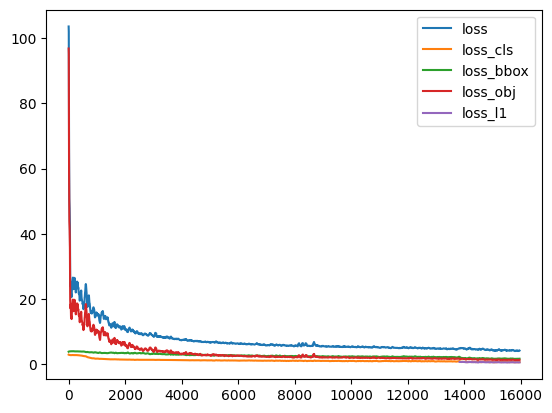

In [22]:
plot_loss_graph(train_log_ds)

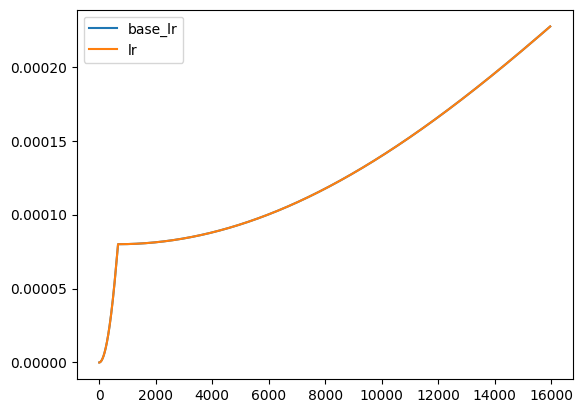

In [37]:
plot_lr_graph(train_log_ds)

# Validation log

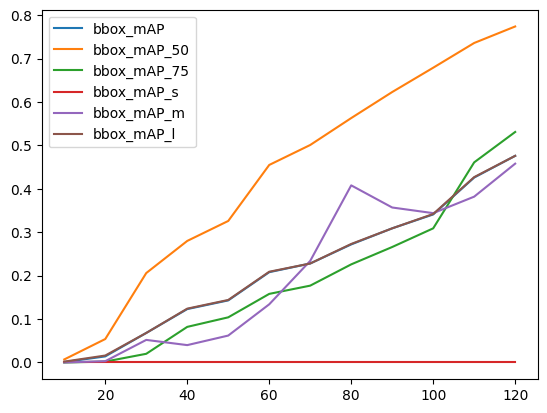

In [26]:
def plot_acc_graph(df):
    """
    Plots the accuracy graph using the given dataframe.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the accuracy values.

    Returns:
    None
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    plt.plot(df["step"], df["coco/bbox_mAP"], label="bbox_mAP")
    plt.plot(df["step"], df["coco/bbox_mAP_50"], label="bbox_mAP_50")
    plt.plot(df["step"], df["coco/bbox_mAP_75"], label="bbox_mAP_75")
    plt.plot(df["step"], df["coco/bbox_mAP_s"], label="bbox_mAP_s")
    plt.plot(df["step"], df["coco/bbox_mAP_m"], label="bbox_mAP_m")
    plt.plot(df["step"], df["coco/bbox_mAP_l"], label="bbox_mAP_l")

    plt.legend()
    plt.show()
    
plot_acc_graph(valid_log_ds)

In [38]:
valid_log_ds

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,data_time,time,step
0,0.001,0.007,0.000,0.0,0.000,0.002,0.017812,0.191238,10
1,0.014,0.054,0.002,0.0,0.003,0.016,0.006650,0.149443,20
2,0.068,0.206,0.020,0.0,0.052,0.068,0.006560,0.140578,30
3,0.123,0.280,0.082,0.0,0.040,0.124,0.006438,0.138406,40
4,0.143,0.326,0.104,0.0,0.062,0.144,0.006446,0.137231,50
5,0.208,0.455,0.158,0.0,0.134,0.209,0.006157,0.138164,60
6,0.228,0.501,0.177,0.0,0.234,0.228,0.006345,0.136905,70
7,0.272,0.563,0.226,0.0,0.408,0.273,0.006536,0.135785,80
8,0.309,0.623,0.266,0.0,0.357,0.309,0.006678,0.135253,90
9,0.341,0.679,0.309,0.0,0.344,0.342,0.006381,0.135074,100


In [40]:
test_log_ds.iloc[0]


coco/bbox_mAP       0.467000
coco/bbox_mAP_50    0.770000
coco/bbox_mAP_75    0.520000
coco/bbox_mAP_s     0.000000
coco/bbox_mAP_m     0.418000
coco/bbox_mAP_l     0.468000
data_time           0.010032
time                0.140799
Name: 0, dtype: float64